# Crime analysis and clustering using geoanalytics and pyspark.ml

* [Introduction](#Introduction)
* [Necessary Imports](#Necessary-Imports)
* [Connect to your ArcGIS Enterprise Organization](#Connect-to-your-ArcGIS-Enterprise-Organization)
* [Ensure your GIS supports GeoAnalytics](#Ensure-your-GIS-supports-GeoAnalytics)
* [Prepare the data](#Prepare-the-data)
    * [Register a big data file share](#Register-a-big-data-file-share)
* [Get data for analysis](#Get-data-for-analysis)
* [Describe data](#Describe-data)
* [Analyze patterns](#Analyze-patterns)
    * [Aggregate points](#Aggregate-points)
    * [Calculate density](#Calculate-density)
    * [Find hot spots](#Find-hot-spots)
* [Use Spark Dataframe and Run Python Script](#Use-Spark-Dataframe-and-Run-Python-Script)
    * [Location of crime](#Location-of-crime)
    * [Type of crime](#Type-of-crime)
    * [Location of theft](#Location-of-theft)
    * [Count of crime incidents by block group](#Count-of-crime-incidents-by-block-group)
    * [Get crime types for a particular block group](#Get-crime-types-for-a-particular-block-group)
    * [Crime distribution by the hour](#Crime-distribution-by-the-hour)
    * [Big data machine learning using pyspark.ml](#Big-data-machine-learning-using-pyspark.ml)
        * [Find the optimal number of clusters](#Find-the-optimal-number-of-clusters)
        * [K-Means clustering](#K-Means-Clustering)
* [Conclusion](#Conclusion)

## Introduction

Many of the poorest neighborhoods in the City of Chicago face violent crimes. With rapid increase in crime, amount of crime data is also increasing. Thus, there is a strong need to identify crime patterns in order to reduce its occurrence. Data mining using some of the most powerful tools available in ArcGIS API for Python is an effective way to analyze and detect patterns in data. Through this sample, we will demonstrate the utility of a number of geoanalytics tools including ``find_hot_spots``, ``aggregate_points`` and ``calculate_density`` to visually understand geographical patterns. 


<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABL4AAAIlCAYAAADbkzG2AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAJPuSURBVHhe7f2Luz1Hfd6Jnv8IG+PEWDcEwhlPzoznCA2+4OgCFoTACGTGTuxwnMmBZHBmYiEbjRASYARGEijiNhiMMXEQFhdhzMgcmQgrBqIIjwBziYJRMO7Z79J++X1V+vZavfbqXl3V/fk8z/usvaqqq3ut/lZX1du1ev+/OgAAAAAAAAAAgAWC8QUAAAAAAAAAAIsE4wsAAAAAAAAAABYJxhcAAAAAAAAAACwSjC8AAAAAAAAAAFgkGF8AAAAAAAAAALBIML4AAAAAAAAAAGCRYHwBAAAAAAAAAMAiwfgCAAAAAAAAAIBFgvEFAAAAAAAAAACLpDnj6/P/4ZHu+rf9UXfFP72zO//y13dPufQ6hBBCCCGEEEIInUpzZc2Zb7z945s5NMCaacr4esM7P9X98GWv7S564Tu7C/7h+7pnXvOR7pJf/BhCCCGEEEIIIYROpbmy5sxPf/4dmzm05tIAa6UZ4+vKV97ZnXflb3cX/08fThs2QgghhBBCCCGEnijNoZ9++W9v5tQAa6QJ40vu9EUvuDVtxAghhBBCCCGEENoumV+s/II1Ur3xpd8ja2kmK70QQgghhBBCCKGzSXPqH77sep75BaujeuNLD7LXM72yhosQQgghhBBCCKFh0jO/NMcGWBPVG1/P+yfv2DyUL2u0CCGEEEIIIYQQGibNrX/ml99xOtsGWAfVG1/6N6z890aEEEIIIYQQQugwaW6tOTbAmqje+HrKpdelDRYhhBBCCCGEEEL7SXNsgDWB8YUQQgghhBBCCK1EGF+wNjC+EEIIIYQQQgihlQjjC9YGxhdCCCGEEEIIIbQSYXzB2sD4QgghhBBCCCGEViKML1gbGF8IIYQQQgghhNBKhPEFawPjCyGE0CJ0w7se7K593X1p3lR66Kvf2fRVWV5tevfdD3ffevR7m+P97mPf7976oS9v0l996+c3imU//OlHNuX0GtOPKR2jlOW1oue96t5NXOo1y0cIIYTmEMYXrA2ML4QQQtVJhkeJ0h58+NGNkVCWt1FzbKOkFeNL35nQ93PP577efeaBb2yMMBleJppfKiP0Gus5pkyW14oUr0KvWT5CCCE0hzC+YG1gfCGEEKpORsaS5dVKwquVLL0Xj3zzsSekT60xjK9jrK6S0SVkdsV0rZCTGSbF1XIYX+PI37teY3oNK+oQQgitVxhfsDYwvhBCCFUnU6bf/8Vvb9JlgpV5c2gM4+sYJpOPM1stlwnja1rV8P0ihBBarzC+YG1gfCGEEKpOpkzXs5JMmTeHML6mk8nyWlcN3y9CCKH1CuML1gbGF0IIoepkyvQ+48vPqsqepaSfQeonkH2U5TOVdWjlmX4a2Gd8KU9l4s8zy+eT+blbGdEQGVJXn2ywlMRnofmnjtl2mTGj71r71zZCrzq+fR7grnrj59F3W/581ZTl9dr3E0F9J9mxxZ9xWsrT+dNx+zyq7lj20M9a/qRx6DmX9H34uISOre98COXp2HW8Rn/72W3+LGbfc4YQQmg5wviCtYHxhRBCqDqZMt1GgibtMd2GgoyCmC4zQNg00LOWbGLIBMiMhFJ6LpaRQWMzQvXYjInldSzKs0mifejV2LCSSaE816dXvZdcZmhdfVK+tvFxuo5oHJm4ncoIvcZ0P0stHo/NFKUNMVL83Kv4ef13LGdsOOo1mo+l+eXY0GfVPlyvyI5NxDpVVuX8nY7xWbWN8Gcbcs4lf0fxs8TjdDlJ2wkdm45L+LMIvfq70d8xT3XGuhBCCK1DGF+wNjC+EEIIVSdjU0Cy6aCJe2k6ePJfmgKa4EuxfDQKYtlM2s4mQXwwvAyMaMLEbVROdZfH2Gfa6bMJvcZ0ad+6+qTvRURzxTIxLTsmfxeSVxFZ+xyPkKGT5UUZ7S8edzS4YnmbUzFNctyUD/Y32ecZ67P2ndu+dMnxqfgqz3v2WVxeaBuvWNO2NjxFjCOV0WcT5edDCCG0fGF8wdrA+EIIIVSdtqHJfGliePIfjS+nZQaF0MS/TC+l/QiZBmVeNBbKvEzZMUrbTJA+9dXVpzGML38XWoEUy1piyHfqcqWpU8pkxoxNmzI9U9/3a7LvZKzP2rfvvnRJ8SrKn35KPu8xHp2mWCy/U+8ni1/vR0ZemYcQQmjZwviCtYHxhRBCqDqZmKZJvQwJmx7RGMiMIKcdYnxtMygkG0pZnlbV6Hi1rWSj4SzG19C6+jSG8eWf36kuH0eUifVkcj36/rWdVyiVMlmeP0+2rYwymTk+LpfV37GciWnWWJ/VZfU6JF3ySkKdY+VHZec9i/0yL9uP0vryEEIILVsYX7A2ML4QQghVJ5PleTVO/KlbNvmXUSZzpVwJ47LZKphSNkD6zAGbKjFN+7JBkVEaFNsMiH3r6pOP8xDjy3VsY4iZKMmY8mo5oc8Yz5FkYpqVfR4ZXtuOsfx+TUyzxvqsfee2L10aQrbiS8cc64l52X62HQNCCKFlC+ML1gbGF0IIoepksjyt8jFO65v82zSSyaIJvowsGRbSkGcb7TIHbJDENJtlMifiPvqOcds+9q2rTz5ObVfmmZiWHdMuE/Asiv+5sHzQuolpVvZ5vFJKxxdXgmWfRTIxzRrrs/btuy9d8ufIzlWmbbHgvGw/244BIYTQsoXxBWsD4wshhFB1MlmeJ/NxxU02+XeaTCObCaI0kbbJDzKPK2wsrVDyqqWYruMS5QqmPoNimwGxb119yowiy8S07Jj8XcgUimXHkL/HeF5MLGeVn0fbidI8k/q+XxPTrLE+a9+++9IlxZrInvGVaVssOC/bz7ZjQAghtGxhfMHawPhCCCFUnUyZLgPIJpZWczk9m/zbvNCr0/ZVXF0WjQgZLdFMi9vYxClNJq8+Kw0KH2f8PNa+dfWpNIqiTEzLTBF/F32r5ZSf1T9E/pzR4DOxnFV+nnhssY4YL6XBY2KaNdZn7TOXtp1z/5RXx10anpL2q/3H9yKLBeeV+5f6jg0hhNDyhfEFawPjCyGEUHUymsxHmdIUyCb/yo/bGJkZSh9qiPlnb0L7tZEis8aGTSxvQ0H70bZ6r3J6L+IxSjZZhOu3GbFvXX3y95CZNSameb8+DsumjJBpo3zJ30lZvpT2r+PXqiZv6++wNIFMTLOyz+M01ad69X3pe/J3VR6biWlRh35WSWWystvOuWRjM553vfq7ip87i/0yLzvWvmNDCCG0fGF8wdrA+EIIIVSdbFaU2CAoV8L4p27xJ4lKs/GhbSyZCjYQZCbEevqk7byN6lMdOgb/LG1XeZXz8WQGhUwWl9drXF22b12ZfJzZ6iXVI8W0bavlZKaoPm1jdBxDjEQZPiobty1NHys7Lkt1iPh5dD50Xly3vjO97zN/ttVvHfJZpW3f47Zz7nx/TqFj0LGU5fQdCOXFdGmb8bXt2BBCCC1bGF+wNjC+EEIILVI2ezT5L/NkkpgyDyGEEEJoycL4grWB8YUQQmiR8mqZcnWY5FUyWmlT5iGEEEIILVkYX7A2ML4QQggtUvp5l9BPxPSTN72XvBJMDP3PeQghhBBCSxHGF6wNjC+EEEKLVfmcJOFnP2XPu0IIIYQQWrowvmBtYHwhhBBCCCGEEEIrEcYXrA2ML4QQQgghhBBCaCXC+IK1gfGFEEIIIYQQQgitRBhfsDYwvhBCCCGEEEIIoZUI4wvWRvXG1/mXv7575jUfSRssQgghhBBCCCGEhklz6/N+/sbT2TbAOqje+HreP3lHd8E/fF/aaBFCCCGEEEIIITRMmltrjg2wJqo3vq5/2x91T3/+HWmjRQghhBBCCCGE0DBpbv2/vfnu09k2wDqo3vj6/H94pPvhy67vLv6fPpw2XIQQQgghhBBCCG2X5tSaW2uODbAmqje+xBve+anuvCt/O228CCGEEEIIIYQQ2q6nX/7b3W+9/eOns2yA9dCE8SWufOWdG/OLlV8IIYQQQgghhNAwaQ4t0+vn/jHP9oJ10ozxJbTyS0sz9btkPZSP//aIEEIIIYQQQgg9UZora8580QvfuZlDs9IL1kxTxpfQ75FvvP3j3c/88js2/4b1KZdeh9DRpc4kS0cIIYQQQmiodEM/S0foUJ1/+es3c2b9szie6QVrpznjC6AGZHwBAAAAABwCY0oAgOnB+AI4AwxSAAAAAOBQGFMCAEwPxhfAGWCQAgAAAACHwpgSAGB6ML4AzgCDFAAAAAA4FMaUAADTg/EFcAYYpAAAAADAoTCmBACYHowvgDPAIAUAAAAADoUxJQDA9GB8AZwBBinr4dbf+/LpXwAAAADjwpgSAGB6ML4AzgCDlPXw7FdwrgEAAGAaGFMCAEwPxhfAGWCQsh4wvgAAAGAqGFMCAEwPxlfgLx76q+6Xf+N3u5944Zu6H3rOa7unXHodQqk0SMnS0TKla8Iv/qv3d3/xn/7q9GoBAAAAcDgYXwAA04PxdcqdH7qv++HLXttd/OK7ume89EObTgghhCRdE378BXd2T73s+s21AgAA4KxwoxVFaYyRpaP1iRutANOB8XWCBiCa0F7wovemk16EEJJ0jZBBrmsGAADAvnCjFSHUJ260AkwHxtcJctY1AMkuQAghFKUBia4ZAAAA+8CNVoTQEHGjFWB8ML5O0LJS7rohhIZoc624+o2nVw8AAIBhcKMVITRU3GgFGBeMrxP0fIXsgoMQQpn0HAYAAIB94EYrQmiouNEKMC4YXydoEptdcNDy9d3Hvr9RlodQnzC+AABgX7jRihDaR4w3AcYD4+sEjK86JUNKPPTV76T5Y8hkeQj1iYEIAADsC+PNdenBhx/dnPdX3/r5NP8Q3fCuBzd13/O5r6f5c+kzD3zjB+P3bz36ve7a192XlkPDxHgTYDwwvk5gIFKf3vqhL5+enceZYtAgmSwPoT4xEAEAgH2pZbxpQ0YGxfNedW9aBh0u3bgVMqmy/ENUo/GlYxGPfPOxzd/3f/Hbk43f1yLGmwDjgfF1AsZXfVJnKXTnyK9ZuUNlsjyE+sRABAAA9qWG8aaMrsiHP/1IWg4drhaMrzEf+SHDS7DKazwx3gQYD4yvEzC+6pIHZepA1XkKLZfOyh4qk+Uh1CcGIgAAsC81jDfffffDm2PxjUWNtbJy6HC1YHyZLG9fmSwPnU2MNwHGA+PrBIyvuuRBme9C+g6Sfv5YlpW0jNrL9oXuXOl9VraUKdM1oFAdfk6BXrUKLd7F2jWgcX7cxsda1pv91EB5qkN5rovnJdQhBiIAALAvNYw3PabS2EJjCsG4YhphfKFDxXgTYDwwvk7A+KpL5VJpG2EyiMqyKiODSNLdSz9TYOgKMRPTZLgJ1eE6PXjRfmxSuVzfcYl4HH5umc0u1bvtORtC34W/Dx2Dyk0xgEL7iYEIAADsy9zjTY9NfHNwyOMkNFaxQSY0Jum7ERnlm3z6W+U9lhEaA0WzTfsQenValPM1Hoxp245LNxqFxmoaX2mfOh6h7WJdUUNufFrK23aDMjO+VNbfxZCfmfYd+zbjS/net9A2KhfHmTG/ZKy6HGfSru9Kr/qcSjPaPhvzKl3ob32H3sbH5nIxRvS6LW5VNsbo0DifWow3AcYD4+sEjK96pI5PqMNxmjpJEztaSR2V6BvA7JKJaep4Y8dpuaP1vnys6szL4/Jg0oMa5aucVD7os89AM9k2aF4xEAEAgH2Ze7zpsUk5jpEpUJaVXF5GhcZFkv/OykfZ3NDYRmgfStOYxu89drJJ1XccShc2SYYcl42haGKpTDQ3SuPJ4zHtT/twvUJ1lGM9ofpcpz+fzRpv6/fa3mXLMV+mWF71qj5/F04vz4XHqsr3d+NttL3LKQaUZ1xWGquuaBwJ1ePjjt+VpL8lj8EdN8Lfn+XvNcaW6xU6d34f9ykyMyuW1b61vT+n3pfljynGmwDjgfF1AsZXPVIHI0ojqzSdLJc/a8dksrxS2b76jssdpgdpyhfqTGM5S6jDL9NE2eGj+cVABAAA9mXu8abHJtHA8aQ/MwSEtinTh8jmhIgGUzRz4njKx1aOeXRcQuMtp4ldx6V6jPbn8ZjkMZnGXfG7sOni91bfWM+onuwGpb8DfybXM8T0kjzu1PHH47RBJ8rjVdnyXGrbclxqmZhmjVmXyb4rfa/6buJnlPpuDPfFVvxetJ947DZLYxxJ/o7LfWz7nMcU402A8cD4OgHjqx65kyk7Pw9S1NnFdHVG6tyclw3ctslkeeqY1YmqU5Tc0cZBRjYg853LeKzucJXm+qKMy0smpqE6xEAEAAD2Zc7xpo2gcoLfZy5IojSHhspjptIskjx2krHitL7j0HsR6xG7jsuft88g077FkHGjx2l6jemmNOssfwfK9+fIvuc+eUycmWr+vspj6lM8lphuYtounaUu0/ddZVJZof3FdO9f30FMl0z5nWm+IBQ3Mb1v3iH5vGf7OZYYbwKMB8bXCRhfdcgdnDohdTZRNo5EeedF730XTWj7oQaYiWnqLN2pZuh4Ynkbbz4uH2scpG2rz5SdsYlpqA4xEAEAgH2Zc7xp46UcH0VDoJz8ezyjPI19yvHXNvWZI5L3KZymfYtyLKT35bENOa4+08Ty91GO6aQhNz4lE9OivJ1NtnK10S6ZLM+fLzt+5/v4JRs85fkwMa3UGHWZLM/SedTY2fvxOSrP4bbYcl6ZLhm/d8yJ+PmsvvN+TDHeBBgPjK8TML7qkDu4XfR1QOowlaeBkBhifpmY5gGK6oqDKb13eizvAZjvCGlA0DdI6zv2TCbLQ/OKgQgAAOzLXONNjUc8NtI4pJTzstVZGtvY6BAaq8XxTZ+2mROSiWm+ienj8Mow7TOWk3Ydl/YrStPE0ucWenXavjc+TUyLcl3RqMtMukzRlMny/fnKY9J3Fr+Xkn3MqjHrMlmePuu2OUB5DrfFlvPKdMn4vb/DXbDiC2AZYHydgPFVhzzw6htQeQCkTjjLtzRgEkPurBm/16BHxOX3VjZIkuI27kTLQZo6TaHBT0zfJpPloXnFQAQAAPZlrvGmx0W7KA2GKI3BbCpkY6RS28wJmT8mpnuc5/GbzZCsDqvvuDwe6/tMrjuO6fa98WliWlT8Dmx+aR9DjEPJZHn+fPGYdMwaS0s653E/fefDxDRpzLp25fm70XnXmNrpfeewb/8xr0yXjN/rM5lYriYx3gQYD4yvEzC+5tdQs8rmWOwYS7muISaT8XsPxrSf2Mnr7zggcrrlPL9qIBbzY73ZsSt/nwEEmlcMRAAAYF/mGm96JVU5NrGiAaDxSFbG8gqgbeMwyQZEtk+P00pDQ/I4z8bLrpudVnlcNk00LivLSi7vsZe2E1n5MYyv+L68OdqnbWNe31CNx7TtJmt5LJaJadKYde3K8+eM427J57CMk779x7wyXTIxrW/ftYjxJsB4YHydgPE1vzwo02Aoy7d8h86DBnVwkjpmdf7OV0e2a1AmmZjmTlODItWpulWfO8dy4CN5gCD6Bmke6Akdp+qR+gw1E9NQHWIgAgAA+zLHeDPeeMvyLY/DNJ7J8i0bRruMAo+ltN84ttPxuI5szKcxl/DYKDNeMpXHZdNE6Fji8Wq8JeJ4LX5Psaz+Pus4zd+BDRrV5bHkrvGu5DFt3/GLeEweZ6q80ySNh73f0ixyeml4nqUuE9OG5PnclfXFzx/Ty+81yyvTJRPTvA+9xnRryHmaUow3AcYD4+sEjK/5JcrBRibfkVNZvVeH7wGJUHq5VHqbVN51WToGdYBKF+qQ9V4drCgHPt7G5bcN0lSHjs9lhTrpbKCZHRuqQwxEAABgX+YYb/rGXN/E3rLRYTNI4xX9rTGLxj2SDYpddUk2IDxG07ZOE0rPtvM4z5SGzNDj8phNeR5zaf8uK8rVaD4+lVG9u258mpgW5fp0LE6Ln2/XWFWf3fvWq+qLn0XEY4pjUeUrT9+JcHo8Finmu/6z1mVi2pA81S1Ur75zvS/PWyzvz17uP+aV6ZKJafqcMUa1b39W7z+WP7YYbwKMB8bXCRhfaAx5MFUO0tDyxEAEAAD2ZY7x5jaToJQn+jJkNJbRtk4TMghkCmTblor7tZEhbC7IcMi2k7xtZo4NPS7tV6isPo9XtAn9nX0fOqZoeOhY9d51lftQOSmmRXmfpcFlk7HP/Isqj13byLBTuiiPKSuvMjZAy8+tz1x+N2eta9v3seu7Ur2OEZXTfrV//a1zGMv6mJQf0yXHTpku9R2DvgPtX5/P+Nxn+zimGG8CjAfG1wkYX+hQaRAiys4ZLVMMRAAAYF/WNN60AZEZTLvklUWH/MzMZhXjMtSyGG8CjAfG1wkYX+hQeYA397MA0HHEQAQAAPYF42u3tPpGaGXOtlVhu4TxhZYgxpsA44HxdcJ/86I3dc946YfSCw5CuzTWIA21IV0rfuKFb9qccwAAgKFgfO2WfnImtOoryx8qjC+0BGF8AYwHxtcJv/wbv9v9+AvuTC84CCEUpWvFNf/r+06vHgAAAMNY043Wbc9h2iY/Z2lfw6yU9iviM6sQakncaAUYF4yvE/7iP/1V98OXvba74EXvTS88CCEk6Rqha4WuGQAAAPvAjVaE0FBxoxVgXDC+TrnzQ/dtJrS6yPCzR4RQlK4JujboGvG2//Ozp1cNAACA4XCjFSE0RNxoBRgfjK/AXzz0Vxtn/ZKr37j5TfWxpAtclo7QGlVje9A1QdcGBiAAAHAI3GhFCPWJG60A04HxVQHPfsXHTv8CANoDAAAsmblutKI69fTn35Gmo/WJG60A04HxVQFM9AHOQXsAAACAtcC4BwBgejC+KoAOD+ActAcAAABYC4x7AACmB+OrAujwAM5BewAAAIC1wLgHAGB6ML4qgA4P4By0BwAAAFgLjHsAAKYH46sC6PAAzkF7AAAAgLXAuAcAYHowviqADg/gHLQHAAAAWAuMewAApgfjqwLo8ADOQXsAAACAtcC4BwBgejC+KoAOD+ActAcAAABYC4x7AACmB+OrAujwAM5BewAAAIC1wLgHAGB6ML4qgA4P4By0BwAAAFgLjHsAAKYH46sC6PAAzkF7AAAAgLXAuAcAYHowviqADg/gHLQHAAAAWAuMewAApgfjqwLo8ADOQXsAAACAtcC4BwBgejC+KoAOD+ActAcAAABYC4x7AACmB+OrAujwAM5BewAAAIC1wLgHAGB6ML4qgA4P4By0BwAAAFgLjHsAAKYH46sC6PAAzkF7AAAAgLXAuAcAYHowviqADg/gHLQHAAAAWAuMewAApgfjqwLo8ADOQXsAAACAtcC4BwBgejC+KoAOD+ActAcAAABYC4x7AACmB+OrAujwAM5BewAAAIC1wLgHAGB6ML4qgA4P4By0BwAAAFgLjHsAAKYH46sC6PAAzkF7AAAAgLXAuAcAYHpmM77e+Xv3dS97ze92P/nit3Q/9JzXdk+59Dq0Yv39f/SWTTwoLmDdMAAEAACAtcC4BwBgeo5ufH3qT7/c/eSLf7v7u897fXfe1Xd1F73kg90l197dXfKLH0N76trX3dfd8K4Hn5D26ls/v/meH3z40SekV62T8684UDz86M/euIkPxQmsEwaAAAAAsBYY9wAATM9Rja/r3/ZH3d/52Ru6C170ntwAmUA2gkq++9j3u4e++p3u3Xc/nG7XgvQZxIc//cgP0mSECX22WLYlKT6e9tOv6268/eObz7IGWAF5ToqBLH1NYgUkAADAOsD4AgCYnqMZX1rBI9PrGS/9/ScZHVPKRpCNLsumkfjWo9/bGGTZ9jXrkW8+tjn+t37oyz9IW4LxJSlOZH4tfeUXKyAPl9ruoe1X1wMpyzu6WAEJAAALhxt+5/T0q+5I09ckbvgBwNQczfj6ey9681FXelnbjCDl2TzSpFc/HSzLtKalGF+S4kWT/qUyxwrIfSRDVXFkZBDf87mvd8971b1p+TkUV3QeYn6ZLG9urXEFJAAALBNu+D0u/VpDxF9trFbc8AOAI3AU40vu/d/9udfnF7uJtcsI0iTe5tf9X/x2WqYlLcn4kn7kp29c5N0fdehzrIAcKhlcRu1D8eRVksd+fty2waHMaq/WOsS4NlleDVrLCkgAAFgutd/w65Mei6Kxj8dBQjcDNW8469jD4yy9ZvlrFjf8AGAKjmJ8veJ//8DGxc8ublNriBHkMiJbzaJOyeaY0N/x54VlWXWGpq+sOtGyzvJ5Y+pgddw6Jr0K1e1OVp2wiCtd4ufVduqU3VFvO25pn895LClutPR5acy1AnKIFDemXEUl8+nYxtcxBocmy6tFipclr4AEAIDlUvsNv0xx/C00Btf7mCb6nhfsG3NZ3jHGNi2LG34AMDZHMb70+/3NUubkwja1hq6Aslml8jHdRpBe1Tl95oFv/KBs2VkpT2hfypP8dywnM8qUHWjcv9B+fQwqpw7UZbxd3MafV8dow0vlXIfIVs7s8zmPKcWN4mdJzLkCcogcQ4qbLP/YUvyJKePQZHk1aakrIAEAYNnUfMOvT77BrPFwHGtLMsU8PhFlvmTKdOkYY5vWxQ0/ABiToxhfemjlXL/fHzqJt4kUTSF3SuVPINXZ2RSKS5yF0mPZUlpBJWRKxdU0qlNmU0wzZVlrm/ElZGLF49MdKaH6tD+n7/s5j6qTuNFDL5fEnCsgh8gxVMZJn7z8X38rvqPJ2vczAKUpz/ElVE9fLJfEgaL27f1HaXsfm9Br3/GYMr02LXUFJAAALJfab/hlimOhbWNg3/TW2KfMM2W6hPE1TNzwA4CxOIrxJeMiu5gdQ+64hhpfsQPypDyb/LvDikaZUAe5zSzw3aO+ZdFRJpoBUduMrz4Dzp8p/oRx3895bC3N+JpzBeRQOSZK8zST41CmktC2SrPhpPcxthSjyrMRpRjztsLxrP0qz/XrVe+lGPPG7yXFq9C+NSiN9WRt1MS0GrXEFZAAALBsar/hl8njdY0hsnxLYxXj8ZLHGxneTuMSoVfd3Pb+hP7uG3u5rMdYHktlY3jl6ViU52PSuGjXuK4mccMPAMYC4+tU7hBsSKmTMJ5sR7m8/nYdvuujjkbpWcdiQyFbwVXKZHmSjyGaALs+rw0GH/dZPuextTTja84VkEOl+PSgSihuYpxFOUZENEgVW179FeNHbUyDtnKQZrNK+4rp2lb0xaCJaaojK++BZWk8m5hWpRa4AhIAAJZNCzf8SnkM1Df2ifJYxzeVNcbw2EXob8vbON/b2qTyfsubhlL81YjHOR7XKK0sL1S/9+H6h3ymWsQNPwAYC4yvU9mQcmfg7XZRroTSe9cl1DHFjsjEbfpksjzJhkPswHZ9Xne07nzP+jmPqaVN9OdsD/tIcav4jSiuyoGV4zBbxehBmgZdZV6pvtgtY7aUyfJK9dVlYlqtwvgCAICWaOGGXylTjnkyeRy0z9jC4xER5wp69TwijquULtNKKm+e9904NNk2zYgbfgAwEhhfJ3IZdQxOUwdjYtmh0oTfHWGc9GsfYsgyY5PlSa5fx++0XZ/XRoY750M/5zGE8TWvFCOKF8eu4llpzs/i0FKcmyzPd0Ulx2YZux4cOmZLmSxPAz0NCL0PH2tZl4lptYoBIAAAtERr4x7JZHmlzjK2UFmhFVtlno2sWJ/GS6Lvp5cizmOcJrLxWUti3AMAY4DxdSJ3WOWdEk/04yR/X5U/bfS+stUxpUyWJ7muzPjqW2FTrmyTxvicU2ppHV6LA0Ap/vwxrgDM4jDK+L3izCZXRtlWPTgsB5SWiWk6Vh9Xxj6D09rEABAAAFqixXGPyfJKebyxz9hi29jGY/k4L/HjVLQvbVPKxHpMTGtRjHsAYAxWbXzFybEm9KXx48l5aYhZQ8wrG02u23dslB5XfSlfHZcNMsn4fSkfezQc/HmF8uNncseofTtNGuNzTqmldXgtDgAtx1C8Q5nFoZWt+PLgTXXEeO9rq96nXmO6ZWKan2ehbWI766vLxLRaxQAQAABaosVxj8nGNqWym8qSiWnWtrFNNh7yWGsbfSu+YlqLYtwDAGOwGuNLnYE6DcudlNAkOU7ALZlGnkCrvDonSQaRV764rPajMprMu5z3URpKrlP4eEzsNE3cNsrbxW38ebUPH2P5eeN/dJT2+ZxzaGkdXosDQMumVVxq7zgs40qy0asyTnNMRVNWcuzGspJiUeg1plvG79WWhWI6lpP66jIxrVYxAAQAgJZocdzjsc2uZ9zGG3zluMbENGvb2CYbD3n81TcWymSyvJbEuAcAxmDxxpcnwSU2qXatZlInpk4mmlXaVqZQNMvU8amD8qReaJusg3Kd0YzStuWxqC4ppkXp+EU8Dn9eddT622WE/o4mWdTQzzmHltbh1T4AVJzovMeVUpJix/Ed48iDQ+XFGNb2jvGY7rQyFrVPEQd6kp91ofyYbhm/9yBUxxMHofrb8V22SxPTahUDQAAAaInaxz2ZPPbQmCWOJUp5nJ2NUUyZLmkcIrJ5QmZ8+XjijcddMlleS2LcAwBjsHjjC7WvpXV4tbcHG1BCRpEGXtEQLQd3Nr5cRoNEpwmlx/Ie7MmY0gBO77WNTbXS+Ip3U1WXFAeKJm7j/ateldV+VL/3UQ40TUyrVQwAAQCgJVqcB8js8o06jTvKm4HK93hJY4syX/KYI8vzWKgcj0iZ8RVv6mU3pJVf3lA0Ma1FMe4BgDHA+ELVa2kdXgvtQSu0onkldFcz+zmjy2nApQGcB4o2nbI7pbGcBnGqWwM5/V0aX5KOJ9Ybj0PbSLG8B6RK9zZ678FkOdDM6qhVDAABAKAlWp0HaFzisYeQAaYxShwfaezQ98uIaIxpmzjO0DhElOMRKTO+JI2FjOrWtpKOS5R1mZjWohj3AMAYYHyh6rW0Dm9p7cEDwPJOI5pGDAABAKAlWh736EaafmYYzS7h1efZzT1Lef4ppNDfzvNPF/Uat5FsfMXyMU/pMtGMji2rR2Wi2daqGPcAwBhgfKHqtbQOb2ntAePruGIACAAALcE8AB0ixj0AMAYYX6h6La3DW1p7wPg6rhgAAgBASzAPQIeIcQ8AjAHGF6peS+vwltYevIx/7v/+uRYxAAQAgJZgHoAOEeMeABgDjC9UvZbW4dEe0CFiAAgAAC3BuAcdIsY9ADAGGF+oei2tw6M9oEPEABAAAFqCcQ86RIx7AGAMML5Q9Vpah0d7QIeIASAAALQE4x50iBj3AMAYYHyh6rW0Do/2gA4RA0AAAGgJxj3oEDHuAYAxwPhC1WtpHR7tAR0iBoAAANASjHvQIWLcAwBjgPGFqtfSOjzaAzpEDAABAKAlGPegQ8S4BwDGAOMLVa+ldXi0B3SIGAACAEBLMO5Bh4hxDwCMAcbXyLrhXQ9uPvM9n/t6mo/219I6PAaA6BAxAAQAgJZg3IMOEeMeABgDjK+RhfE1vpbW4TEARIeIASAAALQE4x50iBj3AMAYYHyNrDGMr1ff+vlNHQ8+/GiavzYtrcNjAIgOEQNAAABoCcY96BAx7gGAMcD4GlljGF+u46GvfifNX5uW1uExAESHiAEgAAC0BOMedIgY9wDAGGB8jSyMr/G1tA5vDe3hw59+ZPNZ9ZrlazWj0OrGLB/1iwEgAAC0xJrmAWh8Me4BgDHA+Dqjnveqe7v7v/jt7ruPfX/zGb/16Pe6d9/9cK/xpfJKe+Sbj23yhf7WNrFcH9EEG1rXUrS0Dm8NA0DFp+gzgBXPQu0ly0f9YgAIAAAtsYZxDzf8phPjHgAYA4yvM0jGk00nGV+axMv4Ek6PE36Vd746PuV95oFv/MA0i2X1tww1oW30XrKptU9dS9HSOrw1DAAVh6IvHjG+zi4GgAAA0BKMexj3HCLGPQAwBhhfZ5A7N5lcMqKc7rs9InZ8177uvk3Z8i6PH2IvIyumb/up4751LUFL6/BqaA8ySv3PExSrNlOVrvcxri3FnkxZlxWqIw7iHLsZqtdtJ6McDKqsjWShv9/6oS8/oYzkdqftZRCXJrDbht77MxjVWe7XUvn4Wfv2f2wxAAQAgJZY2jwgk8c3HnuUwvg6uxj3AMAYYHydQZ4Ml+aT5El4X8dXysQ0mweZ8bVNJstrWUvr8GpoD0JGjo0lvXpQJmyKWYpJGUqSjCPFdzSQPJCTsaQ816VXvZdURtLfbkOuS9K23l88LuVpVaO30XuXk/Re+HhUzp9H+W5P+kw2xZQXTa2yLWt/Ih6//47l5hADQAAAaIkaxj0eA+hv3cTyOENo/BDHINZcN/z0t9Df3PBj3AMA44DxdQaZLM8doDufKK2iUQeiPMvEcq7DE/dMQ+tagpbW4dXQHowGS3EApMGSB1AxXQMrDfbKlWAefGlQFdMdj3qN6ZZiW2SDL29b1ql9e0AWB6gx9sttJLcnoUFc3FafSZTbCe0rptUiBoAAANASNYx7PO6wCaQ+Xmke8+h9HONo7KA8SdtorOFthccvGlMoz/XrVe8llZH0t8cvrkuK4xGNT4Re9Z4bfufEuAcAxuB4xte1d6cXs9akTtFk+e5ssk7KnU9GLOs63IGV2qeu5nUSN0vr8GoYAJo46LI8+NFrmVeqL1YVo6JvwKTyQtuXeR6YlSab5HpluJVpfe3Fx6h6yzp9V7TcVqiNZccwtxgAAgBAS9Qw7vG4Q8QxhPp5m05xzMINv3rEuAcAxuAoxtff/0dv6S56yQfTi1mLMlmeO5vY8WllllDnUy4ZNjHNdWQT+X3ral2Km5988VtOP9kyqMn4yvI02BNZ/GnwpHzFt+S7jWVZD8piO4jqGwBqkGe8jyhvp7+9jf4u06K2tSdJlIM9m38yv1RvZhDOJQaAAADQEjUZXxrDlHlxbF3mleobU+wai/SNeyRu+G0X4x4AGIOjGF8ve83vduddfVd6MWtRXm1VLhOWfCcodny+u1IaVZKJadsm6vvW1boUNy/5l//n6SdbBpsB4MwrIE2Wl8WfBkI2uTLKWD3rAND73kU2AOzb17b2JJkyXfvwYFTo888+IFzgCkgAAFg2NRlf5bhD0s0tk+Ud+4af0v23t4v16u8yLWrIuIcbfgCwNo5ifL3z9+7r/s7PvT69mLWo2OnFibA7IhE7I5cvOyivrBEx3Xdjyk5J2reu1vW0n7mxe+v7/uT0ky2DGlZAmizPsRQHTB4QyXiNhm/f4MptoYxTywO5bQPAmL5Nu/Y1ZAAosjxJJrOPd8jd4Cm1xBWQAACwbGq44dc37rCM3895w0/pJdzwAwA4jKMYX+InX/zb3QUvek9+UWtMugviVV96Vcfi9+7YYmcUOzV1IspzOW8X65fc8ehVZd15naWuVqV4efbVb9p8piVRwwpIkw1oMnPVsVWW7xtcaVsR64hyzGr7Mq9vX33ata+zDgBLuU1mKz2PpSWugAQAgGVTww2/beOObMUXN/weP15u+AHAUjia8fWpP/1y97Sffl33jJf+fnpha03qBP2zQ+Fnbnm1VtkZKU9ljDoUpbmOWFZSPS4vIyDWt29dLUpxonj5d5/+i81nWhI1rIA0MnOyAZ2Iy9xt+pQDNptk5eDKP/lVfky3HKvZszZcZ9+25TZTDwAtfwdz3v1c4gpIAABYNjXc8LORo/FymZetdOeGHzf8AGBZHM34Ejfe/vGNmbGUlV9oGik+FCfXv+2PTiNnecy9AtLYQNVrNFPL/+joQZYGZ8rTew2IPFgrB1fx7qnrjgO0+NNcbau6PBjUwM/HonRtJ8kI8/5cj+Rji/VH7TsAVHntV+ac9+3BX58ZdwwtdQUkAAAsmxpu+Nl40jgi3kDTeMV9fEx3WmlU+eZcOabght804oYfAIzFUY0voZVff+9Fb+5+9Gdv3Lj4m6XPM//uH82sk/OvOFA8/MhP37iJjyWu9IrMvQLSaDCjgZYNJRlO2aBMigaQymsQp7uA+jsbXKkel9dreZdVBlrcb1xhpuPS/myACdWhYy3vPHqwGZ9/EaXyQseb5Qsdh9/rOPR5fGyiNO6OrSWvgAQAgOUz9w0/G1/xxprThNJjeZtLGgsc+4af0rRtHJ+5HueJWH8UN/wAAJ7M0Y0vo7s/Wrr6Ey/67c1DC9G6pd/vayn8mu7qzLkC0mR5qC4pPpa+AhIAAJbN3Df8bHLJ5InGjl71PlvVFMvJgDrWDT+9F6qDG37c8AOAcZjN+AKA+VZAmiwPzawVroAEAIDlM+cNv2h8ZfmoHnHDDwCmAOMLoAKOvQLSZHlz6+nPvyNNX5PWuAISAACWz1w3/DC+KhY3/ADgCGB8AUBVPPsV51akAQAAwPI49g2/Lz38jc1+f/2N/zbNr0kyg7L0JYsbfgAwNRhfAFAVGF8AAACwVmR8AQDAuGB8AUBVYHwBAADAWsH4AgAYH4wvAKgKjC8AAABYKxhfAADjg/EFAFWB8QUAAABrBeMLAGB8ML4AoCowvgAAAGCtYHwBAIwPxhcAVAXGFwAAAKwVjC8AgPHB+AKAqsD4AgAAgLWC8QUAMD4YXwBQFRhfAAAAsFYwvgAAxgfjCwCqAuMLAAAA1grGFwDA+GB8AUBVYHwBAADAWsH4AgAYH4wvAKgKjC8AAABYKxhfAADjg/EFAFWB8QUAAABrBeMLAGB8ML4AoCowvgAAAGCtYHwBAIwPxhcAVAXGFwAAAKwVjC8AgPHB+AKAqsD4AgAAgLWC8QUAMD4YXwBQFRhfAAAAsFYwvgAAxgfjCwCqAuMLAAAA1grGFwDA+GB8AUBVYHwBAADAWsH4AgAYH4wvAKgKjC8AAABYKxhfAADjg/EFAFWB8QUAAABrBeMLAGB8ML4AoCowvgAAAGCtYHwBAIwPxhcAVAXGFwAAAKwVjC8AgPHB+AKAqsD4AgAAgLWC8QUAMD4YXwBQFRhfAAAAsFYwvgAAxgfjCwCqAuMLAAAA1grGFwDA+GB8AUBVYHwBAADAWsH4AgAYH4wvAKgKjC8AAABYKxhfAADjg/EFAFWB8QUAAABrBeMLAGB8ML4AoCowvgAAAGCtYHwBAIwPxhcAVAXGFwAAAKwVjC8AgPHB+AKAqsD4AgAAgLWC8QUAMD4YXwBQFRhfAAAAsFYwvgAAxgfjCwCqAuMLAAAA1grGFwDA+GB8AUBVYHwBAADAWsH4AgAYH4wvAKgKjC8AgOPxiv/jTzfXXYRQHZLxlaWj5emSX7w7TUfL0wt+/TPdWz74pdOeF+YA4wsAqkKdAwAAHAdWlyyXW3/vy6d/QUvQJtcDY951QdueF4wvGAwDKDgGv/uJvzz9CwAApoaB+HJhUt0mtMn1QBtdF7TtecH4gsGoseoCjRBCqF+X/donT6+aAPXDQHy56HoE7fHsV/zR6V+wdGij64L+dl4wvmAwXJzhGLCyEFrmK1//6+55r7739B1A/TAQXy6M29qE87YeONfrgv52XjC+YDBcnOEYEGfQMn/+0KPdi/71n5y+A6gfBuLLhf60TThv64FzvS7ob+cF4wsGw8UZjgFxBi2D8QWtwUB8udCftgnnbT1wrtcF/e28YHzBYLg4wzEgzqBlML6gNRiILxf60zbhvK0HzvW6oL+dF4wvGAwXZzgGxBm0zGe/8M3uFTf86ek7gPphIL5c6E/bhPO2HjjX64L+dl4wvmAwXJzhGBBn0DIYX9AaDMSXC/1pm3De1gPnel3Q384LxhcMhoszHAPiDFoG4wtag4H4cqE/bRPO23rgXK8L+tt5wfiCwXBxhmNAnEHLfOxPv9b9szf92ek7gPphIL5c6E/bhPO2HjjX64L+dl4wvmAwXJzhGBBn0DIYX9AaDMSXC/1pm3De1gPnel3Q384LxhcMhoszHAPiDFrmg5/6y+5f3fbA6TuA+mEgvlzoT9uE87YeONfrgv52XjC+YDBcnOEYEGfQMhhf0BoMxJcL/WmbcN7WA+d6XdDfzgvGFwyGizMcA+IMWgbjC1qDgfhyoT9tE87beuBcrwv623nB+ILBcHGGY0CcQctgfEFrMBBfLvSnbcJ5Ww+c63VBfzsvGF8wGC7OcAyIM2iZf/Pv/lP3f7z7P5y+A6gfBuLLhf60TThv64FzvS7ob+cF4wsGw8UZjgFxBi2D8QWtwUB8udCftgnnbT1wrtcF/e28YHzBYLg4wzEgzqBlML6gNRiILxf60zbhvK0HzvW6oL+dF4wvGAwXZzgGxBm0zFs++KWNAFqBgfhyoT9tE87beuBcrwv623nB+ILBcHGGY0CcQctgfEFrMBBfLvSnbcJ5Ww+c63VBfzsvGF8wGC7OcAyIM2gZjC9oDQbiy4X+tE04b+uBc70u6G/nBeMLBsPFGY4BcQYto+d76TlfAK3AQHy50J+2CedtPXCu1wX97bxgfMFguDjDMSDOoGUwvqA1GIgvF/rTNuG8rQfO9bqgv50XjC8YDBdnOAbEGbTMv7rtge6Dn/rL03cA9cNAfLnQn7YJ5209cK7XBf3tvGB8wWC4OMMxIM6gZTC+oDUYiC8X+tM24bytB871uqC/nReMLxgMF2c4BsQZtAzGF7QGA/HlQn/aJpy39cC5Xhf0t/OC8QWD4eIMx4A4g5b5Z2/6s+5jf/q103cA9cNAfLnQn7YJ5209cK7XBf3tvGB8wWC4OMMxIM6gZTC+oDUYiC8X+tM24bytB871uqC/nReMLxgMF2c4BsQZtAzGF7QGA/HlQn/aJpy39cC5Xhf0t/OC8QWD4eIMx4A4g5bB+ILWYCC+XOhP24Tzth441+uC/nZeML5gMFyc4RgQZ9Ayr7jhT7vPfuGbp+8A6oeB+HKhP20Tztt64FyvC/rbecH4gsFwcYZjQJxBy2B8QWswEF8u9KdtwnlbD5zrdUF/Oy8YXzAYLs5wDIgzaBmML2gNBuLLhf60TehD1gNtdF3Q384LxhcMhoszHAPiDFrmRf/6T7o/f+jR03cA9cNAfLkspT/9wpe+1t14xye6n/2l27tnvuDm7kee+5vdUy69DjWsp52cQ53L577i7d2b7rp3c47XCGPedUF/Oy8YXzAYLs5wDIgzaBmML2gNBuLLpfX+9N9/8avdS/7Fe7sLrnhDd8Ev3NZd+OL3dxdf8wfds6796CZuUbvSOdS51Dn9sSvfvjnHL3vN+zbnfE0w5l0Xin2YD4wvGAwXZzgGxBm0zPNefW/3la//9ek7gPphIL5cWu5Pb33vZ7of/enf6i7+h3c9wTBBy9WPv+Cdm3N++wc+exoFy2ftY977HvhKd92tH+suffnbuguvuKl76mXXpysEl6KnP/+ONH0p0vm76Mo3bM7nDbfdszm/NYHxBYPBkIBjQJxBy2B8QWtowgnLpNX+9DVv/MPuwitv6Z7x0t9/kjmCli2d8x//Bzd3v/GWj55Gw7JZ65j3j+9/qPv5X3lH94zn39JdePUd3XlX39VdfM1HukuuvTuNC9SITs6fzqPO59Ovur274Ipbuhf82p2b810DGF8wGAwJOAbEGbQMxhe0hgarsExa7E+10kum1zNf/odPnlShVUjn/vyTCfMdK1j5tcYx7w23fbz74cuu7571kvek5x8tS+df/a7N+b75zk+eRsB8YHzBYDAk4BgQZ9AyGF/QGhqYwjJprT/V851+9Gdex0ovtIkB/exx6c/8WtuY91ev/2B3yQtv7Z75so+k5x0tUzrfF1z15s35nxOMLxgMhgQcA+IMWuZ/+Kef6P7zd753+g6gfjQohWXSWn+qh5vzTC9k6Zlfiokls6Yxr1Z6yfTKzjVah2R+zbnyC+MLBoMhAceAOIOWwfhqn7U9bFf/WS1LX5Jqf+DuVLTUn37hS1/rLjw5R9lkCa1X511+0yY2lspaxrx6xpN+7sZKr3VL5/+HnvPa2Z75hfEFg8GQgGNAnC2LtZkIa9BSTQQetrtgVf7A3aloqT990133dhf8wm35+UOrlWLixjs+cRoly2MtY171rXrWU3aO0bqkOLjylXeeRsZxwfiCwWBIwDEgzpYBJsKCtUATgYftrk81PXB3KlrqT3/2l27vLnzx+9NzhdYrxcRzX/H20yhZHmsY8+rm2EVX3ZKeX7ROKR7muGm6aONLS2N1l0Cd6TNfcHP3I8/9zfTuNRomBWqWfiw97eT86TyqA9SdwSUvfTbE8PK0hjjGRFifZCKcf/lNTZoIPGx3varlgbtT0dKkWv2ifnabnSe0XikmLn7+zadRsjzWYHxp1f9FL3xHen7ROqWbpoqLY7NI40v/AeQl/+K93QVXvGGzRFZ3C3ThfNa1H02/fNSGdP50HnU+f+zKt2/Orx56ucT/+EIML1dLj2NMhPWqRROBh+0iae4H7k5FS5Nq3dhrdYzz6ls/v1GWV5MefPjRzXfdwrFaigndMFwqazC+9FgErRDPzi9apxQPiotjszjj69b3fmbz72/5rzDrkP7ji8737R/47GkEtA8xvD4tJY4xEZDUiomgn2bysF0kKQbmfODuVLQ0qdaK6OzcTKXnvere7jMPfKN75JuPnR5B133r0e9tzKF33/1wuk0mmUimdkPpoa9+Z3OcN7zrwTS/Vik2lsoajC8933XzqIvk3KJ1SvGguDg2izK+XvPGP+wuvPKW7hkv/f30S0bLlM73j/+Dm7vfeMtHTyOhXYjh9ar1OMZEQFYrJgIP20VRcz5wdyowvnLJoPruY98/3XO3MYQkGV9mqDl07evu29Ql6e+sTC3C+KqPNRhf+oc4PN/18WtFa20vk24aePWo0HUlK7dVJ/GguDg2izG+tEpGhsEzX/6H+ReMFi2d9/OvuKW7o+EVM8QwajmOMRFQVO0mAg/bRZnmeuDuVGB8PVnR9Lr/i9/eTOJivianSm/p54BDhfFVH2swvs7atj/86Uc229/zua+n+a3J1x19riy/Ffk6IvNL50avWbldmqNdL8L40rNxfvRnXscqmZVL518/F2vxWUnEMLJajGNMBJSpZhOBh+2iTHM9cHcqML6erDhpy/KXLIyv+sD46pdMFdGK8eWfPfddW/yz6rd+6MtpfgvSjQKh1bFZ/j7C+DojejA0z0NCkp6VpHhoDWIYRbUWx5gIKFPNJgIP20WZ5nrg7lRgfD1RWs1lhv4s0ZNZTb71t38OGX/e4586xu28WkUmk+RJr8rFlWaaBMe8bZN8lbV5JXQs+5gC0fgq91uufttlOjh/n+ehnVUYX22zFuNL7UrEa8PSNOZnxPg6A1/40te6C698Q/qFonXqvMtv2sRFKxDDKFNLcYyJgDLVbCLwsF2Uaa4H7k4FxtcTZTNKhk+Wn8kTPa3isMFlA8llTNzOk3YZSiJuJ/S382RgxTw9dD/WJSlNqKz+Vv02roZOQr0Pb+f96tj83uaXDT+llfVIShfHeK4ZxlfbYHwtRxhfM/Omu+7tLviF29IvFK1Tiocb7/jEaYTUDzGMMrUUx5gIKFPNJgIP2z0nTXClLK8l6TN4Qi/ONFma6YG7U4Hx9URFMyrLz+SJnlB8lc8Ek0xM875EXE1lQ8nEONUqLCEjymmSjyHbvww5MWTllY0vEZ8zpDrdduLx2NzS/p0m+TiP9XNRjK+2OZbxpTYQ+wDFr9penzmruHb7ESqvfcU2pr+VFuvV32V76yMaRN5X1t+Wx6JrgN6XbU8qV5PGdq1t9jWjh+67j7M+swzj6wz87C/d3l344venXyhapxQPz33F208jpH6IYZSppTiu3URQ5z31XWkPPLK8Uh5gLMFs2KqKTYRDJtk+f+WgsEXFSXjL8ajJiVeteDVMtmpmiJY0ycb4eqL2nUhLaudC8VWaTpaJad6XrhcxXXJ/kU0YbTbF9uiVYTKcYlnJx5ftp5T3m5lkShOa1DvNE+zSKPTxDDHbxtCS2mQJxle/9mmv0ZhSnEvuE/Ra9m+Od6FtY3nvT+3d7VHtS+nqV8pykv52u7CBJsU24vZXjh28mlP4WLxfUbYz1Su8Px1PPH5t23etKrXPvvs+41nHDnO06+aNr2e+4Obu4mv+IP1C0TqleLj4+TefRkj9EMMoU0txfIwJSyl38BnKczkP3GPaFPKAJssr1Tf4WaJqnbAcErOtnT+3gWySLUNYbUM6xk+WppJXoJQT9LOo1pg9CxhfT5QnjPuYojaW1O6zfMnENO9LrzE95mXXkOz64km94lvbRnkiuu34rG3XLrV/4zRNnkXZf/qaMXRyfaiW1CZLML765Xai1yzfcjm1k9iPKT6z9uF+T5SmkvpJp6mc6iyNHb0XMn9i+q5rRdb+vI2Op2yXcfwa25o/r9Dnc55ebVqVnyvTWfbtbYZcb3ZpjnbdvPH1I8/9ze5Z1340/ULROqV4eNpJXLRC6zHsDmDI3cax5BUXZ73L0IJaiuNjTFhKGXW+pWIsekKswUvcfmxpvyLLK+Wy5UBjbGnAImV5x1KtE5ZDYvZY528sDZ08tKwxP2OtMXsWML6eKMeJ2nCWn2nIRM/EtG0x6bzsGpJdX4awz4qvvmuXiWkeb3kiPabJPFRLapMlGF/92taGomz2ZHEt08bYFLOpc0gMm5i261qRtT8bc32f0aZ3ufJKZG3en23XdyadZd+7PuM+mqNdN298TdlR+mJfup2ofrXUSU4Zw6U0YFFcK6aNLl66+xnvkuyjMS+CQ5V1HktUK3F8zBi2TJY3hxyTWV6pY8WvyfKOpVpj+JCYbe3640HykIFwqxrzM7Zy3R0CxtcT5fGKGDquHzLGMTFtW0w6L7uGZNcXT0APveZsu3ZpDGhiuo0uT7I9WT70WPbRktpkCcZXv4Zc1x23227ylXHvGJZJVJbNpGuF2oGOwzKxnOoXfdeKrP3ZtOu7kZ99B1ma5WMYYuqdZd+7PuM+mqNdY3z1KDrEYmjjWKvmWPWzTS11klPFcClf6IUudrpo+SIsznoRG/MiOFQ+7th57CvfFam5bbcSx8eK4SiT5c0hx2SWV2qM+B0ik+UdS7XG8CExu8/506Bc197yZsO2nyEozxNdob/L8q7XA1eh/jcek6/NGXEgq2PrmzSUx6L9ab/ZjRLfLPR2PjbVrZsr+9xAVFkdY/x8Og6lxXq2fcazrghu5bo7BIyvJ8sxNfTnjo4xtdssXzIxLZs0lnnZNSS7vrhtafIdy+4r153VozYrss/p65favf7Wd1iWmVJLapMlGF/92taGrCHts2xTWRvrk/bt+M+IZXcdS7ZfE8tFZd/Btu9lyPdhmSxPyvazT/27NEe7xvjqkTsAP/RNA66sHHpcYzaEMdRSJzlVDEfZ9NLFO15wLcX7Ps+8iJrj3Gedx77a1nHUolbi+BgxXMpkeVF9pvxZJ+maMEQjwCaAYzLbplSM31jfrn2rvI9bqLzel+3A9WfEcsdQrTF8SMwOvf7o3BrFl7YrY6fcxtdqofLxXHp/etW5l1Re17C4ncspLpXnOvSq91I8duP3VjxWH4v2KfRaGkvej4/Fn9mUbbBPnlwLvXrfRsflNrLtM/a1o11q5bo7BIyvJyu2yyxOHFOxvQnFViwXZWKa6hB6jekxL7ZDy7Ec8zwnibEfpbI67jK9lOtWu1KdTte27gNjuhXnQuKs48WzakltsgTjq1/b2pDlMZ5iOsuXyjblcVQW61G+Viju9XfMMzFt17Uia9vu6/pu1GTfwbbvZdcxRJ1l3/vUv0tztGuMrx754q4Oxp3BkE5lrRqzIYyhljrJqWLY8rkRfRe3QzTHuc86j321reOoRa3E8dQxnMlkeVF98ekY2meS7smHUB/h8ho8uJ8ot8nk7dzPDNm3Jx7C+/Y+RRzA6W/Ht9DfVqzzGKo1hg+JWZ+rbdcfjR08qCxXlWo758U6PMhWXrxWqy6df6fp/CpGygmwV7EqpmO6Y6Hv/JuY5m0Ua3Hso326zeh7iNvEGI6fWcdt9pmcaz/xM2pbt5nys+z6jPuolevuEDC+csVruVDMSdk1ta8PiTIxbVtMOi+7hjj+yzy3O10fdD1QHXr1MWd1lXLdfi37HrWvbLvYhsWx50NLapMlGF/92taGotyfZnGpPsS4P3G9ZV9ZygZZaXpJJqbtulZkbXuXCec+Lx7Dtu9l1zFEnWXf+9S/S3O0a4yvRGo4wpMPTzj0Wpa1FBQOkIxY1gNHN9SSGMgOSv3t49B2MQhdX+ywtV2fyTH0WFWvjsVldXHW32UD6aNsFDoeHZc/t17Lge1YaqmTnCKGozxY2nWBL6Xz7Iu0UHwpHsrzte0iqLYUY93nPHZOvoBnPzl03eXF3ccVOw/J+yvbQiznOjPK/aitZN9BLDOlWonjqWM4k9H5KRXPUV986r0ZMklX3DuO4zVQZeL11OnbtO++/Rm0/zLmbXYor2ybJqYdW7XG8CEx6/NXnosoxYgo485yfx6vy+7v+wahu9QX677G9l27TEzzNTT7jIozE+PU30t2Lfdn2/adSapPZPEs6ZosdHwxfddn3EetXHeHgPHVL8ViOV7Q34rV2AZ9XVZ63D5K8SrFNF+bs/bgeM3ag9tKNoYvx2Xap8rHOcE2qayPU8fgz65Xvc/anOX9qr/L8qfUktpkCcZXv4Ze19WOhWIzxrD+dtzGvtb9jCjboNqY27/rLfevfBPTfa0o+yfLxxL36brULss273FCWd+270V1C+2rzCt1ln3vU/8uzdGuMb4S+WQ78N1A+gLZAeiOQ9sriIQ6mRiYaoTOU4NSnhuC0vU+NojYYIUatfejfB1buS+VdVrZoJUvdh2rjlNlYvqzT9Jd1uVcp4/P9Ur+/iQPVrW9P7fqddq2zvYsaqmTnCKGo3zOhg6MJJ8bxZvPp+OhvNj1XQR1EfW+ta3yszpUt9Br3F5y3WWe20WMb/2t/cUYc1wKl1WbUZ7r0KveS7G+eNHX38q3wRGPf0q1EsdTx3CmbSh+Xc4xVJ4zn/+hk3QPEGLdVrxelnmZ9t2341gxGMtajst4zZVMTDu2ao3hQ2LW5y+eo1I+Z9k5lrK4dAxlE95MupbpnPv65X2Wsa480Rc/xu895tG1NJaLyr6Dbd+Lj6GM0VLb2pllYtquz7iPWrnuDgHjC40lX192teEptKQ2WYLx1S9f1z2HKOW+UmMwj4OE843yynmmx/hC+SrvOYv7EffTQvGvdNfrsrFOyf14PGbneduyj3TbEuWx6LUcE2zr77KxxTbtu+9969+mOdo1xlciB21sJG5QmXmgwJBieQdGOXjzHaAyWN0YygBzusg6G+eXeapH6LPE9KHHqoGvPnN5PH31bmsI2pf3W9bn70MNL6YfqpY6ySliOMronGb5mXTuy1jXeXTbiHX1nXu3mfLcqrw6HL8fcgHvay/Kd5ragGI4xrbUF2ND9qvPUNZnY+IYg79W4njqGM5ksryovvjMYshybMRzvC1eJNeX5ZXad99ud+X10+o7NhPTjq1aY/iQmN12/qxdZbK4NLFcJl2T4mC1JNYp7Ypd4/fZsZXKPt+2z7zrGKwh5UxMG1r/ELVy3R0CxhcaQ7rmiHL+cCwtqU2WYHz1y+P3PuI8RXGp67/HS0JjeKX1xazGWZ6riKy89hHLqJ9TmucCsT5J4zSXV3uJfZK3ycZy5bHoc6ifz+Zu/l70Wua5/45z+l3aZ9/2Afapv09ztGuMr0IOmHKS3Dd57isvCQV9TPPAsAwmNQxRBrHLx4ZjqQ6hYC3zJG/rBrbvsfbJxDTXrX3GdEkNSkSzI0oM3fdQtdRJjh3DpUyWt68cUzrfTsvOvS+Mung6rU+O/SzGXXeZlx1Hn/pic9t+1UZEZnS7vjEu+rvUShxPHcOZTJYX1Xf+t8VQFhu+O5jFi+T6srxS++7bxHJR2TaSiWnHVq0xfEjMbjt/lge42cBUyuJS/aDIBptRjkXtIw6g+2K9Lz4s4/e+fm/rl7PvYN+4zuSx1rbrq4lpQ+sfolauu0PA+EJjyO0rmz8cQ0tqkyUYX2itmqNdY3wV6pvw2mTSQDA6wR5oTm18ZQNJHaOQuaDtS9n19rb7Hqukz6r9qD791FGvJpZz3eWAW/IgXXnx+CxTbneIWuokp+4QTN8dj23SeY3nqowplxHx3NvsHGIOOQb0Wua57jJvW7tQ29L+fcxu02Vsbtuv73xoW9dj9dU3hVqJ46ljOJPJ8qKy+JS2xZDOs9DrtrQo15flldp33zZEoskR1XdsJqYdW7XG8CExu+38WX03yyz3i/GGkOvV9SuWLeV4KK/pfbHeFx+WiWneR2bCab8mHsO+cZ1p100Tj3vKG35D6x+iVq67Q8D4QmPIY6Jt17wptaQ2WYLxhdaqOdo1xleQBnAe7GnwVMp5cVDqbTRIiwNAD0DLib/qEX0GVzmxGTKQ3IXrPMux+jOLN77/i6d/PU4s6zrKAbfkz7AN7afc7hC11ElO3SGYfQYsmlzY5MqIdWXn3rGpV6f1aVtZ113mZe1CMW1TKqOMzW37HcIQU+9QtRLHU8dwJpPlRWXxKWUxZGWxsW0limLP7aXMy7TvvrVP0WeIeFJS3rAxMe3YqjWGD4nZbefP8s0yUZ43mzciGksqJxRLMV3xpXhwX+5YK/ffZ8rvMuFMTHNdiq04XtDf/vxlffvGdZ/8+cr69fmdV36n+9S/S61cd4eA8YWWoCW1yRKML7RWzdGuMb6CPOjcRTmo9ABRAzINunQHV0aOVBpZcTCs7VS+bxApbRtIevBcHs82DT3WeFd1yGRKxyeyY/Gd7TEGpEPVUic5dYfgGIorC7ZJMeqYUJuIk54sHrNzv2uiFaW4EFl8uO4yLzsOx5lMghjLfbG5bb9z3920WonjqWM4k8nyovrOfxZDVhYb8dodr4mKNceLcPo27btv901Zn+K41zU9pksqL6KJcmzVGsOHxKzPn867/i7lcnFMofOjPBs3ojRvpBhLrs84XhwjOr86/3qven2+4zFIMXZVvxTjy8RtdN3fdizKi32D5Pyhcd0nxbg/i15VbzyWrF/Zp/5dauW6OwSML7QELalNlmB8obVqjnaN8RXku+ql0WNpkGc8kfCkStvGgVk5+bY0gNNATgM3D+xsQpVlXV5kA0nVL7TfMi/TPse67bswMc1163hjumQTZKjxMoZa6iSn7hDipHnIBHjb+criMTv3Tssm46U8Ycn252Mp20d2HG5P5WSsLza3TZS2xf8x1UocTx3DmUyWF9V3/rMYsvpiwyaT0DXU11HFuQ2NWL5PZ9m3b1oI7Vd1OOb1mvU33kb5Ll+WmVq1xvAhMevrQx/xGqRzHMvrHOh9du4lbatz73gSOnelSRbLuE4bRiofy0ra3uX1Gq9t2iaLjexYFHtKK6+zkj9nFovaRuiaXuZlUl8Vx0ki+x4s9xVD69+mVq67Q8D4QkvQktpkCcYXWqvmaNcYX6fyHdFs8BflgZ0HV/sOtlS/BpHZoDGTBnqib5DsAWk2GNQ+4uB2n2P1hEmD1ZhuE0XEdJtwOp6YLsXvNhsQK7/v851VLXWSx+gQPEHXa/ZdK05sPPkcl5MnT6pErEN/i7K8Y7OMIZWPadq3UN3RmHO8irKOrF14f+XncyyXx+f6lR/TJX8H+r6ytqp9xGOdSq3E8TFiuJRjMcuL8rVJ1+6YftZJuvIcazoGxY9ixPWV5TOddd+KS7dloePQ/vtiMR6XKL+DY6jWGJ4jZlEbauW6OwSML7QELalNlmB8obVqjnaN8XWqbZPgKE+IbfBoYuFJeEQTIqWXkxdP8ks0mdG+y4lQNsGPimaEymrSJHmyEyf7+xyr9md0XKrT2/ZNOD0Z1KvKxn1Hw8z1SZ7E6e9Y16FqqZM8Roegc19OmH2OTIzpMqZ0zoTTYzw6VuL5lmKse3+OkbKsj82x6HJ98aEyIh6HygjVIRNP71VP/CyxDhuyQvuR4n7iZ3Z9evWx9bXJMdVKHB8jhlGbqjWGiVnUp1auu0PA+EJL0JLaZAnGF1qr5mjXGF+nyibSffJEWqaTjSdJE2NLk2ZPkL2SRvJkWsZULO/9q554937bygBL5eP+hCbx2q9MDJfb91hlXNh4EDpGpfmYXM5S/S7vfcR8fbfaVnlGdWYrGw5VS53ksToExYK+a8ea0Xud9xh3Opc+z8KmkA3i2E5UVqi80yyfc6M4U7yVK1R0bG4bQvtTrLnuMpZcp/Jjuso5lhVnKqcy+lufM5aVZMi6vF61zzI/fl+usyw3lVqJ42PFMGpPtcYwMYv61Mp1dwgYX2gJWlKbLMH4QmvVHO0a4+tAeQKeGWaazBu99yQ+m4BLMh9EOckfS/sca+tqqZOkQ0B9aiWOiWHUp1pjmJhFfWrlujsEjC+0BC2pTZZgfKG1ao52jfF1oLwaJK6ssmx0aSWJ3stwEnFVVZSNKa0yyfIP1T7H2rpa6iTpEFCfWoljYhj1qdYYJmZRn1q57g4B4wstQUtqkyUYX2itmqNdY3wdKK3OEvoJlH6qpfeSTSzhn0XJcPLP/PzTMUlGmH9upfRyH2Npn2NtXS11knQIqE+txDExjPpUawwTs6hPrVx3h4DxhZagJbXJEowvtFbN0a4xvkZQ+RwgISNL5lL5DKLseVxC20/xrKtS+xxry2qpk6RDQH1qJY6JYdSnWmOYmEV9auW6OwSMr+nlm8dLGkPXpiW1yRKML7RWzdGuMb7QItVSJ0kMoz61EsfEMOpTrTFMzKI+tXLdHQLG1/TyzeTs+bloHC2pTZZgfKG1ao52jfGFFqmWOkliGPWplTgmhlGfao1hYhb1qZXr7hAwvqYXxtf0WlKbLMH4ak/+D/dT/1JLq0j1CCSjxxNl5VrVHO0a4wstUi11ksQw6lMrcUwMoz7VGsPELOpTK9fdIWB8TS+Mr+m1pDZZgvHVnvzM7CmNqPhccD0LXPvq++d4rWqOdo3xhRapljpJYhj1qZU4JoZRn2qNYWIW9amV6+4QML6mF8bX9FpSmyzB+KpTMp2kLO8Yxpf+2ZzQM7iz/G3H14rmaNcYX2iRaqmTJIZRn1qJY2IY9anWGCZmUZ9aue4OAeNrekXjS5NV/zRJk1Kt0NDKjWw7lY//VV3l9T4z0DzRzn5apfKinIS7bv2t4xDaR4v/vX1JbbIE46tOmSzvGMbXrn2YLK8VzdGuMb7QItVSJ0kMoz61EsfEMOpTrTFMzKI+tXLdHQLG1/Sy8WXDS/8p3WlCBlS5jY0ooe1UPv63d/0H9lh+2yS4z/jyMWjFiNB+tI++iXTNWlKbLMH4qlMmy9vWHsfSrn2YLK8VzdGuMb7QItVSJ0kMoz61EsfEMOpTrTG8tpjVQ3KlLA89Ua1cd4eA8TW9oskVV2SpvZlrX3ffD9JtVGn1Vbm6yw/NVl5cKbZtErzL+BKlkdaaltQmSzC+6lJsNyUuE9uj2nlcuam/Y3uPUpuWER1NbpWPfbPbc4bKDTm+VjRHu8b4QotUS50kMYz61EocE8OoT7XG8JpiNk7A4wAb5WrlujsEjK/p5Ylo9jNET4ijweUVWJmJJXnlWDSr4kQ7lpV2GV99+2lJS2qTJRhfdUntzu1N6G/LZZwff9as9qZXIWOr/ImzzDDn67qgOnQtcJqvESqnPLdfvXr/qnPI8bWiOdo1xhdapFrqJIlh1KdW4pgYRn2qNYbXFLMecEt9d6LRObVy3R0Cxtf08gQ1mluWJ6jRxPJqjz4T2tvEiWyWZu0yvrLjak1LapMlGF91ymR5bo9C5pVNLr26fZerLN0ey3TfmNJ2MX1bm5dMlteK5mjXGF+NSx0aA9knq6VOsvYY7htU1SLF/xIGdplaieO1X4fPKq8GWPIqnFpjmJhFfWrlujsEjK/pNcT4iuMnE8tFZdtkaVbfGA3jqw0wvuqUyfLcHjWGK/P8c+XYHjVPEVohFstabqtxLLitzUsmy2tFc7RrjK+GFZ8FkOWvWS11krXHcO3Gl5cJZz8zaF2txPGar8OHaEkTkz7VGsPELOpTK9fdIWB8Ta99jS+PWVjxNVxLapMlGF91ymR5Q9qjVoI5Tf9JVWhVl7Yp5VVisa0qXejVaVEmy2tFc7RrjK+G5YbU5yDvo6WtPGipk6w9hvsGVbXIv7Ev/0X3EmK6lThe83X4EGF8zUcrMaufTsSBsdC1LcaMrnFC5fS3yyq+XMY/dfR7yTfPVJcUn1cSf76ha2vM29YXqKzjWnign5WtVa1cd4eA8TW99jW+PDYpf/JkZWMa16P/BhnLStkKEwnjqw0wvuqUyfKydm2pvYnY/7r8LuJ8Zds+JJPltaI52jXGF9poSR2k1FInWXsM+yLed/GtVUuI6VbiuKXrsCbz8YGiQrESfzLuiYQGIZInKkJl+2IqMyk0iVGaTQTJA5qMWHc0HAQmwni0ELOKmWg4KfZiPLicr9GKU5VzWeEyxu8lx6Hag4jbCf3tPMVezMsm4EoTKqu/Vb+PV9uW5WtVK9fdIWB8TS+3i6xfcBuL120ZXkLtLU50pdiGYrr6AqFtsr5KlH3DtuNqTUtqkyUYX3XKZHlZu7bcH8c+z+13n35w2z4kk+W1ojnaNcYX2mhJHaTUUidZewz7It538a1VS4jpVuK4peuwJ+Ka0CumNdFQWowTDzhKQyAaWuWERZMRlRMu7xgU2ofNL+1L+3B9PhbJkxoPlFTGeTI2pLjf2lVrDLcQs54Ex9iRFCMxDnyNFmVZy8Q0xZRRDHo7xXZE5bxNnIA7TfIxZPu3cdy3wqU2tXLdHQLG1/TaNtZwG4ttSHLfItRmVEfsP8r+RVI558f+yOnlPrYdV2taUpsswfiqUybL62vXkvtCtT+nuU9VW41lt2nbPiST5bWiOdo1xtdEOuuKAQ1o1SG6AxQqnw0Y3ZDKiZD3pb+1nTtH1amBdByUumFlxGNsbeVBS51kLTGsuIixp3Os+PFFPDvf3sYxJhR/2aBtn7i0yrajsn3x7n3uimnn98Wv82uYpLUSx7Veh0s5lhWzWb4VY0hlY2zqvYiDGsmTjLK8rulnmZg4z0ZYq6o1hluIWV+Ld8WA41rls+uoZGKa47y8pkqOP41lyjxfu+N13u1CY4VYVvLxZfupUa1cd4eA8TW9yjFIlNtY1o40xijH1WpHfe3d4y2jbdXetF9R9i/bjqs1LalNlmB81alt/a/bddnmJPd35RjR/WY2t1DbLvvObfuQho4PatYc7RrjayI5YN1JKUDVCKJBUHZGvpMqVE7lY6eoumL5vsblAav37bpMHHyqDh2rj0vb6L3kxuTjUhnnqY6aB7EtdZI1xLAuuo61Mlb7Ju2KD194FQvKV/w4TbEVy+8Tl5Lrl2SMuX5tF8u5Du9vV0x7kFjWY3m7GjqTVuK41utwqb5rZinFilDslHlqK8Ymg2JFKFadFhWvoTG9jN2heS2p1hiuPWZjTGX5UUPi2sQ0x7leY3rMGxqb7ifi9dbyNX9Xu6tFrVx3h4DxhZagJbXJEoyvOuV+S32w+q7YF7t/1GvcRurrjzX3UB3Oc/+ouY/TYvlt+5C2HV8rmqNdY3xNJAesUHDGyVA2CFS+G0R5Z0iNyHlxoNnXuPTexLo84RflpN7bxPrLvBqMgKFqqZOsIYYdr5q8xFj1ykVRXnwdF+Xdiz5jad+49DHtWnnVF7vbYtrmVplng6IWU7eVOK71OpzJE3TFgGIrM6oce2XMW2X8qB6xLW5MTNsWo/FGiPoMtZOyTAuqNYZrj1nFhFCMZPlRQ8qamLYtzp2XxWYWt0Oo5bq6S61cd4fQ0qT6ac/9ze5Z1340PSdovVJMKDaWCsZXndLY0KaUiP2X50blfF1yf5z1d5rjaDznMaTQmDT71cu2fUjbjq8VzdHXYnxNJA8aFeBlnoLVONA9ceobuPpZH7G+vsGuB6VZY3EjKQez2UB2SF6tamngWkMM+yKcTa598Y2TI69G0AU7lrUcM7G+feNy26Qsqi8+t8WtP1PZPvVe7DLbjqVW4rjW63AmXXN1PfXNBL2WMbYr9srYGhKrJqZti1FJ6TbqhMq3ZoDVGsO1x6xvCOjanOVHKU6E4iPLl0xM2xa3zstiM4tbx2lfLLekVq67Q2hpUv2sX7ilu/iaP0jPCVqvFBMXP//m0yhZHmswvp562fXdJdfenZ5ftFKdxIPi4thgfE2kXROhcsWAJ9x9zm42sM3SpGxQavm4yon9tm1aXHnQ0sC1hhg2WZ7jLMZy9vPXqDK+pX3jUuaazQltq33Gbay+erftz+az6o/pei/ZkJ5brcRxrdfhbdI5Vrw5VmWGOc/xqNe4jVXGt43UbXfcTEzbFqNRuua6j1B8svr2cFqIWbPrfCt+hOIpy5dMTNsW587LYjOLW9+86LtOt6RWrrtDaGlS/dxXvL278MXvT88JWq8UE8+59ndOo2R5rMH4uujKN3QXX/OR9PyidUrxcP7lN51GyPHA+JpIuyZO5cBx1wQoG9hmadK2uvqOa8j+W1p50NLAde4YtgkksnzHWYwZx9EuYoycJS414fOESshwKCdWffXuimnXa7PNZl65CmxOtRLHtV6Hh8irF6MJ6niMZpjl8sJpu1bnOLbKFZK7YrTUrhskNarWGG4hZn2+da2KZrxiMF6nfI1WPDmtlIlpfdfdmJfFZha3uo4KxXh240Bldxl4taiV6+4QWppU33jHJ7ofu/Lt6TlB69UFv3Bbd/3vfPw0SpbHGoyvn7rmrd15V9+Vnl+0TikeFBfHBuNrIm0bUErligFPwo+14qs8rm3bRLWy8qClgWsNMWyyPMdZjBlP5MvY26azxKWlOFOeYk5E86uv3l0x7c+gtqf3jutdbeCYaiWOa70OD5GNrGhKOR5FNL80ofe1OhoPkq/pZbqumc4rV9qW5usuOUZj/NeuWmO4hZhVbPqap1dd0+INKJfzNXrb9djEtG3XXedl18O+a2scG6jdqA69luOd2tXKdXcILU2qv/Clr3XnXX5Tek7QevX0571+ExtLZQ3G13W3npzHq25Pzy9apxQPv/6mj55GyPHA+JpIHjQOXTHQ98whS/WIWF/fYHfbhL9voLttm0we4Na68qClgWsNMezJVbaKz7EZY8YrXMoVLNt0lrgs5VUFNqukvnqHxLQ/tyeYfSt25lIrcVzrdbiU4ksxq+uX/tb11DEQzSfHo00GlVE8uaxeFTOxbrWJmK/y0aTIru2OZ6Hyij/Hq+vQsUiOZ9WZraipVbXGcCsxqzhT7MTY0vUvXtd8PY7XxVLaToppvrZn/bjbQHb9tGGb9ReKaceq8PFi1s5Da5Pql73mfd2Pv+Cd6XlB65Ni4UX//D2n0bFM1mB83ffAV7qLrrolPcdonbrgils2cXFsML4mkgeNIppVfSsGohlW3v33yhQRJ1sakAoNMmN5DzqzAauPS68x3cdU7rtPNr5qHcy2NHCtIYZ9PhU7cVId47iMmb5VLJLqKGPjLHFZykZBbFN99Q6JaRvKNihivTWolTiu9TpcSjHpeDF6X8ZqjEflRQNMbaU0vazSpBCqf1cMurz247oVv25jQn+r7pZML6nWGOZhuyjVTA/cnYrWJtX//otf7X70p3+re8ZLfz8/P2g1UgwoFhQTS2YNxpe48pV3dudf/a70XKN1SXHw87/yjtPIOC4YXxPJE6c4YdIEyBMcvZaTJ0/qhSY5Kh8nPuXkaUzjK+7b+/X2PnZtI7n+mlcetGIYiBpiWLEYY1Pn2O99vsuYiStcYnzYcFJaLO96hsalyksyBpRuc077jCsN+urdFtOWV0qYPkNjLrUSx0szEbJ4RGdQxSYCD9tFmeZ64O5UtDipvuMDn+3Ov+KW7pkv/8P0HKHlS+f+x//Bzd2t7/3MaVQsl7UYX398/0PdDz3ntd0zX0a/u2bp/CsOFA9zgPE1keLEaZ8VA5qY2zgQKq/3mVnQ9/MGb5/9DMHHlf20YUkrDzC+9pfiJcaeYkCx6zjLTADFiGIhxoe2UyyV8bFvXCrN7Ua4LZTbb6u3L6ajbJwpv8ybW63E8dJMBMdjFvNouGo2EXjYLso01wN3p6LVSfVr3vi48cHKr/VJ51znXjGwBtZifIkbbvt4d8FVb07PO1qHdP4VB3OB8TWRmDjNK4wvNFReSbbt52hzqZU4XpqJwPV7HNVsIvCwXZRprgfuTkXLk+rbP/DZzU/deObXeqRzrXO+hpVeZk3Gl/jV6z+4MT9Y+bUu6XzrvP/yb3zgNBLmoXnj62nP/c3uWdd+NP2S5xQTp/mkeFBctEKtMbwGaVWa0Kqw2lYwthTHSzMRtj30Gw1XzSYCD9tFmeZ64O5UtD6p1vOdXvIv3rv5b48/duXbuwtf/P7u4mv+gDHTAqRzqHOpc3rBL9zW/djPvX5zrpf+TK+StRlf4uY7P7n5uRvP/FqHdJ51vudc6WWaN76e9Qu3bC6c2Rc9pzC+5pPi4eLn37z5/lug1hheg9xOteory59TLcUxJgLKVLuJwMN2UdScD9ydiqVMqr/wpa91b7rr3u451/7Opl/UTSGtiEbtSudQ5/K5r3h7d+Mdn9ic4zWyRuNL6BlP6oM1dtRNMq0Q3zwyg38607ZOzp/Oo87nhVff0Z13+c2bfnWuZ3qVNG986YKpuwXplz+jWDEwnxQPGhy1Qq0xvAb5GWLZM/TmVmtxjImAolowEXjYLrLmfuDuVKx1Ug3QCmtvo7o5dsNt92wei6Bnguof4mRGKWpDOn8XXnFTd+nL37b5NUhtNz+bN750l0DLn7OBDFqntGT6+t+ZfznlUIhhlKm1OMZEQFZLJgIP20XS3A/cnQqML4C6oY0CHI/mjS8tjdVv/7OBDFqnnv681ze1ZJoYRplai2OBiYCk1kwEHra7Xumc69zP/cDdqWBSDVA3tFGA49G88SVe9pr38V9f0EaKgxf98/ecRkY7EMMoqtU4FpgI61XLJgIP212fdK51zpe40sswqQaoG9oowPFYhPGl/wCif3/7jJf+fjq4QeuQzr/ioMX/CEMMI6vlODaYCOuTzvXf/bkbmzYR9NNMHra7UFX+wN2pYFINUDe0UYDjsQjjS9zxgc92519xS/fMl/9hPuhBi5bO+4//g5u7W9/7mdOIaA9iGC0hjg0mwoK1cBOBh+0uT7U/cHcqmFQD1A1tFOB4LMb4Eq954+OTRlbNrEs63zrvOv+tQwyvV0uK4wgmwvK0VhMBoDWYVAPUDW0U4HgsyvgSt3/gs5ufCfG8pHVI51nnewkrZAwxvD4tMY4BAGBemFQD1A1tFOB4LM74Eno2zkv+xXs3/ynvx658e3fhi9/fXXzNH3TPuvaj6aQTtSGdP51Hnc8LfuG27sd+7vWb89zys5D6IIaXqzXFMQAAzAeTaoC6oY0CHI9FGl/mC1/6Wvemu+7tnnPt73QXP//m7mnP/c30ZxuoDen86Tw+9xVv72684xOb87t0iOHlaY1xDAAAx4dJNUDd0EYBjseijS8AAAAAgDXCpBqgbmijAMcD4wsAAAAAYGEwqQaoG9oowPHA+AIAAAAAWBhMqgHqhjYKcDwwvgAAAAAAFgaTaoC6oY0CHA+MLwAAAACAhcGkGqBuaKMAxwPjCwAAAABgYTCpBqibS36RNgpwLDC+AAAAAAAWBsYXQN1gfAEcD4wvAAAAAICFgfEFUDcYXwDHA+MLAAAAAGBhYHwB1A1tFOB4YHwBAAAAACwMJtUAdUMbBTgeGF8AAAAAsGjue+Ar3XW3fqy79OVv6y684qbuqZdd3z3l0usWLf2MKktfinQOL7ryDZtzesNt92zOMbTN2trp0tuoRDuFWsD4AgAAAIBF8sf3P9T9/K+8o3vG82/pLrz6ju68q+/qLr7mI90l1969mXSihnVyDnUudU6fftXt3QVX3NK94Nfu3JxzaAva6YJFO4VKwPgCAAAAgMVxw20f7374suu7Z73kPfmEDC1O51/9rs05v/nOT55GAdQO7XR9Ujs9//KbaKdwVDC+AAAAAGBR/Or1H+yedfVbume+7CPpxAstVzrnF1z15k0MQN3QTtcr2ikcG4wvAAAAAFgMWkFyyQtvTSdbaD3SpJoVJfVCO0US7RSOBcYXAAAAACwCPTdGP5tiBQlSDPzQc17Ls4QqhHaKLNopHAuMLwAAAABYBHpAtp4fk02w0PqkWLjylXeeRgfUAu0URdFO4RhgfAEAAABA8+jf5F901S3pxAqtV4oJxQbUAe0UZaKdwtRgfAEAAABA81x368nk6YXvSCdVaL16+lW3b2ID6oB2ijLRTmFqML4AAAAAoHkuffnbuvOuviudVKH1SjGh2IA6oJ2iTLRTmBqMLwAAAABonguvuKm7+Boelo2eKMWEYgPqgHaKMtFOYWowvgAAAACgeZ562fXdJdfenU6qptR3H/v+Zv9Z3v1f/PYm757Pff0HaW/90Jc3aeKRbz7WPe9V9z5hm0w3vOvBH+znW49+Ly2DenQSE4oNqIO52ukhUvu79nX3pXmtSZ9DnyfLm1W0U5gYjC8AAAAAaJ6nXHpdPqGaWKZMl9klSnPL6ebDn37kCdtleuir3zkt/ThZGdQvxQbUwbHa6atv/fzGeJZRbNQWlbaP8aP2KWQ8Z/mtyQb6kOvOsUU7hSnB+AIAAACA5qnJ+Hr33Q9v0jTJLFeK2PjyarBdK7g0gRcuL7JyqF9MqOvhGO3U7U+oDco4lmz6iGy7TF6hKdMsy29N+hxCnyvLn1O0U5gSjC8AAAAAaJ5ajC8ZVZpgS/o7lpVsfOnVK7m2rUCx4aUyJiuH+sWEuh6mbqfR9MpWNakdPfjwo09KR/OLdgpTgvEFAAAAAM1Tg/GlnzT6p1WagJdlpWh8eZIucysrq/qEV4WZspykFRzxJ5HaRvvIymoVmvYZfwYmMyAz4JQu9LeO19vI2PvMA99In1Emw8/bCZWd02xgQl0PU7ZTxaJXddX4Uz60XbRTmBKMLwAAAABonhqMLxtP2ybd0fiKE/XMQPLzhVyfKcvJgBIypfS36vZPmnRMsazMLe1TkvmlsvFnlKX55c/kMtpHNNhKQ0ummuv3sdhki+WOKSbU9TBlO7WRvE+suY0p7rW926PiVvn+qXEZ59EQVh02hPXqbSX9HfO2/cRQZd1uhf7uKx/rFdvKRvm442pUf0bVaVPcqN7MEJ9CtFOYEowvAAAAAGieuY0vTxb1mpWzNLkUetV7b5eZZZrYaiJuU8zEMpqUCk1QS/PMk9y4+kx/K70sawOgPP5ocsVj9GRZxOeY+fPFfc4tJtT1MGU7dbzLcM3yMzle3Q7V5tSWbBi7fZUGcmYIazujY/B7vca8zKCKZXVM2t7Glq8VlvKEjkF5kv+O5TL5uKOZ5c+o78/Gn8pFYy0aZVOJdgpTgvEFAAAAAM0zt/EVJ8JZOUuTU+FJqg0kTTJjOU2ORazPxHKeeGeT6TihLfNK7ZrgZ8acjYY4iS4/Xw1iQl0PU7ZTx+o+pqvjVWRtd1e7ELFt2EAWMpFiu7RhVbZHH0O5f5nTNp+iuSzK68VQ+bhjm/VnFDLe4r7cxndd18YQ7RSmBOMLAAAAAJpnbuNLk1Svltg28c6MIa/2iJNRT1DjSgvj95K31cRUdUbZFCsn7ZImtzrOXWWzibKl7UT8vKo3rhoZ8vOrqcWEuh6OYXxlsdonx3DWRiSbQn3tIjOETblKSm1DqH3EdJtb5SpMyccX9yNUR1Z+l7LvyJ9Rx1HWaWO+7/sZU7RTmBKMLwAAAABonrmNL/3tCaQmpX0/DfJEVq9Ok3EkvBLEE+RysmmytG3EFSaa2Nrkyuib4GdmQvZZJB2/V4oITajnNMCYUNfDMYyvfWKtL4atXcZX1i6cV6ZLxu/VHo2OoZTr0t/exivHdJ1Rutqb83YpO+6+z2iJs64w20e0U5gSjC8AAAAAaJ4ajC9JE1GRrZ6I+XEiq3JeJaVJrI2pcuWYiWnZarFtij+3iubcWSb42WeJ0mdRnj/bXOYXE+p6OIbx1RePmXbF8FnahfPKdMn4vevfRbmyTO+9UkzompFdb0plx933GS2T5Y0p2ilMCcYXAAAAADRPLcaX5MllXGll9U20bXbJmJJRJMV8ycQ0r6waairZhConyWeZ4O8yDaxyRduxxYS6HqZsp45HmcFZfqZdMXyWduG8Ml0yfh9XfMVyQ6V27/0N+dzZcfd9RstkeWOKdgpTgvEFAAAAAM1Tk/EVV3CVKzX6Jtp+lo6RARbzJRPTbCpp0put+NCkNv4UyqtEygn7Ic/46jMNLB9j9pmOISbU9TBlO1Wcm6FG8K4Y7jOFtrUL55XpkolpfWb0PnK77vuJtZUdd99ntEyWN6ZopzAlGF8AAAAA0Dw1GV+SJ5MiTka3TbT9s0WRPbfHlOk2rTSBlrmkuvWamVzefyyrcp587zPBzz6LykuuOx7brkn5VGJCXQ9Tt1PFnVC8lT8VlhSD8WeBWQxH9ZlC29qF88p0ycQ0txG9xnQr+xyl3NZ3mWfZcfd9RstkeWOKdgpTgvEFAAAAAM0zl/FlwyjL86Q6/gRJK8BEuRJM2vWTQO1LyvK0rSe1QuVUT7byRcflibLLyRDQ3+Xk1z+lzEwrf774WZQWDbxYf9z2mGJCXQ/HaKc2koRjWtLfxsayY1ivZT3SMYwvmVVuM2qXOhZJn8PH7LLan8qoTbmc23KfcRaVHTfGF6wBjC8AAAAAaJ65jC9Uv5hQ18Ox2qmMYJlD0eySuSRzKJo+24xoSYatUF0xfZshvM340vFIZbrML5lY0TSWoaXjjfuQYaf6y8+lbWN9fcqOu+8zWiI75rFFO4UpwfgCAAAAgObB+EJ9YkJdD7RT1CfaKUwJxhcAAAAANA8TatQnJtT1QDtFfaKdwpRgfAEAAABA8zChRn1iQl0PtFPUJ9opTAnGFwAAAAA0DxNq1Ccm1PVAO0V9op3ClGB8AQAAAEDzMKFGfWJCXQ+0U9Qn2ilMCcYXAAAAADQPE2rUJybU9UA7RX2incKUYHwBAAAAQPMwoUZ9YkJdD7RT1CfaKUwJxhcAAAAANA8TatQnJtT1QDtFfaKdwpRgfAEAAABA8zChRn1iQl0PtFPUJ9opTAnGFwAAAAA0DxNq1Ccm1PVAO0V9op3ClGB8AQAAAEDzMKFGfWJCXQ+0U9Qn2ilMCcYXAAAAADQPE2rUJybU9UA7RX2incKUYHwBAAAAQPPMOaF+9a2f3xzDgw8/mua3Ln0+KctrQUyo6wHjC/WJdgpTgvEFAAAAAM0z54T6hnc9uDmGh776nTS/ZdnUE62aX0yo62FJxtd3H/v+RlnePtq3njmM9rE+6zbRTmFKML4AAAAAoHnWZHx9+NOPbPan1yx/TF37uvt+MOnV31mZ2sWEuh6WZHyZLG8fmSwv0xxGu8nyxhLtFKYE4wsAAAAAmmdNxtc9n/v6Zn96zfLRE8WEuh4wvp4sk+VlwvgC2B+MLwAAAABoHowv1Ccm1PWA8fVkmSwvE8YXwP5gfAEAAABA80w1oX7eq+7dGEzfevR7p3t6/Nk6mny6TN9EVO9F9mwsm1exHkllVb/RTwz9LB/vJ6M0wd76oS//YP9Cx58ZZX5ekPL0tz9n/CzZ8338c0sdkxT3pePt+1mkjuuRbz52WvLJZNscKibU9YDx9WSZLC9T3/VmSpksbyzRTmFKML4AAAAAoHmmmFDL9LJJI+NHE81o2rhc30TUZpDyY7qUGV/xeVqfeeAbmzL3f/HbGzPK+UpzvXrVeynWo22FtnM9Pu7yGH3sMqu8b9fvMiZupzqFjk94O70K7VvfX7aNTTgdm8tr/0qL5ccSE+p6GKudKrbcNoxiKDOZpXff/fAP4lo4BssYjeVjW9ffSotljP5WXT4Wve7z/D2jv8t6sjbRd72RMqNex77ts6o+fXfG+43lTdxO37Xbb9/3vo9opzAlGF8AAAAA0DxTGF82kDRxjJNAGVCaKPp930TUE+1oSlmaWJZ5Tisn2KVcTq9lno+lPGbJk9tYv8uLbBvJxDQfg5AB4e306kl3+Tk0SZbiPrz/+H2OLSbU9TBGO7VBLBQ3ikXFoNPK9ua4twEkOUYz88hmrlC+27GIdRvV61f/LYaaXybWE/dZtg23mfLY4/ei1/LYVW/ZvtVGjffrOuL1xfh9NL12Xa+GinYKU4LxBQAAAADNM4Xx5YmdJpRZvtU3EfWks5yISzaOYp7T4oQz07ZynrTrJ4Vlno8zTqSdps+amV6SiWk+hsyw8s8g4/F5Pzq+WFYS2n+ZPpaYUNfDGO3U7ao0XGTGCJlaMV2GTtkeokEb27fKCcVjXMWk8jLCY5pR2diOHf/lcfTJlPVEcymmuy31XW+iES3p89lUi20yGmXld6nPENOM/o7f3Viml0Q7hSnB+AIAAACA5hnb+NKkUGhimOVH7ZqIxkmrZeMo5sWJqLbNzCvJ28ZJrOUJria/yo+yKRaPs+/Yo0xMU31CrzFdcp3R5MrSLDHkez6rmFDXw6Ht1O1ScZ7lu81Fg6pPWfv06rAhho7J9uV2XKZnMvpsZZ7brEw3p2VtNl6vMgPbhl4042zQZW2ylFHdvsaMaXpJtFOYEowvAAAAAGiesY2vIYaQ1Vc2m1hbNo7KPE1gPfkWmqiWBtg202kI2YqvbZ/TxLQhxlesUxNmTcr1eeLE3GWzlWNjiQl1PRzaTqOBo9gr5ZVIWZtT2q6yThtinJksz20/M7NKmSxP5pKIbSlrXy63rR0Zv7epNuQnmcam15Bt9hXtFKYE4wsAAAAAmmds40sTX6GJcJYflU1EJU9+s0m4Jt59eZImzCrjlSPR/PK2eo3bSJ6Y9tVbqu/Yo0xM23YMfXV6om3Twg+3l4YYDWcVE+p6OLSdOu52EeNJbceGVkZsK8bvt8lkedvafimT5WVtKUvb1h4t4/dnOcb43MOs3CGincKUYHwBAAAAQPOMbXxJZteqjWwiKnliWa7Ykryqa9ekM1vJsW2S63qzfWbqO/YoE9O2HUNWp9N0fDbnhN5PaXpJTKjr4dB26hVf2+I1Sm3X5qraUlxt6PYZ26CN5kNXamV198lkeUNXfPlni/E6Ucr4va8V2kcsl8nob7ffIT+R3Ee0U5gSjC8AAAAAaJ4pjC+vUNIEMU6YNSmOk75sIip5dYTSvb1eXa/YNTH2xDc+42fbs3lcXpPTeMyW9hcn9X3HHmVi2r7Gl495ip9I7RIT6no4tJ16JebQFUeOu9h+LMWniG3QafuaQaWyuvtksvbqa0VsZ1n72rVC1YZh/N7chrPrSCmjv3WcNgiHfE9DRTuFKcH4AgAAAIDmmcL48moRoVdNNONqJZfrM4/i9pqQKt/vXU856ZY0Sdek1JNebRNXRaleo3qkODGO27kuvfrnXnGffcceZWKaJ81xv1ZWpybLel/i73VKQ4wJdT2M0U4dx5npojiLqx1tBJfxrfbkthjbg8trH9EgVr2K9dgOjd9HOdZj3X0y2mes3+1IDDGr/b2URpbqzL6zeB0pj1PlYlnj9z6G8tp0iGinMCUYXwAAAADQPFMYX5Imh5pIepKsV60AixNFTfxE9jMj5UXDR2WU5pUosR5NrKOx5n1lE0tNSj2Z1Wv500blx/26rrLctmO3tK0U07at4PKkONap/bgefU5L360/R7YqZwwxoa6HMdqpY0koxh1LijenuWxcneSy0RgWpekT26C2ie0oljVxW8vblHVnEmoDbgc2s03ZLty+4ueU4veiV+XHekpDTFLdRmW1jevQd+VyJm7ra4COW99zzDuLaKcwJRhfAAAAANA8UxlfaBzZlMiMAE2aTZk3hphQ18NY7dSGtM0iIeNGRk5pwsgQcvwJlZOpk5nPkld3xbplCMUVUJIMIimmWTa+tO8sP0p16Pi032iy6zjLfUqqU0Rj2SqNepEde5TyokHm7yd+j32f1SbiGKY17RSmBOMLAAAAAJrnqZdd311y7d3phArNLxsBpSkheSIvo6HMO1gnMaHYgDqgnaJUtFOYGIwvAAAAAGiei658Q3fxNR/JJ1VodmkFidCqEa0S0XsprsQpf4Y5hhQT519+0+keYG5opygT7RSmBuMLAAAAAJrnp655a3fe1XelkypUh8rnjgmt8pIRNuQnYWeRYkKxAXVAO0WZaKcwNRhfAAAAANA81936se7pV92eTqrQeqWY+PU3ffQ0SmBuaKcoE+0UpgbjCwAAAACa574HvtJddNUt6aQKrVcXXHHLJjagDminKBPtFKYG4wsAAAAAFsGVr7yzO//qd6UTK7Q+KRZ+/lfecRodUAu0UxRFO4VjgPEFAAAAAIvgj+9/qPuh57y2e+bLeHj22qUYUCwoJqAuaKfIop3CscD4AgAAAIDFcMNtH+8uuOrN6SQLrUeKAcUC1AntFEm0UzgWGF8AAAAAsCh+9foPbiZUrChZn3TOde5/+Tc+cBoNUCu00/WKdgrHBuMLAAAAABbHzXd+cvMTGp4ltB7pXOucs4KkHWin6xPtFOYA4wsAAAAAFomeG6MHaeu/yOnf5Z939V3dxdd8pLvk2rvTCRlqSCfnUOdS5/TCq+/ozrv85s0DsnlWUHvQThcs2ilUAsYXAAAAACwa/Zv8G267p/upa97anX/5Td1TL7u+e8ql16GGpXN44RU3dZe+/G3ddbd+bHOOoW1op8sT7RRqAeMLAAAAAAAAAAAWCcYXAAAAAMACufX3vnz6FwAAwHrB+AIAAAAAWCDPfsXHTv8CAABYLxhfAAAAAAALBOMLAAAA4wsAAAAAYJFgfAEAAGB8AQAAAAAsEowvAAAAjC8AAAAAgEWC8QUAAIDxBQAAAACwSDC+AAAAML4AAAAAABYJxhcAAADGFwAAAADAIsH4AgAAwPgCAAAAAFgkGF8AAAAYXwAAAAAAiwTjCwAAAOMLAAAAAGCRYHwBAABgfAEAAAAALBKMLwAAAIwvAAAAAIBFgvEFAACA8QUAAAAAsEgwvgAAADC+AAAAAAAWCcYXAAAAxhcAAAAAwCLB+AIAAMD4AgAAAABYJBhfAAAAGF8AAAAAAIsE4wsAAADjCwAAAABgkWB8AQAAYHwBAAAAACwSjC8AAACMLwAAAACARYLxBQAAgPEFAAAAALBIML4AAAAwvgAAAAAAFgnGFwAAAMYXAAAAAMAiwfgCAADA+AIAAAAAWCQYXwAAABhfAAAAAACLBONrPm79vS+f/gUAAHOD8QUAAAAAo6JJv0yXZ//iOf3EK/7oB3r2RifpQT/xP5/kpdK2H+v+3snf2/Tf/NI9J9Jrrp/8ZeVbeX4u5T2u//Yf3/O4TtKfrD/q/v5JXp+03d//Jx8/lf5+Yr70/z7Je6KUdk7/3a98PNdJ2f/uJP+/P/k76pKT7z2W++9/9RMn0muunzrJf6KUdk7/wz/9RI+U9/Hu//PKTzyutIzyPnmuTKJL/7+fDNL7Eyn9VM85Sc+lvMd12a+dvM90Wk752/Q//rNPnUp/P1nPPcl7opT2uDb5/8tJ2okU03/z/b89bREAADAnGF8AAAAAMCpv+eCXTv86x9/+7d+eSK9BSj/V908SrB/kn+r73z9JT6Xtuo3BsE3f+5vt+q9/8/2TVynJ+973e6S8v+0e+6/fP6eT9FLfPUnvk7b57mN/cyr9/cT8vz5Jf7KU/ri+892/yXVS7jsn+TJf/svJ+6hY7r/89fdOpNcn69HvfK979CT/nE7Sgv7zSX4u5f1N9+3/8r3HlZY5zevRtx79r0En75UW9M2T9CdL6Y/rG//55H2m07LK36a/+vZjp9LfT9TXT9KfLKWf5n/r5P2JZJoqTgAAYH4wvgAAAABgVLTSCObns3/+rdO/4NhoxZ6MSgAAmB+MLwAAAAAYFYwvWDv66ahWzgEAwPxgfAEAAADAqGB8wdrRM830k04AAJgfjC8AAAAAGBWML1g7eqC+nisGAADzg/EFAAAAAKOC8QVrR//lUQ+8BwCA+cH4AgAAAIBRwfiCtfOz/797u0e+8d3TdwAAMCcYXwAAAAAwKhhfsHae96p7u7/8K4wvAIAawPgCAAAAgFHB+IK1c/m//HT38Nf++vQdAADMCcYXAAAAAIwKxhesnSv/1z/u/uMj3zl9BwAAc4LxBQAAAACjgvEFa+cFv/6Z7kt/ifEFAFADGF8AAAAAMCoYX7B2rv7fPtP9h4cfPX0HAABzgvEFAAAAAKOC8QVr50X/+590f/4QxhcAQA1gfAEAAADAqGB8wdr5R9d9tnvgP2J8AQDUAMYXAAAAAIwKxhesnZe+9v/q/uxL3z59BwAAc4LxBQAAAACjgvEFa+dlv3Vf9///C4wvAIAawPgCAAAAgFHB+IK1c+3r7uv+rwe/efoOAADmBOMLAAAAAEYF4wvWzi/d+LnuT76A8QUAUAMYXwAAAAAwKhhfsHb+8es/1/3xAxhfAAA1gPEFAAAAAKOC8QVr51fe8LnuU3/2V6fvAABgTjC+AAAAAGBUML5g7bzylvu7T9yP8QUAUAMYXwAAAAAwKhhfsHZ+7U33d3/0p18/fQcAAHOC8QUAAAAAo4LxBWvnn//2n3V33/e103cAADAnGF8AAAAAMCoYX7B2XvWWz3d/+CdfPX0HAABzgvEFAAAAAKOC8QVr51++7d93H/nMI6fvAABgTjC+AAAAAGBUML5g7bzmd/599+FPY3wBANQAxhcAAAAAjArGF6ydf3XbA93vfer/Pn0HAABzgvEFAAAAAKOC8QVr51/f8YXudz/xl6fvAABgTjC+AAAAAGBUML5g7Vz3zj/v3nfPV07fAQDAnGB8AQAAAMCoYHzB2vmtf/Ng956PPXz6DgAA5gTjCwAAAABGBeML1s4N73qwe9fdGF8AADWA8QUAAAAAo4LxBWvn9e/5i+7OP/xPp+8AAGBOML4AAAAAYFQwvmDtvOF9f9G9498+dPoOAADmBOMLAAAAAEYF4wvWzhvf/8Xutg//x9N3AAAwJxhfAAAAADAqGF+wdt78gS91v/P7GF8AADWA8QUAAAAAo/Jv/h3PNoJ187uf+MvuQ/f+36fvAABgTjC+AAAAAAAAAABgkWB8AQAAAEzIfQ98pbvu1o91l778bd2FV9zUPfWy67unXHodalg6hxdd+YbNOb3htns25xj6oQ0sT7QBAGgJjC8AAACACfjj+x/qfv5X3tE94/m3dBdefUd33tV3dRdf85Hukmvv3jwDCzWsk3Ooc6lz+vSrbu8uuOKW7gW/dufmnMM5aAMLFm0AABoC4wsAAABgZG647ePdD192ffesl7wnnzSixen8q9+1Oec33/nJ0yhYN7SB9Yk2AAC1gvEFAAAAMCK/ev0Hu2dd/ZbumS/7SDo5RMuVzvkFV715EwNrhjawXtEGAKBGML4AAAAARkKrXC554a3phBCtR5r4r3XVC20ASWtuAwBQHxhfAAAAACOgZ9voZz6sckGKgR96zmtX97wj2gCy1toGAKBOML4AAAAARkAP8dYzbrJJIFqfFAtXvvLO0+hYB7QBFLXGNgAAdYLxBQAAAHAg+lf+F111Szr5Q+uVYkKxsQZoAyjTmtoAANQLxhcAAADAgVx368kE74XvSCd+aL16+lW3b2JjDdAGUKY1tQEAqBeMLwAAAIADufTlb+vOu/qudOKH1ivFhGJjDdAGUKY1tQEAqBeMLwAAAIADufCKm7qLr+GB3uiJUkwoNtYAbQBlWlMbAIB6wfgCAAAAOJCnXnZ9d8m1d6cTv6Xpea+6t7vhXQ9uXrP8MaT6xT2f+3qa34xOYkKxsQZabwPffez7G2V56ACtqA0AQL1gfAEAAAAcyFMuvS6f9DWiV9/6+dNPkvPgw4/+oKz+LtPG1mKMrxMpNtZArW3gw59+pHvoq985PcpuY27pvdKjeWvitmgcraUNAEC9YHwBAAAAHEjrxpeNJpsCpaIB9ZkHvrEpq9dYx5jC+GqP2tqATK1HvvnY6dF1m78VyzEtxpeJdUwlG81Tmsc1CeMLAOYG4wsAAADgQJZifMkYyPKPLYyv9qipDUTTS6/Xvu6+J+Urtt5998M/SDOx3FSqrb1NLYwvAJgbjC8AAACAA8H4GlcYX+1RUxtQ3IhvPfq9wc+iM1ne2ML4AgA4LhhfAAAAAAeyJuNLz0YSeo3p/pmkV9PovZD5UJa1VPb+L377CWW1Cgfjqz1qagOKIxFXdO2SiWk20LL47YvRMqaF2oVXnfVRtj39HFI/hXQ9elW9mZGnPLc9vQp9B+VKt7mE8QUAc4PxBQAAAHAgazK+bAaUE36hn5XFn5j5b1GaB5qkO98TdxsWTsf4aoda2kD8Rw2ZSdQnE9P6Yl3qM74cuzKplKdn4SlN5ZWvNOUJxbveS9Gke+uHvrzJt9mlfP9TCaWVn0toH9632pLKeZ9zC+MLAOYG4wsAAADgQJZifNmAKqWJuMtqEi70Gusw5YTbK8Q0yY/lXY8m63Ei7/Ki3EeLwvg6rhzLZbztkolpfbEueT8xz2kyq2LZUi6ntlXmqS2oDUky8WKe20ZZv8m2qUEYXwAwNxhfAAAAAAeyFOOrj7haq88MMNnEWxNyEdO8uisr7wl+Zji0Joyv42qbqbRNJqb1xbq0zfjate9t5bTyS/T911Sh9lSmCdUb02sRxhcAzA3GFwAAAMCBLMX4GmIW9JkBJqZZqlfEZw6ZWM7KTIVWhfF1XDl2tJIwy++TiWl9sS71xah/bihjVyZW9nPLbe1NhpfzVHcpE7cxMa0mYXwBwNxgfAEAAAAcCMbXMONL+9F7mQGmLCv1mQotCuPruHLsiCy/Tyam9cW61Bejim2ZV17lqNeyzLb25rayjb4VXzGtJmF8AcDcYHwBAAAAHAjG137Gl2RiOavPVGhRGF/Hl4nPptslE9P6Yl3aFaMywLTiyz/pjT9d3NbevOJrn9g3WV4NwvgCgLnB+AIAAAA4EIyv/Y0vr4jhGV/LoKY24P+auM/PHU1Mc6xnz9saGqP6ea+Iq7S2tTfXm+2zTybLq0EYXwAwNxhfAAAAAAeC8bW/8WVzQnnxOUiuX+wyFVoQxtfxJbPJxuqDDz/6hGfLSV6NFf9pg4nltGJMqK5Yh80pMdT4iiaczF6R/efJaJRlprDyYzuSTEyrSRhfADA3GF8AAAAAB4Lxtb/xpQm8zQm9qozfuzzGVzvU1gZkGjmehIwnxZUfPi9kvrq8iXVILu8Y9U8XnR5jVH8rXfXq7/isLxltsV7Xo1fVKznP/9lRuC7XLeI+JRPTahLGFwDMDcYXAAAAwIG0bnx5BUqcfPfJq13iahlJE3wpplmqV5QrWPReK3KMJvZaZePjKSf4LQrjaz7JXJX5ZMNI2MBS/MaVhn3xqzJenSi2xajSHetG77NnjWl7H5f2W8a6TGK1DeUZH3csJ/Udey3C+AKAucH4AgAAADiQ1o0vNJ0wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIEz6UZ8wvtDahfEFAHOD8QUAAABwIGuY9L/61s9vlOXNoQcffnTz3Q85pn3Kji2Mr2Xq2tfd193wrgfTPPREYXwBwNxgfAEAAAAcyNIn/TKMTC3m10Nf/c7meIaYD/uUHVsYX8vUdx/7/uZzf/jTj6T56JwwvgBgbjC+AAAAAA5kCZN+TeBFNpHX6hZN9CX9XebPIYyvulib8fXINx/bfO63fujLaT46J4wvAJgbjC8AAACAA1nCpP+ez31981n0muXXJoyvulib8YWGC+MLAOYG4wsAAADgQDC+ji+Mr7rA+EJ9wvgCgLnB+AIAAAA4kGNM+mXa+CHtQj871PvMzPHPFvU8LiluJxMobqO/+4gmmH/q6PeS96M6JP/8S+Xu/+K3u+e96t5NOf0cLOb1mWv6GaW2+9aj39uUFX2f8VDjS8fmY5ryOU0YX/Xp3Xc//INzL/S30pzvZ9opTvW341Fx5DLZP0yI2ymWY7vT3y6r15gX20optR3Hr9CxtGJOWxhfADA3GF8AAAAABzL1pP8zD3zjdE+PT9I1EY7mUJy0S5oYC02ohcymchtPwjVBV3lPrvWq91I0iozfS337Mfrbedp3zNNninVpX9reppnq9raiNLhc11mMr2h6aR9l+TGF8VWXYkwpLmJMOj70KmROOSZdzvVk8VduJ1TOf+vVZrHrdJ7i0fVYbvdqO/pbbcJxq23L8rUK4wsA5gbjCwAAAOBAppz0ezKtCXKcZEtxEh1XjNiQEproxzxP/MuJs7fRa0y3TEzr249XvphYp1awCB2z0ySZdzIMypUv/oylQZUZD30qy3q1TVnnFML4qkcx9mz8Soo5GUtOc5sTMprKmJSy+Cu38z+C0PbRdI5xrjI2v+Ixua5s/47f0vCuVRhfADA3GF8AAAAABzLlpN9GVZ8h5RUgcRJsQyozdjSJNnFC7W369mNimrfRRDymSzYGsp8R2gSIE/0+2QAojbqzGl/+Po9hekkYX/VoqGHkmCsN5ahtxpfiu9xuW1txTMa24rTsv0Z6P1ldNQrjCwDmBuMLAAAA4ECmnPTvMokywypLi3KdcdK+axsT07Zt47y4D2ubaaUVMDImtL1kA2AM48sm4TENA4yvejTUcLWxVMZcVBZ/27Zz3ra2EvMcq4p/twWrr03UKowvAJgbjC8AAACAA5ly0m+yPEkTYaHXbWlR2aR91zYmpm3bxnlxH1a2f62Q8YQ+o5zkZ3X0yWX9zCSt5PHP0KYWxlc9MllelE2qMuaisvjbtp3ztrWVmDcEVnwBAAwD4wsAAADgQKac9GfP/4nKJs1ZWlSNK75sSmkynz3rqDQTsjr6FMt6P9mzk6YQxlc9clvaZXr2xVxUFn/btnPetrYS87ziK9bfqjC+AGBuML4AAAAADmTKSb+MINH3XCJPkOOzgDyRlskTy0qa9JuYnk2+o0xM27aN87KJe2Ya2JQozag+MyGro09lWb/XCrOy7NjC+KpHPu9Dn/FVxlxUFn/btnPetrYS89zus2d8tSaMLwCYG4wvAAAAgAOZctKvSbqQMVSu+vLqJa3giumeSItofslU8oS6NH36/nuiZWJaNmEv86IxYGWmQbYKTep7nlFWR5/KsvoebLTtMkEOFcZXPXJbUqzFVV+KB8Wr25fiRGQGlpXF37btnLetrcQ8H2vfykTVd6yf6x4qjC8AmBuMLwAAAIADmXrSH599pYmwJtY2bjJDzBNprwZTmXKbctIcV4JpOylOxE3cJpuwl3nRGLAy08DldWwy6/ReBoWPuTQTsjr6lJXVd2bK729MYXzVJbcJobhwbAjHh15FGXNRWUxt285529pKmed2H9uEXvtM4lqF8QUAc4PxBQAAAHAgx5j0awVInLRr8quJcbbqI06k9VOpaID1bSNpH55U6zX+zErbSrG8V4npNaZLPoZscu5VZ5lh5/1rX37el/4uzYS+OjL1lY2ramL6mML4qkte3eU4E4otxYLLKE6E4iZuG5XF1Lbtthlf29qRjssmm3C7aOknkBhfADA3GF8AAAAAB/LUy67vLrn27nTSN4dsOmWTbHREncSEYmMN1NYGUCVaURsAgHrB+AIAAAA4kIuufEN38TUfySd+Mwjjqw4pJs6//KbNuVg6tbUBVIfW1AYAoF4wvgAAAAAO5KeueWt33tV3pRO/OYTxVYcUE4qNNVBbG0B1aE1tAADqBeMLAAAA4ECuu/Vj3dOvuj2d+M2hbc8MQseTYuLX3/TRzblYOrW1AVSH1tQGAKBeML4AAAAADuS+B77SXXTVLenED61XF1xxyyY21gBtAGVaUxsAgHrB+AIAAAAYgStfeWd3/tXvSid/aH1SLPz8r7zjNDrWAW0ARa2xDQBAnWB8AQAAAIzAH9//UPdDz3lt98yX8YDvtUsxoFhQTKwJ2gCy1toGAKBOML4AAAAARuKG2z7eXXDVm9OJIFqPFAOKhTVCG0DSmtsAANQHxhcAAADAiPzq9R/cTPpY9bI+6Zzr3P/yb3zgNBrWCW1gvaINAECNYHwBAAAAjMzNd35y8zMfnne0Hulc65yzyuVxaAPrE20AAGoF4wsAAABgAvRsGz3sW//pTv/S/7yr7+ouvuYj3SXX3p1OGlFDOjmHOpc6pxdefUd33uU3bx7izfOMnghtYMGiDQBAQ2B8AQAAAEyI/pX/Dbfd0/3UNW/tzr/8pu6pl13fPeXS61DD0jm88Iqbuktf/rbuuls/tjnH0A9tYHmiDQBAS2B8AQAAAAAAAADAIsH4AgAAAAAAAACARYLxBQAAAAAAAAAAiwTjCwAAAAAAAAAAFgnGFwAAAAAAAAAALBKMLwAAAAAAAAAAWCQYXwAAAAAAAAAAsEgwvgAAAAAAAAAAYJFgfAEAAAAAAAAAwCLB+AIAAAAAAAAAgEWC8QUAAAAAAAAAAIsE4wsAAAAAAAAAABYJxhcAAAAAAAAAACwSjC8AAAAAAAAAAFgkGF8AAAAAAAAAALBIML4AAAAAAAAAAGCRYHwBAAAAAAAAAMAiwfgCAAAAAAAAAIAF0nX/D2w4s8AC4T2wAAAAAElFTkSuQmCC">

The `pyspark module` available through ``run_python_script`` tool provides a collection of distributed analysis tools for data management, clustering, regression, and more. The ``run_python_script`` task automatically imports the `pyspark module` so you can directly interact with it. By calling this implementation of k-means in the ``run_python_script`` tool, we will cluster crime data into a predefined number of clusters. Such clusters are also useful in identifying crime patterns. 

Further, based on the results of the analysis, the segmented crime map can be used to help efficiently dispatch officers throughout a city.

## Necessary Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS
from arcgis.geoanalytics.summarize_data import describe_dataset, aggregate_points
from arcgis.geoanalytics.analyze_patterns import calculate_density, find_hot_spots
from arcgis.geoanalytics.manage_data import clip_layer, run_python_script

## Connect to your ArcGIS Enterprise Organization

In [2]:
agol_gis = GIS('home')
gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

## Ensure your GIS supports GeoAnalytics

Before executing a tool, we need to ensure an ArcGIS Enterprise GIS is set up with a licensed GeoAnalytics server. To do so, call the [is_supported()](https://developers.arcgis.com/python/api-reference/arcgis.geoanalytics.toc/#is-supported) method after connecting to your Enterprise portal. See the [Components of ArcGIS URLs](http://enterprise.arcgis.com/en/portal/latest/administer/linux/components-of-arcgis-urls.htm) documentation for details on the urls to enter in the [GIS](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#gis) parameters based on your particular Enterprise configuration.

In [3]:
arcgis.geoanalytics.is_supported()

True

## Prepare the data

To register a file share or an HDFS, we need to format datasets as subfolders within a single parent folder and register the parent folder. This parent folder becomes a datastore, and each subfolder becomes a dataset. Our folder hierarchy would look like below:

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABOIAAAJjCAYAAAChur4BAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAGbzSURBVHhe7d09chvbliZQjoijEGegnoEmoAloALIlmz4HQV9WBcuseG3ymXLbRNfWi627tXVO4oCgwCS1ELFCROb5z0QC+G7y8urg4eHh4eHh4eHh4eHh4eHh4eHh8ccfgjgPDw8PDw8PDw8PDw8PDw8PD48LPARxHh4eHh4eHh4eHh4eHh4eHh4eF3j8DOL+3//7f4f/+Z//OfzXf/0XAAAAAPBEkbFF1tYfP4O4KPDvf//7RyEAAAAA4GkiY4usrT9+BnGR1o0qAgAAAACniaytPwRxAAAAAPDMBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAt4liDu9vb2cHNzc3h8fBzuBwAAAIC/3V8fxH3//v3w4cOHw9XV1eH+/v63/Q8PD4fr6+sf+0OUjTq93HP69OnTRfp5aTHPXNfZ+o/kMVktD+yb1/SvYh3qtTGulaNyl/an3g/r+3CKzxWjsjNPfT/Jvveyxnns9/IZ4DW8Nve2Zn9KnuOnvjZeq729Ni8lvkvFd6rV45yv0Zf6HvZa37/7+1n8HNtqma1rS56fW/VfSrxm3vr1EN4CQVy5kB57E7nUhe1vu4Ce+ib+Wt/0gbGXfE3v+Xqb7097/CL6XOuWc3yuzxCnnkt7W+MY9+yL30v4E6/N5/7MuLc1+1PiHI15nhvEvZbPUHt7bV7K3xbEPdd7ySlyzMfOrdVrS5SL9qLd0f5Le4k1BU73JoO4vHB2514kn+PClh8s6rj6m+1eL6Cjsadjb2ZbTn0TP/dNH7iMuLaNrhcp3zde8jW95w+sec095/r6pzzXuuWxPzdcSKeeS3te4z34E6/NvX1m/Nu8ls9Qf+tr89Qg7qWdez69xHtwrG2MOcY+2n+qmPtztneul1hT4HRvNoj7ExfEcy9s+eba24j1q29ge72AxnhiXM/9oejUN/Fz3/ThNcvryGs7/7e+XLzka3rPH1j/1DX3OTzXuj33sT+1vT2v8R78idfm3j4z/m1ey2eov/W1ufVeuUfnnk8v8R783NegmHusQazFaP+lvcSaAqf7a4O4fIPPOzNWLqDHLmzRb73bo394iHU6pZ9v3779KJ/tjd7kouxWn3UtatnR8co3/1mZUz4URX917FvnR5YdzS/0caVe/tj4c38ch36sZn3DnuRrZev1tFf19df31WtAvU6NrrdPuXZ3/frU9X57+dm1JcYf85uVO9XKNbf2F+r65nVudH2LNvv4snza6jf2jY7PqeqxH+0Pub45rq1jvtJePcdSn2vvs69VPTb9/Bid48ecuva17Kn9HVujaC/nW8vWfkfHvs+hrllfz66v74pLrlk49ZjHtmN99jmkuh597LPj1tc4xhfjzP29na63e2z8UT77qG2PjuXqsRqNcVb2mN7WqJ1ja3aKPD9qn6NjfkyOKerWY9DXtZ+DW9fjlfNsVV+z1M+frfXvY+/6XPr4nzLuKtZ1q43V8zVF+a1zp58b55xnoa9tP89if/S3t++RwK/cEfe/VsvnhW30RhdrUNvIi1G9oOUb6uhCWOWFrrY3WuPYVtuKslGn9hn784KY2/MNoc4l60abWTfK1z6zXm1/ZDTPqDNb4+x7tC6jcY3Kr4w/j0mMrW6POrOxwV7ka3l2Ddq7fP3V12jK12+9To3K57Z6DTr39Rttba1ptH/selavLdlWXi/POV7ZRp1vFdvrtaxfB0frVbfXte3rOKubYvtT51bXa6TOKc/7PtbYtvWeMdo3OiajNe7rGPpaZ70YR123HO+o/xWj8VR9HOHz588/+1+R61/nV8X2XKNci5hTjmlUP8rFOPJ5zqOPNUS90fanusSahVOOee8z17GuWa+X65prn+VStjE6t7JuXYPYFs97W1vtpFPGX8+NXKM6h6hT12s01lG93FbLrYo+6/xy/LWtU9ZsRT+ncn3qmq3Icb1///7neozWp4oxz/blOHI9sv1Z+S2j8yC31fVeWf+0NfYQdVevLVtyHWZGY8u+RvuqaLue49XoPOuviVNEO33u/dyLMjGn2kf02eutHKe6brk916Uet6xbz43RWIF/COL+12r5uKCM3izyIlsvPqG3m+XiYra1XtFPH09e4OoFc6Rf9PIC2sfWj9lobn1eK29IvU7fPqq7NbfRuEblV8afz1fagz2Jc3j0On5NZteGkK/Bfn3or+uoG21EW1lm5bq0ZXTtSLMx5/bsc3ZtiWtKzCvml9tOsTW32XWrr1HU7WvWxzWb59b4t9btFLN5hNn8c/uo/632RvMZ9TGaW1+jrNfXdraWq0bjWdl3imwnx9jXJdrPPnI9e5/xvK9RF+3Gdasfi36OnusSaxayrWPHfHYO9nmP1jDK9HM0zdo9tq87VnZ1/LH/2OfLvjYp6tZ59ufhOY9diHbq+E9Zs6fI8fdjfEyuWa+X6z0a7+hc2tq3dZ5tGbW1uo59/ev2U9doay1W9HN5JsYUY4sxjvanGMdsPUd9rbbbrdaL/X08Tz1Oudb9NdznFfX6cYx9UabXBf7jzQZxcdHoZhf6rQtoNbrIhFn92UUv1quOq+8f9bN6Ae3HIsqP+qhmF8p+wc/ndewp29/qb7Z+s7nNxtXLr44/y+VzeA3ifJ29pl6T2es0zK4B9ZrRX8+zcn3fMVt1Yzwr17PVa9WptuYcfUWf0XfdHn1Fn9F3PB+Noc+510lb4z9nzautPnLf6JyZzf/UMfc1nh3LXi6fP8caVL2fLrbHOTnbvyrqZxsx12gz/u39z9Yz9h+b+6zu7Ng91aXWLPs5Nu/Z/GIdYj1iXWZtba3N1rmd5+3Ke8VWO2Fl/Pn8WH+9TupjGJ1PuUbnHrfU53XKmj3VaF7H5LhivHV7rlnfHmb95Br2fVvn2cyxcR1bw1mfT1mj1T5nVuef63fsHJyd51v1nzLvEPWOXc9GbT/1OEX5Y6+R2bmxun7wt/rjQVy+CONFXPUXdF4gapnZBbuWCf2FP7sgzqyWH13YQvTfx1TNLl554Yoy9SK1egGt9au6blE+ts3GEEZrX+XYVi6oW2sZ9UbHdDS3kPPrx7eXXx1/trc1ftiTem5vvYZXPff1+BSz13OYXQPitZrXwqxfx1SNrs0rah99X4wnxhXj6/vq9Ww2t9G8ol4f+2hNwtY1d9ROqmPubeRY65ie8h4W7T11zavZsT+2L8Y8OjZbdUZj7uuT9UfrELJc1nuONaj6eEb68ZqdP1uiTvQT58PHjx8PX758+dFn9p9tztZztJaxrY4r9brRdr526vanutSaZT993t1sHUI9Z2NdYluuT742Z/PYOrdDjm/UV3WsnaeOf6Sve5d1o8++rivHdSbXsvfXz7vVNVuR61r7C8fOly7H3s/R2fYwWr/Uj9Ox82xm1v/ofMqyfS1iW+yr9bfGnqJMbytsnXtbYg6jsXSr52CMY3TuzNYhnXpupP666sdktKZPPU5RPrZtrfXs3E+nnmvwt3izd8SNLogzq+Vnbxan9tdFu7X+ygU0L569XD8WUT4ugllvJNvqF/Iu+on+ti6oW2sxW78+tzQb12wtjo0/y22NH/Yozu3X/mFm63U6uwbUa8bK9ecpZtelsHo9W71WnWprztFX9Bl9931dLRtj6fW25jmztW6n2FqjrX2z+W/VGY25r/HsWHZZ7znWoOrj2ZJl49pwbLxdrt9///d//+gr/qfe/+f//J8fz2N7rt9sPftaxvN+Ds3qzo7dU11qzbJunffI6vyiXIyj2prD1rndZdl+TOq+WTur44/6Meat8cS+0Ri6fj6FU45rla/h3t6xeW2t2TFZt491NK9jcvz9/Nw6blv9nHqezayO69T1P7ZGsb8fk621WHHsXEgxphjbsfWaneer9Z8q249jWo/LaE2fepyifLS/tdbZVj83gG2CuP+1Wn72ZnHuG0J/k1m5gMa/owvjUy6geSE/9kaxUm52Md66SM/Wb9ZfPK9zWh1/juFYOdijfC33a8Nr8ZRrQLxW63z78+ew9f61ej2bldtqe8XWtS3Wqr5vbMnxRZ1oq7c3W/8tz3UstvqezX9rXbbaGx2PKBevq2xrq+0qyz3HGlSr/adTy6eYd6zF3d3dj7rZTjyPQC7Pq9l6Rp2ce55ffQyzuvE8tmcf57rUmmW9nPeoTFiZ3+yasWW2njOz8sf6Xj0+Ue7Y58vVMa+8NlfNxrVyPT51jVO0PVqz+jqp27fMjs+sjzDr5ynn2czsdRPP63qfuv6z7SHH3/t86nFKW31Wszl3MY5Tj81zGY1x1Gdfs9XjNCtXra4T8CtB3P9aLb91MY19x9oY/ZWuvDCeegGd1YuL5akX0JDl4liO9ofVC2200dci6szOkT63qrcVz9+9e/db+ZXxR98xhmPjh73K18qerrer8vU3eo3OrgHxWq3Xwiz3nK/hY9eOfg0K/Xo2mluOdeuadMzWNTf3rZ4LuZY1ZOn7+zy3ZHv1feopcp1G1/+Qx6fuHx2TtNVe7stjEs/j/STUNT52ToRc/+dYg2rrmMdxju21vz6nVVmvrm20Ec/rOTVbz3r8c8y1Xq5hP3Yh2xzN8SkutWbZT857VCaM1mNW5pQ1mB2LENv6fOJ5lI96dfux8a2MP+QxHo2nijmOxlH1YxLPR6/NFdlWrRc/93P7lDU7Jtci28s1jG3xbzzvdWZifDHOOra+Pl3Mb9RPjuPUNZzp6xPP+2fy1fVPfe2q0bmY5UP2earo69j5HVbXL8YxO29G6/FUMd5opx7n0bkRZfr5kOVOPU653sfWOsuNjiMw9tcGcXkByot5VS9eMbdRmdAvNqOyta28oPcy/eK2cgENedFL0X8/Flmm9zEyWpO6jjn+etGe6WvR5xPji3HWMqmfS/nGEOLnrNvndGz8WW9l/LBXs/N/73Lc/boZRte3MLoWZjv1dR7OWY9j16unXs+eOqZ6zetGa9TLjK5xUS/29bFXfZ69/Gh/Gh3XFbNjX+XYU6x1rHnun63/qGxtK/fFevU1O/Z+EmsSa7O1nqdYPeajcW2t3UyuWV2fbLvOaXZ8Yry1XD8GsS9+3XVUN9TjEPpxWnHpNTv1mI/GV8+z0bhCbIt9Uaava9XXrL8+t9Z01O7oGNf9oY4/j+HKWh67toRsL+TYo7/a56raVoj+wzlrdkxvK8YQY189X6rR2vd1Hq1pin1ZbuU8O0UdW/yc51Id3+r6pz6XumbZft23dW1ZsTWWMFr/lH3O1jX0Y97nkJ4y/lG/vZ3ReZf1atn4ubYzOk5ZZmWso7HF86ecZ/A3eJNBHABcSn7IjvfC0X6AKr+wxhfmuj2+OMcXaJ+peQ7OM4D9EsQBwBkEccAptu4yidDEZ2qeg/MMYL8EcQBwBkEccIrZnUoZnPTt8BTOM4D9EsQBwBkEccCpMiSJQKQa3b0ET+U8A9inZwniAAAAAIBtgjgAAAAAuABBHAAAAABcwKsM4vLPbvufjAIAAADwWgjidiz/qlHMNeY8KgPwN+r/A+r4ObaNyo7k+8hT6se1+dT+/oT44xAx9vg3/2DEJcaVa3+JP9KUxynn5X3x5V3yM1iea095nT63P/lHWfK8Tqe+tvo6nfL62Mv1DAD+JoK4HfOFA+B3+aXzud4DTv0iupcvrjWIy/fFS4Rjuf4vEcQ997HndJf6DLa3Y/2ngrj8rPdc7cZ6nfK5URAHAJcniAPgj8vQ6DnCm2jrOb84vtYgLr/Ax7+XDOIuLd7rc157C2f+Rpf6DPbcr/Nz/akgrp7fo/2nivYEcQCwb4I4gFckvwzGl6fR/j3Ka/bnz5+fZezxRfg5v7ie+kV0L19cYxwZxMXzU7+AvxY1qPhTYQjrLhnEPefr/Fx/6tx77tftqe3t5XoGAH8TQdwzynHFF6PQP9jUD3H5BSrlF6nQ943mGdtCtJVloq/os7d3bFzA65Cv8T19OV0R43737t2Pf/PaNSq3auULel4b01afx76I5rrX9kblj127az+xL8td4nhuja2+p/a51tCh7xt92Y9+Yj451/j5X//618/3oL4m/TjV/l7ayth6mTq/WK8473NN+rGv6xfbRusfdbO9lPXTaFz5eSPLZN+93NZ5UfU+t8oes7VmvdxzvTaOrdmor1zDLFufh2zr3DHG2Eavpar2F7bW/lh7/RwLo/Oj95nrkPI1Xs/pMFqPU8YPAH8DQdwzyQ829cNP/Pvly5efz/NDXP+gEh9QRh+CtuYZ2+IDftxhkh+G3r9/f/j27dsvdbLP2sasP2C/8gvz1hesvYprTo475vGUL649MOjyGpfXzdpHXgdna1e/UI72Rfvxb93Wy/fr6ujaW+fQx/snj2v0NZpDPs8xRJk6hxxvrZeizdGYo2y0Efv++7//+8caxHtTrE+oxyXaqM+j36gb5Wqbl5br0Y/x3d3dz+dZpo6/n2dRNt6n63tz/BzzznXK9vIY1W2zcyrbj22xL8pE/Xhey/Vt8bwer5VzNudZ+8xttdyKrLe1ZnnOzZzaZ4g6tc8Qn51y3qGfmyHHludjPo9jmOPNOeXzrHtMtDmaX8o+V9asthtivrN9o9d0PxdDX7M8z3JcWS/Hm8dltB5Rp7cf2+oYAOBvI4h7JlsffNLsw1N+wOkfSrbmGdvyg01+GIoPNlkn+4ht9cNU2GoX2J94HdcvZ69JXm9y7LPr3SlG17UU7fYvfbm9fwGt+0Z1ZtfKXj6v7f349HI5hl5uaz7nWlnvnGcfw2xeYfaeV+eY9bNcbMv1mI3rT67Fqn7cRmZlcv7xb84x1qqvcS0X9ep7erbV13+2NnVd43n2m22P9LZT1Klt9edh9ro4ZtRWbh+9Np/jXFgd66ivvkb5vJ/3s/Gvmr2WwqlrFmbtzdai9xH/xvPedl+jHEM/h3q5rfkBwN9KEPcM+oe1mSy3Ou6tedYPNvUDWdYJ//73v5fq933AfsRr9ZwveS8tvtTlr6XG8+e4fvcvelW0O9q3dZ2OtR192Z19Ie3lV+vHv5c+lltrler7xup7wuw9pK5Ff8+LseS+2bhma3lJs7lVK+dZPf59jfu5MOoz68S+Xj/LhH6e5Ri2zrXYPlrn3taxceW2FStrVrevnLsrot9Yi63xjvrq45qNM9esb181WuO6b7QGs7GEWXv92KZ+LozWYlQunq9cz6K9KDebIwD8jd5kEJf7442/Gn346GVGHxSin16ufviZfbjp8oPTbNzd1jzrB636YSjrhPj/8kR/fexpNFdgP/LaEq/XY9eXFXl96NeC3nbtN42+mK0YfamLbfUL3almXxRDvTbW7VvX35j/aDyza3svn180Z7J+/FufX8JsPar6vrH6njBrt65NX/N63GNbX6c0OhaXkmsxOk+q2fzrnOv509e4nwuj9upY6s+5P2U/sb65LcvP1nT1nD02rty2YtRWmL02t17np+rzrWuV+3tfOa4s25/Pyp1qti5b+7LP0TGY1annY90ez+v5EfXrWlW1XD+Ht2TZNBo3APxN3BH3DFY/hG19cBrZmmdsyw9a9cNQ1glbd8QBr0dcW17jl5e8HtUvYNVTv7hGvbiWxjW176vXxrp96zod184eVITVL66z+l2Ui3n39v6krbVK9X2jr9vMbJ3rWvT3vBhL7lsZ10uZza1aOc/q+dPXuJ8Lo/ayTuyrP+f+VPvp++r+XPvYVo9TL18dG1cte8yorTB7bf6JcyTH3q8/o776uGbjPLb+x8zWZWvfbCxhVmc2zn4ujNZiJOo95XoW44t68e9oPwD8DQRxzyDHM/sglfKD0+q4t+YZ27K/+mGoj6WW620Ar0e+zl/T63n2xa9fp+q+FVtfFKOvUcAw2761b/RlN8dey8/m2cX+p3xxPcdKn085HrP3lugn16a/58U65r5artY/V/QV8x0FFKvqOEf7w2z8dXuIn2NbX+PYVo/LaD1r/Xg+O+9n26veVn8+M2o7x57HdVXUy7VZ2b4yr6fIY1HHvzXP2BfPY1+Uyecpno/Gv2p07NOpaxZm7Y3Gn2tR29pqu8r1iX9H+7dszRkA/gaCuGeSH0jqmGKco7+aujrurXnWDzH1w1DWyX3xQSo+UO1prYCnydfzn/hy+ieMvtzWfStf9ka22u3XwNh27Nob187ZWKJO7Suex//zrv5/73L7sfnUa/Vo/5+Q69HHFmPIcYzW7JiY76h8Xcu+7vWYZ5+z4/gU2Was8Tnt5rh7G6O/mlrXoM83ysZ8Y016+dhWz4W+nivt1z5quBJt1udh9HqLdvq2rrcfz/P8r+NYsTqnFH32Y3CqqBttZ39htmb1eOTzkOVyrLXeqK1TxfjqmlSnrlnYai/21TWN5/16ln0eW/u+ZiPRVvRR2zk2fgD4GwjinlF+IMsPb/0D7uqHj9ifbXT5gSfK5Aet+mEo16Z+CMt+Z20Br0e+nvf++j12nT7nC2zU2fqSmH3X613vp1+vq3r97G1FO1G3B3Eh9tV2Qm2rXqtrvUvo7yv1uOQc61hHRvNLub4xt3zv6+95Uaa/L/Zxhdk5syLXeOv8WNGPe8g5rpbJcyzG1Ne4nwur6zB6P882qn6sZuvRy4V+HuRYQ7YTY3vKcVpZ1xTbzz2OIY9D7fPYmkW/8f/ZjbHW8Y2O06itU0Sbfc2rlTWrY+9q2d5W7Iv1GV3PRnOtxzzPi2PzH52zffwA8LcRxAEAb0J+6d8KNvboWBgDAMDbIYgDAN6E+FzQ77p7DQRxAAB/D0EcAPCq5a/JPcevMr4EQRwAwN9DEAcA8IIEcQAAf49XGcQBAAAAwGsjiAMAAACACxDEAQAAAMAFCOIW+f/SAQAAAHAOQdwiQRzAfjw8PByur69//KXMED/HtlHZkbymP6V+/IXOU/v7E25vb3+MPf6NvxQafzF0D+Na9drH/xZd8o9GRF/5+gs+XwEAfwtB3CJBHMA+RFATgc1zXY9PDdb2GMTle1SEWRFqjcrvzWsf/1t0qSAu+hG6AgB/K0Hcoj0GcXkHQf0vyvEF8Vi52Yff/HKb5WZfiHItokx8ger7AboMXZ4jaIm2nvNL/GsN4mIcsabx71aQlWufZkFLLzd7v8v3imNrkOObHfPV8XM5lwji4vjGcX6uz1PHzjMAgL0RxC3KLwl7CeLyg2x8AM1t+SWqbssvTHXc8XP/ApUfZKONeD77UpRfgO/u7n78m+WByxi99vcuryefP39+lrHHdec5v3THeI6FStWp5f+UvG7neo5ClFirui3Pn16uvy+M3jvyOIYvX75M1yD7iLphdqxWxs9lXeIY5Plx7ueH1fMMAGBvBHGL8gtIfNgb7d+D+qE0t40+VPe5zObWPyzHl6VsK7+kCeLgcvJ199q+cMa437179+PfuM70a82pVoK4KBMhT9rqM65ts1Ap5LrX9kblM1hKvc/aT+zLcpc+nrE2dfw5vwzEUl+XGHNe83sbKd9Psq2os7fzNd/bttY/12RWJuaV6xH74+daJ+cf+2M9/vWvf/3SZ65jdazPFH1lmVlbeRyyzOhYhRx/le/zvewxq+PP9R+Ne9WfOs+ivboW0W4v09eslslxjdYw1+eceQMAb4MgblF+uBp9KNuL/HCbY5x92M0PmvmhNT8c5gfalB82faCEl5ev29Hrce/iOpHjjnk85Qtz/4Lc5XUvr9W1j7wWztYu2p4FFdlv/Fu39fIxx7ot+6zvGXUOfbyXPK59rPG8H5McV4x1dJ3vbczEPJ9yvP+UPAb1uMTYvn79+vN5zK0f8yhf5xvPI1yOuzzzfHj//v3h27dvP9Yt28+2ans5htr+Sp+5ra9njKGWGZ17o+M1aiu2PeVcPDb+ej6N9LGdajSXU0UbMZY6h/i5H6c+1th2rExu39NrAQB4OYK4RfkhMj6ojfbvQXzoiw9/8WGvPu8fEOODYP5qaZSJ/f1DY34Yj18/Gn1w7H0Bf068zuIL4mt8veW1c+u6dKq8jo2+0I6uZ7m9f8mu+0Z1Ztf9Xj7GEePpx6eXyzH0clvz+RN6aJHX+wxfcj5x/Z+978WYR2vW9b5e0sr7+OxY5vasG//m/OtxzT5yPWNbP+/6OFb7XBl/iHb6mve6Me4Yfx1XiP059rp9y+r4+/Ze/hzRR5/zKWbr0a2sT7ZV57d67ACAv4MgbtHeP0Tl+OoXo/rBso8/tmXZ+nP/gDz6QF/bfs4P0sDv4jU7C5Beg7hW5K+lxvPnuJbOrksh2h3t69e2ql4D6/a8zvW17+VX68e/L30scwx1/ePnOCZxbOpcto5VrONozt3seLyEfjxGto5RXae+Zlkn1yz3zc7VWf1appfL5/34Vdn/aH9ta2VcdfuWU8Yftl6LTxX9nHOezdaji3Ix12Nr1Oe9cu4BAH8PQdyi+DAVH6riw9Vof37Iig9oafShLj+wVv0DXfbVy80+wNXytUyOKe5+6x96o1x+icqf8y652sbsw2m2/ZwfpIFf1evK7PV/itVry+r1bMXoGhLbov3op5ZdNbsuhVmQEGWjzugaXq+HdXuuQ1+fXj7GU9eqy/rxb31+adl/X59cs34HdJ4vozVbPYZR96nnznPrx21kq0ydS65ZrFE9rrlmuW92rvb6K33mtn6+xfPcF+WifN1fnTKuun3LqePPMdZxn2vUzylOmXce7xR1R2XqmsRcT11XAODtEsQtig9P8SFq9IHrpcWY4sNg/1BbP5DHh8K6r34Ijw+K8YFx9EF69uE06zznB2lgLF5nsy98e5bXzfzC2j31+lGvX33f7Jq19eV/FiTkda5fP3v5Wf0uysW8e3uXkHMZrVueX33dttYstq3MOY7H7Fhd2ux4VlvHsp5b9ed6XPOcz32zc7XXX+mz78u+6mspt0W9Xr5aGVfdvuXU8W+dV08V/Zxzns3W45joN9a/r3edYx6T55wvAPC6CeIWrX64vbT8EDj7gBf7+4fgPpfZ3LY+LOcXGh8s4TLyy35/Pe/ZLPjIa85T5xLXndmX5lkosBUWzPaNroE59lp+Ns8u9mdgM9r/p+T4Zms2G/9sXUKsyWxfFe8rs35PcWwOK/J49ve6anTMR9vre2s9rv3cHp2rva3VPkeyvzqnOrZathod21zjY3W7U8e/Mq9TnXue1WM42r9ltt4xv9gef8Cj/no+AIAgbtHow+5Li7FshXAhP1jXMqMPrP1DaM539oF81C7wZ+Xr7pwvnJcU14fZWGNfDwJWbbU7unZFuSg/u36PQonUr5fxPL5U9y/Wsf3YfM75sv9Uq+dMn2fWm13jV49fb/epcu2OvecdE3V7GzG2/ldT+9xG50GeY/W49vMv2urzH63JSp/xb2zL8zqMjlNui7K5rYu2ou0sk8/jL7/W186qlfGn7KuO+VyzvlblcetziGOar9coE/3UPnIuo7WOduI68fHjx+F+AODvJYhblB/S9vJhKj9o5xeTLj84jsrOPqzml4nUP4xv9dk/vAJ/Rn7xq6/xPTp2zczryVO+jEedrS/d2Xe9RvV+tq5n9drX24p2ou7oDpfYV9sJta28xl7y2MX69zGlOrZR2b5mo/ml2tZWn099D63HoY/rVP29bnQu9bmO1iq31eOa48x9x86J6lifYXTejs6nvE7Ucr1sbSvfw2MMs/EdszL+kGOL8n3fKf7Eedbb7O2M1nU2j5h7rEGUGR0jAODvJYhblB+onvrhDgB4ugx6XlOoEWPeCo0BAPj7COIWCeIA4GXk3Vuv7T1YEAcAQCeIWySIA4DLqr/ed+6vMr4EQRwAAJ0gbpEgDgA4hSAOAIBOEAcAAAAAFyCIAwAAAIALEMQBAAAAwAUI4nYs/p8y8f+WeY3/g2oAAAAAfiWI27G/JYiLP4DxWv8iHgAAAMAqQdyOCeIAAAAA3g5B3I751dSXE2se4WD68OHD4fv370fLRajYy4QMG9PsmN7f3//YH8c9jv+oDAAAAPA6CeJ2TBD3MmK9a/CWx6GHcRGuXV9fHx4eHn48j3/jeQ3jonzUq8Fahm31uGYfUTcI4gAAAODtEcTt2F6DuBxX3t3VQ6MImjKgqneC9XJ1X4h6uS9E/Xfv3v3YHnV7mz0YOzau1PtdWd8oMwrd+pjr3EfPU7SX48uwLtt6riAu2qvzjHZ7mZxHlqn95rj6Otd6ezs3AQAAYM8EcTuWwdKewo4Md2qoE+P8+vXrb2VquZVQJ4Oouj2CuPfv3x++ffv2o278HG1G2RpwjYKhUaA12vb58+ef7cz0IK4GaVkm5xjzznFEf33OeVyjXJ9zGI3xVNFGbz9+rs9HaxbbYj3yeZ933X7uGAEAAOBvI4jbsQxsalDykjJoipBntD9F2FPDqDQLbzIQ6qFUbo/+su+sn31kna3AK8exOv6RqFPH3vvLvr58+fKzj1F/Oae7u7tfxlb1vk41W88u9o9CtirbquM8Zx0BAADgbyaI27EeJL20UwKe2d1eI7N26/YMfzL8qn3M1mkUGMXPUe+UECn76u3UsWSgVfvs/cf4MmDbOrZR/pwgrvYz2p9yfXPsozKhzjWez44XAAAAsE0Qt2NbYU3IQCRCojQKYCJIqWXCLLTq5WrYUgOnWrfL4Go1qJkFO3V7ji8DodrHaB2qDMJSzL3un61vyH5qEBUynIo74Oqa5zhjf/05y2cbW8c2yq4EaTO9ry05jlyLUb+xBvW4x5hX2wcAAAD+IYjbsa2w5iXMArOuhmSj/d25QdxT1ynbjHZGdbP/UTgV5aNeD6T6WCIUi3Lxb5YJW2t5bhAXfT+lfq5pr1vnlGs2Wi8AAABgmyBux3qo89JyPD1U6mpINtrfnRvE5b5j4xqZ1d0K4er+PuZ4Httj/+h52grLVoK4KBPzH50bdW36vmO2xhvrFH80I/6ARt8PAAAAHCeI27G9BXEhxtIDoBjn6K+mrgZBs1Crbt8K4qJsPt9aqxhnBFhRP7dlH7VeblsJw2qZUVt93LGtj707FsTF9tgfbdR2U/YZY4kx5fbor/YZ4+xjmPUd7UQA9/Hjxx9l6j4AAABgjSBuxzJw2QqXXkIGSakHN7m/hzxVDZO6bC+DrWinB1qjPrJ8bauHUaMyfZwRNNX9VQ++etnRscqx13Kn9DkKvrL81rnR29xqJ/X5pTqHPnYAAABgjSBux/YaxAEAAABwOkHcjgniAAAAAN4OQdyOCeIAAAAA3g5B3I4J4gAAAADeDkEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIhb9P3798OHDx8Onz59Gu4HAAAAgC2CuEWCOAAAAADOIYhbJIgDAAAA4ByCuEV7DOIeHx8PNzc3h6urq5/u7++Plru+vj48PDz8Vi62xb4sF3Wi7laZWVsAAAAA/EoQt2hvQVyGazV4u729/RGO1W0ZnNVxx889QIs6UTfaiOc53xrGRfl37979Um/UFgAAAAC/E8Qteg2/mprhXA/dYtwx/tzW5zKbW7aX4dxIBn1bZQAAAAAQxC17jUHcLEjLu9/ybrcM0/qvteYddj3IqwRxAAAAAGsEcYteQxDXQ7FRwBb7IoC7u7v7sS/KxP78OcvFPGO+X758+RnY5b4qQ70e4gEAAADwK0Hcor0HcTm+GqjVIK6Pv4Zv9ed+F10Gd6MgLstuBXUAAAAA/IcgbtGxIC5Dr7g7LI0CqryDrIp2o/0sk331crO7zmr5WibHFHe/1XAtjIK4vEuutjEL4jKEyzbqPgAAAAB+J4hbdCyIe0kxpgjhatAWMiwbhXg1YMvAbhSqRdtbQWFvFwAAAIAxQdyivQZxsxCu7p8FaTmX2dwyyKttC+EAAAAAnkYQt2iPQdyxEC7k3W61TNTrv24aoVoN13K+IX6u24RwAAAAAKcTxC3aWxCXAVuEYiM1KOtlewiXMoxLNYQb7a9Gv9YKAAAAwD8EcYv2FsQBAAAA8LoI4hYJ4gAAAAA4hyBukSAOAAAAgHMI4hYJ4gAAAAA4hyAOAAAAAC5AEAcAAAAAFyCIAwAAAIALEMTt2OPj4+Hm5uZwe3s73A8AAADA6yGI27G/JYiLP4BxdXUlcAQAAADeNEHcjgniAAAAAN4OQdyO+dXUlxNrHuFg+vDhw+H79+9Hy0Wo2MuEDBvT6Jj2MrO2AAAAgNdJELdjgriXEetdg7c8Dj2Mi6Ds+vr68PDw8ON5/BvPa4AW5aNe1I92Ytv9/f1vYVzUqfVGbQEAAACvmyBux/YaxOW48s6tGjKFCJoyoIogaVau7gtRL/eFqP/u3bsf26Nub7MHY8fGlXq/K+sbZUahWx9znfvoeYr2ZuNLMc5jZbZE33We0V4vk/PIMrW/DBH7Otd6ezs3AQAAYM8EcTuWwdKewo4Md2qoE+P8+vXrb2VquZVQJ+r17RHEvX///vDt27cfdePnaLMHXKNgaBRkjbZ9/vz5ZzszPYgbBWk5x5h3jiP663PO4xrl+pyr0VhXRd3efvxcn4/WLLbFeuTzPu+6/aljAwAAgL+VIG7HMrCpQclLyqApQp7R/hRhTw2j0iy8yUCoh1K5PfrLvrN+9pF1tgKvHMfq+EeiTh177y/7+vLly88+Rv3lnO7u7n4ZW5d1ax+rZuvZxf5RyFZlW3Wc56wjAAAA/M0EcTvWg6SXdkrAc+xur2rWbt3eg6nax2ydRoFR/Bz1TgmRsq/eTh1LBlq1z95/jC/DvGPHNrZHn0859rWf0f6U65tjH5UJda7xfHa8AAAAgG2CuB07FtZkIBKBTRoFMBGk1DKht5mhUS9Xw5YaONW6XQZXq0HNLNip23N8GQjVPkbrUGUQljLkSlthV/ZTg6iQ4VTcAVfXPMcZ++vPWT7b2Dq2Ob4+7lW9ry05jlyL0fkTa1CPe4xvtX0AAADgH4K4HdsKa17CLDDrakg22t+dG8Q9dZ2yzWhnVDf7H4VTGZb1QKqPJUKxKNdDtdmcc17nBF3R92jMx2TfvW6dU67ZaL0AAACAbYK4HeuhzkvL8Ry7U6uGZKP93blBXO57yh1ks7pbIVzd38ccz2N77B89T6OwLOeUc6zluwz4RudGttPHtmJrvDGu+KMZ8Qc0+n4AAADgOEHcju0tiAsxlh4AxThHfzV1NQiahVp1+1YQF2Xz+dZaxTgjwKohV/ZR6+W2WQiXoq1aZtRWH3ds62Ov22q5mTwvZuWzzxhLjCm3Rx+1zxhnfR76nFK0EwHcx48ffwstAQAAgDWCuB3LwGUrXHoJGRqlHtzk/h7yVDVM6rK9DLainR5ojfrI8rWtHkaNyvRx5t1mIz346mVHxyrHXsvVPkf7q1Hwlf1unRt9bFvtpD6/VMfY1wsAAABYI4jbsb0GcQAAAACcThC3Y4I4AAAAgLdDELdjgjgAAACAt0MQt2OCOAAAAIC3QxAHAAAAABcgiAMAAACACxDEAQAAAMAFCOIWff/+/fDhw4fDp0+fhvsBAAAAYIsgbpEgDgAAAIBzCOIWCeIAAAAAOIcgbtEeg7jHx8fDzc3N4erq6qf7+/uj5a6vrw8PDw+/lYttsS/LRZ2om/tH/c3aAgAAAOBXgrhFewviMhSrwdvt7e2PcKxuy3Ctjjt+7gFa1Im60UY8z/n2MK4btQUAAADA7wRxi17Dr6ZmONdDtxh3jD+39bnM5pbtZTg3kkHf6E48AAAAAP4hiFv0GoO4WZCWd7/l3W6zMC3vsOtBXiWIAwAAAFgjiFv0GoK4DMUyeBuFZLEvAri7u7sf+6JM7M+fs1zMM+b75cuXn4Fd7ku5JltBHQAAAAD/IYhbtPcgLsdXA7UaxPXx1/Ct/tzvosvgLoO4bCfulKt31cU+AAAAAOYEcYuOBXEZemVANQupIvSqZUK0G+1nmR52pahb2xqVr2VyTHH3Ww3XwiiIy7vkahs9iOuibPRb2wYAAADgd4K4RceCuJcUYxqFYXl32yjEqwFbBnYZzNVy0XYPCruVMgAAAAB/O0Hcor0GcbMQru7vIVmfy2xuGeQdu9tt1AcAAAAAvxLELdpjEBdjOfZroXm3Wy0T9fqvm+avmOadcznfYwFbtDu64w4AAACAXwniFu0tiMuALUKwkRqM9bKz/+dbhnGph3CjPo8FdQAAAAD8hyBu0d6COAAAAABeF0HcIkEcAAAAAOcQxC0SxAEAAABwDkHcIkEcAAAAAOcQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCuB17fHw83NzcHG5vb4f7AQAAAHg9BHE79rcEcfEHMK6urgSOAAAAwJsmiNsxQRwAAADA2yGI2zG/mvpyYs0jHEwfPnw4fP/+/Wi5CBV7mZBhY+rHtLcTZm0BAAAAr5MgbscEcS8j1rsGb3kcehgXQdn19fXh4eHhx/P4N57XAC3KR72oH+3Etvv7+2EYV43aAgAAAF43QdyO7TWIy3HlnVs1ZAoRNGVAVe8E6+XqvhD1cl+I+u/evfuxPer2Nnswdmxcqfe7sr5RZhS69THXuY+ep2hvNr4U45zdibci+q7zjPZ6mZxHlqljyhBxNIast7dzEwAAAPZMELdjGSztKezIcKeGOjHOr1+//lamllsJdaJe3x5B3Pv37w/fvn37UTd+jjZ7wDUKhqJcD7tG2z5//vyznZkexI2CtJxjzDvHEf31OedxjXJ9ztWo7qqo29uPn+vz0ZrFtliPfN7nXbf3+QMAAADbBHE7loFNDUpeUgZNEfKM9qcIe2oYlWbhTQZCPZTK7dFf9p31s4+ssxV45ThWxz8SderYe3/Z15cvX372Meov53R3d/fL2Lo+v1PM1rOL/aOQrcq26jjPWUcAAAD4mwnidqwHSS/tlIDnlBBp1m7dnuFPhl+1j9k6jQKj+DnqnRIiZV+9nTqWDLRqn73/GF+GeaMxZz/pqce99jPan3J9c+yjMqHONZ7PjhcAAACwTRC3Y8eCuAxEangzCmAiSKllQm8zQ6NeroYtNXCqdbsMlFaDmlmwU7fn+DIQqn2M1qHKICzF3Ov+rcAr+6lBVMhwKu6Aq2ue44z99ecsn20cO7ZZdyVQ63pfW3IcuRaj/mIN6nGPMa+2DwAAAPxDELdjx8KaS5sFZl0NyUb7u3ODuKeuU7YZ7YzqZv+jcCrKR70eSPWxRCgW5eLfLBNW1nJ1vbvoezTmY3JNe906p1yz0XoBAAAA2wRxO9ZDnZeW4+mhUldDstH+7twgLvcdG9fIrO5WCFf39zHH89ge+0fP00pYNusjZMA3Ojei/CnrX22NN9Yp/mhG/AGNvh8AAAA4ThC3Y3sL4kKMpQdAMc7RX01dDYJmgVPdvhXERdl8vrVWMc4IsKJ+bss+ar3cdiwoi7ZqmVFbfdyxrY99JI99rdf3RRuj/dlnjCXGlNujv9pnjLOPoc8pRTsRwH38+PG30BIAAABYI4jbsQxctsKll5BBUurBTe7vIU9Vw6Qu28tgK9rpgdaojyxf2+ph1KhMH2febTbSg69ednSscuy13EqfvUyV5bfOjd5mPD9Wps8v1TlsjQsAAACYE8Tt2F6DOAAAAABOJ4jbMUEcAAAAwNshiNsxQRwAAADA2yGI2zFBHAAAAMDbIYgDAAAAgAsQxAEAAADABQjiAAAAAOACBHGLvn//fvjw4cPh06dPw/0AAAAAsEUQt0gQBwAAAMA5BHGLBHEAAAAAnEMQt2iPQdzj4+Ph5ubmcHV19dP9/f3RctfX14eHh4ffysW22Jflok7U7eVSrEWUi3WJ9RmVAQAAAOA/BHGL9hbEZbhWg7fb29sfwVjdluFaHXf83MO4qBN1o414nvOdhXFZXhAHAAAAsEYQt2iPd8R1Gc710K0HZX0us7llexnOpVp+1D4AAAAAvxPELZqFVXvSg7hZkJZ3s+XdbnnXXL2TLuQddj1oi+1ZVxAHAAAAsEYQt+g1BHEZqGXwNgrYMkS7u7v7+eupsb//qmoGbF++fPkZuo3aFMQBAAAArBHELdp7EJfjq4FaDc36+Gv4Vn/ud9HVu9/ieQ/eBHEAAAAAawRxi44FcRl65R8wqL/6WctF6FXLhB5kZV+9XN6F1tXytUyOKe5+q+FaGAVxeZdcbaMGcbVO7hfEAQAAAKwRxC06FsS9pBhThHA1aAt5d9soxKsBWwZ2PWQLGbT961//+i3Mq/sFcQAAAADbBHGL9hrEzUK4ur8HZX0us7llkBdtR5AX/WwRyAEAAADMCeIW7TGIOxbChbzbrZaJenk3XG7LoC3vnMv5HgvXoi0BHAAAAMBxgrhFewviMmCrd6RV9VdRe9kewqV+19tKwCaIAwAAAFgjiFu0tyAOAAAAgNdFELdIEAcAAADAOQRxiwRxAAAAAJxDELdIEAcAAADAOQRxAAAAAHABgjgAAAAAuABBHAAAAABcgCBuxx4fHw83NzeH29vb4X4AAAAAXg9B3I79LUFc/AGMq6srgSMAAADwpgnidkwQBwAAAPB2COJ2zK+mvpxY8wgH04cPHw7fv38/Wi5CxV4mZNiYto7pw8PD4fr6+ke5+/v7YRkAAADg9RHE7Zgg7mXEetfgLY9DD+MiXIvALIKzeJ4BWg3jonzUi/rRTmyLcG0WxmX5DOwEcQAAAPB2COJ2bK9BXI4rw6IaMoUIjzKgqneC9XL9LrEeOkX9d+/e/dgedXubPRg7Nq7U+11Z3ygzCt36mOvcR89TtDcaX5a/u7sbtn+KqFvnWQPClPPIMnVMGQr2da719nZuAgAAwJ4J4nYsg6U9hR0Z7tRQJ8b59evX38rUciuhTg+dYnsEce/fvz98+/btR934OdqMslEnA65RMBTletg12vb58+ef7cz0IG4UpOUcY945juivzzmPa5Src87tUTfn09dkVfTb24+f6/PRmsW2WI983uddt/f5AwAAANsEcTtWg5nR/kvLoClCntH+FGFPDaPSLLyZhU65PfrLvrN+9pF1tgKvHMfq+EeiTh177y/7+vLly88+Rv3lnOKOtzq23uZsTVas1o39US7Kj/aHbKuO85x1BAAAgL+ZIG7HepD00k4JePrdWFtm7dbtGf5kUFX7mK3TKDCKn6PeKSFS9tXbqWPJQKv22fuP8WWY18fc12B1rUdqP6P9KfvIsY/KhDrXeH7O2AAAAOBvJojbsWNBXAYiERKlUQATQUotE2ahVS9Xw5YaONW6XZTrdbfMgp26PceXgVDtY7QOVQZhKeZe98/WN2Q/NYgKGU7FHXB1zXOcsb/+nOWzjXpsa7lsf7YmK3pfW3IcuRaj8yfGUI97jHm1fQAAAOAfgrgdq2HNaP+lrYZDGV6thkizduv2DKsyAKp9PHWdss1oZ1Q3+x+FU1E+6vVAqo8lQrEoV0O2UOcWZXsfq2s9MmpvRa5pr1vnlGuW8wMAAADWCeJ2rIc6Ly3H00OlroZko/3duUFc7js2rpFZ3a0Qru7vY47nsT32j56nDMv+7//9vz/6j7ls6f1kwDc6N6LsqM6KrfHGOOOPZsQf0Oj7AQAAgOMEcTu2tyAuxFh6ABTjHP3V1NUgaBZq1e1bQVyUzedbaxXjjAAr6ue27KPWy22zEC5FW7XMqK0+7tjWxz4yW5OQ50W0UdtN2WfUj3Zye7RV24tx9vb7nFK0EwHcx48ffwstAQAAgDWCuB3LwGUrXHoJEd5ECJR6cJP7e8hT1TCpy/ZqGNUDrVEfWb621cOoUZk+zrzbbKQHX73s6Fjl2Gu5rbUJde6j/dnv1rnRxzYK0HqZPr9U53Bs7AAAAMCYIG7H9hrEAQAAAHA6QdyOCeIAAAAA3g5B3I4J4gAAAADeDkHcjgniAAAAAN4OQRwAAAAAXIAgDgAAAAAuQBAHAAAAABcgiFv0/fv3w4cPHw6fPn0a7gcAAACALYK4RYI4AAAAAM4hiFskiAMAAADgHIK4RXsM4h4fHw83NzeHq6urn+7v74+Wu76+Pjw8PPxWLrbFviwXdaJu7h/1l0b9AgAAAPAPQdyivQVxGYrVAOz29va3UCzDtTru+LmHcVEn6kYb8TznW8O47DPLAAAAALBOELfoNfxqagZlPXSLccf4c1ufy2xuPXgTxAEAAAA8nSBu0WsM4mbBWd79FvuiTN4113+9NOpFuQzyBHEAAAAATyeIW/QagrgM1DIoGwVssS/CtLu7u5+/nhr7+6+qxjxjvl++fPkZ2GUQF+Fc1QM8AAAAAH4niFu09yAux1cDtRrE9fHX8K3+3O96y+AutmdfVeyPMC7LAwAAADAmiFt0LIjL0KveKTYKsCL0qmVCtBvtZ5nsq5eb3XlWy9cyOaa4+62Ga2EUxOVdcrWNY0Fc9t3nAAAAAMCvBHGLMnDa4x1xMaYI4fpdafVXSXuIVwO2DOwymKvlou1jIVuU2QrrAAAAABDELdtrEDcL4er+HqT1uczmlkHerO2QZfa2LgAAAAB7I4hbtMcgLsayFcKFvNutlol6/Q62uGOu3jmX8+0hXpVl3A0HAAAAcJwgbtHegrgM2CI8G6m/itrLzoKzDONSD+FGfboTDgAAAGCNIG7R3oI4AAAAAF4XQdwiQRwAAAAA5xDELRLEAQAAAHAOQdwiQRwAAAAA5xDEAQAAAMAFCOIAAAAA4AIEcQAAAABwAYK4HXt8fDzc3Nwcbm9vh/sBAAAAeD0EcTv2twRx8Qcwrq6uBI4AAADAmyaI2zFBHAAAAMDbIYjbMb+a+nJizSMcTB8+fDh8//79aLkIFXuZkGFj6se0t5Nm/QIAAACvjyBuxwRxLyPWuwZgeRx6KBbh2vX19eHh4eHH8/g3ntcwLspHvagf7cS2+/v7HyFbPa7xcy0DAAAAvD2CuB3baxCX48q7tnqAFEFTBlT1TrBert8lFvVyX4j67969+7E96vY2ezB2bFyp97uyvlFmFLr1Mde5j56nHrz9iSAu+q7zrAFhynlkmTqGDBH7Otd6ezs3AQAAYM8EcTuWwdKewo4Md2qoE+P8+vXrb2VquZVQJ+r17RHEvX///vDt27cfdePnaLMHXKNgKMr1cGu07fPnzz/bmYl2a3+j4CznGPPOcUR/fc55XKNcznnU3jmi39p+iJ/r89GaxbZYj3ze5123P+d4AQAA4G8giNuxDGxqUPKSMmiKkGe0P0XYU8OoNAtvMhCqIVHdHv1l31k/+8g6W4FXjmN1/CNRp46995d9ffny5Wcfo/5yTnd3d7+MLf6N+VR9Pqtm69nF/lHIVmVb9Vies44AAADwNxPE7VgPkl7aKQFPDcmOmbVbt2f4k+FU7WO2TqPAKH6OeqeESNlXb6eOJQOt2mfvP8aXYd6xY5v7s/yozEztZ7Q/5frm2EdlQp1rPJ8dLwAAAGCbIG7HjoU1GYhESJRGAUwEKbVMmIVWvVwNW2rgVOt2GVytBjWzYKduz/FlIFT7GK1DlUFYirnX/bP1DdlPDaJChlNxB1xd8xxn7K8/Z/ls49ixDXWOo/0zva8tOY5ci9H5E/3X4x5jXm0fAAAA+IcgbsdWwppLmgVm3akB0rlB3FPXKduMdkZ1s/9ROBXlo14PpPpYIhSLcvFvlgkra5llTp1XlB+N+Zhc0163zinX7NQxAQAAAIK4XeuhzkvL8fRQqash2Wh/d24Ql/uOjWtkVncrhKv7+5jjeWyP/aPnaSUsizKjuiEDvtG5Udem7ztma7yxTvFHM+IPaIzGBAAAAGwTxO3Y3oK4EGPpAVCMc/RXU1eDoAh1RqFW3b4VxEXZfL61VjHOCLCifm7LPmq93HYsKIu2aplRW33csa2PfWRrPnlexP7abso+YywxptwebdY+o+0+hj6nFO1EAPfx48ffQksAAABgjSBuxzJw2QqXXkKGRKkHN7m/hzxVDZO6bC+DrWinB1qjPrJ8bauHUaMyfZx5t9lID7562dGxyrHXcsf67OPusvzWudHbjOfHyvT5pTqHPnYAAABgjSBux/YaxAEAAABwOkHcjgniAAAAAN4OQdyOCeIAAAAA3g5B3I4J4gAAAADeDkEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIhb9P3798OHDx8Onz59Gu4HAAAAgC2CuEWCOAAAAADOIYhbJIgDAAAA4ByCuEV7DOIeHx8PNzc3h6urq5/u7++Plru+vj48PDz8Vi62xb4sF3Wibi8XYh2yXBj1CwAAAMA/BHGL9hbEZbhWA7Db29vfQrEM1+q44+cexkWdqBttxPOcbw/jRu0BAAAAcJwgbtFr+NXUDOd66BbjjvHntj6X2dyyvR7O7XkNAAAAAPZKELfoNQZxPUhLefdb3u2Wd7n1Xy/NO+wyyIv9/U46AAAAANYI4ha9hiAuA7UM3kYBW+yLAO7u7u5nqDYK2GKeMd8vX778DOxq3QjoUgZ1WRcAAACA3wniFu09iMvx1UCtBnF9/DV8qz/3u+gyfIvtUTeCt7oGWV4YBwAAALBNELfoWBCXoVe9UywDrFouQq9aJvQQK/vq5aJubWtUvpbJMcUdbDVcC6MgLu+Sq230IG42p2yrbgcAAADgH4K4RceCuJeUd6rVoC3k3WqjEK8GbBnYjcK0aDuDwlqnlhHEAQAAABwniFu01yBuFsLV/Rmk5bY+l9ncMsjLtmeB2yygAwAAAOAfgrhFewzijoVwIe92q2WiXg/OImSrd87lfGuIN9o2ah8AAACA3wniFu0tiMsALMKzkfqrqL3s7O61DONSDdxSrkMtV/sCAAAAYEwQt2hvQRwAAAAAr4sgbpEgDgAAAIBzCOIWCeIAAAAAOIcgbpEgDgAAAIBzCOIAAAAA4AIEcQAAAABwAYI4AAAAALgAQdyOPT4+Hm5ubg63t7fD/QAAAAC8HoK4Hftbgrj4AxhXV1cCRwAAAOBNE8TtmCAOAAAA4O0QxO2YX019ObHmEQ6mDx8+HL5//360XISKvUzIsDHNjunDw8Ph+vr6Z7lZvwAAAMDrI4jbMUHcy4j1rgFYHoceikW4FqFZhGfxPEO0GsZF+agX9aOd2HZ/fz8M43p7AAAAwNsiiNuxvQZxOa68a6uGTCGCpgyU6p1gvVy/Syzq5b4Q9d+9e/dje9TtbfZg7Ni4Uu93ZX2jzCh062Oucx89T9FeHd+s3DmizTrPmHcvk/PIMnVMGSL2da719nZuAgAAwJ4J4nYsg6U9hR0Z7tRQJ8b59evX38rUciuhTtTr2yOIe//+/eHbt28/6sbP0WYPrkbBUJTrYdxo2+fPn3+2M9ODuB6khZxjzDvHEf31OedxjXIxj6yXa/Ucoq1sP7fFz/X5aM1iW6xHPu/zrtv7/AEAAIBtgrgdy8CmBiUvaTUwirCnhlFpFt5kIFRDoro9+su+s372kXW2Aq8cxzmBV9SpY+/9ZV9fvnz52ceov5zT3d3dz7H1ujGv1NdkxWw9u9g/CtmqbKsey3PWEQAAAP5mgrgd60HSSzsl4DklRJq1W7dn+BPi59rHbJ1GgVH8HPVOCZGyr95OHUsGWrXP3n+ML8YZ461jznlmG9lH7HtKGFf7Ge1Ps367Otd4nvVOHRcAAAD87QRxO3YsiMtAJMKaNApgIkipZUJvM0OjXq6GLTVwqnW7KNfrbpkFO3V7ji8DodrHaB2qDMJSBlxptr4h+6lBVMhwKu5iq2ue44z99ecsn22MgrjZMenjP6b3tSXHkWsxOn9iDepxj3Gutg8AAAD8QxC3YzWsGe2/tFlg1tWQbLS/m7Vbt2colQFQ7eOp65RtRjujutn/KJyK8lGvB1J9LBGKRbkeptW5zcaf4zs1iIt2RmM+Jte0163jyzH1sQIAAADHCeJ2bBbQvJQcz7FgqIZko/3duUHcUwOrMKu7FcLV/X3M8Ty2x/7R81TDstkYto5/lI35j/bVten7jtkab4wx/mhG/AGNvh8AAAA4ThC3Y3sL4kKMpQdAMc7RX01dDYJmoVbdvhXERdl8vrVWMc4IsKJ+bss+ar3cNgvhUrRVy4za6uOObX3ss229/RTPY3uUr+2m7DPGEmPK7dF2bT/GWZ+HWZ/RTgRwHz9+/FGm7gMAAADWCOJ2LAOXrXDpJWRolHpwk/t7yFPVMKnL9jLYinZ6oDXqI8vXtnoYNSrTxxlBU91f9eCrlx0dqxx7LTdam5xT6n1V2e/WudHHNgrQeplZn3UOo7EDAAAAxwnidmyvQRwAAAAApxPE7ZggDgAAAODtEMTtmCAOAAAA4O0QxO2YIA4AAADg7RDEAQAAAMAFCOIAAAAA4AIEcQAAAABwAYK4Rd+/fz98+PDh8OnTp+F+AAAAANgiiFskiAMAAADgHIK4RYI4AAAAAM4hiFu0xyDu8fHxcHNzc7i6uvrp/v7+aLnr6+vDw8PDb+ViW+zLclEn6ub+mHvu62ZtAgAAAPAfgrhFewviMlyrwdvt7e2PUKxuy3Ctjjt+7sFZ1Im60UY8z/n2MG4k2ouyUWe0HwAAAABB3LLX8KupGc710K2HZH0us7llexnOjWTQt1UGAAAAAEHcstcYxM2CtLz7Le92yzCt/1pr3mHXg7wq+sp2RvsBAAAA+A9B3KLXEMT1u9NGAVvsi+Ds7u7u56+nxv78OcvFPGO+X758mQZtvT8AAAAA5gRxi/YexOX4aqBWg7g+/hq+1Z/7XXQZ3I2COHfDAQAAAKwTxC06FsRl6BW/yplGIVWEXrVMiHaj/SyTffVyUbe2NSpfy+SY4u63Gq6FURCXd8nVNmZBXLbtbjgAAACANYK4RceCuJcUY4oQrodieXfbKMSrAVuGahnM1XLRdg8Kc/sooAMAAABgTBC3aK9B3CyEq/t7kNbnMptbBnm9bXfDAQAAAJxOELdoj0HcsRAujEKzqNfvZos75uqdcznfHuKFUX0AAAAAtgniFu0tiMuALcKzkfqrqL3sLETLMC6NQrhsa0+BJAAAAMBrIIhbtMc74gAAAAB4PQRxiwRxAAAAAJxDELdIEAcAAADAOQRxiwRxAAAAAJxDEAcAAAAAFyCIAwAAAIALEMQBAAAAwAUI4nbs8fHxcHNzc7i9vR3uBwAAAOD1EMTt2N8SxMUfwLi6uhI4AgAAAG+aIG7HBHEAAAAAb4cgbsf8aurLiTWPcDB9+PDh8P3796PlIlTsZUKGjake04eHh8P19fUv+6tZmwAAAMDrIojbMUHcy4j1rsFbHocexkVAFgFaBGnxPAO1GpxF+agX9aOd2HZ/f/8jYDt2XLO9KD/aDwAAALwugrgd22sQl+PKO7ZqyBQiOMqAqt4J1sv1u8R64BT1371792N71O1t9mDs2LhS73dlfaPMKHTrY65zHz1P0d5sfCnGeazMlui7zjPa62VyHlmm9pchYl/nWm9v5yYAAADsmSBuxzJY2lPYkeFODXVinF+/fv2tTC23EupEvb49grj3798fvn379qNu/Bxt9oBrFAyNgqzRts+fP/9sZ6YHcaMgLecY885xRH99znlco1yfcxrN5xTRb28/fq7PR33EtliPfN7nXbf3+QMAAADbBHE7loHNU8OY55ZBU4Q8o/0pwp4aRqVZeJOBUA+lcnv0l31n/ewj62wFXjmO1fGPRJ069t5f9vXly5effYz6yznd3d39Mrau93eK2Xp2sX8UslXZVh3nOesIAAAAfzNB3I71IOmlnRLwbN3t1c3ardsz/Mnwq/YxW6dRYBQ/R71TQqTsq7dTx5KBVu2z9x/jy3Bt69iOwq9T1H5G+1P2k2MflQl1rvG8HpdeFgAAAJgTxO3YsSAuA5EIidIogIkgpZYJvc0MjXq5GrbUwKnW7TK4Wg1qZsFO3Z7jy0Co9jFahyqDsBRzr/u3Aq/spwZRIcOpuAOurnmOM/bXn7N8trF1bKPsSpA20/vakuPItRj1G2tQj3uMebV9AAAA4B+CuB3bCmtewiww62pINtrfnRvEPXWdss1oZ1Q3+x+FU1E+6vVAqo8lQrEoF/9mmXBszucc86g7GvMxuaa9bp1Trtk54wMAAIC/lSBux3qo89JyPD1U6mpINtrfnRvE5b5j4xqZ1d0K4er+PuZ4Httj/+h5moVlMY5Zn1WUi/mPzo26Nn3fMVvjjXWKP5oRf0Cj7wcAAACOE8Tt2N6CuBBj6QFQjHP0V1NXg6BZqFW3bwVxUTafb61VjDMCrKif27KPWi+3HQvEemg2aquPO7b1sadR/ZE8L6KN2m7KPqOtaDO3R3+1z+inj2EWBEY7EcB9/PjxR5m6DwAAAFgjiNuxDFyOBTOXlkFS6sFN7u8hT1XDpC7by2Aq2umB1qiPLF/b6mHUqEwfZ95tNtKDr152dKxy7LXcaG2irT7emex369zoY4vnx8r0+aU6h9HYAQAAgOMEcTu21yAOAAAAgNMJ4nZMEAcAAADwdgjidkwQBwAAAPB2COJ2TBAHAAAA8HYI4gAAAADgAgRxAAAAAHABgjgAAAAAuABB3KLv378fPnz4cPj06dNwPwAAAABsEcQtEsQBAAAAcA5B3CJBHAAAAADnEMQt2mMQ9/j4eLi5uTlcXV39dH9/f7Tc9fX14eHh4bdysS32ZbmoE3VrmVyHLBPieWyv5QAAAAD4lSBu0d6CuAzXavB2e3v7Ixir2zJcq+OOn3sYF3WibrQRz3O+NYzLPmtbuU0YBwAAALBNELdob0HcyCgoi597SNbnMptbtpfhXIR1o7vpYn8N7AAAAAD4nSBu0WsM4nqQlvLutwzP8q65eiddyDvsMsjLer3cKOwDAAAA4FeCuEWvIYjLQC2Dt1HAlnev3d3d/by7Lfb3O90yXPvy5csvd7vF9vorrPG81wUAAADgd4K4RXsP4nJ8NRSrQVwffw3f6s/9LroM7jKIy7oRxtW76nIfAAAAAGOCuEXHgrgMvTKgmoVUNcRK0W60n2Wyr14u6ta2RuVrmRxT3P1Ww7VQw7f8Oe+Sq230IC7viIsytd/aNgAAAAC/E8QtOhbEvaQMx3oYlne3jUK8GrBlYJfBXC0XbWdQGHVGbUWZUV0AAAAA/iGIW7TXIG4WwtX9GaTltj6X2dwyyMu2Y/8ocJsFdAAAAAD8QxC3aI9BXIxlK4QLebdbLRP16q+bhgjRapiW860hXpapa5BhXW8PAAAAgF8J4hbtLYjLgC2CsZF6d1ovOwvNMmhLNYSblZmVAwAAAOBXgrhFewviAAAAAHhdBHGLBHEAAAAAnEMQt0gQBwAAAMA5BHGLBHEAAAAAnEMQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEHcooeHh8P19fXh5ubm8Pj4OCwDAAAAADOCuEW3t7eHq6urH+7v74dlAAAAAGBGELfIHXEAAAAAnEMQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxC16eHg4XF9fH25ubg6Pj4/DMgAAAAAwI4hbdHt7e7i6uvrh/v5+WAYAAAAAZgRxi9wRBwAAAMA5BHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEHcooeHh8P19fXh5ubm8Pj4OCwDAAAAADOCuEW3t7eHq6urH+7v74dlAAAAAGBGELfIHXEAAAAAnEMQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxC16eHg4XF9fH25ubg6Pj4/DMgAAAAAwI4hbdHt7e7i6uvrh/v5+WAYAAAAAZgRxi9wRBwAAAMA5BHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIA4AAAAALkAQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEHcooeHh8P19fXh5ubm8Pj4OCwDAAAAADOCuEW3t7eHq6urH+7v74dlAAAAAGBGELfIHXEAAAAAnEMQBwAAAAAXIIgDAAAAgAsQxAEAAADABQjiAAAAAOACBHEAAAAAcAGCOAAAAAC4AEEcAAAAAFyAIG7R9+/fDx8+fDh8+vRpuB8AAAAAtgjiFgniAAAAADiHIG6RIA4AAACAcwjiFu0xiHt8fDzc3Nwcrq6ufrq/vz9a7vr6+vDw8PBbuRD1o0yUj3p9f65DthXieWzvZQEAAAD4hyBu0d6CuAzXavB2e3v7Ixir2yJwi+Ctjjt+7mFcthf7wiiIq2X6NmEcAAAAwDZB3KI93hHXjYKy+LmHZH0u+TwDvNg+CuJi/+huuggAR+UBAAAA+IcgbtFrDOLyeQRltdyxXz/dCuL6HXchyvewDwAAAIBfCeIWvYYgLn8NNYO3fF6Ds7x77e7ubnh3W5gFcbkvwrjsI57P2gEAAADgH4K4RXsP4nJ8NRSrQVwff2x7ShAX8s64rbvqAAAAAPiVIG7RsSAuQ68MqGYhVQ2xUrQb7WeZ7KuXq3e2VbV8LZNjirvfYiz1V1SfGsTFvuyn9tt//RUAAACAXwniFh0L4l5ShmM9DIsgLQK1UYiXv6I6C9tG+6LOqK0oPwv1AAAAAPgPQdyivQZxsxCu7o9xx/hz27G5xPZREBfbR4HbLKADAAAA4B+CuEV7DOJiLFshXMhfT61lZkHbsf0RtEV/dQ2iTJTdag8AAAAAQdyyvQVxGbBFMDZS707rZWd3u9X6VZ1zhnFVv+MOAAAAgN8J4hbt8Y44AAAAAF4PQdwiQRwAAAAA5xDELRLEAQAAAHAOQdwiQRwAAAAA5xDEAQAAAMAFCOIAAAAA4AIEcQAAAABwAYK4HXt8fDzc3Nwcbm9vh/sBAAAAeD0EcTv2twRx8Qcwrq6uBI4AAADAmyaI2zFBHAAAAMDbIYjbMb+a+nJizSMcTB8+fDh8//79aLkIFXuZEHWjjSgzO5739/e/tBVi26gsAAAA8PoI4nZMEPcyYr1r8JbHoYdxEbpdX18fHh4efjyPf+N5D+Oivdh+d3f349/R8cwy2VZuE8YBAADA2yGI27G9BnE5rrxrK36Obbk/gqMMlfLXTkfl6r7QA6eo/+7dux/bo25vswdjx8aVer8r69uDsvg3nvcx17nn8xxn1un95d1yPcDL+Tz1+EffdZ69/ZBjyjJ1zXJcfZ1rvb2dmwAAALBngrgdOzeI+RMy3KmhTozz69evv5Wp5VZCnajXt0cQ9/79+8O3b99+1I2fo80oWwOvUTAU5XoYN9r2+fPnn+3MRLu1v3je28k5xrxHx2w0xjBbmyzf12VFzDPGUevGz/X5aDyxLdYjn/d51+19/gAAAMA2QdyORcixpyAuA6MM12Yi7BmFUbPwZhY45fboL/vO+tlH1okyPcjq67c6/pGoU8fe+8u+vnz5Mu1jFHz1fdlHnXsve8xsPbvYH+Wi/Gh/GI35nHUEAACAv5kgbsd6kPTSTgl4+t1YW2bt1u0Z/mT4VfuYrdMoMIqfo94pIVL21dupY8lAayukGoVaVdaNvsJTj3vUq6HhTI4nxz4qE+pc43k9Lr0sAAAAMCeI27FjQVwGIhnchFEAE0FKLRNmoVUvV8OWGjjVul0GV6tBzSzYqdtzfBkI1T5G61D1UCzmXvdvBV7ZTw2iQoZTcQdcXfMc56lBXO7r81sJ1LoenG3JcyzXYtRfjCXGFmOM5zH+1fYBAACAfwjidixDkq2g6JJqMDbanzJEOlYuzdqt2zPg6kFV/PvUdco2o52tcGwUTkX5qNcDqa2xZHt9X9bpbWX5Uai3JdofjfmYXNNet84p12w0PwAAAGCbIG7HtkKdl5DjORYM1ZBstL87N4jLfacGVmFWdyuEq/v7mON5bI/9dXvIOv145vY+hlzvnHPdF2VnAWJdm77vmNn4o58YR/zRjPgDGqP5AQAAANsEcTu2tyAuxFh6ABTjHP3V1NUgKIOoXr5u3wriomw+31qrGGcEWDXUyj5qvdw2C+FStFXLjNqqZvtzbrEvyuT2KDeaU54XsW8U0s3aizXK9QrRbn0e+pxStBMB3MePH38LDAEAAIA1grgdy8BlFuy8lAy9Ug9ucn8PeaoaJnXZXgZX0U6GS7MgLmT52lYPo0Zl+jjzbrORHnz1sv1YjfpLdWw5v15mtobZ79a50cc2CtB6mT6/VMc3GxMAAACwTRC3Y3sN4gAAAAA4nSBuxwRxAAAAAG+HIG7HBHEAAAAAb4cgbscEcQAAAABvhyAOAAAAAC5AEAcAAAAAFyCIAwAAAIALEMQt+v79++HDhw+HT58+DfcDAAAAwBZB3CJBHAAAAADnEMQtEsQBAAAAcA5B3KI9BnGPj4+Hm5ubw9XV1U/39/dHy11fXx8eHh5+KxeifpSJ8lGv7891WGkLAAAAgH8I4hbtLYjLcK0Gb7e3tz/CsbotQrIIy+q44+ceoGV7sS+MgrhaJrdlcDcKAAEAAAD4hyBu0Wv41dRRUBY/x7hj/LmtzyWfZ5gW20dB3FZbfTsAAAAAvxLELerh1R71IC6fx51ytVzexTYK28IoiNuaf7Q/awsAAACA/xDELXoNQVz+GmoGb/m8/tpohmZ3d3fT/7/bKIjL7aM736LNWVsAAAAA/IcgbtHeg7gcXw3EahDXxx/bTg3i8k66eodd9iGIAwAAANgmiFt0LIjLQCqCqrQVZlX9LrPsq5erd7ZVtXwtk2OKu99iLDVAe0oQF/r4o98vX75MywMAAADwH4K4RceCuJcUY4pQrAZtIYKxCMh6QBfyV1RH4dlWEDcS5XuYCAAAAMCvBHGL9hrEzUK4ur+HZMfmEttXg7gM+2Z36wEAAADwH4K4RXsM4o6FcCF/PbWWORa0rQZx+WuqW/0DAAAA8B+CuEV7C+JG/0+6qt6h1suOQrYM9UZyzivtAAAAADAmiFu0119NBQAAAOB1EMQtEsQBAAAAcA5B3CJBHAAAAADnEMQtEsQBAAAAcA5BHAAAAABcgCAOAAAAAC5AEAcAAAAAFyCI27HHx8fDzc3N4fb2drgfAAAAgNdDELdjf0sQF38A4+rqSuAIAAAAvGmCuB0TxAEAAAC8HYK4HfOrqS8n1jzCwfThw4fD9+/fj5aLULGXCVE32ogys+N5f3+/1BYAAADwOgnidkwQ9zJivWvwlsehh3ERlF1fXx8eHh5+PI9/43kP0KK92H53d/fj39HxzDLZVgZ3swAQAAAAeH0EcTu21yAux5V3bsXPsS33x51dGSrlr52OytV9IerlvhD1371792N71O1t9pDq2LhS73dlfXtQFv/G8z7mOvd8nuPMOr2/rbZifH37qqyfekAYsu8sU9dsKwyczQUAAACYE8TtWAZLewo7MtypoU6M8+vXr7+VqeVWQp0eOMX2COLev39/+Pbt24+68XO0GWWjTpSpbdS1inI9jBtt+/z58892ZnoQF897OznHmPfomI3GGPpc0jnHP+YZ46hrGj/X56PxxLZYj3we+0Zji+19/gAAAMA2QdyOnRPE/AkZNGW4NhNhzyiMmoU3GQjVkKhuj/6y76yffWSdKNNDvr5+q+MfiTp17L2/7OvLly/TPkbBV93e559tnjreWXtd7I9yUX60P4zGfM46AgAAwN9MELdjPUh6aacEPP1urC2zduv2DH8y/Kp9zNZpFBjFz1HvlBAp++rt1LFkoLUVUo1CrZB1atAXnjLWEO33tkZyPDn2UZlQ5xrP63HpZQEAAIA5QdyOHQviMhCJsCaNApgMdKpZGNTL1bClBk61bpfB1WpQMwt26vYcXwZCtY/ROlQ9yIq51/2z9Q3ZTw2iQoZTcQdcXfMc5yg8y3GO+hutf/xxh63jP9ODsy15jmWfo/Mn1qAe9xjPavsAAADAPwRxO3YsiLu0WWDW1ZBstL+btVu3Z1CVAVDt46nrVMOvUd3sfxRORfmo1wOprbFke6vjXF3vLtofjfmYXNNet84p12x1DgAAAMA/BHE7thXqvIQcz+hur6qGZKP93blBXO47Nq6RWd2tEK7u72OO57E99tftIeusHs8ol/Pt+2K8swCxrk3fd8xs/DmW+KMZ8Qc0RvMDAAAAtgnidmxvQVyIsfQAKMY5+qupq0HQLNSq27eCuCibz7fWKsYZAVYNtkbhWG6bhXAp2qplRm1Vx/annOus/9gW+2K+o6Au60df0WdujzXK9Qoxjvo89DmlaCcCuI8fP/4WWgIAAABrBHE7loHLseDm0jL0Sj24yf095KlqmNRlexlcRTsZLs2CuJDla1s9jBqV6ePMu81GevDVy/ZjNeov1bEda6fL8lvlepvx/FiZUbAXcv2jzNZxBQAAAOYEcTu21yAOAAAAgNMJ4nZMEAcAAADwdgjidkwQBwAAAPB2COJ2TBAHAAAA8HYI4gAAAADgAgRxAAAAAHABgjgAAAAAuABB3KLv378fPnz4cPj06dNwPwAAAABsEcQtEsQBAAAAcA5B3CJBHAAAAADnEMQt2mMQ9/j4eLi5uTlcXV39dH9/f7Tc9fX14eHh4bdyMbfa1myuvdzt7e2wHAAAAAD/EMQt2lsQl+FaDd4iEItgrG6LwC2Ctzru+LmHcbGtlhnVyzWIfqP/2BZ9CeMAAAAAjhPELXoNv5qa4VwdY/wc447x57bVucT+HrqN7qaLEK6WAwAAAOB3grhFrzGIy+f9brW8i+1YeNaDuHjeQ73so9+JBwAAAMCvBHGLXkMQl79OmsFbPq8BWd69dnd3N7y7LeV8M3gbzT/bj7ZGgR8AAAAA/xDELdp7EJfjq+FaDeL6+Ge/ZpoiVKv/77dePwO9uCNuducdAAAAAP8QxC06FsRl6BXhVcqgqpbLXwutot1oP8tkX73c7Fc/a/laZuuOta0gLkO4Otc6/1DHLIgDAAAAOE4Qt6gGUaP9LynGFMFZD8K2/v9tUXYrKKxBW8p++hrUO+/qdgAAAAD+IYhbtNcgbhbC1f09VJvNZSuEy/2ju+hmoR4AAAAA/xDELdpjEHcshAt5t1otE/V6cHYshAu5BrVM1nM3HAAAAMA2QdyivQVxGbBFCDZSg7FetodwObdav6pzHpUVwgEAAAAcJ4hbtLcgDgAAAIDXRRC3SBAHAAAAwDkEcYsEcQAAAACcQxC3SBAHAAAAwDkEcQAAAABwAYI4AAAAALgAQRwAAAAAXIAgbsceHx8PNzc3h9vb2+F+AAAAAF4PQdyO/S1BXPwBjKurK4EjAAAA8KYJ4nZMEAcAAADwdgjidsyvpr6cWPMIB9OHDx8O379/P1ouQsVe5uHh4XB9ff2zTPwc246Vi2Mf50AvBwAAALxOgrgdE8S9jFjvGrzlcehhXIRuNVTLIK2GcbHt3bt3vwRvvV64v7//Eb7lsY5+oj9hHAAAALwdgrgd22sQl+Oa3bkVoVIGTflrp6NydV+IerkvZIgV26Nub7MHY8fGlXq/K+sbZUahWx9znXvdXmXdHrrFuGq5nM9Tj3+Mpc6ztx9yLFmmrlmOq69zrbe3cxMAAAD2TBC3Y+cGMX9Chjs11Ilxfv369bcytdxKqNNDrdgeQdz79+8P3759+1E3fo42e+A1CoaiXA/jRts+f/78s52ZaLf2F897OznHmPfWMetjzed9/rE/2hqt2TExz6hb24yf6/PRmsW2WI98HvvqvOv2Pn8AAABgmyBuxyLk2FMQl0FThmszEfaMwqhZeDMLonJ79Jd9Z/3sI+tEmR5Y9fVbHf9I1Klj7/1lX1++fDnaRx97/NvDrmw/2hut2ZbZenajfrtsqx7Lc9YRAAAA/maCuB3rQdJLOyXg6XdjbZm1W7dn+JPhV+1jtk6jwCh+jnqnhEjZV2+njiUDrWMhVY61hmu1fp9L/FvLrlitk+ubfY/KhDrXeF6PSy8LAAAAzAnidqyHMl0GIhESpVEAE0FKLRNmoVUvV8OWGhjVul2U63W3zIKduj3HV8Ov7GO0DlUPxWLudf9sfUP2U4OokOFUv2MtxzkK4vJ49jWMPmLb3d3db+uwGqpVPTjbkmPKtRj1lePLMceYVtsHAAAA/iGI27EMSbaCokuaBWZdhlfHyqVZu3V7BlwZANU+nrpO2Wa0M6qb/Y/CqSgf9XogNRtL7Ws2zxA/132nhGop+h6N+Zhc0163zinnMVovAAAAYJsgbsdmoc5LyfGM7vaqakg22t+dG8TlvmPjGpnV3Qrh6v4+5njeA7XsY7YmszFsHf8oG+2N9tW16fuOGY0/RD8xxvijGfEHNPp+AAAA4DhB3I7tLYgLMZYeAMU4R381dTUImoVadXuGVSF+7n3k8621inFGgBX1c1v2UevltlkIl6KtWmbU1rEQLvX59PnWsnleRPnR/qwbY4kx5fZou44hxtnH1OeUop0I4D5+/PhbYAgAAACsEcTtWAYuW+HSS8jQKPXgJvf3kKeqYVKX7WWwFe30YGrUR5avbfUwalSmjzPvNhvpwVcv249VjnNkFJTV/aOQLWW/W+dGH9soQOtlZn3m+keZvl4AAADAGkHcju01iAMAAADgdIK4HRPEAQAAALwdgrgdE8QBAAAAvB2CuB0TxAEAAAC8HYI4AAAAALgAQRwAAAAAXIAgDgAAAAAuQBAHAAAAABcgiAMAAACACxDEAQAAAMAFCOIAAAAA4AIEcQAAAABwAZtB3P/8z/8c/v3vfw8rAgAAAABrImOLrK0/fgZxUSgKRFoHAAAAADxNZGyRtfXHzyDOw8PDw8PDw8PDw8PDw8PDw8PD4889BHEeHh4eHh4eHh4eHh4eHh4eHh4XeAjiPDw8PDw8PDw8PDw8PDw8PDw8/vjjcPj/4slYKhCMbHoAAAAASUVORK5CYII=">

Learn more about preparing your big data file share datasets [here](https://enterprise.arcgis.com/en/server/latest/get-started/windows/what-is-a-big-data-file-share.htm).


### Register a big data file share

The `get_datastores()` method of the geoanalytics module returns a `DatastoreManager` object that lets you search for and manage the big data file share items as Python API `Datastore` objects on your GeoAnalytics server.

In [4]:
bigdata_datastore_manager = arcgis.geoanalytics.get_datastores()
bigdata_datastore_manager

<DatastoreManager for https://pythonapi.playground.esri.com/ga/admin>

We will register chicago crime data as a big data file share using the `add_bigdata()` function on a `DatastoreManager` object. 

When we register a directory, all subdirectories under the specified folder are also registered with the server. Always register the parent folder (for example, \\machinename\mydatashare) that contains one or more individual dataset folders as the big data file share item. To learn more, see [register a big data file share](https://enterprise.arcgis.com/en/server/latest/manage-data/windows/registering-your-data-with-arcgis-server-using-manager.htm#ESRI_SECTION1_0D55682C9D6E48E7857852A9E2D5D189).

Note: 
You cannot browse directories in ArcGIS Server Manager. You must provide the full path to the folder you want to register, for example, \\myserver\share\bigdata. Avoid using local paths, such as C:\bigdata, unless the same data folder is available on all nodes of the server site.

In [5]:
# data_item = bigdata_datastore_manager.add_bigdata("Chicago_Crime_2001_2020", r"\\machine_name\data\chicago")

Created Big Data file share for Chicago_Crime_2001_2020


In [6]:
bigdata_fileshares = bigdata_datastore_manager.search(id='0e7a861d-c1c5-4acc-869d-05d2cebbdbee')
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/GA_Data" type:"bigDataFileShare">]

In [7]:
file_share_folder = bigdata_fileshares[0]

Once a big data file share is created, the GeoAnalytics server samples the datasets to generate a [manifest](https://enterprise.arcgis.com/en/server/latest/get-started/windows/understanding-the-big-data-file-share-manifest.htm), which outlines the data schema and specifies any time and geometry fields. A query of the resulting manifest returns each dataset's schema. This process can take a few minutes depending on the size of your data. Once processed, querying the manifest property returns the schema of the datasets in your big data file share.

In [8]:
manifest = file_share_folder.manifest['datasets'][1]
manifest

{'name': 'crime',
 'format': {'quoteChar': '"',
  'fieldDelimiter': ',',
  'hasHeaderRow': True,
  'encoding': 'UTF-8',
  'escapeChar': '"',
  'recordTerminator': '\n',
  'type': 'delimited',
  'extension': 'csv'},
 'schema': {'fields': [{'name': 'ID', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'Case Number', 'type': 'esriFieldTypeString'},
   {'name': 'Date', 'type': 'esriFieldTypeString'},
   {'name': 'Block', 'type': 'esriFieldTypeString'},
   {'name': 'IUCR', 'type': 'esriFieldTypeString'},
   {'name': 'Primary Type', 'type': 'esriFieldTypeString'},
   {'name': 'Description', 'type': 'esriFieldTypeString'},
   {'name': 'Location Description', 'type': 'esriFieldTypeString'},
   {'name': 'Arrest', 'type': 'esriFieldTypeString'},
   {'name': 'Domestic', 'type': 'esriFieldTypeString'},
   {'name': 'Beat', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'District', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'Ward', 'type': 'esriFieldTypeBigInteger'},
   {'name': 'Community Are

## Get data for analysis

Adding a big data file share to the Geoanalytics server adds a corresponding big data file share item on the portal. We can search for these types of items using the ``item_type`` parameter.

In [9]:
search_result = gis.content.search("bigDataFileShares_GA_Data", item_type = "big data file share")
search_result

[<Item title:"bigDataFileShares_GA_Data" type:Big Data File Share owner:arcgis_python>]

In [12]:
ga_item = search_result[0]

In [13]:
ga_item

<Item title:"bigDataFileShares_GA_Data" type:Big Data File Share owner:arcgis_python>

Querying the layers property of the [item](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#item) returns a featureLayer representing the data. The object is actually an API Layer object.

In [14]:
ga_item.layers

[<Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_GA_Data/BigDataCatalogServer/air_quality">,
 <Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_GA_Data/BigDataCatalogServer/crime">,
 <Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_GA_Data/BigDataCatalogServer/calls">,
 <Layer url:"https://pythonapi.playground.esri.com/ga/rest/services/DataStoreCatalogs/bigDataFileShares_GA_Data/BigDataCatalogServer/analyze_new_york_city_taxi_data">]

In [15]:
crime_lyr = ga_item.layers[1]

In [21]:
illinois_blk_grps = agol_gis.content.get('a11d886be35149cb9dab0f7aac75a2af')

<Item title:"block_groups_illinois" type:Feature Layer Collection owner:api_data_owner>
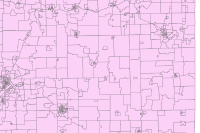

In [22]:
illinois_blk_grps

In [23]:
blk_lyr = illinois_blk_grps.layers[0]

We will filter the blockgroups by 031 code which is county code for Chicago.

In [24]:
blk_lyr.filter = "COUNTYFP = '031'"

In [17]:
m2 = gis.map('chicago')
m2

In [18]:
m2.add_layer(blk_lyr)

## Describe data


Optionally, the tool can output a feature layer representing a sample set of features using the `sample_size` parameter, or a single polygon feature layer representing the input feature layers' extent by setting the `extent_output parameter` to True.The `describe_dataset` method provides an overview of big data. By default, the [tool](https://developers.arcgis.com/python/api-reference/arcgis.features.toc/#table) outputs a table layer containing calculated field statistics and a dict outlining geometry and time settings for the input layer.


In [19]:
description = describe_dataset(input_layer=crime_lyr,
                               extent_output=True,
                               sample_size=1000,
                               output_name="Description of crime data" + str(dt.now().microsecond),
                               return_tuple=True)

In [20]:
description.output_json

{'datasetName': 'crime',
 'datasetSource': 'Big Data File Share - Chicago_Crime_2001_2020',
 'recordCount': 7061128,
 'geometry': {'geometryType': 'Point',
  'sref': {'wkid': 4326},
  'countNonEmpty': 6993512,
  'countEmpty': 67616,
  'spatialExtent': {'xmin': -91.686565684,
   'ymin': 36.619446395,
   'xmax': -87.524529378,
   'ymax': 42.022910333}},
 'time': {'timeType': 'Instant',
  'countNonEmpty': 7061128,
  'countEmpty': 67616,
  'temporalExtent': {'start': '2001-01-01 00:00:00.000',
   'end': '2020-01-26 23:40:00.000'}}}

In [21]:
sdf_desc_output = description.output.query(as_df=True)
sdf_desc_output.head()

FIELD_NAME    COUNT  COUNT_NON_EMPTY           AVG    MIN         MAX  \
0           ID  7061128          7061128  6.468796e+06  634.0  11969378.0   
1  Case Number  7061128          7061124           NaN    NaN         NaN   
2         Date  7061128          7061128           NaN    NaN         NaN   
3        Block  7061128          7061128           NaN    NaN         NaN   
4         IUCR  7061128          6761589  1.127044e+03  110.0      9901.0   

         STDDEV       RANGE           SUM           VAR  \
0  3.180550e+06  11968744.0  4.567699e+13  1.011590e+13   
1           NaN         NaN           NaN           NaN   
2           NaN         NaN           NaN           NaN   
3           NaN         NaN           NaN           NaN   
4  8.126368e+02      9791.0  7.620611e+09  6.603785e+05   

                      ANY                                globalid  OBJECTID  
0                    None  {46B95A04-F3C3-FA20-D745-B2C7C9E7AFAF}         1  
1                JD114742  {7FCBD37F-459C-E78F-B873-CA734429AA9B}         2  
2  01/01/2001 12:00:00 AM  {A7E0431E-0AD4-EC59-38A9-F71177ACDF45}         3  
3   061XX S FAIRFIELD AVE  {FF3E7A5E-A887-D815-7812-AD995620C5A9}         4  
4                    None  {3A5F5858-F0FD-932D-DF6D-FF8355F9141B}         5

In [22]:
description.sample_layer

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/Description_of_crime_data956049/FeatureServer/2">

In [23]:
sdf_slyr = description.sample_layer.query(as_df=True)
sdf_slyr.head()

ID Case_Number                    Date                 Block    IUCR  \
0  8196694    HT430829  08/04/2011 02:10:00 AM   079XX S MERRILL AVE   520.0   
1  5139385    HM736684  11/22/2006 09:00:00 PM     019XX N MOHAWK ST  1310.0   
2  6257174    HP338636  05/16/2008 05:30:00 AM      108XX S LOWE AVE   915.0   
3  8518985    HV195817  01/20/2012 09:00:00 AM      047XX S KNOX AVE   840.0   
4  3930218    HL301854  04/17/2005 11:40:00 PM  039XX W ARMITAGE AVE  1220.0   

          Primary_Type                     Description Location_Description  \
0              ASSAULT  AGGRAVATED:KNIFE/CUTTING INSTR            RESIDENCE   
1      CRIMINAL DAMAGE                     TO PROPERTY                OTHER   
2  MOTOR VEHICLE THEFT          TRUCK, BUS, MOTOR HOME               STREET   
3                THEFT   FINANCIAL ID THEFT: OVER $300            RESIDENCE   
4   DECEPTIVE PRACTICE      THEFT OF LOST/MISLAID PROP                ALLEY   

  Arrest Domestic  ...  Y_Coordinate  Year              Updated_On   Latitude  \
0   true    false  ...     1852704.0  2011  02/10/2018 03:50:01 PM  41.750809   
1  false    false  ...     1913191.0  2006  02/10/2018 03:50:01 PM  41.917244   
2  false    false  ...     1832936.0  2008  02/28/2018 03:56:25 PM  41.696981   
3  false    false  ...     1872783.0  2012  02/10/2018 03:50:01 PM  41.806897   
4   true    false  ...     1912994.0  2005  02/28/2018 03:56:25 PM  41.917175   

   Longitude                       Location    INSTANT_DATETIME  \
0 -87.572309  (41.750808511, -87.572308641) 2011-08-04 02:10:00   
1 -87.642423  (41.917243909, -87.642422501) 2006-11-22 21:00:00   
2 -87.638886  (41.696980545, -87.638886196) 2008-05-16 05:30:00   
3 -87.739467  (41.806896849, -87.739466549) 2012-01-20 09:00:00   
4 -87.725912  (41.917175309, -87.725912468) 2005-04-17 23:40:00   

                                 globalid OBJECTID  \
0  {25BA0BFD-A32B-802A-72C5-D8A698A3C06F}        1   
1  {A67F0D22-7EED-03EE-511A-49458AB189C7}        2   
2  {5FE25286-201F-EF1D-3D6F-ECF7AC8DA402}        3   
3  {F475734C-7CC7-06DC-75F3-B1D9D6D91D8E}        4   
4  {862B9571-2761-454E-56E4-F19124DCC584}        5   

                                               SHAPE  
0  {'x': -87.572308641, 'y': 41.750808511, 'spati...  
1  {'x': -87.642422501, 'y': 41.917243909, 'spati...  
2  {'x': -87.638886196, 'y': 41.696980545, 'spati...  
3  {'x': -87.739466549, 'y': 41.806896849, 'spati...  
4  {'x': -87.725912468, 'y': 41.917175309, 'spati...  

[5 rows x 26 columns]

In [24]:
m1 = gis.map('chicago')
m1

In [25]:
m1.add_layer(description.sample_layer)

In [26]:
m1.legend = True

## Analyze patterns

The GeoAnalytics Tools use a process spatial reference during execution. Analyses with square or hexagon bins require a projected coordinate system. We'll use 26771 as seen from http://epsg.io/?q=illinois%20kind%3APROJCRS.

In [27]:
arcgis.env.process_spatial_reference = 26771 

### Aggregate points

We can use the `aggregate_points` method in the `arcgis.geoanalytics.summarize_data` submodule to group call features into individual block group features. The output polygon feature layer summarizes attribute information for all calls that fall within each block group. If no calls fall within a block group, that block group will not appear in the output.

The GeoAnalytics Tools use a [process spatial reference](https://developers.arcgis.com/rest/services-reference/process-spatial-reference.htm) during execution. Analyses with square or hexagon bins require a projected coordinate system. We'll use the World Cylindrical Equal Area projection (WKID 54034) below. All results are stored in the spatiotemporal datastore of the Enterprise in the WGS 84 Spatial Reference.

See the GeoAnalytics Documentation for a full explanation of [analysis environment settings](https://enterprise.arcgis.com/en/portal/latest/use/geoanalyticstool-useenvironmentsettings.htm).

In [28]:
agg_result = aggregate_points(crime_lyr, 
                              polygon_layer=blk_lyr,
                              output_name="aggregate results of crime" + str(dt.now().microsecond))

{"messageCode":"BD_101189","message":"The GeoAnalytics job is waiting for resources and has not started yet. The job will automatically cancel after 10 minutes.","params":{"minutes":"10"}}
{"messageCode":"BD_101189","message":"The GeoAnalytics job is waiting for resources and has not started yet. The job will automatically cancel after 10 minutes.","params":{"minutes":"10"}}
{"messageCode":"BD_101051","message":"Possible issues were found while reading 'pointLayer'.","params":{"paramName":"pointLayer"}}
{"messageCode":"BD_101054","message":"Some records have either missing or invalid geometries."}


In [29]:
agg_result

<Item title:"aggregate_results_of_crime653441" type:Feature Layer Collection owner:admin>

In [30]:
m3 = gis.map('chicago')
m3

In [31]:
m3.add_layer(agg_result)

In [32]:
m3.legend = True

### Calculate density

The [`calculate_density`](https://developers.arcgis.com/python/api-reference/arcgis.geoanalytics.analyze_patterns/#calculate-density) method creates a density map from point features by spreading known quantities of some phenomenon (represented as attributes of the points) across the map. The result is a layer of areas classified from least dense to most dense. In this example, we will create density map by aggregating points within a bin of 1 kilometer. To learn more. please see [here](https://developers.arcgis.com/rest/services-reference/calculate-density-geoanalytics.htm).

In [33]:
cal_density = calculate_density(crime_lyr,
                                weight='Uniform',
                                bin_type='Square',
                                bin_size=1,
                                bin_size_unit="Kilometers",
                                time_step_interval=1,
                                time_step_interval_unit="Years",
                                time_step_repeat_interval=1,
                                time_step_repeat_interval_unit="Months",
                                time_step_reference=dt(2001, 1, 1),
                                radius=1000,
                                radius_unit="Meters",
                                area_units='SquareKilometers',
                                output_name="calculate density of crime" + str(dt.now().microsecond))

{"messageCode":"BD_101051","message":"Possible issues were found while reading 'inputLayer'.","params":{"paramName":"inputLayer"}}
{"messageCode":"BD_101054","message":"Some records have either missing or invalid geometries."}


In [34]:
m4 = gis.map('chicago')
m4

In [35]:
m4.add_layer(cal_density)

In [36]:
m4.legend = True

The `find_hot_spots` tool analyzes point data and finds statistically significant spatial clustering of high (hot spots) and low (cold spots) numbers of incidents relative to the overall distribution of the data.

### Find hot spots

The `find_hot_spots` tool analyzes point data and finds statistically significant spatial clustering of high (hot spots) and low (cold spots) numbers of incidents relative to the overall distribution of the data.

In [37]:
hot_spots = find_hot_spots(crime_lyr, 
                           bin_size=100,
                           bin_size_unit='Meters',
                           neighborhood_distance=250,
                           neighborhood_distance_unit='Meters',
                           output_name="get hot spot areas of crime" + str(dt.now().microsecond))

{"messageCode":"BD_101051","message":"Possible issues were found while reading 'pointLayer'.","params":{"paramName":"pointLayer"}}
{"messageCode":"BD_101054","message":"Some records have either missing or invalid geometries."}


In [38]:
m5 = gis.map('chicago')
m5

In [39]:
m5.add_layer(hot_spots)

In [40]:
m5.legend = True

The darkest red features indicate areas where you can state with 99 percent confidence that the clustering of crime features is not the result of random chance but rather of some other variable that might be worth investigating. Similarly, the darkest blue features indicate that the lack of crime incidents is most likely not just random, but with 90% certainty you can state it is because of some variable in those locations. Features that are beige do not represent statistically significant clustering; the number of crimes could very likely be the result of random processes and random chance in those areas.

## Use Spark Dataframe and Run Python Script

The `run_python_script` method executes a Python script directly in an ArcGIS GeoAnalytics server site . The script can create an analysis pipeline by chaining together multiple GeoAnalytics tools without writing intermediate results to a data store. The tool can also distribute Python functionality across the GeoAnalytics server site.

Geoanalytics Server installs a Python 3.6 environment that this tool uses. The environment includes `Spark 2.2.0`, the compute platform that distributes analysis across multiple cores of one or more machines in your GeoAnalytics Server site. The environment includes the `pyspark module` which provides a collection of distributed analysis tools for data management, clustering, regression, and more. The `run_python_script` task automatically imports the `pyspark module` so you can directly interact with it.

When using the `geoanalytics` and pyspark packages, most functions return analysis results as Spark DataFrame memory structures. You can write these data frames to a data store or process them in a script. This lets you chain multiple geoanalytics and pyspark tools while only writing out the final result, eliminating the need to create any bulky intermediate result layers. For more details, click [here](https://developers.arcgis.com/rest/services-reference/using-webgis-layers-in-pyspark.htm).

The **Location Description** field represents areas with the most common crime locations. We will write a function to group our data by location description. This will help us count the number of crimes occurring at each location type.

In [41]:
def groupby_description():
    from datetime import datetime as dt
    # crime data is stored in a feature service and accessed as a DataFrame via the layers object
    df = layers[0]
    # group the dataframe by Location Description field and count the number of crimes for each Location Description. 
    out = df.groupBy('Location Description').count()
    # Write the final result to our datastore.
    out.write.format("webgis").save("groupby_location_description" + str(dt.now().microsecond))

In [42]:
run_python_script(code=groupby_description, layers=[crime_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def groupby_description():\\n    from datetime import datetime as dt\\n    # crime data is stored in a feature service and accessed as a DataFrame via the layers object\\n    df = layers[0]\\n    # group the dataframe by Location Description field and count the number of crimes for each Location Description. \\n    out = df.groupBy(\'Location Description\').count()\\n    # Write the final result to our datastore.\\n    out.write.format("webgis").save("groupby_location_description" + str(dt.now().microsecond))\\n\\ngroupby_description()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_Chicago_Crime_2001_2020/BigDataCatalogServer/crime "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 18:21:15 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'de

The result is saved as a feature layer. We can Search for the saved item using the `search()` method. Providing the search keyword same as the name we used for writing the result will retrieve the layer.

In [43]:
groupby_description = gis.content.search('groupby_location_description')[0]
groupby_description_lyr = groupby_description.tables[0] #retrieve table from the item
groupby_description_df = groupby_description_lyr.query(as_df=True) #read layer as dataframe
groupby_description_df.sort_values(by='count', ascending=False, inplace=True) #sort count field in decreasing order

### Location of crime

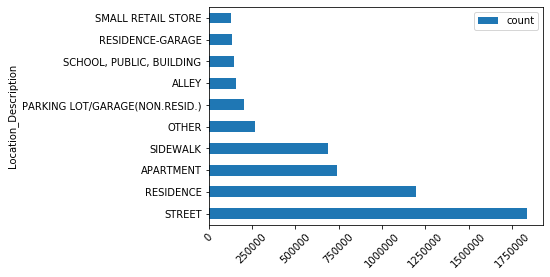

In [44]:
groupby_description_df[:10].plot(x='Location_Description', 
                                 y='count', kind='barh')
plt.xticks(
    rotation=45,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',
);

Street is the most frequent location for crime occurrance. 

The **Primary Type** field contains the type for the crime. Let's investigate the most frequent type of crime in the Chicago by writing our own function:

In [45]:
def groupby_texttype():
    from datetime import datetime as dt
    # crime data is stored in a feature service and accessed as a DataFrame via the layers object
    df = layers[0]
    # group the dataframe by TextType field and count the crime incidents for each crime type. 
    out = df.groupBy('Primary Type').count()
    # Write the final result to our datastore.
    out.write.format("webgis").save("groupby_type_of_crime" + str(dt.now().microsecond))

In [46]:
run_python_script(code=groupby_texttype, layers=[crime_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def groupby_texttype():\\n    from datetime import datetime as dt\\n    # Calls data is stored in a feature service and accessed as a DataFrame via the layers object\\n    df = layers[0]\\n    # group the dataframe by TextType field and count the number of calls for each call type. \\n    out = df.groupBy(\'Primary Type\').count()\\n    # Write the final result to our datastore.\\n    out.write.format("webgis").save("groupby_type_of_crime" + str(dt.now().microsecond))\\n\\ngroupby_texttype()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_Chicago_Crime_2001_2020/BigDataCatalogServer/crime "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 18:55:46 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet para

In [47]:
groupby_texttype = gis.content.search('groupby_type_of_crime')[0]

In [48]:
groupby_texttype

<Item title:"groupby_type_of_crime538317" type:Table Layer owner:admin>

In [49]:
groupby_texttype_df = groupby_texttype.tables[0].query(as_df=True)

In [50]:
groupby_texttype_df.head()

Primary_Type  count                                globalid  \
0  OFFENSE INVOLVING CHILDREN  48412  {4120ABC0-FE3A-BBE0-ABC7-B885EEB2D5D2}   
1                    STALKING   3644  {52CC61CF-D8DE-D67B-4FC3-C8DD5DB175DE}   
2      PUBLIC PEACE VIOLATION  49583  {4E902E77-D398-72D5-1E3C-EECF4A77B90E}   
3                   OBSCENITY    650  {A304388C-A37A-505E-D403-A90F83B04A77}   
4                       ARSON  11603  {E65FA2C6-9678-F283-A7B3-E61A40B12674}   

   OBJECTID  
0         9  
1        20  
2        26  
3        34  
4        52

In [51]:
groupby_texttype_df.sort_values(by='count', ascending=False, inplace=True)

### Type of crime

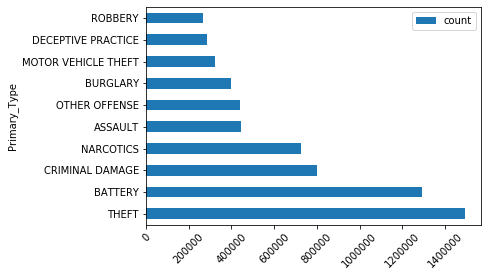

In [52]:
groupby_texttype_df.head(10).plot(x='Primary_Type', y='count', kind='barh')
plt.xticks(
    rotation=45,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',
);

Theft is the most common type of crime in the city of Chicago.

In [53]:
theft = groupby_texttype_df[groupby_texttype_df['Primary_Type'] == 'THEFT']

In [54]:
theft

Primary_Type    count                                globalid  OBJECTID
12        THEFT  1493302  {0CBB34E2-58C8-7D0B-01B4-D3E9CE832DC9}       102

In [55]:
def theft_description():
    from datetime import datetime as dt
    # crime data is stored in a feature service and accessed as a DataFrame via the layers object
    df = layers[0]
    df[df['Primary Type'] == 'THEFT']
    out = df.groupBy('Location Description').count()
    # Write the final result to our datastore.
    out.write.format("webgis").save("theft_description" + str(dt.now().microsecond))

In [56]:
run_python_script(code=theft_description, layers=[crime_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def theft_description():\\n    from datetime import datetime as dt\\n    # Calls data is stored in a feature service and accessed as a DataFrame via the layers object\\n    df = layers[0]\\n    df[df[\'Primary Type\'] == \'THEFT\']\\n    out = df.groupBy(\'Location Description\').count()\\n    # Write the final result to our datastore.\\n    out.write.format("webgis").save("theft_description" + str(dt.now().microsecond))\\n\\ntheft_description()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_Chicago_Crime_2001_2020/BigDataCatalogServer/crime "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 18:56:30 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/D

In [57]:
theft_description = gis.content.search('theft_description')[0]

In [58]:
theft_description_df = theft_description.tables[0].query(as_df=True)

In [59]:
theft_description_df.sort_values(by='count', ascending=False, inplace=True)

### Location of theft

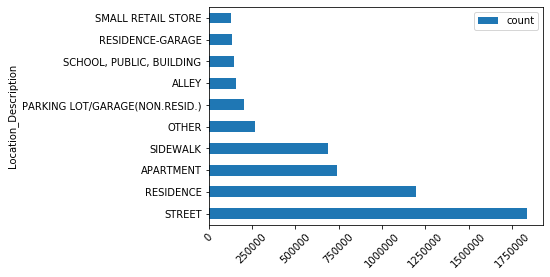

In [60]:
theft_description_df[:10].plot(x='Location_Description', y='count', kind='barh')
plt.xticks(
    rotation=45,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',
);

This plot shows the relation between crime type and crime location. It indicates that most of the theft activities occur on streets.

In [61]:
def grpby_type_blkgrp():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    df = layers[0]
    out = df.groupBy('Primary Type', 'Block').count()
    out.write.format("webgis").save("grpby_type_blkgrp" + str(dt.now().microsecond))

In [62]:
run_python_script(code=grpby_type_blkgrp, layers=[crime_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def grpby_type_blkgrp():\\n    from datetime import datetime as dt\\n    # Load the big data file share layer into a DataFrame\\n    df = layers[0]\\n    out = df.groupBy(\'Primary Type\', \'Block\').count()\\n    out.write.format("webgis").save("grpby_type_blkgrp" + str(dt.now().microsecond))\\n\\ngrpby_type_blkgrp()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_Chicago_Crime_2001_2020/BigDataCatalogServer/crime "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 18:57:14 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_Chicago_Crime_2001_2020/BigDataCatalogServer/crime'},
 {'type': 'esriJobMessageTypeInformative'

In [63]:
grpby_cat_blk = gis.content.search('grpby_type_blkgrp')[0]

In [64]:
grpby_cat_blk

<Item title:"grpby_type_blkgrp322476" type:Table Layer owner:admin>

In [65]:
grpby_cat_blk_df = grpby_cat_blk.tables[0].query(as_df=True)

In [66]:
grpby_cat_blk_df.head()

Block  OBJECTID       Primary_Type  count  \
0    096XX S MICHIGAN AV         1            BATTERY     34   
1   070XX S LAFAYETTE ST         2            ASSAULT      1   
2  061XX S COTTAGE GROVE         3  CRIMINAL TRESPASS     75   
3    014XX W MONTROSE AV         4      OTHER OFFENSE      1   
4  055XX N LAKE SHORE DR         5      OTHER OFFENSE      1   

                                 globalid  
0  {AC1470E0-614D-BB2A-901E-034720D62910}  
1  {5876F9DE-F728-22A9-270C-710E48FA17FB}  
2  {3D7FC5D0-F670-53B9-7135-5DB84B1048E4}  
3  {478D77DC-DAFA-C59D-08B0-29911B4F50FD}  
4  {69281C9B-5158-8A73-7AEF-1EB4102276C2}

### Count of crime incidents by block group

In [67]:
grpby_cat_blk_df.sort_values(by='count', ascending=False, inplace=True)

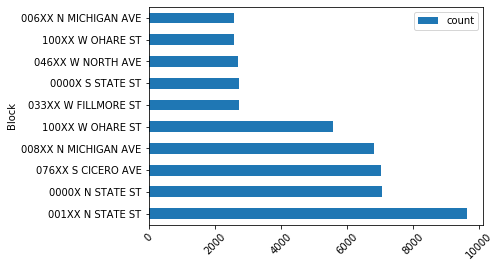

In [68]:
grpby_cat_blk_df.head(10).plot(x='Block', y='count', kind='barh')
plt.xticks(
    rotation=45,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',
);

### Get crime types for a particular block group

In [69]:
blk_addr_high = grpby_cat_blk_df[grpby_cat_blk_df['Block'] == '001XX N STATE ST']

In [70]:
blk_addr_high.Primary_Type.sort_values(ascending=False).head()

143115    WEAPONS VIOLATION
766                   THEFT
122685             STALKING
94954           SEX OFFENSE
28868               ROBBERY
Name: Primary_Type, dtype: object

In [71]:
def crime_by_datetime():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    from pyspark.sql import functions as F
    df = layers[0]
    out = df.withColumn('datetime', F.unix_timestamp('Date', 'dd/MM/yyyy hh:mm:ss a').cast('timestamp'))
    out.write.format("webgis").save("crime_by_datetime" + str(dt.now().microsecond))

In [72]:
run_python_script(code=crime_by_datetime, layers=[crime_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def crime_by_datetime():\\n    from datetime import datetime as dt\\n    # Load the big data file share layer into a DataFrame\\n    from pyspark.sql import functions as F\\n    df = layers[0]\\n    out = df.withColumn(\'datetime\', F.unix_timestamp(\'Date\', \'dd/MM/yyyy hh:mm:ss a\').cast(\'timestamp\'))\\n    out.write.format("webgis").save("crime_by_datetime" + str(dt.now().microsecond))\\n\\ncrime_by_datetime()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_Chicago_Crime_2001_2020/BigDataCatalogServer/crime "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 19:39:44 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileSh

In [73]:
calls_with_datetime = gis.content.search('crime_by_datetime')[0]

In [74]:
calls_with_datetime_lyr = calls_with_datetime.layers[0]

In [75]:
def crime_with_added_date_time_cols():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    from pyspark.sql.functions import year, month, hour
    df = layers[0]
    df = df.withColumn('month', month(df['datetime']))
    out = df.withColumn('hour', hour(df['datetime']))
    out.write.format("webgis").save("crime_with_added_date_time_cols" + str(dt.now().microsecond))

In [76]:
run_python_script(code=crime_with_added_date_time_cols, layers=[calls_with_datetime_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def crime_with_added_date_time_cols():\\n    from datetime import datetime as dt\\n    # Load the big data file share layer into a DataFrame\\n    from pyspark.sql.functions import year, month, hour\\n    df = layers[0]\\n    df = df.withColumn(\'month\', month(df[\'datetime\']))\\n    out = df.withColumn(\'hour\', hour(df[\'datetime\']))\\n    out.write.format("webgis").save("crime_with_added_date_time_cols" + str(dt.now().microsecond))\\n\\ncrime_with_added_date_time_cols()" https://ndhagsb01.esri.com/gis/rest/services/Hosted/crime_by_datetime650380/FeatureServer/0 "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 19:42:34 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhagsb01.esri.com/gis/rest/services/Hosted

In [77]:
date_time_added_item = gis.content.search('crime_with_added_date_time_cols')

In [78]:
date_time_added_lyr = date_time_added_item[0].layers[0]

In [79]:
def grp_crime_by_hour():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    df = layers[0]
    out = df.groupBy('hour').count()
    out.write.format("webgis").save("grp_crime_by_hour" + str(dt.now().microsecond))

In [80]:
run_python_script(code=grp_crime_by_hour, layers=[date_time_added_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def grp_crime_by_hour():\\n    from datetime import datetime as dt\\n    # Load the big data file share layer into a DataFrame\\n    df = layers[0]\\n    out = df.groupBy(\'hour\').count()\\n    out.write.format("webgis").save("grp_crime_by_hour" + str(dt.now().microsecond))\\n\\ngrp_crime_by_hour()" https://ndhagsb01.esri.com/gis/rest/services/Hosted/crime_with_added_date_time_cols749239/FeatureServer/0 "{"defaultAggregationStyles": false, "processSR": {"wkid": 26771}}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Thu Apr  9 19:47:09 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhagsb01.esri.com/gis/rest/services/Hosted/crime_with_added_date_time_cols749239/FeatureServer/0'},
 {'type': 'esriJobMessageTypeInformative',
  'description': '{"messageCode":"BD_101028","message":"Starting 

In [81]:
hour = gis.content.search('grp_crime_by_hour')[0]

In [82]:
grp_hour = hour.tables[0]

In [83]:
df_hour = grp_hour.query(as_df=True)

### Crime distribution by the hour

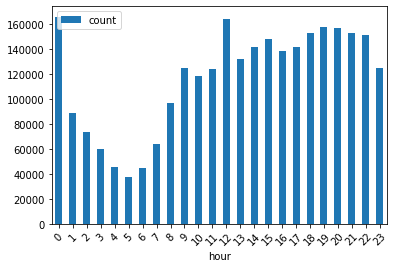

In [84]:
(df_hour
 .dropna()
 .sort_values(by='hour')
 .astype({'hour' : int})
 .plot(x='hour', y='count', kind='bar'))
plt.xticks(
    rotation=45,
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium',
);

This graph shows that the crime activities are more common at the peak hours 12 A.M. and 12 P.M.

### Big data machine learning using pyspark.ml

#### Find the optimal number of clusters

The average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. To learn more about silhouette analysis, click [here](https://runawayhorse001.github.io/LearningApacheSpark/clustering/). 

In [85]:
def optimal_k():
    import time
    import numpy as np
    import pandas as pd
    from pyspark.ml.feature import VectorAssembler
    from pyspark.ml.clustering import KMeans
    from datetime import datetime as dt
    from pyspark.ml.evaluation import ClusteringEvaluator
    from pyspark.sql.context import SQLContext
    from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, FloatType

    silh_lst = []
    k_lst = np.arange(3, 70)

    crime_locations = layers[0]
    assembler = VectorAssembler(inputCols=["X Coordinate", "Y Coordinate"], outputCol="features")
    crime_locations = assembler.setHandleInvalid("skip").transform(crime_locations)
    
    for k in k_lst:
        silh_val = []
        for run in np.arange(1, 3):
            # Trains a k-means model.
            kmeans = KMeans().setK(int(k)).setSeed(int(np.random.randint(100, size=1)))
            model = kmeans.fit(crime_locations.select("features"))

            # Make predictions
            predictions = model.transform(crime_locations)

            # Evaluate clustering by computing Silhouette score
            evaluator = ClusteringEvaluator()
            silhouette = evaluator.evaluate(predictions)
            silh_val.append(silhouette)

        silh_array=np.asanyarray(silh_val)
        silh_lst.append(silh_array.mean())        

    silhouette = pd.DataFrame(list(zip(k_lst,silh_lst)),columns = ['k', 'silhouette'])
    schema = StructType([StructField('k',IntegerType(),True), StructField('silhouette',FloatType(),True)])
    out = SQLContext(sparkContext=spark.sparkContext, sparkSession=spark).createDataFrame(silhouette, schema)
    # Write the result DataFrame to the relational data store
    out.write.format("webgis").option("dataStore","relational").save("optimalKmeans" + str(dt.now().microsecond))

In [86]:
run_python_script(code=optimal_k, layers=[crime_lyr])

In [87]:
optimal_k = gis.content.search('optimalKmeans')[0]

In [88]:
optimal_k_tbl = optimal_k.tables[0]

In [89]:
k_df = optimal_k_tbl.query().sdf

In [90]:
k_df.sort_values(by='silhouette', ascending=False)

objectid   k  silhouette
54        58  15    0.556612
22        23  19    0.556012
2          3   9    0.555995
39        40  14    0.552853
38        39  11    0.551726
..       ...  ..         ...
24        25  25    0.527496
19        20   7    0.527266
26        27  34    0.525585
37        38   8    0.507064
36        37   5    0.492071

[67 rows x 3 columns]

In [91]:
num_clusters = k_df.sort_values(by='silhouette', ascending=False).loc[0]['k']
num_clusters

15

#### K-Means Clustering

In [92]:
def cluster_crimes():
    
    from pyspark.ml.feature import VectorAssembler
    from pyspark.ml.clustering import KMeans
    from datetime import datetime as dt
    # Crime data is stored in a feature service and accessed as a DataFrame via the layers object
    crime_locations = layers[0]
    
    # Combine the x and y columns in the DataFrame into a single column called "features"
    assembler = VectorAssembler(inputCols=["X Coordinate", "Y Coordinate"], outputCol="features")
    crime_locations = assembler.setHandleInvalid("skip").transform(crime_locations)

    # Fit a k-means model with 15 clusters using the "features" column of the crime locations
    kmeans = KMeans(k=15)
    model = kmeans.fit(crime_locations.select("features"))
    
    cost = model.computeCost(crime_locations)
    # Add the cluster labels from the k-means model to the original DataFrame
    crime_locations_clusters = model.transform(crime_locations)
    # Write the result DataFrame to the relational data store
    crime_locations_clusters.write.format("webgis").save("Crime_Clusters_KMeans" + str(dt.now().microsecond))

In [93]:
run_python_script(code=cluster_crimes, layers=[crime_lyr])

{"messageCode":"BD_101231","message":"The following fields are not supported and will be dropped: features","params":{"fields":"features"}}


[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def cluster_crimes():\\n    \\n    from pyspark.ml.feature import VectorAssembler\\n    from pyspark.ml.clustering import KMeans\\n    from datetime import datetime as dt\\n    # Crime data is stored in a feature service and accessed as a DataFrame via the layers object\\n    crime_locations = layers[0]\\n    \\n    # Combine the x and y columns in the DataFrame into a single column called "features"\\n    assembler = VectorAssembler(inputCols=["X Coordinate", "Y Coordinate"], outputCol="features")\\n    crime_locations = assembler.setHandleInvalid("skip").transform(crime_locations)\\n\\n    # Fit a k-means model with 50 clusters using the "features" column of the crime locations\\n    kmeans = KMeans(k=15)\\n    model = kmeans.fit(crime_locations.select("features"))\\n    \\n    cost = model.computeCost(crime_locations)\\n    print(\'cost\', cost)\\n    # Add the cluster labels f

In [94]:
clusters = gis.content.search('Crime_Clusters_KMeans')[0]

In [95]:
clusters

<Item title:"Crime_Clusters_KMeans540499" type:Feature Layer Collection owner:admin>

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABYcAAAIsCAYAAACp9BZMAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P2Js2RJeZ+P97/gcPy+CoftCDtCtizbkmV5kxdtlmRrR4AECIQEAiTEIgntRoDEjhBIbEIgdgYQy7ANQmIGZp+enpne19u3l7svVXX3vdfJXz5v5nvOe7Ky6tbtvj3TDZkRT1SdPLlnnnPv+Zy33tyzuDDpAlNuaXHaM+O/T1cszE+5+bnJivWNFbe2vuxWVjpuYuyUa7fH3YULG+7KlcvOhkuXLrjlpY6bmTor6aYnz7i5zoRbXZ33+RcbrK8v+XKX3cZmgO9ybm2hPh+p8sVzGz7tZsyneS3EbW6tVISytZxQb0rIsxqhv0tu1dfHuTo+nFvZaLvVzU4Fx0trLc+sW1wN8F1Z9OPLeCzMz7jHH39cxurq1atuvjMl8XN+jLUvCnUxN2EMJyXPpYtbkp7xrOcwsDDPXE3EPgYYu1DWSlf5iubV/Ppd4+c6Y649O+pmps+5yfEhqX95qS3t0bC+tuTb2nYbfo2wBnqFxx+/KutmbXXBlz3jWjMjUp5C+VNTp9309LCbnT3jWp2zQnvunOvMn3edhZGA/96eP9fFAu332H5YiG/0MUXGMlwTfNqxTcuw2HP6fWbqjPRpaaEVe+/kemEuiW/NnJM6aW9rdtqdOHHcHTlyyF9jrVhv7+sxPbbxOfSc7VPaL0uvchtxnq7xy5Cbj9bseRkDDdwvZv36SvNyneew16yicbZ/FuqdnT4r15OGjr+PzUydk/x6r1BsmcD9gDjW74MP3uuOHj3ijh07nK2rRse8e+zTvj5RhPkYr+Yk1865zrjMz7K/pglct4wb5NYDZdj5Ten4NB87edYNz4xXafXayWHzjoycc6dOnfTXx1GZA50P5kLTVGPa6EcdF/7G6TXdPM/am548W92XuV7p+1x7TMZKx4zjdmvEX7fn3f7pFXevH5r7O4VCoVAoFAqFQqFQKNyaRHE4PCSrOGwFYvvgjzCs4jAP5EuLLTc1cVoeoOUhuoOIsyIP1jZsba75/NOSBtFvcWG2Ei1VuNSHfEEEGH+ulzhMvDknQpHPp8KNQpwVcsP5WKf/TtzWhbUuAajOV+dZXkHUXpI4WyaoKKxYYTjUV7dpamLYzUeBl7C1tS6ixOT4abe4OGvqr4Up2thLHF5ZmfPjWYsffCKSIPr0GictX7/X+YNQ02mPivAxO3NO6rRzDLS3056Q+UcMvnjxQiWo5MLVK5f9Glh3K8vzvvwpEZdteZSPWIdQKAI0gu/cOTfbOSvwHXqJwzmBGBHHipE6Lr1oCGfVeHQLSFqOFbAUW1563JoN4nd7dqwhmq8sz0n89OSwW+iMX7c4nIp1OXL9sm215PLnUPGsH6G85rggstF/Db3EYVBB2KLXi0XL1r7lYJ1RLy8xCBvrK3LMSy+99uw1qPeGcD8YRBy242vH28YbTD+fKML1gTjcTyCe9PeBIOBzzyFwzXPcbo368801qWPfj/HWuPvAiTNu3N9DNE6voRya5vz5s9cgDts4G98NdU2ODcl9jcA9jfvfjAjh49W48V0FYu6RX5t5PPvHtVAoFAqFQqFQKBQKhVuBPfbh2IrDKhDbB38rDluhBKvaOUS/qWAlPDU5LFZXFy9sykO2hqtXr/iH6glJszA/LaKlCpcquIgYQ9kSV5+vjo3gqedUJKIMhWPKQlhVAVjbaq2AL1ysz2sZmreOq8VhbSPY77C83hZCG0L7wvdwPO/7TN8vxHFZXVmQ49mZEbEApi6oyw0idH9xuOPnyYoeQSShPsoUS236S9tN+YzB0lLLtWfPi1iLaK3WwMrsNGLtpFiAr/s5v+jrxHJw0LDp1wqWeFoeAjgiKPW1Z0dEoFucb4qKYpm3MCICr4rDKgoLPl4F4ZRKHPbprOilwpAKSFZIqr4rMW0/SG/FK9By0nM2HtEdIZxxYDw1bG6uydwS32rtTBxO2bk4XK+ZfF8G48kWh9P5ARuXgzXfaY3Hmp3MQbs11nVdc6zXJuh9IBWHm/Vaq/McIU31nXxPMLU43JwTHZ+aKVm3eu8hMG7yQqtrXYby0jJTzsyMuY+e9Nc2ayfGaT6b337n2jh+/KiM9/JyeMFnIU1321PsHHTD/ZD1yNwSeHnAMfG6xmXcOuP+eg4C8czsmLtzJv8HtlAoFAqFQqFQKBQKhZudgcVhBOFgMbwqn/pAXoufgaWltn9gHhfhhYdq3AUgglq3E1iPcm7el42IGYRfIw4jxkhcLQDL97UFt7ISBc8YryJR3YYgyNI2ysqJw6ShDj0Xzq+GemO/tC3AccgX2mjRNHzXvHVbaus26pyaqMVdAmIUAoPNC3W5aqG8KvMzmDiMOBjEYcYKa2RE6bnOhJ+XUTctVsq1CCyCpJ8jLLuxYt3cWI2Wrb0tgQmXL12UtOQhL2VQLj/NJ14DZWFlTF24V0A8qkWp2hpP+hCFlyX64b8jwGChx6emV4GmF7bsQC0OA2NjRSQ9rso1aXtBehWtVLhSbHx6Ts9XbiaihSJB3UzMzExmxGHmdXthGJ5McXjbufHY8qk3Jw7z8iCX34rCCteLzoui5WsdvcBFCnWrRSwvQSbGhvx9Jtwf9NrOXd8cX5s4XJ9vxJHvCYa26pyn8163E6bk3sFYYWFN4AUXx1jE27WJGwq97rRMLUfLDufG3bHJUfe3Q36uzbkUWw5/kxjnoaFT7tSp49V8APMBmq9uey/s+FvCSwPWhgauyyl/n9T1Xd1j4v2p48fm9GzbfcNfzrk/soVCoVAoFAqFQqFQKNzMNMRhHvJTcRh46E/FYSuApugDO8Kk+pJFOMRCUgOuJYhHtMyJwwg/Qeg1rC245eW5Shy2IlFdfy0Oh/JUYA3isJ4Pok+I51MFZPJo+8O5gJaXYs/XbajRsrCUpr9qNYyvXY7pE/kpS9PW5dZtR7TIicPLyx1f9oSIMghtuINAfFRxXsGaG5cG+PdFrMfVx+XLl6SsXoGfVV+6eEEEIYQz/CJjTWzLVWtg3ELMeNQFBfVcvXIllkR/EcdPi8iC1bCKtyJUqWAThZddEYfJI/lUHA7CTyoe6XGj3PScidN4Fa1UuFJsfHrOpsHPMOOEpap1M9Fuz1bi8NIC1yB1hmvzm0kc1rG8XnHYlqVo25X0vIX7kor0vPAIa3e6cW2n1yfXNcc7F4dt3Uk8+Z4EdM4t3eNGG6flvsLcaFhcaIkbBuZf/05wHwoCcV2WlsP3up6QZv/EqPvSmfPV+RRbDrRaM+748WPu8OFDbmtrrXHPBJu3bn8OO/4WLPyDyxHukwRdF624LuUeE+9JHIsFsb+n7Z3dLP6HC4VCoVAoFAqFQqFwy7GnKWA0xWEViHnQVmvhjc3gVqKXCGoJ5xbd2uq8iJY8YKuPTwKbmRGnAnElyPCgTxmUq2V4EIWXljsNcVjTVnWRxx/TTqgF1mAZrP0Iok+I4zOIw00LYj1Xp2sKRTau7m/dXm0LWGGXgAUvwqCWp2XW7VeWRBzBBcO0+Wm3isOpCEy5bK6FWw8E2Qtb3ZsFpgFXERcvbvqxXpaNp3D9gQWwLRcRDYE5+AYeEUEEUVrFltDG8FNr/HBKet82/JNqoB1qNT49NSx9EpGqEmw8/rgSh+d6i8OVEGnyabykJU8UqUKaIPzkhKMqTknis+mlnihcQRLXdS7Fx8+1Rt2UjNPp6rqYm+tU4jCCU6gzXJvbib4qDPdLxzm93utrP7QptDmMGcdhPAcl9LUawx7oeMixr3cn4jCoKAwcS1lxXipivK2nF6xV1qm/CKR+rq/xiTNy7em1rdeoXstcoxzvTBxu1lvHm/Pa3icIbS/k1myzrUH8Za54UUTATZDcE/wY6nmufxWHtWwtp66nFpCJ2zs+5v7hXFjrmkfR9ViX186Kw/aeafPXfUgJ484cdc2Tzzfr1+GEvzb1BRr+0um73I9iH4D03Ge4Vov/4UKhUCgUCoVCoVAo3IoYy+HwwJyKwzw4W4EEVAC1D+b2AZ1PTWNdQLTiz7gRLTXoQzc+LCsxhnooD6E0lqMuJVQcJl5FIk2jcZsiCqvYmwcLaMXGWxcTYPsehOLaDzF97I5rQpva7WCJpn4s6b/0uYNIgrsHNiIL4gI+erHExSKXNCkqDl++dEG+I7Cvry2Lf+erV/v7A0bMoQ1ra0t+XlsiIiMm2/IRKhGysWzl59L4yUX8CEJNLdKEtTLdJeRWYq5H3SfQzsuXL8ZWhM2/1Bcx4mAtzgRhBnFKxJdYTqNcH1+JkLJm6zwar9+DgNMUhxVbZ38RKUNXHd0WzXo+xaYB8qqv7iWEeSMOI9AjooV29heH+4nCek7RubP9T+e3GhM+r5dk7Czq41VDJQ7bPAa9LkHikvKqtL3iLT5+Pl6b+hIDlygyF0utxvWv9wC9zvm+nTis49ubei7kOiJO25uQrp9e66lXvD2XQ9cwSHrfFtoU2hXaRjurzemitXt1L+M+4fMiDts1ZMeET11j6Rq9e2TU3TvKC6fmWq3TR3qIwyrYK2F8IbTdtqMa8wRNS/+XfJu4F/IySwO/guFFgrZFx4pP7mP4yj49PePuKe4lCoVCoVAoFAqFQqFwC3Hd4jDH+oBuj3PiMJ+4NkBMwFetBhUY8GuJMAyaXsDf7zbisCLisLS3Fnxz5IRhGFwcpn3BPUXd56YwjAUuP7umbyrqElQMRHzgO6ID4vi8T4M7BkRCRHPGZWNjxW1trctmcAisj28jABOw0CUP+XHfgYUygi91KlMTQxKHIK2bw1lLYIsKK5UoYkUWj4hLnWA1LOKQCJr+vE9H2VjHYkmsP9Mm0A91LRJ8Ece6o9gioitisMcKww0hNk3vkfgYF+K1T7rGlXrdh36R3/YtoH2v4pLyLXqu13mwaUDrbEWRlJ/NW3GYsQnt7C0ON8W0/ueh7nvov/YxjENoT9VnPq8XHbtMeTlxOFiixvQJel2CxCXlVWl7xVviOa4D7ksaGPfRqfNVPfYeoNc5369PHK7nQMRJTRvblJKun15rKheXnrPk4iV9V3uDOEz/cA2DixkN4f6CkBp+PaBjoONhj3WN5dboV8+NuIfHRuW7UqePDCgO1/WGcbXtqMbcUM+HP+/TIQ6rVTv3YAL3VLlGZ85X7dHx0l9MsH6/VjanKxQKhUKhUCgUCoXCLURfn8NAnAojShA/a/cH+oBujxviMOIueaLIqwIxIqgGrEmJwzJNhd5QT8hHOYBAzHElBNMm6jbHQcRtir4pOxOHgyicE4c1nfZXWVpuiyDKZm1Xr1yurHr5xIJ3NwJiMX6cV/2YICqziVKXr2ERoM+41vR5ETtUaK1EoIZoklILJqSpBJEqfS0OU24lDiPScl7yBHFXfqbt24MIjtCtAd/H6scYa2VpD3VIXduIwxFNx2cVX9Xv01Z9ifHVcYgjjbY7HQuOFYnjk+PYRktVd4/zYNOAHU/EpdnZ6UocRnxkXBAva7GMPE2smJYjl972X/tn5zft73VDWZnyelkOaxty6L0mLUvoUU8VnzmvIiDW9wReXHG8urpg7gFWHA7XfX9xGML45qnnoLbQ9fGmXf3otaZ6rTN7zpI7Z/MIjTbXLzJ040lc13DMvduuHwv5+NQ1lluT8Pnh8+7gRLAgpr5mHsrOi8Og92I91nq13TWh7N74NOT1yHr0aOCFVrivh/uQ3nP4VOvhg9NL7r7ie7hQKBQKhUKhUCgUCrcIA21Ip8JILY7UVsP2YVzjQppaHLYg7kKnMyGCAqKmBoRC3CkgFpLWiq1WIOa4EoJpA/XqcSXi1oJvTgTuhYrD2hcVhupyw1ioOKz9tuLw4lJLLHNnZ0a2dfVAIA2+LRFNL2yti+jCz9wRffHviSDBz5s77YnKB6Za3QaC31pEYHwCI7ghqFZiSBQvVNBIhSAr4DSpxZJukSakScVhEXKjYEJ8Je76OH56jtUhbVa/pRrU/zTiNr54JS9tRvRVTB8oX6nS+U+J0/bLubqtOUK/EHZGjdVjs9+N/HwnjnIT9Fyv89BI47Htox0zM5OVOEzAWlE3/UsFNUWFtV50pw/1KdpHO7dVGj53i0x51yMOQ1pe1a80fhu4frimCFeuXJI2jcyMN+4B9t7G9wsXtxOH+6FrrF5rgmlTP3quqUxces6SnrPpG1RtDn2UXx34+7SGRX8f51cSeg31I12PKZ8aOudOTfu2+PrqPLo2BxOH9d5s211/3w6fztcJ853mi0zu1fhZZvNNaVscN1DrYVz13OmXUu4PbqFQKBQKhUKhUCgUCjcbuyIOa7zGhTRLlaWwisLLy3PiFoJPjhECePC2P1G+cGFThAd80i4vt6WuCsqjbsQZX4cIw0C98TgnDPeyEs5hxWHtj4pDVhzWPmq6IA4viTCMZRnW0VgME3DzgNiLRSJ+fvG9jAAWrHyD24kclKNjgXiF+wkN5EVICxs7ReL3SuRZCOKtiBwxjRUzNJ0KMLWAoui6sAIN5QShhnj5qbn/nhOH+dR4jSMPFsL0j/4gfmpg7rF+5hwWeO2Z8wLpQY8RFDvQGpFPjvWcxEdUJM/3LRD6VYvDxNmfmnfl5diTjiPouV7noZHGEwSv8J3yW63acvjxuEkaFq0IUuLvtMPYk68mJwhbutOHuhStX+fVtse290Zws4jDWNZzvanbFl7GnBk93bj+7XXP91QcruoeCL226mtMyLQtpe+aysSl5xpptqlT0vK9anOYA64V5k3dA3GP4x7FdWvnqjd5K3iY6Uy6D504487P1kJzvTaDOMyYT01NNNYCc2LnSO7Hpt319wHwdSq6mapalnMv55iXXdUYSfuC9TDi8AOzl7J/cAuFQqFQKBQKhUKhULjZ2JE4rA/hVhxOz4XzwYp2NYrDCMGIwktL7YD/ThznFheDBSzuBtTKls2OEBkQw1Z82qabiSDIqhBgCSJOLQJbYfhGisO1EDETRYOJWti7uCViAcITFqAIXyKidhA6pty8h3yMA5tgLa/MRRE8CFChviWxylMhBlcS1BOE4SBKCFYcXgjC8BMlDlvrXi2b7/Q1FYf5JA5rWPrB5ng6XgTdpHC3YNzFT6hvX9qn0K/QTmlj7JOKw9JeC30gX+yjRc/tKE2CFYdZH+qC5JJfRwinCHCsHSumqQjcC5u2zuPrj33SunVe9dj2d1D69TXH9YrDvBRqlJnM06CwNmgHfroJ/IqB4wW/NvX6t9c9369dHNY1aInnMm1LsWOcjnMuLj3XSLNNnZKW71XbA8RhJcsY6a8Z8CnOsb6Q6U9vcRhGWxPuQyf9epf7JHFhba4st/31ccydPHlCxn1xaaFeC35O7BzpPDXGNx3vrvi8i49pf93hW1kD/uT5dQjpuG8AY8U6Et/Dc2339WI9XCgUCoVCoVAoFAqFW4DrFodzD+QqDK9ENxAqDC8u1uKwuodA9F1aDH4csai9EoUGLNE4Rgxb9unVOljbYOuGIOAg3ipBHF7fwEdwYBCBuL84XItEYPu8MD8twojd3R5fnMHC95zv71zVByGWq+UolKXftR5EY8pGNCfgioNyg2jSW/SthI9t0lFOlbYHtUBDOUGoIb4Sh4mP4rCUSZw/FiE8Iw7rd7XKY4zUh+luBoR0/D6zvqgHQRrrPu2D9iuIw3WfeonDdtxS9Jw9b+PSc3I+wYrD/GxfrologX750kWJQ+yeazPWtD2QCsIWm65Ovz3SZz53QL++5siJw4hrufYo9nrhWmqUqXNl4waEuq11PmN9buJcdR3qtco1yvdUHF5emvV112tG21u1SbD3W4s/Z9pSkYnvNca5OIs93y+dpUrLcaMfrKMJua64vjToPVv7bvPZuNyatLBuh2Ym3G2ngvsGvV5hZaXjjh8/4oaGTrlTp47Xa8HMkY3jPmvbnSczH4Z5f39gnerLA+7FHPOLhnBPrO+tndaovNy8q4jDhUKhUCgUCoVCoVC4BdijD8YqiOXE4fShOxWHQ1wQhRWE4WV1JRGFYRWH1WrYWgQjgE4jpPqH6ksXgwj6+ONXHW4YeAhHQM6Jw1a0DTzx4jDiCG20/pPFund8SEQChHDtK6g4bNH6LBqPy4PUpYQKaCqY5IQdSyXy5NImQghQtv0e6gkiCN8b5+M5W7akQyw2VOdjvsCUnMN9ho7h1Su7s2GfDVgmr68v+/UUfF3DzJQVin37Gm0LAhFxDei76adFz9nzNi49J+cTmpbDiNrBBzebDxLkpYlfC4hyqQVxL1KxmHp0Dvsh48DngGzX1xy7IQ43BGKdPz3eAbgJoC281CGoJaxuTKfXo4rD3C8efvgBEYcfe2yfO3nyWHbdVG0SrACpxHOxHQ0y53qNcRqfYsuwdJ03dVb5bbxBN/PD0pqwtbkux7z0qfOEPnIcrrXm+rRrNI27/fQ5N9EK9xy9TqHTmXXHjx+trId1TnSOFL1f2zZ3k85HSkiHP3euR31ZoxsX8mLJjiH3M/o/PD3r7ikb0xUKhUKhUCgUCoVC4SZnx+KwisB8z8WDWg0vRWF4YaEliDicWA2rOBzcT8y5KfGxe6YSaAj4JOYhfNG3SR/6te5UuA3svjhs69PvnEfEoG24RtCwsb5SCSTiWiOOiyICcSzDonXauhlXylKXEvpz93Tjp0rY6UNDAFIqgaRJLeyE71aY4XuV1p+jXBFXTfkaV9FHHFYBpjUb/L7SP3EvcJ0govIiQn/2rgFxB+EPK0fqok6EH8RBO6aKClO0X9F+WnLnbVx6Ts4nWHF4ZaUlwhM/X8eyWl+a4GoCn9b4qw4Wz7WglqMWhZvisPQpqd+i8zso2/U1xxMtDmv6XmBZvhAtYRln2tbp+HzmOrVC5MbGqtu79z7xg4tQzP2D+LTNVbuq9V6v+75tzpzrNcZpfIoto1ceiTd1VudsfAJjZl9ehZcaQ3LN235SRlh3zfVp16iN6/i0nxyyL8HM/cQfHztWWw835sSj90+9X3Oc74Odi16EtAvzWEqf9uNRW0rz4oa/V+lYIprzYvBrM/k/vIVCoVAoFAqFQqFQKNwsiFuJWhhuEsThqerhGngIX13LicO1+FmLw52mMKxWw1EgTUGcQSTGehhxAetbDeyGr0Ievh9xNVGLwSnd4jDfBxGHA+TpFhjke/ykrWqFurzkRzKGNT82xLGxmu2bHR/pq5Zj0DotC9GPcdOlxJAIHYqIF3zqd0XP98OmF4IYouXyqUKiFWZsvcQhiNjyrFACvcXhiI/XutqzI042ofPrABBZFI0TYhqEXUU3rwOERsYO8Gm9trZU+bXWwLgyf6w50oWN/87V4rvpg0X6kcGe75lf02ZIxWHi5jpjIkohQummWFhCq1V9y49XLbJ5+LSY8hWdUxtn26T92Qm5vubSVfh5V8tTDSoOc962zbZJrw0r6ip2PVm0Lbk8Ff4anJsLL6LUep3rbWJiuHGdpkLkgQOPiDi8d+/9Pu1YFV9dw7RB2pWKjuFa69VmIXMuHWPtWy5esfkt2TRJnXLexkc0TjenW/X3dgKugfSFi+0n6cO6o8ywXhvrVs7X7J8YdQ+O1i9sdM3qPYhrpbYenm/MiSJ/D+L35lwodi5q6r+BGhfS68sMdYGjL+vYANOOJS9teDk4OT3q7izuJQqFQqFQKBQKhUKhcBOzJ7US7n4wrq3meLhG3ET45VNFlVT8xDJY3UnML8xmLYYbooxBxdTZ6IsWVwAaKiFvKgh5WKwhIiBG18IwBJE3FYebAnBtJcynfid/6KdvB20yAoNCOzut4IMSC1QNiCPE4QaC/DkoU6nKjtRjXKfPuZRAvFRhT0ULFU5USOkWQWpUwFAhqGsDJtLEMrTcQBBlLI2yesD5VEDWOjW/EM+l9WpbKiS+Ls+WoeUrpEdsVrcVgCX6hl8TabhwYcPnmRXrddJNiSA77Od6pNGXqp6kLnueem0fevYlwYrDq1EcBgQ4hGuwVvVznWC5jshatYdPQ1ebe8Tl8g6K7cMg6Jj1FIdzbYl50ntGjq68Ec7pPSbNw7XN/Yn2qNDJWHPMhpF6H9TrWK/f2dkp99BD98u8PfTQfe7S5a3GNR3arSJj8/5ajceAZOctOdfr/LVCeXK9cez7om1mPWvfeHGDIKwuF/ReiL9xnTfNk7bPttvy+eFz7shkEIfTekPdU+LrWa2HdQ57wfn0GtS2dVPPVxMspc9IfzXwAoGXN4yR9omXYfgeRiA+PjPv7m7l/wAXCoVCoVAoFAqFQqHwZCPicC0M1+KwfRiGWrhcFOtf9aOrwooIw2sLEs95EYeXO5XFMMeDiMMWhFEEhrXVWoDVsLW1Xj2UkwbLz8UF3E4suV6Ww1YYhpw4XPczEYchCgxVu9aWYmuciNYihnQmJK+FclJy5WvdFgSXLpcS4kpABZIwP1bw6C96eDiv+GMRapM4LUfryYGA08jXAyv4SJxpRxCcrXAc1lxat7anIqa3ZVdlWGI9IL5AZ/kZeFgzCO1YpLOW0pBuZIcoSxk964lUbfHfbft79iOhYTm8PNs4R37aTJvUxytBfV5j1Wj7a9uUi+uKz+QdFNvOQZC6PDdKHFa6yvD0E4e5BrHExl2ABtyP8LKKc5C7ds+fP+sOHTrg9u59wN8XwksmvaZDu/V+emuKw2pJT1+0zXqs/WBdck/WMDsTXsrovJFGroGkfbbdlnOz4+7u8+fdh0+ccV85e94dmxqr6tXraXbWWg8vVPOYg7lg3rQM0LZ1U89Xk9pSWn8xgvsR7g9YStNu+sQ9DethXkzBg63L7r7kj2+hUCgUCoVCoVAoFAo3A3uawjDYB+PwoMxDtD5YI4xgOYwAjMCiD958D36Dw7lKIF4KVsMcc76fONx4kI9xuJCohLyFWXch/qxeQ26jMcQc3E5sJw6rQDyoOLyxsSSWYNSBX2EN+BsmLgjDWE83RWHKsKTlgwpJeh6wVqTcpksJxqEWR3ICR1/xgzjFH1dWw5QVhY0gboSyU7TeRt18ct7kt3FKQwSO5xBsBbW6i+3J1WXJlZ8SyqvTVsceBHZESEQdxhhr9GW/Vi9e3JKxtoHxJw1pc/WArcO20/Yh14+UfuIwUIZaQVvrZ3F/4ONEIPbpGu3xeQaJux7Sdm6HzsONFochLWc7cZh7B21SAX5tNVgT4xOd87l7A+4kHn30YREpsR5eXU3FYQj31frlmxmPAdlu3nLr8XqhPATR3Pq1/dK51Jctm/6eyzEWtLavks+gbU4J10yoF6H4IyfPuvmYH4jn5WZqPaxzmUK83lurdlRzkxL6lKd2L6H3C10jndlgwS/t92MmArEfFwTi4n+4UCgUCoVCoVAoFAo3Iw1xmA2Bmg/G4UGZh2h9qEYYUXEYIdQ+eFvLYSsO87lTcVjLJO3KSkeEV7X4xIoPa9qujcb8MT9nxg0D6RDz2q1xqTsnDENTHA5iTiruhrYsiTUh1nHWF7KKcvOdyWgZ3V8YBh1He96Kw5oGlxmIwRr4rsJZEE4mjMBRz5kKHxadSyvKcKxWwyrI6DlbfkpX3cRLXFP81XglCD0hTXWcFYebm6al7QjpustPSdNVxzFOmWuPhp/FjwUrYdYP6+hK9DtLYG3pmkrrsWiZ2tZefchBuzqdWXf8eBCH19cWe+ZVgdi6XVlcCC8p2v76sP17Ikjbl5L2Qeeh14Z06RwJMU9639iOtJztxGGgHbgfITz++FV/3Z+WexDn7LWr4vDWhVU3NHSiSyAmjbY7oNdpuFaFpH39sGssR7oOdwPKC9dumEO7JtM+yeZ0s6MyboT5ualoUVzPveRL0HZbQj11vfvGx9xDY90+iFsDWA/rHDNvULWjmpcUO08pIQ1/j/BlroHvuKLRPun9TS2Ip2bH3Z1FIC4UCoVCoVAoFAqFwk1GJQ6H3eLtA3P9EKzxgDCyshpEYITeSlTxn2I1mwjEuyEO23PLy+3KmhjYlGt9bUksiG1g4y4selVEE7FnflranxOHU3/DKgCF40X5yTDirPX3inhE2QtzU6G/URwmj4pMKh7pcV1mt8Bk00FOHMYtAnOiwkiYr6ZwYefLIvPJpxLntxIyPCLMyHFdfj/S/FpGo55ImoZPLHiDm4xxKctaVWob0nbYdquQpHXocRXn06XHmrdC43y9nfZotWYAi0ANvBQgjvbaelIo07a31zhqvfY71wjCMNbDMzP952FmKrTTthHrZ+KwcG/08QaTa59i+6D91H6znmmvhptFHF7w9wraxUsBgvii9tcf53pdu70EYm13oHmtViRt7IWurycSncPmfHId+7YkfWLzRMZtNboCunzpohyLy4WYH7L1UIfB1qP5PniCTe7qcjhnrYdPnjwum3hi5W3/jih6/9X80JiHCjtPOSblXkHf1L0QVsQc22tP+oFAHP0Pj89OFoG4UCgUCoVCoVAoFAo3FV3icPOBPzwo2wdpeWD3D7siBGeEXisOW7cSfFdBuZcwk5I7p+LNxuaSuF2YmQ7iUrBOm3Zbmxn/sRurvt1ByA0P7yMiHONqwgrDlKvCrQpACL6IcIhW+hNihGh1Y4EQQZ/pL/1T0UhR4UjLVq5XHNb5qOcqzFc1R4YqrabX7+Y4iDC9xeFQT0DjJJ5P0hoLYI5tesGnS9PwiVVdThym7FwftE7SahlSX4znu5LGaT5tT4XGJePInDPHG379aOB4EPcStr29qOttgsAYfiZ/Itt/hfjp2Ea7MSJW9WGdn2v280YS255ro+2D7SfHN6s4vLa2KPcU9ffNyybayT2n17Ub6BaIV5YXqrYH6nXWk6TNTzY6d/Wchus4tFf7E2AOuUbwxUvQ9YhwTH4pK0N6LdX11Ov//tFRt38ibHKnbSFtw/fwQnhBAvbviBDnV8tTqnHvotm3Jv4eEV8aal/V9/y876vtF/c9rIdZ22MzRSAuFAqFQqFQKBQKhcLNQ0McRoxsPvDXD+D6gK4P7Dz0pkIv37vE4SgMq+XwnXf+vfvT177W/crzftU981nPfkKhTuq+444vyAM84g+Wx2JlttVtNbyy2hErUtxJXL58UR7+2Y2/PTsmLggWl1qhz34cRPj2/VPxQaFc/U6ZFj2vopJNC73F4XpuwlzVIofOlUXPkc66kVDxQvJL2iD4qCBj82r+Lny8pO8EK2A+pWx/jrrUpzFx1kqYY42r86g/1lBf2oeqzoiWoX2o2hLL17iudDG+QuOkraG9mk+tiDVgPczca5mNsg123HpR19uk3Uboiq4l1hca/bf5w9iMVyK2CpkE3GIQh7uMtG0CdSVxuX4MjGl/dxvtHMbxjeluVnGY65NfKNAeDRzj0qafOEwcFsQI+1YgPnDgETcxMeI2fb7Qj3ocepK0+0kltqme03CPCPG2L/wdmZB7K9bWGriHci3pusjW4UmvK7t2oO35+MnaephzbBA6Nzflx/qQCMRrayvi95h1lc6xzq+WZ6n7YNF7Qh7aGF5M1hvxsTkqLxSrfvlySIf1MGsbJmYmikBcKBQKhUKhUCgUCoWbgsTncBDX7INyiKsf0MP38UoUVaFFjqMFLWKwCsL6ubDQcm9685vd6173erd//wH/oF67Z3iiAnVS9+tf/0b3lj97q5ubm5EHeUQERf3OKu3ZURGECQjE7MCPVRzCMP23iOAUxYccVhiGWlRCGN6JONwtaOhxP0iX9TFMGTEuiD5hDeTQ+oI4EvJJnn7icExjxWGtz+aR9NuKw7HeWLcQj6X9vizbBq1Hjk3aNG8gCD56njz4I2YdbEV3IlgIclyVl8GOVy+a9TZBQDx69LA7duyo4+f5tv+2DL0W+dR1jOWiBt0ki5/0N9qodZk4HaN+/eqLlpltY42dP87faHG4qwyP3q/StKk4rBvT8csDAu5rZIx9POdJV1/DtTjMpwrEjzyCQBzm8sCBR0UoPnnymLhC0P70JNP2JwvmStulcxuOw3zW8xvidXM6dcPD5okccz+VNLHcFLsOBR+nZWudd50fccenw0tM4jq+rqY4vCq/DKG+xhzHueFT+2DRtnej94Uc+M2OG/FFX/SsF+mrb5ftG/cl4lQgPtdquXva+T/MhUKhUCgUCoVCoVAoPFF0icPsSm8flPluH87lu09jBVERhv13rGexFFY/wxyrRS3C8Mc+fps8PN8M4eO3fcL92VvfJt8vXbogoh8uKRDXAEEYNxLqy5jv4efSw255pVP1X8dABQgr/iqIEYqNC4KSCsODicNYLuq87BTyIb4iugRRMYi0MtekiXNLfC4/hHXRFEc0X0P8lXR12cThQgKqeomnPg/fg5VxLDPmCagw1KxXyvCfIV9oh7qp4Lum4bscx/RV3uo4lld9hnPSL1+/uBdYmZc5UMG1yp+gddkxS6nq6EFOHLbntZxwXYbxAURg2oYwpmF9bVni+Pl71U5TVqPNkSrdTjBl2r5q27Sddv44/2SIw/RxEHEYEN3n2hOxdeEanJwZS67hbnFYabWCaPngg/e6xx7b578fkU8E4uWl2apPWTJtf7JgrrrbGOYyzLO//v11rPPOecaKX1lomOuEOMlHmgzpWgxl6xoKxxO+nM+cDmtE62OODh8+5Mf1pBsaOin1tmZHmnMc54ZPzWdp9i1F121KOC+/MPH3Zg0Lc9PBoti32faN+xO+h7Ho57NYDxcKhUKhUCgUCoVC4ckmisPhQRcxkgf8IOKEh14emu2DOZAGwVeFYRGH/TGCsPgYjuIwcfjuvPPOfxCL4ZstvO51b3D33Xd/POodLl28IKIGAoCI3SoM0z//qcKSFZesKKFCUkotInWLw+TpJQ7reUXnxaLz1yRY5nI+iHVNcVgFHivypGg5VhhB9JDyWDuyfmrxV0WRVDwW4Sfm45NyKpHX59E1p+tO60rrVkhDu/npNgKMlqn1y7Eth++NcptIf2P9OXG4qzyIZUrePjTyZOgnDttywviE61Xj1IrR/qR/Yz1YbbJ+c23Wfko5fs1RjvZlYNIyI1puPc/1/HG+nzisZaTl22trOxptNOTS6rUnxLgFf3+kfZcuBbcyCO/j/vgLZ0fd8XZb0tbXcTfaV+4VCMV7996fCMR9LIgz7e5iJ2mvA5mHqm3hPqJwTq49ru94/UucbtgWN0zkJRzH4uqEcdEy+YzI+rP4OO6DwHflK2dH3PBMuC44xo3D2NiIuGM5fvyYO3PmtFte9POTzC9zwqf2yVL3r/u4Xrcp4Rz9pm/q2oWXi5Pjp5tW+z4tY4P1sKxzPw73ta5m/zAXCoVCoVAoFAqFQqHwRLGHB1YehFXACZadTUHOPjzziZ9exF8euBFEEYcRTStxeLkjYhrC8NrasvvT175O3DncbEFcTLzhjfHocRGA1teX3YULTZcXKggiri2pO4m14FtZLRBVHK6EIT32NASKiArGVfpEIOb8XGeiSxyem8sIW7EcnSedK52v8L0WdIhT0U7Phbha4NFydF3UayKIIvZcLexo2qb4q8KwiIM2HfXEOGlHVWZA26B9SaEvfFKWWOTNjojwoms4pKvb2q8s0PrS+vuKwz0IGzwqddm96qzjphri8MqKisN2zOu26XfNy8sefrof2jgtbSbgKzms4Wi5uUh6n9fnC2WGeQsiXGh3KE/L9lDPDmCMLBIvZdbl9hKH076G9GEMrF/wrmshIW2Tkktrqa/dJRH5EBoJvCiivVPT590DkzPug6fOu/smpruuYYvt7/Lygtu7974oED/sJibCJm3avyZ1e3eDdD6qORmE2H5tJ9cewraK29wzuPZ4OcEna4mXPYij3LeuXr0q46cbtpHe/moFWHMqBKfU11JIc2Zmwn3xDL+iCHnDdT/hr5kjIg6fPHnCnTp1vOt+qfO6fR9T0rlRFzhhnphDNoCkb4jghLXVBTnmfkT5er/iGGGYzSTPzswU1xKFQqFQKBQKhUKhUHhS6RKHVRisH4prNB0PtwjBKoyq5TBiKSIa51QcRmxlI7gnw8fwdoE20bb5uWAdqNiNvTTwwN9uBeuwjv8MVtHBetqKDpUoFI+tMGHZVXEYYh6w81d/r0UN4hRNZ+cfVJjTeD5D+loM0XOVsMKnR4UnyUd5fr2oOJye47vNX9dTt1HbofHNc0EYZlMq2ZiqsX7r/mp+PWe/d5dZ1wc7cSsBoYwaLQdsfbZOG3e94jACGmNBO/kpvwY26ULonJoc9mkQ5+oyaoirhTjbrlxft8POed3OGkQ92qlhN8XhXHuUXHpLdT17WF+8GNLAC7CpydNS/8zygvvqyIS5jrtJ+7y2tiRuJhAx9+170K2udOK5sF5rQlt3i8ZcRHLpslTtr18yIQyr4Ml1x5rDVQICMdc28dQh18uCujp53M/xuWDFHoVdRYXfHHZN6vHtw+fdaIs2hRdeXKetFps5HnGnTp30n0el7tXV8CJT51W/9+9nSjo3KbSJX3qc9ve62g0Jmxhy367K9p/cCxkjBGLW+teKa4lCoVAoFAqFQqFQKDyJ7LEiDBaxqRiTPvyqGIdYhjAqwnB0s6AiMedEHF5FPF12z3zWs+Oj8s0XaBuiwtzctOt0ggsB/A8T2IEecU03pCMgHCM4IGKpFXFDIEYQiqKSihBZOK/phaYwjPjVSxzOlh3ziWAWy7Xz1pxPPQ7UawAROBWGNV7XRXMtVAKTLdMfE895hBDWC5+aPpSXEYdjubasuv7QBpuOY0Qpypc6KmG426ovlFOvbT4VWybYtHC94nAQswJaVzoXeg7fwEsLrUocXlpsS33Xgm6uiEVl5Tv7wqaIw3pe8P2z6RU9TuNTtIxBqPPUefnUcLOIw6DXMZtP0ka9LwQ/zkMSf2ZhTiyI6+u4CdeizrHOM5wZHnIHD+4X9xJYD2v/mtTt3SlcVym5dAORtE2FYSsOM09cg8wdAjHfyYv1sLo6Ye0RNvzfBI4lzQ7FYXt8YnrC/f25EWkTY9qaCfVMTo67EyeO+2vokFgq43/YzqmdY8j3N8XOS44wr/qyg80LCfSZ4zYbifrzzAP3Mvquvocfnt3I/nEuFAqFQqFQKBQKhULhiSARh5fkARe6H4pDOh5ql5bDZnNWHOaTB28+1cVEEJBvfnF4abntVtcWHFaViHGEy5cvBqEBS8uJYfHbqgG3E7NRiEA8tkKDCko5EaIB50mXCEmg4vB8H3FYy5c5iOWl4rCWWc9nPZegcw1hDQQBtpsgztp1ofEqpiACqc9gKTueV3EYIVjK8PF6TqmEq5i3KqPRLvB5Yzo9Z8Vh0tA/BKubWxzWeWjOBdaUlL2xsVqJw1tbG2Lxez1s+vI2N1fd44+Hn/bzsoN4RE7EMyxZNS0W8qz9y5cuVnEhfivER3BTQf7VlQUpYyew8SNtsnEaEIcZg94gJiM0n67AVUYOmyYllx5SIZvPGR/P96tXgjiM0I51KOUcnJ11h1stuX8szE+71uyo9IG5DIR2TE/CmWoNYB3ebT1s10VcG6S/BvQ6s+TSDYRZs3ptqTAcrrNwzXANijWsR11LhLys7WH5xYUGxo/72U7E4VzcJ0+dczP+HqzXF65luCcjDGM9jO9h5o6Xll334IRmf3Ok82MJaWgD/o+n/FyrKw19waMvwxgXsR72Y4RAPD0z6r4+m/8DXSgUCoVCoVAoFAqFwo1GxGHg4V7F4eYDMYSHXxUAEIcrS+FoNbzhv4sY6R+yRRxemXNzc1NizXWzi8P0G9GVB/grly9JPBtPIeog+qgP18X5mcoCk0Aa4nnAp8/0fSBhGIyAa4VcFYavVRzm05at8WDnUufdoqJoIIixKZq3OvbfQ7n1hnKSRs77MjpBCEnF4eq8iZMysqJuSMd3bWvufIgnb90O0LZqfs2raDo9tmnhxorDoa1Sz9iQWA0TVBy+eDFshPatEhCeEccBATqI4wHi1tdX/LW2WLHor8HdROsW1v014+NwDQDhxVG4/mkn62AsWj5b8MmelsuvEurzozLnw8OnEuvh7nWRW1+DYK+z6vrKpOuLrFUltCkVh7WdrF9e1CAMI45b1xJAn+l7ZVF7cUuOEXMHEYdzkP7g5Li7e4QyQj20Y2piyI2Pj4n18JEjh3zffVsXZv2chnvmdnT3XbFzkyOk497BPcNuCqkvDCibe5W+NJMNND13zjye/QNdKBQKhUKhUCgUCoXCjaYShwEBkQfb5gNxDQ+1Kg4jSvIgLeJk/L61hTVgW8RUhFUe/vl+s4vD9Fus2OZnJA4LQR7u5/xYqNiKeCFWhNPnxPJRAxaQbCxEfxcXZwYThj0q5KbisArDIg7PIXT0F4dtWfppy9V44BhBh7luCqoBG4/QoyKppU4Xj8lvoSz/iRilZQlGHNa0mqYSr3zeIDg122LrV2y7Nb2Ns8e5fHpej22cTQvXKw5rORDq6haVOEe50GnXbiUuXNhsWOxeC+oOoYTdC7wk6rTGxM3M1uaajLNaZvcKbGanrg8QCvHJrtbDjzzyUHZd5NbXIOg1Zcml60u8Luya7RaH67XNtcqLsm5xOPRFBVJ9waYWtbjPuVZxGD5y8qzUr23Bcndxoe2vobA53cTEqFgur66FF3gD4e+boe057BxZwnnagOhN37C6J2xsrIRr2/89ZJyqX1TE78OznbIxXaFQKBQKhUKhUCgUnhRkQzoFARFRMhzXD7ugD/880C6v1FayCMMrK3PysM6DPw/AbDjET8V11/bdEodHRkbcs5/9bPfTP/3T7uDBgzH2+gJt4+fgtFvbS9s5xmpYxVb6y0+T1Z0EIrgGfj68EDe1Y1OmdSypVWTIEQVbPlMRd2BxmHyxXcCxlmnLJU7hGEEniJ9RrBVRJcy1zjHCsIrDxFnqdEFAlWPS8Z3zpJNztehrjxvCk5STF4frNtZt0LjQNis81e1PqcsKaFyaxsbZtLBTcRhUuArUZWtddbtD27X+1uy0/CR+aOikfGJ9T327AS82+Mk96xs3KUE0ri3hQ3hcxLv63CA82SHXpmtlt0LvcrFIVpH4yJED7tixw+7BB++T+0vXumDNXAN6TVly6XpSrdOasH6DQKziMHF6rXBN4ipB3EpkxGHS0Wd13YOYPj0ZLWqvQxzeNz7m9nq0nS3WeXtCNqTDtcSRIwfFzRFuLRr3Ye6J3CvNfbQi3ke1zN4k8+XRMUGQZp41zPtrWTas8+PC31FEYeaFccN6uGxMVygUCoVCoVAoFAqFJ4NtxOHuB14ebPmJ9fSE+vQMP6vmoRfL2wvRUsqGm10cnp46Iw/uBIQxRFh+Gq4CqwgFfmxUSECYoM/4F714MWyyROAn04wJY7G0mP8ZswoRjLOKuVqHjv+1isNahrQ3wrHCMXOp84goEQSfen5VfA3ng+hjaaYNglMqQqngIeX77zZNQ3iScoxoLPFhzWn5tg3hOJQrdZv0et6m5TNXlqZXQjn1sU0L24rD5LfHnloYborDoPWl11i73RSGw1qr2173PfS/Gcd32t6EdYz1PiIVoh2b0ek1q2D9qkFfjDzRaMC6NHf+yaDdGndXrgQ3M72CCOlXrsh9gOufTSynJsJLsmZZY/IrAxsQiU+fPukOHz7gHnnkYT83Y3Lv4N4qn36ugOseAVXw9yrGCOvY2emzFa2Zc2EzOIRZNjrj++x5seRlMzREWwRbREi+4+ZBrVfnOrh9iZtGct175HqV9RquMz5ZY2H91hbEHNdr0d9XfBmhzm5xmE/ayXjgVoLAmIXxGfVlXZs4TLkfPHEu1uHjfTumuQcvtMStRPA9HPxGr67OVfdMuW/6a8zeRyuIi/fL7dHrOPRTx4Rxpc6V5XDvuHz5kj8Ovz5hnGS84/XL9yOzS+4brfwf6kKhUCgUCoVCoVAoFG4Ue3iADdZeZ+UBXTdUUtEhCBGWIHxg/YWQxMO9PujbwKZt+FxE2LjZxWH6w8/3Casr80FEWFuoxGEVD6yQgOUwVm+SNgqHBAQArNaIb/sHfis42PxWHFasMMy5YGk2gDgcj/m0QnB6jHARRJxaUAwCUBpfi8MqgARRqEbycT5+kkcEpYgty8aT125eV8Vnyg9tytMrrbQrHvPJ+XAu9EfjNJ0e27i0rJw4zLXAtdNoN98jtTDcLQ4rIV8Yh1YrEYb9nKXp03bZuDre1hvICWukVxcA9CcnECMkk6ZiegBmsAQN1qCIpHyG+0bwRQuc13NT0f2MBs6zzjk/OR6EUQhCKXnsvQhRNNMGA75+Lbk0FupVVERHWOdatGhoiulD0s5Z3yZc0nQ6k8JcZ0raSppUJD53btjfyx5zhw4dcCdPHpfy8GXOvROhmV8kUB8W39xXROz3ZQTBf1R+yTDr28344t4mjPuwm5yoX9ztJpTJnOlLMPz7hu9B0Ja64/HMlJ8zidcXiQHK6fi+aMCiN5Rdp+kHa0DXMeuba+j+0VG3X/w2x+vPX++0DV/O+B7mmlpe7jSsh/V+rGi83lP1nrk9QSxPxWE+WQv0jQ0eCWzgGPofxHkrECOmH5tdKpvTFQqFQqFQKBQKhULhCWUPD6qAsCCiwwDwk/Rc4AEYkQmxgjIRBRA0bnZxmDZqQMShj5UwHEXXhnDgUV/L7XYQNhA78DuqQUUAxnVluV0JDipCpOIw3zVO4xfm8uIw+VUcrtharcqxZYCKGCJaiOhrrHURUkTMiAJFg1pMtWUoer5KG4/5tOXYugRfTlYcJq+HsrRse2zjgxDTFGP0nFCla+avzkc4r6TnFCsOE3ghomscMa4SiS2+bbmyLKHeqS5heH1tMdueXB9s3xDLFhHLIkEc9umikNYL7UtOIMbSsxojX9Y1E/M32zsh1q3Uo4HrD6vXtL/aBu23YsuGRrxHr1eLnuuHrsvW7Dl/3SFKIoIGYZT2qkUxL5U47vjrSq83i72P8BKOa5j0co/ZXKvE4Ucf3ef27r1fytztgHUzLhxwFXLlymXZdJN71SV/v8YPMi/36McF2fhvXdqFgM19fn3d30v8euelyOrqgrwIY51AELLbYqHbU8xu+et/frprgz7Ql4q8UMud7wXjB7y8ZG0z3x3Px0+erdYJYDGNP2OuKayHjx8/4tsc7sWNe2eksU449tjyZG3Y4wq9F9X3I1mD8TtrhvHQwAtYXiJwLxZx2H/qmsOS+3hrsVgQFwqFQqFQKBQKhULhCWMPosC1bliFcMBPqhEYEDt4YEdAYTOepaWWCJQInje7OKwbzK3Fnziv8NPjKA5YsVWtelMWF4OFNFZtCCkaED+w8KNMEXVjmVpuWg5xnFMxCXGvpzis6fg0ebTsWlRrihaIESLG+mMr0FohN4hyQfC1Ah3YOJtGzzfTqEAcxF/Klrr9d+oVTHydt86Xlsl32/ZG/gy587acQFPUSZGf8M+crzaX0rC+ttwQibEGlL7FfNrmtO2WLmHYX1O59mj+HD3L5ziS63/IF8a5r0A8fa4uK1P2oGid2m4YRBxWiNP6NX84rsdL02o6vXYbwp8n1z7QMcqdUybHhnwZ4QUZ/sZpv4yTv+/Za9xey6Bt4hcaKhKfPXtaxOH9+x8R1xIItIiz3JNw0cMvMC76e/Qlfy/BJzqiLuIuIi/3berXDd6+VQL9XVsNL9/4e6Pr5a7zI+74NK4swi8TmEeZl9aMv7YOi0B86tQJmf/qvmlorBGOPbquBF0XcR513YVP/d4N91zagRsRAnPKMW5e0pd1fJL+4ZlNd2/ZoK5QKBQKhUKhUCgUCk8Ae+RpNQas4UR4GID5uAGbgtixsDAtO8JboZPPm10c1oBAhpirIqu2PyUVdDVOBXLGxgruKrLha3Jldb4q15ajZXFOxaS+lsOks8Q85O8WyYx4Fq3UOBaBNQoSKlAotUAbxEOlEkr6UNWleTxaj34P7arjhCqPurVo1h/KDsLPoOJwjros0w7KifXrd02DWIP1KHOIhXhWJI4/HxeRuIUbglCPxZYJ3cIw/r5VaKrnbDuq8j0ytj1ojIM/TtuGiwb60Fcgjm1Pyx6EMPZhPrXtWNNSvgYVh+3ca9qqbjMu4bgeK+0P1wFxen02hD9Prn2w3RgCgqS1BCWsrQZ/49Sr6DWpaNsVROIzZ4ZEHAY2TmP9MB7XhFg3RxcP0Q0H48l9h3sb7jGwWuU+hUUva5l+zHdwlYH/4BnfP8/CrLi2wMqW+Wc9YDHMryGwIOYFGC8xsCzGwrifmM19MIjXvbAhdz6lDryYpM30XdxbzI65z5zG0j2uBz+XnKN97XZL3Evgg5iN/7run57GGuHYI+X4OZe1ppg5DNTXa57gVoT5UCEfa2vahqUw61zXnV4j3HPunHk8+0e7UCgUCoVCoVAoFAqF3WQPYkDbP1SrJdtOWFycEVFTH6St4KlCJ9wK4jBCB31aXulUIqv2Sfui33Po+cWFGRFo8ItpfYsiKGIpRh3z81NVPh2vdMyAn2cPKg6THtcSKlKoSFYLaFHkiCJEKq5agQJqca4W6bQ8W2aj7Cq+Fkoa8Xw3deixIsce6qs3xavrpgzdCOtGiMNaj563afgubgH83DKHWZF43YrEw5LelqVlj46eF0vG/sJw9xjm0DIV+mfH15KOQSMfaXxdCIi0v6dAHNuUK387Qr1hPrX9vcRhnXttl6L5mvFhrIjT/nCs16RcVwm59g0K7bVtJmDxS5xeu6kwDHV7a2pxeL+shboPYZxkHORaYPO4uIlca1S+M3Zs/BY+z8tGdG0EYP8ZQBQO41n7kFcf0EGsDAS/wMBGbhD8Cg/5uNqlBhbT2vfdQjcwVZF3O6Z8e+0moAREaL3uhkZPuzMzYSO8BT9uxCEOE44cOSwC8cxMGPuue6hdIxx7qrlK1kAVX1Ffr90gviNUD4koTEAkFvHeI+ucNevLtZ9t3/47Z/J/uAuFQqFQKBQKhUKhUNgt9iAWYMHGRkfz89PCwsJsw8ejsrTUFhb8A+7q6ryILlb8UDHmVhSHsRjGus72RfuzHZpW02M9zU/MESZUDCAgCGCVRzzn1cr6esVh0iJCqHDKdxWZVEhTuoQNfxyEKCNQmLiauqxG/kjzXC1uNuL5TjlaT/zeiPPU4lhdN1CG7aOUH/PuiFiPliHlVPUG0vOahjYixrHRFvPIdZMXicP8IwAh6JEXi0uE4ePHj8afuFthWOvRsavHUOtOse2t2h2hnTn0fCMP56r6t7EgnokCcVLuINg2a505cRhL15w4zHdF4wL1WrPl6/Uo11VCrn2DQnt5AWQDAiXx+HC290RLs82B2q3Eo/7+hs/c/vOfa89uo2ukF5pmcT4ci2sEIWywJvi/KXPtKGLPqlgdrZc9bKDHeGFpTMBXMUK0WDhH+J7CuJMPi2dca9iwtbkm5xBhw+Z4Ia2Kw7iUGBo65T+PVyI59+F+qJAeII/Fntue6cnQHu0zbiY4pq92bGXO/SdjOjzbKf6HC4VCoVAoFAqFQqFwQ9mD0IbogLuDpeU5YW19sSFU6ncVORAy9RzWqoGmOKxiJ/GDisNW/L1eBhWPaRviAQ/py8ttaa/tyyDoWKR55uampFys2rAs1ICVMqIhQsfCQrC+Hlgc7kxU4rCKCCooDCQOk0eRNCrsRDEuihSpMJvNL9TCXH2+FrY0zrqwUBFE67FxpNU6bf2gZVfisClvR5Av1qVwbOtKz2sa8ks7PVhtquAjInH0Xa1h3c/zwnzbTUyMiiCMtfDJkyfciROIVCd9/Jjb9HOZ1lOPnyXWb7DtlTYnaDtTOFflIa5RZygbIY5+9RSITXk7Qduufc2Lw2d928Lcazrb32ab689cGj7lujLk2rUTxCp8dlTay0ZvGlaW56Uv+CDX+4hSt7XJ2bPD7tCh/bIh3fTUmI/TeVBCOvohfXoCSNdRjq582qeYX+8fklbOhf6Ea3da7mOMFS4oCHqvW/SfCm510s0Tod06X1nwsz7tHPACjo3zcJ3Bi05eauJXn9BqzUbXEofFDzFpngx4QagBUZx+VGNlxpQ4hPaHZ7eK/+FCoVAoFAqFQqFQKNwwKnF4dW2hIQ5bkVJRoQOxJXxfdVsX1uSTY9Jw7lYThxH2cPmg/aMfCBq0fxDsGOkYKCsrc1mhDas3BBHiceuRCvKQE4f5iTjCQeVWIQoyfAbhJcQzpyqS2e9d7iQ6QYAAFYiDwBY+yVPVE9HywB7zWafvbp/WqSKI1B9FEY0jnZat5dnyG2VzLubdEVU5NWk9aRqN0zKkrTFNZ5YNxqJI3KpFYisIY7EYjg+5c+eG3epKu1F+N/TREuKrdnh0nBpjFdvX1c6IxjfHE+p6tGwsGtN12+WDeKdU9QV6i8NhbUHd13p9hnP1uDTT1X3jE3ZDFFaYaxX4eOljxb75zqQbHz8t17PeTyBtqzI8fModPnzAPfLIXtdu4+9X50Gp00qfngDs+lFy8VUebWNMI3NkXzhJGtunaR8fLLDZtJOAJTAvzAYRh7V+3GSoqwvdILBf2NraEmH45Mnj/jo8IsdPdkDMpv28cNCx1P4pjOPXZ4v/4UKhUCgUCoVCoVAo3Bj28LDOwzvi8PLKvNDLclhZW0f0XXUXLq4JfNd0Kgxfizi8XbhRbiV4OF8y1n70RcUY0L70wo6NYs+TH1GXerAc4yfoGtjgCX+eCCNLS61GGT3FYd82RF4r9MqnHpu263cVzTS9iA5RxEnF4XBuospPuTnhWdP0IuSNEEf6iLQ5E0c+W7bmb8RpPOmJk3O1yGxJ47WOql0G4i3Zc6acFHzBIvIwz4sLc+7w4YMiDLMJ1vDwkOt0Zn38TLb8PIy3xbTDY8ekIrYvbWcan45vdm49fV1MXItAXNUXaM2G8jUEcTiscaVuU1iftu22D422m/OwW+IwY0J7uW4JbNLGMS5DCGzAFvpQu6gBHd+UkyePyfp4+OEH/DXW8XF2vhWTJ9Om3cSuEUvuvM2nbSNe5siIw8wH/ajvIVOV5bDeC+faExlxmPnsJq2bfJRl/RHLxm+QbGLHdch486JmdXU5u9lqBRu03kCkjT5wbdF+3HDQH71naf/4zsZ1Xyv+hwuFQqFQKBQKhUKhcAPYw0M9AibiMK4l+FRx2GJFT8ROLIZrcThYE6sobMVU8tzs4jDighVyaLOKSggbtj8WHROw+bUMTaeCFVaSCBhWXCIgkGBxKgIBbiNimX3F4cXmpmzy6dE28xniQprQhvFKbOgScTwNQaKR36J11MIPxxbtL9+rPFqfp1EP6ZQqb3e5WiZIXtrGuSr99YrDdd8Ue17iTBn9mJ6eFAEKa2E+Nzc33MbGamVBXvntFUK9vdFxb7bPjofGaRvT9mi7FZuvWUezbC1rVwXiql+hrpw4rGvcptM2VW3zcUouncZXaXYJrhPaW/nKnZ9xo2K9OlRZweKDmjRzvh3cC+z4phw7xsaEh91DD93n1tYWfZymtZg8mTbtFuk6seTS94L0ck3qvYX8vh95cfiijBkbPFpxGGE4Jw4Tl6sTYZWN9CizH7j+wHoff9/4e86leaKYn5uWvhNwPUT/c2Mu4+nHcbI97e6azf8hLxQKhUKhUCgUCoVC4VrZg3ASBN3FKAx3C6EqVqrgSRoVh/kkXsuw+TXPzS4OL8xPdwm7KiohbGw3JjavLUPTqmAFbLSF9TDiQLqpklqQsVkTmyEhFuTEYbEaRhwWsWWygdYjgpg/VkEmxNdCaVO8MYKtlGMFKRWo6jgdl7Su9JzNL/VFUuGjosqraUOcLVPqMpDPlpuSxku+2NYmzf7Zc7b+tG57vLw4486fP+uOHQsbziEMY51og84xPlOxNLZjq321dQc0TbDy17Yomk/yZrD9T8c2LRtsuVrGbgnEWofW00scTtNpe3LoOPG90fYYJ993CTZXo71XrwY/t2yuxvXMBmWt6IeYsLLS7X/Y3jOA9h05csCvlyMiDq+uzMk8dOPrVjJt2g3sGsmRy9MPWWPx/sL41/er0Cfug4zP5ctRHG6NX5c4vEQ8adpjsn5m/Tq69wwb3Pnv08EanZcyvKAbHx8V38OIxLykY9M84NcjwhKbr9boea5XQY8HZI6N+gzEqTuVzY1V6b9upsd1ZvvF2FfXrB+zk61Fd3fZoK5QKBQKhUKhUCgUCrtIQxzOuZPQYxU3NK2Kw+pSIpdfudnFYW2nFXBUVIJcn1KCAJTfnE8FKytcsREdYi+wQZ0GLBJ14yLodCbimSAOIyoiqIkgomJLbGcovyn8WXEYQUaFBis6VOJPJUJZQSqIOfVxPS62PnsuxGtcyC/poljE96o+yvJpFclbtTOOlU1j8mle7QPY8kI7QjlSFmj+Bt19FCgroaoXEKvi8Yaf51On2GzuuIBf06Wltgg+zKNamhKwFJ/vBH/TCGIyHkl9XW0xaBpojJFH26foWITx0HENYxLKq/uu5dkybVm7LhD7enqKw9qG+Fnlp80ar+c0Lo23+DS74VoC0ZE2asAlzPz8lPgWpx9N/8NTsukkFsE5cRgOHHjUHT9+zO3de78fS9yO+HqqObEQ32zLblGNWQ9yebbDrjXmolscDi/IcN9AwO8647roxxJ2Kg4jDAv+u+Z9eGzEPeSp1gh1++9ra9Z6OPr69eiGhcxLuJ/X9/Gu8YjzIWsu5tfvVZzOWTWHSjg/MzUsvybQwEtK1pPWkdbJJ/fGvWWDukKhUCgUCoVCoVAo7CJd4jBY8UKF0bDx3Iqcx/0EImiIW40iaMgbHqqDQKoP17eKOGypH+wnG/HaL+1bGLtgWRzic+JwLcip8Ba+j7vWzGgQleZnKh+UvQI/V9dN7AAxBUs2LdfWQ7trQYb6xkUctmJDSuNcRtCAuu2hviA4hz4pdVtCO7R+/GYCAgd1aNtU9AD5LnkT0ZpP/R6Ptb2KTcuxtkHL02PaGMoJfZNx0j5yLtIoV+MQrhJWVhbFShixCathrIcRCRGzsABH1FfhEJ+0GthES11NYN2Y1pVF+x+x4171i0+OY/uhOQb5cciWl7DTTeq6+hTbp+3qJQ7TxkZeaWd3/up8PyRf3T/pu+aN5Q0KYj4W/wREftr+yPiYXO+IxBx3+x8+V90/FL2H5MVh0DmxNNuyU3TM+pHLl9IzrbbdpIH6PhD7sWjE4fjLCayu2YhQy9D11y0Od9er6fR6tOk/cPxMFV+NocdaD29sLFVlWYEYuIdDuI/4/pAuliHEfEqjfTZdNYd1G7AgZgy4fgiMBS8TWDM6do1y/He5dv198q6ZskFdoVAoFAqFQqFQKBR2hz0qYKq4y3cVL6yQUbuPWJRN64IYqgJx7XNY01tudnG4evjuYqrqgx0LGxfGzorDtTCsY2IFORUY9BPas+EnxohIW5vr1YZFShquXrkiG2HNzoR8UxNDIjJaoVbbr2KEigpdopum9Z8qSHTnr8vRttf48mL6+lzd31COj/d1IwzLxnf+HHEqylKnisOaV9uibdQ4LU/bW8XHNthz4bxtD/TqX51Xqcq1cVFoUmZnp0UYPn06bHQ1M9MUpxSsbifHhtzU5HDD3zShcjUxUVuF90Xb6qEvSnUuftcxCONgx6DXODTLEzJjsBML4lx+jQd106BBxWE9X+WJ/U3zV+f7UfUx9En6rnlNmYOAZaeKeVj80/YHxifdveNTct1jJU5cl/9h40sc9F7xrSAOM+Zpv1QY1ZcluOewGxHq+kuvo1y9mk6vSZv+Xv83Y//EmMRXY+hZXZ2rrIfPnDldldVLHAZtk5YhxHxZbDqh2QbKos+Mg27Mt7oaNjica43WfdX8/rtcu/4+yX20bFBXKBQKhUKhUCgUCoXdYA8/eQ4CZxCHeQi24kVNcB+BX2LEYT6JRxy2AjGk+W52cbj5wK8P8DlsOhUlggAZyghp+G7PWew5/Q4Iu1glIgxYEMs0IAgjDNtwYWvD558R0Yr0lNEWX7a5dgZhsCGwaDraQZsUOdfse11Od5/SelKLYsQMFYcpH1F4ORGHVTjWNmgb9bzE+XqqPLE/0Ksv2p6aXN9C/zRvP1SAgnZ7VgSmoaHgX3hxcc6Xzxh0I+Pg62Y+maftXE0wfrn6LaEfCfZ8HIMwDnYM7DhAPQbSTkvMb8sl3aACcVfehKw47PNvl2/HxPHRfmXTbANrkLaqn9jlpbafq2G553341PkoJi7J/Fn/w6vR/zD+a1V01Pvj4OJwjM+0a1B0LvuRy5fSM23SvsY6Is70rRaHg+9mNmS7EeJwqzPpPn7yrMSn4zgxMVZbD/u/gcRZcVj/ninaJrDl9ETTNGi2g7K4d8+1a/dBuNhgXWX7GsdermG/HotAXCgUCoVCoVAoFAqF62UPD+Sra/MNcVhFXSvwqjhMmqXleXEtwfH24vDNbzlcP+zrg3svNF2gFh79A7uUgThRCwjhfI3Wo+f0uI5jszo2uAobGSEyqU/Kxx+/KmIK4FqCDYxs4DwWqe3ZILqIb2L9eX7Vlm7hNSc8CMT5/gTXD6HvdTl1f5S0HzWh3pxLCSsOIwyrcKzYdmnbqWNbcRiqfEpoS93WZG5jXduhAhRgcTg0dCr+NH1F4qwwZbFjFOb2tMxTP1cTzF+uDYots8Kep7+GerzCmGTze4iviHmrcjWd/74bPoh7icNpukYbroWkb9k026CC5uVLcRO19oSImqOL8+6usdr9zMpqGINu/8NDbjXeN/XeOJjPYeIimXYNis5lP3L5UnqmTdrXWEcR7YeOpbrSYc0zlnpe03ddR5l6NZ1el2meO8+PuGNT/FrBjKXPwwaA6g5GrYdVHNa/ZRZtk2LbsC1ar9CcV92cbmM9bF7JSyOOub6y/Y3jz7XMPbMIxIVCoVAoFAqFQqFQuB724A91Zuqcm5+fFpaXO1G46C0Oq+VwThy2wgdwvFvi8I0ItM0+sIurg0oQNWJC43sQB3KiowoHKsApet7mDceh3BCnFrdB0EUkUwtELIYRDBB/8c3Jd4R9hLnLcVMnDfykfXGhVfm6DdbEI3lBx6NiQwVxnKvGwLax2aeQzqa14xL6Aw2XEj4PAm/OrYS2R8aAOgzSXqmrTqPYc0JVTpPu9oY2S/5tCP0NAtT6+rIIS4jDQ0MnJE7FqJxAVddbo+JqztWEiqyI/Lgd6dWeUJbpi56jr33Qsci1S+Nt+qpeTRePd+qD2OaFXm4lbJpsO3aKtjupfycwX/iE1cB11WmPu71T0+5Epy33OoXNxehX7X/4qtxnEUHtPbJbHDZzKfi6d6HtYMexF7l8KT3TJu2r1pFB0+ErvTnv/l53g8Thifak+8yQX1N2PGNetR4+fPiQiMWpOGznFNL22Xb0Q9Jq3UI9v5ybmTrj19PZSizn/i0Wxf6emO2zj5N7X7xvFoG4UCgUCoVCoVAoFArXyp6LFzYrEVHhZ63svm9FXuDhGBcUK6sL8hnimxuwpXFw84vD4UFdheFaHNYHeWgeB0FioiHm2vhauJzoEgY0TTiuBQLSa3nETU8h6o5JOxGAmZulpbaM7fJyW87hx5Z4NsnSn7vbgIjZaYWfwyM2YJ1nRdhKZPBYEaJucxgbbWfoWy0uNvvR3Re1GFar4aoOnw5hWPLG9Npv+c442PQJtt2Sj3hphz2vaer2hjTa1lh/zNMPyluIYhMC1LFjh0UYRiDudFoSr6QCFfU2667j6CPCkFx3WVcTk3IuuJoYa7aJz7Q/ek7a2xs7JnU5AWmXno9U9Wo6PfYMLBD7fHbOKbfXhnS2Dm1Dox2QtKMfaR93klfhpUz1suZqeFmzsDDjPndm1C3560zvdwprnjTqf/hC9D8sFuFxvm6UOGzHLDt2PdLl0qT0TOvblxtnXU9yLp5XP+sapv283yhx+ODEmHtwFFc7Zjxj3vn5joz/kSOHxS0McSoOM4dV+gxVfwZA+1Pnb86xbtC3tNiS8eCXIFzz3Bty461xCve5IhAXCoVCoVAoFAqFQuFa2CNPog5rpcfFagmLJR5SActVK/LywKz+iTm2IjDxQRwOVsbEcwy3gjhsheFaHDZiQkIQJHYiDtdlaRrN051vQuJEEIy+KBEKmRMsu3Uuwnwsuk5rxKetrYTxhaobHGngOPhIDUIk6bHalPZrH6jXtKkXdVttH3S8Qj8pz4rD1p+wFTkUFTk0b0McjvXm8oTxStpenavHk3Z2tzUcyznNn4FzAdpW/xz95MkTbmqK8kO8oiJVTVp3rDOWD1hSTseXNP1cTcxOn63bGtvf6E8sr25zHjt/ddsCHFfnI1puVa899qgVdF+B2Oe7XnG4qy0DkvbRlj8o0xO4HpiRdqrQu7LScZ84PVLdIy3B/zCi54jkIaj/YeabORtEHNY5kj4MSDpmvcZtkDQpPdPGttox5ljXkU2HOMzLKg3cl4JoXucLeZvk6tV0er2leb4w7NdYm3Lj2oOYd9PfQ4PfcF70HHSbiPw+TuewSt+LWE7PeHNe+1Sna84x/Wdt8MKWgNU5x4xV2m97zHe9ZxaBuFAoFAqFQqFQKBQKO2WPbghkA8IU1m48mGK9qkJkLUg2rYY1js8QX1sSw61iOWzJCcT2wT4IErU4bIW2IKyF+DpPsxybXgn5QjzpEEzwVUrQ+cCfqR1v0PKxPkM8VGtiLIaxHE7DxsaqTxssUhFoZnw9CMyV4JC0t6YeD21r7lzoS1McVgG6IWYwPrZOPmPehmCtdcTzCucs6Tmtw441baznNsQJmTJsWQHyz4gbiRMnTrhjx466VmvGl0+ba5rC8GDisNKeGZH56+tqYuK0a246WI+9llO3OY/On45NWk51zmPb1xOfZ1uB2Kex4jD0dCth0oC228YNCv1r9jPCuR2USTt1TtgccsLP0+m5trt3YqoSE1NWV+ckX8P/8FzwP8zaPHbskLxo2LfvQbew0PbpdA7iOHl0rUj7B0THyzJIulyalJ5pq7Gt2x/GvvtaZ96tiw5+vUKclqH97bq2MvVqOr3ebPo5z22n8hvSKcwlAjEve3AzkROHtT1VfkXL6RVfna/vA3U53eMk4xB/LULArzWuZbabG87rOBeBuFAoFAqFQqFQKBQKO6HyOQypGHXp0kURNrAynfbnV9eCxTCCZC0Oqy/ivDjM560qDlsr4uZDfQDBCQFUBWJNE4S1Oq4WAsL5Ok0TPad5mBt8lxIubIVNitgIkHHV8U4FDC0Li0y1EqYcLML15+0acFWBkIfvYknHJnY+H/nT9oY6dHzqerRupW5DGJfG+JBezvtj4qM1MflUNLQiRyWIUDafGUij2DgtIxDGNrSxnlttr5CUYdFziMPrftyPHj0swvDY2Hmft9tSUUWqGupVknHNwLjMTBtXE37uNWABrsI+88vY1mXXZdRtzqPzp9RtS+bXtKsnpv5BBGIh5h3E53AO+pCLz8E405d6HkIf5RzxA5Q1FzdQU7cfC/Mz4grhnokpd2YuWPP3QjccS/0P4zJgeXlBrIaPHj3i9u9/xK/Lmdi+2EaPrpVe6yWH9ssySLpcmpSeaWN7bftJ17ie43nmnfuSBnnhcQPEYXUpQbwd07QM3Vzy+PEjXeKwtgWq/Gk5PeKr9vq6u8sx4+TjWKPqbkP/Fl+KLwW325xS0fG+c+Zxd287/0e/UCgUCoVCoVAoFAoFyx4sq+Y6E2LdyUPo/Ny021hfkQdTAjvzY/XGOazdVlbnRJjkwbkWiGvXEvpQjXCpYvGtLg6rkNjAP4gHAW28snJVASrEB5pCQC0OpGnqdDUIJmpxuLW5JnOwupYTh0PZobwoxEh5CCXjIixgpUd+NrRDeMCnpQ2Uj0UjaQDhi5++d/fB1oXYE45B+xEEitgWxiaOjwoYfK8sion3eVNxmE+pF2LZ+l3QY4+kTZC6hdAW24d6TmOdSRm2bAvprDi8trrk46d8HvoUkLI89jtU7TbjlasDQjuCqwnWAPORdzURRP3K0jaWKXVSfw90TCzNNvp0sZzudiXjY/IofQXiROTKisO+X/3m4VqQtvNd2hjngPh4btGPS5rHogKv/tICVxHt1ri7bSjvUsJCXfSL/Kn/YfqK1SrWw4jEW5srsX3NdZLOxXboXFly6ZTtzluyabWtQt1+Hd8qTzwv4vBkLQ5zf+oSh2Wthk+lq17SedJrT/nCsL9GKpcSnpgnZX6+7Y4fPyrX9uXLF6q/adqeKq0eW3Lxmt7k0/YpIW09z6HtwQc5wrle73rtzFuf4z3q4JOxppx9rU33jVb+D3+hUCgUCoVCoVAoFArKHitizM1NyUMpD6JWICY8Hq3dEIgXF1sOX7dN38OrDdGST7hVxOGmEKziRkDi+ZTj5gO4JcQ1BbdaBAjfgwCgeUOacD7UE+oM6RAGlxbb0k42m2NeVtcWZHxrYbjOa8slXsvTOhG41JqYecT60VqlEq5cuSw/s56dCWLY1MSQCFjkD+XVfeBTxsR/qgAEVqiQ9hhxWMbIH6s4XKXnnKRvjh2EPtaEdLXYrPXaurRcLbMuq55rO9ZahkXLt3VvNMThxTqNgbzSFsrhmHjJH9aTLa9Bo4waFVu5NlPr/srVhIhruJqgX9O+zm6L5iZhnBVtZ93WSGxP3a7ucUmvCxjIB7Gnlzisc6ikdVZofD98fxdjGT37KGma/bN1I8DTNg1cP625aXf72XG5x6mYmEPr4RcYOf/D584Nu0OHDri9ex+QlzRd6yS2Zzu0vbYPabxFzg9YRzavomWk2DQWf46XBNyLNDCeQRwO/a7WZVpXBubTrmP9PufXUHAp4dPFMc2237O60haRHtcSWBFv8TfNz52lq0/+eIG4HDadR9ddSi7fgm83rmW4P2sIlubB3/ggYwKkO9PquDuLm4lCoVAoFAqFQqFQKPShIQ4Dgi478iNa9BKIOcfDPJam5Nm6sNZTHOb7zS8O+4fphVQ0rJF4+V4/dFshUgnxtUiRPvxrnE1Tn+8WhxljBDUCvoMZdwR5LYd0jH8Qp1Zj2UGU1DK1LK2T86ur82Itri8CEIIRhBGGbUA4RqCgHaTDog1ft1qetkHHRLHihB0bReL82KWb1Nl28t0S+mMgLqJlUl7lqiLm6S7nCRCHPWk/Qv6wnmx5FTFvVYYIlTW4j1Dr00FcTdwocbjCpjFp7fgNIhBnxeGZYDlsadQNps5t8f29XnFYxrU9KW3UzSFPzUy5fTOzA4vD+AQnn25qR+Aeevbs7ojDkBsvjUuR8wOWn81r0bYO0mZ/nrVhxXbGRTfp43y1LnvVZ2A+7VpWDk6MugdHR+J8x/E0+VJGRs7J5oDHjx93586d6RaHM3mq/uYw6XTdpfTKo9fF1ta6jI++HOQF33bjoZAuvIjDzYQrbiYKhUKhUCgUCoVCoZAlKw7D7EwQiEXMMJspIRDzc9elxZacQzhEaEQgtvkRMbFyxUfurSIO96ISh/0DtwqbFRxHgVMexiPNh3/KCcdWvGiKA7bOkJaxXVmZl3YiRDLeaV7GXMXhVJSHtM41LI8578G35vJSS6wZda4RqxCobMAFBfVjmRrm/LQIeAix0nba4tExyGHP65jZMazSJO3lWGmOVfwu6UM5WCJvLw6H/Kk4LOlJQ50RjdOy4MkSh7UM+tfP1YT6j0Z847rMC8NQj7FtZ91WbUdGiNLzlnguHb/tBOJe4nBVV6bMHeP7m4rDjf6CpPHHpg5bJ2teX9Tw0ow2f310wk0sLwwsDkPlU9b4H94ty+FeaD9Scml7MVC+Qdvr0wRx+JyMweOPPy5j0k8c7luvh3m06xmCSwmfT9vVq23V+SkRhU+dOikuJipReKC8GUy6dM0pvfLQ39TSnHszv+TgXmfL7gfl6P32odmL7p4iEBcKhUKhUCgUCoVCIUHE4VrQbbK0NCsCEyKlFYg1YNWkoiVpEA9VoEQUXlqe83RuEXHYouJMIAiJ8UHbP5hbC1UVLhQVJuoHfy1HxYsohvLgXqVJ6wznRERaXZB2YtnLGNvyQQUoFaesQJwDq2FxB+LTKQjF/MQd/9NqnYpwg6DHpnU2XLy46ds3W1kdI2AgeFkxIiUVKjRexiIKxJpO+6X9tH21Y2UtubUcOy9SZxzHZn47znUZFtvmlGsRh0O9YOpMMfmlDBEqDY1yJmXjQNZDX1cTbPIlfqNpT0o9vtpOxbapayxMGzSNRee2yufT9BOI1c2Jhu3E4arcneL7zKftZ9Vf4LzHll/XOS5tRHwnLC+1Zd1/6OT5ShgeVBwG9RWt/ofHxkbcwYP73WOPPeymJv3aTdeJtvEaqftRk0vXj2vNl4Ux8Gtidvq89J+XT4zHduJwv/qZx5An3F/n/PdPnDpbj2GvcbTnPVgPZ8XhXF5I8jcw6dI1p/TKQ191E0R9Qci9mOP0+uhLLFPvkQ8WgbhQKBQKhUKhUCgUCgl7gpgYrHz5TMVEzmOxhBDFT9fX15arTZk0IJrwU2keXBF7yLfsH2gXl9puYbF9C4rDoAJNxDxgiwBpBE2FYxXaussJ4gU/+aecbnHA1BXTMp7r0cIQYe3axGE7p4siNKj1sBWHiRN8mqWllrguoD7awM/pVRizgbXQaQXhjLSz02elf2EcahFYxsf3ycbreDWE9tgn0H7a/tqx6iUO88mxzkkurx3niph+O3YiDjfrhbpOOWfP63FkO3EYcFPAmDP+27ma4Kfluy4O23gDeap8MW0/gRg0VOKwqUPLa5S7Q5Z8n/m0/az6C5z32PK1PkRL2sjmnIROe8JNTZ93d5yv/Q3vRBxmHUxPnm5YhT744L3i0mDfvgfd6kpH0lTptY3XgPbBkku3HdeaL4vvExbuuLMhYP3O+FpxmHmRdZkhV6aml3uB/8SlxENjzfKquQYd24ScOGxfpNk6QcrMlFNh0uXolUf7Oisv64aql3Tcvxkr7rNadk98WfqLF8rS++T9Mxfd3WWjukKhUCgUCoVCoVAoRPaoMIylbxCIVUisXRPA0mKwFkUExPesCiU2qC9O0uG3eH6hVYnDNzM8RHc/rCMqKOFhWx+u+RSRQh++4/nwAO4f6rPlBPGCh/rgEzaXJqTjHGkZS/X7jLUiY69iL3NiBSgrUNVzmIj9fn6Xl+fy4rCkXZTvgo/neGF+WqyIaQsi47KfT+bZBo7ZOE+tQGX+Z867BfrJOMW+8t0e89kQhznv47T/luZ45cY9zo2ZHy2nzmvHOeZXSDMAuykOy/lezLF5Fn0LNMsJaBmd9qiMOWPfz9UEn0+EOAyNfD4t89VPINag4nA6v5aq3B1wPeJwe2ZErj0NrPOhyRF3cLb2N7xTcZh1Sr9107HTp09G6+F9rt2qXZ4I2sZrQPtgyaV7opmZPluJ4/g6ZyxYx9pv5kXWZYa0LE0bGHczfmw/P3zOTXb8eVNeI6+ObYIVh0lHu3gBU+XrRaYsRdaY+W6x6So4F/sK/AKAF7QaGLepyeHuNuRIytT75HB7vmxUVygUCoVCoVAoFAoFYY8KwyDiIGJhgoocCCDrPo1alOJWgp8E28CD/mL0R4zF0/TUGRFgb9aQisP1AzuigtJ8WAcethGwrIglD+CNMpRaoJCHc0/znKVOxxiyEREBH89qlQ3pvOh34kOaWkTWOJnraDnMeWsRV4nCHomLZWk9uKPAYhLfqyLktMbFcjgNiJFzPh1pKmtiLAIZFzN2eqxiLsh54qX/KvYENF7668mJh41yqriQt3usNc5AOoOWYeOuXRxu1qv9yeUX5nxaIxDX5QQ0v0X99/ZzNcH84QbEjq22VWnUxXFKr/iEaux8er1WegnEGp4oy+G07yoO2zxaHy/DeNlFUCvXB0ZG3OzK4jWLw9BpRf/Dfq42NzfcI4/sdQcOPOYmJmqRVDBt2gl2zJReadL4G4rvE/OMGyKCisNYwmu/dZ5s2y22PI657tv+XvL18yPutlNn3eFJLatZns1XoePsseIwAfEecTabz2LK2I6qLZlzAudNX/W61r8F/N3luOPju9qRw5Qr90juuXLfnXD3ta4WK+JCoVAoFAqFQqFQ+BanshxOxUQVBXOsri1WP2dX1MJVAw/8uERABLjZxWF9WLciWS0sRHHBn+v50G0evjV/KKMJcUHA9GVJnK0j1KPpsC5mXHW3ekQKxjInDKswpfMWxOE6ncbJPMe5bgjBBo1Lxa5Qz6p8X1ycdTPTtRCJtSq+iG3gZ9AIgGp1LKLkTNhpX+kl5qbYMdU+0R4ZL+IlXSgrV16/se7Cl6fYcoC4J1ocDvjjqpw6b2585jqImdu7miANlpq5MmxdAnHbkUlfjZuPq16k+PicQKyBdu3Ip+qALMVP+qd9rvpOG604HPug7Z/2a1wtfC9EYe7TQ+fMdXFt4jCoVffGxlpDHEY4rtLHtmub7HEvtO0p/dKl524IsU/MM+uToL50dyIOg5bJd+6XJ6bG3L0jCOvUoWMc6qvW9jaMnG+KwxcubErbEFNz6StiPbuCLy/tKy9ZWSsaWI+TY0NyrqstfSB9eq8c7iwUK+JCoVAoFAqFQqFQ+BZGxOFUFFYBrhekRwxZXu542pXYwwPrlWQDM8KtIA43xCIepCtxIQoM5gG7C/NgryKEkp7TOprlxzpMOhWHEScI83PTjg2crOhrhSmdN87bOVXRqvkSIJATiHPicKhjVeBY61pZnXOdTthVn7ZiXYlgmlqTb22u+fZPSRrAErPdwnq1KeQG4aKJHUugXm2fbBbl46zYkZYZxppxzY91F748xZaj7IY4bPuTyy9YcXg+5FM0b26M1G1EpzUmFo+Md5erifXa1QSbo6Vl2LoqiO9Fj7Q6Zny34jD0EogRDbGQ13S7xfbiMMT0sQ/aftqZbgz5tdFoxS7XRkCvl5Su8anWQoDrZ2lxriEOMz5V+th22yYbl0PTpWyXLj2/q5gxkJcTrXEZU1wUMcY7FYeBcvnMi8OhrqosU15X2yKp5fDjjz8ubRvIjUOs77rxZWk7FVzv0A61sud65voeyOWFJ9dn4qr7pT++Z/ZKsSIuFAqFQqFQKBQKhW9BZEM6Edw2m4JgPxAe+SRfEEZW/cP5ZOVyAJH44oVNebAmfDNYDqcP1vpwXR3HB3vNX5UTz1VxsY5m+bEOU4aKAZcubkk7GV8EI50rsKIU8bUwHMRhTcOnnFsLvoYtVhS2cVp2DeKwKcukh6WFWdeaDT+TRzxjDVirVQLW5Ksr8242CoOsl9b0OT8mtaCrYp0dOxlr8PFSr7bPt4W2hnyDisOxzF7EekN9gVpETCyHVxZDPTZPRNdSXXamfs73wojD0g4fl1K1y3+nvBAX0DyMNfPRz9XE1MSQiPVV3baNip5L6ZNW54DvqTgMOYG4NTMqQpzm2y1UHAYZv9i2MK++Lj9eVfrYB9LpdahrmXV9bmzYHW+3GtegXhs5usYnrgXNhz/3hYV2JQ5PToY6ETyrPLFt2u6qrdug6Xvl2+58L3qnJ277cngBgJsagvqqr8VhCONv25aDsvjEshdx+L5Rdclhyoh1alrNlyMVhwlqPYygncvTQOfrevDlaDtte7lX0g79m8D1zLH4arZtSLBlCEk99p5ZrIgLhUKhUCgUCoVC4VuPPVbUyAkcCHGKxqnwCJpHxcl2a7wSiQEx5VYRhy31w3otNOgD9XY0HsQjVrhslmup87NzP+OnG/912uMi9OmYW7FWxx5RWK2Ddb40jZ63QrAKw1CLynXerQtrgrUYDuXUaDm6s/+6r39OrInD5nS0GUEYYdgGxDbWhvqvnp4aFgGTMZIxi+MtgqL/ZEw4p24xVBimfs71AvGPsV1aTDb5MmMe5nyqCxVaLdSn4vD0tM6rr0vmONSnx811ZNG667oWF2hfTXcbusvuqoNjzhtk7XX82oluYPq5mmDOGoLkNuXq+TBHYSw1fZbMOV0nGubjSyZeGKRphaSMdCxyVPky7av6EtOkeRHNaZ9aXrMZ2IHzw25xLdwDw7VYi8NcI4oeUy7fe7G6OtcQh1lX/EoAi+LGuCZt70uP9Ll5TI/71aXpGvez6vyEW/JxYAXikF7XcSCstUkZU8ROxliu/WothX5rfZa6PlO+X7cnp8crcbhxvSfp+2HFYXXpQ8BFUnjp5euLbFu2juM2VOVpHo5Nf+048yJHRXUC13Nw7VPn3Sk6fkKs657Z4ou4UCgUCoVCoVAoFL5V2LOw2HZHjx50n/3s37q3vOVN7nO3f8YNnznp2p3pSrxQsWN84rz7yle+5N71rr90n/7Mp6p4qAXDIDCurs2LUMyD660kDlcP2UJTqBj04Vsf5O1xQ0zpKrtZPml0syoVVduzY252ZlTmw4pRYMc9YKxrYzpNo8JwKupKPhWW/bmQN7iS0DJy852Wo4It5WARiSUo/Qjiz5S4mLABFxRYwOGSQtMhHNXj1BzD7cRhO+YhT2687bFP69OraKWibFOYrVlZbrtjxw6LgIRIPD/f9vG+Likj1Ne9jnpj6+stDDfLTqnK45g0BjserCmuR8a4r6sJuyFcv3Lj+esRh6mLOjXgf5Y2sgbStDly45EiabVtSRuqvsQ0ad5W3AzMXocnxs66s/OdxrWYu0b0mM/tWF6eb4jDFy5shLnwc9Kr7X3pkTY3j+lxtq54bNM28kSCMFwfA2nsWmZcmV9eBBDwV05fw4sJXUtxPSVl5Qjlj7uTU2PuwcmZaypDseKwnfeNjdWbQhzWl4aI1QR+ocMx61TzXgtSTxSIta7hzlKxIi4UCoVCoVAoFAqFbwH2POc5z3HPe97z3Jvf/Gb33ve+1730pS91z3/+893TnvY095xfeo574Qtf4H7jN17s457nSPuiF73I/eEf/qH71V99nuvMzUSRsClM1iCOrOyaODw2NuY+9KEPuY9+9KNufDz4q7Th/vvvdx//+MfdJz/5SelLu92OZ3oH2mZFt/DAbsUFIzIM8PCtD9aCedBXqyyO5Sf2lWVbd9mk70Sx1FostmbHusSm7vEPc8A5FXhtOsRURQVdkHwIryK+qjjcLXppvXzXMnuJw1ofZc7PT8nPsukTm9ThSgAh0AbckGysLUsawNp1vj0Wxs+PHWO4O+KwJcy7Fa8sVrzVNYJriSNHDrmTJ0+4qSnmNdSj1OuoP1pvs46aZlvqNZpSlckx6SI6FumYtGbOyWZWiLC9XU0MyxrMlQtSZqz3esThdhRfbdjcWJU42pmmT8mNRw5Jn2lf1Zd4Ps2XcysxPnHG/UMPn8N6ndhrZRDW1lcb4jAB/8bU3dZ5yIzftZDOY3ps62rE8ZlLr0iaJM5DOruWGVf8jvOyiKBuG3pZreewbQjl3xhxGMt6gvpF5j6sayOXv0HalwxaVlUe8RwnfeNTy52ZPiPiuvp2X1psSdtsmmtB77H6d0rbV6yIC4VCoVAoFAqFQuGbmz2Tk5NuaSlYIREQ6JaXl93Zs2f9Q/KpiuHhYddqtdzm5qZ/YL4kgvKJE0dEqFtZnRdEDDTiSBBIVndFHD5z5oy7/fbb3bve9S73gQ98wH3uc5+Tdtnwzne+0/32b/+2+4u/+Atp3/nz5+OZ3uGGicMmffrQjTDcJQ7H/EAZ+nN29duMBSE/IbaiE99VhG3S/Ml7EJ8QbPNWw3yXfBlxWOup59PWXQvO/cRh4rS+5ZW29IO+wVx7wp9bkT5qwFoP8RgBhDRhA7tRGT8Vh7VMyme8UmFE45pirZ3PMO6cs8JVSrdoS/zErorDg0DaXlRlckz9HjsWlmpc/HpkXBlfrGF7uZpA0J/vBIHeIuXFendbHCYw/9I26ws5Q248ckj6Adpn8+h80g611NQN6T42NOKvgeZ10uta2Q7yW3EYn8MaEFCpj/nq2/Yd0pjH9NiMUy6uEa8k5y2h7OZaxmXGwty09JG1xxhfrzg8ND3m7jxnNvLbpowcVhxm3Kf9+tdAe7ush/uRtsNgy2iUxXmOk77xqeWyFhivpYWWtIu/EdwrB/KJ3AvaFOtK6+P7UGuxWBEXCoVCoVAoFAqFwjcpe+Tp8hoC1ru4lsDH7fLKvMB3FTv4RCDZ3Fq7bnEYi+HPfvaz7q//+q/FOvixxx5z73vf+9ynPvWphgD86le/2r385S93n/70p91Tn/pUEZS3C7St8YAuD+9WQBxQ+IpUD9UmPQ/bWCCKwOOPm+KwqZtPnx/05+waECn4Cb6KTnyqOBsI4q+i86BUghWfnI/flaocP4ci9sZ8lKNlhvms59amp4xUHE7jGwLy2qJbWJipXBmoQKzWcBoQ5bDWIw3WrAvz0432813HTMY9GUcVa+3cpmNvRdgUBOHaF3C3OHzixDG34te+ColaXzX/fdiubgtpe1GVybGv345DDpuGzaymJoKP8H6uJsLGgWFMq/yx3t0Uh7Fc1oAwyjnZqCymb9TP8YBI+kHa5yG9nU/GZ2kx/Aphc3NN2vTo1JQ70gqb0ln0OlPS8zm4ptbWanF4YmK0sui+evWqiH7B/3DS3huFGad0rhvpLH3O65zZuZuePO3HeUb6iG9fxpSxrsrJ0adM7rHcCz58Mvhl75VvO6w4jFhNu3TDRLUexh90Y131wrbBoHlTqjQcJ33j05bdjvdE3I8QNtbDLy5wO2HTDUymXj2nx8zPXUUgLhQKhUKhUCgUCoVvOq5ZHMbi+MUvfnFDHEYQDGJHcGUQvl+7OIwwsrKyIkIwPPTQQ1IvHDp0yH3wgx9073jHO8TSmbSIw6961atEQP7hH/5hNzQ0FEvqHWhb+tBePaRXDCB8RaqH6pgeAZNxqcRhH5eKwyD1xvwgP/0fPx1b6UQYZXM30qnwFETbIOrWx0HEVWFKRV4Vda2AqyIrn1U5Mb/On5aVF4dDPkm74evYXHWb/nNj07NBesonPtRpxeGq3tV5ETXIS+An0ohG+CG1AVEOK2PSYr3Xmj5fiSZKOg8C3yNhrK9HHMYfcMgzMTHujh49IgLxmTOnfdpaTAx1mTWTQcvJ1ZlD0+dolM3xAKTj1fJri3Ht72piSCx5q7yxzt0UhxFCtX4sImdnRtyUbFBXz7NC/tx45Kjq7NU+bbuH9HY+scqcawdXD5cvR/cCC7Pu9rPj1XWi6PWi5M7ZOL02W60pt3//I+6xxx527faM1IE/WYKKp1z/tp1C2o9dRsd50LrSOaryW3xZiMO8jJD+RcGdsW70LcWUkauH+8nfjUy4qaW5xhhzr7F5+2HFYerkhRz3YX1poi4cEI4b6ypH2v6IXZdSRpqGeNOvnDgMXKv8CkMD90eu0TTdwMS6wdavHGivF/cShUKhUCgUCoVCofBNyJ65uTl3LeBm4pnPfKZb8A/LN0ocph58IX/kIx9xe/fudaOjo5U4jM/hgwcPivUwgjD+hVUcvueee9x/+k//yZ04cSKW1DsEcbgWCvMP7AMIXykxvQqvq6tYl+bE4e6yeRBHlODhXwMCBQJeVe6GFYdrQdjC+Nd1BBBnEW0vXMQ9yJaA9ZmItxsr7uLFjSr+4qVNKSMtM8StuC0/t6S7cuWSW1pedFsX+H5Zjjc218Qaku8XfRoVh1UYBsZmZSW4D1ALOCyDESmJY1d+/M/acPHilh+jIJ7B7NRZsX61Y7+yNOvLxvUEwjRCdc2WP15fW4jjUc93KsYqvcRhQBQeGjrlORHLqAXF5riHObP1Kbk6U9I8KbZ8Ow5Cj3gVfGwcLy/w88y49nM1gRUrLzu07N0WhznW9cB8sx7ws0p77QsB8ufGI0dabwNtd4T0di5pExbUGibEtcC0+8LZcddaCb+WSK+T9HpJz3OswjCcO3/GHTp0wD388INubXXJX/unRRjXoG42xDI0aW+2T7tEbp30IoybWbdCPm8Qh4NbBPUxHa4bfz5HpgzQ9gH3k6OtWffw1HRj7Lnv5PLmSMVh+oR/bkRhAiLxpMzNuR2uq/r6IJ+lmc5DvOlXL3FY/WGvrS5I27hGOcbKP027HVK+rztcy3Wc5e7Zq9l/IgqFQqFQKBQKhUKhcGuz59nPfra7Fn7xF3/RPeUpT3FHjh6oxOHUrUT4fm3iMD6P2XwOEIbPnTtXCcPKyMiI279/v/vEJz4hG9D9yq/8invjG9/o7r77bvcf/+N/HFgcRnjt4NvUPqA3GED4UpI0Kg6rr1yEilpMU2K+mJcHcX66bP1d8tDfnq3biPhRi8NBIG6KDWkdoZ4g0q64S5cvuDvuuMN9xYOowDxhwXfl8kX3la/cIeewktR5tMJWEF4Qkjddp9N2L3jBC9y/+Tf/xn3f932fiPbvfve73fd+7/e67/qu73If/OAHQjlSr89HXsrw7QW1xNONnxAgxUJycbZyacBxas3a7Zf4bPWT6tWVOV/2qu/Hlw1fErDOpJ86jsCYLfn6aA+C99bWhrizIM4Kw4EwtisrHbewMC/+uufnO3JMPELOTsRhxGcrqKUEP8fNMlK0LLvuhDStOaeCj41TEJ2mJ4ZlXPu5mkAgW1yYGFwc9qR15sRhhFE+td71+JN56nsyxGHqpf7a//d512mPu+PttmyA1vsaad4Lc+eUEyeOuqNHD7uHHrpPXK7QT+pU1wsErg2E8i4RNe3PLqJjnc5bDutXuFq/Xfk4xhq7dtXBS5vQV39+wHWUg7qW/H3208P4gw5jLOPsyaXPkYrDoC5+9B61shx+7dDhBUmmjArth1D3y67L0OcE4s249xKHYWY6XC/cDwlq5S8vbzLpeyHlJ21IzxdxuFAoFAqFQqFQKBS+OdkzMzPjrgVEwJe+9KXuvvvvls3olpbn5FMfylUEuRZxmI3m8DH8N3/zN27fvn0uJwwrWBMfPnxYRORXvOIVIhLvVBxGgOGBGqtJaxGZJXlo7sKk4YG6Eoc9fBeRdGvFp1NBTanzkg/rLzahI+CHl/axKZumRVSoBax6U7RQTnCd0LRQDnloAy4cLl2+KAL/n/7pn4hQvOXjti6si5BL/Bve8AZ3+cpFH7fmLvj4Cxc35DwwpxxjNfze9/6VCMH7H3vMHTiwX9bFf/kv/8V9/OMfd6eHhtzs7KzUhehKngtbvgz/XVxQeBB9sRBWIXB+btrNz09LndSFVRxWmlhRznd8+9dwIVKLlQQsDzstxDTcIpx2K0stt7y86P7bf/tv4nva8slPfkKsUleW2yIi49ZibXVOxOCLPv722z/n7rjjy1ImfjwZL023vrbgVn3atTX/3cdj2Y6l+vLykgh6nF/25VI238mzutLxxy23shLitawQ3xYBupdAXAvDZn1kaAhNSiZddc7DGhNByMQ18Ol5GYHVZH9XE6fjNdNcw71I682JwwheiKD8TF7D8mJb0iHU2TJs3/uh9WXRdkdIX19X4zIO1G1fYCCQc5/7yKng49be8xQRJqM43OuccuDAo+748WNu7977/di2pB26KaVuhnf1ymV5GQKNNqf92UV0rO2Y5wjnM2u4kcd/9+MJuD9YXori8HoQh8Maqu9V285bAnXxkuxzZ/x90l+POi/XKg5L/XGMeYGoG+gRWKfTU8PZMip0foRmvyzNdB7i43hDP3GYeGmbeYkgLxZZI5n0O8K3RS2JacPds1ey/0QUCoVCoVAoFAqFQuHW5pp9Dl+6dEnE2LvvuUtEYSyHc+LwxubqjsRhrIFxFYEwjMUwYmNOFLZMTEyIQMxGdF/96lfdvffe6/77f//v7uTJk7HU3kHbhhUbAgWo71XE2VpwjeQeoi0xjT7Y9xKHFSuI2HxYDbMRG+HqlSvSrlocNkKDTytCVicIWaEN3eKwChGhDVgOXxS3IEEcDiKwiMNXQvzrX/96d+XqZRGOL1+55BYXF/zcIIQhIF+KXHS/8zu/I5bD7U7bbfpz999/nwjz+ONFNL3s18nS0qKkxdJ2dnZGvlPuha1NNzo6Ij5WnQtWmYi/+Fglz/iE78/ivKRH0MUHa6c9K2lWV5fd2Nio/6zdTpAPQRHxbnFhzv3n//yf/Zr4W8mH8AsIfLgqwOp5dmZKyqDdV30ft/znL//yL7sPf/jDvq1zof2x7tnZadkobGN91V26eEHK+cY3viFCOFbupL9M2X4MsVoeH/dztTgneS9srYogbuvc2PDHPi0CdJjHRFSL87V4reIwpGnNOV1nNq4LyvZpcOkg66+PqwnEMll/ST22LD7TenPiMJa6WIETrwIigbkV0dj4e7V974fW1xMdI/rsj0FfuLAhHm1RFycI49wfuM/dNTbpzvu5t/e8+t5X0+tcuA+sun37HnQnThwXn8O2LdyDqPuSX7ME3RAPn+RVOtuPXUbny9I7Dd+bNNP6vOT3TPl51M0HuZ7pU2qBrvOm82GpyjT9pw3c3/ZNTbsjrdl6fP3noOPUSxzWFwTq7gTBnuO+1sMxbz9sHRU+rh7TWhyGrjo82jZ+EUFQNx28SMml3w6pi+++LbU4jOVwEYcLhUKhUCgUCoVC4ZuRaxaHt7a23Mtf/nIRh3EngTDMpwofVgQZRBy+cuWKbD73rne9y33gAx9wDz/8cFYIHoQHH3zQ/ezP/qw7c+ZMLL13aLbtcYfoyc/Y59rhZ90gP3OfPls9uCvqIkGxD/Y2jQrEfCJUWHEYdLysmwhcKSDGEWiTCBHR3ygP7PrQTh2IB1hv5gRiFVt42OcBP8xJsBy24jB+gSEVh/Eb/JrXvMaP58+4n/qpn3L/9//+X3fHl7/s23TZ/fEf/7Fs/PfTP/3T7hd+4Rfcy172Mvfc5z7X/et//a/l+Bd/8Vnu2LFj7md+5mfcW9/6Von7oR/6ISn/rrvudL/0S7/kfuInfsL94A/+oPvMZz4jfcWlA9a4WPlS7g//7x+WTQcRb1utWYn72Mc+JtbNP/Ij/9v9r//1v9xXvvIVyauB8VpZWRJx+HOf+6wIsMwD/oYR2bAqZu1S90/+5E9IXbfd9nH3+7//e+57vud7pJ2A9fPhQ4fEjQouVH7sx35M6h8ePu2++tW/k7hv//Zvdz//8z8v6RHu7r33Hve0pz1NzsE73/kOcdWxvLwQ6/xxqfNpT6PO29wFn8euFxWBbJzMs8xjjjC3IuZoWv3eBxWccucqTNn4deY6YB1mXU1MBRET0VLzKKH9EY4NvcRhLKbxsc055o/AT+fFYnNyWM4Hq+pYrsHWrQJv1VebluMBQZTGnQBB3Vzgu3t0cd59bXSiuo5T9D6ohGs8+AjXNFjUP/jgvf5aOeKOHDnYaCN9YNxbs6NSN6HhOiBdA5o3tnu3sOuyH7m8ObB2xS0MQYXW0PbmnNo5tGh/q35HaMP04pz7yvmJcM1vrcrcDDomObcSCq5W+JWDBl7esRYbZdg8Jl7aKPF63SoaHyGt9DHcy/U6TanKjvlmJs9ULxMJ/AKDMa7S9SPWC4165FxoJ9/5+3LnTP4fiUKhUCgUCoVCoVAo3Lpcszi8trbmfu3Xfs09tPd+EYUBUTMnigwiDk9NTbk//dM/FeHvkUcecWNjY1nhdxDI/6u/+qtihbxdoG1Y5uYCPkax9lS3EzCNf+I2lp++nwn24V4ftonvFoeDYGHHyQrDc/NTUpdaTapbCdxeUIcVhqlLRIQoDFd1+zSpOAzUo+LwM57xDLH8xZWCBbH0DW94vbt69aqIm//zf/5Pd/DgAdfpdNxHP/pRcdcwPDzkWq0ZETwRhefm2uJCAsttLIcR5nG7gDiMgIrwOj095fbufcj9y3/5L91//a//NViGj424//dHfySW3hcvXhTL1K/c8WWx+p6b67iPfOTD7l/9q38llslsOoh4ixh75sywn9+z7rd/+7dFcF5fX6ksOwmbm5uyKSEbGn72s59xn/2M57OfFctl+vgf/sN/EDEOi+D7779frHkBAfjDH/6Q9A3rZURd3ExMTU36Pp9yP/IjP+L+yLcX0RxBGQEasbjTbsn4/I//8T/c+9731/77jAjF9P2ee+4WkZo6jx49KnXed989buT8Ob8+lqq1oqg4U8Ux14IKSpZ6bsGW04+uOnIkZQMvLbZ3NTEkLhFsvqoPfDf0EoeD9fSUWM4izKrlLOsjXAtBhK7KNdh6KzFR+2rTcjwg0xP1T/e5J9CGheWO+9TwqBuen+u6nvuRisOXL18QdxJHjhySNWbbSB+wlKY+RHkNiJSIxtKvmM7my/XhetE104tcnl6IOLwSxHbWUehfc11rv+w8VvMZ4xUtl3ZwDxV3H36Mr0ccXl7C57iPj+1Qa3a9z6iFrvo670ssJ9fHFPpgxeHGfb1HufPtYN2ugvuVy5fkupG/Gbl8FsqI33UuBTkX2sp3/sbwkuIuvwxz/0wUCoVCoVAoFAqFQuHW5JrFYYQ6LEDHx8+J2GEFDyuUEL+dOIwQqJvPIeyeP38+K/oOCj6LP/nJT7rbb79dyuoXaBsP1fgQXV2ZFxEKMTYNCMW4LZia0A3QEPZqYRjsg7Y+YKsw3BSHU2E4nFeRXSy+4u74BCwmqVM2pEvqEPEAYfgaxGFE1v/zf/6P+8mf/MkGbCwnlsO+3h/4gR9w73vf+8RlQvADvOl+/Md/XCy8sR5FHAasjHE/8dBDD4g4jFhMHUeOHnHf+Z3f6Y4dO+qPL/gyL0m9CMqcxwrzG9+4y/3zf/7P3cLCggguuH3ATcP5kfN+Pexz//gf/2M3NOT7326J4PulL39RLJyDa4e7xHq41ZoWtwPyc/91P74bG+67v/u7pa1YPGvf+On+N75+l/u3//bfivA9OTkuYh+uInD1gDiM6MtPtOnvxYsbvk1rbnp60p30eV/zmle75zznOb7vl8SyGHEYdxmsmy996YsinD/6yMO+nmPu+LEj7kd/9EdlLHFB8e/+3b+r6ryA3+WNFfFhLPNl0LVTz6VihSUlnNP5TcvqRVW2Oc7VqeVaECsRncKa7Odq4ozjZ/eaz9anbCcOk4/rIVhFBtcjKiZiWazttGh9UImJSb8EjgeEdrWj9S4vTaj/7nNnK2G4lzis90XInSdubX3Vr/O97uDB/eK6xLZRxs1/6jhxvRC4jljrjLFNV2HavlvYNZIjlycHbaUvqysL0pfVVe55Q77d3Wtb51EZVBy+Z3zSnYtzY1+mbcfExJj4fj5+/Lg7c8bfh00bOI8vX2uhi0iPRXFaThcyL/37F9L479LHWhhu3NdTYh7QjRMvX7oobWN8OcYtSjZvBp1LgbjYVr7TDqzVH5vdcPe18/9QFAqFQqFQKBQKhULh1mMPFp4f+chH3Je//GWx3NRw8OBB91d/9VeyuVsu4OOXn/av+Ad7K3SoUALEbScOHzlyRHwMIww/+uijYu2bE3x3ApvUYbH6xS9+0X3+8593hw4dirV1B9o2PzclYi8iFA/TgIUkP2fPWRUjEpOGnxQLPi+bpolAzIO6ecjOi8OrlVDE+KgoDIjC8oB/+ZLUhQCLCDSFYJw8wItw0IkuJVIRQQSDbhHCisPqVgKhFbEJcOtAPJbDKyvL7t//+3/vvvKVLzs2n6Pdly5ddM9//vPF3zRjU4nDPi9tfuCBWhzmmPnFLy+CKGUgOONO4nWve50cr60uuYcf3ivi8Pz8vOt02u63fuu33Hf/h+8WUfd5z3teQxz+n//rf7pH9u0ToRkeeeRhEbBxObG01BYRj43r1Ofw5z73ORlHDQh7iCef+cynxfUILjDo66pvB76JVRwWH8UXN9xX/+4OicPSGfcS+FfOicMI2u961zvdd3zHvxbXGwp5cb/BPGK5jKsJ6nzjG9/olpcW3KZfYzqv6fwq9XyCzmk9t3Z+07IGoV99Wq5FBTrWHeuf9drP1UTw3e3Xps+b1j2IONyJPn/5qbwG6iMuuFYIbc21uRITk34JHA8IQjTXoQZEwpGZMbkmev8SoPnSTNE0yszMlNu//xHxNzw/Fzajs/3QY8ZGrKij+NfwLRvTVJi27ybpWlFyaXtBn2i3Wp7zUi4vDof5H4SqbN8W7rXn5jsiEHO/3Yk4DOfOnRGB+MiRw75tc406WG+0XTcJxAcxx21eVMQ0WZJ+0R4tV8XukC70Qe/nXff1FJ1vKS9sTjffmZK2EbD0xeVENm8GnU+BuNje0E7+3oRzWA8/ONfkgcw/GIVCoVAoFAqFQqFQuPnZg+j19re/3f3Gb/yGWHMSHnroIbEoffe73y2+VNkcLg1Yjr79L/68IXIgfARhOAgmHPOgnhOHEenYyItyEArxOXvffff5B/NzXWLvTsFaGJcFWA7/4R/+oZQ/NDQkdaaBtlnRZm1twXU6uhHUkDz4z0zzE+VVsR7WgMC4OD8j8ABOuunJ067TCta9+oBdicO+XCsOW/HcisOdVhAf1EqSn17zM35EYFtueFBv+homvnrQF8GgKUQgQtAWxGH1LaziMJvRIXRoPNauV69edj/+4/9XXDvgj/jC1rpY2CLavu1tb3NXH7/aJQ7j7zkVh1ljE5Pj/hjLYSMOX74oVoP4lw6Ww/Puz//8rSKqDg8P+/ZsuqPHjjbEYayEH31knwjLqTi8stKRcVhd7bjl5fna5zAb8Pl224CPazaOw9oXS2nE2os+jYrDWALjVoJz73nPu8XFBf3/gz/4g57i8Oc++1lxwcFmdGxypwRRHJcZa259bUXcVGBh/CZfJ9bJlcAT507nWKnnE3RO67kF5rcSmHZIv/qCQFR/13VUCVo+Hov27V1NcG10//x+EHF4YWHCz33YdEv9/hLa/lqxrhXSdjbaShp/bNOlbemHtpP1G+oOP7HPicNWGM6Jw5pOOXf+jDt06IC/Dh4Ua/K0H/YYMZ5+a8D1DO3C1Y2mE2K7dxu7TpRcun7QD9qsa4U5DeKwP99jfYOOR46qbN8eud96PnzyvNxvqzJMun7Mz7dFHGZTzakp30cfZ+tgjYKGhblpWYc965H47j5Rpq5P0LT0Qe7vhp7jHMtSsG5nbLnnEdQNS/Wrk23QORWIi23m+9qqv8/JBpvrbnXroutsPe7mIh1/ez2zlv8nY7d5aM65I0vOnfX1wQnf1Uf8bSGXtlAoFAqFQqFQKBQK27OHzb8I/Awf362IqAhgiLYErG7xs3rpUrBkJWDhyaZbhw492iV0qDi8dWFNvvcSh7FSfs973uNe/epXuze84Q3uLW95iwjUWA/nBN+dcODAARGFf//3f1+sPfGti+/ZCxeaAiEhFYdtP4jDInh6KvyEHvRn3Wng5/SduIkdQgEP4/ykXoVhwX/PicPEIwzzOTU57NgMTwPWl/qzZX1or0QDROGInpOH/EosqMUIFTioLxWHES1XVzoiEFtx+PGrV2RusHbFXzB9vOuuu8R3Lu4eEFi3E4cRWPqJw4jf+6I4zLr6vd/7Pdn0jQ3lsGJmM7p/9I/+UVYcvujbs29fLQ6zIRz9Q3Dlp/oItwi9nU7L551xc/5z069z1vjIyIhvz2U/n+vuhS98oXvJS14igj/CtGzS58uenJwQlxhYGSOK4I8UNxGIw/T3C1/4gvsX/+JfuNOnh0RYPn/+nIi+H/3IR3y5K0GYmQi+jE+eOOHOnj0tLxmwGKbOl770JVJuNV/MnZnnaj6ha07ruVVEzDFky+lBV1pbZlJHJbhW50I7wgsVhKj+ribmzc/c+4nDQSD2LPg2edjsjrTMM+GyXz9cL1jxpm1UqrYm/RI4HhB+mk/d2i8sl+nL9uLwosTpPcamU1Qc3rv3Abflr820H3Wbp+Rapx1Li8EfOaHTGg8ieSNtQuzH9WLXiZJL1w/aSR/U+hY/ubU4DP3XeI6qbN8efSH3d+fH3czyQiO/bUcvuBeeOHHUnTx5Qu5fKysLjTrUelhfVGDJzXHOir2muz+Uqeuzup489MEKw9BznBt1BIJ4fU7aRmCtMr6snWwZBp1TgbjYZr6v+zHFqhpXPWxE+kMR7on3PfyoG1nP/5Oxm2Cd/OiCc+f8LWB8btmd9HM8uencUf9n+TEfn8tTKBQKhUKhUCgUCoX+7EE0JWAVy8/s8Y2KmMonYWlpyf3v//2/HZttaWDTODaja7Wn3IWL+KFd8yAIr8rxxUsbQji3mhWHqY9N7ZaXl/3D94rbv3+/CGv33ntvl9i7UyiDDc4QmhEcgTqs5a8G2kb7634EONY4+dxaF5cPCDF87xUQDZcX25JOaPOA3XKbmys+XxwfMOOjAhN1YTms5eP7mDKWFqbFNy2iBWAhKyy3A8Rz3rOmrM1X6DkgLfWqSPsnf/InYvWKSwzaSDziJ5a0WA6vb6zLXGNB/qxnPUuEWARb0l25ekU2tEvFYQRcLG2JQ1zBmhZxOFjQXpJ6KR/LX362jcD7Xd/1XTJPDzxwvwgPbIpHOgR+NqFTcfgHf/AHRZimzSoOkx5xmHFDbMMdBOIw7UDIsLB2P/nJT7jv//7vlzp+7ud+TjaR27dvn+/vFXENgRsM6sZiHrGaOjl+9rN/0f31X/+1H48XSV9HR0dEGKFczi8vL7lPf/pv5SULZT/96U+Xcwjq1PkDPxDqRGynTixFrRiYCjSVaGOEn6bIpJjzmseU0yirD420sbwgEEGopxa0EK182nhO/VtjwTqIqwmEXurZiTgMnMdCmfEnqGsF3axR26hUwlvSL4HjASE/9aigicU7x4i9ViBWwbeXOKxoOtiJOAy8eKJutQ4VkXzitIxNnbYbOy5V2deArpNqTHcI9cpYxhdtWJd3i9t2fYe1t20/OO8/VRw+0Wq5hyZZl3Ve245+8DKPDQLZmA4XNVUdEdab+h5mjdOfYL3d3d4clKdrs1qjPk7HdSBhGDJl6waGuqEp7RP/1ANsTqf1C8TF/vBdxOGzZ9w//af/1H3oQx9wX/ryl9ztX/qK+8IdX3FnR8bcir8kxzecO+6n9bC/TEb9n7HpTSdWxW0P5zie8Uz678OrIW7KH8OYOU+8WgZrOTNbIR1lLVx07kMfu8295k9f69o+ftZDGgRqxGKO+Tzvj4/5tmg91DvhoSzSUzbt3VcsjwuFQqFQKBQKhcK3MHuw8sTf72te8xpxJfHVr35VRGJ+6k/AohjLYd3YTS0t3/GOv3APPnjvQOTE4TScOHFCLE7xcZwTfHcCZVAWZW4XaFuuzd8M3Hvv191dd/29H487G/H4Nm21ZtzBgwcEfjp95MhBsZar4w+K/9+xsRH5ZNPAu+66M4q0s7JBG2IoG7wNDZ0Ua90LiNvtlo875jY3ghUyLhdIs7mJD99NsbILeU6JRSkCBmmw5sX6FsvMsfEx8V1Mmgs+D3Wvr6/JefJ25jru4qVNz5a0jZ+A830Ltw0byz7PhojXp3y7Tp5qMjExIcLySd/Ge+652+17eK+vP2yMpQFXGPfdd6/v+6jv05Y7cOAx99BD97vJiXEZKwQj+kK7p6am5EXKgQP7RbBEmJ6dmRLReu9DD4o1cRDOL7hTJ4+7++6915/bK9bMtJefaudEmgYN8UfFJ4s5b/I1hB6PPZcjly4IRBDqCaKWClc+bXWubgtp8NG7nauJ6YnTbnY6bPCoQcRh8VFci8OhDuoKgpVY5hvXClhwSnlY3WNF79MolfCm/ZKyIhzvAOpVi92tzeB3fNXPXy0Q5/0O8303xWG+T0+dkbFVkRzhnfYgttfpm9hxqcq+BnSdpGtlUMhHW2kzgZdpUxNDdZuqNttNNUO/+/aD8/7TuvK57bTZxDOe3xafbnmp5Y4ePeRO+XvG2bPDdf4Ia7S3ONxMm6Jt1rUp6zPGMTYDC8OQKR/wQ02buNcR1taWQhszrl0sOq8CcXHs+a7i8D/7Z/9M/kbwMnFs7apb8kvw2Mkh9xfveKc7PTEjVr1Dfmo7W1fdO971Hvf3X7vTLa9vuTv+4U73hje/xb3yVa92n/3il8UtxeJF5/7ua3e5j33yb903Htjr3vRnb3V/8trXuTvvfcAt+XOcP3jitHvr297u/uiVf+w+8vFPuENHj7mH9u1zP/MzP+N++Vd+xb3tL9/hPv252936ZefOTXfcX73vb9wf/NH/c+99/wfcyKy/R284aeO73vNe9/CBw+5zX7rDveo1f+Le+va/cMfOjIhofHQp/w9SoVAoFAqFQqFQKHwrsOexxx5z73vf+2TzNqxCcSOBhahaDiOcYQnZbmOhuiJWorhswCJ0UG52cTjX5lsdhNw//uNXune+851iHfzhD3+oOofAOj4+JsImsIEfIgjuEWz8+Pi4O3v2jIikU1OTbmZmRj5Jj1sG4rGePX/+rP88L0Io/nbZ8R9RGQF5bW3ZXbx0UcRc9WuM4Cv479YSmw3hlhZbIryKZbCkxQp9S6yOiSMf5ze3sOjmnP++gbUwccFyM5wL6VIuX7kgAhzCEbv5izg9P+OWl+ekPTYgMG9trkmbEAVXljo+37zbWF9yGxtLfgzOy3WByw2EE+IReylb0qwvSzpEFIG2IQ76+HWpv+OWF/Fb3S3SVHQJPyqUWcz5mK8h8kQa5WbIpQsCEYR6OB5EHAaEWiwsg2jZ29UEaOgvDofv+rN+LJM1sIZmp4Mg1podqdpQiW/ar1iGwPEOwH3FXHtC6kOUpa6T0xOy7nLiMOTEYXserkUcJh6xGlc2GlintKmXewMtz5Lr5yAMsp56QV7aidW3thu3B1WbqjbvXBzmFxAiDvvrC75yftyNzo5XedO2ZJG03P/G5G8IIjHXbFWGJycOtxFeTRrItVVJhWHqtsIwdF2PpLdxSX2WsD7CeiVwr+WFjC0vRcsXiItjz3crDrMvAe5dYOnCFbe4uu7+03/6T+59H/yQiK1Y5O47dFSsjA8cPuoOHT3ufuZnf9b96ete73739//Affu3f7v70Ec/7tYuO/eX73q3+8Ef/CH3lJ97qnvjm//MPfs5v+T+7b/7d+6BvfvcyMSU/C1/8Ute4t70Fs49x/35297u3vmud7mf49clz32ue8Ob3uxu++SnJO0P/dAPu1953vPdm9/65+7pP//z7qlPe7o7OzkrwvHPPuUp7jm/9EvuBS98kXvt69/gfuRHf1R+wTExv/qE+UsuFAqFQqFQKBQKhZuRPfG5UX5Wz0/gsQx+7Wtf6/7yL/9S4hGP+dk+P/kn/oUvfIHbu/dBeWAelOsVh7Fivf/++93XvvY19/nPf1740pe+JD/Xx79wmn7n4nC+3TcHBzNx/bnzzr93b3nLm8VlhwbG7t3vfmc2/bWA9THWtAcP7hfL3Rzs9s+GcQ89dJ8/PiwisgX/u7gZ0J+X43t0avy0iDvCBuJqIFgD1paYcq6P4JbGp8dWmEHUUVcIszPnuyxdEYlpG+IgaRAwscDD2vrMmWF3+PCBKOaEMm3ZQahRcSsIXMQLpPHkRBqhEnpqYaw+bpZZ4fOFsnsQz1Xts/XYfHw32DpC/3LisMkjaUIdjNV2riY0MLYzIg6TP6l7MXwSp5aRuGzRgNsYyieeuRJxLbalGmctCzjeAbi7oG0aEDTv9vO/hvAvAnEQh+06UzQ+Pcfx+YY43GtDuu65xlKVvmKJrQERno0xF+Z1bmq0PIv2zX6/0TAXtFt9RzNnU4jDcb1Iuqrd2u+6/7b9iuZJxeHjrVl3/6gRbTVtP2K9vAjiXseLM15+VWV4BhGHe7bTxsU+KyoKy9q167Yfpk6Lrg91hcLLNWmnv8flyqnaY9qk4853FYe/7du+zf3kT/5kxdOe9nTXXlhyr8M//c/9nOtsXhW3Da97wxvleOXCVXE5MbOyJS4gsBhGoH3Bi17kNqI4jM/5E+f82t0k3aa4BHrrn7/NPfTwI+LX/bFjJ8U9Be4k1i49LqLyLz772e6Vf/wqN+/jKQfhmV8/zaxeCOUsb7r/6/+nQQje8rccxGEE5db6JWkfZf7//r//zz3w6IEnxF9yoVAoFAqFQqFQKNys7EEEfuUrX+l+7Md+zH35y1+Wh8ijR4/KxlxvetObZHMwNqdjs7jf+71XuKXljgh0qcgRHkjrB3g9xvLresXhd7/73bJJHr5vefgDXF88//nPF/+3afqdisO0X4VHKz5a6G9OmLR5NjZX5Ofu/Nx7YmxIHsTZyR5XClfiz79twKdwsHYc8g/yYz5v8CWqvpF1F38e1q1ooKKbhfHmk3N/8/73uqtXr0oZGiiT8RsdOdnIY+eNuVI4j+Un7QIRK5J68KGMyPvYY/vc3r33Z1HxGKEYAcyCz919+x50p0+fdJubm251ddGX33ZLS3NiEWzHme/95gfS85rXlqHoGCiII3PtUREnmQPmENENYdgGhBZEIdI0xeEwJ4wT42bHS8eWz5DGiKux7izV/IC9rmxcM35hfsqXSx2DQXpYXGDOc3lrkbeus3d83T9/zqN94Tt+hnu5mtDA+CNupus8V4cKxLN+PqzVN1ae1DE5frr5M3opw0DZsZ22rfpCIoXNKe31Sb3npkbc18emutaaxa5Fa12s/Tp/zojDG6t1W6q20u9AcyymqjHY3AxWuLKRor9niH/ZKn9vdHx1vtKxqNphj6+TBT+3tBmrfALisG662ZWWT2lrPQa23XKez9hm5knFYVx+wG2noxga82aJ5VT4OFxL4HeYvyP8CoI4rTPnc5j7t22XxZbbIMbbsU+p8l4DbJrIixL9e8AvIGirbE6XtEWvW73uQnw93tZy+NOf/pT7xl13CXd/4y43v7LhDhw97v7rf/tvbv9xf02ubIk7qg999GMiDM+tbbnPffEOcRnx6y/+DfecX3qu+8VnP8dtXAni8Pd//w+IG4pTK861tpz71Re80P2R/79kaW3DPe/5vyqWxn/wh38kLiZwN7Hqy1RxGNF42R8/4xnPFHcRCL8nlv29ZNOJC4tnPutZ7oLvPuLwq//kTyUef8dTi+vuu7/7u93f33W3GyvicKFQKBQKhUKhUPgWZs9tt90mlrhnz56Vh0cNZ86cce9973vd6173OvfiF/+6+8QnPuJGR06JsIEApwKHUj9I2gfw3RGHX/SiF7n3v//9bnFxUTbGg7m5OdkcjHNp+usRh7U/af9yxzoWmg9xGJcGsLG56ts4JT/t5WEcsDrEdYINtUB8SoQzPlNxOAhlin1wN+JD/M75D37wfZI/DYzhwQN7G3l0jlS81PkLZdXicBA8J2IeW2/Iv7w0U5WjBPH4TGVljMW5giiMqIqLC4SxRx7Z2+Chh+51x48fEVcQWxc2qnENrMfP1cacQDqHuZ/6g7a/6of0JYBwgvjD2DMfuJ1Q350aELasOIwIg5/deqya4nBubGU8te4csT11Gbm4Oj6UuzOeSHEYiO/laoKglr/Br/DItnUg6IeXMafketGA24e5dnBbQX3d4+kx7bJtTUVhZWkxtA0BljDvr2+u6S+cG3djS/OyznLoWoTdFochCOpnqhcZ62vLYXz9+NVl5KG8isxYVO2wx9dJJQ5HdzJcX8xhd7p07i2m3TGtzlMqDt9xfsyNtRBDQ74s1GPxcZsbK+7o0cPu2LGjbnl5QeK0vmsSh219CufNuOdotGuHcC/j7wrXlQaxzvc00vq26DXV65rr8jnsx4fxxmXOwuZlt3ThqriOwKUDPoO/4zu+w41Mt9zqxavuRb/262K1+/Z3vNN97e773P/741c1xOEf//GfcHP+sjppxeH/90q36pc0ovE/+DyIxP/he77HfeDDHxFLYCsO41MYERjxGathNpnjk+OnPu1plTj8lj9/m7i9OF3E4UKhUCgUCoVCoVCo2PP617/eTU9Pi/CKSwlcEeBH9dOf/lv3nOc8273uta9xp04ejA+JwUIOAU7FDhXb6gfJ5gM4IuH1isPPe97z3Ic//OGYsg7EcS5Nv1NxWAXeWuSt+6ZxiDraV0szX1McVqECgWJxYUYEHEQEWJyfiS0IAjECAxszca6fOCxiQTXW9TgDD/A82H/ykx91Fy9elDI0XL582b30pS9x46OInVGwiOUwR1qeFQfC92AJW4vD9RyHMvTYWsWG/BasOfGnqqwsL4jFsFoPs+mb5dixI+7w4YPiksJupmc5fHi/YyM8uw51TsJ85MVhztu2NUQSA31H8FWBH/+d6ieVYMXh9mz4CTeQnp+dEyflx/lRiNNxytVb0cgXxrw7ro4P5eZRETgVgG18ei6c59OKRUn7k3ZU6TN945yex6JXx9UKVwREQyzwOYfoztrTunvVwXjrHF2+XK/91ZW4WZ2vq8sXL+2J5diyVGRMWV2dk7J0DWBZjqg55dfyZ8+MyTrLoWsRBhGHpR3SRjvnYYw1j4U4rKQRwzWoyD7XyfsftpBfyIxF1RZ7fJ3M+3mgbWrtza8rUnFY2yHzTFzVXl1r9XrTtus8WXG46VrCjmdCrLfCx83Nhc0ucS2xtsavGur6diIOa3ldxHPa1xxVe64D7mEy3vFFTLV5IS8P/HnbVsYbQhub44w4fD6Kw4cOHnAXxOfwqrgHYS4Rd/Ej/OM/8ROyIdxLXvoysfA9Pznjvsf/Pf7qnd8Q4Zd0L3zRr20vDr/ylW7Tn+cYcEeB8PyDP/RDbvPyVbE+/p3f+33Jh5uJN775ze4XnvEMSTfuu4qo/LSnP13aom4lijhcKBQKhUKhUCgUCt3secUrfss99alPdb/yK7/iXvziF7sXvOAF7tWveqX76Ec/6E6cOOAfIK3A1S0OK7mHSY37ZhGHNU7j0zykyYnDunM+LC+3RcDi4RyLuTRs+bwa8HMr4rBaoqpYUI1zGGtFH/DPDB91v/7rvy6Cv4Y77viy+/TfftyILd1lBGEg1hXnj0/EOXUtQXoVkzWNwrGWn2LFCvpBWe3ZEYe/WVxK8LPtiQk2sxv1czjm9u/f5/bte8jZTfZScFlx4MCjDU6ePOampnB5sSHCcS9xmE9pl7addnvSdioIKWqhqn6JrThMQCRCeGFep6N7CuClAD//159yU6+MU1JfF7FtebrnL5TbTSoAWxG4V3x93rQ3frfHzbaYcz36pucVxF/GKBfwRY1lroz59FlJ37MOH69WxAil6meVcOHCpmvNBPGeeQhtju2J5diyVGTMwfWoFsoqsq34tXDv+KQ71GrJWkvR+wNcuzgcqMe8Gcf6lLb4e4YG+oyLjjR9DsoQ0nG9Aag4rL+iwALbisN2Tuxa0XEM99nax7PEG1JxeHZp3n3xHCJ593iSX76b9gk+bnJy3N9PTsh1vrQ0U+VhnHYkDsd8DYiPhH7W93jFprlecNuBpb4GNoPk5UxVn0/T3eZwXXMs4x/F4X/yT/6Je93rXuve+c53VBw5ckQseM9Mzoo4/FM/9VMius5fdH781933fd9/d7/xkpe6v7vz6+7P3vZ2sfplM7l+4vD/e+Ur3cOPPuZe/BsvcR/9xKfcp2//gvgwRnRGNMbHML6Jb//SV9xd37jbDQ2fdT/wgz8oPoa/9NV/cH/0yj92P/pjP+YOnfD3g8tFHC4UCoVCoVAoFAqFXuzhIZCNaw4detgdPLjXnT93onpAFAGm8bAYHqbX1sNDuqLn9GGS73Webz5x2Ka3eXBzsJ04rOBygp/7Yu2HyJT6CCYg9CA6ICpWYkFjnOvx1jFXsPb+sz97o/ubv3mfe8dfvt199jO3yXwGgTdYdGtejbeE+dPztR9d4vqJwzlsGvog5bXHKou2yofr9HkRXUKeaTc7O+2OHTvs7EZ4yqOP7hXLYrsBnvo2RiTGGhnr4kcffdivg6PVJnjK4mL4mbi2qRJJdJyTOAWRXP0SW3FY+2DDpYtbYrkaXgYEFxUIMuRHSBKL2FhXFjtuXTTnnzFLhV0lFYCtCNwrPpwLdYWyg0DHdz3W82k7lFyfNK/mV5+5GrAYxsrcBsZQrYzbiLuxnEYd0g7iasEZkR6rfA1Liy2Jl83qsKilDNoR0bKs0JiC6K8vdXSDr6WlttwDPnTqvFvx17vePxS9P0BOHD53bvi6xWHApzPt2doM7hq0fVhVp3myUDZlmbG4EVTicHTVglDJnNg0Oie6Vux64/4DOpZ2fuz9VsXhu8cn3fD8XJ0+wfa9wsedOXPaDQ2dcidPHq/HKDLIhnQ9MfVoP1NsmuvG18mLE9q4urIgbb586aIct3w/pE6fzhLaau8tE259bdGNjJxzL3nJS9yv/dqLKngR+eij+9zWpUviz/dNf/ZW94rf+V3xOzy54e/rfprvefBh9yvPe757+s//vHv9G9/kvvK1u9zr/CcbyX3sE59yv/+Hf9QQhynjne96jztzbkTOIQqTl03uxlpzbvGic2en2u5lv/mbcu7P/vxtIgDvO3RUROOfe+rT3G/+9ivco4ePSf34JP4tf4xls4rD08ub4u6Cto0WcbhQKBQKhUKhUCh8CyPicIo+DNoH8vS8PjhWD9dCLWbYB8xBxOGTJ0+67/u+7xP/xwcOHGjw3Oc+1330ox+NKevwoQ99yP3iL/5iV/ovfOEL7vu///vdqVN5i0QbrDiMYGOFHL5rfLc4vChoes7vRBxe9Sws4GsT0WvITU2ekQd2u3Gdijvs5C+imBnnWtxVwphbmD/1GRzms1vgtWnUdYTOuxWBa3FY47vr60XVbv9dhWERWafPuknffw1qYZvmbY55mI8LfmywLk43wMMNBYIwVsVYF+PTOLcZHulmZibcyspiZKECcXLJz42KKw3hJrYLwd6Kw2FTwQkRMhGF04B4jJ9iBEr1MS1z6/uPqMcLmkrMUXTcsuTn3oq7tcjbFIBVBM7FWbT8UG4t0tk1AnV76nZIfAbiNS99npluWg6r8I5IrD5pCQhwKu4yZlidV+VWYxLxcWpJi2W6bnxGwCXE9CT+pEMZdm61PCs2puAqBAiPX70qdbBRHWvyaKvlvjHevTmd3iMgJw6zfnCjwsuM1eW26VMY05r0OKDjDVxDjCHjRcDCnTZ2/Hjk8jbKpF7KMWNxI+BeQpsuXbwgbZzz100qDgP9ya052qzisI7nJuPrxzQnDn/01Hk5r2lTbN8rfBw+z0+dOhleJukYRa5ZHDZ12LWn2PO7iq+bNrPu1Te1vnzE9YhdQ3feeYf7yEfe704PHZZ8Og9rfjwv+GuSX2TgRiJ8enwc1yr+4df9nOLrF4F3YsPJBnNDq+F720831sVsGIdgSxpEXuI0/ZElJ1a8HLPxHL6E+U4azTvq0533lzSCrj3H9zF/jjQcUwfuJRCctU1AXnwSIxJzTDo2qMv9g1QoFAqFQqFQKBQK3wpkxeHuh/EmIS4IR+k5Pa+QZhBxeGxszL30pS913/md3+m+7du+rcHP/MzPuL/7u7+LKevABmvsYp6m/97v/V73vve9T3wnbxdoG0KNRUUDvgdRshaO9VjFYdKpSLGtOBzzAOJw+O7P+++IIzyogw0IKO12EFP4ifhSNe4p3WNv57HGisNBqEHUCAJy7U4CrDisecP5UF9aj82r5ySOz5gfUVXFaEQs0MBP9kWw8+m1PGiOe5gL/VxealWwYdiGH9OF+Y4bGTkr4i0WxAjBdjM8QDRON8FT1A/y8OmTbmUZ4bjjVnz5oQ/az6mGOIwVtJ1DtTANVuFBqLOBDdNwfTDfCT+pJw/9n5464zqzuKDYzlesfUFQj3Uq8KYCsJI7l+YNZXOO49B37b/9ru2x7ZD4BM3HHCNS0WdcdOC7V4OsCT+O05NhTHA5oBvAEfhOHOcYN3wX12MSifUheumc2DquXrlSlSHuKvyatMKcFYNT5joTUq8G5pnrU+8PXzg35sYW56r7gt5H9J5i4xiP5aVZv94ekPX42GP76nZIX+rruh92zLme+UUC60oD61DG0p/rzh/mWL5Tb+RGCpVc+7RH55WXKjsTh2FKxrIBY+zHVe+3iMP7Z2bc/umZHYvDWMkeOXJIfn0yM0N9Ta5JHDblM745bJrdhvHjHsPLDA1cf4w953BH9IEPvN/dc8897vjx4+6rX/2qe/ObXidrvBp/bWPsD8d6X5e/D/54bm3F3TmT/4ejUCgUCoVCoVAoFAo3H9cgDgexqCEqJOhDvaYbRBzG7yzWw3fddZe74447Gjz66KNZoRdB+etf/3pXetxKTE1NuXRTtlzIicOWnChZi7zhJ+RBnEAYHlQctmWE4yBSBBEHi8Q0IKRwDtGsNcvPxHX8m/PAmOv4B2prYEXz8B2hphaHOafzGMTHboE4zKti69Rj0LSaPrQjiAhYDsPslPXbGawwdRM3m9fOg52bStgxbbD1Au3f3FiqNsIDfhqNQHzwYHMTPI4BsRexDgtjdU+BwMy5UZ+XzfQ2fFtINzyMOHzQ1xWEc6APszPBSo8+ab8QKHUTrjQQz3nSaR5eBoiFbOxjk7w4nAq+vdi5OBznL86Jji/ftT3Ndvi4BM2HeIlgqZajGnABEV4QBNcRWJFPTQR3HFgNW5Hdblon4pYV06mLtkVa0VIbn6vWqjtY1Q65KT9PYlkb22nF4BSs/SlLrS87rXER2FiPy2tL7m+HR93puU51X+BT12oax3hs+s+HHrpXhEj8ZdNeaYcZ037Y8VY6cVywYidgtU4bxa9vI39zDWn/oWrHDUDFYd04kDHMicOgfdL1pmsOmvfdIA6nlsMfO3Ve5m0n4jAWslhyYzV89OhhX45xQRPZsThsyrdrU7Hnd5O0bK4t2somcgSs6jnmpcyLXvQCNzdX+6wm4Ev4S1/8jBn/6ArH9Is6rDhM3InWsrsv8w9HoVAoFAqFQqFQKBRuPvqIw7UQ1DwfxKIgKOTFC32Y13SDiMNPVqBtCAQqOFpUkOymFnWbAkVTHGZDLRUqVBxGvAgChi0nuKfAQpUHdRXNNjaavohxO4HARRoENoRixtnOg459PYdhHpV67oKVIUJNEIZTq0KdX8Wui+61Yb/n0lbfERGikIBvWIQh6dvlS9IvXA3YPvDdzgXfU2GHNDaPzavYtkG7Pe3Y+K6GjfACp0+frKyHEYgRio4fPyqfuKtQwXj//kd92tNROH5UfoaONXDdnjC+CEn0lTmjj4h0WHau+bT0Ow2ITVgcz89NS3qE5rT9zMm1isMq/ubi7Dmd+zCecf7iuKbj3N0OH5dAHNa89OnCVi2SI1AhFgcLaoTjIDCp6BSE9iF//nQleGrABYhuWoebEq2XvArH+FxVsX5tNfhdJYhlfhRTsf4mbSoIW1aWwzWq7V9cmJV2L68tBmF4PlgNgxWCc3FhnDriBgU/2VN+HWp7dY7tmIa4Go236Dksom072ZRPx6guo784XLVll+Eapy3qQofxx72ITSP182mwaw7CeK66rQvcc404HO+3p9ot943RMJ/hPh3Gnr7qfOixrXt09LxYDCMMz85yffj4aswC1yoO67habN27Ta4ehPjZ2HYClsT7H73fveENb4gxzfDhD/9NHPNwD5ByTL8om3hbRxGHC4VCoVAoFAqFQuHWYVvL4e7z+rBci0ddaXhgjLCx2DeLOFyLuvHYpyFvKg5vbK7E/FEcVgHY51GRKZQV3UuIcLzkVlbaIjJUvjg7k3KM4GgDgjG+UxEnguBzTkQftTLVsbfzqIQ50fNBvEQk1nilFo3qOSY/aUFEAknbPf9atqYjn66J0I4QpyIpQf0rIx6GNHV77VyE8W4KPXW5TYhXQtua/dG8cp5Pn0fEDR+/vDQjFsLDw6dkA7z9+x8RQRi3EwjGiMVDQyfdmTNn/PewGR4WxAjFiMS4tYCpKfwad6r2yEZ8YhEb3CYAPoixjEUkTTe2QwyVOZ7qFvXy4nB/avHXYEVhcy6MhQrHOq7hnH7XY22b5q3yG4hLxWGEKY6no+9lypWySM+YKVEklrHw673XpnWIyIi8Vb5Yrx5jrU4ZrDu1/iVgtU0887KyOlddpylra8GHr16T6tP308Pn3VC0GE7R+0QaR77z54bdwYMH5GWEvFjw4ynjlVmn+r2COO1f5jwvjxAxdU2xGRl11tbofcRhiONn43cC+cPLoPBLgeBrnF8pRHE4jn9rFt/Tfn0nebV+S1h34f7BOKbisNwn4j31i2fH3PTSvMxbes8AnQvb9/W1eXEXw69Y8DWs9WoeZUfiMGVofxK03huBtF3rMvF6DeJzmMA8PPbI/e7tb3+7HKfhQx96fxx30+akb8yJPVfE4UKhUCgUCoVCoVC4dajEYfsQrN/1OFCLFQhCi4t6bIlpyVflvfnF4V7ijQqSIkqSxoOoWxHzBeEhiBRb/rMrXUTL0PMIGPz0WTdOWloKG25ZcThsWHfKra8uZd1NLC8GQVkJ4tiICAAqxATBNQi1VrC189xrru38kqYWh4OIhw9khTmXsknT9nXGuogPIlSoR9tC37C8JOAmgPaTJ6SJYkT1vW4zbbGilqbVcvVY84Y8zX4Rp9A+K2xU/SFPPAf83HxpqePOnDnt9u59QCyHh4aG3AMP3OOP73f79j0k1sWIxLrxHX5ksTSemBh1ayuduh7K9SDUYeWJa4Mwh2xsN96wkMWKmHNYH0t+2pcRh7WvKToeivbT9k3Rtmn7gvibty5W0voUqSO2TcmJw4iYjXRJOyysK/wyU8Z2m9Y1Njc0fWSzOq4TLCixztewtbkuwjP5cd0y1xl1q2v++kxgrpb8dad5SH+6FTalW1ldcNMzQbjsB3mGhw7JywbdjA6xzlps10zK5mBcd43xiOObshA/uZbo58Jc7WMWa3Qs2BkbvT7l1wOtURkX4lmT8n3mvIigiPKsUdYfLykYt8Cwm54YlrFWYV6t4weB+SJwv8KvbaNvEZ2zNI52cx/l3hvE4dV4zw4v3CYX59wXzvo0cbw5p/drO1b2eMn/reLaxmoYNx/co6v1E9G0OXGYe62dsypfbC9of9I+XTe0K363daTtVngRQ5vV7/OKv9+84AXPc8vLzZcujz32mLvza3eEMrQc/R6hHu2bpjm9uFXE4UKhUCgUCoVCoVC4RdhWHNY4+9CLIFQf12C5JWnJU+W7NSyHFbUuC0JDEIZV2BVBN1oACz5OheEanz+mVeyxLachDvvjnDiMVan+7F0EiNa4+IvMCcVYgKk4loKghaDTmh3x89cUDZrzDDqnze+kaVgDV+k9lIFI4M+rlaAIvTGdisNBoAwCM/5kdaMwRDraqW1RITN3HOqs26XnVICxaXvl0XKrc3xW6QykoYwI5RGP5TAi0unTQ/KdzfA6nbaIwQjHWIICbiiwKq5F4hG3utIJ5Xps+xgTxDnmibFQ4ZyAmEq8WFv7Pj6R4vB2aB22TtB2WXqJw2k6244uGKvWqOSjrEE2rbN9lBcn/jpQ6+3FhVbMGfzz6gZu/ZhrT0h6dYcSxOZh9427/s495SlPcb/7u69w99z9NXfq5CE3M4PYOu7Xx5Sb4yf8+x9273zH29xznvMc94xn/IJ79atf5T7zmU+52Rnfp6lzPj2i7Hk3cv6k++QnPuJe8YrfdM985jPc0KmDQbj1INwi8CHaIlTKRn4e+gRYYotoW7nSWJT28qsDFcD7QX+kHL/mZnybaA8WvtyL2ECOexNCM2O15Mdveakt4jYvNagLK2heavALBwR8fGrz6wDmhjG7aqy2K3/IubnOwBxyDXAfFXE43nutOPyNsUl32l+P9n6eE4eVpaXZKAwfl+sVv+TpmpR1GdP3F4dDmipfbC/YdZjr225g60jbXbeNX26clnnUMD465N70pje4L37xi+Ln/2Mf+5h7z7v/0k36udHrW/LHemx9+qKBY/4PKOJwoVAoFAqFQqFQKNw6XIc4bOMCjQfvKt+tIw4Hobf++bEKxCrqiqAb6SUM82DMZmVWDFZfmBb96bMgZS655eVutxKIQJTN+AbhcFis86YmzojQkwtXr1xpcOnSxepn871AREJoas6pzmGAtVCJHDq/fEbkXCe6qkAcjmKBWOIacRgRFBCg1EJWf56vaRRdg/Y4tCe0z54LbavzKs083f0SSFOlq+MaQkssj3NhA7ETbmjolOeEzJ+KT9Xmdxurbvj0SbEK7RaJR0Uk1vbVbQzfmXfGAxFSXwSwgVdrBt+5WBeP3jTicCBfdwpzRL+uSxyGOFZs4IfIRZn9Nq3rBX6IET4R4nWDNALXDS9bLl7YEHcfKdp+Ai4uWMed9pR74Qtf4G6//Xb3D//wD+4973mPe/azn+2e/vSnu2c+4xnuWc96pvvlX36ue93rXuc+//nPu1OnTollJt9f/epXu5/92Z+VtKSDl73sZe6tb32rbLD53ve+133itg9V7abPItxGkRJf5Ii28/6ewZjSH6ybg2DLfWapGhs+6d/Fi5sNwZb+hntK07XJjQ60GzE7O88ZwnVoXjw1roFxd3BixH3utLph6XPNG6wwbN1JWGz67dxKNPKa9iq5fu02tg227Qr3ENqNiE9AwOf44Ye+4b7yldvdmeGjklfvG1U5fBqkf1Ec1r93RRwuFAqFQqFQKBQKhVsHEYfTh0h7rHEWEZiqY334DuIwNM/dGuKwFYbBisMqEIuIG8VceQjeUn+X0WKY/vt4FYD1QVkE4xiv4rK6kuC7pPfn+4vDOqYB/fk24iFgKZnb3CwNbGq3tYX7iybqnkItBoXJYKVKfawDFQmsUGAFD9I2LIfJK+lqgSbkD0IC9anvVkQs6s7Vo3FapyVNnyOXrwvSpOn8se1f6GNY+73EYV0vNg8vC9jkLi8Sj/i+t6t+UrZ+R7xhTBCh1DIWy1bWBWPXaeE7Nowr6bWvKV1jAZn+VWMQCXkHJV93is57P3E4bUdP6IP0fUKsT8Pa7d607tLFrSh8BsEXMezihU35vptheHjY/cIv/IKbnKytMXcrsPHhc5/7XHfxYi1gP5Hh8cevhvHz9xjuIYwpm9whwPNLBiz/19f8+l/197aVBbmeeSGFYI9QjWsL/Dxzr8KKGitkHX/cqOCeIjvHGVirrKNqzcZ1wBo8NTXmbjt51s1xTuLre08v1v29mOtZhWGpI4PN008cTvPJtZFg+7Mb9CpT22DbbgmW4Wcrv9TMFX9b7PXMdz2WfHwaqJv7fvV30f+9K+JwoVAoFAqFQqFQKNw6bCsOywNgfJBUeFBsxoUHcBVIm/FBHL6ZsaKwMqg4fOHiWrUhEnEqAvcVh30Z+Hi0ZUEvcZhxbMyJP8ZqFN+rlZAbrScX5mZE/LJYi8h+AbFmcbHl65gRKBPBLfgaPePa+Cm1IoHHCh4i+kZxWC3J6vVTi5hAObSXn50TEJGwHtRzik3Pp9arpOlzaBlp3gact2nise1f6GNotxWHT5064Rb8Ol9c9OPmP+fmJsViVcdNWVtd8OnzIvH4OL6hJyq3AYD4y5hj3YpQb/3rIuLQDsQdrGdtvhykpQz56bv2M+mf9lkJY9tE/Q93+yH2ZcQ8/RhIHLbz0Y84V1XZfs3NzoQN53Kb1vULXCOMLy8r1CUCIqgGrCoZc4uKm6xhLHO/9g9fdb/xG78RrW93N6ytrbnnPe957ty5czEmhscfr0Rv2oslMGOLdXMQbP09Z3XRrSzPi1jLhnr0TcPK0lxDsJ2dGZGxUxcmXP+M505AXJQ166/n6cng2kJfNlEukI62EnixxRroOcdJXLgO0/vLpBuZHXcfOO7b3Ta/bJD7zqDi8FF/PBfqSEjz9BKH03zVPchg+3LN0I74vWfZSZtz6PWoPrR5CRAE4zON9uv1LflsHR7q1fs9f+OKOFwoFAqFQqFQKBQKtxZ77INs9UCp322c4o95UGzECUEcVmFV424Fy+HQ7ugWIlILw8HS1wq7+gCs4jCfKiZrOj4rcZgxMecoY3l5Tj451nQrK93iMD95tw/p1QO6EVt5KMdNAxtHIcQg6FgoE7DmQ0DC+i8lFxAKsMjU/IBoUM95U5gQkQDRBqEgigVAvM0DtJfyEN0IiIQISLav2t8ULUOPbfpeNPOq2B7aLG4wOoH5+FnRHq2JbYZDh/aLv2F+io5/Uo0fBPyzYm1sReJHH33YHTjwqJuZHpfNuXL5QC2tCQh+uTTbwZpAAMJnLcIx/ZI5YnwMYWybqCjMdZ2Kw3acczD2rAfaMKg4rOsq1z4hWQfMGcKd+tqd9+WrVaQGxpB6g4CfH2u9bqwVMm4YEAQ1jYqsOg9v+/M3u09+8pMSdyPCy1/+cvfhD71f1sdOhVu9F2ie9SicMw8cU97M9Bk/dmdlXeDCRnwa++vfblLHywX5ZYBfM1wT8/FFUN85SiA9dbKZHwGhnfnKpdW1EMqvvzfuLT5u1t8rP3zirDs7M1avIblHKhrXTT9xOJce8uLwSJVPr4fquohInzJsd347svkz7c6hm9OxvglcH6E/fn59mVUftExbh4d69X7P9yIOFwqFQqFQKBQKhcKtxQ0RhyE8kOP78tYTh5tWw0EcVirR16fDYljdSuxEHMalRGo53E8czj6ge3Tewjn/YC7nugURBB1E3X5i0iBuKTY3VyVt8Hk87GYQGGfPV8KEosJNk2bbVWhVdwlz7fATZ9LN+fQiPkEUbtlUTMQp+QyWsmyuh2U1AhYi3/Q0m3KdcdNTaqFYW1WrJaMVyK4VAqLu0BCb0R1zk5MTIkAGEbK/v1ZNpwwPnxKRGHHq8OGDsonduXNnutJZ0jpyaVJiSrFyxYJU/Lz6MdI+MSaMF0IRYxwEP9ZWExWGnwxxGDQeEZ920l7mfCqZUyxgcWWAiwN8btuAtSxpWA/kZS1RFmvN1sHLFtJxbVhr4MW4YZ1upsiYcvyaV/+x+/u//3t38uTJG8Lb3vY29/a3v0X6zLoPom24HtigT4RbRDp5sRGuH73e7D0hbF5XWyDzKwHmX16W0Pcqj5mTXYQxZrxUXGccuT5zaRf92LMOFY4XWW/+3ij+lWP83w6dc8engjDc7EN9H+xFThzOpbP0E4f1WrCk6zdlu/PXTKbtObDwZrNTDXzn2mj0IVe+h3Zbcbi1tubunM3/w1EoFAqFQqFQKBQKhZuPGyYOAwLS0uLMLSIO1yD0NoRhRNwo5CLwquBr/Q2rMDyIOJyW108cxnVEY47ieOtx48E9zoMVgprp4mZxUThSEDXU0lJBMMoFhDZ+ro/wZtMDApOKwSp2IBog7lbC7uyIiG6ItuTRn+azoVZa3nZQH+WEn0GrlSNima8TP8wdrFx1c66WiFBYeeoGXfSDn7bbzfsGgYA4jB/Yo0ePuNnZ/FgNGhjTRx7Z6x577BF36NAB+Y5l8RMRGH9Ef8aGMcsJxrgZQITEN6wKw8oNEYcjrB99MYAQimWrrhuF9tIufhbPfOq1s13A5QIvXigDa1nqqu53BupmHBBULxi3HrhqYH0RsMannD/4g991r3rVq24YL37xi92rX/VKGccspt12zAP1fUEtd/klAYFfDlTj0MgTiWXuJtTHGBK4HnnhlEuHGGyF4CAOB8FY4784fN4dmByTvnW1fQB2UxzW6yCl1/pS9H6ZO5dj4PSZtufgxQJ9sG5+piaC72Fpvy/LXpsKbZB7vl9TfI512kUYLhQKhUKhUCgUCoVbjJ2Jw/GYh8UqLsKO8SquKouLt744vLq2IKRWvkEUDlhL46w47OG7CMMJxA8iDqfjrXOmD+8hPvgiVpFE06RpLcSTlu/yc/yJ2rIWwRXBENiAKhewqMT9hP48XaEM3TQvjUdoQ2ykf2oFu7a65FZXF6K/Vz8eG6viN5VyEXCxMMayGTHzcbHi7G+he6PDwYOPiTh84sSxGBNEQtq9ujzvEM917BTEyF4sLLTEihjLYQTnIBQ/5g4fPuDXxUI2D6K3WgXjM7dXHbSFwFzh0gJhtJ8f6iAYr4l4KGtwstv1ApaeWBaKID+Dy4FREVLFFUcnWLHn6CcO8+ICgQ2rWERf1mJdZ9iYj/SIifgH1hcLucAaYcM0BEjGiZcPjIUKkhoQxSkfK2IE6MZ9L4LwpaK5dTOhVu8E1vVv/ubLbshmdBrGx8fd7/7OK+R6zWLarONdn6/FYY6DK4GhyqUMc03/mL86j8GUvRswXipOs5EddefETisC58Thvz973j00ykZwdd92yhMhDqf9ShlY7I0MnD7T9hyURR9y4nC1ljKQz4rDX5vJ/6NRKBQKhUKhUCgUCoWbl6Y4rA+L8cFPMA+QGsdDYHouJw4jnN4K4jDirm23isMqDAur80HMjWm3KnHY+ieOlsEeKw7zaUXjxnfE4VjmykoQqlJxmPHlJ99znVERJQJnE0I8ok8zTXocQKBlg6jUEhORbH5uWixwUzY2VkVURAzOBQQ7LHMR4LDkRPxB+MG3KH1CRLmRAUEQwRARGeFONue6wOZc6yJ6IDojPiNC6wZd/LR9pxBUHB4e5uf40yJ26RjyfWoS9xZnGyB6qlCMWweY69RQzuzslNu79/5KrDp69LB7+OEH3PnzZ1ynMytiLLAuqAeBSt2BML740aUNnMdCmzRqBX7xwmbVRmDusbrdqWDMWIZNxGhD0+LcIuPg1xOQFgtk1h3nrDhMOtB8wRp4QtaQWAMbETYXaDdtUjGberQswCoeIRs4ZozU1zWB8hEatW7E7er+p/hrMAiqp3zappsJAm4sXv6yl7jFxab4vJtBxOHf7SEOm7Zm7+mVeBoEVM4xLvYXArwMov91ngjl7DIIjwiQBNYV47qQGXcRgSN8t9xzfsR93UM6+1Jsp6yl4nAmTQr30/7iMGJpEHBlHnaZrDhM29LjgUBsz4vDdi3l+pGKw3cWcbhQKBQKhUKhUCgUbjn2VA+xPOzxoJg8/DUeImNcw5qoOh+sVlUwDdwa4rAVaIHvKgqr2LuMj2D/GdKtVi4luoRhn0eFYcWKwRqnecgvAvLmiltezojDGQF3t5iaQAiaFUEAq9faN+2ND7hnsNbIiIBWtEUYpG2Ih4hxIqi2xkWkDj6Gg5DF2FhhcRBUjAz56u+DwjhZcZgyxbXBcivMv8xvSpjrFNZTGre1ten2739ERGIsiBGIDx484B566D43PY0AFvz9ImIizjIOWMlqQLilTYiZtFctNBlj4vGtK+M4HXw1W4FXBGM/zssIs9sIxhp4WYAFKvPJCwLy8YKAeplHBEjWslrvhvYGcXbFzzXn1RpY3XbkAoIs+aw1MMKztp2+UjaiuPgRVh+8iGjxPoV183TMQxn2hUVwNREEYMroEt88CIBYxDNutFcD4/Tbv/VyNzY2FmN2Pzz22GMNy2G9B/dC0/WCvtBXFerZpI5jtR5ulLXLsM7Uop21S734Su5KG9sRBNdaeN03Pur+7mzYrJM0/X4xQVyKPb+b4rCKpbm1cyOgnqquTDtzdI+LHzd/TB+a4vDpKr2OfVU3+fyn9reIw4VCoVAoFAqFQqFw67JHH/rCw2K0vNIHQEUfIuMxD4FVXAV5U+thRNT1m14cRtBbWZ0XMXhldU5E2oWFWbfoH5AXF/mcdfPz0z4OUQ4RYsYTBbq5Sddu47cXwW1M3CXIRmlRxAwCXLCYRLhiE7epSawpETXzVpdWHJaNteZnRBDr9zP63Q4i+Pn6+hHE5O0F5StXrojFLWMSxMggqE5OnI4pnFgxS5wIsIyPfgbxU8bO5xULUKyf/XfZlGsGkUY358K9gScKg8G/cnRzENd4vc4VPbb+c0mHv2K74dqkzCtzevbssGMjOjakO3duWOY3tQbfiTicE4hD/Kqv54jbu/dBcTdx4sTxKBBPupWVuapd+vJAhR0C4o6uJ0RPAqI742vFHoUxYszafhwZa+vSQQVjhF4VEm90UGtg8YWMNbAfY20PIPCqW4vgoiSIwBDmuBa19Fjgu4c1oxsr9nI1wfpjPDSPghCmojTXgYY3vfGN7u67745Hux++/OUvuz9+5R9VfaFfOaq+DgD9SDcis6JgVeYuwxrjhQ8By23GkvWXptP6dW7h0MSYu334XN02f/3eTOJwQ7C9wTTqyrQzR/e4+HHzx/Shnzic6xNxIg5HvlH8DRcKhUKhUCgUCoXCLUclDutDIu4h5HvyEKjow2B4EI9pDcGythaHN7fWbnpxmIfinYDAVomWIljisiH6Xp1lQ7QxF1wGICTxk12EZARluzHanFtZiZujrS5WvnZx3aA/WX+iLHmx1sQik7Zcy8ZwKfan6mmgritXLonQmBOHdT2KGMF6S2CNySfHpNmOmCega9ai8YOJw7h/OHz4oOeQiMMjIwj/tTgcBOJucTgVf5WcOKxxypUrF9zY+Ijbu/eBSiB+8MF7xUexthXBnPGzQif+cYnDvQYBdyHBYjOMSzrWOk71uXHXEUGcPgY3Fiok4soC8RR/xCLQ+jXPemfusTqmbtY0YhOCMi886hcKdeDYWgPzAsG+NAl1DPvr66yIbwizjftR1dbuvvCpaN9sXtLywoF6cq4m6A/n6DvW1nW+8LJBX3Ko9fFtt93m/uIv/kK+34jwhje8wZf/Z1VfbP+6+pnQfT6sfd2IjDVLYAzCeIw08+0yrFfmmsC6qOo0aag3ndtT02PutpNn/fdcf0KftM1KnabGnl/1aw8/38eOHfXrlnWYz2P51hCHhxrpJU8G6ldx+Ozihru3nf9no1AoFAqFQqFQKBQKNyeVz2EeAhGGd0MchltJHMbnJX5pEbHwy1pvgHZRhEwEzbDx2hPndkGDFc8Q3hCs5tq7A0I2goAiorcIcefk5/cIYnz2Qix1Z4NrAgQ8hbIQTKkDAbyXawJrdcn4Vm2YCBadWAM3hAm71sx61DWp3y11Hl2vKXpuMHF4aaktbh4Qaa9XHLYCMOTiQK8jFYiPHUPIOuIeeeRhEYhXV+akrVjDMoa8fNDACwd92RAst8+EsfFjZ0U3O77VmBNvIK8Vh6mLlyPqw1osjqO1twqnORB8ueYI+DvWePUN3Pb9QLRMheActg+2L5Z6DdT5hBhHXdPR+rqfqwms1KVO3y7GI6RvVfeFe++91z3nOc/xY9O08D98+LD7zd/8TfeUpzzFvelNb3JbW0GsP3PmjHvZy17mnvnMZ7pPfOITEmfDX/3VX7nf/u3flu9ra2vuec97nvvUpz5atbtvPw3daZrrP1jln5N6CNxnmL8qPZ+7jKwZP64Exo+x7CRW2tSfzu3HTp51U+3mek37A9rfZroae35qasJfzyf8dX3IX0udbHoLeWj/N5M4TBn0IScON/Jk0DZwD+b+d1exHi4UCoVCoVAoFAqFWwoRh/UBkZ/mDioO99oAKCdq3ezi8G4E3DAgEiB4IpzhwxeBudoUbWvdbW2uycM3LhZEQFxbEtEXK0ssiRH1sKhV0RShigd2BcEmiKfBLUUQ4ZqkcSFt/jxlIHIg9DbnsbfQUq8XTVevCRVoceegQqEVCekjfdcN1NLA+CFMAUImeRAoED2b9Xo4pj1GmND6K9I8Vb+a/QsMIA77dqg4jJXhyZMnRFjaThxOReFeInAv9DoC6jty5KBYDiMQ45P4scce9mtnQfqEWM+4MYZp0DWjAqoV3ezc6nc55pPznpw4zNqxm4alYGk91x73n7heCS8TyKcWzmrdrPO5E2if7UOuL13EvEISp+I6L0isBTZBXU0wfoiCKhizCaKGdrvtnva0p7lTp07FmBBe+9rXus985jMS/9znPldE30uXLolY/LGPfUzE46c//enurrvuijmcO3TokPu5n/s59wu/8AtyfO7cOffzP//z7vChh6t2az/z/Y3XZjZN8xpA7KYv6psa/9H44hYxXMsj7y7S8uPHetTAuPJSwKZhzaVz+5ETZ5O+2r6E/ijNdE3smAwNnfSc8pzIprVonm81cVjzpfWDtoH7r4jDM49n/9koFAqFQqFQKBQKhcLNyR59OITdEIehFrWwHr75xeGlhZZvN5ufzfi+sdEXlrVhAzTcLCBU4vsXQaiykJwIPoP7WUgOioq1anXb3JDurFtaaolP5OBXNfh71vEPognxtZVs8+E/zBHHpNFzKZq3plto6U4Xy67aUAu0ds10WiMiLKq4TR9xtYGA3i9c8ucRFsMYqTUxFqXBl7CuR0XrbkAa2tFod0DPhfP9xWF1P4BoiDiMMMxP0RHUaFcvn8PrGysNUXjnwnBtgQ/4IabMpaVF2bDu4MH90h5cTZw5M+TbN+c6UVhnDfPSQgMCJ+uMcwh/iIIquuna6BoXPuNYZsXhWQSxetxSdBwDoTzaoEIkricoR9fKTqA8237bD6mrmus+97QYr31kTOgnbernakKxvyZAJHz5y1/ibr/99hjTHd797ne7P/zDP3TT09PuO77jO9zqahDjvvjFL7qXvvSl8n1zc1OEYHwMqzj8/ve/3/3mb7606pP2sbuvSn3dd6fjnBLiWA/0B2GYwPxwLNbbpCHvLsKvDihfA9cX91fOVXMh6H1lwk37ttw+bMXh7n4Mio7H8tKsWAxzPU9MxL72gnoj24nDNu2NpFFfrs0ZmmsBeovDjXSmvka9MZ55umf2anErUSgUCoVCoVAoFAq3GA1xGK7XrQTU4tatIQ4jBulPq0E2kvMP/giRuBJAJGq3gvUjghcCESIyyCZ1woyAkMtGdkvLbbfsWV3Ft/CcbHq3vr7ox2QpglAYPtVH88pKsE5sbEg3fd6xmRmb5emmW2Gcw9hbQUzHv/nwH9JxrCKLnrd0z2d63APyxzWhWNHArhv57vOo9aj1OayiRC5gSY2IqKKdBUGdsnth+9vVdk99rr84jKC5GK1x2bwKtxIzM9MOtwhYPd4IcVjXRU4chgsXt2TDun37HpQN8vbvf0S+T0yM+bZPy/isrS5ImzUgZFmRmPWu60rHwmLnb7fEYcYL8YnAvFMObdC6dkLaXkivh2odE9cDXS96HFxNhDHKuprw9wgrvGs4feqgWARPTk7GmDpgLfysZz3L3XHHHf5esSDisKb7m7/5G/fUpz5Vvv/lX/6l+BfGTQXiMEIylsX33vu1qk9pn+u+dtOdTq/t+hpfmA8+lK3FebgfnpXzdqx2AxWHdVz//+z957Mmx3XnieOf2Ih9MbMbs7svdjWrjdiZkSZmdyZmpBnNjiElGtEMJZISRbmhB+Fdw4oERBIkaETRwIME4X0D3Q2099777tu3r/emPUz+6pNZ36pT+WQ997YDAf2yIr5RVZknT5qqerqfz3PuKUAreYh1HRDXUZ9ZaG9/j1t8pLjf8FHOzc7hfKT1CD/2lPmGi+OUbaVy7KgbHLZ2l1taK3+eGnNCzXsBFc9m4YM5dIXDtC37a/RbivPFA28n/6ORlZWVlZWVlZWVlZWV9d7VFXwxrKOAyy/Z5gufl74cll8A+cJelSVUA673BxzWeAPUA/IFaBuXx2DP2qfqpRrwWU132LTBYfzW8LX4Qu7XWVAnwDC7/vryry/2wUZwOw0CG9ffS+exap+6P3RPSDE0qFT5Dn/Cn3ohnUTkonLl2s3nfy4lsCgBMwb7OgFTPUepOZeg7nAY/6QGYVNaCXLLAv5jOHzS3xfcHwHicv0ke83n0lxwWAB6aKi/iiIGEm/YsNZD4pGRQT9eNkCmzf3M2jYh8cHi/gAqh7Wq1swIm0sDh/cXx/3ej16ARn7r1vumi7zP8hpqzFxzXfdQV15rzluk+yUuJ/2Bj1pPpJqwmyKIB/uPuDtuX+BuvvnmYm7hOdZ29913u7/6q79ybxX3Lttdd93l/r//7//zwPjWW2/1IHjDhg1+Pz097eEwEcTkKb7l5hs9fLTztNIanJ/0HIT1wT/XgtzrbKRH8deYtDP0kZB/xvhcKa6fIvoB6/giZzipIlhDIpMBqgP9/Ah3oMrxrHuS+yr8dUC7jvagOlXOxSn45Bnhmdm2bWsx/r7Ixqo5luM+7UYTDs81/suv1LhTStszh3Y4HO4TPSep54XzfcMTOXI4KysrKysrKysrKyvrfaYIDtdf9CpVIKEui2FkSgFwvb/gcIC85I2tI3rZA/VsedO+Oxyu4V4NhaXYdno6vJwrDYfTwCsFh1Qm0Q4wTC7gVJRo7U+Kz62avrkfgAIeDJfwOYYGXuXYvIrzwYFDHXAYQCGIBHxhLYhkPHv2VOPP9+3Gi80kUlXQJoCaAGsssOk/vs+/BCueT9jPDYdHhnt9nxYOEz1O1LmPGC4EGD5VXMsaDF9+OMzx2XNn3L59u30uYiAx41uzhojibW52dsbPmzkQBdsNEnNd7P1hr+GlgsNEe5Pygo1UDd7Phf5JvrmvNOa2ZyXZvlS3voGeNtUEc4+3t8qX0PGCukMHtrnPfObT7umnn/b3CNtPf/pTD30nJyf9ubbe3l7/Yrrvfve77vrrr/c2f/Znf+Yh8uc//3n3G7/xG+7/+D/+d7dt69rGHGPVaxDm7lU+jwK2AdqGF0nqhZL8SAPE5brz3JEnXNeYjWPmzXPEnmeUe4XnU2XdFJ6//f7e4bOMv8bAJ59t/ECgtTxxYrr4d2j4Xdf42GgFh8kBn7Jp08x0iMrnsylV/34UzyMbcJhrXN9b4fNSz0nqeeGc+y2/kC4rKysrKysrKysrK+v9JQ+Hu8KTEjpUKsqa4CWtALgAW+8POBwAb3ihGMeCc+yBelW5AB+wz7cpwXBZVwO9WE0wzHlYo1ptcJi1bgNenIey8hqqrLRFtGvC4TI3L+1825DDuJlHWvdFZ2S5fGo8ggJBRVmhtnsHARNTcNjOFR8eVvXWAApQzAvtEC/6S22AmjNnTnnbWKPDdb5Y+vZAzMjnM66gpuYZ5FMqtMBhwFcnHG7K3zcouuZtqu+ZpnimLBgOcBhxr5Jq4pTbs2eXB8Nbt272oHjNmhU+uhjwLqDXComLdaGetff5ZstrhpJweI4X0lk4XPnpP+DI5c1GyhD8ACr9PYlMn3Mqur90P1Z+ovqLEfPnRW16YaTdlD/7ZHE9mM/GDSvcJz/xCXffffe5xx9/3EPfffuIMD/hxUaaCTbg8H/4D//BrVq1yr3yyiuV/vIv/9L9o3/0j9y3/vYu10+0bfGMKN+5oj3PB9TGErhVSh3BW6L2BQnJQTwzM+ZTLpDahfuGVCrTU2M+kvrEbHGvnpxxp0+d8M8dn13cG0TTtv2g817a+vqOV3A4b/XGj23cI/UzFD7/q2erUPVs6Nkryvg3IKeWyMrKysrKysrKysrKen/J5xz2QKVU9YVPElgxAt6xt+1ieSDmIdfMex4OA3fJ6ctL34DAGjeAjnk04C91pQT8BAbtnNXewj4LWJvHYc2I8OMLeTc4rLYCtlpvD3flj7LCVvLQFigsCQ4n/EkxEK5U+rYwOBbjkV8JOGihITlbk3CY9oUa92AhXlYFKAZoCYSRkuCtt86V6gR2qY10FFMTAcKnhO+Qh7f+E3k0Xzis+ySWvW+q+6dQALvh2N4rihSuZX+oqH+U8Pdm6cOL/gu7Yz1HPCDetGmDz6lK2ondu3e42eIe50/9tYbzgcSsA9c0DYd7GtfVCmg8UaxPLV3LEEXKBkDEj4fDRZ2/d5C957pJ9pdZ3JOAYaIrNW6/j1KfaD5o9crF7q//+i/dP/7H/9j97u/+rvv93/99r0984hM+5cQdd9zh/uiP/sh96EMf8i+c00aO4Xvuucd96A/+wP3X//KffLQy9x6fB2Oj/cUaDRRzH/Rj4VpNTwNvxz28BU4HWDvr00OcFbA9d9Y/JwHadqZreTc2+uU55X7jxx3GpxQbnJPL+d3UqVMnPBTmZXQHDuxL2nSTXlbIM1OXzxg17bvrQttdWulHtyqin3QvPAPl89b2+axnBO0byaklsrKysrKysrKysrKy3k+6KDgcq/JRlfW584HD/Mk1f079gQ984KL0qU99yh05EvJBzrWdLxy20hfieL1Skbb1eazQBqXgMBGDtBd4DbZ1W615BYYR/VFe2KOucBjbhs+UZFP7bYPDGk/dJviIweH5wuFmn8d8xKMgnATUJZJxvqA43gDHALfYr3QxcBi1wWH2VucLh/39WZQLDiOf07W3x61cucxHDu/Ysa2MIl5ZzGPAr6nP+9wFEhNBqlykRFYTYXop4DA5aPGlLURxhx9B/L2D7D3XTbK/zGL+cdQwoJV5kHuW/LzaAMTSyZMnfbqI//Jf/ou7/fbb/QvoRkaKT95iGx4e9p9TMzMz3hZg/Ktf/cq/mI6X0tF2bGzM274bG/CWZ6DbBnQmch8QTVoF7hGeGe4fwDWfWdwjQwNH/fMcIp3DPZQS/thon6q/XOrrPeB27drh9u7d47Zu3VrcdwNJu1j9/EAyfKyY81CVg5znhnQiHs6fnCnWBFA/5dei29wlPldYU9oBaBkL60Yda8o6E6X9bqyRIvp5/jkn5Yj9PNfnc9tntJRTS2RlZWVlZWVlZWVlZb1/1IDD9gte9aVPEKZSiFaNwSFlgoOyEyR9f8JhRfrWayPZL8Gda6V1qds216uui9UGhzuha92+WW5EWSELVK0aY/dt4vFZySb4pF3tqxMON+xLxeCQP4fvM4BwoD+ASo2rGlvZX0p+fiPhRXtADACzchWnBMhVjtNum154ZwUUnJkOLyT7dcPhboBYfR0v5qvIxqmpSbdu3Sq3adN6P+7Vq4HFIccq6wj4rCDx2ECVIoEthsQpOBxHhUttcFiRy9pYP1Je6F7299B7SKwR41XUsDauPeXcc8qhnNoAv9u3b/dwmM+mG264wf3iF7/wL58DTAKEv/e977mvf/3rPoL46NGjft09rH27uPeKteaanDt72kcCnzl9orh/ZovrPO2hNNcxgNoxH0ksWAtkZIwe2A4f8+APkA20Zc0DuC2emfLad2qv75uNeyBVT1ufz5vnuUpRcbDQAR8hznXlR4jhol+iw3lRnc99XBzjw8Jh7rHO+6jXbew94h7efcCt7qmjyy9Wvb1HfToJrsvw8ED1mdJN3Asz06PFmGeKz5pj7vnnn3MPPfSQe+mlF4trdsiv1eLFi9y/+Tf/prgO4+5E8e/J5Hj4iw7/4x19J/wSzd97rMf93u/9XjGeLe5kcT0nJ/gBp8+dPj3jff74x3/nn+e4bePz3MxP0mfyXOJzXteE+5WNFCNcx1BfCnvTv54RSeU5tURWVlZWVlZWVlZWVtb7R1c0viCaL3c6t4BPCl8WAzTk2MJBwa4AuILmC4d/HVsKDjMHxm3naL/8WriKVBfWhzZBtJM4b03VUGouOBzbV75NXQUiOKe+HG+sxtjLtvXYYhmbDp/1ta/n2hRlMfQhf2oTDgMo91Xjmo/82MvxWJEHd6D/YKk6pzAv22J9mRP5hxsanRscC5rEcBifgDEil8fH+ytAGyuGwwLEVvVzk4bDqA0Qt8FhwCLwcu/eXT69BFHE5CNetWqph8QninufdQTaao0AiylIPDoSIOh84HATDKNwvQCEtMUnWwCWB6v7x99D7yGlooaJ5GQOzAX4ybHy9LJOANiU3nh9oVtwy43uy1/+ovtr/9K5P3NXX32Vu+++77oThc/usLa7AqgNuYiDyE1cA1s+S9jX0JY824f9HLz8y+J6vD0KLyQb8HNik4/w7HWCwfMRnx2MuQ0Oc0+t7TnqfrbrgFtR7MejzxT72eLvl0Sd1LinivO+vmPFM7ytSicRj61NUxMDHgxvWL/W/bN/9s/cv//3v+s+/vGPu3/9r/+1zykNvF+06DX3W7/1W25yctzNzpKXuVDxfJ0kZ31xPDM9EjQz6vfTk4P++TtWzPHf/Jt/7XYUny0n+feoqKcd99T3v3+ff0khL+YENk9PDrlp+Zga9j4oj+eN5lqbID7ji2d4pLwmZUQ0PzJwTRo+iuP489aukcp2Dk26ZYn/cGRlZWVlZWVlZWVlZWW993RFDB6rL32mLJYHP34fg8caDlvY9X6BwygFh+Mvv5ovx77crI2+aHPMGtbr2waHdQ5gC1/OU2klUr6lanylz7ngsK6x2sX+m+MsfUmlz6bfMMdqPMaecwEfK+YVw2FAlnzPR9X4E3UaV73+qM8NDR7y+/7j+xoCTLP246PA3ToHp2Q3C4cBhgA0NDgQoCdgzQMhA2ulywqHC6mfGA4zLp9SZGzEbdiw1q1du8pDYlJNbN68vgLEKET21pD4nIHEAuSCwwDP+Nqi8Q4wjIJ/IkdpKxhPNLLuc3+t3kPiXmKsNmqYvKxh7gcrO8AsUbtswDXqSUFQ/0hRq79vv+s5stsd3L/VHTlysLgWqz2s37lzmwfNPtLWA9uQ75ofO0aHyTscFO7r4jke494unoPyObOyz2C7imvSUFlO+0KKJCU3MBtRypwzJtlcqBg/vlJweLTQT3d2h8JoPvNt2BSanR5127Zt8WCYtBInzH0/l4DDZ8+edF/84hfcf/tv/83NTE/752F0dNjt28v9fLYBh08XnxtEek9OjLnpqSl/3wB4eQaPHz/mTp2c9bCZ6ODjvT0VHD5VtDtz5kQx/lE3PT3pDh8+VIx5s2/L58rp4vNgdqZ4xgsfU1MTxfUpzovyqcmh5Pzjsqaa9wDXQPexXkrHPVfZF/7iz1q7RirLcDgrKysrKysrKysrK+v9o044zBc8c95Q+QVQeWv5c34BC47xJbgliMX+/QCHgcIWDtdfmOv586XXQ8dy/tUXY2Nj21k4CXC9UDgc+8WffMt/5zhCWTVmo2rcperrHfqYPxyW7zAGSbY6t9BQuhA43BhzSx3Hdp7V+vgxtcypHCt5b4EjgD4rrgnQmD/xZ7NwON4Astgj/ozfguFY5wuH9VyhFCAWHAZK+vuojGS1cNiv0/iAGxkZ9JB469ZNSUCMgIOsh5+/h8TBHxtQjFQF1AEz7bUl6hO1wWFFyOvlV2MjwHrd56XMOH6d4j4lalhRzmz8uT05na0d0BdQro35bDta2Jj7KxblAL0NG9Z4UL9q1bLi+pFztq5PtQ9lxXq21Nc2cwkfVmU57UsxT6USYRsujokutzbnK8anaGtFY5Ovl3Xm/jk40ONeOXS4HE80NqO55mvrvQ2aCHB4587txfFYx9i6aWpy0EPbP//zP3d/8iefre4JoshnpkY9vF206NUKDvNZ8J3vfNunEtm7Z4+HyF/+8pf9SwnJQf2Rj3zYrV610j9X5AcXHD5zZta99OILRf1H3MKFC923v/1t99nPftbb0f+LRd0f/uEfug9+8IM+P/Vjjz5a9H3SRya3rUFcHmSvfRDR4bwAkY35+ed70F6Lwl/0GevXh3r64vO2UIbDWVlZWVlZWVlZWVlZ7x9FcDh8+auPpeYXv9HhAIWJbAvRbQEO40cvcrMQ6/0Fh8Of59u1EFhg7v5LsYXD1Xo1RRu7tu1wuFZbWolQX7eTb8l+OW+oLKvGXY7dj9vY4E/jpI/5wuHgt5b8pGThIZoLDmt9raox47Olrppn2V7j0txScwrjC3Y6lqgfGjziITHgBCjaDQ6zYUMOWK4leZAnxwcaULih8jmR5guHUQyIgcPTMyO+X4FXtpNlxKddP3TyxLhbv35NV0DM/C0kZl52I6KWcq4n11VguBscHis+L2ijP19X1Ki9Jo0x/JrE/cM4gX/aNF+eVWuraGitO3M6eHSvOzBwrJqT7i8rygcGjntQT05ocuHaulTbUFasZ0t9bTOXWv6agfalNC+9cI8oYs65J6zd+Yh/K3iebMoKRWMTIb2pWIM1x46acTXnOl/FazI7O+EjcHkJHbl9idBNja9NPq1E8e/bK6+87P7X//V/dVdeeWVxzTb5CFt8nz17ooLDIyND7u/+7u986oktWza7t98656655hr3B3/wB27n9m0+6vfuu7/pbYeHi/u/r9fD4c2bN7glSxb7tBVPPfWkz2N8zz33uA9/+EPex/59e9xv/MZvuMcff7z4t3fA56v+n//n/9nt2rnDnT7FX7sUY02sQVweZNc3CBDMddBfCPgfQorPPbXhr1LC56r5N1D+6as4RxkOZ2VlZWVlZWVlZWVlvX/kcw6nviw2YWb40ue/EBZf7AWG2SP/JbH0k4JY7304PGE06cdczZsvvMytkObfDQ7LHlkwGa+n1tm27Q6Hm36lyj++OMaGcZXlXmWZxh/Xy284v3A4bCWfkgXDqBsc9uMspX78eCNZm7hM5RqL5paaUxhfYV/s6/GGtrJRnlzgoODw+PiQL5OAsHZ7661zxfMRomuJJB0fS+QjNs8J0vPTBoftsxXDYTQxEcakqMZTJ2f8uU2B4MW8iv2pYsxErrYCYrNGAFxFkfKyNG0nT0z7ulrkud3fCoe5LmG9QroO/ozdR6OWfWlsv26F6Na9FSjzEZ5+LUlNUtiYcTIngGeVWuJUSC3x8v4arFnZe42Iz5Uryf+83W3atK4qT9nXZZ33sJWta9fccBjxowjSBtTlerU9l3PJ5y4ungdF4mtj/bh31h456Hb3A9U1ruZc56N4PRDpHHgJ3bZtW93MzPzTSUh8xvJskC6CSO/Pfe5zHsz+yZ/8if9MsGklyBP8O7/zOz5lCPcNL6j73/63/829/PJLHuLy3I2Pj7rf/M3fdM8996w7fjzA4Ycfftj99m//tnvssUd8NDBtgcMf+tCHivV60/vlxXVbtmxye3btdJs2bHD/4l/8C/fAA/f7FBXxGjQ//2LZ9Q0C3HPftuUd1r8z9jPWrw/+ij3n6MDwmFs6nP5PR1ZWVlZWVlZWVlZWVtZ7S1fUXwzDl0VBzEplHV/4AIs+9+VQJxSWHwutBLveP3C4fKlXMW6tCfPzYv58ITZwuPpSLMm2kOBiWJ9O2K71UlvsusFh69P6Dv7rL+36cq6xNa5fOX5bL9/yU4/Lqra1fQSfacmnZMEwmi8cRtV4kRlHqj5up7F0m1MYX30vh/PQ1toAiKcnRyo4PDU56q/XcPEs8FI1jgFfvJjKboAWIvCoR/3HD54nHA7R+JJs5wOHiXoFulXrJzGv8jgFiHnpVWVXzp+5CQ6TL9jm4QWMcY4mDDRPwWFEnSJyiUb2Yyz7smP7dYoXstlIaYAmZfa+wI77DLE+naklDrj1Pgq2tC/Fetr7jEhW7iubWiJlX5fV97DqrGq7bpofHOYzn+vFi/bYiGblnBf1xbZzST+yKI83EcPcO2zcO9xfPUeLZ2R4vnC4sz61HqgJh0eT4+smPkt5+Vv4kSfkG964caP7+Mc/5v7dv/t37sSJaffaa6+6/+f/+X88wEVDQwP+8+DQwf3uf/wf/0cfGczzxsvqiML+9//+37vvfe+7Hg7jAwj8v/wv/4u3I0qZVBX33HN3BYevvvpqD4//03/6T5V+7/f+g7v33nu9fbwO3FvsbXmtsHbxPWB/5IjzDjfgcPzvYLHXszA00ueWDKX/05GVlZWVlZWVlZWVlZX13tIVfKmrvjzzxc5/aay/OIYvgr3+i6CPFC7BMBGRQL76SyV/Sn68hFSkaKhh63sdDjNW+0K6WaK6/LzNl+BSgBKkL8aCO/WXZXNe1mt9tcb4rc9V1lusaQCIMRyufVmpn9o/5T73czmOcfqRHWMvJKgf++g8b5PaNoXvWHV90W4kaBQV9w4v5UrBYW9PW6vSRzUXjaNRX6o4x7+/TrZtuUZhnayf4KseM2O042/akrpBcPjkqRk3NTVWaNTNzIy5yckhPyeuIWkF4shIgC2RvIBi/RiRkqBvm5r24YeNcA9PFM/voO8/hsN2fdjXaxnOTxa+BIjXrVvtYdbUxGBpE+wGinvRwmEPjYpzwT270S/1/rpXPgrRfyHGJNgY8s0Wtn4ssg3jujiZfpP1krWrxUv5gO3aGCMAuO0+FPiscimP9vt7+ic7i3UrbDvvv/o+Gxzs9+tf+axsUOqevRTSeGL/YUxW5FRmbnqJ4GSxLo37ap4aKJ4PfkjRRn7bmemx8oxo+zd9P7yEL/2sXrjGDRyenh4pytJj7GwbyifG+93J4l5lvDzHbNz7Gzdu8NHCpKtYtGiR+6f/9J8Wz9Ban1v4qquu8jm/ebHc//l//lO3ZPEid+rUdHHPF8/r9IT7v//v/9unhiDNBND3qaeecF/72ld9WyKLbeQwf4lADmOOR0eG3MliDEGzHuKePDkZjbsee2d5+2ciz3mdd/gtfz1IN0Gd/f9A57+DOqbumFs0mP5PR1ZWVlZWVlZWVlZWVtZ7S1fUEa3hS6KPDirLFFFEORAjQOEgcopOTgw0xJdnRJ0FDu91OMwYAWx8qdUaBOBdf3EGCAUoFMAa8hFThWx5aGtVw3NbprVVWVjjdOQwdVbWj3xQHr6Yhy/9qgvl4TpI8hOr9ptWyo7z2L8key9fVsODNjgcrymq1rUs9+elXay4H8YRxqq1Cutlxz/XHGr7Pnfq5FQFhwEyQOHp6TE3W/6woIhgriMiwvDtt5qQ2G6CrLGIOp2YGDQRw3Uu7xQwlgCarGsqcrixdsyHvRGAOM5BTISj1ih+6Rp+ycesMZOXlvmePXOqtKg3Xs4FUASuyr6Gw2VOZHM94rFdkKrrZspSsnal/HwNJFO0LD/gcF+prdZUYk0UdamXE+7sPeReO3Sk8Fvff5qnn2txPj094aH8pk0bPChUeVD63r1sou+ESC8wNtrn58bG55NPOaB7ah6yPwooKpV7VClG2LjHfBqUSzxfC4fnjBxWO1PGC+nOFtf01Vdf8S+XI+f42Oio+9GPfuT+1b/6Vz4yWWkleCEdeaT/5b/8lz5VBFG/f/EXf+H++q//2kNfooYff/yXPtXEwYP7i2t+vHohHT8UkJLi2muv9XmGbc7hNWtWuf/r//pNn57i1MlZf48dPXy4eA77/WeTnS+y91in0vfV0MAh/9cN2sJzftj78f9u4bO45tVnM/6NVPfqQPo/HVlZWVlZWVlZWVlZWVnvLUVpJVCdAiEAzPDlki97NSAGXswHDod27wc4zDj9l12+4JbroLlXZeUXXyv7Zdif+7ZWWl+7xra8LpsPHLb2VtQ1gWbwb8vruu5t22xSdZxb/22ya4ba0krEgKGxrmW5Py/tYtl2QbTt/NNpO/5uc2jONw2HkYXDp05NuemijDlxPaXhoWM+TQHwNI4qttu5c2f9M6Z2pDLwuXyPk8s3AFpSWXB/jI8PFH2NejA8Mhxy+QoMswHzaKu1qdaO+bAvpbokIC7mwjr41BnH9paea4jHc66xSgN9h4o1H+4KimdnQsqGf0hwGIDO3LVpjZ7cf9gdHAz3ovxXcy3O5weHbdllFH0npMhopQMhypcfMQD+KftYSk+he4L0I9zblKEzZTk5jfuPRzmoL4EuBRw+c+aE+2//7b+5//gf/6N/udzv/u7v+jQSv/rV4/6HHuAwoBg4jC25gDnfvHmTGxwc9G0+/vGPu09+8hMeAP/85z/30cHHj/e4f/tv/62Hw2dOz7q1a1f5SGJePAcc/tjHPuajlMlDfN999/kUFB/96Ee9/vN//s9u65ZN/rPHzhfZe6xTuq+a9xYvGwQIa/PXuPgsw49NX1R9NuPfSHVLBt5O/qcjKysrKysrKysrKysr670ln1ai+SXRKnxZRHwxDMAMQBz+xLYNDteQmDbvBzhcg8TwRbpzDeKcvm2ya5by06xrljEGIEnbC+naxJjr66Mx1P2qLsytU7at1iGut4rr4rax/LrQtjxGbXDY2uq6qMz60LmV6tTO901dsQ7d4HA8XqvmnCM4fHo2QOESDJNyQnBYEcRoajLkUgWiAWoFw4Ci3TaAJCkKgNAnZibc1MSwGx0GWjahsySIrA04Szl/ot+xXlqD4ljrJpETNQWIlfZEaSRGh4vrWFxD/ZUA6xR+QDrqgajmKlAs+Bdv5GTGTtfDr/elkOZYzrNV1q4UY5gPHEZ27Vhr7PRCL6JkuS6Hi+v/q32HC9/N59LPtTjuDoffZZXzSknpJZRXWy88HB44krS3Ikcx94s2XuzHfcJcgZFKL6EfC7inkuNLaD7rdT5wmHkeN59HiH/jzhTXdXR0yG3YsN4tWbKkuGbrCtvjVX7g3mM9HvACwPmsoIzPC/oFHp88MeN279rlli1b6q8zABkYTGoI2o2NDvvn72xRzgvnaHfo0KGizY7wWVB8ztCmp+do4eMNt3LlMnes54jvh1QVnXPutja6F5uficNlfnS9dHJwIPzAgZ8YDrd9PlO+Yehk8j8dWVlZWVlZWVlZWVlZWe8tXVF/cbRfFMOXxfhLJed8YQcA/cOCw/qiKxjRXAfkvxSzBpVt+FJs5b8gl/ZNH7WfbsJnAC/zh8OscaxQJyAaysIcLWypx1TX11C1tmv6RnFds21oH8vCA/bvFhwO47RwmPOgeuztas67BQ6fCHl/BYNjOBxrdnbCQ0cP1QaPeuArTU+Odo0qthsvxCJKmFykwLrTxXiGB3vLWucjfQGTQGki/hvrpXVgbszTiLIUIJ6ZHvFjPn0qgE+if7lmFg7Hol9AW98xgeKDRbsmKCYnK3W6Jqgx1guV5ljOs1XWrhRjaMDhYo0Z41xwmPO+3r1F+wHfTnMjGnPJkSNuQy8vpwv3oeaK3i9wGHEthwfDurBxHzBH/vIhZS/Rjpe5sREtq3VhrkBjfmxg48cHXzdEKo6i7XxEH6lyqaifDxweGjjsHnrgp+4bf3Onu//nP3Xf/vbdzueepr64bjwD5BPnBxs25sH59NSwO1F8FvDcII6xBdiGsml3+uS0/7yQDaCXH11mi7FwTNnJYh/aBTtAMKksTp+a8W2nin9naXPqxKT/LELkGj5RlE1PDdXzLaX7Ky4P0r9Nzc9F/cCh/NL8xQPPgvXDvZ76fEaqOzAy5pYOp//jkZWVlZWVlZWVlZWVlfXekYfD9Ze+JlBs1gVxDgxqA8P2ONi+P3IOC261fWEWHObLr74U64tx9eXY2Df9NH21CX98KZ8vHNb1sarr03C4aRNk68O8ajv2Uqq9yu2a1L5qfxYeoDQcrvOXCjBIatdY70iqUxtvV4yRdbBwWHOox94ubCTadMDhEgwrahjNBYelsbG+Yh1Cfk+JCErugempMR99yr3An+8DgYHB57MBmsdH+30qCHwi1pgoQAAQL5PSmllpPZlrDIi5J5VWQC+d4yWD8VqlRJ82epoX0bExR851TZC9rheswl+lVL1k7UoxhvnCYWTXjpytNoIbH/3H93u/P91V59JV/mj6SsFhvw5mTO+a6LeLlB4CyK9taOCo6y/mnLJHY2XKnJMnQrQ86VU4131DFDE/NGjrL+4T7tPk+FKin1S5VNTPBw4/+MBP3YYNG8pRODc5OeluuOE6d+zo3uoac20B4myKnOZZSvm77ErN1aj7fZT+96lK/6EXK44Un1PFZ3XDD36Ltag+Z1VnyofG+t2SYplS//HIysrKysrKysrKysrKeu/oCn05D1/66i+K+lLZWRfy2JJ/EcVwuAbDdb7b9wMctvOMAXkoL8R5+cVXanwxLtfOrlUt2bQLf3wp7w6Ha19a3+b4rV3dd7BjzJ221o9EWazOtrFvKdjJF2XVOpVqg8OyleTTto192XLbxtsVY7RgWPPVvjnOTslGbYjSs3AYKCwJ+s4XDnuVgNAKmAgos/lYrVir0ZG+4vkjwnDSR/Jyz3SDx4AeYC6Rm+TBlS9gNNcCODcyeLRjbYF5TUC8oYK69IsPooPb1sueI9nR7/vqhXRzwGErwTW9ZE0QnXk/tOegf7GgXi6o6/9+gsNoeCDcQ4qg5f7i3APdhP3IYLBXVDz5sf1fChR1SGumz76QKzsA9XlJfXWpmwsOb9+61n3jG9/oeI4OHjzoXn31+erZ+IcOh7m/mZP+QoDIaKKnG37w659l8/lsyqX8UrqsrKysrKysrKysrKz3vjwcFtQJX/yaXxTrslrYzgWHw5+ahy+m73U4bOeuKFPKGuvCvpD9Qow41xfjEF3cptJPobq/ptpeSNe0q/11jLGjr05b2VulylPn1s76r+tZk7relgsWaB3ngsPxWtu2Kcm/7Ks21RrU6xDG17kuKcnetyk0Hzh8PorBMBI0FETkhXeTk0NutBgPuYvJAQq49ADZRAWTRgKIOZ8NSEdkMoBWuYPlh7QI+KefkaEeP7cYELPpz/99FHJizcI9Uq+ftfmHDIcR14bnl42ob9oODx52D+7uhMNo9sSMgcMBtvt1SIwrVR7UvNcvWOUc5hLrQ4SvgK+igUkVEdtyfykVBfCV60+EteaDaBtHpSfHl1LZT7e6sTng8Buvv+KeeeYZ37/dhoeH3QP3/31l9w8dDo+PhRdb6scNfoTyKUGKe5I+4xRLBw/sKNbuNffEE4+7Rx5+yP3iF48V6/ikW71qqVt5aNAtHcovpsvKysrKysrKysrKynovKwGHreyXR6tmWokYDBM1LDiM7fsncrgLHJaK8xhC6kv6fOBw7a+zrA0ON8dQ+2uOUeW139q+aStxbtWtzor62nfwn65TeQRsC5tWOFymOojXWWUpUSfZvui7HmMYTzx2zbVtzpRbnTzx7sFhJJDYJmxoMzk17IEk908sooJJLwFw40VZbVt4YdZ0cf8POXIhW/BMmQXEa9eudLt37/D36NDgkeS6hXUO6xbX4/MfMhxWZC0pQdhCJOy+BhzW9UPvRzjMs0pEKXPTxv3AfRM/r/bHgFOnAlBlLTUf5sv9K1/k0A42PekxxjJ9tZXPBYcP7t+ejBzev3+/W7z4pcruHzocRsxpdmbcz3Gm2PNXDLqmgsOHDu50P/rREnfTTcvc1Vev87r++hXullsWuwULFrkbbljubrttkfvBAyvca/uHk/8BycrKysrKysrKysrKyvr1y+ccFrBpfom0XxxjUd8EwlYxHP7MZ//UnTx50n/RfC9tjImx1XNvwuF6PTTnUtT5NYvAZWONYoW2sU/1gy4lHK7bhDJrq+OgAFFtXbO+U7LBL2vVORb1Kz8W2Ib1uuxwuPBD35q/xtgcX7Nc84uletQNDl8IJI7BMBIwlCxMjEU9bWbLvodYx2PkFT4UNHCoijLm3gra6+Hv5PhQMZ8pHwHctpEuAKAsaCxAvG3bFn/c23vUv8QrtWZhndNryziIXGZTeorGNboUKvv3StVL1q4UY2iHw+33osS9iD1gjU0Q8dl9B5LX8P0IhxEvjWNeivgFhhMlTG5p2egFZ/phgjQF/lkv7wWJFxcSiayNe3Zo8HDn+FIyY/JKlM8Fh9ETjz/qVqxYUY7Auf7+fveNb9zleo4U92dp8/8PcBiYT8QwG58RzHG0+FylT+Dwzh2b3O23L3FXXrnJfelLu9wXvrDH64tf3O2++tWt7sYbX3e33rrIff3rG90NN6xwt962yP3dw2vdokPjyf+IZGVlZWVlZWVlZWVlZf36dAVfBPUFsvlFsgalzS+R4YtkKK9hsER9DIcX3LrAbdy4yX/RfC9tjImx1SDGzrm5FmFfi7oKRBZq2qbUbG/LaIsuDg6rLhzLZ2xv6wKU0RwCoGnWdUr16s+ulepVV/VFuW9fr1caDhM5GEBwsC/bGGBsJTsr2wfn9ViaaxCXafwped+lzeWGwyqr4HAEEq0EhhFw2M+tReP+eSQtxVEP3AIwDi+GQ33H9zvywBLdefrUbJUqwG4T4/ylwLBPKwEYBhCvXr3cTRVlYa3oI8iPpVxjrV2oC2tKn2dOhx+M3jwX0lOE69Ic90XpfPzJ1rTpCofn4RdACoTXxhqvObTfX7f4WsZwWGsWj6utvFa4py9K+D8PkWeYtSHal03AdHggpJcgfQTAWBvPOiBYcwnPbW8FmolgZ1O6k+QYY5VjqZQor+HwlmKM0406iZQYP/j+d9y3v/237uGHH3Tf+tY33c7t6xs2lxMO+2s7H8Vz1nxLVWtbKq4Pqj8DY5FaBojPxucBcxwtP4cPHdrl7rrzNQ+GBYUtGP761ze4a69d7aOH77zzBXfrra+5m29eUpwvdnfe9Yp7aduR5H9GsrKysrKysrKysrKysn49uqKGoU1QVn9R7ITE1NdldRu+4Ou4Vp97+eXn3W233eG/aL6Xtttuu929/NJzfpx2vrXq8mnJbxEAAP/0SURBVKZNOA+gSzAyzN3a1LI+O30j2l4oHI5Fed0m7qt7W6T2KTV9BVFu24byzjn6dfIRve1wuPaldZU6ffty/JU+rTwYLuxDG0Fs2gXV5+Xc8D8PpeBwDHwttK0gr5HqfH0k/zK7QhYcAojrsplQVvoBCkt+ri2yP9hU60h5sVYATyKOAXE2lQTXZGy0v0qNIEAKMN25c5sHmVu2bCzWYqubHB+s/Ic+6h+MaoW+EX7OnGnC4Wpc5diSUn01/uhHg6j+YnQxaSWQYKeeZ2DboaN7O69vcT57Yjr5QrrGmlwW1c+EnofUXOYS0erKKcwGPGXufKb5fLVjA7783LkzYR0Hj4a2ZX9cR+AjdSdOTHnb6ekxfz82xtYmM5Y2nZgdL57dLW7Pnt3u8OH0i/Mkcm0Dijvur0KXCw5zrePP3+Rci7Xg86v+nLQ/gtV+vEYA7Afd9m273Yb1O92e3XuL55po7HpNyS1+YP9299qrG93zz612i15b5V54frl74YVV7vli/7Ofveq+8+2X3Le+9aK7995n3d/+7dNuwYLXfBqJa65Z4667blWhle6GG5a5a69d4wHx17622dddddX64nyb+/KXd7ivfGV7cb7Bp5p4ftP+5H9IsrKysrKysrKysrKyst59VXA4wLLUl1J9iaxFfQzX9GVU7Wsf2PW7u+66yz308MP+C/V7YWMsd951Z2K8teaqC3MOX84199iuXrdUXVNtcDhli+ox1NJ402NBndcslvURq9NfKLdtQ3k0Z2wMyG2PHNY4gp3Wt9l38O3r5LP0KwnqhHa6BimVc6OPeejdgsMoBojxOe0vFg43bIr5sWctAWOkpAhwLkQQsr3zzttebEQNE4W5YcM6H03Mi/PUR+jnMsPhlF23uvNUCg4D0YG+Wqu5ZP88/8yZU97HxMRg41qiZuTw+w8O67PreO9hNzQ05F/itmf3Vrdl42q3ccNKt2/vbjcyMlK9tK5av7I/5slzDnidKEEy9we23I/V2LqpHEurCpuensNu165d/r6dLsaStJtDlztyeH7XnudZn5MBDvNvMvfrsZ597sD+HW7Pri0e9t577xp39dWb3Ve/usXdfPMW9/Ofb3Jr1253x47tc7t3bXbf//5yd+ONa3y+4JtuWuKjfG+9daGP/L3xRoDvah8lTPsrr9zsz6m/6aY3POz92te2eBh89dXr3TXXrPU2QGHKbWSx9JWvbHO33b7QvbLrePI/JVlZWVlZWVlZWVlZWVnvrq4AXnRVD/t9rv94yP/Il2C+tFqYHL6k1nCw/lLLF3rA84AbHen1gJgIYtI5/DpyENMnfRMxDBgeHgp/Iq4xp6R6C09snZ236sLcpbqd6q2s7fnAYevDjkFKtQmq52DHb2X9xOr0Nw8byvENwEWj3dNKNFWPqfZZzsH6LP1Kgk+hna5BfR3suR83fcxD84LDhSr4a2CvpDpfHythL8VAkTJ8AIarNWrR+cBhK142xz2p6GG7bdu22QNNvaTufAAxPi8IDiPZpOzm036eiuEwzyP3KGNFfCb6F6Yl2kqkTxjoO+R9sA32H/afO/H1fL/CYe4ZUmccOrjLLXzlRferXz1e6Fful7/8pXvsscfcI4884vWLX/zCl7304vNu356tHfca8+QeJkUFa6SNf4MuOO9wQifK6OG9e/d4QDw5OZa066Z3Cw4351dem1JaL31GEnW9fdsu9+CDy9zf/M1yd9NNq92114aXxBHBa3MDf+lLO92NN25wd9+93N188zKfBuKmm5a6O+540YNhgPBNN73uITA5g7G3cJfoYOq+/OXtjXIE+CWSGJu4zgqY/I2/XeJe7z2Z/I9JVlZWVlZWVlZWVlZW1runK06dmnXdNVN8ER72+TMFRRBf2vmS7HOVesgavqTWX2r5MhvAsBUpJsjz+9k/+Zz7xCc/9a6Kl8/R98svPxd9wQ7jllRm6yw8ie1Cff2l3Z6n2lnVdnPD4VR7SeNA1mdTzbFo/LHkJ6VOn0Fz2QCD/D1SQtz5weHmeLr6NHCYcq9GuzDvWtF1UZs5dO7N0xUc5oVqHXC3VAV/DdyVVOfrrRK2kgWJEuXyU821RRcKh2nHc859SUQn4E7w7u2333YTE+PVS+oCIF7vITEaGAh9Cgyz3hon/mI4zLWuro8ZQ4dkM5fdRQpQOTRQ5wzWRm7d2ZlxD475HEy1lfQyNr18j5zOnHPN7LV8P8Lhvt4DbuOG1e7ll15wjz76qIe/gOEnnnii0uOPP+7hMPXAYvSrx3/pjhze3bjfmCfXf3tP+Hfm7bdCzmvWeN55h1Hpr5sAwoDhCwXE7wYcbs7LXJtS4bMxfN6RJoIUEHfcvtiDWdI3WBBLSgcgL1G+X/xiAMTsiRQGBN9yy2IvUkPQFvCLiP6VvUQ0MOkjUmBYIq0E7b/4xZ0+D7HKw3E4BzjfcssS98DzO92yobeS/znJysrKysrKysrKysrKend0hf+GO8/tnXfe8RF0vKCGl1CNj/a7ocGjProYsDfCn1v7L7Z1nmILhpViQiLyEk3686Jd0bYB+0rgZ+GcgCEilyWwhe3EbHij+vhYYZf8go2aX7CxkS+1SZVhG6fRsAr+Qp3ahTKV1+1SvqVucFj2saxfnbcrPZZY8p1Sp89aXe2KsuA/XNO54XB6PA2f8tflfqnbhHnXqtfBq7DVC+XaBMC9lHAYO9JI2FQSbbIgEalcvqr1adGFw+HQBiCmvybgHtVGTmI2AWLWRVq1apnr7z9erB3jC8+PxomPFBxuG1tD1TU0ZZdByhlMvlw+X/SiNG2cUw8ATrWX+oo1U87dN98so6THB6rryv79Bof3793mXn31ZR8R/PDDD3swbKGwFYAYKIyNIopffPH56hnFH/Pk+j+6+4BfH6ArGyk5PIDvGHeLzBi76WIA8eWGw53zMtemkNaKzzryBT/yyCp3/fWrfIQwIFgw1gowSxTx9dev9FG7pH644YblHgBzTDoI2n7pSzt8+dVXr/VpJGI/2AGZ43Ir4PD11y/30cOKXL72Wsa31p8DqoPNCnfPvUtz9HBWVlZWVlZWVlZWVtavWVfw5+Jzaa6NiEK+ICP/Fvrii2sMh2MwjCivAXHx5dd/6Q2Qb3S4x+8rYMUXY/OlGNHf7MyEHwO5LM8LIhSqv2QHKBUr2IUv5m1w2NrYumZ5XRf3F+yCNKcYDstWbdXetq3Pm302lR5LLPWXUqfPTrW14VoyR/btcHju8eBL94v3Wd4v/p4p/Vcq7TvXo14Hgdr56JJHDifqka+TivMUGJYaa9OiC4HD2DXXv88NDQRgqq2/72CVU3fjxnU+D3HQCrdr1063YcNaD4nXr1/tdu/e6QYH+z1o594mB+9bb73l3jwXIKv6So2toeoaGqXsLoGGi/n2m1QS/AUFoFsboHB44HCyrTQ0wL29r2xBNCxQ70jjGr6f4DARw68ufNmD3oceeihEA0cRw7GAyEBiHT/66CNV9LDuu7U9R9zyo0f954Dg6+lTJ8p7g7zDRf9zKRprN10oIGY87y4cbgqb8Nl4zL2+ZKO75pr1HrgCfVOwVlJUMLmByRfMnnJSTqgtkcFAW8AuEJg64C4C7BJp3K0f6rBjT39EGAOCKQM4h/zEWzwoJnXFbbe/7l47OJb8z0lWVlZWVlZWVlZWVlbWu6MrBD3mElCIKF2AWADG7/gvx3Y7eWK60WZ0+FhXMCwFQDwdvhzzpbf4ou0FELBfls2XYnJ90gd9sgGoADD2S3RKFrroSzb7lE04bwfD1qYBVzrKQjn2Yfw1cLP2zIs5vf/gcLM/7Kyfyo5zygu1wWG1iccU+/NwmL6o6wKHaVf1nxD+FBU8H507Z+HwSV+Wat8N/qquW33DX1GWAsM61zz82rToYuFw6CMNhzlXpCegl78mOHr0kIfCGzeu9+sFKAbABVi8vKEjR3jJ27Hi82W4eI4Hk2PrEDZWKZtLKNaGCGFe0sd89aMZaQ8Axqk2Evel/ayanZ305zMz49W1nJyceF/AYdZh1cqlHggrn3C3qGFJUcMcA5Jpt2Xz2uo5RT/dGf5KgvXkHmLj5YesFX+V0hx3ixJj7qbJyfEGIJ6YGE3aWfX27C2ey3Atq6j3SwiH57rm1PNc9h7b5+6+mxQPO3wEcJxOIhYpIgC02AdAu8ZDXNJJAJcpJ2cw4DhED6/zkBigfOWVRPtu8edEGqf845NxpKKX6RvQTD+cY0MKjFtuecO9sqsv+Z+TrKysrKysrKysrKysrHdHV8yeGHczs+Nuemas1GhD5BsG3PBSJeAdX4QlgB5f3u0GNOFPpwWRfGTd4BEPpVJw2B8X8qDr5FQDFvgvzHwhZl9+IQb+eTisXJ6nQi7PifFB31cNswzsMF+qUwr1wZbz0I/8NOusbF0t9WsV6tLt6zZzweGUrG/5sjC7VnM82Guesaz/WE2fUu0XYWf9VOCDslLd4HA8HqnyV/QRw2F+LIjhsNppXBqbfOj8fODwm+8CHI59UdYGh+319PNq0aWAwygFh4nY59oJmOpHIvKV9/X1Fmu11a1Zs8JHFAOLgXAIEEqeYiCyhM3AQNmfGUtShY3ug2T9ZdBYmfpFOYT53Ok/vi9pa8X68DyzkasZH6MjfeX1nnUrVy719xSAmOhqXU+79pdHenaloqwccyzuD14898QTv/JRwMojfL5wGNFuzepl1bOqqGH6VzoP0hixkfd5oL973mFeyMbLExGfA6nxt2kqiiDeuXObT4eSskXAYe5tNu55xjrMS/MStucre93n0pbNG9x116115PEF5M4PDq+r4DApJhQRDNQlmpdzXk5HPSAX2RfSEQWcSivBy+7CGLZ11EmxDeMlf/FLWw8n/3OSlZWVlZWVlZWVlZWV9e7oCgubkAVXsWZPTHpNTA4XX8Z7PYzli/Hk+KCPoIq3M6dPFF/8+70NIiJsZKj44m4gca3jHoQ1vizry39x7KFwGU2MBBDOnj3t+xob5cVZIWctX5wbsKNQ/MVaaoKRkBNVfcRgLNTVoDKU133U57HqetpZn9aOPpnT+cBhK/wpnUfcL+dxBLTmEiv2a9X0KWkO4Tzly4MPzkvNDw7X10G+1B9QEOFLcBhh78tMW41LY6n9hONLAYdjH3pm4ucrfsY66ikzkt/3MhwOPxztK9a/tyx1xb027O0mi8+K2ROMd8adO3fG9fUdc7t27XBr16702rFjW0NEGAOJ9VI7wPLsTEs0ZzGeFBzWPWbLLqXIsU4aG7YTZRRwys6K1BLYCaD7z6vi/t8zMuIOHDrgtmzZ5NatW+P27N3t19tKa395pGdXKsroMxKpJNYV1+vpp5+q0kMoapg0EYK+bbJpJXRu4bCihhGgl7USgCeFA/dXai1Gi2f86JE9ha/lbvHiV92SQitXvOH2793uhgePJueSkgDxnj27vXjGBweLcn7AjGz5MUSR8mxjI31+vPwIGtuer+Jr3ybSkjzyyFIPdQGtQNxUjmAroDCRw9iGSOMmyKU+QGKigzf54/iFdAK8QGJbjq8wlvoFdCkRdYxvnROV/MKm/cn/nGRlZWVlZWVlZWVlZWW9O2rAYcEnC68kgWE0MztRlQ/2H65eUsVLm/hzWwFbbQCR6emxwjYAEt4+zxdpgFUAwwZMeNXwz39hHg0AsILDxX64jBwmSpltZOhY4VcvNBMQrP3yhVqgS2raBAW7sp/SXuPqbKv28bmVrUuptqVP5nQxcBg/MQSO+1E584tlfenYKviK1e7XtyklEITa4HBop/WvFfdv748GHC6ObT+2jXzEZbqXO8CskcritBICwxYON9qZ50uq6jk+nSg3PuU3BsMowOHm3LTWsVTfBofteo1jI3FeijY8t9yj2oDDfAboeVT+YTY9kzMzxefFiXp+jJ10DKOjw8VabnbbttVSrmLWFxFZvGnTep96gs+XeNy671Qexm+u/WVQAJUh7/DZs6f8vHmZZMpW4r7GjlQSbMpVu7mv1x06fNDDYea+Z3zSHS+ee7vufh6a4yWXnl2pKKM/o/37trvXXnulAsFAXo6Bw4oetuA3FmkksLN5iTknrQTrsvbY0SpqWOPgZaO6lxp5fc3Yed7Xr1vpnnrqST8GRTGjZ599xq1bu8L/mBHPp01cm56eI27nzu0eELMPkLgYk7E7XoxNOYe1XSpAHF/3Nh0+tN/dffdKD1cBsiGid72HtxbGWgFlgcOKHk7Z6MV1N9/8RplOYlOHLSAYgEyfgsccf/3r3V9UhwDYSi2BGM/zG/Ym/3OSlZWVlZWVlZWVlZWV9e7oCgBTrBhCAXRmT0yUAhAHOEwd9sBIIBARdQLFAKOZ6TH39ttvlV+fw3bq1KyHnthgCxQkUkxAkz2aYl+cAwZ9uoDCxsJCXgKFD/kHAgyWL8MTTJQv/HIe2pYArFQNGwIYCXYGbJb1TVskmBLazVfNfq2PYq7ln6zHcFjjsZIfSWVNvzq3CuVqY9e004e1S/nv7CO2r9pw7MsDvG2Dw/G1rkCfEb78taV/+ivsLRxWOw9czLjq8aN6/OH+nqzgpWR/EFE9P3wIDp86fbJRp2dF0vNhnytbLxuJ8+DPPmuTHX4kzavz+tTzbZNfm1J2bRVdLOHL+m+Dw7QdKp9JnnE2/pqAa8qz6QE382TOhbA7c+ZkZcc5Pnp6DvvUEqtXk2Jimdu6dZMHxEo/wZ/8z8xMutOnZsL1L+c715ztfOeSXQ9fpj7K+oHiviVyk43UB4x9JAEFrR80UNzzRLNq40cyUuvs2rWtgsPjp065Vw+H/LqMu+M5uizSs1A/E5qDf/ncqy97sGuBMDCYMvZAWZVZKIwEhnlxHXt8YIefvXu2FvM75qOG6/mFMYS/Mjnm14kfFw/u3+btd+/c7A7s3+6OHdvnVqx43fuyY0EAbPp58skn3aaNa4rPhPOLIp+dHXd79uwqnvOiz717intuhzt4cJ//N4l6fhwQHFYkOJsAMSmPYp+XWps3EcG70adlANYCdVNpIBB1elEcL6Hr9kI5RLqHAH+3eThMuom2SGFeXocteYvZW5uU6NtGDpN3+IVNB5L/OcnKysrKysrKysrKysp6dzQnHNa5hWDaB/uZCsKq/dTUiBsaDKDTQ5+xfnfmdABBy5Ytd3fceZf77J98zn3ik596V/WZz/6pW7DgFvfyS88lYEsJRQrFUEbqtDcwZR7q9GV9zA8OWx+xOn2qzCqUY1/7bcLh2lfTvy2XH7Wpy4M62pUSKGuNHAbuRnA4buvP1VdxjD1QOc45rHE1xqF25fi5t+09baV7XqKM+50/P9+9e5fr7T3WqJMvSc+PZOs7xxPOg7/zg8Movg4qb5PW1K4riuEwtrpPOE7BYaAwbfEF8ESCZso/jC8Lh+2f5gsOK0qaP+Wfnhx0p05MuQ0b1rg1a0hBscqRdmLr1s3+mLJNm9YVfof9i+y6zdmvCft5yq6HLyvaVyC6OB8aDBBcG3CcH6asj1j4UiocPd+T40Nu795dxRzX+R8cyMtMJPIv9hx0x4eLvhNz8mO45GJuVkVZOeYN61dV0PXhhx+uonNVpmhgyoC/ArOIY0X0IoAwkDiA4kdcz1Hui2Pu5zvDZ1yYXxgDOXy5R95880139OhR99qrr/gIYfoE+j7j01v8suo/BtKKcH514cvF/dj92rRpcnLMXx/gMDp06IAvt3CYeziVYuJyA+Itm4HDmz24BdAS3UvUcIgOJofwBp83GBgLxEVKG3E+L67jPEQKr/V7aweEvvnmJf4FdjfeuMyD3raIZASkpn+BZmxpe/+Ty5L/OcnKysrKysrKysrKysp6d5SEw7Fi6NUEVgEOs5etxBf+wYHDHvodObTD3XHHHe722+9wGzducidPBlj8bm70Sd+33Xa7u/OuO93IcPEFvgOQhHMBsRpaxJJ9s52VhTqxgk2zPX+abuFRDIdTfqxSPjsVyrG3cxQcVj+ysWr6kY8aKofyuu9GW9WXx61w2PvrBMNIwM6Wc+ztDVRutImksVtRXq9Dvc6CvrEOHNhXRhRuqwAu5fFzomekbU1QahzBZwyHw/Ml2Taxv7gspcYaMedSc8HhVM5hC4fZA/VGE/mHp6aGDRze56anRn096SKoFxyW8DczNeJOnphyIyMDxbO71r+wjShiAD2RneQtJqKY/f79e93szESxBvUL3bROdr7dZNdCc6K9hcN6Gaae05DvfO6X0iHWRukSzpw5VcxlvQePREufPn3K3zf7xkbdq4cOF/0lniPN55JK96dUlBV9EeW8ZMlrVfQvcBfIKwAs+CsQy16RxSoTQEa0wR7I/Itiz73D8/rYnkPV/aUx8EPPsaO73b59e9yLL77YgMDqy5bFwoa+eHnegf07Oq7D+ejw4YNu165d/p47VVyfGA5zL7ybgJjPuRXLN7sbrl/nIettty30YBYQDPi96abXi7JXPbANMDhEFocX180XDjdTT4QX1DXTRuDnxht5ed1W3z8vsqNdnKdYEqhmLNgQ5QzY/sY3X3Gv955M/gclKysrKysrKysrKysr6/LrvOGwjtvsJGwC0CClQ5+748473IMPPVR+ff71bw89/LAHxJ2gJEAYAbEaWsSKgQqq68PcO/1ITR/hvBsctm2trO+Uz07VdbZ9kMBsZ3/Why239nXfoQ9r58GGfBTHbXC4A8zR3pSl5MdQwmHO1c63TagaRznG5hrU0j0fa3Rs2Ckf6ekzIbUE5fbe1znPRduapMaCBIVTcFh+Ur7OR3aN/DoV8w1ryXrUwtauSRscHhk6Uqx/jxsvroEiZAV/2UgRABAeL66Voo9JO8PG/c55DIctJEakYBgZHnS9x44Wa7/FA1WAnV5kR2qGEGUMKAbYlTmKUeljLtl7qrqXivbAYQFi6sJ4p/z4p6fGfEqd2FdKA/3hBX7aiBbmh4YVK97w11j30i/2FM8D6RCKPnUN/HXTfC6RxseCX++/nDfHwNm+4toSsQuIffDBBz1sBbpaCAugpR4gTD1wWOBWANlKMBm7A/u2+fQR24/sdz3FZwHR1+Sll/bv2+peLfqPIbAik21ZSvTFuLZsWpu8FvPVzMyov9/IQ0z0MNc6hsMoBYiHi+cl5fNiRKqPH/5gfRm1+3qxf92DV6KGb7hhhbvlliU+Opfo32uvXeWPifIFygJv5/viOpu/mPakjVDKCuAu0cT0zV5+Q2qLDR5I0x67L395uy/HJ+UIG0TZggWvuUdf2ZT8D0pWVlZWVlZWVlZWVlbW5VfXtBL23AIv9tZeNpJsA8zody+//Ly77bY7yq/N752NCOKXX36uGGMncBMM6w5lBP2sQl3sQ36kZvtwPh843Oa/6bO261RzjLGfJuztlNrU7YJ9qNd8Qh/W1oONokyArQ0Oez+ypy1jmUN+DCUcVj+SHYMfR1SnedtjSfcxEqjlGCCs1BJ9fSHSN3X/c8yz0bYmKB4Pom/1J9/KnR3btvmYS3aNpbCW9F8LW7smwDzuUW3AYcExKwAa+zj/MJGzlAPP3n77bV/31pvnfFkbHEZ+jJpnOd7pqQkfvb1tG1B4hYfCpJ0AFCtH8cGD+93Ro4d9RLFyxnZTdT8V4tiXF31aOEx5iB4d9uNnjmFOzah1tbVjBrpie/r0Cd/WwmEiq4lCRocHetyWowc8ePfQdOCQB8tAU64B4hkij7FSebC+qP/4Pi/G6MuOhWPWXus/Hx05vNMtWvSKB7moLVJXgFjQFiCLOFYb9or4Vf3a1cv9jw1tIl9wDKMRflPlsbCjv5deesEd3L+zeV3OQ0PF2h/rOeKjh/lBqL945memw4sFSZdkx3ymvK5sE+ODfh2HimuW8nuhWr1qh8/xS9QukbjAWcAv4JZo4euvX+nPAbJXXUWKiWADwAUeE+U714vrbF5gJLAMOEaAXVJCEC1Mf4oyxo4oYyKU6RORF/n221/2towPoE3bMJ5lHnJ/+97nc/RwVlZWVlZWVlZWVlbWr0keDluw1XYuMBZAGeVEMnamkpANCmCk3y24dYFP5/Be2xgTYwO6xRAMNWCaIE+HBP6kTqAW+2u2q321wWG1q9s2+7Dlsc9mHarr5dOOsdOnxhnaqY1t22nb9O/rC1nA1gaHVY89EE6wTscorgPK+XzDBg5XIA/bUt6vEWUBBIY52Pkjey8L1HLMPb937y4P9Xhxlcrj+59zbLutXzwepP7xyz7Y1T5iPykfcV1HeYtScFhiLDEcZnvnnbfdm2+e9S+YO3ly2oMzwOn4aH8JgcNLI8k/DKQ8MTvpz7WdLuFqNziMmIfyFldjLuc3NTnkc8Tu2bPTA1fy+AoSI+UtVuqJSVJPsLasdfnDgr+PpOJ+0t5fA9kWohwYW70wrYTbAFzqSCdAzlygIGAXgBvAeAC02I6PDfi2Fg7Tvte/1LMEu8cBvQDgwof3VfgEQg7iv8f3PzJMlC9j4voUn2PFmuMbMEl0K9eBNBZEcRPhTLT27My4XwOuA9HPXBeiXoHcp0+d8MCTlBfkP969e6cHw3PBWIFfHRO1m4LJAsn43Lhxo1+D1MYPB1u3bk36EISOy2PRD8IHEdAXmnsY0M4a8tcCRA8DiAcH+8uRdt9Yb643L1BN+T5fcQ++8PxaD1lDdC4RvUT57vQRwoBXoGtIIbHOp34A2lIvsEsqB4CxooAtACYCWRDY1gGTA1he6UV7xkDkL22sLRKsxg/juvnmAJLxzXko3+bbX3fdanfbba+4x5fuS/4nJSsrKysrKysrKysrK+vy6ooY7Npz1B0ON8GwJDsPocb7/Yvgfh05hufaGNNni7EJngF+FDUoKBfmMJcE7poAMPir1fTXCftGh5u5TOeCw0h+VR777KxrjhHNd5zWVja1XVMd5eX5+cLh+nrUgFh1Vb0gXrG3/VS+OmTnU1/rMLdwjvQ8hHu+CYeJGCZymD8351mwthLnc8FhpHHpXP1L1qab1FZ+4naN8hYpDUxQ7YM9voGd3KOXYjt79rTfxzmHT5wAXE642dlx/yf909OAzREPXT0EHh/wqSsAbrwczmugBLH9vDRswB09esiDV6WZ2Lp1U5R6YpXPZzs5OervQ/o/X9n7l3u3o74oA+iODBf37lh/MfZhD2ZPnpzx8JXNwuH34jY7O1sB1hSAlai3QLgbwMUGOLx58yb/w0FKvNCwDQ5bEN0m9aE0FoyFSGR9fpyPuJbAdIC1BcSjoyPunXfe6Rg7olwbLx7Ex6WKIH7k4RU+KlggFlALcCXaN8DhtVV5nF8YyAscvuGG5R4q04ZI3yuvbL64zrZB+AcOEzFMeokAmVd62DufHMb0l4LIiP4Z03d+sNgtH34n+R+VrKysrKysrKysrKysrMunCg4LaMXAV+cWeAW7Gg6rztYD0gJY6nef+OSnyq/JF77x1vozZ840RJn9En4hG2MDfgUQJxBZA7YarrWBRiT41w4ArZpt6vL5wOE2xWOwfnWe6jPMuwki63ZNn7F903YORTZtcFi2gr9t4jrZYx/5WezVTzscjudTX+8wr/oeiO9nC4dPnpx1vBANnTgx7ctj0fZ84LCt1xprbNamTWonH3G7RnmLmnC4uX60I80B96g2IlkHCxHBSsQqEZaANCJRz5455aNqU8/oO2+/7SOG2QSHzyflAcKeCNsQXVtG1hJVO9Tjx0ME88kTMz79xL59u7uA4pXu+PFjHtgSPSsBr4GU6Ny5M4069GYxN20WElI+38+l+cJh/BGh7ft4K8BT+iFdB2NjrKw30dukrGBtuQaAaCKDWWMihbk2rAsRrUQTc72A1kQZE22MuI5jZdQ36/jss88kIa0V9RYizwVwgbbr1y1PXldp08ZVhb90xLKAb6pOY1FqCx0vWrTQ/8CQuu+7yY6JyGxSmQCIe3qONHIOx7IR8qwzZfyAkerjfPSjH67wUcOCqwDea69d7aGtwC9RuwH8NoEs51ddtaHUOn9OCgjaUEbEr7VHAsFXXbXRg2CgMhBZfQKWsUm1RZRjm4LOEn3fccdCt/jIVPI/KllZWVlZWVlZWVlZWVmXT1cIZDXA16kabNlzAa9g1x0OVxDqEsHhoaEhn/PRqr+/3wPii9kYG+MMIK4GhWHsVk1Q1pTgXx1t2U3NNnX5hcLheAwaV7Pe2oRywUepaRvsba5b20a+0+2syvFgI7ti3waHLQBOqYa3ERwuz6s+ktL80/MJx/IfynQ/WzhM2clTwOGQd7i/P6SASNmdLxyOxyXFNinZdinfKvPlLTpfOEzOYQFa5bYVHLOiHngLJFPEsDbgJaASaOnTHfCXCSdnPOAkxQHQEwAKDAWKhlzFF/aj0OnTp33EMEBYOYp37tzhNmxYW0Li3tLy0mxAXcZdpdyYGfcwFshIWggLh4eHev16+rUsnoXjxVqeLzCfS+SC9ir8Cq6H62byFVNWnR9wK1e8PmdaiRgO6zy2k6jrObLH30/o9QMH3JqjR1zfSL+bnBxyExODbnCwx7344vOVT0lpKx5++GEPf6mXBKUpR4oeDlHNj7vNm9b6zxrd742/OOgibEaKz2deppiCw0SxUyexbpTrpYts3N+UkWYk1cd8xHh/9CNy/G73oFaRvOQRJs0D4oV0gGHqiSK2UBYIq7QOQGEikPEFJMYPe4FepaqgnIhkoDCRwuF8adHPYkfOYMAv/VBHeyKFLfjF37XX8jK7ujwGycDuW25Z5B5+eWfyPypZWVlZWVlZWVlZWVlZl08VHJYEfAWGpQDEQnmwa4fD/Gl4DaYuDA7PzMx4AMyX/W984xvFl9ivF18iv9DQV77yFbdgwQIPCTZt2uQmJ5u5TOezMbYA1JpQ0AKxcNwEZVKzPm2DsLNq1JdlbXDY2sSq/aj/egxpu1qUW5hY18lH02ewr9dI7ZttpWbbCnCU9fOFw2oXlzOO1HmzHzuGWJ3z17HOUeP+bsDhKUe+YcDe3r27AxCWSntseEbUn/qMpTpbb8ei8Vg7Ow9J7fyaYB+3Kc6r8hZRb2Xbc56Cw6R1qHxg58cQUn2MDB6tACC5cwU7gcGXeiOyVhG1iqb1kbSnToQo2hPFdZmd9IB2dmbSTU1NFNdwp1u5cqnPS2whMS+x6+3t8ZG62ibGia6tBcTGd4DV/HXDOQ8Dgb6AcO5n5moFmPXQtQS/cc7h4aLt6EifGx0tPg94Od1Yn9vX1+tWHjoQUmmQz7gQEbB+fQuRqxz59Co+gl73jL2Xu/3AoHvJ3FO6noX6eg+4J58IwNdCWivBWJ3PFTn8wvPPFc//QTPW427/6Ih76mCPW3i01/VPjfnnZ8eOrd6v4DTHgr8AX51bYatyjjVuAeQli1/1KSYWvfaKe+GF59zChS+5jRtWF9dnf2PebUrB4RRgJtUJdfwgok1R8sDj2H6+euQRRe6uqoCt4CznQFte+AYgDi+lI73ENg9tBXCpC/l+ebEdL4lb6tvcfPPrFWQGOONP6SQCNN7lfQF7bVkoB1Zv9OUWBHMuW/plPIyDPWNRbmLyDt/zvTXujb7Tyf+sZGVlZWVlZWVlZWVlZV0edcBhgS9B4VjUhZzDxTm2tDNgjHP/wigDHs4HDp87d6748r3T/xkw4Pcv//Iv3cc//nH3yU9+0n3qU59yH/jAB7w+85nP+POPfOQj7vOf/3zxZfZG99Of/tStWbPmvCBxgMM1GK5hSlNpkNKEo4qybbYJtpzLv29TyH/Zx4Z9oVY4XNYH6GZ8+Pb1WJrHzfFLtMMmjFVjOubr1C6o9hW3j5Wyxb/6UFntux0O61porpLWIF4LHft2gLFCvrzow6eWiCKfrVJziW06VNj4MRT+DhzYV8LhXZ3PgHmONGfaqw+VWamPMJb6npS96nWealuNT7J2tjyuMzb4kOI2wwNH/D2qrYLDpn1XFTbKW0zqgrfeOucjgwVteWkaMI0XqYUUByG9AS9dA7qSNoI0FqSRqCJszzu6to6axcf09Ji/hhYSs9+0aUOx31CmcnjTtw0vlVNEb+hX8A/4zHlf714/R+VEFshtrGexDviJ4fDM7ETxOcwPcNP+c7ZnYsz9fPdh1ztMmpTwPM13necvPb9WoY57aufOTe6RRx72sDUFiAVibZ3ArLWTKAfQak3suvDsHDCQeGJy2L322kIPghUFTD8CwPgT9FX/1LWNVfUCy/KFnnnmKXfowM7mOiY0XziM9GMK97I22nD/9B8PP4al2nXTpo2b3C23LPURvMBYRQIDbTkH5t5xx0IPepVmgghfYC9lQOUQWbzNt+PFcIBaXgx35ZUbC2327QDAgskCvUT8CuqqzIp6xoB/jvFF31//+noPmuN+sSWCmfIFC15zf/ut59yiw5PJ/6xkZWVlZWVlZWVlZWVlXR4l4bCFwbEqOIwdAIx2ERij3IKH+cBhou9OnTrl1q1b577zne+4z33uc+6jH/2o+9KXvuTuvvtu9/Of/9zdc889FRy+99573YMPPujLvva1r3l4/Md//MceKL/yyitudHR0XiknajjcHRDa+ViAYuHd5YDDQAQiLn1U4eARb+PhaeS/87hzDpK1C+NpQsi6PtjYtnYOUqe/ZpnaBt9B3eCwgJGV1kiy5ez9HHzU5PzhMLLzQCmbhvBd7PE3FxzWM6M5y4fOY6k+NSZbr/NU22p8krWz5XGdscGHFLe5FHAYEQWbgrqkOADYAs76j/OCuUOFQuTx0MBRD4dDTuFjbmSE9WHe/T7C1kfWFvX8+b8ianmZXXVPRPPx16n8vEJEGwsSEz1MTmIg8apVy92OHVuK/smtXD9/iPHGcDi1bh0q1gA4HcNhooUFhwWGh6YnC3vu48sFh5Ge1/q5RUeP7HWkYwCkCgKzF5zlPAaxlANfsbFQFmFH3cJXXvTXNL7PdE2IxH9031H//Ow/sMc9//xzHg7Lp/qP/aNuYFrSuG0ZbZ566gl35NDu5lpGOh84jPiRwNuM9vv7hI10KX3c48U90K1tSps3bnU33riy+HdvSxLQAl+BuwsWLHI337zE3XADKSAWeTgMqKU+1Q5/gF8ieYkEBj4jmwKCttjEaSGsAL9EJMdgulu/2N9882Kf2/jRlze4ZfnFdFlZWVlZWVlZWVlZWe+aGnB4LjCMAhyuI4RRA4oVquFwAA1zwWHycvJW/C1btrirr77afeITn3Cf/exnPeh96aWX3NhYyNtIVLDgMMdsRAm//vrr7pvf/Kb78z//cx9l/Fd/9VfuxRdfdCMjI+6tt+o/C09tjA34SnSfhXFWNUCp5ySA0rRpK5sfHB7sD3+GzAun2AAPvBwK4AVIoE5S1CPwbLiMTsSvxmDH0RwPqscfxnPhcDi0Cba2Xn2pXdPv/NNKWGmdUKo+zKMJh9Vf51jq83g+Vh1l+C72tD9y5JCHROQe5rloh8P1GLrJ9hmrMYZCdbvguyqPVdmZsjnq7Zo2bAtdKjisc9IgqC9BWr+WfK7MQ8rxjFLrha+2cdnPq6rv4vzs2VM+JcWGDWuKz6SNHhKvWrWs+DwZ8MD5UsBh2vLcWjjMS+EA4jEYPnV61uvXAYdfX/JaA8JyDKQllY8ieYGqisAFuFIm+GrrBI0DlP2VO3xolxsdLp/XYswhV2/xWVys8+beXremr99fEyLKt2/f7NsJQrO351JbeSzGY2GzxBiff/5ZH5nesaalzhcOI+aGHS/408sKzxX3GP3wWc5zkGqX0osvrHfkDk6BVgngqjQTwFmOidJti/iVrA2pIIjotfWcz+UDAZUZI7rxxqU+gjhlJzE+0mEQTXzTzUvdC1v7kv9hycrKysrKysrKysrKyrr0mhMOUxYrBYftucCC4NxccJhUEuQXJlr4wx/+sPvTP/1Tn1Yi3tauXet+//d/34vjeHv++ed9pDH1pJtYunSpm5qaKmvTG2MDSPDFnUhG/+fgQ0cq+IM0n1o1QGna1FCl2a62reBVAiApkrJtI58qEWf8CT5/dj86fNxDVdpI+nNl4KudR3MsQfV4LhYOB9l6W1bb1D4vBA4jrVWqTnDY25T9S81xdJbb+Vh1lBfH8j89Ne527Njutm/f5k6emOmAw1LcZ5viPq2q/kvV7cJ6elF+iaQ1jcsvNRy2Yt0uBg5bWRv72XQ+IsUFUcPAYa4x0cQbN65zw8ODxRz6/XW4GDhMHmALh0+fPuXb94wMeDA8ODXhoXClUzN+fc5rnectPZu1uLZE0logC9xFQFQBX2AsohzgirC19arjGF+cv/jCc25tMf/DB3e5Hds3+pfPPfnkE0WfT7rHnnnGrd6wzo2NDfo5Dw72NiAuwjeyZYLDtiwl7Pg3Bml+KmecixYt9P8upNb2QuAw4gc8bPmxj89ytrfePOcj4vncJs1Gqp0V/fz856t9KokUZJWI/gXQYic4DCgmqjdlLynFBMekmIijk1NlKZHPGNjLy+qAw3P1S1QxOY+JSCbNxPfvX+/e6DuT/E9LVlZWVlZWVlZWVlZW1qVVBYcFsuYCwwj4IoASg+EKXhjNBYfJMUzk74c+9CH3Z3/2Zx7ypvIGnzx5svhC3uPFcbxNT0+7N954w1133XXugx/8YPGF8ytu5cqVXaOHNTagK8BV0bt8WSeimJc/6WVOnVAulULC2jTLsatgXwIgCR7oJVi87IoIRr3wqm0jEo0/iQdUALQUbYwv/2b8xjgkO573DxzuJh/RWeyrNY3GUI+js87Ox0rlvq6UfE9ODLht27Z4UMQLzCwcts9U3GebUn1WfZd1VqFdvaZelF9GXRI4nCovZD9H9LmEUsA3rosV21nf8xGfY0ODR3zU6rZtm93q1cv9tW5C4oGLgsOsRQ2Hl7rR0WEPJNceOuDB8ElgcAmGOT55qvhcLsblP2Mjfx3S9Zi3dB/V6unZ619EJ3AK7AWmpsCwypAAcQyHacuecsqwCefYBOgsf+jR4px0EoDh8fFB98wzT3eAXOzoQ+Xs8WPtUtIYaEsUtG3DOKlbTbR48Zkcr+2FwmFEuhMihXlhIZ/ZbHy+k08bP6n+rAIcXuO+/OXtScgqBci6zkPZa65Z7dM2AGy7pYNASgmBHVHERA/beqKG42jilOiLlBa33vqaTylBmoqUnUS/QGT1e8ttq9yrB3Lu4aysrKysrKysrKysrHdDHg4LYqG5wDDy8KVUCqrE4KEbHCb1A1/KP/3pT3s4/Nxzz7nh4eGy9vy3iYkJD4iJQiY9xd///d+7I0eOlLWdW2psANnpqVGfY5Qv7IgUDuTIBNRZmNIJ6up5x5Kth30JgESkL329806AwYNlrkrffx+pL44VfgY9sDp9ata9+eY5b9e2CVYx9jBugZ96HEFtcDica9zNNjW0TNnFiv1eDjgsVWuaGJPGatcB2fnEZVaV/9LP4cMHq9QSeiZ4piyglL+677oPW67zZL9luWxQaNe8VtXcL5MuGg7PIX2OaO2kFPBVeayUnf2Mmo8Eh8lvzHbq1MkOSEyqif6+3ouCw6Su2LVrp9uxI/gDNh7r2euWHesvPmtrOBwA8bsLh3k+ieIVNAWkWoArGEy9ha3YPPTQQ5WN6lUneIywQ0pTIekcUPvss88U/yb0eYCODwt58U2Z+mZP29guFvWSxkE72tMn4335pReKz6T6haDSxcBhhC25hvlcPnPmlL932HjxIr7IUZxqJz3//IbW/L2IOqAuL58jGhdIe9ttr/gcwEQUp9oAZYkyBijffPMbHu4KKts2X/nKdh+R3OYHYUN7IozpHzjczR7RBjuOGTvjeGJlT/I/LVlZWVlZWVlZWVlZWVmXVvOCw7ENACYFVPyX1wR46AaH169f726//Xb3mc98xj3wwAP+RXIXuwGXf/SjH/kX1F155ZVu4cKFZU3nxtiI4iJq2H5R1/bmubNuZnrMQyK+uCOii2uIYkGdFMpTZdh6yJcASOSlJGJZG+CNyF/KeVkVMKGvt/kSL+wZPy+vA1KdmJ1yZ808iIgO7cLL3hiHxhCrDThSLqXapKS2TdV+3xU4bMbTHFc9DpWn5hLP1dsU8r6rOY24nTtJLbHFnTwxHsYQtZW/uk2zn7jMtlX7+Dy00TzCXBrC5jzUtn6xfl1wuE3dgHAl83kluCqpPFVv4fBbb53z856eJpXIVg+JgboAXWAh0Z/nn1biuNu3b7dbt2514WNH4XOF/6sBfKw+esRtGxouPm8tIA5pJVDKZ0P2Xuii+l5C9n7q83lwFy58yYNSgKrAKXsBYyuBWmBrNxt8YIOtjuWXMoFmyhHQFkC8b98u70Pjif0CnrHFF8cpO6R+sVF/7AWu8YEdPvfv3d6xthcLhxH3COl/jh/b53/o0zYxNuD98UNkqh3auX23u/HGjR2A9Utf2uWjbgGr7L/61S0+1y+glvQOQF/AKxAYKdUDe1JJkM6BqGDa0R5Ye+ONpKRYX9js9ACXdrw0Lry4rjMaWL6UekJ+aBfbWjEuRHvSX9DusYVbkv9pycrKysrKysrKysrKyrq0usJC3wCGgRE1HLaQRWWtcHg8wJ3qi2wJHdrgMOkQgACkkgDiXqrt1KlTbvfu3cWX1y+5T37yk+4HP/iBO336dPUiILsxtoH+A/5LOl/KgV1E55LSId7IE0naBuwAxJMT4QVRAj2abw1Y4rJg5wFfAsQBBHjxnDb+/Hho4FCHXfBxzKe8INqYPMkCDYwNjZoXHwG4iYJWXkuNQaAxPo/HL5v5qJ6vZNeh9nu54LBdJ61V5/jqcVAWr4Wkcquqj3JOJ2YnPBgGEI+Pj4RxJNqm+pXkS+dx21RZ01/ttxJ+5ym7ftX8WvRuweHU549AcDcYHLfztubzysJfVPWXqI/hMPer/4zg5ZDHjniYS8Tv1q2b3apVSz3opb6xhi1rUl/7fn//4Gft2lW+L1LC8Lz+Yv9R1zMxXszHAOJybCmfDel6zKEwBqvm/XRg//YK9LIHqrZBVyT4282GOnzJXxvIFfDFhh8OST3x8ssvFWV1agts2AvuyhfiOLajTwCw5hT3iQ31arNv7zaf6oHrwXVhbS8WDuOPH/SOHzvgdu3Y6HZsW1fca33+2vsUE8N97sihnf7fAuzHRnp934jPyd6e/cWarPURwoKrdRqIjR1RutQBjEnbQPQwL4kL0blrffm1167y6SKws+3wA+gFEN9ww3IfMUzb669f7ssAzoBkoDHCB/7sC+sUEUy5YHQs5oF/bBk/gJp+f/TgiuR/WrKysrKysrKysrKysrIurbrCYQtdkOxScFjQguPGl+Hxdjh85swZ953vfMenk7jqqqvK0ku33XXXXT61xC233OIOHTqUzN3L2ATfiNAlz7Cicz2sHOv3AMC5GizPzkz4esAt86tBj5SAdeV5gHshN24M4ogO5u312nwf/Yc77DqBTl1GfmQA8PGevR5ovPnmWe+LVBW8wM77HAzpMZDGbs9TvuerZlutg12LcHyp4HBIiRHlGi7VPrZ6TJTHayGp3Krqp/J13MM9fozo7e0J44ract7st+5bsue2rdrHZZ3+ar9e+JyHtI5WKTvpvQKHPfQ1dUhtUm3jzyn7eYUEkG0dYHho8Gg507DxMkjKWIOBAdJCrPVQF7i7bt2aQivd5s0bivazYU4ta6JrjXbv3uHbb9y43m3duslHkuK/f2zYPbDnsJuaLcbza4HDIXqY9ArAVMHXGKjGAsiiVJ0kMMweEJuyQQLEiiJGtPvlL3/hHin2KlOf+LNtVWZF+xQYlhiPh8xF2+XLlrhlSxe7xYsWujdeX+Q2bVzjr+9ccNg+S8BdjvmMW71qp/vFY+vc9777hrv11tfdzTcvLbTM3XHHYnf//Uvciy/uKMa82z300Fb3q8fXuuVL17kXX9joHnpwrfvhD1a5e+9dXugN9zd3vVK0e92DWKArkboA2FRuX6J2icZlbwEwkb+AWIBxG7jFX4C766u2AfiudDfcAGgm4nid3/OyujjdhSKB6Qc7xgB0xteXvhTGTf+kn8AHogxg/Z0fZjiclZWVlZWVlZWVlZX1bigBh6O0EoCTUh6kFGUWDluYgijzwKEU9ik4DKg9fPiwW7BggfujP/oj9+1vf7usuXQbfx78F3/xF+7rX/+6W7ZsmXvzzfCGeLsxthi8IV4cFFI5hGhcom6JKNYmQEzUbhOuIAPpIsm/BwhmndBA4Qugy6Y/Lyf/pAcNxq4T6HSWAXUYu89rebp+eR9zCOM+5MdBu1jWD0rZtCm0aQKm1HpcLBwO6xjAsOZh1zIel6+vxkbEN7IpNoIfuyY6t6Jv34fmUhzv3bvbv1SMvR9f1Nb2HaLNw3qovK6vx2rbx7L+0irrS1/VmBMK9QmVdbH9nHC47DelDn+lvT43GqKslD5/UnBY9bGtPfbnpVKfV1a2bnI8/Ik/PxDZVC1sPFNjo33FPbuv2I/49BIAXqAhUeQrVy71oPfM6ZlyjcvrVkrriw4dOuC2bNlUtN/uNm1a7wYHQ78jI8fdnpER9/zh3k443GWdvXQt5pAfU6Os814CiAqqsk8BVSvg6vnA4VS9BMTFjs9yiShi9o8+/UxRH16Shx8B4pQfaT42CJ/kIVb0MRIcf/LJJ4rrvSoJh4kI3rRxt1v4ymb39FNr3S9/sc49+8wG99KLG939969y118XACiRu6R8IFKWiNwbbljmISrgFSCLAljd6G68cbkHtMBX2hK5CximLLRf6wErUbwWzCJArKBsXCdpHKk6JLisc8Au5/QfoHL7S+6++tVtPsI4HG/146ctY2Le7IkaJhJZ0ciIuh8/kuFwVlZWVlZWVlZWVlbWu6EOOGzPfRn7CKDMzk4kI+18XVEugCVIk4LDb731ltu0aVPxBfM69+EPf9j96Z/+qbvzzju9Nm7cWFqd/0Zb+fmrv/or97GPfaz4YvoF/6K7c+c6X+DG2ACpPvq0GLOVYAl1wFQgwHwBcdNH028oryGeysgvzEvn2Ij4xTdpI2w7RBsLGeVDxzpHA337vR/yoWrjZXuUESXNnzgDkGWPLIhkbSSAeSxbL9n21o8d18XA4eCz2Y8df1MA4CBB4cmJAS+dj40GmB7G3oTEjT4KNeBbeUzE8O7du/yLymTTOY6yjblm6fMg7EO/GlNQNQZvZ2FzUAyfvey4fVvq+4u6sC7Mv03NsYe82Nw72lJwuOo3UmMNjX3qMyb+HOKzJAWG7V85xPVW+LSfVerTppxIaWJ8wA0U92l4FnsazxHbW2+ec6dPnyj8nHBr1qxwK1a84SOA9+zZU9wPWz0kJopY9xXrYNeJMvIY60V3mzZtcP39lPcVz+XBYuzTbnXfgFt+fKCY64yfq127Svi1StnMS/W9pPvo8OHd7qknn/TQdz5wOAVgBYwl4CuK7awUwYsNx4BijQE4/POf/9wfK0JYkDjlS5KvVJ0kIK2oZPqinfrnmH6WL19WXMNhf28Ah/cV1/yB+ze5a68N4JMUDABRACoRtUTPhvQMvOxtjSN3L1BWoJR6SRG2tCVKl/bsb7vtVQ+GQy5gIoVDBC7tAcudcHarB9FxuRURxKSYCKC3s/7LX97ux2qjjpUKwqaQSAkYTFQw41CZ5iVYjA+ihbUWwGH6u/vbi9zio9PJ/7hkZWVlZWVlZWVlZWVlXTolI4cbZaUsMEnBYY4pA8wIBslnCg4TxUv0FekkPvCBDzT04osvllbnv9E29gck5kt9Gxy24MaqhiUB4pATGBAwFyBO+4nPg19bTi5T3ljPdvbsae93ZPhoVS/RJobDiLVWWW3b5yOS8cWL9bTx4jrK3m0BpBnXpYkcbkpztgqAkzUJIBhZMIywqcFw+l6QOiBcIXIN66V0J06Mh/LyGlhf9lrFko3s2Id52XFdGBy2Y63HVkNzC4M7FcYf+rs4OOzVGH+Q/WyRPNAtPz/YB+g7UerSweH5anJi0A2Wzz/Qlh9YyEFuN875PDhy5LCHwsBhXloHMD5xIjybrIFdp3CNe93U1KR/MZ3gsCJSp4p+Zk5OuycP9BRz/fXA4dGRHrd06WIPRIG1QNIUVJWwEYDFlnZIYFYgF/DaBnOxs35i4QNo++CDD1Y2atNtfLRDqTqEj3i8HAtSY8Oe8dP/k8X5a6++5FavWuHu+x4RuttK4NkZxQtQveWWxR6WEunLOVqwYFFRttRde+0a9/Wvb/KwFLBcR9cCklc4cgYDUO2L5ugLeMs+BYcBzXMBXARAtgDXCr+kkPjCF5opKxhLyBXcTCUhsQaA7Ntvf8XPm7nUIHiDjzxmjvRLOcfMhShq2l111Ub32KJ9yf+4ZGVlZWVlZWVlZWVlZV06taaV8KKslAUlABp7Llk47IFM6bMtcnjtWv689Gr3kY98xL+U7lJHDhMx/PGPf9z99V//tXvyySe7wOFOGBiX6Xx4sDsgtm2kTgCDAnhBsuNP1MfHBrxPohHxCZixvlDdvvahtVZZbRvsFPk8OT7k/bMBs06fnvUpLHjhFn2eO3fGl18OnTwx7cfAi5aY66WGw8iuEwJwWjgcg+EajloIW/vR+npxntDJk5Nu+/atPi0A94IvL69BPK7aX33tZGtt2Kutbx+p9tHUvOBwocsJh5H6jlWNwdjqs6P6HCnE54juafahbMLNzI6Hz5+yrlmfBsMIv/bzLP5Mm6+mpkd9xDw5vVkHnleih+Pt7Nkzbv361W7z5k1u9+4AiLdt21S0DYAYhWsb7rfZEzMNOMwGhB4ZPvZrh8PoWDFf8vzOFZ0rcMpeYFhQ1Up12KZgLm3awLBEe0UPq4x2qf4kIG/b+AWXU/1qvIomlh/2nP/wh79yX/taALFxigZSRABpBYCBoIoQBvgCTYGlAF7qBJaBpoDkAErX+4jbpt/dvj8ikQOQ7oTAAQ53gupYATqn4TDtgdM2chiFqOZVJbTe4CExcDdEBG/wkPemm173kcDMi3QYzAcBi5UWg7asQQDm27099YDyb/9onVs+/E7yPy9ZWVlZWVlZWVlZWVlZl0YXCIc7/xQbuCMBPqy/FBwm5/DevXuLL4o3uU9/+tPuvvvuK2su3fbUU08VX2K/UHxZ/apbvHhx15zDAjZNcNMU5YCS8wXENXiRmuBFdrwIb3Ji2PurclmW/VrFPjz8KtdbZbVtsCNiVzDL5iB+tzfmBRhmLBcChwXTusmuFYBTcDhOJ1ED0ub1tu11jbSmHRCu0InZCQ+Hd+7c4QYHy/LSPvYbfOnahWslW8meV20jhT6sn1hlX9glVM+9OxwWbNVnxNhYv7922trgMLJzkqoxyK44tp8f1eeJ6RNxbiOHKdPnS13fHQ6jts+08xFjOFGI1A/kIp+aLD5Ji40fVs5EuYk3blznATG5iEk3cfTIQf8sNtOvsM4WDvf6tnwWHD+2b244bNdVim3mreZ9xPN29Mge9/LLL3gQSrQsEkQFmkpAWYApAvpi0w3U0gYblCpnb8tj0T9jAc4K6GocKB4f48KesaUAMPWpcgkf9BXPifLHHvul+9a3Xvag1kJWwDDwkyhfoCd17AWC41QOAFYLejkmnQR+rJ0V/ongBa7G/kKUbns+YQT0ZSypyGP8AbSvuSbkDbblAXJv9nNirzlhDwgHGsdRxWoHDLawWy/HC3VrPUAmtcTf3LPMLR18M/mfl6ysrKysrKysrKysrKxLowQcnqmgSxtIAcDYMguGPYihjnalnxQcfuedd9zo6Ki76667fM7hG2+8say5dNv3v/9995nPfKb44nyD27FjhyNaOd4YWwpi1eCmFuUCKBcHiGuAV9kU/gFN/Lk624nZSe9L/aJ4DIh11pqz1g2f3jbY4UvgudtGhO/pU7Me4l5KAc7sRrQlc9Q2HzgcR/bquthy1UmANwBoDIctHLX2netnyvBdKAZxlO3du8u/lI7UEjNTw1WbeoxB8qfr0vBfyp6rnfpujKHhJ6XSBttImrsFwbFmT4Rn3T7TlwwOG8WfIf687JM9Evi149Hni+xsvW0nn6jtM011cVlKPnK5PGYtBIfJR8y5z+E92u/PeZ62bNno1qxZ6X9AILfw1MSIt+N+J1UNoNjC4ePHQ95xpZYZKz5jBIf1jFdKrKeXtTkv1fcP49q2db17+umnqmhgwVzSOQjMSgK6AFaO26KCrbAVcJUte0BtbBsLO9rSj8Zi4bQX4yh8c6wxxUAZcTyfPgWdU3X4/853nmlA1hBJzMvnNnlICxwF4gJB24CvAGoAxaR76B75i31ITfGGB6sWyFIHjCai17axAu6GvMZNG/wwDsZrgTdiLgBhW4YUXRxeRNcEwNaG9m2RzkRKK5L4m/csdMuG3k7+5yUrKysrKysrKysrKyvr0qgBhy1w8eK8VBOO1HC4DepYXyk4zEaah/vvv98DXCJ8d+/eXfhtRt5dzAYU/uhHP+ruueceNzU15YF0vClyuIJwY02YFddZgDIXIMbW+orhi+rln3a0Z5uZHvd/uq5+rR3HWlvWWRCM484+66jh6akxD5xSG1B6cCCkDKBfQPWlFH7PnCFiufMasHk4fGxfBwS1aofDqqvXRwJyAkEVLSzVYDioeW3Utoa5OmccMYijbHp6rIoeHh6mj7pNUBif/AWp32Ar2TLbp9ahGkPlo021Lzte76uYcwyDY10sHJYac0vIfoboc8Te15IdhxXlkux07M8L6bOr7TNNdXFZSjEcfvPcWb8W7DkfHDjkU0JwjEaHj/mc1Bs2rKsA8alTJ93IcHjm0cTESAWHe3uPen9sw4NH/XOZgsPd1tSu//mpvn/27d3unn/+OQ89AaIIOApEBa4iQCv1AseCp4K0KYhqhS0+EOBWYBff8wXL2HFMu4ceeshLY0GPFD45px5prCqjT47nO17at9U99NBj7tZb3/CRsDYiV+kdgLVA3FSUrhW2V14Z8g53A7uIqGTgLr5pRxuieAGwwGWieENUcacfoK9SPQBksQ/t1vtzUj/QNgbOQOgU+LXCTxvYZv6MM05VwboxF8ZD/R13vpLhcFZWVlZWVlZWVlZW1mXWFQKMKbVBFICLylNQp+GjCxxmW7JkSfFF8xr3x3/8x+5HP/qRGx6eO7p1rg0QvGjRIp/H+C//8i/9F3fSWKS2GA57GFfCFfapcgtQzgcQq22cFxbfo6PHfBuiDdmIRiT9gvqVHQJ8xWDYQjHZI0GqkyenvV+7EdVINHFvmT+VF+INDx0pxxlkfUm2PmWXKiNKkj7QxMRQB6RWpDQivcZA34FiLEcrGFqDYam+Lla2TwTkDPC3CYebCtfCXhf50zzCuXkhnJHGuG3bFrd79y7X1xe3q8dGeSyNVbLlvl0h24/Og124D9OqfXnRBj/e79wKcLj5ArgLgcMNlWOwsp8h9nMkvrf1ecJe9dqnVLWVz0Jtn2mqS5XHsnCYHzT4IUfb8FCPf26pm5kZ888TP84M9B1qAOL169f4v2TgGeTzYnJyrAGHibZn02fJCweLMvNXHXbeHWuaWvd5K9w7Q4NH3RtvLPLgFYAqACvoiwSIBVWx4RjQSjn7+QJewWG1BfBSl2ojefBb2LLXmDjWOAWCkfzHPjVetbd1Kclfqo654uuBB55wN91EtG6AqMo5LDhMLt5uaSIQ8BRAi+YCybwszkb2AliBuZQhIC6QV7mLGQdRu1dfvd5de+0qH1kMAL7xxmU+2pcxB5ELeWOhTb692gJtAdJ2DCkFwL0pWcf8lWYjrqNP+gAS33bbq25p/9nkf16ysrKysrKysrKysrKyLo064LCFKwIgsQAuMRzm2IOXyB/qBoePHDnifvzjH7uPfexj7nOf+5xbvny5h7sXsx07dqz4cvwV7/Nb3/qW27lzZ1nTuV0sHOZ8LkDcbN8Ch0cCHD51ata3nxgfcv3HO+GwQJkFRBUE43oUkr18psAwkcKCwiEHao/335xfvQ6xVJeqb6tjPMBqRRJPTzV/CHjnnbf9C/Imxgd8PQpRzPs8MFa7SyG9UEzH4WWAjDmkmWAt6vXQ+fzhsPUhBf+dotzKlvt2heK+/Lm307VqU+2v8lEoBYNjxXAYDQ+Fe0pbgMNHOp75VhU+rPT5YeXLI9E2BUa7Sc+FH3/ptxsAvhA4zNxZD/34RPoUzqenRny91p4X+Q0OHC4+i7Z1AGI2IoktHB4b6fPlvCwSf6sPHyzmnobDGovEPBrX/bwU7pv+vkPupZde8NBTcFjwU5AVMMux6gVJqVP5fAEvEtylD0Ukt8Fl9YGNAHFsQ1vrUzaai6Q6bDmP/Vhh1zYn2uKD+u9//wVH2gUgKiAUCApcZQ/MnQsOE+UrCJtK3yABgck3PFcUL3YLFiz26SfI5Ytv4K3asSdqGFjMnj4VLQzQBuTSBtgLNJ4vHAb0puqIGAY44xc7WxcijsN63X77S27xsRPJ/7xkZWVlZWVlZWVlZWVlXRp1wOEKppxMgwdEvY4t0LHgwqobHAaOLFu2zP31X/+1++AHP+huvfVWt3r16sLnidKi3k6ePOl6enq8OE5tMzMzHjB/4AMf8OkqXn75ZdctVUUbHJbicgtQLHybCxADh4CLtEnC4eEebxtSLzhHztI4ctheGwuI7PVC2PKn7YKpQFc2wNXp0yeLslDOuEaHj3po68Fny/zU/3ylNbFtOQ7rGPpibIDFbhtg7PTpE25qcrhYsyEfoXnq1Mwl0dmzp9ybb551586e8edEdrImRE/76zWk69UcuwW1FWzlGhV6N+GwL/N29lq1qfQpH97vfBWitDW2wf4Dfp20DQ0ccQP9hzue+VYV92f82dGhoq7xGZTyU0j1bQrPS3iJHX79ZxRti30s/8NWS10sC4cR9zJpRcL2jl+f0ZEQ4V+tfSHWj2ftwIF9DUDMMzk8PFSUrXWbNq13Q0MDbnZ20t//bLz47lDPvuKZL+5d8xmredqxINvn+SvcM8d7D7rnn3vWQ09BXgFZYCxAFQFxifKN4Sy21HWLxrUwFQn0CvpqT52gLXv60hg4jvu2wl5jxo7+rNQeX/KX8oMYB200lliaD/uHHyZ6eLkHqcBVgCfRuQBPYC5lFojGIh0DkBZbpYxI2QFr8RunZ4gFbK3BcIgMDoB4cwWq2VPOWPEHMKadoLB80QY/cwHuEC2dBtvMh76+9rUAgQXAQyoOoqW3ed1++6s5rURWVlZWVlZWVlZWVtZlVgMO10ClOyCmTseVDXAlAS5QNzjMRiqJ559/3n3kIx9xv//7v+9uueUWt2rVqrK23tauXevrEcepbeHChd4PcPgnP/mJO3z4cFmT3hibBW4AHAviBDObcC8B3gq1AWIiXylHAF8idYGPI8NHvV80MnTU1+vFbaPDpITY7+vsWkr2mtlzNNRfj+Ott855f2wALI1BQJj9XHAYUZeSBYeS2sRtNVdEJHDf8QPlyAIA40V4bydeGvhubYxhdLjX5z9mnfyLxcr5aPweylJWSvcN6xfD4XjOKrNrklK8birzx6NGvtxeq/p62bJJW1f6S4PglBh7aIMGy7XRFiKHjzbuv64y97BgsP+ssSrq9PmT9GGFjfxZnQiqPssKeduoXaVUWYvs5x/iObXPfIjKL56/sYHyGtlrctxNTg64Awf2NgDx1q2b/PGqVctKL/XGDyT4Q+QfJrJ+dnainKeZGyrmUfd3vqrvGSKHX3nlJQ89AZ6CsTGoFdRVpC8SeLXnMVAVaLUwVv1QJnuBW4FipDL2Kd+x6EtpJTQeSef4shA5NV7V2XIr6lSP/W23ve5z59qo2+uuW12ULW3A1lhAV+yvv3552W5j4WNNFckrhYjete7GG5d2hc3UKS0Ex/hHpKvgZXlIoDdENi/z9gBgAC5l8sUYKLvpptcb5bHC2AIYT9Uzf60BNswT3/ikHeOh/NZbX3OLD08m//OSlZWVlZWVlZWVlZWVdWlUwWFAg0BKLOoqqFKIMrWxUr0tw3YuOPzmm2+6vr4+/yX9s5/9rPv4xz/uvva1r/mINKKEz5wJwHTNmjUe+iKOtfFiu5deesndeeedPjUF+Yu///3vu0OHDlVt2zbGZmGfl2BJcWzhsABfDFKCQnkKELORY5e8upQD02yKBJ824XiIyCQHKRu5S8m7a9ffrqtVgPIhqhBQRJoE8vraDb9AYVJVMM4ACAPUtOCyOT8dB1kbpPZqo/JgX69LbVtLc9YGkLWpHgBrwOL4JYJEUzKXi1Xw+04VVR1velkY16CRcoP5lRIYluKcw21z1zqpzp4j27ZW8wVy6TzKlNG3+tc1aNrO52V0VthLRAqzLtqAw6yVhaWxFJXrI3ML6XNF9zaKy/RZ0u2+py4V8RuAKftaKb8p39ZPm/Bl+9WPCfaHjdGRkGfbXk97XScm+t3+/TUgXrHidbdjx3a3efN63/bM6eZfRpw9e8ZD5+HB8BcGiLUfHel1k5PDjbkxngP7t7u1a1e4NauXuRdfeNY99lh4WdvDhZ5+6gm3deu6aFz2XukrrmmPW7niDQ85AaWAUY5jIIqoF2TlGDvBVpXrmHLOkfUnH219UK72Opef2DYWtoyfMdCec42T9vjVOPUyO53bepXRNu5D81LdL37xuLvhBnL5rvTwVhG0AFBy+wJfQ9Ru/EI20jsQXbysaMuL4EK+4fBiufCSNiJ7OScqGcCKXVuELv5tZG5n/S7vrwa12ysgrChn5SGmb/aMPcDrlUlAHMBwmHuc7oLxMFblMxYkDn5X+7Vh7rRj7gsWvOZWDOfI4aysrKysrKysrKysrMupK1KABHWDNZSpneolayebueAw29mzZ11/f797+umniy+LV3pA/PnPf97dcccd7v777/cRwQ888EAFh/kSv3jxYv+F/Lvf/W7xZfJLvs1f/MVf+Ijh+YBhtvOBw03Q04QpttwC4rYX4bEBjIksBoQKuglWkp+U/K7x+qYkOCxohADRbEDQ8cI/ZQBpzYG9BZYxpKzn05S1QXZdVBZs63WRnZVPe9G7z4+Rrc+nczjkRgaP+EhMn2O4Z2+xlkcd0c9AYVJu2BfbXQoRLdx2jXgpmLXt7ztQ3SMCwro/UnBY6xHPXeUphbXrVAx0ObfAN4iyFBhu2sa+5pLAMMpwOPiK++SHl96efVUqCPasE/d16jojIogFiHft2ulTSvT2hhfa0RZInNrwzYsrx3zqmfA88GI8XuB4+PBe99xzz3jwCbAkYhYwyuekyjim/IXnn3E7d25y69Yud2vXLHfbtq4vI5PDPdNzdJ97deHL3l5Qtk0CrbaMNuobsAqcxQ7FgBXb8+lD80ApWGul/lN2lOFLUcP8u6LxCQhzji177CxkbhvHI4/80t122xsegoao3/qlcoBdXg5HHQAWWBry824qofByD3MBporoRQBXYC1QFSgr8ApcpV0cWYy++tUQ6RtDaCtgLmMRkCWtwxe+EOzpCygNtP3KV7b6cTJm/FFHv2EOvOQu5BgGHuOPdBi0Y76hfrO3ZR7UYRvabPBtAMG33fZKUR/q0F13PZ/TSmRlZWVlZWVlZWVlZV1mXdEAIwaYWFgTgxXOY7vYhyKS0XzgsLaRkRH36quvum9+85s+DzEpIogE5gVzAGDBYc6vuuoqH2lMrmJAMvmK+WJ+8GD3XLZ2a4XD5XEAgDXUq4FdDN+adQLEiEg+IOTM9JiPCOwGjLUB3YBEdm3bxBrX0Ysh8lhbBal6+dP3vjLfcYBTFlhaWYDVnHNT8mHP4zay0V5Kw+HDRV0ArQjY1WcirBERx6TkUFoOonoRx0jlKck2RAIfc0MD9TWSb8E9bUQZk5v45IlpXx/s9rqh4voKDEsXC4e1ZimlgC5lFvrW96G9L6XaLuWrmwSG0T8kOBz78/XzEL46ymYn/PM6Wjzn2ni5JGvFZ0HbteZeWb16hduzZ4+PIN61a4ebmRkrnufwlwSKnCdqmNzYcSQ9G58p5OXev3ebe/KJEBEbAGVIBZGCokBNC44FUAGf69auKK4793Cf27d3e2Eb4HDKjySYKhvGgE8LVvFh21hZ2zbZPmQ/VztsBaVT9Ug2v/hFgMF2TTQfxPgRNkjnsW/KaPvTnz7tbr55qSPHLxG5wFYALnA0QNI6Ijdorc8LTH1ItdCEw8BboCrwGNAKyMUv+YlvuWVJ0dcSD1RDeoYAaoG3igruJgAtwFmAV+WcC0hzji8bpQzEDtHFq/14v/719d6WY6WlYLz4p22IPibdxHY/txA1DCTf4BXmt9KPG4B+110vuuU5cjgrKysrKysrKysrK+uyqoLDFpogC2tisKJzlLIJkax1/uHzgcNspIkgVzBftAG+X/7ylz38BQT/0R/9kfvUpz7ljyn77//9vxdfTK/1EV+7d+92bS+qa9uScDiSh5XsOS+hTncFIDc+FgAnOYbJX2vTJgBCeekcL1kD7sTpDc6dPe3tSGugtW5TbwlQAdB2wydQGGil6zIfOGw117xtnWzjMusn+D2WhMPAWoFhhB0v6uNlfgA28jKPkR+5I0dy07ftT5JdDUuDyLc8VPjnGinVB+vIi+rYjh49Wt1TRBIjRWITrYkG+sgNfcy98cYSnxpgLjgMUN29a1NV3xxfWm3Q1kLfMCfsm3MMUn2AvCl/bXo34TDH2FjJJhZ184HDRNnaNm1+rY9uil9IJ41PhPsCKKyN6F/uK9I02OsdrnmfjxbeuXOHW7lyqc87zI8LAGJFrQsG68cffJEXm7844EcLbfzlBX9JIVAJoARyWrgpCa5iE9fTHmj89NNPus2b1rhnnnnKnwNDBUxToFU+5S+245gynUvYMw7gbDyWlPAh+Kq2Kb8S9Yw9VWeFHevFMWPlmDLVa/z0qX4R5SpTucAx+3vvfcEDUWAt0bbAUqViAAADRwHF2IRUEQEQA2ADVN7h7bERSCaNBBG5iugFCgNVifi95ZZFHqpSd8MNK/wxgFcwt00A3QB1Q+5fldMvPlRG/uPYX5hHGC/joG/yKgOvAcD4BAZjR4RwAMMh8hhRbv3RDnC+YMFid9ttC92iA6PJ/7xkZWVlZWVlZWVlZWVlXRp5OCxYYoEu5THEkZ3OrY3O5cP6Ol84HG979+710cRACnIJ33vvve7BBx90L7/8stuxY4eHyamIuvls84HDqAY685GAXGgjKMgxUaukShjsD5HBApKIP+k+eXKmHFmd1kB9a42tiGDFZnqquJpmAwyTtxj/M7Pj1fW9eDhcz01+7LG1Zx/7Udl84bCFwfG5+mn2RV3oz45JdvX46zlYAfH7i3GFNR1311xztY9cv+mmm9wLL7zgNm7c6LZu3erWr1vl1qxZ5ha99rL74Q/udVdddaX7kz/5E/+jxT333O1+9fgjbvmyRW7VyiVuzeo3/P65555wN9xwnfv85//Mfe5zf+KjnFNjiBXm1qnzg8Oou782/UOEw9ZPo479HGqDw4gffVgfRaDzucTzznOoe1HiWggOr1693P+osH37Nv95RxTx7t073fT0tE+PAxzedmSf6xvihYl1xDufGUQNDw0OuCeffLKCmTHctBLYTNUhwVH5AHpSzl6Q1JarDhhqbVQnUUadzrGVr7guJfUBSGZPG/5NELy240GaR2ossWSrMeDPjocxxuPTuCXaMBb8qP2DDz5VfHas8JAVyHvDDSs9GLUwFNmym25a5n784+UeBoeIXOBySCOBHXsALRG3IQ9xSPOADXAWUPulL/HiOQAsEbt1JHCb6EN5kFUGtAXyApxVRn0qEhlbfAgwW4CMfRC5kklZESKS7YvwYuEPCH7rrQvdz365LPmfl6ysrKysrKysrKysrKxLI59zWLJAF1gSQxzZ6Vw2OrY+rK/P/snn3PlG9NqNqLgTJ054UDIxMeE1NVX0WZQBTi4UDDOmz3z2T5MwuJIBagI681OAcbSxgDS2I7pY0bECxaQyYANscQ4Apq3WWesO/KWevd14MZbylo6PD1TXDaXGlVYNWetxp0Gj9Sm/9tieq2wuOGxBMOsTxlOqKxxujtna1KrHH5fJD+PZtGGF+/M//7y/11atWuVzW//+7/+++9CHPuTTnaCrr77a/1DBCxVnZ2f9vbl06VL3xS9+0f3BH/yBt/3whz/sPvnJT7rvfOc7bsmSJW5wcND92Z/9mdu4cWU0hrTCmDolYNsJiNvU3V+b3i04rGN7vyKVx6LuQuCw9WHl+2M/h7rBYeTTS5h8wfxQ45/TKL0E18LC4anJweI+Ij3JZp9mAkhMFDGgeGpq0u3pOeDW9w/4sTKGiYlB/5cJ/HXAjm3rPKwUuLSg00pANgapsYCbKFVHW/qy/dlz+rV1EuX0rXFxLDvbvk3UW/iqPeWCs+wRAFn1nKf8WeFDvnSuY4SPtjWjHDGvOIUF5T/4wYsevBLJe8MNq5Iw1AoA+8QTi93f/M0rHpDGkbUS0bw33USU8OuOl96FvMDNvMMhh/A6D5RtuRVtQuqIGvrSJ2Ca9A633LLYQ2f80Adjsv6A0CGvcADLAGD6VT22AGz6wCbYY9OZI9kKW3IQL7h1kVt8dDr5H5isrKysrKysrKysrKysi9e84HAFTkpZkGNlfVg/t91+u9u4cVOJSt47G2NasOAWDyMtEK7OS5hmwZpkIY9VbR/DuAAt2+oRKQ6ASPzJuDZST/ByNuq1zrouvT17qxfPaSOfcXhJ1d7qeui6IdtfDFNtWQCxTdAaj1u+7HHss/bXLEvCYZ9qo7Dz9iUEloDBZV2or/3Z/ucj2ddK52L++x//wEeqX44N0Hzffd+OxtGUxhuD2vi8CYebCvPqvN+sj7n0DwUOz8ef9dOmueDw5MSgf/54IaU21myouOftdUUxHKbs1Mlp/6I6IDFpJhCA+Nixo+7pgz31WI2OHNnfgJJtcFggNS6PFcPRWEBPQKj8WSjKvq0tddjH0BZ/nKfGjCinDfPCt9rTTjYCtNQLDqsva5dSPCaN09a3jU2ij1RfnH/3u8+522571d1884okCLUi8veWW0LOXaKBUzYSkbrk6AXgKio3ZYNSUbpA4ACtl3oYS0SvIPBVV4XcwY8++rrbtHG1W7VqqXvwgRd8f/j70peCPyAvfQN9OY/hsPphjPQBLCYqWu3bRPqJW299zQPqF7ceTv4HJisrKysrKysrKysrK+vi1UgrIVFm4U1cb0GORHkKDKNFi19zt99+Z4lJ3jvbbbfd7l5+6VkPG2M4XJV5oNYJRNtU29dALl2v42Y96SY8IC6hLzmJ9SfpWk/Wn8hE7M6ePe3t2PhTdsAwL06bmRnvAMPI9iUIasvq8hoO12Ou52THbo9TPlNlc72QLobD9ppYP1bxuGLF46jt63lZ2//+3//KbdiwoRzhpd2INP76lV/113A+4h4g5QU/IFhAPDp8zJeH3NJzaV8l7pH5Su2Jbr8ccJgy3ds6t7J1VtRdDBy2Y6jq2c+hueAw6i/u5044fLi8344Xa3bUTU+PuZUr3/BweN261Y37j2t08uQJD4ip37dvb7Hf7jZv3ui2bNno9uzZVVz/Pp+TnOt/cP92/zI6QCQCjBJlK3groCpgauFlStijVB3+8YEvAVXtAaiqZ59qL9Abj0NAln7lh308B47Zt/lHtLPja5sLog6YjC17+eWcOs1HPjiXrB+N35Yh7PD1s5/9wn3zm682om5TIt1CSBmxdE5bwCxRyaSXaIvEBcKGdA+kttjioSvwViBYuYKvuWa1T/9AGX1TBphdv36lj1BfuJBI5TXu2mtXeX9AYPyxB2irP3woitiK3Mj4BhQDh9tSSkiME6Du4fCWQ8n/wGRlZWVlZWVlZWVlZWVdvDrgcAqc2HpkgYrqU2BYdqdOz7i/+eY33UMPP1Kikl//9tDDD7s777qzCYIBM+W5yibH+7wEdSzASSnYCDYGNetUH45tW8nnCZ4e8+M8fWrWgyVexsZ6AuIAR5TxYjRtZ8+eKiHiPjc4eDQJhpH6SAHbZt3ccFj2OpZP2042cdngwOHzhsO6Rv46lYr7k1Qf26XtO+d08MAO99GPftQdOXKkHOGl33ixIi++S+nMmZPVC/DQ1OSIGyqua7jGe2v17PXrNjkxdFlFBLv6Zq/tUsNhe69KqotF3fzgcPNZUHs7Bvmzftp0oXCYXNZ9xwOc53zPnp0e9q5fv8YdOFBcxwGei+Ouv7/Xa2RkyPX0HPGpJbZu3eL2799fadeunYW2u337dnsdOXLIvfTSix5CKvWCxLlNx4BigBkLyAnsjMspA6AKpmInW0SZIG4MZIGklGFv29t+rA2SjWAs57SNfaeErdpL9IUf6m1f8m/P6Yc101h1jLChDHuN3x5bUa66v//7p9w112xIwlBEpDAAlfy8RO8qGrdNAFTSSgBeOU7ZIPwAg0kJAXgOQHdjBZQDsF3j95wzDiKX0eOPL3E7d+51d921xcNqYC2+Qt5gIpdX+GP1FVJZhJfpqQzdeOMbpS0vrwsvqbP1sRgDkcO8mO61/SPJ/8BkZWVlZWVlZWVlZWVlXbw8HBYY0bGVgIqFvx1AxdTrHMmG8umZcQ+IiSAmncPF5CC+0I0+6ZuIYcAw0VCCkR4Kshc8LJSCw4KHSGVpdYLUZn3TlxWRgLxoSpteLAdQQhNjA+6tN8+VtSGVxEDfoaJub3Ud7LWw5/iPISmKx2TrQ53mk14L28b6rcuJeC3alZoXHBYgLva+XdmvZPsLZfUY1W/dv/FZlltf8fmWLWt8TmEgES+iuxwi73Bvb2+5AnNv5Naenhp1k5PDDQGT342NF5+NjvZ5aRMcrj4PUuIeLO9FbGIwrHJ7Hkv1VpQLDltAbOEwUcMag1fZ1svbleM4D10oHEZE/LN+wP9Vq5a5vXv3uM2bN7gdO7YnRdQwL6nbunWzF+klKKfdvn37Km3evKm4VwO4tRA0hp7sgZwpiCkJjLJPleNDfhG+5JtjC1StrWza2nJu+0Oai46xw2+38UvYMw5BcfZAco2trV/KZGvrU+PVeORTPuI6O/b77nvBA2IbFQy8BYYSUcsewEo0cAxYY2EL6AXGcpyykUI6hzXFPu0TWCzIy3iIHAbofutbz7s77ljkxwMsvuOOF32KCHIS0zcRx0Q7W18AYOpsNDN9047cw6SmoN62sSKqGJB8110vuG988wW3dPDN5H9gsrKysrKysrKysrKysi5eV8TRc1IFUwpZ4IhisIPitrKNjxctetXdevvt/iV1n/jkp95V8fK5BbcucC+//FwFBC0sbELEJkDkOAaIFkYGpe3SbevyWCPD4UVzJ2anPFg6c/qkGx486qNH33qrhsJsvLwOMAw8Zsxaa6K17bpL9FvPMQ1KvRhLUSco6yF5mZfXKviyCj5T5QLDiD+x74TDh5pguMv4KJNf9qFcY6zhsNrXtkG1z3Dd6uOgDetX+BfJ8RK5y6XPfvaz/gV1QN9Y75dNcDj+HLH3nET5XHbd2iPVe5tCKTjcTePjROMedvv37yn2h9zY2KAHxClbweO4fGi4v6MsFtHBMRwmut9uK1cu9eB3/frV7ujRw0n19/e5mZnpxj1x6NABD4m3bt3ktWnTBvfcc8968AiAFKCMJTjJHmCZAqxATeoAo4KikgCnLZMEQ9WHYCl7BGydT1tbLhCresZE2VzzlOw4NHaBa3zG85PoA7vU+iDa4U/1sn/ooYd8X+pXNtizp3+tx09+8rS7557X3K23rnC33ELO4GU+mtZG8i5YsMhD1hicWgFYid7Fjr2tAwYDjEnzgADPQGRrYwUYBhDrnPEQkUzaCvyEdBTbfD8htcQGX37ddat9Goo4BQb+8BHGuMFHHN966yI/L0BziEAOL6iz7fBDH4BkXrT3t996Or+QLisrKysrKysrKysr6zLKw2ELZBrwBeBSqoaOaTiMbLtgmwaUbZKtZCEff45Njk22s2dCCoXRkZ6y/pjPxWqhH3urGP7JRgAxpbpd7Eey/mq/sdJta6neStHD77zztp9zvAGFJ8Z48dUe13eMtQGQ1uPQGrKuui6I/sL8BEovFg7Xfrqp8lUqnXP4wuFwsEnD4Vq13+Anvm71+Yrli9zHP/5xd+pUE+hdyu3nP/+5+8nf/8Bfw5SIMiXCdL4b9wpR5JdahefQQWIDDg8NHvbrjey9pufall0sHEaVTaH5guGpqTG3d+8ut2TJYvfMM894WPfkk0+6RYteczt2bC3qRzvapOAwMHnZsjcaZbGIiuf6nT59wq8RYPfNc2f9sTbKBIfpP73u3tCnFSFifGy03+d8tn9FgNavXV5B0DbgiagTvEQATUFT1oNjyoCw1FMuf6qPfVphK/ip9rRTf6k2ksam/uKxAl4FhxnHfPxpLoxHY9Fxqo1E/Vw28Xpgr/Vk39ZeY9AaSX/7ty814KrgMGC2LZcw8JXoWiJ8gbCAX0X+fvWr23wZUJYyBKTFXxtwxgaIrHNgMrI2EmMiElhjI4o4RCU38whzjk/GCWhmTuQ+DmMjb/EGPy7GRP5ibK+9NqS9wIbjBQuWuJd39ib/A5OVlZWVlZWVlZWVlZV18argsMCLBTe23ELb84PDMx121le3OiCdIB/wsB0Ox5CwTU0YWLe18DAcU2d9pf1af8Fn87jZR9pHU+p3tIweJqVEvAGdqAMSDQ4cLNvacdT965rYa2bH1DouxlHUzQWHBeWtLytfJj+lOJ8vHOa8Ob56fqHP0q6ysXX1mKwtavoKbew5cPgTn/iEO3u2CfUu5fazn/3MPXD/3zteTtbQ0JFiLQ66vt4mBHwvSVuAw0f8+umaS5Rxv9l7sO3zRWort6psCs0HDM/OTrjdu3e4559/roKPVk899ZR/yRsA2bZLweGdO7d5wGfLrKanR/1zOTMzUa5Qc9OzOzJ8zMDhLR3ry18KsPEjEOf4JBp5oP+A29Jz2B0e7nczs+MeVgswzgU0ETbYCmKyB1Ry/OCDD1Z1Fs4KhM7HP77UXmW0m09b2qkf/DAeifHZsVHf5pN67DQ/2mE7XzhMG2xTdZLWR/PE/uGiP/UZ21vRP3aMRbrvvucdqSQEVYGjRNcGsLrSQ15ALNG7ROsGsLq+Oge+kq4BUAyoVbSvBbUIe8HYuA5QC5ClH8aCz25pLYDJSifxla/UMLv50rvNPkKY/Mn404vzgM7AcKKG6ZM6RHvSVACaKb/hhtDm6ZVbk/+BycrKysrKysrKysrKyrp4VS+kE6idC97IJlVu2wTAGyKHYzvBX9XZfuq6mRLUBbCXhMPDPVW9BYEB9MWqwZ/KsK3b1uBQfqyavpD1V/u052prx5b2Vau2P+b6evf7efJCsJGhY1VuWaIK9XKyoYFDFcBN+WJtLZRjje2YWsdFWVEn3yk4TBsLh+XHypfLD2XFMfbd4LBsdFz32VzvMP50/yq346htBZNrX03ffW7tmqXuYx/7mJuaCqk9Lsf2rW99yz344E/L/uux2zHzIsKBvoMeFpPHlojyWAOFuA/IoT0y1NMhQGOnjsxTR30kLNeGcdAf9502C4fjOdiysP5B9nMiVrc6STbebh4aHu53Cxe+kgR10osvvuCOHTvcaBfDYaKLly1b6oGgtbMaKNYpRPw3o63ffustNzUx7NfO5yMe66/h8PYtjTXnuWfd2QSHic5m7VjP5ccH3PqBQb8WW7Zu9NGxAMm5oCcCYmKHgJLMRaCTSHagJTaIMs5lOxcwVRsBU4n2c7VFzIF+ZI8EUS1MpQ9sNTb1x5421GGjPtlrLra96mNRF88hJWvHHjiM/za/krctrpnG8/jjv3TPP/eCu/ub632uXWAr8FQvpAP2AkgFTIG4QFcbaQwIpp5IW1I8pMCwBPDF1oJf7GkHyAUy018AufFL4+oUEPQfooVJA7HB5yNmzKSZYPxAaCA2kcKA39tue9WPn36JcmauzIP6EIFc+8YGn4wBn9/98Wr3yGs9bknPbPI/MllZWVlZWVlZWVlZWVkXrisADBbUni8cVjtk2wjwqn6+dXV9PSbqgFOCw2+//ZaHo0TTCUQBTmogZUFfukzt1BZg2A101n5iX8GfypXWgHO1Df5rn6qr29WK2wCGiBgMkYP7PRjXxp+aB9i0zw0P1YDO+kGsXwyH1Ye1s+0vFA7H9b5cfgoJ/HI9Yzg81H+4AsKS+m+ud1hfrZGkeYTzGgK3lduxxv5379rk/vAP/9D19/eXI7z027XXXutee/WFsv96nM3x1nOzx9aGffDB9WnX+BiR+CEaP17ntPBPP6Edx6Q1SMPhcE3s2Oy8wtjr+0TPeix9FuhebVNlMw+RtsECu5/+9KcezkmkLACMbtiwzs3MjFftYjg8MTHsFi9e5H2ozGp8rN+vzRnzjLKR7oNyBORnTWamRxqRw3o+EBA+hsNAY67J+mNH3StHe6t1iKNqNcc2AVMFVAGTgpusD75YD3xRJ8iKDce0i/1ZCeqmyudqi+gjbk//lDEGjUNQVakmOLey60BbbPGjNdJctNcayB4fqXlY0UZrw7n6ebAYj/UXS+3ieaGf/ew5d8fta0swutHDVl4eB6wFqgJN4/y8kiJwAa1ED7fZSXr5HHaAYQB0ON/l+ydimShefFGOTQC9IYcw7SnjXO0BxVdeGSKSU/0DjPEVoPJabwsktpDaCh/4JPcwfaBv/3iXe3H7aPI/M1lZWVlZWVlZWVlZWVkXpisEYAVczgcOW4CLbJtQFwAwZRZO2na2TvXWRnCJ9ArHj+2rXupUR9Qd8fUWRgGqLKRNSW1QDa6kALCs6rZNiGh9cn4+cFjHVir3KtoIGDEuIg4BxOQg1Xbu3BnHC8EEnoC1DR+FtLZa37heaoyFMvVfnM8nrUTto55/o7z0if2lgMPy36n6Woa21jaU12O1/utzbD70oQ+5bdu2lSNsbm+++aZXvFGWeqHcmTMh6ttun/vc59yhgzurPhmTlZ1T6lxl7IOPGgSn9OuHw4VPU6dn3creq7pf2+Tr5xApJdauXe3hm2CiBXPsAYSAvQceeMBNT9epJVKRw2+8scS3U5nV1OSQX5uZwsfZs6er+0CfVaNDR8OaFPNvhcNFfRsc3jNwzP3qQE81/4nJYT8nIKcFjikoiRg3tpo79uypo0znWhNsWRfO1YfsU2qrV/tubdU/dvTNOfY6tmMA3upaUo8oY6zWJ+0po538sceectuf+uJcsr5iqV97ThvGRB/WVqIP9WnnY+f0wAO8rO4Zd+93lrrbb1/kI26///2nK+jaTUo1gVL1VkBapXEA8Cp3cNNms4e+RO4GCLzFRxIrXQRtiTYOeYJDtLCNZkbYMnbGJhugr87xY+1j0Z5oZqKl8Y0AxDmCOCsrKysrKysrKysr69LpijiCF1CbgrVW84fD7XUq69YfdhYuAaL4s3ZtwGL+5N2CqKAmRJQPayNIJd+ChkFNkIWaPq2afm15038TjOlY51a2TqDOj2vkmBvoC3/Wz8upAEfaTsxOenBMhLF9QRjS2mp94340NjsGgVwBq+4vpGvOzc6/4Rsb5sI8+g/ODw5X/mLV/jtVX8fQvrYFZgugqy4o+LS64Ybr3HPPPVeOMGy8oO7uu+92/+pf/Suv++67r6xx7vvf/777f//f/9f9x//4H92rr77qy9566y23YMEC9y/+xb9wH/nIR9yBA+H+3blzp/vsZz/T6I8xWdk5pc5tGcdhDp1QWLKQt1pf2kWq1x//9DMfOEz/TcVjtOOWjX3ekb1Xdb92FTZdBBzesGGtB3PANwv0YnAHMPzxj39ctY3hML42bVrvwZ7KYpFSgvVBAGI20sBwbuEwIHnVquXFfbCj8LnOP18A4d5j+92e3Zvd/n3b3fT0tDt9OqTQ6S38/mz3YTc2M1HNff+BPR5GCmwKPHKemp8FmpxjL1vBStuGMoFLgUzat/ln/VJ1SH23tcW3/NMve/XdVifAq7FTHvu0ZVa0oT1SH1o7xDE2bW3Vr85lj6+2PrFRXxq7+mVPHeWa3/333+9+/vNfFPsn3de/Xr8ork2kYZg/HN7sI5MBt21RxpQDcMl5HL9oDhHxS2TxjTcu9RHAyj+M9CI6oDJ7YHSAzaTGIPI45CLuTFvRFJHMNkUFZUQQP/zqUbds+J3kf2qysrKysrKysrKysrKyzk8VHBaMuVRwWPXx3rZJ9WfbCyBJgOC54XATICIBqaZdJ7iqoWINF+s21q9V02cs23ftq7tNQ4whGhspJJg7IHh2ZrxcjQChJsYHPUwiythGEdu1jfvV/DmuxkVdUeaBYXHeDoc7gR+KfftyyjifJxxW36xzHZFdr7v13yY7ntkTE1Wkcxhv7Vdzs+uzccNK9/nPf74cYdhmZmbcjTfe6I4ePer27t3rfvM3f9Pt27fPLV++3H3gAx9wx48fd+vXr3cf/OAH3fDwsHv++ec9FB4YGPDw55Of/KSPKL3zzjvdbbfdUvWFtGaSnUfq3JZxHNYlgGA0OTHQOK/BcGGL/RyaPxxO/UDTOT6paddXfR4g+zmg+7WrsOkiXli3d+9O//I/gFsKTkrAPWDrj370I982hsOI/MWvvfZqoywl1ogfbNi43pzzokGtLddm7dqVbvv2rW7VqmXu0IHdbtFrr7innnqyGGOIlH3mmWfcsmXL3I5t691r+w+6oxOjfs5am+07tlRwGAEVLWDEB+WCl5Rp/irT3KlDOrfl+ESyEQiVb5WxvpzHPpDGl2rLeO1YbBt8Uq9xW9FW9XHf6svax7LjZn62D46pwyY1XvUpUYdSY0Gq01piI/8aB1J72mjNabtgwYoOcGoFjAXQAmGVBzhlJwFbifxN1VkBcYHDbQA5RPYuL7S0gsOKDEbxOKgDEgONiVyeGw6HdBlKYUGEM3P9/kO73dL+s8n/1GRlZWVlZWVlZWVlZWWdn3xaifnCWmn2RCfoRbG9tQkQOoBotVFfcX9SEyId9xCqOxxuwkMkQJUCU6prqoawahfsrW+rpr+2fuIyK9sOtY8nSICJl7oBnUi5YXMRnz59oopg5AVZ+NSasu5x3+qL46quOJ4PHNaYU+X1+Es/2FI2Dzgs++CvHQ7X/XRK9bIBDs/Mjvs97fFppftWa0RELNG9O3bsKEfZ3Egh8e/+3b9zmzdvdj/5yU/c9ddfX9Y496d/+qdu8eLF7itf+YrPccs2Pj7u/vk//+fe3x/90R+5Z5553Pcj2fFqzHYu8bkt4zisSw2GpRgOo2p9uyj4Zz83HGYMYR719dHY6vEFn5qv7PV5gOzzb+/ZVlHfIsAwGhsb9Pl0AW0W2KUEnPu7v/s73z4Fh9HBQ/s6ymL1Hd9XzG2wXCXn16x6eWQhrsuGDWuKe2eTW7jwZffss890AFCgIMDw6aefcqu3bPLztesyPT3u5yUQSXvAInNAAo4CjPIr8Gnb2XMr6gQstX7YWaAp/wjbeB6S9QXURgKgKXtEG+zbfNIWn/hhLCpvm4+VfLeNm3P5R5qr7GhHv0Sks5cdPjUv2dJWtlrLuD/8aW1kjw26774XPSBNAVQEcFVkLXBYxyl99avbfEQwEbypeitSSQBxu/UNtCUvMD6J9MUW+JyKNpYYH36B2al6iejka65Z7X0BqolCBhjf+7Pd7o2+08n/1GRlZWVlZWVlZWVlZWWdny4JHFZ7FNuHeoHhGhADUAAvbXAYiNQESX0tcDjAT9lYOEV5ClBJoT7AS45r+6KsEWEa+7Zq+pO6laUkGzveaiwNBXAKrKX/keGjPp0E8GlyYrhcmbDVL6zbHyBXeU3iftWXHWMD0hbnbXAYpebmIbBXPWYUyufOOax+tc6h7+a6a83sHCTvR/VlGVB41sPhsBYWDOse1v2ne/cHP/iu++IXv+jTScTb0qVL3b/9t/+2uJdP+vQTf/zHf+zthoaG3O/8zu94UPTpT3/avfDCC97+7Nmzvvxb3/qW+8u//HPXc3Svn0e1ZmY+kp1Pam5aX47DugQQnALEFg7LR73OpVRWKI4cRik4zA80zTGE61ON1/Rhj4MScNh8HnjYWtZ1SPUJCQxLQLm5YCECylk4nPKbKo/FMzcXHCZFxYoVy92TTz6ZHAsCDAIMX3zxBTcyOlDdm4hjfnigHluAI9JxCpDij3K1oZ5ztYuFvcAobThP2SHBUuza+rXwlL3G0U2MDTvaS5ThU+OTjcaHTbexSrJjn7o/8Nu2Nog29Ku2+MKeMQF5qeOY+08QeS5/2OhFg5ovfr71rYUevNooXqCpInEBqcDZO+9c7O6997miLOTplS3taE+aBqWg+MIX5npx3abKPlWPBHqJIFZE8nyg7003veHTUnSDyPgj/QTHjF3RyD96bLdbOnAu+Z+arKysrKysrKysrKysrPPTFQ3YUgIHKwtuZSO41gl+m4BNStpRh+9C6oM96oRKAThdajgcAJgFkeEc4DY63OMBcV1nfccy7fFZttGxLbN24Tj44NyOUwplIU9uBVpNO/ljbQBQA32HGi+sO3PmpF8nAPLExEB1DdUu7lfl9FWtTVXeOd/O80L4ZLwC7PiOxHVLweF4HHWfKdXr5BX1gfxYWLdiLAEMT/h7zN6T+NJ9q3sRUca6/vnn/8yDGrsdPHjQ/fZv/7ZPJ8F2+vRp94UvfMH9y3/5Lz0wBhQ/9dRT7rOf/WwDDv/Wb/2W+6//9b+6LZvXNObZmEesYh5t64jqa8SadMJhnVs4rHsJ/821Dn2GeyLYzg8OW9ty3C2y1w+Fa1F/dnCNBGBjyGsBrD5D4jIUt7MRtt0EhCPvcOzX+qJOx9bGKgWHx0Z6fR3XamZ62L+QbuHCV+aEmMBEAOHmzRuK9dG9O+3XScBRANH6UjukY0Al9oK0qNu64A9b6yM1XkFNxJjiNvTDMXa2X+piX7FoJ3v6Zi+/dkz2eK55IdmpLYrr5c+Wx6Jd3BfnrIWNjuaYdZnLH33SJp4vbX/4w+fcrbe+4aN+AbYh1+9GD1uBpjfeuMr95CdP+zbsv/nNV931169yvNANgAxsVWoGIoxTL6KT8Ecb5Q6mDwAt58ojTBnjwNeCBYvctdeu8hHE80kXgR15j/Hdln4CgHzbbS8Xx1t9f77vr291v1x2PPkfmqysrKysrKysrKysrKzzVwccFqBJSfUANPYWsFm4k2oX2wqsAFo8iCnbBkA84eFUAEk1TLoQOByro1xwzbcvVBwDziwcVpRuu+r2Dd9G1kZ24bj2QZmFduE8gEGp2a48LsuoZ308iBrtd2+//ZZfJwDx6MjxEh4fcNPTo1X7ug+z3sW+EzwijdX03Tgu5X0GIOvHXPqyaofDdo7I9hlURxGH8VdK9GPHIjjMfRbfj/Z+RdyP6m/D+hXuYx/7mHvjjTf8WPv7+91HP/pRD3LibXJy0vX29rrf/d3fddu381b/r7kHHnjA15FO4n/4H/4H981v3O6Gh45Wa25Vz7su0z2Qmh+qrxHjTUcNd8Lhom3Un+039BlsLyUcxm/cX30twnXQZ4AA7VwgNiW1kYgGBgTGIM4KEAfA+/GPQ+Rwm7+LhcNoenLQw+Hnn38uORYrQB/AcMWKZW5qarRcr2k3OTXiQSx1zI193FZwUcJG9m1trGgDqMSWYyAlxwKi8okNe0HMuF8LRDmWD2T7S6nNDr+ah/yrfwHZuI2Vxs5xqg/q5/KBUm0R47AwWJHEsV0sfDEurR3SempuP/zhU+6uuxb5qF5SP1x77Tr3jW+85n7+82Z6Eo4fffQxd889L3kIC9xVpO6VV270gBbAa8FsgLOkcQh5gwG9AGbaA4KBtoBa6mhPxDCRwyHX8a4SQM/9ojleZEc7fCD84Rf/+ECcE4kMJMb2qquKeX57pXvj+Knkf2iysrKysrKysrKysrKyzl9JOIxiWCZRl0orgWy7AHiCKA82nXDYq6yv2xHdGSCeAB1Kw+HDHjBZO0GnFJySPBxrgLVSvu7C4TBq9FH5btrVkKz2EdoIBAdgW5+Hstif+vJl7AuFF9btdcODR907b79drpbzeYmHB3t8FDH+gp/mWCsxvmLvVfVnpfKEijZ+vCUclizQTMJhDxlT82wqCYeN71gai1JKcF/pnpV077FH3JN1n8fd4kUveyAM3CFf8H333eejh3kxHbCYjZfVjY2NuXvvvdd95jOfcW+99ZZ7+eWX3R/+4R+6jRs3+nzDv/Eb/4efX6zO+YZ5ta2fVX2daDc/OFz3V6tay0JhXLK9tHCYve03PP/hc4Fj/xkgkM/nB9fjPCV4K/GSOeAcgM2COAvRAHL3339/0p8V45PfVD1KwWHWSfWnTk27lSuX+RcWpsZjxZgZ22uvL2nA4aHhPg+HBRAFOrtJ4BFxrAjVlG0AiyE9gqJe1Q4JzFKnvlUX+4olP+wtzEwJm7Yx4oM52DLsEWPrNjfrV/bWhrr5zCVlh/+4//nCYcZi11pjU7l8sn/wwac8EH7ooRD1bsfBGDin/JFHflnc208Vz8Hz7u67Fzny9xKdG+DsGg9hAbpf/vJ2D5CJSAYGE1kMgOaldJTHkBd7oDDwVtG/AsixrRV9kVJCKTI4Z0xERNMX/ds6ADH93HbbQnf3txe7pYNvJf9Dk5WVlZWVlZWVlZWVlXX+Om84jDwcKQGFZNt4uFOKc+oa9pzTD/aFTaifMW1rOKw2gK8UHKbMgqZYMZxCFso1AehxPy6Am8AmdRcCh+Wf41Be26m+ruscl0Q6CZtSIrSp++Xcl5USMKTN8Z69bqDvoJudGS9XzPlo4qGBox5W9fcd8BA87rsBHcvxpdegrg8qy7y/YryMuxp7gJsaYzscDmNo+uymcg2KNimpb1TBxuh+TN3vlNk+GNPy5Yvc7/7u77h/8k/+ifu93/s998EPftDr1ltv9SkjPvzhD/uUEbyE7tixY35epJsgxcT/9D/9Y/fbv/1bbukbr3hfscJ1tfMN87Jr16b6OtFubjhc91XLr2Gpelyc12AYXSo4bKXnX9fCfwZcJBxG+pyRSBcBoAOYCUiyB7IB0ACtQOSULyvGJ5+petTfu7+Y20C5SsV9cGrWr9toGT185vSsW7HiDf/jgcbSJsbnAeGSpW5Vr9Zr2g0MHPPz0RywSbW3EmwEqCLmLagYr8mvfhWgp+wFNzm3og47+aet7TMl2bFX25Q0r7Y1opz+7dgZo+bQNjd8ql/ZxbYcU8ZxN2GHD1umPmwZ6wfctWWx1GfsjzHhr9t4sKHejt/OR8L3D3/4vLv++jUeuiKALpG6RPACbUkPARS+7rqQ+iEFhiUij4HMSjmBP85TEckI6Av8JZcw/cZRxrQDBNv2jC1ESK92d9z5qnu992TyPzRZWVlZWVlZWVlZWVlZ568KDneDZYK89ty2kQ/VSbKP/QuqAH4Efyiv24e8sHEfo6N9LXC4hmlSDL3seQBfTWBJHQCUsTEmC4flvwZ3VrVvyfZR9x1sNZ4YkgX7IM5lOzLc04DDta+mP0HXal7FOfaD/QcDCC7W7czpk+XKOXfyxHQF+qgj2rgxhkJ2XdoBebBpnPu+i3EIDtu1LNUNDmv+6X46y7UGgqWS1kLSDw7xfYV0r0rNfurrc/jQbnfTTTe4j3/84x7E7Nu3z71dRmfzYrozZ874Y9JLrFy50l133XXuq1/5slv6xsLKRzXeQnFZPceovpRdw8Z5Nd4Agi0gtnBYSq5fIfVXj6lugy4HHGYMFg7z/F0sGJYEcSXSS5B/GFAnQAoU/slPfuJ+9KMfJn3E4rNJ/lL1iLQhrNPZs/WLDInkJyc49WfPnvZpJVasWOGeeKIJ76wEBZ955mnX03PYrenrd4/vL3xPjvv1Ui5l2cVQ0UrwkDlbSEkbW46fpUsXu1Wrljb8cSx4ibBVG0QdbdmrTZs0Vo27DWLSjx1DSuqbY/lTHW05x0bjVt+qVx9qK1v2MRC345Rv3UfWP23ZaxxIL5lT37E0lngdrOQ7tV6IcoSvNhtE+Q9/+KyHtIBXpXTgHDAbIofXehhL2ohucBjhg4hf4DDRxKSkUOSxtQP40hc5kL/85W2+T/qL/YecxnX0scaH3Y03LXev7B1P/ocmKysrKysrKysrKysr6/zl4bBAmRTDMgt6dW7bcaw2Ae6mwHCZTgJh6+3KCOHimHK1b7arxzMfOBxAoCBqE0JJAX4FYFgBtsJWcBh4Q+Qi9aEu+A+yYM2Wh4g+FNYgAG7NRbbNMXSKurqfAIdrQKx51X3LH+PsnFNIwUAZ60Y6CfuyOraTJ6eLNQwgC0Bb5cKtfMRwOJTV49De1DOmor0fTwyHy/o2ONycf+1T86zmq75K+fJy3FqHSmX/3eAw0v2HQh/GdyEBUNZr8+Y17i/+4s99yojPf/7zPuJ02bJl7sUXX3S33Xab+/SnP+2uv/5at3bN0hKe1lC0Y9wt0j3RuB5GHWV+TWo4jFJwuG1tbX++T19eg2E/98sGh5vPusCwIKwk+Ho+SrX/u7/7kQfFaL5QWOL+mM94AMF2rUaGjrnBYr1ot2fPzuIe2ujWrFnpli9vQlgL8ALs+4Vbv261m5oe8333TY67Xx3ocav7Bwq7GoYKVrb5smAxrqfNk0/+yq1c+YY7Vnyuck24tq+//lqHP3xR9tJLL7hduza73uJz5cjh3W7JklcrWNwGJZHGKRvNkzLtgaSAWY7j9la0pU/NiXPa0AcK61f7RPZcttafyvGresrlz/qK/chO9fKLSFmi6GH1KZ+o7dpYybfGQX9tY1MfVtb20Ud/UXxWveEBLvD1ppuW+ohhRekS0YuAtIDebqkiALeA5LiMdkQgs8cvIBjwq7zHSKkrbKQwbRmTzkN7ooy3+XHe/a1F7kcPLnVPLNvlFh+ZdMsG30z+BycrKysrKysrKysrKytrbnXAYQvK2gSgkJ1VbEdZ7buZaziGw7EvtWUvf5cDDiNBNsFhP7byz9oZq/wHFTblnOLxSgKMEmOPxyMAp/Eiyus+ZrwvgNBMOZamTdOfhaJ+PqUfjRcbXkYHrCLvcAyJOSeykXrypQJUA3AM66I1SPVPnc0DTLtqPAYOW5iZgsOD/an80XW/nesUyfarvs3+QuEw4jyMIUiw9PUlC92DDz7gFiy4xd14443u29/+lnv2mV+51ateL+qbINT6C+qcm51ja1vOS9k1Db7w2QTEaTXXFqXHMDccHhok6rxeF/lLKZ6bzu318M97cQ149gRhJYHX89V829OvlKpH3B/z8afoYW01HJ72KSV27tzh1q1b5UaHj7t1a1e6Z599xoM7C/peeOGF4l56o/B1vLo/2fdNjbvXeo67PXt3euAoEMiedrSXL84BjyiuAxaq3do1y/310H3Gdek7ftBHEL/4IrmRA1jkJXrLli52PUf3VrbSU0+F9An0I99WlAEuqW+rEzy10LdNsmOvMtoLoGqu7NUv593GQPtufduxyV9so7nYNQAOqx11GoPGyHnKlxX+aMNebRivfGhMKrNtqVd/sidX8Xe+84q79lryCq/wQNaCWwlwC9wF2sZ1CHAMHAbeEt371a9u88dXXrnFRx4Ddyn/0pcCACa1BOA52JLjeJ2HxrW/LdU5fZPqArAMRL7xxmW+P+opX3Dr6+4nv9riXj92IvmfnKysrKysrKysrKysrKzuSsJhD2daRD2Agn0s1SPrL/YPOAG+tMHhyq6Q7Xt+cDiALZ3bMtQ8D9CwAmxFG4CPH5uBwx4CzUN2rIKMgjn0K4ASxkDfYRyywUdYJ0B6gMPTM4LDk95WfthLmgvz0Fw8oDJjQ7QjxzARxAESH01CYuoBxCNFPW0CHG72ybnKWP82OEx//uV+ZnwoDYcPVX5reNl5be061LbhWP1aKK3zi4XDAqCCoDo+fXrW7dy53e3atbO4b8K11hil4KeeT6fvem6ptore1rUQENZ66lxjsyDYRg/XCn7Vf7suPRxOzVXXA4XrUH4uFMfzAbFzab4+6NOqzWY+/vRjizbgcP/xfa63t8dt2rTebdiw1h0/3hPu2ZHe4rk74HZu3+hWrnjdrVm9zPX09LiZmWl37Oie4hoOVfcn+61DQ27r8LBfr9VrVvrUGAKVgoCASEAtdQKRFkiyVxvg4d49W5P3BZC7r/jcpX5PoWM9e/01t7bSG6+/VsFV+RbIpE87DgFK1Ws8AqqCvBpfLOyoZ37yxV5glHr5kr36oJ2tk/Chscd1VpoL+1Q9os76AQ6r31RbO/dusnYcp8bAPOhDaxefW+Hrxz9+2t1ww4rqpXIpAXuBuCkbynkpnVJUcE5OYcDw9dcvb7TBD3bYYEveYV6KZ/MUU070MhCZY0Awx0Bh0lfIjjJeZEc08Q8eWOcWHZ5M/kcnKysrKysrKysrKysrq10dcBjw0CZBNACFjlMKvmrAqbLKBn8lfInhsMbBsUCd+h4b6waHAzQT0NBxCkQ1ywM89HCtaAPw8eMq4bBAkMbXpnitkB2/xlSPi37DGKjHh+YuUR5HDVvFcwAyVXAqGh9S/2hk6KgHwMAr0iSQXkLbmTOnfBQvdX29xRoPHAr+o/41F9YeOBwAcXFOfTkuC4c1RnQhcBjZdUjZBUDa2W8bHEacU464XrXvIPUbxDFl3eGwVXKcrf6b15lz5tQBhxE22FcK40EWBMe5h4Oa/berBsPo8sLhMu+wvw7mhyOu2UVqPjAX2X4lW6/Ph/n4a4PDmzatczt2bPc5h08UzzfXzn/+lCLCn7Zsb731pvcRw+HFx/qqvMPcv6SpEAxGyqsMDLQgM4aP1AMYHy3akhqi7b6w5d20bu2KCuqqT/wjztkLSKqOcgFZOz7OKaeecaqOvcatOXOM7LGVoChtaZMCqohy6mXfJvykonOtsLH9P/DAA9WapNpRNp9+8ceec61DbBfXaQyxjfTww0+4a65ZVwHcNgF1gbu2jChhQHBIO7G7KgfgAoB5Qd0XvxiikWmrHMMqQ8BjADB5jtkTIay0FMBjG81MPdI5IuXELbcscXd/b4N75LUjOYo4KysrKysrKysrKyvrPBTgMIogWUrUIwCFjtsUYE8AnI06zvFXgpcKvlRtSkBUnNNWMITzdjicBhUCGzGIapYFcChAw1g8IBIcLvvuJmwkjTcuU78alx0PPgTTNXf59f4KCRzJTz3+IAu0tJ6x4nXheHSkx6+pIPHbb79Vrq7zL7AbHxvw60w9duQFJv+x2gdZONwXxunHFSAtOZMVxSuQ2QaHY7+CqRqzpLWr+petr6vhsMaBUtfT3mtSvVZ13/Vac9zUyMiQTxEQw+HgQ36ksoz60kb2fm10bMqw8+trfZh6yY4PSFvDYV0byYzD9p/U+cLhpqz/zjUM59TV9z8/KBWfG+W9HEufH9U9bs8vUvj3z378LEncL9wrJ8J+LkAcp5WYnh5zx48fc6tWLXPbt29127Ztrq5ddT8UaoXD5fi4Rx/bd7TxWTE2PuRefXWhB5tI0bSAP/ZtABEJmC5evLBxX+jaxWXddGD/Dt8X/gRCBTIFNm2ZRDn2cTllFjZjJ1EODNb8OKdf+ZcESVWu9rYflas/zm19StjNB+Zih4gcZk8/Kf/4Sq2BFXNAOte4rY0VdVqfVL10//1PexhrgWtKiujlmKhdIC8RvzGslXg5nSKCAbzAXtqkbBFRwDff/HqhJT5NBW3jSGV8AY8tMKYsAOqQpuLbP97lXtg+mvxPT1ZWVlZWVlZWVlZWVlZTV8SAwwIypHNbZgGoylKiPgVL43JsAxiu4XAK2rWllRB8qiFFDdEslJKdzoOOhRe+FRIYIlpXqRzsXDRWjVfl2Emyi6W+YzFG5nz6zKzfY1v5KsQ18deINaFv/Pn6GmDZNnYMGqfGqrWxfXMOOGT+RAkPD/V4KGy3d955x52YnSrW6ZgHVQiANTIc0k40FdYe/1pbra8gGKD4+LG9FQBjmw8cjq8bezsPawfA1kv8ZKt10XppjXQddSy19yu/xXzGh93WrVvc7t07fTQo1yOMx46/noeFgPNW5SuMp3NMnZJd5zhCmeprm1qUBT/sm0rD4fqFe9Z38FePu80n8PnkKZ57ngGp837XPa/PKq/yWtlrK9m6uK0+9zr60I9CUT/yx7g41vjU3krlMRwGBvMSOkRKicHB4jlh3QrZ6z0fOPzI3iON+fUP9FZgE0CqqGHAH2BwLogJQHzssUfLa3bh4iV8r732SgVEkaAue8aGBEkl1Qng2rFRrzbYyVbpMpibIKwFp1bUUxfmGV52F/vUWCifL/Rt60/CTr7pU2NO2SLZxmuA6CuuY5yUWTsr6tBc43zooSfd1VfXL4BrE1G/11232kNiRQWzT9lKgFygL9CWKOCUjQTwJW1E8Lu+4yV3CChNn0otoTLaCXBT9+2/3+WW9Mwm/+OTlZWVlZWVlZWVlZWVVcvDYQs2BEGsKLPlMVhrEzbWVn5iUSeIeengsAVSndDMy5fVANPDIUGiaI4ag87j8tCuBrNWqTaMRWMNcw7zpk6+vL9CHjaxJrTHJ3UGYnmVfUn0o3XUWmp97FrY9SKKGEAMjCKtxPTUqHvzzXPlaoftzTfP+nJALnY+N3GxdvIdfAkOB0hLvY0cHuw/6K+jopTPnjnlfelaWj+17PWsAW1sb/utIW7Ya11Q6nqpTmr2Kcln0OjokNuxY1up7cV1mSjHk5pHcc54L0SlP8YjaQzdypJjaFWor/2wb6oNDqs/SWNo+mRfRyFLinKuwXD5GcB14NroHi8Vf1bZayg1riVlUVv/TJV1qvfPfQscxk/1LBXncftY1MVweM2aFW7v3j1u7dpVbvXq5W6meI5iMIzmgsN9U2P+ZXSaH/PdsGFdA3IKDgMSu8FDCVugaPN+mIeisaNdOza7p556soKSgprsNSaNlfO4zNqqLSCWVBnAVY4ZK+UCpdhyHs/LClvaCuqqDefWl+rj9la0ZazzscM3dlwTRQ+rr1jYaTwaI3vO7RitPbJlVoxRa5Wql+jnjjve8JBVwDUWwFVRwoBeXigH+GWfspew1UvpQuqJtJ0EgCYKmBfP3XTT6x2RxqSjIP1EEw4DlVc0op9p99CrR92y4XeS//nJysrKysrKysrKysrKCrqiA2yUwMEqhi5AtdimTR2gxpSrTtAlluwEnIBQMRweHIjhcA3BApCqQZ6AleTLgJdDRwMcnh0vAUyAhvE4NN6U5qq3wo4+GKcFw9YmwMsQLelhUzkWoJMfIxDLAuKyfzuGqk2p5poEyFlBnkp9HhIP9B30UAqNDPcWfUwVK/5OWPhyO336hI80Pt6zNwLEzX5qUBvEdZuaHPY+zp495aOGeQmej6Is2mkcVvJXRwSH8Qf7EP0cbNN2qHN9tcb1+lkbzut5SLU/6oj+3LVrl08rQaoAroVdh3oOxTFjvUDR13xkx8p5cwzlOKoyHXeWBV+d6gaH63b1GKxf6uI0FZKih30EsVdxDbgmXJtS9nOqKufYyF4/ex1jHzHcpc7fC/OAw/iL26cUw+Hly1/3cJi0EidPTob7nTVi7Yzmyjm8ZXDQbRkaquY3Ojbonn322QY8tMBzLjCIgIPAy/R9gRLl0bgl/kpg29b17rnnnukAwOwtsLTlAOVXXn7RPfvM074OyZY94wMQoxiwCpJSJtn5Sfi0dpSxt+3ZC67H7WXPeLDT/FJ2mit2HDNmmws61QZp7kjXMWUv/5pHLMppD1BnDdvspHvvfdFH+AquWgGNAcHXXLPaw2DSRQBfb7xx6ZxwWFG9wN5ucBjYS0QytkQMhyjlVYVW+lzFsqM/QLPNWUwZAPpLX6qBMVHIP35wu1t0/GzyPz9ZWVlZWVlZWVlZWVlZQU04XMKGWAIvEoAiZXchsvAyFvXqExgxXzgcQKEFVU1IKHuOARnDQ0cacJj+wtgCtNUYVH6xwg9ryDiVTkJ1OgZQTU2P+TyljIlxnGY8tC/OZ2bGknC49tO5nvWaaD1C7mBJ6yexPuQY1ovriCqeGB9spJ14++23PSCmnhfXWX+ouf7H3HAJF4kWZpscHyqu4x5f1w6Ha1819G3CR9ZS171pF2xpr7XR+gcw3ITDseo5NEU5EhwGDJNeYmpqpByTnUd5XNg3lCprkfqbS6lxNtcyFvWdqv01lYLDegbVrtl37HNuOEzO4RjcNj6nyjIUrmPn/W+vtVdpH/uxCv7CPdFhX/jSc4S/84HDQ0MD/iV027dvK/Yb3KFD5Q8hhVLXug0O45O+F/X0uWMTY9Uc9+3f0wEJAZIAQfbAxbnAIKARaDk+lvrBCCXuFzPmeC5jI73u8KEdbu3aFe711193L77wgnv66SfdSy8971Ysf92tXVOUL3nNw+BXF77s1qxe7l+IN9B/yO83bVzjnnv2GQ9TeZEbY2M+EvOy42f+EvNlLygrG86BpbJBlLE2cR3H9Mm51o49/gRcbV+Uyw5flGEnnwh/zEUvptO4YuFLc1R769+OF8XtJY2DthyjlB3C5p57XvVAFkALqAW+IsArL6LjhW833bTUQ2LgLCkiAL7KQdwmfIU26/2L49ps8AmctjmGActA6Poldrv9+CxkrsH1mqpM5T/76Ua3qXfELUv85ycrKysrKysrKysrKysrqILDFexIqAIspWZPpO26yUJKlTUhFVG0tY3s6E/23eBwE2AEWVAVK9Qd83CYyGH2QCG/HkVfYQwB1GreGoc9j8ccS22s1D7A5wCgKWcPLOYYMDw+Mewmp0Y8BObaeDhc2HiIBRgu4bDGLB8phTWx8K4JTiW7jrUtsLXHw9++Ys2BVaz7mRLwsk1NjvhyronPL2x8CoQRpQ34AgBp43r6XMOlTT0GjSMc12NpjhubGgwH+zDeJhzWmkuCipK9LrFCv01pbjZyOA2HjRivVVt5QuovJfnhODXOUB+uaafq9lbyHUNcfizogMMmV7TaSeqjLusEw6gtcribapjbhMPc73oequvINaa+i2p/Fw+HR8ofTE6emHarVi33eYaJGl65cqmb5dkurk11fVlzHRfqFjmMHttX5xtG6zesTYI/wUNB0LheAjYGyPh4GEtSifulHK+eXX9uygf6DxSf2bzk8m335rmz7thRfkA60tEOkKwyq2eefqqCwoxfcJT5ADM1furaACrl7CXZSLJh/hzb9thSTv+CwEjn2GuNJerYp8YCUFbkMMKHbCTaaTyC07TFVlKZ+mdvfag/a8sx/jhO9fm9773g4SuQlrQRpG0IQFcgeKOPzCVi+Atf2O3BKwAWaExkr43ijYU/FCDxmtJH0wb/bVHL6Ktf3eauvTbkO2Zc6i9A5bV+DDZqGAGZH3t0g9veN5zhcFZWVlZWVlZWVlZWVhd5OCzQYaGKVQVYSgGH22zbJLBi29XAIS3bHg0PErW410MTNlIfKFq1CTCkAKRiYBZ0zMNKD4cLcay1oC+BW44FnzR2uxZhTgHatknjt2JcAE1bz/GZs7Pe78TksBsd7XcTE8N19DA22Bb1NmrYA6myfQ2cw5hUbtekmn+5FjW4C9JacmzrQ/lxD9NJA4FOnZotr4bzsBioBcwCcAGU1TZAoPAiOqWUIAIZ28HiOnpQZPpAVdtC9ZjDuGvbJhyWrYXDlNlrJiBsy1gney5hF/quVfd93PX19bo9e3a7Xbt2Gjgc1rlDRbsKohkfqmuT5sTeqtG+kOzSY9X1j9X0IamPGOIq3Yg24B8/CIwV15rrq+usY0llgMA2zc4CZIt1L+91f18b2fsfYTdfOGz9dBM+Y1Eenq2gufyNDIUXN87OTLizZ8+6NWtW+vtjzZpVrqen/iGkusasuY4LpeDwRJlzmL7ty+jQypXLPeCzwE8SZBRgjesBhQKHr7zyYsd9UCtxv5TjbczH1A/0k3IkzOPtch58dqgdOnp4j9uyea1bvWqp27hhtTt8aJf/TD64f4d7rIStzA0xfgTwRIxf5zHwlGjHGjDHVD2Sj1Sd1gcb9aEyOyaVobaxsMbAYQFb9oyNvdpKqrPXFb+SyvBjYTWyx4LVlOleUJ/q4+GHH3V33LHYp2647rp17qabVrtrrw1RvMBXQDCRukBZUjUQMUzaB1I+XHvtKrdgwSIPiW3ELwrttni4jB/qlS7CAuIAjfHdbB8LCHzbbQt9Kgv6w88ttyz2Pr/ylSYYRldeucUtX7bd7R6eyHA4KysrKysrKysrKyuri5pw2AAHKwEWSXA4CWFMOysLV1TWCansucqCsJ+cGPSAQS8yAzwAUlKgTO1TwEyQUWCYPeDFr0E5vjDWGg6HsgBcwxoEwCi7sE+LtlYao+Cw1g4/wGH8EjU80gUON8BV6Tf01wTDdX/1utKX1qKGgM1zrZ09p63OsSXq14Or8UH3zjt1PuKZ6XEfUUod0YMeEnv/Id/wWDEvbQA07AC56kd9qJ+UZGvnpbbU13A42LIOWmfBRK2PpHrZINunfIV+g3p7e9yePXv8C+m6wWHaJaGglcoT8u2NOtoWorx9vDVEF0hXm26K4XD/8SYcPnFi2p9favUXzzVrKeAaf04hrtNM+SOJvab2udP1tH7mkp6txjNW+kT+LyeiNpIFw2wnT55w69at9pHlmzdvcJPj/en7QMeFWuFw4b9varzxMjrUDQ5LgEC9zA1oKLApYEj9woUvlfdKSp33tB1zJVPfDQ7zwsuVK95wTz4ZAK70xBO/cotee8W9/NILfmwCndpr3IKbgsepOUu0Rak6ifo2P5TH7VWmMVHWzQdK5f6lPWXyI/grqGttU6INduwl+WB9gNEWEGvN2Nv1fOihX7if/pQfE4g6frw4f8rdd99LHhQDeG+66Q13ww0rvICyRAJTHiKKl7mbb17iYTHnpJmgHjvgMTCZco4V/cvL44DGgscohruxANS33vqa7w8gDBgGFKdsAd1/9/fr3CtHTrjXh9L/+cnKysrKysrKysrKysoKaqSVEEyx4EFlFWQpz1MAxtrEsnBFZQE4SAAFe66yWkBGAMO5c2c8cBgdAVa1weE22AU0C+AQMKyUEn4N/PgCELbH9XwDeKVM8LAuD3OLpbkijakeY4iO1rqFNjPeL5HDY+ODHg5PTY0WZeWL6Qp7f62K40qlD7XXeCiP+0Pqz9bVaxOAos6DTX1NVCcRuc01IVWEjSJma0BiIomHj7rhwZCWAKDMxrXkfLS4Dh6aFT7jMbSJesau9dV8Q334AYBjbLQemrttI6lO19b2JalPaT5wWHO5VHC4o10hW58e7/nDYWBwnAYihsNsp4vrfupkcc9dQgFZuWca93kh3f+Ia5WCwyl1PDMtkl0Mh70P/3wBh8uySETEszYCw+fOnXWrVy9327ZtcVu2bHZHjhyqr6e9DxDXqDzuBoe3Dg01XkaHtmzd1AEvYwELBYKBg+wVRUodkPCN1xeV98p5yM4Bmbo2OMzn7bKlS4o+Q8StFWMFVgIvGZsgpuqsmLPGH9dZMbe51oc+UKoO/4zD9qMytUvZxFKeYlvWNrb5zo16rqeFwoyHfrR+7AWE2afmqXa2jrIHHnjSff/7zxRjf9R973vPuGuu4UVwIaWERMQvkbzkHwbyAoCBtgBloHDQBp9vOKSY2Ojtb775dW8PROZc/vCPzxC1XKerACQHILzM+2KPjwCkQ0oM8iPTxze+vcYtPDCe/E9PVlZWVlZWVlZWVlZWVlNXCFIIcAiQCTzoPC4TKIltrJ3qdWzPUYAIAo/22JbV4s/SAQynT5/wwGFibMCnNgBkySYGXClZOMzL6IAVQCFy+iKNF4jGcZhvUWdeHieAGOY14/dqJ3GOUmMLZSHPsuzUDr+TU6MeDE9OpuFwDLvCGDWWejz2msi/LbNjs1BR0jgFFGWneXDM+imKeGy0z509e9pfH21xJDHXbHS419fFcFj9yr/6aCpAXyQbzQmFaxOAYeoaWdm1aLafO2oYvRtwuGrPedymkK1H6TG3w2Fr3xT1XPMaEMdpJS7XdmJ2yvdTwdlS8f1/MXC4AX//f+z9d7Adx7Xfi+sPV9n1qlyu8qt69cr2r+6zn31t//zz9X3P9s056F5dBknMOeccFShSEkUSIAJFiaQSgwiCyACRmUASYAKYiQwQRDzAyTgHORAEyf71Z/WsmTW9e/Y5AEldWexd9a2Z6V69enXP7K2jDxbXFFLf2lf2F34Qc9kxOo7nWmEon40b17t3333bPxvL3dtvv+G6uzuS91ek99Of9wBVuzcVXpxk2VLjm/U911F/GR3avGWDmzylymBNCegHJAQ6Iq6tPddL3329iuNIFK+hUBMc3vD+Sjd1ar1MBDHpUWMFZHINpLRrUdHOmFSfFXb4SfWp2AvmTfWhVBy0Kdxl7FBzaIa2XjNW74m10z7W37R2FXaakaxiDtrVBh+6z+3WqPsUj9U2dO+9TwqIVWCrAuIChXnpHNfAXcBvylb17W+/JMAXoIstY7gOJSOqesdarxioDHT+/vefkfbvfGehu+uuuQKHdQxZyT966G337PqB5B88WVlZWVlZWVlZWVlZWa0SOCwAyUvhWJMURui5hW0pO9ufAnMBIigIjlUHDYg4AQy85IkPL0HjBWkVAKsAmYLG8roQ6wzgqw6HBfAUEFHjrcdRwTWuFaBpexV39WK9amxrDOpTbXVP2D/g0+49AwKFEWUlqDEMqFJ4JfbFXuu1+moHh20sGgPSNl1Xtb7KRsfSrvYq+sgK7twaXlg3FCSO4bAAMT8ecU/aqcWuZ3MBCQMgjFXtSbi3KmsTX8f7YNdZ7UkFh1evXuWWL1/uduwYKPpCP5Kx+CjUBNPK9kg6d33+eruVgtwAd7EN8ejzWz2vdkwVX6miL/QHdXeGTHH9UGd6J/+I8Rlpt3/e+QwJh3m+/XUAw9U/BOi9tCq/M8YP0ntt26xtbW7avHbv6fe/G/63o7cufVHjRx99KPF/8snH/plYLv9o8NZbb7ilS99ye/dsT95fkd5Xfx5qq69xBw+EfwTbvz+U7tixo8dNWre5tjbEf2Xw/PMLWqCgwj2FrTFoxFahJrD2zTdele/n4IB+74ep1Dq8muAwGcrMqbBS4+JITPQp6IzXY4U9PuJ1xVKfqT4VcTSB09Q8to1xGm+7WLDnPnCu+66KbVG7PqQxKEjnnLXqelXMRVvqGYiFXbwPto3zUaMWJOsDA4Ip+aCZxfoSOdpttjF1iwG+lIigPMQ11wSQHDKI35SSENgAnKlNrCUqeOkcIPi22xbKuB/f8XN314i57v5xb7t7H17tfjJhtZu8aKtbuO1A8o+drKysrKysrKysrKysrLS+ZOFQE1xTKYxogjCxXQwqYw0FrJCFDVxv27JWICMfrVdr7WScXwvwlyPAwgIvsVObInuYYy0zV+Kug9QwRwX9qjlb4XClwqaYrw5Qgk19rN6HAngBPL0sINYYdZ/tHseiP75Pdj3VGoK4VhgqsDCyVdl+XYu9f2Q9dm5dK/dmoL/THfrggNwvPp98/LHr66XOcx0Of1pRy3hwR7fbs3cg2pv6fqDUcxr3xetU6Xp1v7Zt63CrVq1yK1cuF5El2t/f63bv6nU7sWMcPgqVz0Dpy8j2xSpsbCwWAqekWb87Brk3fMe6C3Hd6i81r+6BinvLfusHmMhLBrnfw9N7ibYg7uFQcLj8jnK//LlCYSu9t13dHW7FyqXujTeWuOXL33WdXVv887Gj5f7rtbS10fa+8F8uNImX6eln545e/1wsEzj82muvug8PHaztdax43+Ms5H7/faGkBy+js8+ralvnZjd//rwaEOSo4HBSAQ4V+Gm/gkPV/Plz3erV7/p73VE+I23lY216vvmvBGI43NO1QeoMK8jUeKwUeg4FW5GuIdWn0j1J9SHmoL8pHvzrHNhgS2yaCYxo49guFh3HETFvu7l1H1I+dRz9jOWovrGnTWPVPuJNzWOlftu1PfTQLEddYYW9KkDurbcuEpCr5SQAuoisXrJ7EbWJf/CDp+TlcmO/P8599xtPyxgAsS0jYUW9YWoWA45vueUlN/K2aW7miHPc+NHfdbNfW+kWdn7gFnV/mPwjJysrKysrKysrKysrK6u9BA4r+FGw0iQFERbAWMV2KAZzth1IZWWhmwCTGER4AZd27egT4KAZdZSI0H4da0GFggtAk22T8gR+rMLhEkQV8Vl/wT/xxTFqW2hvvfYq5tO5W+2Crfqs7aM/AoZLQOzjVDjcbr9Te47sPCH+Slzrs2DPm1SNT0NusnsBfuEebZMsUz4AYjIrw+cTecHgpxHZmvyn9wrpwnxbG/ci3re4X/fGrtNK96uzc6vAYLKG33nnLakty/myZUt9+1K3dWt4+ZY+f7VnQFX4ammPVdjZOFJAWKVgOAWHw3Wrv9S8ugeqFBym5EFqbFLFvJzH+5KCw3Iv+zpKQIuGgsMDg71u8ZJX3PTp00tQpoBt0aKFrrevq3b/9XmQtjYCgvMdHM7n4MG9bsmSl9yqVSvdq6++6NfcI/vU37dZfq/svqf2HjvWrvWLDx06INdvbd5Ye1arNex0HVs3yfpmzZpZQMJJbs6cWe6lF593K1e87ebPmyOgENEP9FPgp6Jt9uxZbu2apdW9aqci3tTz3dm5zm3teN9/D7a6de+tda+/9qJbs/pdAZXtICringEzUzFa4QcA3gQ96dc1N62XvaA/7kP4xT82amefKQuJtb8pFvqwR9aG86b7ofMjOy++dE4VcdBnfSLaEOfqJ55HpeNsm+6RXk+aNNXdcssSyQamJASZweiGG94RcHvtteEaAYzVjpfQ3f69p9zYO8e70XdPcXffOd1NueNyN/GOa9wdt82W0hEpMIzwAVimtARzjP3uo27eHSe6mXef5x756S/cws6DyT9wsrKysrKysrKysrKysobWlyz4AVIE0JCWgggAjJ5bxXaoCVLSngLDqAQmFkIU6tpGjeEuASYffLBfgAnZv9ZexhtQwTkgWLODESBY2wUOS1mCAhBLfHu8ryqmOgCNY6zbVSraonhEpX2Q9ReAZiiBAIwaGOh2vX3bXH9/lxsc7HV79rRmx8bXKtpU8ZyxNAar6vmgzm9rrV8UxtfXbcfyn8kD9YF/3LPP42NfZkZmOc9F17b3SpGJSfkJ4uL5jffL7pOuS+NPr3ebe//999zatZSUWCnPDVmiK1euECC4cuVKt3z5UrduHZnu/fV7b4WvVHusYk9VKSBsFYPhVrX6TM1r9wB9Kjjs55NsarNmvhf63SB7mIxb/XAv9+7Re/l+qe5Ctg0b4O22re+7l15aJJArhm1c075gwbMCkO09L3+7GkTpCOb4+GP9R43mD/9o8Pbbr7s333zdH99069e/J/tGfPjQWImbcip8P7TmdrlXXryYDptPPvlE/AKYt25Z63+r/O+Yid2uobtro9u0yT+Tq951761Z5vf0fSnlsH7dCjdr5hMCBtvBVMQ+PfvsU7KXfOf1WYnVR/3g9aukhvC2Dv+77OPv793itmxa6+d/xz37zHw/1+NSExdwCWCcODG8FI84UjBURR/j2oFMxDpYD6AUW73vHJkPcc1RwSjXasM44tH47HhsFcLGQBsb7dd51M6CXPWl/fRhQ7tdB/Y6vx3HGGJTv9iobx3Lue6BXnNubVT4VR9xH2JM3Be3TZ48xX3vey+5O+5Y5O6/f55kEj/44Cx3331z3ciRT0nd4LjsBGUiRn/XP3djr3FTR1/lfnTHz90DI3/i5t/xda8T3J3fnlGzT4nsYTKMgcxjvvuYmznyPDdrxDnuiVEXuyefnesWdR1K/pGTlZWVlZWVlZWVlZWV1V5JOKygIZb2DQWHrW1KCuTqcDgAhxJUGQhhBSzhP7Hmc/jDQwJagCsaf2nLeSGghcLhMjuYOIGEXrRrCQcByBLjnhoMjuEnquar2lJ2GoONqbKv1qz+mFtffkc8A2Qd9nTIC60AxDt39Zs4w17qvuu1yu67nbNJNhYUno3wAj8FxLFNGNu6bvtsAeAV4gHKBrcHwE/mL9dHq6bP3r07fQw9paiBzNxA6j5qTfexpm1yz+0+2X2oxe9l1zww0CcvoAMOr127Wvr3eV8DA/1u1aoAiNesWe2Pq3z/KrdlyybfX2WuH7GKmKq4ODarPRhGdZ8onrOaqxJ7zj7qBzjcezSZwyjq6y2yv7VsjH4o12DvZUpk1pJtvHzpa476uRZuxQJ2LV+xtPbdKH+3Etq1s1fi0qxmPjy/Ks3u/ejwh2LzxhuLJZOc54CsYfuhjAo106mXzvOnNZxVPJ98T9hTrT28a2f4LyU+/ugj+QcWah7b2O0a4nvJP4gAiZ+cP1egIBARpfbFij168sm5Pv5F7v11KySTWe8b/xjwyssLvb8ATtXnjBnT3GSZI2TTxi9K43rcuHHSxzjiUSCaikGBaAxSVbQrKNVz9Yl/pGNps7EgjQEbru14xLX6RXZe26/tiFisb47qG1vW3rT/jMVOxykU1v2K57JiLDacM75pTxF+Uv64jsem2h55ZLqAYNvG+ZRHf+KmPHCHe+zu77uffP+HbsS3p0j2MGD35huWuPG33+jm3Xmye+LuC92U0de6SaNvcE/e8TXfdqK7/ZtzW2BwLHx95zsvSpmKn3zvHj/uJDdr5Nlu+ujL3bx7L3PPLnsv+UdOVlZWVlZWVlZWVlZWVns1wmGFDVbaPhw4bO1jKbiswHAFFEu4UVzXIKsXmXY9BRQkiw94QvkCjb8ca44lHN4bXuoWwx8BsP0dkpHLObHX4bDGYM91rnpbdW3aihgU2JSxGVWx85K6AIc/EEDs92lXv+vr6xRAzHHHjj55AZvd41Q2LNJ+1BJXQnYPObKvgGFVAMTVXnNejVf/YQ7tF3vs/DXQiyze7q4Ncg8pK8E97Nr6nusmC5X7K9rQoNAPQCPTFFgZv9Ss6dPfv9WP3Vgq+HhPXibGy74Q2ZCAMLu+cg16bcDwsmXvuN27Bst+BEzcsoUMzg1SdgJIjCg7sd/fp9pzMFyZexPi4dis5nISquoelfJ+7ZzVXJU+TziMuLf43zFAzM33sunz4osha1ihVUr0P/nUfP+92l5+N8rfrEg8E8SzvW+b9x4yeLVOdqiTvFZAL5/9+8gw3uJeeWWRZJBz7O4OL2bU7N/Uh38gIaMeyAzopiY33xHmUH344SGx3bN7IMSzvdPt8r8Lu3b3y0vydu3e7n+/tpffU+4l4Pm1JS+5mTOfEMgIlAQKAvtS+2IFpFSAOHv2TPfGG6/631l/7zvWuSdmTC+BIf0q65/5OGofttpnx9BOWwxaOQeKKhiN7yn9jKMvblfAyrleE5ttt2O03bapdB47Bntk7ayIlfk0Zt1HzhX4xjHEUh+6B03xWWHTbi1W8RrsfRiq7Re/mF6uTdum/ewON3fE6e7JH3zVPfWDY72OE+j70PfvcN//9nz38+/d7ebeearAXADxnLtOc0/cfYFkDZM9fPctE92VV1YvrUuJF9PdeutCd9u3nnNTfnC5e/r2f5D5Zoy62Ps+xc2fN9Ut6jmc/EMnKysrKysrKysrKysrq1ktcBhoY4FiCU1M2+cNh0t4JKr6kEI9/ZBJ19O9wcdfQUuxNUcLhwX+GkBM7VKFw2U/7UPA4SpObYtt9NqriEEBmFyX42MFOKwiVuDw9u1dAobJHAYO7xaQXd0HC4d1j/Vc1RJXQsSlsXEMz4aFw9Uea79eB1Vz0F7amPUDeYFf+gHQ9nQm7mHNXxW3+iUeyozgSyCvF+AMwHbgwN5STR/+ccH+p/5WtMvLCouYSiXBcBW3HL10rR0dW9zKlcsEDIcxARC3LTWRkK5Z50gBYatfezic6iuEP0qBMM/gQHftXjaJGtYffvihe/LJJ4cEb/QDTMnI1+9G+ZtltFPBsN9PBcNAXvZgm3/WiJV/WKjB4b4OgcLLl/MyuqXl84T47SKDnexiSmYcPhyAb9Pn8OEPZW27d/nvepGdzAc/1m9KHZtXu1dfWShrBd4BGjnnOFx4qGO4pn7zW2+8KnWLU+MVJGKvmbK2P4aMVoyhz/YDVBUMM1aFDUfaNatWQTQiZl2j2qlv2i3UtHOl2hGx4Se+1n1pks6PHf45Io3ZrjUljRfpGrQPP8Sr6+KcNp1zKN+IMfjGVvfS7qPK7gtzPPbYRDduXLV22qb97E6BvMDaWMDbaSMudbPvOsvNGnFWYXeMPz/bzR5xhkBiQPLPvzdSXjaXgsKIshRkDH/nlhfdz78/UvzqHMDmWSPPdfMmPSAvpkv9oZOVlZWVlZWVlZWVlZXVLHkhnVUJb4zidiCRvY4BSwlainakQLhJ1l+lVijY1xPAiH7INu3uWi8x2XUI6NJxgK1+kxls4DCqw+EAXOtwOPiMYwnn8cvYrAobjYcxhez4WGFPAhimxjA1h4HCAGKAFrCYzGELh+P91jZtr88V5leVcUbtFRQEfqoqeKs2al/5qc8jNkZkelM7VT+aMWxBbOUv7G98L+rzVfMAFrd53xaUfXBwv8BDK/3YF9upeMEd2ZvWB5nOMRim/IGNV2OI7zXq7+8pATE+GN/X291il5RZs86RAsJWMRyug+FqL2u+o9iruSol4bC/n7V4PyPpc2LvQzvt2jnonn766QCsCniVEv1PPDHDDe6o6g6X3xWvHYPdZbmHGAz39WyR52t73xaJMYbD2/19fv31UFZiw4Z1smf8I0Nf7yb5RxH+McP+g0Sohe19+e81AJhnlWew3Yc4KGFBWR2ymMlM5mWPBw/ucweB5fv3+Dh6ZS9Yr8JPxLnCynhfrACHCgu5xn7WrCd8ezrrVUEiR/zbPm23bbHwqXFhr7BSQae2I9rwhzhHGq9m2aqtxsoRG9rsvIh5dZ5YjMOf+tH5Y7tY2OAXe10751pWA6ViUTvG6Hhdo+3TNu3HlvVpX+wzlvWj+8wa1Rdt6s/Gg6z/KRMedbNHXVCC2pQAwpSSmDXyHAG5M0ed76aNudzNvYtM4rOkPMRc3z7qlvHJl9JdddUqeRnd7d+d7x7+wfelFIX1zzXZw7Mm/TTXHc7KysrKysrKysrKyjoK1eBwgEUVNGoSwMNex4ClBC2+LYbAsXSs9VepFWABWYAq1N/k09uzWTKJ7TpKyKVj/bmARwBwBIc5Fzjs+8s+E3eIQeOoznWuqi2lMD8QyUI3uZaxqNW+3BsfH0Cbl9KpFHADhq10H1XxfajPVcVfrSNIry0QtNfWVu21veprnUf3APV1B8CvL/eiTAiQkfvTCqGPDA6XgNn7AuCRWa4gzmpoAPdx7QV3/X3d9Yxh31bNWa2/vPay9xspIKbkAGUmli/nfLmUoIhtS5n11efg2Kyhaw6Hvaz5juKu5qr0aeFwal80jlJR/6C/l1Z79vrvQSSF+c8teEpglgVhseifP2+269hcvMQuEn74BwtqGKfAMC9409hiOLx69Qq5x4sXvyTXLWsrtL1/i5QvIQuYuTTrXUXb9r6t3nef+Pnw0EGikHmG89m2bZusVaGogj+FiRbwWdEPALQQU6GqgkPs8GcFPOSIbey73XxWCiDxwRFAmbqX6k/n5pyxKsZytGM1No7WF1L7uF1lfek+xDaxsGM+pL5po+6yinnxRTtxqW+dj35tt20c4/mwo0/nS63TSudF7DNjkO6FnmusCpB1nPqZ+vAPpSyEhbWxyAwG3vLiuBmjLpEs39kjzpTMYYAx5SXIIJ5+58XuntsecTfe8Ka79trl7pprlkud4e/d8pT7+Z2jBSxryQoyh5/8wfHiHzgsL6eb+FP3Yu9HyT90srKysrKysrKysrKysppVwuEKXFRgr0lAInudApIKJRV0pqTjkPUXVMWhkArYBzghy04//b0djrf66zoUYgmEUl/SXofDqgBaAxwWMBzFXcVhFeYK+1a1BdXtdP4WKFbat6rcIx+Hxsl4PS/BtlcKDuv+277gu4pL429SuY+JPhsr19a2Pk+xB7QzVuw6SsDPfzbPp497uO19KRPRWr6iFQ7rvNVcNo4KLqsPIBwv5kJAOABgKIeQfskd9V/1s2fPbtfb2yMgV8Hwrp3bxa9K59Fzufaq3e9Ce/b4Z22gT/xpLWLOk2UmirXq+qz/FBC2SgNhq+r+qG9itnHX5wtrZH+4d/o5GjjcsjdmnaVsf4P0O6AaHOx2695b6aZNC9DQwrASZvl2tLVjix/PP8C06qOPDherC584Y5jnS2OwcJisXaAwLyPkpXQ7Bthnb5dQueeF8MW+8OzzX0f0dpNlHGpiKzAmi5o6zGQ2A8N5MScvtRvo7/Rju7wfMsR7vE2vj2FZCf8Ahqzdgkjgn71WOyCgCjCsYBBZoBnDRJ0DO3zZPY+BYpPwo+PVZ3wftU/vI+f4T9kRm85LP/5ScehcqT6k6+Vc549tYmGj+2fHKnClD792L5GuBWHLOF2nXU9K2LF/rAU/KRuka9A5sGVMag90bvxypL/m+8HRLZm8sZ66/Rg38+7zpJTEk3dU5SAoLwFYBhQDiefcdYbYjb/rm+7nP7jb/fT2se6RO7/npo+61M3/wde87dcEIoeSFGf5MWfLGCAzPp54dLRb1P1h8g+drKysrKysrKysrKysrGZ9qQ4tFBgFaNQkQFE4D3YWSKosrCxhZyTtt76q83ocABRqC9t6w/xn2EAT4JRClgCywguZFOAgAYYCHYMUtCocxl7BsI3ZxlIByiqu5mvTRmzevwVBlX2r7B7pfsp4VeHHKoyt5mUMYJhj5bvqZ4wCv+Gq8lOJdoWH9eeimkvXS+zY8NI37lvIhnQCuKgxC3gTFfcJe8bt9H5S2cNhrkohhuoea0yxLf75T/z5R4VK6wu978g2BsLxfFWZvmv8caXbujW8LAzpvugcei7XAFrmVdm98AJC8sK6VatWiX+gM/CZcgA7Bd4yppC3V//Vc8B5kzq9rZ+vbfYwfdVe1nz7c5nTn9s9RH28lOwo4XAV+2cDhxEx6XdE/zHk3aVvC7hKgS70xhtvuI+K//Kg3QcoTLkGMtv5B4XduwLA59nS+S0c3r17p3vttVdDSYn174V9TK3NS/dTpf5S4p7yDxzdXe8LIObZ29yxzm3atkFi6yb7WEpWhBc1dvn+lcvfdDNmhBeHAf1YN1BPwZ5CP/oAf8BKBYW6TwoR6aePbGIFj4g+RJ9CScCnzqFSe9uWEn7wx9yco/ge4kfbrF9dn8ZkY9M+XQfX1ifXxJ6aT8fqurnGb2xnhY2di7GM4Zw2Be5xLPjUNdCHjfbThh+1bRJ2jEMar+1nDmx0Huzwi2JbK7Wd+Hj4BwK1nfLwvUUd4ToQtiLDd3qZMXyGlJOw2cZkAQN7aXvq9mOljexgwO/cO0+SkhRPjLpIMowpP4F9+dK7O050M73fmSPPdk/cd5N7oWNf8g+drKysrKysrKysrKysrGZ9qYJEFSyy8CJc1/uARXqOFM6oFLAirqsXrFXQU6+xCfPYGOrzqYB3lJHgQ1kAIFWPbxOIgg0x+9gUDloYxbXUFFaZDGLNxEVk61o4rFCyDoZjhfmr/WoVfRa02XHaX43XusNhf2w/Uj+xbDzY1bOGK9kx1m9lU/eD1LayCdI+VWivQLodqzb8J/XcO+qr8iHjEeAFGKY+q2RnFoBY723rfajHgZijyjxWOOx9SH81BrsqnmCnNrRTwxoYSBYmcHj16lVu+fKlbuPG9f552Se1XYmfWOu+VFzTHiCtLfGg1/Tv3bvDrVq1QjKHgcTA4QCiV0km8S7W6n3rc430ulGAYeaXjNJwzbytL6Wr399YupZ43iY43BJbsde2bdhrMGN1TG2c9VvYatz83uzeM+j3cpWbM2e2QCxA2JQpk92MGdPc4lcWuoGBHskOVn1szhGZ42Tisk5EneDdu7fL7wNz8sxoTBYOr1mzsiwpQUkK9q9cS6T6XnOsnpVmhfvCGp/evNV17Rosf2OtaGONzz//nMBAwB9HBYO6J0C+sDehT/stVORIm80aRmpnxzIPADkFPXVebYul47HjmqPK2qkfjUt9C7j08yKu9VzhJ3Gpja7Byo7ROLSNfubhaG1os7Eh4lIbvcYP8F0ziTVrGB8csdEYdC6kc+PH7k07aZwcsY/XkpLGk/Kn0njQ47/8hZv0+GNu8sTxbuoD35WsXQW9KekL48j8BQBzDQwG9FY2Jwk05hzoyzlZwoBgSlKg5pfeHS/+Jv/wBvfkW6vc8x373Iu9Hyf/4MnKysrKysrKysrKyspqVZQ53FoiIsBFQFIF12LoEYOJWDEcDm3hnPFAD+uvSQBE3vbPh5cwAW4AjQAbwA2gF2ATgF+VPaxtFgwPDw6Hl9K1h5Kptgr8WJXAzZ83jQs6WjgcxnLkXrRmDgfZMdZvZaNwtz5vbMe59YV0vMZhbXQ859w76vnyIUsXGCtAGLj7KeCw3nudrx5T/VkNmaahfnPYZ407aM+u7QKFV6xY7q/75D/j5/Phh4ckfrI5q3ntPnBNewrwBUm/F+s74GPo6tomoJi5AMXUNwYa7/PPqz7DshdD6R8JDtdiOAoNe32x5N62xs79HRjsdVu3bXabNq13W7ductu397je3s0tLyxMCSBMzV9+H/hNkN8FvkviPzyXxGzhsC0pEe5zFV8sG29Q/flIK6yN46R1m+WZRfaZRtLm437vvQDIAXoKM4GAXAMLgZIxBFRQaWEhbQo3FTTiS6V+OAJgUQwb1ae1tT7Ur8bJOfPptfqhXccqrNSxuk7moZ8jbZqpa8fFdlwzn8avc+NX57Zx04cd/eqHc9rxj63OrzY6j47Tdh2je6PSWG28tj8lXY9e41P9006/2jA/58TD0fqJhR/sOU70/ib8ZISbfs/Vbv6dJ0g2MHA3BW6BwZSMsJnCKGQLV+PmeT8zRl3kZo04x828+3wBzkBigDBZx4BiOz4WdlNHX+Vmj73SzRs3wj25aKFb2Hkw+UdPVlZWVlZWVlZWVlZWVl1fsoBBz/Va2wLQCDAJASj0HFnbWAo5Ley07epDIYn1a0Ed19TfBCTyASwCcYCICnkV+iILtThK+zDhcBXvcOFwFSPStSCFbFat60TWz6eDw4zhfgA9U3PZMdpft6syf7UvpcpPHciqDx2rdup/cCDA4X17d8q93L1ruwC70o8BxHIP/Zj4PlTz6FwVPNM49LqyqUNzPU/B4X17dwgYLmsC+xhjOCz/MOF9hnmqPThSOGzV0bFZADEZxBxXr15ZQslhKYLDlJj4tHDY+v884LB+V+1ctXm5f3peqOyXe5uI25/rPUb2O4727N7udu/uT8raKRhOwWGkcHjv3j1lSYn33w8lJZDGF0v7K7U+I60K6+P46JqN5W+pft/LtRax7to1IC/Imz9/ngBChYRDwUABgAVM5BwxRl9SR5+CTYWcKuawNszDeI60aQzaj7QdWeCq1/hTX/bIOHwTM/Yab7we9UWfxqx22hbHo/PquNgn0jjUlnG00RfPo6INWI1fbOm342LRrutP+YvFvLEvGwt9eq127dZopT5k7APfL4EvNYcBvQBcIC11henjmpIP8+48sQXmImwkg/iuUwQgBygc6geHesKn++NZ4iOGy7EAydNGX+GmelGaYt6os92Tz85zi7oOJf/wycrKysrKysrKysrKyqokcLgFLESKwQaAwl6nxqAKslag085RwbgKkli/sYBS1IHls2f3oADFGApb6KsAiaPYJeCwQiBVExxujlXbW/sDqFJgWEGramyTj+An7FGw0XGV37rUp91noKfts77icZVNAMPVmutzq3R8BUXDOulrN4/65d7t2T0g91JrRysMtnC4BHHlvoSYKoW24LfduoJ0X/R51/P689jpenu7JIMXMNzb0+W6O9cNEw4jrmlPAb6gJjiMeAne8gJM60vwtmzZ5Lq7O11/f09yTKkCDldiPexNDIjDPhJ7SuU+eln/fcN8IV08rkXcj+Ic25RKu8K2Xb+NWaX3WO7vZyTmxLfM7QUc5iWDr7yyyL377ttu8eKXpaREGXcb1fe89RlpVZh7a2+Hm7Oxo/wdVaXWumfPoOvr63IvvbRIIKACzxT8QwoOsQFackQAUBX9dgyQERvGAg8VIMbAVf2oXexD++J2jcH6QeoDG/pin1Y2DmvHfE3xYJuKyUrt8K1t+IrnUdFuobPGHtupdP0cNdaUHVJfqbXo/iG7Xo7q346JhZ365jjj3hscL5SzcJZyEeEFcWe6mSPPE9VfQNeqmXdfIC+YC/C38hcyi72f8kV27V96x1hKT4z/8W0+llC3eN6PLnfPLnsv+YdPVlZWVlZWVlZWVlZWVqUvWYAiYCECDiiGGgJHzHVqTAVY62DYzmNhnEIS69cK6AaUOnhgr0Ap3sjPy5cE9Broq8A3Br8Ch9W2AQyjCg6HUhjtQGmIrVqDxkpfAFQWGG6tjU2Pr/sJe1T5VAXfddGue697rXBY+62vVFs4b4XD2q9Sn/X1hTVav3ZMaKt8kwWu/zn+/n275d4q8MMXcFgAsT+vIGAVT6V6vDaGat4gztkTC4dV6kvnsHB4546eI4DDzM817THcqxT6/ZwNoswENY6pYQsgBhSTTbx06Ttu9+4dyTGiYcBhe291j2KV++hl/TfCYfavsGkBuCq14dhgnxwX2ZTt6sfLxqyy9zf1XT8aMS++NX7g8IYN69xbb73h79VSgcMHsDOxNam+563PSKvC3Cu2bXYvb+sM6zLfef3ep9a7dOnbkvlL1ipwLwX/FD4CCrlW0cYY2hVAWkip41L+sAWIAiCHA1qxZ6xt51rn5zqGsfjUmHVOFde0o3h+zvU6NRYRN1I/OhYxp8aCbLudx7YrHMae6yZblcak89tza4cf9WnbEfZNc9Cua4h9WmEnNuMfcpMeHOtmjbowgrOVyNylZnBTqQkVNYjJFm4Cv0DekH18vrcd+qV3vLBu0g9vlEzk0PZVN3/eVLeo53Dyj5+srKysrKysrKysrKysoGFlDiMLNUo4Uii2rYPh6sVz8TwVjAugSqXAxNrv3NkrUOrDDz8QKLW9f5vr6d4gsHfPngER0FdhiMJf/c/BSzhcgOEjgcM2vgrmVPFaaZ8CKgsN7bhqfLUH8Vxhj+p+UeW7ku6plbWt5qt8xG3hPA2H1UbHVuuq1mfnSkn9IuAwL3zjc/BAeMHbQFE/WvwlSkvUVe2Ziusqtvp+I84DHOY5qABx2OfqPmB7dHBY94C2AIDbSWIbQmQKr1y5zK1YsVTq2a5cuVzKTWzevClp3wqHQyxHA4dTkDYJh7vrcBi1gFykNhyNvdrWxiT62WPt32nulY3ZSu+v3GMv9Rd/54crfhtkPmIo4gMOv/vum/45WeZef32xe+edN9yunT2hv4ivSXa/6xC4SWGNPLsPr95YPrtWdr0qXnz43HPPli9DAwam4F8TQEQKBzlXkIoUWDaBRdoRgJV5m+xUwwGcHK2NjuGofczDkWttBw7rOdKYEH0c47HYPProo2UpCMYjzuNrjhoHR41PRRvzKKRGah/bqujDjqPupV6riJtjak7s6WdM3Kd+OGr82KfsJo5/1E1/4FY3tygfQfmHGNBazb3zFFGqTwVAHsqGjOIn7r7QzRxxTrJfBYgm03jG3Re5qWOvEbAMpJ4/+QG3sPOD5B8/WVlZWVlZWVlZWVlZWUEtcFjAQgQckIUaAAp7HdvW4XAdDKuNngNQUrBKIYhCvMHBboFSn3zysUCpnu5NrrdncwWGi4xghTh61HOkgNjCYe0vrwswfPCDvXK0sdn4kLbFfQqnrOJxegy+Y1U+VXZ87DsGnapgW4HSlC/bFs6b4bDahXnxa4Fopdi3Sv0iXvhVvlzwgwMFbC3KSuCXkhKqxBp0r6xPrkMMsX1YB9fhmfps4LB9IV2rPhs4rNq7Z1BKTRAPcQGI162jNEd4YV2pNnDYAmK7JynJ/nnVfHtx37Z2rJV94CNwuOsoag5zX4pz5rGy/VyXz4M/at+ngcMq2o5ENThc+Ojp2uDefvsNyepesuRlH1efj6X6fSQuPY+lcQfFIDilsEae3Te6ut3rXvr8tvzOGlFa4qmn5guUtCUNFP4pQEyBQRV9FkDqGMBhCjzGUoCZ6rNq8se8+FCYakEo62kCoAhbbDRjV+fQNtRurIJjfbGdVeyPNo4pf+oL6Tqww3fT3utadQ6146g+mC81njb6bZzqi2tt073T9tiO/Znx45vLEhFk6VITmMzcGNKq5t9xotQRBtCm+lFVTiLdj4C8wOEZoy6VshUpGwXIoW7xuW7SPTf5thNk7LwpP8t1h7OysrKysrKysrKysoZQWVYiQLMAzBQuWlnIAaCwkMPaWSis0jmsbz2nX8EevioAErJ8Nabt/VuljIR+OrcGWJcqKaFqB4fj/iY4bIGh3YNYGrcVbbGsfTVe56jmioU9+8DRzmHvmd1fFGwDVIvnVtm2cG5hfWss2IW5g18bi/Vb+atkIS73sr+vQ+7l4cMFbO3dJD5LIKhqBMSoDrNtbJVtWAfX3P898rwcKRwm3lY4HK9Vr4F5KSBsJeOOQLt39ri9ewbc2rWUmFhZvCxvqVzv2d3vdnifnycc7u3eIOsm0zt8PpEMcNqt3dGIuWrzERv30vwDgbYDhj8LOKyibzjS3wt8M26Xf+ZWrVru3nzzdbkPr7/+quyP9Pu4bGx6HUv76xC4SdUaeX4fWrVBnl39neXcrlelmcMKhhUAKkRUyGjBYkoKEPWaMbEvBJRUaRsAcjhzKJRMtSt01TVo3MDPdoAVMQ4bvVZ/Ck6tbSwdixij+4gPteGcfo6oaQ3Mx3i1Y271He8Zwg+inaOuW23t+m27+qZP903n0vitf52PcdqmmvKzES0Ql4xfMoi1vm+seb6fMg9NQPep24+TfkpLpPpVwOUAhy+WGsapl97NuPtib3O+wOHpoy5zE+79jps++jI/t7d7Zo57sfej5B8/WVlZWVlZWVlZWVlZWUEChwENCmMFLBTAgaPKAg4LP5C1U1BhpcBCfSM7TwUjFX50FAAvwGHs+nq3SKYwn48//kggDPVULRhWxTDHAmBrE/dJWxGPBY5IIY5dt8pCG5XaW6XGVlLYpar3M173MNyvSrqXdn91jIJSYrK+4piq8/ZwGAW/R7Jeu67gs7uLWrX1+9nfU8FhlcReAsIwj8YQzpvgcGWrc9I2XDjc01PB4V0NcLhPYLadJyjE9tnDYRXxdHZ2SD1iMlaJc82aVfLSuv17d7YCYh/LZwGHZQ96A9Dns93vB/sg5TWMXZNif0NJ7r+/72XtaR+v3usAh72dWUO495X0/so99krNYYVNO+nvBc9ODIYXL37J24TyKGTAx7HpdSztr0PgJlVrJIbXO7ske1h/Z/U3QNdr9e67bwkoBPYpVOScI6CQowLCJik41Gsdr2MVSFrZ+QCTOrZJ2OMnbrdz44+YNW6OCli5To1nDP0cudb4aEvZWzFGoa6Fu9bGzqvrjW24VjBLv7ZxrRDXrkH90K5x0273XeOP2+25+uao0rnsnqSE3xk/utHZl8UJtP3BcQJmA6z9elnGgWxiykUAdDlS6oEjMJd+7ADCjAvwuH1dYvzNGHWJmz7mMgHEMm7k+W7a6Mvc9FGXSt/MkeeKH2IiFl5iN23MFW7m/Te5BWs7k3/4ZGVlZWVlZWVlZWVlZVVqC4cVOCh0UKABnLCAQ23sOCsFFtZ33V4zdINvBXgK8bDr6dro+0IZgg8PHRQIs3NnX4gZG/z7Ywr+WgBciliMamOKmOLMYVQHPRVgU2ijqtulVPmsrq1sX5ij3Ecfa7hnBRxGRZ/uKz7iuKyvOL7qujkGVezX+lLfaX+Vz96uDa7bSz/cT2rXNsJhA3yRndfCYe2rxxXmZX/0OZd9i/bLxmjhcFPmcB0OV2NRiKNZ9Mu4TyEyibdu3SIlJsgiRsuWveP27d3p9877L8R8ITaFwwr/aa9iSUnn4t6w5j27B2QPDh/+UK77ezaX98rGpr712t7Tml3Ub9vkPpp/GMBfExy23wnO8aXfCbnPXtZ3o7y/8jfBjBXx28Dzsn93Cxg+dOiQ79sreyJwuPBV7mMRayztH6702Uas9eHVG4rfqyBirMXsRSyd2953U6ZU4BUgqHBQIWIMBmMBHBXQIsbgT/3QxzW+VQopFazq/ClpTBzjdp1LrxVu4p9rFTbYarv1Q7va6LpT86XEfKxBaw/Thh/mwQey9hqHxoywZSztKF4DNhoffewXfWpvfSGu43kRPnQcNlyrbLx6T6xd7Iv2WWMvT4JbQC+ZwQBgAC2wF80acZZAWzJ5Z/l2Xig3bfTlbrpvox97xoU6wWcI1E35R7xcbvZdZ4g92cABEJ9eAekCCCuo5hqgzDxTf3STW/Bed/IPn6ysrKysrKysrKysrKxKXwpQRYFZHZpZ4BAAWgAaCmpU2t9OJWjx5xZmqAKwUgDSIYAFMRdtFg5rjdrdu/prEEQgqaynDv5sDAqQVDrG+oljVCClcEZBjcZrpf12fyopQNTs3Gqc9of2NLgr95CjiR3ZNdfnCmOJqym2qq2Kz46PpfEEn5olWdlrX/Ab1hSvl/tJaRD9hPIEG0tIqFC49lI6/BW+FRbjU/3bvQs29fXq/pX3vtgv7nGwqdZw5HC4Etc6v5Wu3Yr16JrLNaov06drT6mjA0C8TDKJ165dI4CYUgK1ecRnWF+1T2GtNpYW0e/nZ707d/TJ+vns8ue0cW+axpUA11/jI+yDLfcRxHW4n9X3nXa1r7e3xo9/+13Q73HcFsenY1PtzIX0mTl0aL879OFBUQyG9+zeKXty8KC+WNHsSeSvSbUY2gjbsC9B1B5+o7vHP8PViz9RzbefH9v58+YIHFToBxRUaNgEH7FX0AhQVBs7niOyY60YD4RkPNAzngfhh36Nz7bTpn16jp/YNh5j+9U/R41dlYrHijEKUVX4tkcUj7PzYGezhrluB8uZU+Ex13HMCH/ab4VvhI+4T/sZh0/dj7Lt8V+6qY896KZMfEza0cwfXpMEtyogLcAWEAy8nT3ibCk7AbQlSxgIPGPURW7yPTe42d4O+zD2mBrUrfs9poDHZ3ofJ/jzE/35WQKI54w4raXecYjhNIHJXDN2+uhL3byn57oXez9O/vGTlZWVlZWVlZWVlZWVFfRrA4fVVwU/FAp1SEzDgcMWCMXzI41B4aCs1aj0wdHbV/GFGsQanwKXGK7V+5qkUKs+NtVnhY3Gr8Aw7E3rfUuNVZh0pPG19lUxq9/Yp/ZVY4K0HfV0b3Tbtr4n95NP57Z18nIvXZdki6r8Ne0pQBbmqQB0AIfp9er+lfe+2K/q+avWfSRwWOex0nar2AaVa6LfS66LeFvah1B/f08jILbrO1I4rFnDH310WNa/c0dvWL9vT45Bugbkr1lD2Ic6HOZc2+0+0Ve1h77QrnGH2HW+1Pe49nvgz8vYxE8h22bamWuf37+urg4pyfDKKwvdkiWviCwY3rlju19bl+zLBx/sb4TD6rNJtRjaCFvdJ8QzbLOH47ns/AsXLhCoCCDkCPizwJA2YCHSa44WHuo4PacdiNkEIhF92ANDx40bJ1BT/SDO6VMAa+fEN+0Kg2lXwJqaS6Vzalw6jz1X4deOjRWP1bVb3+180I8UDut49dkkxth16x7qNcfYR7zuJjEOH5xjO/WRH7snfnSjmzPyLMnSnTPqfDfj/u+4KeN+7qb85Pa2L58LkPd098Td50ld4CcTdYSBv2QQA43jdmAy4yg/AQQG7OKPrGItTcF1yDb2sY0ARJ8t59YXMYYX5R0vMUim8S/vyS+ky8rKysrKysrKysrKGkICh1UxNIulkAEoYaFDyjaWgjnOK+haAQ0LMhSAAD2lvMSeQdfducG3NcNhWz5Crr3fphhKmbWXKvrqcQY4TFsdutThWtVeV2tfAbYaZQGYKsBN8SVgqIBmBTxVUFTaRFKYhLhundMqzJduD32xf6vWcaFd50Zt4bBfk80Y1vVyTEGyMEcFiDkPfRYqhudU90il97laW1jfrxscjqXjYqUAcemvWF8Mh3WulPp7N8tadwz2ytoBxEOCYVTOGa41bt0H7eM87E/9XtX74nEmdt+GX/sd1t8AZNuS8dk2L+wCEH5TgHAAwctE77zzVinA8IED+1yXf27j36VaDWadpxBrSMnG0E7YxntSZQ/rc2z8mrlffvkFAYcKFWOAqO1qE/dzTbvCWo6UWcDe2qVkx3Gu4JM2G4tCTwWh2MSxanx63SQFoIzVc9r1Wv1w1L5Y2Np+jsRk7dWfjTElXY+Wc2iaU4U/u0cas64lNS/ttFk/KbFuJGMfGuvmjjzTZPQquD3ezRpziZvws1Fu1sjzWvpVIcP3LDfj7oskWzhlgwDD2MXt8+84UeoEk108R4AwWccnuHm+PUDgE1vGAH+xjQFxKDnBC+u+JqUtpv3werew84PkHz9ZWVlZWVlZWVlZWVlZQV+yAAUpHFZwFgvIAJSw0CFlFyuGcSoLM9SfAhCFwz3dm6QEwQcfHBAIw1HhsIIfhcOlvO+mGGoq192cOa1wmPM6dKmDmKq9rta+AmxFqtthY1X1B8hWgOECDpd9hRQcxW3aXs2bjiWtRCzGt57H47Tf2qThcCgrARguX0KGPxkf1inXNZ8BKtI2HDhsnwN7j+O11V5It7O3DRwOc+g8Km2zsv0qXV+TKqha3OfiGiXtvZoBcVhjEg6j2Jd/tljnQJEZy4fSErQ1zV+T8VvGzblRao90XNxv+8rY8eP79HusvwcpxbHt2tnt9u/jH1P63caN690777zpXn65DoQ5p42+zZs3uM2bgg5KPfJtAoe392+TvdFa6O3gMNK1W9ViayO1j/dFs4d1X0q/Zt7nFjwtcBHgyDEFDRVCtgOd9AMWAZGaBZyys8JWoSqycai/eE4dE7czhj7blhI+8Y19vF76aNN1qE+di6POb9entnqtwg+K21WMY6+A6Vq3uN0eqzQu26YxcIzn1TZrn5LaUUZi9ugLa4DViszeGWOvdpPuuVHAblnrV18+d+cpob7v6KvlGL+4zkqzh4G3tp3SEzNHnisguALQIRs5BYZVAGDJFL6jymoO2ccnybgZoy5100Zf4Z5enV9Kl5WVlZWVlZWVlZWV1U4Ch1UAMwuHFaBZAR8AEhY6xDYpWX+tQK4OqSr40SFweNuWtW7P7kEBMB9//LHr690isBjopTBoOHBYVa6vgEkVGK4AMXYhzgCGFQ5rfCHWKu46iGldT7t+VdquPoeo2BtRAg7H4Cju49g0R3tVtrFPO19l22qj1+3gsEJvzsUX42ttwTf+Ql3qsH4Lh8Oc9IU5U/df46yexSre/yXhsKwn+G0FxDuLNaZUjbX+eGngto61smY++/ftlnX3dm+o2TXK+Czj5rxQ0/7ouNjO9pXCxvfFYJjfAD1X7drR7fbu2eE2bVove0KJiFdffdG98cYSyQYGBlO72QLhrq5tUmfYzk0set7dud48Fx/8o8Fhsodf99L7Wfo181JzWGEn2agpOElfDCNjMQ47jgp4U3ZWgEhsFWYyB+NVtKlPHcM5vm0bwg5725YSY5H65qi+ONKm/WrDtR7ZI0Cu9dkEX9WfnUPFGPwBh3/5y1+WmcDD2WfGxf4QY9WHnVevY/tYut5pvxgpkNVC11iAVl4uN/Pu4oVz/hxQzIvnpo+6WDJ+tfRDarwVpSLwgc+nCpDMMfg/vyxfQUz4bMpWVgUYXGUPB6B8kkDjaaN4gd0lbvYba5J//GRlZWVlZWVlZWVlZWUF1eAwKsGpkUI1hWgWjiAL3ppkfVUwLiWFH9VL6QAuQB0+e3YPuM6O99zOnb01INQEh+M1aBsAWEC4HIcPh+vQJcRbV7UOVeuY1LjYDlV22icCCAkYCsBQARGy0EhV7wsgtT6Hjcmex6r61Kf1W/dd+bC2et1UVgIAVgJv71d8+GPtxXSFf+a1Ly6kTQExc9i9ie8/0vhS6zpSOKzjVGFP6optUAz/rPQ+672216hlTLEe9W0B8fLlSyVTtlprrGq8+uvaWpVMOHz4Q1kz+1CbM1JTbNLOuYkvtT82jpRdbKP+LRjW34MPDu6VUg979+1269atda+9FmoGKwhetWql35+l7u2335C+V15ZJOUkKCux3/8O2DntvLTpucDh3o7aHlGKo1x7YRdLfZa+hym119hsjGQPW/92PjR37mwBgghQm4KT9KVgpBX9asdxqBIJ2AE5FQ6nbFAJLP25gk6F2ZxrXJw3QVOVjlUbjuqfI1JgS/w6j8ZJu57HfjXGWHaOWBqPwmF8o5QflcaZ6kPqGz+6BhXjmFN9cG73gnG0T3/g1gLAHiMZvWQCA1zn3nmyZAkDXCtQe7yb4/uAuLNGnOOmjbncPXH3hQJ0GTscOAzInTXyLIHEATKfKcKPvECuAL3B32kt42MBgomXczKQFVw/cfdF7okR57rpoy510xcsTP7xk5WVlZWVlZWVlZWVlRWUhMMKTgWe0l6C0iCFpwodLHhrkgI5ztWPhVPVf+pu4UcAbyk4rGC4CQ7bOe282h7WF0PhkIlcj1NLSoT/jFzhTFh7BNUSUvv6mPS4yqZVNT+FFMQhC4qGUn0eG4+e27ZW2VhQ8FsA3dJ3+/E93Rsa4bBdl17X4XB4Xpi3gsMd4rueOVyt1z53+gxUMVXrxVbiGzYcruaw0nar2AbpvaxiCdd2D6xK+yYVa9A5+/pYBxD0Xf8d2u779b7omq3CePyw36xx//7dsmYy97mWfbbzRWqKVdo4j+JTaZ+Ka1WzbRGzv45/xw59eMC9+eaS8iVy7777tuzD0qVvlyCY/lWrVrht2zrcvr3+98DvT9O81ZyhXc95Lvp6tsgeaT3m4cBhlc5V2reRxqRjVNq2pGOze3WLn9veS6Pnn3umBIbAxBTUBRoqRGwS/QBJhaEKUlPj1IZ+oOVQvi3wZJxK2zVebW+aUwFp3Md49aV+OWp8Oq9CVvbIzsF501pVOj92dn9pIxOZ/VLf8f6raI/HxyJO9aVrYgxz4Jt+lV2zijin/+S7JdiVF8DdyUvfAK6hPnDIzD1RAC4Aed4dJ7lZI86W7N/JY68Xe8AsL4ELL4Nr/+I6/My56wypJ0zN4GljrnIzRl0sc83xfZwTTwo2MwftxBPKWxxXwmF9GR1lJKaMuU6ynGeNPNdNHXOtm/bAd91Tb7zrFvUcTv4RlJWVlZWVlZWVlZWV9UVXDQ5bADEcOHwkwk/KlypAvTr0UB0pHOaauZrWEPqGB4YrhazhOiiKoFokuwY7xoJwa6fXwxL2hQBvxDVcNc8V1kN8cYxWGm/KN2rvP4xNw+FQVsKuK6yto8wmlr4iRuYCDPf3bZFjmDesQefBJn7m9Hm0ccXP33DhsNqrqn0I/7BhFdvqOqs4CtGPfaHSbjgq1lDN2e9WrFgua1mzZpVfS08xj+5TpZ1yDHNTysWWlACAdm17f8h4muKWNs6j+Oy+hLgqm1bbsKeVbYhZv/MqBcMA4XfeCQIIo/feW+127/bf992Acu8DX0YaS31eO2do1/OervWut3uz7NHHH390xHBYpLZDSGOyMaq0/cGV76fn8Fqz+l0BhIBFwKBmzQIKgZAKPtsBSUS/+lEgiR8dix+kdhZOxr5i4QMxPu7Dn51D/do5aUuBV2uvMeELW2unwkahK7a2j+u4Tee3MehY2rChbdy4cbLvakMMnOsaOGpfKi4r+rFT/9rGvLbN9umc2j/1wbGSbQvkjUs4kCkMeJWSDyPPFyBMhi/lJEJ27oUizfAl65jzplIQZAXjY+bI82QcGcghY/gyN20UWcgXSfYwpSCYY+bIcwUA4w/fwF+AMXMAsomBuDhS2mLK2OvdtNGXF9eXuCljrnUT7v2WlL6Y9cDN7unX33Yv9X2S/EMoKysrKysrKysrKyvri6wvNQEIQEyApgEEW7j2ecBhACx9CjsC0AjQKgWHFeYCg1rAsG9XMNwODlPPuAaGvQQwlbYVHKYt7EuQja8CMPa8Dm/CmgKEtOCVdgU7qbG2rUX0F3Y2tqHU7Despx5jfU2omq8ZgMZjgoIv7LqpZzsMOCxzAIaBv9pX+MKPhcNcV/OEuYglfua45hmo4gxrtmOGA4f7+zaX60VhD4hDld4blcytRyMBqUa6H8MS4/3RxtDRsVkAMQq1h7HTPaqkcJi1sj4yYflouQSB4UPE0xR32c65V2pPdP26Bnse7MOaqr4Qs/3u18HwW+7tt193mzZtECC8m7IajLVz6XUhjaWasx4nY7jW8cBhSqTwoR667FPPxsqnzjOU1L6NbEwaj0rbFm/ZVGQP+zGR+M7NmDG9Bh0BiQqJ9dgEZxHtjMGHgkikkJmxnAMhtY1xahv7s8J3u7lR7Efn44jImtX41JfGTCyxb7XjaNt1TbSzFvVJn/qz0vmxRdhix5z0c44/zerlWvcb6X6pH2TjSQm/ur+Ic/zEa7QiLuYp4xv3C8nYTcFcBJwF4E4dc7WAYoBx1XesZPECZoG22AJuESUe6C9fXAdkHnF2AZvPlnEKkcn+ZQ5tE/s7TxG/cwt/qF4bmTIYXxfADFAmU3jG3RdJZnGI7Tg/9hTJJJ5xd8hMnvnQne75LXuTfwhlZWVlZWVlZWVlZWV9kdUGDofsYYW6Fq4dCRy2MA7Z9roAsLambwB2KA2HdwYANbitgkOIeXxfAMMBbuu8asd1CYcLQFyCYbUVKEw5iVBSgjFhXwJwC8DFwjWu69K1hPUE1cFrHfaoDarGtZ+jumetMFL8Fqq1RXPVVe27nbeKR+dTf2Fe7bd2SRVjh5s5LP4F/Fo4HOKSOHwfJRCk7AQ20q82IRb7vMkzUjwDVaxhzToGHSkcLveCWAtQrXsvKuxU5Ro5FnOKaIvG1fpTKnyJ/HWIpbo3+/ft8utY6lauXO42b95YjEvfZ3xs89+vXTv9r0PxKWvp9oRM6dp8XvF6BrdXa0jZiY2R9OtaEsKmWk+xt2aMfq9TYPjgB/vku23jKMX4qM3G1XIfkB/D/Do3cBjoyueTTz75lcDhcl+LcWWstHm1yx5+f90KN3VqALsWGAIaAYsAS45cWxsETFQgSR8AU+GnhZnqS6GnniMda/2q1Feqz4q51K/6po0j8JVzpGvhHN8pX0jXb6Eq4yy8tetE2s+R8YxVYYuNrlPH4kfH0NZurB2fEraM58i1+hvO/mFXxv7Tu4Z8IR2Zw8DZVB8CyJL1i58AjE92oZbwWTJ2+qhLBApjRzslJXQsEFfa7qzaVEDiaaMvEz8KklM2ZSbyyHNb4gQyU7oilJ04x81/6ZXkH0JZWVlZWVlZWVlZWVlfZA0LDitQUzXBYYU0pQ7uLl/kRn+Asq2ZvApi9x/Y4+cH+gGqgFbAq+4WOMx/7i5AhJgHK/incSggtirBb9EncHjPgNvt/aXhMC+h2ydH4sMGMBXHH0NFjSluq7eHPt3nqq/a/5R9pXqbjCkAqkqhlr23YT4LUKvxdr46NKxiSsda+bN26kttRb5f4+pNvJCONrWzwl7XxzXZopLlavq4l0jvpT5/ep/s88H9Q8QbYg9rtvFaOLxzR08jHC5jYN9LMNy+Lq9K90vjaFKIKdpLr5StSu+D+l+7drWsB0Dc3Y2v+n22Y/h+7d61Xdb6yScfe5s+Wa+W7og1AAwuvrdB9f447pa9SLUX6w3+i/0tVa2LI/f2w8MHW8DwB/77q99X9a/PHyrn5lj06XmLNEZiwq44FzjcuV72ik8LHI5l/NSUsj1K1WsPm+fG9xH7hvWr3OzZM0sICVAEFAYQOt5f0x6utZ8j19hxrkfbb0GlZsjSzjWgU4U9bWqvor0dEFXhU31jjx/1a+fjOqypXjc4JTs3R8ZonLo22u3c2h77Uh+Mpx+xXwgoq9nN7cbiG3uNyYpx9OND7TlHKftYrAlb1jHlx99uBK8oQFXKO1QZwykFGFxlIGsGMOBWM5MBwHEdYW0j0xioDEQG6AKSyToG+OqL8ZrEuACRz5QyExZ2h8zni+QFemQoz5r6cC4tkZWVlZWVlZWVlZWVFUngsMISkb9W+IIUhAIXFK4dCRwO4LeCwyqxL6Bd6N/j28kcPjo4XBNzAIWMSvBb9NXgsMkermKL4XBVosLGX4MvNdXbbbx6rXsct9dtU/5pq9q5b3V4lobDOqedT8YXfeG6Dg1tfxyvtjVdt8Tu2zWudnBYbaxq0NXbaAkEuZdFBngLHC6eh+oZC9d6D4kzxHr0cFhiS+y93fd20hjaKcRU38uUnZXeK70fZD+zltWrV8kL2HTNMRzmaOEwL2pjrbwsUH2n1QyHkY1dRJuVaVN7HVuthf2tr4sj38+33notAsP75R7znS3nxx/jCsXzDilsiYuxxTnPLLWY9cPe9fVsSo9HxbgWpWyPVt7fgyvX+yPPjHlufJ+uu69ns9u8aY17+83F7rUlL4lWLH/Lbdq42n8X35e+FSvecq+/9rJbsvhF9+KLz7mXvBYtWuBeeP4Zf/68mzEjgFoFqAomgY6AzSYAShtjkG2zPpqEHb7tWCvG40fnxQ77VBxWGo/6Zw3axrXCWG0bTqxqy7mOxy9weDhjNXNZ50K0E4/dA4XCdr52wgZ7uT/33iQA1cJUYCzQNrz8jSzgM8r+JgFeAcFxG2BWwTJlHvBnbcj0JaOX7ODQf5Kj/rHWFA5guoovJWAwcwOWOVK2wo4BGlPXGLtZ4+91L/Z+nPxjKCsrKysrKysrKysr64uqL1lYIhqogyUAi8IFhWvDhsOogHIK5JDYFsAu9FMHuNKRwGFk/Yq4BuQapeAwQLEdHK4EuK7PobHH0K5VFaCJ91ZhF+2t41A1tqld9qD0VQeUqAaNsOVY+gjn4qPWXvm3/UjjtRquH5m/iGs4cNiuQ89lHd6mBoeLe2nvo9zr6F7pNeJepuMN1z093UPD4aIGb7zvdr/tmmt9zENfJH029FrjsbFZWz2PpX6szcqVy9yaNatlTX193UcEh2VthZ/0vO3hMCJ2vW/lPkQq94rzQnYtKX1waL975ZVFfl3LSjCs/5AzJBw+UrH/jMWfF89s59Z1sld8Ov0zLc9xaiwqxrUoZfspVM8e9m1esg/DkY2rjbo617tXXl4odYwVYiILNFNwElkYrKCSa44pexVgczg2FpIqPLU2sejX2LXkgsaj5+pDYx8KOOu61B4orBnVwx3LUfdT10W7XttYsLXrTgk7jUns77u1zMwFzIYM4DME2pLRG14ad4Frl12MAgi+0M2/84Ty5XHTR10q4FdtgLfYVeOO8f7JLD7DPRllJpM1zPzDmRvoS9xPeX+AaMYRP9f0sx4yi7GbM/WhDIezsrKysrKysrKysrIilXA4wK0AZSx4KcFKIcDaUHDYgljts3BVYZ0Fdnv3BR0pHCZG9a3+ZT7gkJGNiWsLhyXjVMFi4SOGw+pXpfHHULFV2l8BOAsTU3tcH9e+T/ahxWczHK77COe6l+k46v2o6dmopPFZ+XbGF3ENBYdlHUW2cHJNxVz2XsqxgMPlPTf3Kr6Huh71ZdUKh9cl4XAcX22v8V/EnIodaQzI7mtrXGEPh7KN+63NwQO7ZT0VIO4p4HA1hmMKDg8OhL6U36DPDw4jO28sC4dXrFjqnwGeiTQctnPYeY9EMhZ/XvIcdySe48Q4UTGuRSnbTyPvM9QeLvbbS/cyaW+lMQ1DZM+Tbfz2W0vcggVPC/wEVgIgU3DSChvNgAVUKrjkPGWP8N2uH1lgyjX2Q8VDv4Jbha7apyBV59Y47fiUsGV9uk7GP/roo3Kesreyc3Cu69F24sSPyo5ptz+sTQGy+P3ZaIGpZO0CWAMoDlA1gNevulkjzhKbdpCW/sljr5cM3RmjLvG6uADL5xfjjglZwXedWo4hM5lM36bMYMYx3paJSCkuV8E4gHOoYwyAPt9N9/FINvSLi5J/CGVlZWVlZWVlZWVlZX2RNWTmcAlWCgHV2sFhC2EVziELb2NYFyDOkcNhjVFBkJ2DuRUSWlio558nHC4hjFzXSxaEmC30TO2z+qz7be0v5mrx2QCHE+NLH0aVXSXbn45Zpb6tij7GF3El4XBXAg4XgFjHqXRNnCsUVtn7be9VfA/tmqr4gywcDi+ka4XDfU1wGB9FbLHKfiO7p+33dWhbrmMbtUMHWgBxt/9O7SjH4KMpc7jJZ5j3s4XD1r9VHAM6UjicFP1D2RRiTrWnhAT7pZ+ubetd7z9yzWGR97mkY0uRPRyu7T4mx1hpXMhfl3vYRtSkHjdunADKoTJYERDT2incVJCqoFOhKLb0cW79pMRYteOoADUl+plPxTyM13UobOWoMSmsjX2p1KfGoSIOMpPbjUU6l15zDhDWmPCj1zYW+rjWmFX067o0lkkTJ7hJ933XTR19lWToAoItdLWwlezbetZvJcZJlvCIc6TOMPYA37l3nSztM0ZdJOAZyAw0Vj9cN/lUAXkt+I0lINj3BxBctQdgfJoA6GmjLxfIPO8Xt7jnt+xJ/iGUlZWVlZWVlZWVlZX1RVbthXQCZvzRgpcStho1weESCBspsFVhF8M62j8NHEYWENtYFBRalSBxb6hTezRwONi0wmGFLxVMGRoOx/Z1abtV1afrD0Ct8quQzd7f+ti673oMaalNOWfSvl7LttbH+CKuRjhc2Mg6DBzWNeh4FX3l/eT+Ffe4fAYT902l60mtoxUOp8tK2P3WGFNx1vqjueyeNu9r0FC2XMc2aqeygJgX1K1Ysdxt3rzRfw+2+7V2J+EwL16L/Vqf9ZfSVe1WxHckcDieQ0V7AMDc851t4bD6KPeI8yYN1V8In+qPl8+xP/rp7twge5UaJ9I4YqVsP62835A9HM5RvJfJcQmV9sZXSmTGKmC1cDIlbNROgSvXnAMvFZDSrn1cx+AzFmOx58g19gpSU7Y6B8BV/at0To1T+zXO2J/KjrEiDuBwqs+KfmvDXIzlqDHr/BqLXQviXKUwGRvRQ/e4maMvcfPuONHNHnmWlIKwcDUWGcVS//f2evZweGHdOY6SErV2SjgI2D1D5uAaH4BcAPHcu06TjF5eRGfHxZr/g6+5aWOulPieMhnNKADoUwUCt8Tl/RIvcU0ffbmb7n0sePEFt6jno+QfQllZWVlZWVlZWVlZWV9k1eCwQoAKvgTAEkM12uM2kQI5IwW2KuyOBA6j4cBh1AIwuKY9Ug0o2uxhf03MIb5WOIzPOiBRyBqAl42psqvbhP4OybKzMati+1bV+8v5CimsTAHL+ni9PjJpnNUaKxgYbNJwWKAgdkWcXdvWNcJhJGsYAg7rOvU+crRgWDLZI1VAv3Utdh32hXTt4LDGwVFjtHHatpR0/vI+0l7so+6djc3a1u3rtrGd2qoCIF4q62OdQOKlSwHGq/yzubWEwx99dLgExDyz1ocVcFiV6keyZuLUc6uiXfctFbPKronfoiY4rOKZqM2j0ra4L26PxLxqq3D4k08+kf3q8c/wrwMc1mevyh5ufZ7suVy3kR3TTo888oiASAtnm4QNUBPpecoO+AngxF8MTVPCD/Z6reNj+Ktt9CtMTcVMm45TXxytPzsunl/FGIXUjMUutkE63vpkrK2FzLW1py3VrtJ4ZZ8fHCtwVkEqWcFad7hJZOgCdQGuZPsiQO/0UZdIdvDTBs4CbfUlc/Pv4MV2X6uBXbJ5GUMJiqHmpYbx1DFXij8BzXeeLFnBwGKykQUMR/WKEXB4+qjLJAY04d5b3LPzp7gXew4n/xDKysrKysrKysrKysr6IutLCtIsBKiBFfojwEZ73KZ+YlkwbH2l4DBgGFkw/KuAw2X2MHBYYttTQGEr4moPSTSmuk0dylTxAjYr22oM9mmQE6T9wUb92bWpuNb7Wh9vr5va6/NYxfFyJAb6YjCssVs43NO5Xu7pBwf3yT395JOP5Z72dm+oxVyuBygZtavoFzCssoC4eL6sAvgPIi69B/G6hgWH+zbXYkFxjHqNf5FeY1NI76HuIXune2hjsnZI20vfXk221l7H7N7V5/dq0K1dSwbxChFrXrWKY13vvbdGgLH1YWXh8JCAOJaJn2v2LRWzyq6J36Kh4DAqAbGfo8xeLuZriqNJzKt2lJXgWfj444/k2ejt3vRrBYfxHdcetor3NvajKvtbfNT9TpgQXp6mAFVBZSyFlQouOabsVGoDMBXA2WBvQS7XHNWe+RSwckTAWnxjY2FsLMbjFzEGe4WttOlR18Ux9qH2nKsfuy6OXNPHuR1Lm85D3DpGpf12TKzJkya6yQ/cLqC1AqnHCGQdKoMXODzz7gvctNFXel3hpo25wk0Ze53UGbaAt8okvqAsCQGc5dzaAXfxBezVtpQoPUF2MJnBQOU5/pxs4Ko+cnoc8HrWiLMDqPZHahtPv/d6t2BtZ/IPoaysrKysrKysrKysrC+yPhM4XILfhLTPijEK6HS8wuH9B/a4zxsOl2A4AYflpXqNcLgCninZOEIM2FeAz8Yq8LZot9Ix8Tzlmsr+YFPOWUjBsPj313Jfy7FNqvtsbqtUxdRZxeDbhgOHu7a977YXoJWMy/7eDrnHkpmqMRe2shbbzpxFn/an4HATINbnTp89jV1jVQ0XDttYUipjVnFdjNG5VeVemT2kLbZTW5X1r23DGxPu766dPf7Y5zo6NkuJCWBxrNWrV7lly95xGza877Zs2diivXt3+DmYN8jOZWXXr+c2fpFva4pbVfV3DAsO23vBs1gCYtqsojhSYl616e/dLM8CGdZ8ens2y7OSGiey/q1Stp9Cdr1x7WHVIMLWKPazw99LVPZHPvQZ0utp0wLgVIDKuYWunNNGH4CTI9DU2qSErcJPO17HcVQbnVP9c8SGc4WonKuArYzRuZrEOAW86lOl61LgHPcjxsZrUJ/ap7Hbcbou2hFzcK3j1cdQa2DspF+MaQGyZN/GNXtjAX2p3QsMnjrmKgHE00ehyyRLV200m/dJk80LWMY/0BjAG2yPl3IRM0eeK+PU1gobQHDcH7KWyRhOvyCPcbNGni1zsVYAtcDtkee5J+bOTv4hlJWVlZWVlZWVlZWV9UVWCxwWgFsAFYFsCcBGn70uoW+sqN/6iiFdgMOUbgA0DA2HKzhUB0g1cFGsSQUwQTU4jAxYbILDMfCMZWMJ8ys0sYAPaNsas1U1Tq+L+MWnqm6j60JhjhQcrsa0Svu0v8pcrdpSCv12PfWx1RoUxnFt4fCHH34g95cMTF2DxmzXU19LtWbmrd3H4rwJDiP73Mn+Wb/F9dFmDltJvMa3qGijX/cttX/t4LDGqLL+y3a1Tdijaoze4zBvV9c2t3Hjerdp0/riuEHOKTnBflCnOCXA8Y4d290e/z1tAsR27bX9QWYNXFegmXW0+kLa/8EH+2pwuPy9KX7HEM+QzhOexfA80oavpjhSYk61KeHw4Q/l2ejr3eKflc8hc3i4doXK/S3GPbjSx6Q+vAQMI2wLxT5Efo85ljbGR5DZS69582bXwKWCTxXglHYFoApwY5AZS6Eo461i/0jnB5YqpGU8fbTTxrVK2+I5Y+GXOdvZMic2KVDLPDqX3QOOXLcDwxqz9cG1Chvrs0mTHvpRCxwG3AJ1m2ArItN35t3nuWmjrxLISx1h7EPpiAB854w4XbJ847Eq7BhLNi9lJqaPvkRKVaSygAG8tD8x6sKWuLgGDgcIXQfHZEAzB1nOrJP4FF6zzqn33ZLrDmdlZWVlZWVlZWVlZUVqgcN6LWC4kLapYjisKqFMoZSNlYV0OsZCB4Vkw4HDqAYvinNgr20rQaIBiLXrMq46HFYAwhx2PqvWOCpwApwKdYYDII7HljEW0rZkhqOx0zYFbgpTVZXvKpahVQeUzeNCX1h3tTYdb8eF67CuFBwGssX7EvxWqveFuVTcO7mPCvq9aIufr9RzadeiMR5pzWGrFvDZoHiNXGssun/Veisbq2BvRDt2hWSuVF9yvO5BpwBOMrr5HD78od+PbW7dujVuxYoAYK2WLVvq1q5dI3WL2a/e3m4fKzEHyTyqIg6rMk699rLjrahHXp57Yb93z/YaHJbvL/eW+108F/H+BuEn2v9hiHus5/wDAc/C4cOHZK/YsxY4rPtr2up7H2Jpb1NI+4g3ku2rPYd+XLvaw+3mKX222Ogemti9Fi9+sQZHFV5auMm5wkoFm0NBTcYwFr8cFZgCfIHGtGGn88X+GIdt3M41vlIwN5aC51SfCn/YsQepGBRo2z1A2LIGnQNbjrpObOhHsV+Vjkn1IcZN/sUYNzeCw4BagGrIsD2u1kfZCTJ1A8ANcJdSD5SNCFnCp5eQdubI8/341vq/VoxhfuaZcffFfoz3N/Jcr7PFl75gTkpB3H2+mzHqokRMoa7x3LtOkXHUTA46U+KiDjLZzfhTMIw4nzb2avfM+oHkH0NZWVlZWVlZWVlZWVlfVNXgsJ6rACsCTKP2zxoOK8BDKfhwtHBYsoALETewREFwCYN9u4WJVVxHDofjvmodrRAqpTL2Yh4BM1zruW0z7QqHFApViuMIsQxPam+VstG1FWC0mC8Nh8N1ExyWNbCeQnbPdC1Nffa+loDY30/7bLWTXSP+hwOH+3o3+bntfhd7QKxetXuWkK7Xri3sVz0WtWm1S4h+7ArJXIk+9VUba+aN4bDeo9gP2t7fK5nD7BVZxBzZvwrohjFlLPbaCx8tbQYCV36A5a1wOM4clu8v95XfIf8M8EzU11vfX7u3cRwpcY/1fHv/FtkbnmM+PNe/jnAYhexhM5dXcg5U+CqVsjH7qFqzZmlZ9iAFKBXyWjhqAWiTAJ8W4DIGkKpgOAVcVbTTb8dru/rRmFQxgOW6KSM4lvrENvbz2GOPJcExcxKDjlWIzDWij7XG42Jhi69Un7Tf9+3ay+hUZP0CaQO8PUWybPWlc9J216nSBsylH1BMyQfgLeUaBBqPPLvFbyzN5mU8L6TjGt8BOgN6eYHcmcX5GdLOvClfSEpIeFvs8AmcxicvvIuhMnB46thr3fznnnEv9n2S/IMoKysrKysrKysrKyvri6hfGziMLGSwSsFhC3Us3LGww4JhpKBIpeurYKK+kK4VDlu4qfOkFGKpg1I7Jr620r6afSzfZ7OJLRxqUWEfpCDn08j6C2KO1H2I7YYLh62P2Le2tfaFFwyW95P7a+5nSvGzF8PsI4LDZUZ4BYZRy70zKu04NwrzV3HYddZt6ir7OKpvL5lP7Uyf9Rn69R6HuY8EDnO9e3e/O7Bvl9+vpSUg1gxijauMxV57qY9aWwSCg5/Qpu3AYb7XLXCY+8t9Lr7zzWsNsaGyfxjiPuu5wuFDhw7KXm3v5/leV7MPc5prryoWFGKxNhpXZVOo6BcbYi5k221f2ebH1rOHq/XX/Kt0nBnfrMrftq3vu8cfD+UfmkCmglDgKeccgZpD2dOPsOdaxVjAqQJZ7LFT37Qj6199Whv8aCwxZNU5bVuT1I/6YozGAxxmrniM2us8GgPnGj/n8bhY6iNul7U/NNbNvZMXul3g4jIOAf6eJGB1zl1nyAvkaLOgNmT0hqxhyRgeEV42R93gqWOukXPrMyXmICMYf4BlzWImHqAzc0gsRdkKroHPTXWJGQeUthnCiFhYi21j7iljr3HTJ/7CLeo6lPyDKCsrKysrKysrKysr64uoLwHpUE/3Bjk2aXCgq4SsnxUcRgrnOLfAwUKLo4HDCogsJBJoWEhBorR/xnCY8hH9fVv8eR0QBwWQEo+L7co2q6JvWHDY2FdSiDN8se4YnFo13YP6/PUyE0cCh1GT79AXoKy9p3KPi3tqnzWVPnNWVXwhxmHDYcBwoZa3hnlFAAD/9ElEQVR74FW7f0alDeeFqv0KCuurrz22ie1qvovr0tb0Wb+hX9ce1p+Cw9v9M61+1Jeeq/YLIK4yiAHEMofKjFel/MRw2IJhxMsr5TfGayg4rOtN7R9tun+pOFKqwWG/JwKHPzggezWwvbMVDkfSOas4wp7HMdm2UrQXIl6VbW/s8+MfXPm+P9bvdaOMv7ivNf4gymw88cR0gbUpSKmiD4CMgJ6aKasgFRsFqhbKKvy0oBfRrwBVwaqKdo7WnmvGtPOn49Wn2lq7lGy8sR9dp52PcztHKhbdJ9ueErbYqQ+OtE196B43Z9R5JTgF8AJLybzVshJP3H2+gFb6pawDGcH+GEDyMSVkffKO8OI54C41g8lEBrqGshLNdYsRsHfamCsELs8rylQ0gV/iEiDtbZgvZAaTDXyMxE38xJfKLMYWwK3XWsMYX1Pvvck9t3l38g+irKysrKysrKysrKysL6K+1NO10Q1HABCgHvBjcLDH7djR63bu7JOMQYVuRwOHEXCOowUPFpAwdxMcBlSrynm9YkBUQsMIDEt7ARI5l3FH8UI6bScmwDAKNYa3Sp/CE/UTj0fBrvIlUrhj+lJwWEB0cZ6COZUqkNNelW0MTm3MCt1SsnMOBw7jK8DeCubpuW1Tn1X/0HA4hsGoWlPrGo8GDtt7ULsXkcp+rss9apVdP+d1+xCn3QOONf/FdTmm6LP2lc9qL7huhsOhX9cSS7J5owzivj6/t2qTGFvGadsKCBzDYV5Qqef6XU/BYdpVuubWPQzXuoepOFJi78pzf9/Zmw8O7pe9Ghzodp1bh4DDRSxVHMWeDqXIT+krEbe2l6LNK5U93Cjjz7arr2oN6iv4e/bZJ0vwq7BTIaWFpDFwBShr2QUFvfQxjn5rmxJzMEbtVbRZYKpxqD9tj0U7sRCT2lk/KanvVJ/GoftCG744Z+2Ma/KNDWNTfVaTJ/v9fejHbvLP73aTH7rXTXh8vJv42CMCRUtQesdXBQ4LBB55tj+/sIDFJwZY/INj/fnJIWM3yshVSVbviDMECKuPGaMuSYJaFRCYeaaNvsKPO1fGTht9uQDm1AvpJDvZK8TDS/NCmQktY0FfPK4cLwD7LPfU7cd6m6/JOZnJuva5LyxK/kGUlZWVlZWVlZWVlZX1RdSXhGgM43Ng/x6BICl1d21wu/cMCJTbs3dQdCSAGFCn5xY8KHxgjhQcxv9w4DAqoaGBiKn2AA6HB4cDZKvAi7ZZOEwb4xiv4tqOUQXQYtrEfwCOCmhKMIxoK+xUKZhTlwU57dRka+Lz0vXH7dqmfuz+NcPh+kv7mqQ+mSO0NcNhfQZjGKw+VFV8QUdcVqKMuw6Iy/thVPZzXYsjXOv+2TVrm9qofWxX819cl2OKvmAb9rjut4rj08BhYG6cQXxwv99/bBJjyzhtWwGAjwYO63ceBV9hj3St1XqDtF9sErHEYu/K8wIOHzywT/Zqx2CP6+x4r2YfS+4N52UMxZ62U+RjuJK5VLR5X1Xt4SHmtb6KNt0/VWhXX8Hfa0teEtipAFihKOfAUwAoRwWemjHMOcdx48bJWM4t+NTxti0WPmM4yxjrj6PaDcefzUiee999btYvfpGEuPhKZSmrtA/p3qh0D1LjEPMNx2bKwz9yc+46VYAopRlm3nOlm/LgGDdzzGU1eCrlI0aEF7lJWYYoezeUmaiXZYgFmCUbd86dpziyjiktAfQlaze2xT/zAYLJGCY+IC+aPPZ6Acb4Yl4tJUH5iXrd4GNkLHM1QWEV/oHVQGTNbmY8sHg2NYrH/8gt7DyY/KMoKysrKysrKysrKyvri6YvffLJJ24o8fnoo8NJHTywV+BISr09m0voq+BWYd1QUhgBcMBXDIetvyZAHEvBoULEGkw0cPjgB3UwnILDFWCrQzbOAZw2a9hCYetD7fVc16zXAB2FjRbQiLg2Km1U1rYmjWEopWxNbMUc9jpWNaf19dnBYY7apgCsvJ/FP1LIfeX++2cqgP/qHyL0WlXFCBzu/kzgMLL3pdZX7lG1N4h2WRP2kdQmttU9iOeoPQumrxxDW6HKb2cjHJZnmVixT0jhcAWIl7oVK5b7+7Ej2BRx1MdEzy5tBQBWXxYQq/Z5/3yvPzi0vwUO8xzo9173qHWtYc+1X/cwFY8V97g89/edvTngfwf57BzsdZ1bh4bDGo+No1HR+COVrknnrLKHfX87WT+mvb6HrVq58m0BvMBMgCXwE8iaApoKVBWW0qZA1oJQ9ZOCslaMBUwrzOVa2xQQI/qG4w9bxhHP/LFj3aZzznEbzz/fLbzrLjf74YeDP+9/zs9/7mb+5Cdil1or86gfYpvs7bnGdopvm9EAnK2Il7EpO9qmjH/IzRp7aQsoBYzOGHOFP/Iiua+XpRmAv03ZvkDjoQAsGb1SduIHQOKz3KSxNwnkDVm9p3m/1DA+SYCvZvySYawZv4wBJmsJCyCujLvjRIHAKWiNpCRFmwxlRJYwpS4m3RNi0nZiZt7ZD9zsnt+yN/lHUVZWVlZWVlZWVlZW1hdNXwJstJNCvHaf/ft2t2jf3p0yHpDbtW29qLtzg6MshcK6JsXADj/t4DCqAeJCCodU2h5LskwNHE5lDgeAY2FSAJkKgRWYBMgU2rBVMFzB4QquBNsYFFX9Aegk4DDnQ0ltS2n8RysTl/Fv22JVc9fVCIcNYE0rBmohLtZbATBv5/1o5nAAxKFGtj5TnOszaNus3yOCw8Wceq6xWOl9qbWn1uJFu641JbVT21ofRzNH7VkwffbZs3MF22HA4cJfLAuH9+wZdMuWvePWrl0jxwP+dyE1rozTtkVgGFkwzHUTHNbvtf3us7bUOnXfy30wimNSYVee+/vO3uzfv1v2aueOvqOAwzamhMzYYSsap+vmuecYag8Xdk0qxtrxSbtI761dVgJfhbMxzLRSeKtgFSlIVRDKETgaj7UC1AJPFQxzxIdCYK7xy7VC2pQfKxnnxyy69Vb33gUXuMGvf13Uc8opbtO557pVV17p1lx+udt6xhluw3nnuWdHjhTfxKLj5/785+6l2293S775TTfhkUfcS7fc4t6++mo32fud6mNY8u1vu2dHj26ZOxa+JvvxxI9/rpEA6l/e72bdc0WUaVspgNjzBPqSoQu0JcMXINs65hixIfu23l4XoJXSEIDYAGOvcxN/+A03bczlfjy1i88UzRp5lps1IgBjyjoApcvyEL5dS1cAsWeNPFf6aSPTWMtK2HmJG79NtYoBz1I7+a4zJMuYDGTmC32UmDjTzbn3cvfcxp3JP4qysrKysrKysrKysrK+aPoSgMsKSKfnWmu4p3uTZAFbDWzvEhjS7sN/Ym016McICOwju7auwcHuFjCMgDeMsXCY/2zbgmFk4bACYguHkEIjK80yRVyHeWM4vEfiqIMkC4c7SnCikCmAkricRAVZkNoiC17q/QYOp1SMaWwXaexHq+BH47K+tU3jtdfWzioJh3uK+r0FYE3L7lMUH3MW+yV+Cikc5hnR58vCYdtWxTg8ONzvvyOtMQYpYGyrlrWEa9rtXmrbcKT7oKo9C6YvPFt1yXix/WzgMNre3+uWLXvXrV69ym3ZstF/D3cmxrQ+39aHyoJhNGw4XNxvnoN4nbrv5R5EiuNSW73Ghr0hS5rPrp398o9XtTFG6lfj0FgGJZ4GmfHDUsNY5tJ9WLxls3tl8/Czh22sQ2n5sjcEkCrwVVDaJAAndoBbxmiWr9YfFvjppZA35QOgrNDUtmNPO1I7G1uTP5XO+/J3vuM6TzuthMMp9Z58slt18cXu6REj3NNjx7rJEye6Z8eMcesvvND1nXSS6zvxRPf8d7/rtp1+unvnxhslFjKQt3m/r3zve8OK5dVbb3Wz7r9fYi9B+EP3CnilZEIMSlXygra7TvfnxwR4OuJsyRoG0MbwFYXM3/bZucDZmXdT/uFcB3QmU3fyPdfLC+emj77Ut50VQGyR6Wvjw3/IFD49gGDAMBnEd5/vpvt2sn2njbrczbj7IvEB1CVOXlIn8/q4sWVdTS+p4zpkRp8k8cyllIafB5A9+94r3bPrB5J/FGVlZWVlZWVlZWVlZX3R9CULD0T8H/ziHLCyY7Db9fVu8QIaB23b+p4AEV6+tGtnX4sOf3hIQEnqs2f3oOvp2lATNYsFtvV3yEvudu3qF3G+vX+L9DXBYQt+YhG/1h7W+sMlELa2ewHEoe3AgeHBYaBw+qVzxR768wCFuwuFzGGBLAK6IiCle4+wEbuov5D2ybUZU5O2izT2o1HlpxZj1K4xlXFGfZV955HBYd+mAF72ovRVj1Hm9tIxOk7vT3hWgMAWDlf/CFGHw7yQ7jOGw8U+xG3Jtajt0crMUXsWTL8+e1Y6HtthweHCp1XwXxd7SO1htHbtqro983rZNmShsJUFxMzF93o4mcPye1F833WN7LeuJcRd7VsqJl0ze1W2+XP2hv9Sgs/uXduHBYdF2s78he+kzPiW61htxjKf/d17cMX7buk26kgb+1jFOKukndEbb7wSoOWkSQJhh4Ke9AOBFQRzrdJsXz0CVOPxQ4Fj9QNQVVCskDjlT8U4bPEPHCZbOAWFVdtPPNGtO/98t+qSS9z6885zb95wg9voj9q/5ayz3JtXX+36TzrJLfH+pviYyDymb+2ll7qZv/xlMg5ELE//+MfuvQsvlBIWulaOM+6/JQl4rQCwQFbgargOL2YjsxaIGtsDV8ncbedXMoalvvEJbqb4Os9NH3WZmzH6UgGyAFudLxbzCxwecbrAXMAt0FcAsELekecKzCWTGBhMrGQAYz999GVyDJnQAUKTLQxs1nIYzE0ZC8bTz5gAqr3ve692C3LmcFZWVlZWVlZWVlZWluhLLf/Hv1AMVoBnKsAC0Lirk3IR60rxln5Ayc4dvfKCpljtPkBjxjYpLiuhsSjYs9AD6UvxrA3XgGGtRRtsadvl28L5vv3Awr3u4Af75IiAiEAPBbzAIX3pnIBA9gzQVMBgXpplpYBYr2WvLSQqpHtvZe+NSkFeDGWaFcCjxl/FGqRt1j601+etfEVtHK3Errquj22Aw5SVMHshkLWAvCIDXK0vzvHPWLUpx/Zx9P3bqX/rnwEteeLv8f4D9X8A4Nmo4hweHCa7vhYn56Xq0FX9aqzxntRV2ZZijFdtnwtpX1h7q2p+EkrZt4PDNk71kYpL1dGxRaAt5SXWrFnldu/ur8WMxLZYN+cxFFYpHJZ7KN/V3cODw8W19ul88h3QPS/iTUpj8yrjLZT6fbL9w1Lhux14bysdM8RYXT8a2DPoFm7tdONXr3cruzr8uOq+2vsbPxvlPbfzGb3yykIBuQqHgasx7LQCcAJq1Y4j0FaFH4XHKUCsdrYtFj7xo1AVTX70UTf9Zz+TmsHWFmGnfjl/+dZbXfepp5agNyWgL6UnNpx7rlvvtc6fkzGs/WsuukjAMedvfvObbtaDD7qOs86Sa7KOAcaUmUjFMvuhh9yya691r91yS20/6Zv+k+8V2bOtEFalNX5tW6g5fLEcbTsCrAJmUarsBIAV4KqlHTh/YuR5kj1Mtu7wSlKcK9AXuJyywTeAmLiJA9vp3jeAOMwBBA6ZxMDvGHIT9xOjLpKxxDt1zJVF3Ge5p37+TfdCx77kH0VZWVlZWVlZWVlZWVlfNAkcrv2fe669amCFYwFjFcRqn83MRTsGQhmIlKjH2fTCOz6pF94pNLbwheu+nk0SSxMclhrCUdwKhyvtFMikcFgBMbAwBYcVmABJNHMYEKh9AbYePRxGFuQgC2NQDGrK+9ZWAfrUwV5KlX0Mh62fsj0Rr0j9pNr8+CY4rP441qBrAV7LPSr8qKp9OXo4zPNh19rT0zU8OGziq6uIg5jN+nWOqq1aR6VW23LtjIukfWHtrar5SShl/1nCYew6OzscL6ZjTwUQ7+qrxW1tOabAMNJ/zAn/kBN+c1IvpIsFDI3PmQsYe6RwmD2yfcBgfqf47N0Tfq9s/7BU+D5qOIx0XJuxun4Vv4Hv9PS4pb29/nsQyvhYP/b50Hst99vYxFq48NmybIPCXCAmUFPFtQJOrsnspQ1bzexF+KC8BC+4e/TRR0X41MxkBdCaGaxzIh2rYqyOo47wgu99z7191VVuNnWCH3jAPeb78TXDzzXTX096+OHS57w773SLvvEN9+oNN7jXrr/evXHtte6pW291c++4wz3p/bxy440Cg98//3wpP7Hi0ksle7jr1FOljESXb1v0zW+6ZUV94qVXX+2m+zmoPUw28JYzz5RxQOh5vh1IzL4Qy4KxY91KHyf9L/hY7d4JIH74h42AVTXnrlPdE3dfVLMD4FK+IQDa1pfPCVy9+0Ip30CWMNnEwFWyb8ML6yoADGDGFgAL9E35swpwmBrIZyb7EXOpDf4RcwOMp465SrKWU+NUrHX6qEvdvDsYe5KbMuZqWe/cO091i6bc65Zu2Zr8oygrKysrKysrKysrK+uLpi9ZgCr/557/4++lIEVU9KsACtoXw2FE+569A0aDbvv29tC43Qegp6UqAHNau7jMWiaD2aune4PbubNX4qvgb4g5gGEFxyrah4bDAeoCPgI4AZQ0wWEFwFZ1MKylJSowZmVBjgUzKQ0H1AQR91BKjYlhUGWrsSVjL30U117Wz2cNh7nWvtpYA4elPm0bOBzAWBXnsOBwz8aW2GRukZ779mLdGmsluwar0K+xiAr/5R4baV+Yv1U1Pwml7D9TOIy8bUfH5hIQr1q1QiAx/+iTsrXlI1JgGJU1h/13tQkOWxAatzHXsOEwwsaLPbLtwOHduwdkryhPw17Z/mGp8F1Tym4oDTE23hN+B5/v2Oa27BiQ74D+xqsfvb+xynkSeuGFZ0uAi+y5wlbOgb8AUK6xUSjMUduAugqadTzXgF6AMeeIc7W1iud+HPA7apR789pr3cs33uhe9Xrnyisl4xctvfxy99JNN7kXvv1tt+Kyy9zqiy92S6+4wr15zTXSt/bCC93Lvh8Y/K4fxzXiHGhM+/rzz5fj636OZ2691c3/wQ/k+Iof99bVV4ufd666yr3lfeKXNmn38yz3cwKY1/rjCt+2zs8PWNbs4ud97BYMI/bwiR9/oyVztoKk4QVtQFGOCm7Jtp0x6iIBp6H/FOkjExewGkoxXFrCYTJwAbLz7jhR4K6dAx8AW8pKzLnrDAG5tj8WYDmUfEjXNcYf86cykIltxqhLBfw2QXH2ggzhaaMv9+vk/Aw34Yff8jFe7Z756Q1uxVsvuTWr33YLuw4l/zDKysrKysrKysrKysr6IqkGh0UFQKnJ9nsBFGx/Cg6rrH/+c/KdO3g5HbA0iBfbAVNSL71rB43jl90hgKOAxj7ArYoSEB1u164+idsqxLbHnwc4vHsPQDm0WXAYwG4FxIBDVT3bjgKWNMNhq6HgMFKQg52FdrEU1MSKYU0VezulxlnVbWUuYogksdtxXBdxqRrhsNp6PwJW2V8V+1ybozmecmwBh4GIqvZwuLg3XkcLh8P8dcm6zJ5U13YNVnVbEX68dD+t2s2t87dTyr4JDifj9PbDlQJiSkygZcveEaAa2ykctoDYgmE0FBy2EBTF7TKXj/8zgcO7tste7du7S/bK9g9Lhe+aUnafUvG+8Ds47f0tbjd7U/xOW8XPiioZb6FXXn5BoKyCXwW7tCncVXBrpW0KebVdoG7Rr/7UDqkdwJhrnQvIHGfZEtMk7+fJO+6Q7N/NZ51Vln4Avm46+2wBwgBjYC3Zv9QK3nrmmQJyF3znOzKO7F9qDDMO4YOxQOKF3/yme/q229zr110n0BeYzBiylIHC+MU//l7zNkBkxmGz+IYbBEqrXyvKVjS9uG7K4790T/z4ZoGlTS9oA5qWtYRvP1bOqTssMPWOr7q5d50iQFbKOHgb4O300ZfLsd3L7hDwddqYq7wtsPlE8aElJ2JRsoL+Gd4vgDrul3ISPuZ2pSmYgyxlSlmwxgDGj5G1B7BN/Be4mSPP8ddflzVMHXu1m4LG3egmPX2Rm/j0+W7KMze4uW8vdy9sO5j8AykrKysrKysrKysrK+uLoC+1AIECoJSK+70ACrFdCgyjGD7b7DQV2b76YjorIIu+9O7QBwcEvgDm2n2wj19417VtfeGry+0ATheSLGN5EV0dDgMPLTgMYLcCYgEu72iBwzEIjlUBr201oBfLwpwY3KkU0sTXqgrWaNxDKdi3jlcp/A62pR1H5vcq49Yxpt/GmILDgEfrTwCvQt5in0sIi10RUxm7HadjRHU4vK8RDutLB0OMRwqHdf5S/tquWfekfq3xx6rsyzHel+6nVW1OL30erHTOJqXsjwgOIz9muOrq2uY2blzvli0LdYgBxLt2Dbr9/nulNhYOqywYlu+pF78xMRzW3yELQVHtd0nn8rEPGw4jb8ce2bbOre/5Z8T/mvoP//jAXu0YSN+vRuk+WqVs4rYjlF0/4rfs4dUb/PPf+ruM+P2On5eWOCMtfnWRAFqygC3k1exdBKQFcqo0YxgbxijYVQnU9W1Iz60//DPOtuGTsTFIpW32j38sL49T8MrL5gDBm88+23X78/4TTxQY23n66VIiApBLWYhXb7rJLS8yiDeec45AYmzVD4AYW0pJ4FNA81VXiQ/agMhAZUB0x5lnulW+X0pQnHuu1Cp+y9syh9YijsWL655oeHGd7OlDY930e2+SurzxC9oQkDeUaQiZwQDU+kvjAKwBBJMlPNuPl9IMBVxOCZhLDeBQC/hiAbW8YC6UnqiXl6CPDGQBu6MuFJBr+xGwF5u43YqYyWgmUxmQzFoVbM/yohwFawN4S63i0ZeIz8ljrnVTHjvdTXz5T92kV//ITXr5z92E5453UxaOdQu3HUj+kZSVlZWVlZWVlZWVlfWbriHhsICWSJ81HEYpKEY2KWUjBEz1bxP4wmf/vl1H/MI7oDF+Uhoc7Ha7dg+KAMSAYguIgaIWjAKHFBADBmU//BoAjDomBsPASHwGBTgTYF6AiyraSpjj5wLGWHCHLKhJtaFqHxXktVM1V+v4yofdA7W34ClWCloyZthlJRokPpmjjK04921iY+CwlpSoKYLDBz/49HBY16lrwBd+VBqj7gMKbWFvW1WNEeEjITsvsv5VNo6UUvafBRwu96JB2/t73bJl7wogXrlyuex1X59/xnzfcOBwAMQ7h505bH+juJb4fOy1Or9t1qPifttr4LD+Vw4H9u8Jvyn+ubA2w9JQMQwR13AU783OvTvcjPVb/PNf/S7Hv9n2WWmJMaF3331N4K2CYY4qzfZV+GvhpsJkjrZdhT3jAL9AYM71WscpdLYAefqjj7rZDz/spvtYaBdffszb110nMJjsYWAvsNaCWOAwAJk+Sj3wQjngL2MAyZSh4AVzq327vqwO+EtWMP3UFyZrmCMw2PpWUUcYvwgQTSxkEAOIgcuxPf2A7dQeybrHP+xm/vBqga4hm7YVrAJJBR6PCEA1ZYMCWD5BYOv00ZclQS5gmBrDZOZy/cTd5zstKRFKQ/AyudMFNMu8fs6Zd1/gJt1zk5s89nq5tv4QQJexcXss/M24+yIB04BiahHPGnmeXBPvE6PIHAYSUxbjZMlSBkpP+9m5btIrf+omL/m9oMV/6CY8f6yb/vLk5B9JWVlZWVlZWVlZWVlZv+n6zOBwkz4NHFYI1de7WYDLB0X2MHVKuY4F+DvSF961g8Zbt6x1Pd0bXXihHGC0gmkBDgfpGsPa4oxUXnYWwHAMtQLMC3BRVQNqZj4L7nR/Un0qtalAXjtV44Y/3thgnxBrqdZYxdkEh2UNCcV7pP7qcYY5pa8GbFvhsOy/AcTAYaTrwu+wX0hnYtJ4Qzx1OKyq7H8d4XCIi7ZPC4dtTHGfVQDE78g+r1mzOgDi3m4fQysc1n9cqb5D/nvnv3tNcBj/tThMrLXY7DqMTZPYJ3sNHKasDZ8DB/bKXvEMWpthaagYmtqPQOXvcvHbtXGgzy3c2im/X0j+4Qqb4hoxJ89EOf8Qen/dcgG29uVxwEwEsKVNyz8oIOao0DeGnlbAXcbjR30yTqFvLF7stuj733ebzjlHsm4pyzDr4Ydl3Mu33SaZv+8VAHj7CSeUEJZsYLJ+gbzbsLngAtfhj4BhgDGQlrG8SI4+sn+pDQzQffeKK+RaS1SQMWwBbywykLEjc5is4pWXXOKe8rFRf5iMYuahrMWKq65yC0aOdBP9vs74+c/dzAcfdFP8Olj7lAnj3JSH7nFP/PCaoqxEGqgigDBAN0DbU5I2Utph5NlypLwDGcEB9J4m4JZMYoAvcBfgSk1ixtFGHWPNGNYyDzLmjhNlPJnIc0cEP9QpjusTBzjcvmYxovQFMc28+zw38Z5vSE3hyWOvk1IY8iI7Hz/rBAxLmQ2/Dl5IN2PMpW7C81+p4LDXpFf+xI1/6kK3YMOO5B9KWVlZWVlZWVlZWVlZv8lqC4fLTLtInwccpr0VNAQIBZjt3LrOUSJAP92dG1xX5zq3vX+LCHgXgG6rgEjtPvqisljUEWU8MDNoncSBKFXR17vF7dkzIGskfrJPm+CwAq0KbA0PDiML8Oy+xH0K9iqQo3btVM2hvqrxQ/nw/YxjjFcZdyFtt/GhZjhc7UGsco8K8Bvk+5hL4/Tn2hfGEcPnB4f7FQ4TkwHSGo/uqSqsP9hxPqz9VfnxKdX3KK04jliVbYiLtuHBYROjH5OKSWX7Y+3Z3e8O+HtSA8R9PT6ONByu5H87vGI4zHeL9pa5TKzExHpr7bHsWKNyXKEu/3uwY6Bb9urgwX2yV585HG7XdwQqf5cLOPx2d7d7t6dXfoMVDMe/2S1zDyFeDvrII48IxE1BW9qAwGT7KiDWLF+gbWyvUjtro4DY2sWa/fOfS4Yv2bt9XrzobfYvfuFe//a3JTsYKAugHSjgMEeAL8CWTGD6qDsM7EVao1gF0KUfqAtkBhzTxlz4ie1jAZWpRwwMZgzjn7ntNskkVsDMS+wW33yze81rtbcDWL91442yZ8DxGffeIjAX+JoCqSpgLVnDwFwyaqk13GJz+zECeRHXQFWAMqAYoEvm75Sx10jZBoG9oy+rwVxsAcSMr7/g7gyBs3NGhBiJhWvqFOMnZDt/Vc7bZTQjxpKtzDwcp9xzrcSGNHZisjWN6Zs2+ko3c6SPf/xZUlbCAuIJzx/vnlzRkfxDKSsrKysrKysrKysr6zdZjXBYwXAMh4Gg/xhwuCl7WDNOEZmcfT11KTSOX3aHhoLGfPbsHvQx1F98p+rcFnyHl9PxkjoyISsNDHS5Xbv6/R7Us4Zb4HAMFxXmFPugAI+j3Rfbp+K61a5Jalf3U42PfbS2KfxTWRCFtN3GOBQcjveh9FHsk9Z6FjtsypgCuLPjhwuHbVkJNCw43BdKYSTvn/dh97SSxu7tyribpGvzwmdC5d4Yv7GIo50q2zCets8aDiNrU8qMpeawBcS8vI76xE1weL8oDYdRbR5kYiUe1mvbW8pL2LFG5bhC/GMR9cz5fPDB/mqvjM2wZOe288ftKju2nRrs2YPnNm50D67a4Ka+v8U9s3mbe62r263u73Oduwbd3uK3uzbnMPTakpcE/DZl8yL6gMdxFnC7MTEIBhYrXLZ2sfC55Fvfcu+fd54AYoDw69/8plv8jW9IuQigLrV/yRImS5fyEtQJBgoDdgG8AFv6GZsCvAjIDMjVa7KI8W8zklPCjhjevvrqkCXs9ex3viPAOWWPKEfx+k03uVduu80tvf56t/LS890Lt5wnmbKp8g8qgCnlF4CyU8deIyAWIEstYmoNkyVMG1nFmoFMljDXnOMbGEu2LmB22ujL3eSx17bAXIHIfh5sgb8cyRIGYKsNGb1cA6sZr5nAXFMmYqh1EBOlM8hqnnjPzeFFe0W95FjY4XfKmGtk3hn3n+EmvvhXERz+ipv79trkH0pZWVlZWVlZWVlZWVm/yRoyczjuVzisWXul1Ma0xVloIbu2FQ5rO2BBgVUADRWEAhCToVfLHu7aINCugltB6kOglD/2dm8U2FXpfREQZ+eOXscL71Ia6kPJCrKL4xfpqYCgzNHTvcnt8PME9ZTq79nstvc1Q9ESuBTrqdoqMEd7WHcF9uK9U9vWdm0r9suo1bZur9cBshX7Xqhmhz9jg9rBYfUhfoijUPDRIdANlftVi3V4cFgkz2UFh+N6ysOBw+He8Y8CFbCW2JnXy665fj3UvVJpv1fh0+6JtoW9KeYpVM1VtYmtjvU+9bqyreKycPiTTz6WLPltHWuln72K96uMBeGj8FOeF7KxpxQA8VIBxIhaxJs3b/T3YEDuU/hN4TckiN+oJBz2di3+baxxPNpnpX2R2AN7Lf9Vw/ZO2StenMmzwTPOPxhYuyHVZu4A5v1z6X9XPjN1+t8pf597/e9TT88mt62/y63r3uqWbe1wizdvds+t3+DmvrfePbdhg3w/h6vHHhsn2awpUGulJSawBfDG8NdKs4YtCNY2a5cSdpSQANwCYSnVQIbv0iuuKF8+pyCXDN7Xr7vOvX7ttVIrGDst+TBUeQh8YK8vqBOw7K+b6g2rAL34p/QFJSvIFiZz+M2rrxZAbF94R1YzGcUrL71UILYFz8T32vUXuXl3UNYBsFq9aA7QS7YwMHfqmGvkRW5k/obM2/MFzgJmOQJPFbJypA3Yi08AK5AXuDz5npvcVDne4I9XJbOQn779WN9+vIyVl9X5c2IB7lIvmPIPc+8M5SkoOxGA9DHFXKGtvo5jZSyxEidAeI4f/8TI82U9CrttDABvspaZf8rYa2WOWfec5ia88A91OLzgq27eO+uTfyhlZWVlZWVlZWVlZWX9JqsFDivQVcX9CDhcAuKizYJf2mObuD/VrnCpBklEAZaRGQx4ibOHySquAFcBfRhn4EpKABLqhW7rCLJlI/ALOE69+A59eOigxDDUBxBJ3WL8Namrc4Pbs3vAx94Ah1My62DPZN21MXXIWN/bCuo1tdfHW2l/NW+AihZ41l9eV9kFNcPh6r4pvNP94MgcAoYFxNr1VrGJjenXcbw8EAEO9R8vJDPeP3u7fKy7dmpdabJUt7nu7goO79zRk4TDZA4zV38Jq6s1qiSGIk49j/vtGlqgayEdpz6qcabPq3wmiusQV1DZL+PS90Z993RvkDWSCcsHQLzNf1d6ezZJjKk4Yz8p/xpfO/HCSaAwoJd7wDlas2ZVmeVd/XbscR8c2l+Dw3v2Dspvj87Z67/nZXb3Z6Dtff5o1tS5da1/DsI/WvG7oN9rNOy5jT+uec57utb774r/bdqyVnyxn9b3r6sefvihYUFbQLDCYa7J8I0BsCoFgrUtZa+ib/bPfuZWXHGFZOTy4rguL2oFUxeYI1B33QUXCDgmS9jakTEMREYbzz5bYK3WG46hL6UkGG/bedFc/KK7WIBhbIDJ2FOzeN73vidtmo1M1rKe6wvsqH8cZzITAzbzfnCZAFfKKwBQydwF6E5Hoy4tge/MkedLlm7Iwv2awNcKxB4n7WQJz/L2+MMPUBcoPPMuXlR3achCHnOVgN4UIAb0Th91iYDoUDLiLPE1ZczVISYfzxNFeQipFVyA6umjixfLCbwOYzgPduf667MEFAOP5xVzzBwZXrTHPLJ2H79kIvt1TvXzhfrD/+Bm/vg09/hzx5ZgeNLLf+Yee/Js9/Sa7uQfSllZWVlZWVlZWVlZWb/JOmo4HPdbyEu7wmFk+62Ntuu1AqVWBXCGgCXN2cNAlgBaFDQpJFNZCCX9HL1f4qji3uEGBjqT4MOK/5QcuBm/AE9lP6mX4SFAc+wXGAQYAjym96NQtI76/umehet6f9VXtdftK2l7up+xFmy1jmm1awuHiccf43vGkXs7HDisz4CsrRjXBIcpJVCHwyFWC4fblZVoB4dl/oRiG7uGdnA4lu0TX161Z6Jo0z0p+2VcmEPH2nhU4R9K3pM186GWLFmmOm9Ksb/Yp42vSeqDfV+7NpSYWLFiudyPZcveletDhw6WvyfcUwuH7XfpV6Xq2fjAHT58yJ994vejN2l7JAI6Uz7jo8Mfyv5+Xp/Ub9PR6pe//OVRwWFtS2UPA3lTJSSYp10pitkPPuhWXX55shyEQGHKSlx6qcBWMneb7KgHrNm6CFsFyWpHhq+Fw/QpzAU0qx3Zv2QskwFMqQsylLUuMfG8dt11btadd8qclLYgoxkbSl0sI45LLhGYTZay1jgma5i4GL/k+qvcEyOuFairoDVkzV7npo69WtotZNW6vdgBW0MZidOK9osEriKgMLAWyDpj9CVFXd8TC/B6lZs09gYBvQBZ2oHP+AwlLK4qYyHLd8YowO+ljsxiahhPGnujm/jDb8pL5Sh3QTxScgKIPPZaiV0zjVkD5SGIiTkk3hHUM75S4gN2B5hMiYqzZa4pY65z08ZQ75jayV93Ux46201Y+OUAhl/5Y/f4guPd409f457fsrflj6SsrKysrKysrKysrKzfdH2mcFjPabdwWO0U5qiNHc+5wKMabKqgn6opezjARQWD4T/njuEYKgFZoTguhcMa+549g6LduwdEvIAOAY+1bEST+E/xDxzYK3G2+7S8CM/P07ktZC8Dw5vU7W0obaBArXX/WhVsqn2txrXudV3N/cOdW2HhcMtKxJJ7CBgeJhwOUvsAiC0cxj4Fhxl3tHCYmKq5w/VQqq+hWotV87hwLnN52Wfb7lutT8aFOXRsKlayhLduWStr5lPB4U7ZU+6jPotA5KHUNUzF46jvvWXLJgHEK1eucGvXrnHLlr3j71e/n3u9j6WzhMMrVy6tfZc+PPSB+/jjj7wOC2D9PAQIbvp8DDBNjBlSH+H3f83PjBkzylIRKWCrAuwqHFbAyxjgsEJfrhHn2MYgmOum7GH6Xr311rYvhONlcO9ceaVA3KHsgLS2xAPZxVqnWK+BtZR6ADJjzzjALeUlJOv47LNLsEs/81LKYuO55wpUFlh9ySVuxogRJVx+6+qrBTBzDiTGfvH117slXq/cdJN7+eab3Yvf+IZ7/pZb3Jw7vuNm33Wje+q7N7hnbrvZPfPda51kC4++VF4iN2nMdQJbAbCTfvgNKQmBJvzw2+7xH37TTZLr60PpiFGXCZSdMvZ6336jm3Dvt6W2L6A5ZCGT1RugMkCYTODJ3hbIO3nsDWHsmGvczFGAXuoInxc08lw5KkAGAM8acY6bfycvreNldhd735f4OS7zxyt9LFf6eS4Q6AsgFo26RGKcOuYKb3e5m+rtmJO1TrjnG27ivTe7iT++wT3+05vdI9Ouc48/+9UAgJ88xY2ffp4bN/Ea99iToe7w48+c4PtPcNNeHe0Wdh5M/qGUlZWVlZWVlZWVlZX1m6zPDA5b0a5wVUEr7Sk4HEuBVztQBoyqZQ93bnBdkj2sJQUqOCzQjraiXSGZAEITUwoOE0+9vXXdu3f31+oIDw52lyIuIGJP10bX17O5Jv3P0Js+ZB5Tz3jHgPcr6o7UIz7Ef/eGUn09G317qE+aEtDP7mu4bm1T6bjYpl2bHW99BAgJVARqp+GwSsGmlfTpfSx96/whBp2jpmJMEg4Dhj8FHMavPnN2zQpcVbYP8Y8cZIdX925jpOqeDkdk0EsdWdtetCX7hhBjwj9Q1OEw9474KMPC8109n1bxs/oZaceA27691y1btrQExHv3+O/lnsEaHP5N+3z88cfyj2G7dvrfmtS+fErxXMe/T59GfLcfe+yxZAawSmEvL67jGGcaK/RFZAwDkB999FE5t3YImyd+8QsZo5CY44xHHnHrzz+/hLkpkcVLGQcydFP9KuwAwcBe2w4QJltYQTEAFziMHbWNGYcd2cfYkQ287YwzpPyD+gBKA43f87Euvfxy8fH0d78roBigTDkJm6HcJNZAqQwyiclsJpOYDOWXv3GhIyN41ohzBb6SfUtGsIDZkeFlcLyQLi4HgajfKy+UGxWyjBFlIrQ2MC96ww8lHQC4T/k2SjdMGXOtb7tM5iJ7l7rC8+/4uoxlvjl3neHbTpHs3gCFz3Jz7zqlnBdbqTnsfddLXRwv/vFhawtzzlrIZp7yyNnusSdPc4/NO8dNeOErbtKrf1yWj5i8+A8FCD8272z3yLTr3aOzLnHjnz7ZTVz0927e8kXuxb5Pkn8oZWVlZWVlZWVlZWVl/SbrU8HhVB/tClKDKtBK/9HCYYVqnDdmD/dtqcFhBYOUItByBKmaszYmG7PGi3Q9GmfVx0vNVKE0hbUBEvf1drj+3i2urydIM44pSwHwiTXcesZ8Bge6Q2mNQtSFxTcZl7yID4AZC3iMOB8c2Cp7mtpr3e9K9XuSamNMCozSF64/Ozicmr+at/IlY4rnQF8KKPvgNeD3Qe10T6hh3dOzrYTDgwOdfj/X+b46HAai8iwG1feY61ihfZP84wbjgav23v16aqOsmQ+Z8NoOICbD9R/js3PnjhogPnz48LDg8MGD+z4Xhczkj2QO/lEHmEuNZspLULM5NWY44regc2v1XyfwQsDhizrqw2vvlHrr4SWdKn6v0LLN77uNHdpuX+rZXpMnTxTwCyCOs3qBuMBeoLD2KwhO2dKu9viM7eb99KdS8mHBnXe6BaNHuwVjx7qFd93l3rzxRgGx+hI3XvQGwAXaAlABukBVgO1w4CvANfVSOqDs6osukhIRHIG6zIXURjOJicOOtcKeLGYA74JbbpEYaQcQo9g+FhAZyLzq4otrL8ZbdckFUlaBDNw5I04XCEsNYV7SxrVm/qZf5HZWUcv3PGkDypItHHSBlJEgi3jm3ecKxA01hc8UuAtARk96P8BgbAHGZAaHMhfXStZvOL9GrokNe3yQWWzjsZKX0fm59JrzKfdf5iZOP8U9/uzX3fhnTnQTFv5dBYUjTXzpL9y4uee5x4DDT57uHn/6Rrdg487kH0lZWVlZWVlZWVlZWVm/6frUcDgAukqtcBDwtrW0VxCLaFN7jlxXvurQT30rFAQw1rOHgRIhexg1wWEgo4XDNhaVguAQbwC/th+FvvZw2Ep9qnYMdpWZmLEAQYDj8gV4CXBEe9PnwIE9fny3AE0FS00CDAFFgcRI98/udXtV9wj76p5bBQCtfamyEkBT4hBYK8A2UtFuga7GbBXmC/Bb/TGmtztkcQ9X3d0VHNYM8BgOH63wwz38Tfhw/9o+p5+TBgcHaoDYwmGFtVa7dw0U+8/L3T5r8Q8FAaJ/8vHHcq0KL5M7OgFu+a70dW+S3y0pCTJc8d08knYj/X18cWunW9LZXX63h/d7UGna1MmSQQzYVfhL5i+Ad9y4cXLkWjODNYuYa7VVIKx9CJ8c1eezd90lgFZfKEfGLCUaJIO2gLRa/gEgTP1fqc9b2L575ZXyYroYtsai9ENnlDmM8AHUxd+aCy+UMg8Lv/UtiUVtgMpDZSeTQQyoBg7Pu/12uQYqb/DjVhT1h1lD/CI8xLqA0owhHmLVPq5n33mdwFmg7dy7TpMMYH05G9m8wF4AcO1FbiNCDWKgMX3z71BYe6yb7fsp5TBtDLWEzwpZwCPPEqgbsoorkMt4MoB5WRxZyMxBtjAxTBt1uZs5ghfG+fMxvJyOmsZXydzWRyzmYF5Asvi++3w3cfz57vHnjncTFv6te/yZE+sZwwlh+8jUm934p09xjz95o3suw+GsrKysrKysrKysrC+ojhoOc4xhgAKEAAEr0Rb7QPjXMajurw6GVWrXlD0MBBaQgq3M3wqHSwBSxMB67JoV4HJ+JHBY/VlZXzXR5qUgRgWw3jHQNSywu2/vrvLld6r4k3phlIrMRrJAU76p/UqJCrv37WTvY3Xv64AYkT0L9Irh8K9CAPfUPqTU399bwmFtAzKGzyc12yOV/cT379dR+onbqefLP8qk9vpXob6+rhIQv/rq0C+k4x8IYhDaIvtcp/q9eI6tHX75HukeMRe/T9ja74XKjq2Jvs9KKX+Jefg9jMEzv0Er+/vc/E0d8pskdoVKH8PUhvUr3aSJj8tL6h5++GH36KO/dPPnzXZvvfmqe+ftJe7dd15zK5a96VaueFu0bOkb7vXXXnavvLLQvfzS82KHD/b3vbVL3euvv+KeW/CUmzd3tpsze6abNXOGe+nmmyUrFwiKgLKAYUpKAFuBw00vmqMW8Ms33SRgVUtApASQxTYFZmVO3wd0plwEkPqFb31LgLHaE0/HMLKTWcfSK65w0+++O9Q5Pu88Ab1kDgv0Paf1RXjMQTY0/VxriYuBop/2mSOvF/AK7AWkUudXyzUAdgHCAnHvCHWAQ+mI40sYG148F0pKUEoCwEsmMjA4ZPGeLrWAgbU6JowLNYWxZ27mYkwYd4pkH/OSOM1exoY6xfRZPynxEjqgNRnQwObJvzxHsoUnLPobAb8pIGw18cW/dr+cfp3XNe6xeRe7iU/d6eb5529Rz+HkH0tZWVlZWVlZWVlZWVm/qarB4RaA6WX7VcBOjhYCKDyowGCQtqPYD9I+66udrD2lE2z2MC+n6u5aX/nzRwGTRVkBzi0IAXwovLUAN1zvkHMFwHHcod3C4XBNX91P3beM59hGUu7Ci1qqe/fuqO2nqgnq9vZslizJwx8eKnal/ce+vMtK6xnrC8e0FALS/xxd2+3Lw4YS43ip2QcH98v8/Cf4qfk/Dx3Jx8Lhz+Ozb+9ORy1q3dNfX9VrDsf93FNKZvT2UMKEjO7wfOqL+kKZl9bntyb9fhZizHDE2O3be/w9WurefvuNEg7v3NkrolQJ2u6l3/khZX5rkv1ezGvtBA77vdEP+yL/sOJt9ffKyo6tib7PS4l59B/P7G8ivzvduwbd+LWbyt8jsTWq+RpC/KMc+3GoKJXD7wov0ixt8Nck4weVMfh4NebtfR3yUjbKKCgwpc4uQJQsXjJuh3rRHC95A8o2lZaghjCAWcs8xALWyovoijIOgNnll14qczOO8ZR7aPJvBfwFDs++/XYBzqkyFpolDDTGJ7HbshOs38JuAPm00VcKSAXATh91iZRvsJCVjGILXmORqQvIBeLih1ISc+46tewHGuOnGnOMAOdQN/gE017Z0/fEqIvEL8BZ+4gPSGztYwG2Z/vx1BmW8hW3H+smTTxTykVMeP4fvI5NAmGrUHv4HMkcprTEY/PPcuOfOttNfWm8e75jX/IPpqysrKysrKysrKysrN9ElXBY4WUs7bcCdnJs+T/tXjXow/+JN32xP/t//Icr9cV5nD28Z/egXAOExB5biQOQFGRBCEoB3HBdrzts49a2WLa/8lP5tv0WBsdSOKx+qyzquiibwB709qCNIl7Mxx6g1IvwVMP5AHDjl1eR6bt/H8Co3n4kirNnf5UfYk/tR6ye7s4SDg9s98+ab9u5o1d8UGs3tj8SabYtR+4d97C6j62K7/Hno/oclEkItbHjF9K9X/Rv8OfrHDVsOzb7561jrYyx4NR+V9vKfB8RY+zvh57bNvW7b99gCxy23zu1j+doVJu4VPi0dsBh9kU//ANIn99LbDVWKzu2Jvo+L0XzKGCt/Sb6Pn53Jr632W3dMVD+Hh3RGiIB8XnWDxW/0QPbOz9TOExNZjJ/AbyAWAWkiFIRTUBXBUClHATwViErmbgAXWCvZuECbbWGrxVlJgDDWue396STJNt37UUXSR1kMnoZv6HwEY+3Yk4Z6/08c9ttSTCsAgCzZiBw/JI8xgGEWcvqSy50T3//YoGxAFvAKvV/yegNoPUYyeKNM35jPWXsnrzjq0Wm72m+/TjxDeSlDTvNFiaTmGxj2skEtgAYkY1MmQnKSth2xjHGtqkka3n0SW76Q6e4SRPOcFPGn+Zm/PxkqZ08YdrZbtLLf+YmLPx7qTs8efEfJKGwiizj8WIXXlIXSlJ82U147mtuwjPfd0+tXesWdh1K/uGUlZWVlZWVlZWVlZX1m6Qqc3h/HQoLzETabwR0qf0fd/0/7eb/uIv8tbWzPiroWbcZSuU8hW8yF8lG0w/wQcEbmYvEEaBSGhCrLwuUAMN79g7KkX2I4a9ex7Lr0z1Un7KfjC2k4EXs6PfSNguGVTEYrisAK7svvEyqp2u914biGBSAH5mNm1tehKeiRMfn/SGTEKgPbE7F8HkIuBuejffLvQHsobBPRgYOs5c8Z3HNYfayPi7sMc+eStvqdhsE7Kfuo72HlUxf+TwHqX0p3ybPdXG05+XRy44XO+ap9XUIBI7hMLHzjy89/nzr5jVu4/oVbuP7y90Wf042OzBQ4y5jUv/thI1R4/oKqV0KDut3T2Xth1SbmFTsjbUjS5gyMPrhnJdBqn1L3GZsTdr/eSgxT3iWqt9Dfnee2bLNLevrK3+jZP+i+9Diz0j6zTX3kO+K/pcC1ELv8vtT2qg/L42jJuNLbBDxFLb81yKv3nijwFlq9VIqQiEpsJgX0uk1oFfKTRTAln7gLi9yA6hKmYkLLhA/+Ft1ySUCWV+77jopFQGI1ZfZAWR5udxqb0e5CMAxUJes35W+Dd9LL7/cbT3zTBn31tVXi2x8sYiBuIDaz99yS5mJ3CTmiLORGaMwG734zStbsnApA0FWr16TTRzgcWUTCyhLpq8CXsncHXGWvFAuZBSfIXWCAcbBX/2FdMwX4HL10juyfSlxMWPUxWUbYjz1jGNgTdkLQPDk+V8RCDzp1T/0+iN//udu0pyvuvGzz3UTX/wbN+mlv3Tjnz7ZTfTHFBRGk175E6lLPOH5Y8o2so4ff+7Y0Lfgq27i8xe6Oe/Odgs7P0j+8ZSVlZWVlZWVlZWVlfWboi8pkGwnAIEFn8DO+P+0N8ratVUrIFNZu7ivv8geJiNUP/Y/2QfgUecWCFL95+gdxm81p0LhPXsG3F6FwwW0jWFtk3SPLJwqffh2Bb9qUwFpA5BLf6FchV1/tU/Vfmn8TbLjueY/9SbrU0s9xBKA2rXB78HO6EVgAfDw+eCD/VHf8HVg/54SUqta41jbqqKcBQpt8RhVfYzIn5Pl2uvXVd+T6v5zvnNHlxx7erpLOLxrZ68A5RgO86K7nXoP2OsCWilctXCzPl8Qc+l89CkQ1XH1Mf5o5rCy3zdtC/PXs0JTdqk2VQoOd29b73r9sYv7sHmN69i0SiAxWcOhrET4brWuo1h3eR3mtHPH17U2HRON25+Cw/67VMJNfx77/rRijfa6z6+dZ0s/PNslHI7iLdtixTafUi37l5DeJ4787rzZ3e1e6Ois/YbRJ4p9JdYwyNHaePFCSL4r+gLNHYM98hLM2K6tdI7imlj02UYvf+MbAmCBs1IXuACwUuf3zFCHl6O+gI7awIBiwCogFRiMLbBVsnzPPVcgMYCYl9W97bXpnHNkDGPJyCVr990rrnBrLrpI7IG+9AGH37nqKonn9euuk/H4BDIDmMlOTgFiYDPxAavJYn72lltabGIRP7Z6TV1lroHCZCHTtvHcs9yzt53vnrr9VPfs96grHMAwoBZwC3QFHgN1LYiNRTYw0Na2AYBnjLrIzf/B18QXL7WjtIT6jRXm8f1FBjMCMFML2dqhaWMuE3BcweRj3BMPnOwmLfhyDfKWWvyHAnQfm3O+G//Mie7RWZe48fPPkpfTxbbA3wkv/EMBkP+81kfWMVnEwOfxT53mJr94vHt+1TNu1c6P3Ur/J8Zbg869nPhD6rUB597e4dw7Xq/785RNVlZWVlZWVlZWVlbWr6uOCg4DFCwUqP0f+VjWrq0KeOTPSyCRGG/7tJ9sRgCEBcR89vnrnu4Aj4F7aThc+WVdUk4CMKxSQFysvQK3aamdQGEvgb6F2EsFxGrDvGqL6nPs8bEVYLCU7lO1Xxp/k+z4VFss9oisV/bNSjO0KQsR9x2pgNNJeOjPaaOP+6QQSM65f33FywX9dWpcPLasZavXovS8FtZaOLxzR08jHA4+vJgbv4VCDGGeai47X1AKDtftdYw/0h7NU37PdEzRr2stbYYx3rajFBwGfPZ1rXd9ZFtTVoKSEl6UpGA+3cNqL8P6y31AsqZqXp27vI76yrZE+/79O4aEw/rdixX7Gq5Yp72mhERLhrXfH+lvtxar2OZTqrafDeJ+6PO2acd2N+39LS2/YeW9i/2l1oCsjRffPb4r/IMQH7L3edllbNdWkW99Pjnnt+qF224TIAv4BYySzSug9/zzBcbSDqBNQVmAKiAXeMtYMn3tS+DI4qU9fgkcvqROse8X/wDik08WWEwsZB0v8z7JHgYQA30pYYEtvoDRZDUroNb6wtgQy4LvfKcWZ0r4onwF44iTuIHYWmOZGPG98tIL3Ybz/FrOOsPPfZZ77fpz3ZO3ny+lGMgABuYCi6tSE3UBgSkTEdclZixlI8joJaM4wNzm8hRkCof6xlWWMtnIM+7WzOFjZDz98+84yU2+5wbJKg4w+ww3edqJAoEtzLUC+o5/5iQBv9QcHv/UKaGm8LNfF+CLJiz6snt8wfHSNuGFr7T44CV1lJagJMVjT54h9Yvnv3GL29C93W3/wLl1/jEGBNs/orh+z7dv3e9c5wHn3t/r3JuDdZusrKysrKysrKysrKxfZw0LDissUAEU2gGBmqxdWxUAzKsEEg3jU/0KM/v7OsosNf0AienjZXWtcBDV57aAWLOIFdyiCt5WsvuDsK+ygqlfXGUhI4XBdh06Vn2GuKrYgrSt3qd+UqqPb6/KvtOfB1hJRij7xz7yoeyEwNECvCp0VwUYWwFSlbXR2Gi3c2oMYUwFOOWcsQ1wuBpjFca3Kp4zqAKaKTi8rhkO48tLoVWIN4h5UnOpLEBNjzGijT5sCmmbaBg2tj3ui/uTcHjrOimjMLjd34feTVI/duvm1a7D29myErqPtfg1Pntu5i2vY7s29ik4zHeO75gFxPq9G67sXLF4huw1+8Hz4Nwnsk/dnRsqOJySrCfam5Td5yx95nbu3ekeWbPR9fvvtf0tq/0+xbKxW0V23Cf2Zv/+8ELIXTv7JLs/tmuryLc+n5zzW/D0iLvKusPAULJnyeZde8EF7u0C1JLVG8NVFYCXsZSHANxSLkL7AK3UINaSDxYQk+0LIO478UQByMBkxr95zTWSxdzlxxAHEFfHIKAtbQBsYiVDmXP6aAcMP++Ff+C1HWsFBH/92mslBua3tYf7fMzEi7+4PAV9qy852z31fcpBAIVPdPPuOlle7qYlJgC+8ykHcSftvFTuxBLoqoDDQONge0JLZnFKZA/ry/CA0mQeK3h+4icnu6kTT3STZx3npsw8zk19/GQ36adXuqljrnLT773QTVzwdy0wN9aEF/6+LCfB8fFnv+bGP32qZAkDjB9/7jjJMMZu0qt/3DJeAPJCP8/iP5AX1T066yI3ceEx7pQz/t69uXy127jXuTci8EvGcNcB5+Y/+7x7dPwE13fQuRX+fyqtTVZWVlZWVlZWVlZW1q+zPj0c1v8D3yS1G1IVLFEgIVCiZlMpZUP5iK5toSxCfy+Q2P8/ueKzvW9rka0aw0FUwTrx7fsBkYDh3bsHAiDeF8o+IPZAAa4q3iOErYXDCojVD0qtEX82nlbV++xepFQf26zUGM75T+TZ008+/lj2kr0lg1TvscIaC22s36Bib7EvZGFobFP2FZL7FsHhMC7shR1Tl4XCKp0zjFUorKKtp6crKivRCod53srn3Mvugc5fra2ar1Wt+1Ef58V1ITuPbY9l7ZrUblyAw0DP8KHMCNf8Q8zOHT5ub9vfs8lRY3drx3sCRBUO23XV1hKfF6rFEvWlpPYfHjqQgMM75HdL4fBnITs3z5C91n365JPw/aCkzf9KcHjWhi3uve398ptlf8v090nun5WN2yq28+I+sTf6D0vU/qYsTMp2ONJn0z4vr9x2q1v47W9LeQhAKVBU6gP7I9AXODxg4GgszQ7W2sO0aS1iMnop9yDyPikNASzGhixf5tD6w9i+c+WVkikMHF590UUyv9o3ibH4BhRTluKlm292M++8U+AvsBlwTEmL2hg/55LrrpP5iC22A1TbkhOxgM7vXHWOZP7yUjgA8KyR57lpY65000df5qaPulT6yNptygYGCjMOyAs8Hqo0BbJ2vKSO+ahVPHXcKQJmbWYw8Hbigr934yZe6x7/xfVu4qK/roHclAC74qe4FkD83PFu/JOnu8eePFMygcM86ZfVkTU8cdHfhCzkZ09wj807V7KPL778RPfmslUCh4HBlJcAEi/e7tzSnf5/Ez9w7hS/9//zf/6e69yxz63enf6DKysrKysrKysrKysr69dRQ8PhAhSogAAAhXZAAOn40m5IVbBEgYRAiRabOnSq24R+XpglwGrLGscLz/gcMRzGrgDEAQ4r4A1wl72wcNhK9wq7Eg4XJSqQBcSpGNRP1RfLxGr2oUmt41ultvHecM6+xSUlai/cYoyRtBvfQa3xMpfejyYb9a/3gyxmpNnHuheVvzpgLcfWVM2XAsP0xXA41K5uhsN2/aJi/jBPFWdawTaOvRrrxbWRzhO3t7NNKbZV0bfdf49YJ3Vi9cMLHzv986D7Rbx93g7VwXBYV209qsSaarEk1tCkFBzmHtMHHP4sAbGK77CNoa+oe/7xxx/JHvV2b3LdXdU/ntSkay/250jW+lmLe7Jw00a3pLO7/M2Kf78a710saxOJveEfFvjs3jVwZHDY+LbPrT4vvFjz1W9/WyAsGbkAW2ArZSEAt4Bhyi0ARPWFdEBf+oCpQFaOtGFHli3ZtkBmQDGZw7xsTrN9BUAX/hBQlhfWkS380k03SVkJzfjFN5B4qBfL4Zv4KQkB0F3u55h2990yL/WTmVczmnV9y709a9D4ANBqRwY0sBm/qflUlLV45rvnCwCm5ANlHYC3ZBMDiGePAPzSnga9QN7Zd50h52T+UjICH7GdFUB4jp+PjGReZjdt9BVu8iPnltm+KQFsfznjasn2TfVbUSqCF8uVbYv/QF46J4B4OC+p83bUG5646G9lvvFPn+Qem3+We3TO2W7204+6jv3ObdkXBChetctJLWLKSbz27nL37MKXXA+Zw/5xp7QEkHiDt8OesZv9cb2/pjzFGt9HCQratI/r5X4spSqWeC3z5+97W7VhTq43+Wu01vugzjFjGEsbdhyxYzx+Un/8ZWVlZWVlZWVlZWVlqYaEwwJXIgE8hwteWiBCo+ovQlJpm9ooVFFoIeDC+NB+LYXQCocrWFWNrcYphBCI2B8k5SUKHQkgxqYdHG5dV5D6CH3Nsutop9TYWNhZOKntAD/2MS4pUdoxB+dGAnOM76CwvxpTNV+AtTqnHmsS23AvWuFwUOyrVNlu5WOUcfVSEjbGGA7zQjvqpfLhpXrsARnMstZinppoL2KrfKcU5gvxV/tfH+/F9VGqJTajlL2Kfl62xlp5ASGfwe1d8g8vvIjP7pvuY7yfdm3lfIk11WI5gvW2g8P4+TwAMd9hjhqDwmH+4YQPwLI9HK7fe7nX/whi3gUbN7nNg9vL31n97UIaWxmjxJ4QfW20bcta+d3gs2f3oFyn7JIy/vWZtc8Kz9Xib3xDwChAFjgKwCXDlxfGLbn+egG09De9kI6yDpJ5e845Al4Bw03ZvgBfmz3MeC0pQX1h4LDaYoPfdqUhEPEQg17j85nbbqvZMC/rwo6axE1ZwditIWvZ2w0FpbtPOcU9f+tl7tmRp7hnRlDn9+vuSa+ZI8+Tl8vJC+buoi5x/II5IPJJvp+yFKGGMKD4ibvPFx9120r4kUzlURe5aaOvlBfR8YK6SbO/noS1qkmv/pEbN/dcKfPAecoGAXUpGxGXiyCb+PHnipISzx1fh8eFwkvqviJQmLrD2E965U+ljRrGZBOPf/o09/zLz7unnl/knnpuoVuxbqPrPejc5j0fuS2De92Lby5yC159ym3evsut3XFIYC2geO3mbe5pP2by9Cfcy6+/5fr2fuB8txvw2tQz4F5c8oabNf8p98LLS9y2HfvctgMB+gKPAb3duw64F197082YM8+9u3qdXL+9aq17Z/V7Yf59TsZs6d/p/b/tps6c7Ra/tdT17D4odZAB1HGd5KysrKysrKysrKysLKujgsPAzWEDF2/XAhMaVPr341TaFvxUUKVV9fY0HH4/Ad+Cz9rcCnSNdpNBbODwUIBYfZVw2Miuq1pTBdusH7umWLoOu6aUUmNjqW0J8orrnrikRF8oKaH9CmsAcjVw0zJHAIVWYa4K6Gocah/kz8XW20Vw2MYZx61tGlNNvk/niGEm7YyzcJh+9mBfkf0I4OJaARVK+w9ztFc9/ngNKjvXsMTcxTkx2ftjVRsTiX6y8FlrDIclJj+H7l+IvRW+6xpLFePKczNXfJ2StcFHExwubYu5kr9NRym+w3rOHGSQs0eHD38oe9TXu8V1df6vAYcXdnQOCw7rPraIviFEpvCe3QOyN/qPSym7pIo5mp4Dfgde+tY3JcsXIAo8BdYCgQGogFzq8jZl0gJuKf9AOYe4tESTFAYL/L3wwhIU458YgNBcS9kJ7w/gbMfHInOZ+fWa2J+75ZaaDVI7+uM+K8k+vvxyyShO9asA5Ku/f5IbuO//cb0//h9u9b1/4xaOPlFKSshL4e48UeoQA4HJLpbaxHeeJMAYKCwvkxt1kWQaS23iEeeIPeUmWsHwsTJuxqhL5CVzzCFZymNOchOf/9sWWBvr8QVfc+NmXSJlIVIvpZv0yh8HiPvi37T0KRwmE1iygZ86Nby4rihBUbY9faqb4O3GP3OigGYdO2HR3/rrP5fzR+ec56699mr3x3/8x+4//af/5B765Ti3ZM0cN+/1b7hxz/6de2zB37jZSy51C9552G3s63c/vv8n7vd+//fdn/7Zn/kxf+L+6+/8jnt0/ONu32HnJk+b4f7iL/7C/c3f/q3ov/7X33F//dd/41a8v8l1H3Cu+6ATAHzMsce63/u933N/9dd/7b785b9zN3/zW+644493N9x0s0BmXpT33IuvuD/+kz9xf+79/e2Xv+z+6I/+2J3g7/+rb70r4JgM4tQfgFlZWVlZWVlZWVlZWagtHC6z7iINGw4X9i1AoUGlfz9WpW0BlCZgk6jeDszgP3MHQsRwOAYeCgbLeSOYK1m+Xpo5XAFilALEe0rAQl8Mh/Gle1NfU6XKV/BTrbMu1tAOKKriMfbatlupT0BgS0kJXkiGXQFqkILBEtwMYw5k47c25TiujX/N5g7XYaw9Vx9Vex2KVrGls13D2I4aHB4c6CwAqf9/2f6zY6Db78sQL9Uq5miv+h6odA+sknMkVFujaYv3QaU2TdJ/ZInhsMSKzQ6bQeyvo72tt3sxxp4XqsVi+uJ4a3Ze+/cNFnD4TX+/VrrFi19yu3f3V3Zmrpbfp6MU32N7rXt0+MNDskeUH1E4HMcb4qnf/yO5v5+liG1hx7ZfCRzevWu77A3/wMJetexLSt4/GeqcY6+yNmTvL/rGNwTKSpmFKOOXsgwA1XYvpOvxfW9cc41beemlkmVMqYaUnUpeROfnAtZSpiLuI7O3p4hDX2TXlImMPbFTp1jbyGh+YsSImh3CluzkIePz6yFrOq5THGvrmae73lF/4j6677dEh+77d67vvv/hFv3wNPfkD44XqAvAfWLUhW76qEsE6PJyuNkjzhJInHpR3dy7ThNATD+1ip+846tu3h0nSl3hmXefJ2Nn3H1ROW72PSe5iQtbgW4s4O642Re6cXMucI8/e4KUhyCzFwngff4YyfqdvOT362MX/6GMHf/UKX7c14sSE8e58c+cIJnI1BWeWNQZfnzB8d7u9MKPH/vqH3ubk8O4F/5BIDJjx809zz086fvuzh+d4W6/9+tFqYr6vBLX01e4//vf/38E4r6z6j23emOHm/3k027l+5vcoP+peGv5KvfL8RPcyvVbJIN45twn3W/91m+5m77xTbfzQ+d2HvrEnX3Oue7f/tt/6+Y+/azb0NXv3li60p18yqnun/2zf+Zu9H73HHZuc3e/+93f/V137HHHuZffeNtt6h1wixa/7v7qr/7a/eVf/pXbNrhXSlm8nPgDMCsrKysrKysrKysrCzXCYQXDMRwGHpSAcwjZsS1QISG1VTAcg9cW0CRS0FL1ATOOBA4jhSIB6NZhLtLrVkgcA+I6HLb+1JfsTW1NdWmf+tE1acx2ne2AoioeM1Q7wmdTSQnN2pV5C1kQq2CnVOQb6Zw2/lQc1rcFnLYtxIP83MWcwW99DKpiGz4cHugPL9XSmrJ9PVvkpWwKqFpU+B9aYY26B6ra+gsl50motkbTZvdB20rbNtreF54BC4cpz0L8g4V0LZUsHK7aRPjVNjNPLZZEXyztUzi8dOk7kj381ltvuE2b/Pfc2MSKf6eOVHyX7XX5XykcKn5r+rf92sNh3ccFG4ZXVqK8Z7Eif3YOFf+Qwovo+Oz3vyXsVZNtTd7/UHCYzPZF3/ymlHNIZcoCVIGz7V5Ih8j2pW4wfrafcELSRkWGMCCZLOO4ZATZwvigRIW2kWVMDJR8IEZsALxAYC1nAVDWMhCUtZh7++3leBXzArqHygjGDjjMnE1rAVZvuvkEt+f+/28Jh1XbfvyH7tkRJ7h5d54sWcEcqRXMOSUnQvbvJTUwDAie9aOT3LRfnuImP36Gm/Lg+W7qfZdK1jEZw2Qe42Pqg2e5mWPPKsfNHnmGm/DMsTWw2qLFvy+AdvwzJ7vH5lwQAHFRIoIXzQF1U6UiECUiALxkA4uNeRGdlI1YGLKJaeeaDOKJL/5lMefXBCxPevlPK5++nSxifP7yicsETJd9kfD3nZFfdRu6t0vpB6k97H9GyeTd5o+UnOjzPxkcKQ+xqXfQ/dmf/Zk72d+/vYedW7pqjfs//o//w33v9h9IP4CXMhELX3nN/W//2/8mcJgM5AcffsT99n/8j5I9jF9qDVMDec5Tz7j//X//392EKdNk3Cvb038EZmVlZWVlZWVlZWVlHRUcBoiqnQJQAaSxzLgWqNAgbGs+mRP5eRWoVHAlVgUzmuCwhW/Wl0KRAIIrGCxAl1hMm9QPVtHvxXo1TlW5lnJsDJLbw2HsVLo/sXQtsp5I9XUG1ewb2hH71NujL9qqSkqQNVraG2BTgk0vmd/41ljivdfzdm3qW+bBplCYL4BhhcMydzEntmqjqscWZ7ciHVeHw2QndnWulz3gwx7IC/mKuTSmUoX/tGy/jbNYp7+O1eK/jco1mmtUW79pt7YpxXCYF4txHdbfVQDiKlaJt7b+6lpBX9nGuY4jnuK6sd+qaN9XwOEVK5a7V199UbKHX3vt1XJsk1p+q45AfJft9Z7d22VPDh0KmeUD/eGlfal5dS9q+5Oy+5yl+0jN4bX9feXv0tC/Ofaeeqk/9WmvCwGHd+7ok705sH+P7NWg/87q2LYq5ijvu5ft37J5rXvx5psbS0Hw0jUyfFN9VoDaFZddJhm8cfZxLCAv2b5NkBYoa19ah4iPl+MBgYHHZChTngJ4rfWEsQPsvnLTTe61a6+tjUfYvePja8pCVmHH/Phn7bE9GcUbrjvVbb/n91rAMNp/339yi+/5epEBDCA+Q+Du/Du+JnWDtdyEvqyOEhTTHj3FTXrubx21e8nWpe6vZPTOOt1NeeQs6Z888zgpCwFEpm4x46Y8eJ5k8AJSU4AVAXW1BvDjC77qxs053/GSuvCyua/48aeG7N3FJnvXxyBg+BleKHd2HfBaeTvgMLZcA4snLvqygGeAdFONY9YJSJ70UjMcRg/PPdat7+mVl9a9PhBeHvfengB5+/Yfds+/9Kr78QM/cd/89rfdxf4ZoHzEcccd5/Z/5Ny8p59x/+Sf/BPJGgYq68vpyAz+N//m37gb/XN/wNvd/I1vut/+7d+WmsP0vzVYvPRua7e0f/8Hd7gu/9OU4XBWVlZWVlZWVlZWVpOOGA4jhZwogNQgbUuBBlSDCg2S+RhvZGMRyNQC9SrQAowAspXZfC0vpAsZpgIxCntUX08BgYs1ETtz1wCxkYXDYitwN2QQ131W/tQujn94qmw1/hKkWCXaS3vTlhI2qZISvHxL+1UWbtq9jWXHhLbWNdt+a69tpZ2fB2gr9Ye9FH7GAIn2GkAWP/EzVPgU+7AGC4fJTqRUgOzD4Q9r+6Dj03GGeYJNqx2K901V+UiI/gbZPUB2X1L2Q4lxrHfHYI+snw/1Y3mp2NCx6rqtqn4dH6/f9g2lff57pXD4zTeXuJUrV7glS152g4Pdvr/T+/V2Xqm1ofj3xf7uNInvsr3eXcDhWukNhcOs1R9r90DWH+1HEc+vWn39W93kdQUgtr93Lb9NQUM9z9pmn2spwVI8PwcO7JW9GujfIrY1Md6I/bJ+VPGcr11/vUBVC0BV1PsFkqb6rKjjS4YvtYkBxSkbFf7a1f3FB1nFto0MY7KNgcrEZIEtMBlYzBqWXX65e+Paa5NAG7u3rr667dyIsdgwJ/WHyU4mZs6Ja8XVF7nOH/+JO3zf/5WEw5SXeOfe4+RlcZL1e+fJZaYvokwEL6DjnPIT0x45pTFzF4gKaJ2wMJRqoITEtJ+d6Wb8/GQ3ZfLJkoErdX1f+IckICZLlyxhKSNBxu4zJ7hHZxelJRb9jR9D6YeT5Jq6xJSNkNIRZBp73489eWZVJqJB1Bee8PyxApsB2sBmxk586c+T9iqAMrGn+lT4W7r5Hbd8p3Ovbg8vhtu0z7munfvcuf5+AoOpM3z9jTe5e+79sfuLv/jLEg5PnDJV4PDzLy+WzON3C7DcuWOf++3f/o8lHAYq/5f/8l9cp/dJ/5uDzq3zR2Dxf/tv/81dy/fjYIbDWVlZWVlZWVlZWVnN+tRwOKXYfjiqzYePBgER6mDPqgIT6czhUCvVggW9tvEHmFsH3sytIFhhsLbZdrFlHQKIq+zhmi/WWNjE8bcq1V7Z6zoEqMR2ifbS3rSlxL6wf/v21ktKpPbPqp1vOy60xWurr6nVvhLgaLhw2Cr4spCrmsOuw8Lh3u7N3r5X9uHggX2yD8wZYmmNWWOsz5Nem923WJUfI9rbyO5BrJT9cNTbFV5K2FI3dsD7xSYVp0jXbVX16zrjPbB9qqZ9ageHAcNDwWHE9zj125OyRTEc3rN3QPbj4MF9sj+DA92uS2tSs1Z/rN0DWX+0H4XvX7WICUA86b16BnH9nqUU9j++J9puFepzd8vesEfyO6KZw7r+hj2IfVkxht/5xTfc0FhfFwgLHG2XbUuZB6ApGbdAVQBtU41iwDFlH5rq/jIP4+1L6CgXAZwF7lpbhD9KQPAivWX+SAYx2cUpO6mr7OcGJB9JfMRE5jJ91Eh+7zunugP3/XYSDCPg8Fv3flXqBJM1rBnCKjJ+gcaczxl9kpv01N8nwagKsAv8DZm+xwq8BexyHl4g9/tyHSDylwWoStbxwlDjN8Djr7jHGevPydh9zOvxZ04KGb5owVfFB6CYfuwnvfwXMoY5gNdIMohthjGSusTHCchmXikn4f01ZQ2r8MVaWvwZ4W/llmVu9W7nlu507j1/pN7whMlTpTQEJR/6Dnwk8LZ7zwfuL/4ywGHKRbzw0ivun/7Tf+qmzZwtmcYA5vf3Oqk9/K//9b+WshL7vd0DP/2Z+2+/+7tu3dYeKV3BPBv9T9HydZvcv/13/87d86MfS5mJDIezsrKysrKysrKyspp01HBYzxV4xuDzSCTzAFOL81Q8qgASYuhWh30Ai+GUlUABGm5tWUcNEBdSCGzjVDgcSkzUs4MtHLYq1/2rgsOJPrsHKWnm9aFD/v+1sn/UUZVas3U79s4q+Nf46rHbcXFbuA5jtA1/9X4zhvnICFY4rJnBjCEOxhQ+rIKvKjbbbtXbW8Hh7s4NAkT57Nk9WIBRjSf4sWM1zmqear7Yzl43qXYfC+k67Vrj9qY+2zYcMSb1UrEdg3q/mxSvXxX6WVt8b2S9RZ/K2lg79FnAYVXLb03CBvGc1a79s8d+HDywV/aHLNm2cFjbzV6U7b9iaVw79+5wk9dtdu/198lvU+s9s/Jjvey90fuh7faa3w2yqfmQXc1eyT+uFP010WZkfVmfqp7ujW7Rt77lOs6oZ/sCZIGiQFIyaQGzQGBrowIIA5C3+COlH1698UaBtGQSA515qZ3WLgbcxlnBKur7AmZ5aRxZwAgoC8wl45dx4s/Hpf6oc/zyzTfLfEBl7PAR2wGPAbu0bfDX2JMJbO3wz/gUhEasf9Olp7stY/8mCYVV++77z+6lH57mZo04syVrGPGSOV4sR4mJJ352spv4cvsMWyBrgLzA3uOljMP4Z3nJG1C5AqtkDgN4H5t3jmT+kpk78eW/cJSioB2Iix2wGTBMveHH5p8pMJcXy1FXWCBxUSICu8eePEN8AYvDC+WOLcCxiXnxHwhEZn4B0V74nPRqmK9JUubCr4fxqX70w8f/2r38+uuu+4CT0g4Dh/zv54cfubtGjHT//J//c/f6u8ulTjB9i99aKrWDgcPUHH5/yzb3H/7Df3AXXnSx6z/4iQBiIDKwWF9Ih93CVxa7//o7v+N+8vMHpYYxdv3+OHL0GPcv/+W/lNIVlKXIL6TLysrKysrKysrKymrSp4bDKIaeRyqZZ5hwWOGAhcOcHy0ctkDXSsGw9BkRg41XwfCePQNlDWIk68LGK/ZdrvtXCYejfrsHKaXhcP2FfkjhkO5r8K/x1WO34+K2cB3GcG39qm1pz1z0FXDYZg9bQCw2Ru3msXOgGA5/8IH/f+/+Q1Yo5TbqvuJ1xKrvhbXTcUPJ3ke7PlWqz44Zqq+dsP9s4TAK64rvj6y16Iv7Y9H/WcJhpL8zqT5VDIfZH/aDerp8yDKP4XCLavsT9f0Kpc8Dv20BEG9x723vN7GZGI1S9ya+d2rL94U6zHyoy8xelZnDxk6kbYXUV+xTxbwLvvtdgaUCg72AugBWgC9afdFF7vXrrpM6vN2nnCLgGJCLPeCYl7wtuf568cGL6YCwgF2OjKFMhPT5o2bmMgfjAa74A9KSHUxJCHwBc8n0XXnJJVL3GF/EAVxe5kV9Y0DukhtvFBhNyQn8ApN1XqAywJiYAL8cGat1i4HAjMGOeVjj635+1kMsPT4+1lnGd9npbsNdx7qO+/+8MXP4w/v+rdt635+4l350pps18mw3707qA9fhMKKsxLw7T3HTHzxZIGkKjJYCvj77dakV/Nj8s9xjT54eSkEUWcGUdbD22JSAd9Hfepsv1/q1HfD72FOnFZnC1Ar+W39+uvglS5haxrRT/7gcK7WI/8rZl9hp6QvmlAzi4oVzQ60L+AyQTvUh/Fx7y9+7P/iDP3Aj7h7lxvzwXnfGmWe6X457zD373PPuX/yLf+FO8vdo4tTpbuy9P3KnnHqa+8pXvuJO8Pdr14f+d+SQc7ffcaf7v//9v5e6wo+On+BGjb3HHXPsse5f/at/JXBY7LyoK/xbv/Vb7tvfudU9+vhEd5O3/53f+R131dXXuO3+T6C1u9N/AGZlZWVlZWVlZWVlZaGjhMOtbZ9GFrbKfIl4kELbAAYqcKFwOADiABGONHNYIHAxh86j5+X8QF9/tHG2wuF69rCq9GXajg4O1+11HS2QBWl7ot/uQUrDgcMBCoX94zr4DrFZWJ+aM92m4yrwVNlW65V2+mM4HGUPx/E1+vLHKt7QF8Phjz/+SPahr2ezv16f9BW3HanUR0p6D3VtseJ+vbZK2Q9H2H++cLj1Hul5ZZPSZw+HhyPitdfsD/uxf99u2Z9dO/tdZ8dw4DAKe5G0+RXIPhP8vu3y9xZAvKHHrzG6X6rUfdE226/2/G5o7fIPD30ge7WdmsPYqArbWpuX+rL+rPidf/7WWwUCA0mRZtRSc5fMYbJqgbvUJgauAlYVHIvtKae4TeecIzAXAGzrFwN/8QGE1XYBx34c42lnDEfaALPEwBzLL79cAK5mLgN4mQfAjB9gsQBfbxfXEZZ5Tz65jIeX32nJC+Dzm1dfLS+ne9uLNuZnnaxl7UUXune/c6F75/vnu5XfOsctv/pi9+41l7t3Rp3j1j/wd27NA8e5zQ/8lWQIWzAMMN5+//9wPff/gRu8//9xz4053c2965QkHNbs4ek/O7OErE0Czo5/6jT32NOnCJgVWLv4DwXKajkJQCvlGfD16KyLJbsXGyDyBLJ9n/8H3+a16MslTJYSE+Lzr6UPUPvY036e+WcJ3CVTOY5FxTzykrtX/0igMlBYYHWR1Txu7rkyZ2qsCOC94Gvu0ZmXy/h6CYqwjmfe+qFb8vYyd5l/Jn7/93/f/ff//t/dOf4ZmDR1mtQK/snPfu7+9E//TOoFf83f8zlPPeMefORRqT9M6QmyhHlp3Q9/fJ/7q7/6a4G9J59yqsDf//gfqTn8DQG/lIzA7r6f/NSd6p8B7P7u7/7e3f/Tn7vefR9KjWNehJf6AzArKysrKysrKysrKwsdNRwGbMbtn0a1+RLxIOBqCg6jCg6HjNDhw+EAN/AbS2Gugmsbi14rHC5l4HAMg61Sa7DQo1LcXrcXaIJqNoW0L2Fj9yClI80c5jz4jjO5Nf6qXERlW/nQtjAu7bvWJscOAcLEarOHFXZxri+is37s3mlbFXNos3CYF7DphyxI/lP24KfylfJ/NNKYYnH/dF2x7D1OtcV9Tf3t9HmVlUDlPS2ubZ9KbeoaHhwOgPjI19ykJjis9bnZpxION6nco0Ipm1+B7DPx/vZ+9+jq9e7NrdTTTt8zFN8Te59sv17zjyn9fR2yN4c/PCR71d+3uR6L+rdtXtZPStyLV266ScAocJeMXgtZVcBV4CzgFpBKZq8FsgBgykHQT6atHYuAuwBn28YYwC1iDDAaUEsZCspcUDJCATCZwAKS/fnaIuv33SuvlJISi4HWV1whGcPWP/4A0GQeS5awF5nFxEEbAPrtq64S4Iy9QOtrT3Tdd/2F23X/fxX4u+f+/+J6fvRHbt2PjnHr7/87d/C+/+D23Pdf3PsP/L1b/sAJbtNDJ7qeR45xXT/5C7fhgb91fff/nvTvuP933bv3fc3NufscKR/RBIinj7nQTZr3VQNGWwW8BeI2ZeICUoG5lIYYN+sSKStBNjCwljbGk4WLAkw+To5AWMCxZAjzIjrg8XNfc+PmnStZypKV/MqftMynCmUujpWX1mEvAJsyFEDiRV8OJSqknEW9pjDlJhg7bs4FbuKzX3OzX/qee/r1UW7Oa1e4mYsvdvPf/J57fvks927PPtex30mpByBtz95Dci4C/KIDh13Xzv0l5KUcBCUkAMOUh9jm2zjffvBj1737oPS/t6VLag7fcdcIKVfBS+ioNazju3YdEB/dftz6ogYxL8NL/QGYlZWVlZWVlZWVlZWFfq3gcCqOWAEUxOAiBpIV3DxyOAzcrWf/Chxmvf5ay0uoKiAcxsRwOAbEdbgRr8P2xTbxdWiT/ZA9SUj7rIo+uwex2I/hwmFVNW8KDtfjtfa6/1VbZWf7VGWbHA0c7t0sR9oUdnFu4bC9Fzp/al60c8d2AcNr166WI5+PDn8oe8I/POh4lcap1+rHttl9aCc7tvRRSNemqt3bIXS041AaDvu+ttL1WlX9urbynhbXKRtrZ+2PBA4f7dpj8TzFbezHXr8vfHbvHnDbtqyt27Aecx2v0/b9KqV7smDjJjdr3QbX5b/n3Kf69ze06Xl8P/Ra16LXqq7O9/13ZovsjX6HGuEwKtoYm/JvRQbykptuEkAK/KWMggWsVsBTYCsvc9vobTXjFpDLy+ioN0zJhhQcBjo3gWcVL6Ejm5dMYbKIyVYGNhMbIBopoAbqvnTzzQKLX7vuOvfatddKmQnNKlZ/QGwgMHOnaiYTt7zQzse+/sZT3eCP/l93+L7/q5YRjHbf//8TILzlvr90W+7/S7fm/mPcGw+c7d6adJvb9P4Kt/b5h9zGB77stjzwF27b/X/q+u//n6IlPzrZzRtxutOX0j35g686XkiHKDmxaMyJ7pXxx7lJRRmIWABdSj+0zcL1ImP30TkXusfmnS1ZxEBhqQOceCmc1PpdwEvjvhag8MIvF5D4JAG6QOFQjuLvnJaLiH2gAK1PFlupW/zkGf78yyUMZp6QsfwVsSUuKV3xzIlu3OyL/Jgb3FPvPObe7dnrVmw/6N7p3uve7t7j3urZ75b0f+QWDzj37g7nVu5ybs3uUNqB82X+ZwJpO3B3lT/Stsq3cb5pbwC9i99eWr2wzou2Xzz8S/d//p//p3t88lQByO/6cW8OBgjM+LXeHy/A4wV2tOcX0WVlZWVlZWVlZWVlDaXPrKxEEwwdtop528rbBSigoELBRWgbGg6vE7CjwCHAjXBdweEgu44mOFxB4fCiutBW92H3pIq1irmuuN/axNdN9kYAlVhFnwKXWGFPhg+Ha/OJQmxHCodRNb4+h7VRKdRqgsNyX31fExy20lji+Xp6ukrwePjwYXfwwD7ZE/zqGJXE5MfqtfpShfZqH4ZSy/ihxLhUu5fuVapvKOm4zwYOF2sxNro+3fO439qkdDRw+Gj3QsXzFLexH3v3DMr+8NLC4cPhYm9M369S7MW6ri3u2Y0bQ1sRk/0trcXpz3Xvm+6Z7efY3fm+6+3ZLHvz0UeHZa/4vtZiMeO1jdj0u6s+a3ZefOdfuflmAa5xaYZYQF9q85JhDHAF3pItTP1f4OpK307N4K0JPwKW/RyA5bgPUX8Y0PzWVVcJ5FXwHGcbI7J/iYHSEMQNkCZ7+G1/TUwAYvxJZrBvI2N4wI8jU5l2Moqtvy1nn+GW3nW26/zRnybBsGrg/v/XrXrgeIG/W+//M7f6gePcGz85yy2eOsqtWPame3fctVJ2Yud9v+s+uO/fyxiOa370t+7JMWe7Z0ed6t784fHuvR/9lXv/R3/pVv74K27D/X/j+u77PffGY3/nps37mpu46K8lW5fSD2TfUl943JwLQykJA2aBvmJXwF+ByPPPEkgcagLzQrj6GBXtAQIDcv9QxoYawn/p+6Ms35cD4E0BYuaR8hVip3WGozkX/4H4ZS7qJv9y+rVuwqzJ7unV77jnNu1wC7sOJf+w+jTixXGAYzKMzz3vfPf1E050V/jn6pZbb3MX+ufmP/3n/+xO889Qz56D7v29zr0+kPaTlZWVlZWVlZWVlZU1XB0lHE6/kC6WtRlKFrqipngqSGHBBaq3DwWHKwV4mIK6Gttw4TD91k/sqx5vHHOIe2gbq1b7nba9gCw1FX0KW6zsvgwFh7Hh2BqLXqdUzaX2dk7bbm2tjdgZDQWH9f7iR++FVfn8+XOdT8U9BTxSXmLtWsoG7G6EonH8sa/Qnt6Luk2lsn0o2XFRn92ruG840nGfFxzWNlTe3zY2sRQOL136jlu8+CV/r1a6JUte8XF3eV/4DLL7cLR7oeJ5itvYHy0/snfPjrA/1oZ1mGtiD2sr9sb0/Sql+zFu9frQ5mMCDB8JHK7b1PtQT9d619u9SfaG2t3sTV/PppZYKj/hmrjC9zc8E9WeBXHNd57SDGTsAl0tNLUio5gMXkCrZPVefrkAXCQviePopTV8qd0b+8A/wBZ4C6glk5dyFWTvAo4p/UCm75IbbhDIm/KhwhdQmuxgfOnL7PSFdRyJB5FtjJiDTGNEdrL6BxivHXGCZAfHQNiKmsJAYUpLcM2x//7/IeUlnv7ZN92Kn54oWcWd9/+JiL599/0nt/2+/y42fff/z3Ksju964I/dcxNOctNnnuamzjnVPT7nHPfoE5eFbGEyel/4u/DStsV/UEDYPy0yekONX6AugJaSEOPmnifQd/zTvGAuQNuUQlZw8ZK6xb8vtoDe2E4VMo2Pl6NtDxnGlKcI15SYaFc/GSg94Zlr3Asd+5J/TH2WWrErlJN47qVX3QM/+4W7/oYb3en+ubvk0svcPT/6sds2sEeyhsk2zpnBWVlZWVlZWVlZWVmfVo1wWFSAs1hAT3sdAzcra9cobA1ILceqvI2Fw/WsVAsNQhv9ZIwCIdJwOAAHUQEQA+Q1MLeYVyWQnD5sjGzWsPR7WTisPvFhwYaNt1Lcn7KxMnbFHgCHS0BMWySFLLHK/SjUDg7jW4/xvQhH2qxsf112TvWpqscVQSKOtAOHAcMKh/11BZWqe63jkN5jld43lewVsfVvcZs3bXArVy4XQNzd3ek6t75Xi1FVxhVd19vr+xDbVHaRaG9Syh75PgV/qnhsan5U698ezpvhcPO9rVTZiP+o385dPQfNfq29wuG3335DwPCrr77ktm3jnuOrEuuIpes8UvFMxW3J/YlsrMIaUbHOqP9XJX02pq7d4Pr6Ab3h97MOh+uZxLL3fkx5r1Bxb8p+47unc73r6dooe/PJJ58EONw7DDjsJXM0zMN1t/e74DvfkZfNAUxjCKsC6AJgyQAGvPLiOK7jF9dRdgLQDNwFulof2DLu9euuk/6VXmT+kgVMHWFKP1A3GLiMbzs2FlnM1CO2dpxTpxg4TIYzMZHZLHWHgchkDftx/3/23vvLjqvK2+fPeH/4rvVOeMO8hIEZYIwx4JxzjmADBpNMMmlgyDMMzqbvtT2AsS3J2cZRtmXlnHNqSZ1z7lZ3K8vy/p5nn9q3TtWt292yZcZinVrrs6rqhH1Che773H33YQx4SZMOXCat/j8uU5Br4LZIh+r+VrpKn5S9df83k95SPlW2lS+S3aV/VOB7sO7vZZ8rw6J03sP4IgXDYZ1DdX8njQ99Ql5/6Qx5fNHJ3hN4KV68n1FYS9xgYvlOe/lGH7ph4enyGDGEWUCOReWIBYzX79KT1DN3+qwrKiEegMm1QkFQR8NNJIvSAZuBuqRXlQ0ETA5t0j7tmB0tk3gt23mVlp0gM2bdIG80DBb+M3UsRTgIwk207vGxhAHFhJQgTnGXOyfGMGEjlkev4aioqKioqKioqKioY6AqOBxCslAKSBMPWoCnQdOicqGK0oqUL8eH/yKbHgwUwIoEHBjYqAmHExiMPODInqMMhOAY+y7dAHBlrgC/icL5mxocTqBQRuk4isvl8xIl/ePY4HAtQAxsKZLNockW9MvDYd9m2Ke8DAjnFdbLtoWsD75cmlazj6QBhs1rOAeHdU4SG+zNbmjb7i+9PjlRjnuCOdi4cb1s27ZVurp8+AC8HrM2w/Fn2zWlZdM0S8+fV81RMp4qJfYysnS3p54pTNe8wU7XR/pZLfLyKobD9DO4vontKlnfJlDxHPh5yJ77NCu7Z89QBQ5v2rRRNm/e4Mbg4TD9zo8tVH6M2vYUhP18Gl8a7B5xb1S37d2z28/PYDD3RaqMLUirkZe5jsdQZndxS4ts6vQL0dk7tHj+/bzr/T3FPvV0N+qidLb5ZygJY/GO1SkLf/hDBaV47eZDLiC8hvEYJiQEUBX4O9HCdYSDAABjD2CL8NoF2OIdjB1AtIakuOUWDUkBEMYTWENGJN7FRfYR0Jl86m52dQ3wGgxe/a1vKXDWOMhuDwwuskM+XsRA7frfXC7jde/PANy8DtT9vTSXT5Pe0gkyXnq/hqAYK31QvYTzwNjkQ1FckvEYRt0PflRefeUMBcJFIBXIS/zgGa9drtAXKKzQt4ZnLrB2hnoNX6l76tcsN+fCSrsa8mHeOVXl8tIQEvPP1mPf1iUy3fUPuGxl8F72oSmq66sA07M+J7N2DRT+M3UsRWiJFYMia4Z83GI8iYlFbDGLYyzhqKioqKioqKioqKhjqXcdDk9V+bpAiCKbBipqwWHLM8/XyeBwXsUAIoUoIRAOobDNXQqFvSfy0cLhak2Wn4h+un0eDufHBNQJZXNnwMdUy3M42x/rU3husDCvsFzaph1P1p98HuMaAAwbHHZ7zilnYzUb7H37xe1x7cwzPBSLDTIHBoc3blwnHR2t0tGW9x5OxxXaZ28Ky+fT8+eF5YoUlK3I0t3e7tnKPWD55CVAdGrQ9L8LDmfLhPNsZd87cLjevXf6dH727h3T+RlK3jH5shWFY5skL3Mdj7Gw6+MONydtZt+vlpaf+6n2qberSd8dtnEv9XUfGzjMs7/ittvUqxcArIvSXZ5dUA74ShzgnZ//vC7+RmiIokXnTMBYAPL2L31J6wBxCUUBvA3LAaKBxcBgYLOGfvjCFxQS14p/DBSmDCEuqGP1FF5fc432jT4ucWMC/E4UKgPhqUwfd/3nRQpyQ4CbF2EnWsunarme0iekr/Qv0lk6SXaXPpQpBzTeW/cPCo4Bya2lUzL5gOJlT5wp+TANGS37hC7y9ugLXxYWhdOF3SwURA0BZi12MKDWQlGE0njDzp7FKgY2TxSCwoTXsEFn9h5YX6H98vGPT/KexHg0F9RH2tasr8u89r2F/0xFRUVFRUVFRUVFRUUdr3rf2OiAQjADYgZk8zI4m4fDqFbZo1G+HhAitGmQQgFOBVTkYIXmedWEwwkYNjhcBBxChQDEjkMwnIeK9DWFw2moChtT2O/sOML0tyH66/ZFcLjSfyc/9mrgmqb5uSmCwywsVbu/dm6wMK+wjG8zvF75fth5TbkyCod7W/Qn6uxDr2G16/Zmy9qxttLx+vyisCGc9/e2KXDcsmWLxh2ur9+agFGzZ2NKx5Xvf1o2VZg3UdlKei3lylfS3N6ufX5ONC+AokXgFIX5U4LDgf0qWX4NhXOg4y0oUzTX7yk4PNSr87Nv3/hxBYcRtqcRd7jSbjjX6ZyjynWaYp96uxrd/OzUuWHDy/pYweGuzgYNKQHQBd7ixQtUBQiThuctoJd0PIKJ69s6ycJ1iHARS773PQXDQNuiMohQD8BZW3iOPWErAMD5soBhYLKVDQUExjsZz+Fl3/2uvPLznytkzgPpvPBi3vzdL0hH6VPSWDpLRuo+XLgoHUAXIGwg+GDd32moiF3lszNewXgf95b+RbpKJyk87i59UhrLZ8pA6WMas5gyY6UPaDiJIoAaini+j7xwcwJw8co9ubCcCUirXsHEJaZ8UWiJZZ+Qx+ac78p4W6knsYfFtQQEnv7GpdonQkn4ti5IgPEZLv989XSu6dlMvGFX/pnF02RBz+HCf6aioqKioqKioqKioqKOV70PiIHwhuzu2KUxHAkpMDDQIWPjgxU4G4LbYwWHJ6qXgRCJLC0PL/LlkIVFeCdwOA8/OKaexRkGHgIVK2AxkAfEE3kOm0L4YioqN4noo9uHYNjSbQzMSwhFq5XOzWRwuLZnocHCvCzf17HrZPXt3Ppi53mFfaWPgGGFw+6YNJsHk9kK0/K2dH7Ic2kK9MeHKtcY4RG6a9eODBz2NsMx+fuwYjNpI2w3VJhvx0XlK+lHI+q6vd2/dv0tXfMCKJqHpqEs/x3DYWRlaqjWHKQK59unvVfgcJfGou7R+dm/f4/ODzGrK3NfpGQM+rxOkF+Y9y5I4w67eam0WzDfyK5T5t6aQIBg/r7Y1un+zuBNXFT2aDXY3y7Lf/jDiodt53XX6aJyLOS26Pvfr8BdFo8jH1jcMUHIBxMQd/Wtt6onr9WtJcJOAJ7tHAiMp3IIlQklATAuAsMmxrDW1Vv4gx/IGz/9qYaWICRGUVnEgnS7br1eNt99hQLcHeXzND7wzvK5MlD6qAJg4gcDcwHDec9iQkm0lE/T+MEGfTtKn5aR0j9qPSsHPB5ydbtLJyogBjC/8mqNmMCBCOXw6Cs3yZNLP6HwNQzhUCjAL/GEl3xapR7H88/23rx4ETthA8hLOfMsfmz+OQp4q+wlAiR7gHxSJl29iOdcoF7E02beINNevkn3QGktu+wEpxM93J57njw+52Z5o6Gt8B+pqKioqKioqKioqKio41nvO7B/r+zdM6or7QM3gICsLA8MAnD09bXJ8HCPjIz0yujYoELOyeCwwdCJNFmdDIRIZGkeUmTBBekhmCuGw7sqQMMDpNqAuAh8aB3CUjgBD4vgsI0tD4d9n1OF4wC0prA1C2KmpKS/tfJM4RwVy88JxxazOQ+Hra/VcBhxbrAwLxubr0Nf0jlIz60vdh4q00/XvxAO40VscxAC8tCWtWXtpfZ8PepjW+FwAIgBWykc3ubaay0IsZG1mW8vLGdlrYwdh2kZkXY0SurYPazzEqT74y7X1nsLDk8um8N0Ht87nsM7Xf0unR/eqUcNhzmukV+VfiwV2Cfu8MaOFj8P2nb1fKPKfTpFEaO7vbVe54YNb1/iEBeVfTta8Ph0BanAWKAuIgYwi8fl4/UCewnFEKYViXJ48RL+oSg/FDB43Te+IWEoCaA09YkLDFymzEQL5iFCXeB1vOy222TOT36iY8ovimfCbsNPLpOB331MIS8wF4gLuG0vf0Z2JqCYGMM9pRM13WBvCH0JGQHwJR4x8He0oJyJBer6Sx9TiPzGC8DYEzKwNa/HFpwl02Ze54/nnVvTK9ekISNmEzLCQ1zgMrGKZ8y+WGGwevo6PT7/LJmhYSo8OPYg2aXjFZyJgXyCtgkYLoolrHGInV0Wz5sx81q1pwvovXa1tkm9GW9c6s6vkSdmfV1e2TRXFva+WfiPVFRUVFRUVFRUVFRU1PGs9yWf16u2t44c0QWWAGOADlNXR4MMDnRlQK7B3bxCoJCXAYYKaJhimbRsFlyQHsI+83zNw2FggkFAlAFnJs4LpHUSOMwx4NDAsImwG0WAOO13qBQMp7A1C2KmJGe7cBxJXqh0nvwYskrB5mRwuHZfDRbmRV71tbJ6pIXpdl6dl/Q1gcNhvGHmwMBwERw2e2az0paTzo2eB3DYiWvMPb9rV73CYeIPNzU16NzQh3QuUpthO142V76clbVydhymVYn0qSopz3hMYbrmBVC0CJzmdUzgMLJyb0vV8/ie8Rx275bBgU6dn4MH9un8DLxTOGxlitKPlQL7O7rbZFZDk85Deh9m5xtV8qcoD4e3u5l5S+enu7NReo8hHN61abUs+sEPMrF+AatFcX+BveQVLVxnwrt37Te+oeEdsAlMxlYtr1/yANEAZaCtpRGaAo9iYhIDi9um4LFMiApszfrpTzUWcdEYAMZNP7pUYwgXQVxgMWEhdpXOkfbSZ+Rw3d8WlkM9pRNkuPQRhcKEkSgqYzpQ9780RvFo3Qdk1WOnVUI7FImwDdNnXaaglXO8cfHwzZcLpbA2iB+ssHjORfI4YSASb2I8eX0eYSEu8nGD552jcHj6rCs0bjBeyoSl0DjH7rjWInPaJ6DzG5epKKsL1bl+E4NYw08s+ZQrd6o8vegumR9jDUdFRUVFRUVFRUVF/ZXqfUOD3QqBAT77940rTD1y5E39EM925MgRefPNQyp+Lg0k5IM+nnIcj48PV0FhUwoYqmWAoQIaplAmlC9j4MLDizDf4ObbhcN5qFOpAxhG7hhwGHoPq6YMh32/DbaGkPGoVdBfVZJnogz9CCEr84T8eQo2OWb+Jo457Gwm5VMZLMwrLRP2weqzt3Q7DlXV5wQIm0ivjLmwrdRumGfiOlZCSpgSz+HR0X4Fwlu3blEAifewv/9bnZ10HkJZG9n5MmXLhfUsrUqkT1VJeb3eicJ0zUuA6GTQ1NImg8NFgLPonpx0nBMqO4cohMNbtmySDRvWuv5yn/hxWP+LFI7Ty9mcgir3WiDeLTwjbDwzzM8xg8O18t4FEXfYnhXfdna+UeX6TVEGh99664jOT09Xk1NDYdm3I74geu03v1EAi/ctAurWgrnEHyYURNGidIBXYC5geIsrh7cvgJYF6YhlDCjuD+rhFQzErXd55HNMutZxZYkZjDcwsLkI9OaF1zOxh9/4yU80zAR1iSsclmn7/NXSd9cnCwGuCU/hztKnpLV0aiamcF676z4oO8rna2xhIHFRmVBdrhxqv/8keeXF8xSeVoFXwkPMO0fDNagnMN69Sz/pQe3C06rLO2noh9mXVAFnH6u4BtxdcKbCZPIBvbpfdJp6LAOlyc96Eoc6QeviHcxCedq/+WerxzCQOV/+qSXXyeu7dhb+ExUVFRUVFRUVFRUVFXW8633dnQ26QBAf3kMBjQ8dOqgf5vMbwJUQFPxUmLL8zH50dGDKcNjgQqiplgvlyxm8yAKMo4LDQT1VUiYEO3Zu9VAGDu8frQmGOU/t+76GUHgiOFw93hpK+lmkbL89KA3HYelhG5yH88f1BvKMDPNlAupx6tVzhYOu/z6tT/bvH1fvyQMH9si+vaOye3efK5OOLdu+b3cyWXmD2QqEE6idv1aZsTv59rzMHv0wz3euIddS4XAgu76oo6NNtmzZPCU4bOO0a12tsEy2brWNRKRNVUl5m5fK3Fi6UxEsRXlgaunvBhwuHGdF1fOUn0Pqj48NqDc3ULi+vl7Wrl3p+st9Qf5fFg73u3cMG88M8/N24XCmTlKmcv4ui7jD3X3plzY23+H14pkpqltLhH1hPuxLR8IW6RdNBWXfrt64605pTcJFWHiGfEgJE7AV8EsMYFu4DhH6YcsttygYBgaTBiw2iMwxnscAY4tDrIvM3Xijgly8frHJInVAXtI4pi28iAHSYT/ywpu5/uabtdyCH/5Q4TZexJu+/mVpudF7LtOHhu9dLeOl9xfCWxNevixS1146uaaHMdpT9/9ke/kCjVM8UvpwYZlQxCTeUr5UQ1Cs++MF8vQrlynwNc9eAC3AFcD6GJ65885V+XjBn1FADIRlcTqFxqTNP0umvXqth7JJHGET9qiDJ2+YjqhXuGidk4Jj107eXiXf9RkQPOMNgLSPhazeyLMvkWmvXVtVnn6+uP4lWdj3VuE/UlFRUVFRUVFRUVFRUcez3gcAM42NDcrISJ8MDnYq/OIDfV9Pa0XjY8Py1lv+p8FsfNgHGBFDkrK93U0am/idweEElNQol1dax+TPJ4XDCVhUuODqAGgM0pCvZRLwaHVC2ZwpHN4/Kvv3j7n9WGXsHgwDGUM4XAyFUdr3rIrHO4Eok5PCMsabjDmrFJyGdjgHCL755mEZHx9390S/7N3jxjU+6Mbsxja225XpUwC8By9bd+8cPLDX9bFP9u3bKw8//Ccpl8suf6+MjQ44m50yhJL+cH2s/fwY87IygGfApN6rGiO7q3J9QlWuE8dOfnzZ9hhjBQ47TQSGUVdnexUc7u9rUTvWjtn1Cu/JvMJyYR/TPmdtuGPSpqqkfGUenDLpTnlQajJQqnPr9pb+3wOHE5uZc58W2hgbG5HFi+f9t8JhvmTr723T+Tl8+KDOD/dH0RxUlIwtnLuqaxaUq5y/G0rsL2ppkQ3teOK79q1dJ5tre16Opj/MA/PBu4SNvyXdXccWDs+7687KonQIIBue5wW0ZXG6ld/6lqz/+tdlnROLyAGG2VOfMBHAXkJDAJ7xAgbgAn7xCiaNPBaGAyTjOUx58jZ+5StanjLAZI6Bx+EidXlRljLYnP1v/ya7vvw52fzr66T73pOk+85PS8svz5NNP79Bdtx1keyt+4dCeGtiMTo8fNtKp2ic4KIyh+r+VgEy4ST6SidMGlaC8s3l02Wk7h8raX2lj8uK6efKq89eKq88d5m8/uQV8vRTX9RYvXgNqyfu61fK9DeAyKd7gEzMYAXIl8v0167S0A7ECwYQq6fx4s94qAtQXvIpl3aJ2iN+sHoCLzvBg1y8flmYLgdyFea6cngvo7w9XYjO9Yf2857MBqrDNES9F9Y+IQt7jxT+IxUVFRUVFRUVFRUVFXU863179uA1GWivwc1hYYGl3p7miviADxQD0h0+fEg/6Nu2Z3y3K+MhgELYoW7/wT0ADAYUDDSYsmVSIJQvl1e2Tla1Yg4DXRQeTQKHyctDGm3XnQMOFfoCEPfl4HCSVw2Ha4Nh5PudH1fSZtKu5uXyC5WUs3FUwHAAZEPl20Skezj8ptxzzz1yySUXy7i7xoBhPIN///vfywc+8AHZvGmjQuN9boxtbS3ywQ9+UObOnSu33Xab3HLLlxUOj48NydjYgIyN9suwjhXPbr/o3dCga9+NPezDyLCfC7uW9GV4uNu1MyI93Z2ybNlS2b9vTKHz6Cheya5sMOasPMzT6+naGqS9pK2Mt3flemXhsMWUZkG67du3y+bNm6rgcFa+zxMrW0evr5Ndi3AuMnVIryEbr54nZdUWENQpW9bD0QwoNWk9114CS61sIRzGXtK/QjicqJLm8i1N03V8EymxmbSRnnuZHbyHDQ4vXbrI3SfDfkzWVjIGS8sfV8o5FfYbBe3au8HyOMYTFujJBgRlfgh3EJYrVGCXc207vJZhGTs/hsr3b2d3m7ze0OTGGNxLTvSL95jB4aMBxAaH7W8GEB2YXlT27Wrh3XdlFnwDsAJqi0JHmCi/+pvflI1f+5qGmsC7FyhsENdgMB67lAUK9yYexoSJMO9ibBFrmHrYWfWtb8lS9/6zNCuj3sWuT7ZInfWDMBWA4fWuH7SDt/Drv/ip1P/mchmtS71+99T9g8YQxhuYReEs3cTCcoSG6C2doCEldpXPUa/gptKZMlb3AYW/LeXTpLF8pss7W7aVL5YN5Stlv6sHbMYrmHjFebsmPJBby6coeM7nsaDdgbr/rfWXTr/Qg+Cln/TCO5gwE69dJdNev1rBLPGC8SgmD69gjhUiv3atzAAaowQqPzbvbCFescYEdvUUOL92tXoaU05jEedgrmrZia68X3BuOp7Jr1+l+2mvXq/HRSEuSKPdfDrhLl7e+FrhP1FRUVFRUVFRUVFRUVHHu943vgcQ7BV++DdIjAxwEjoCoAco4sM+8JjwAeGWjUtcr0Cy6MN8RgY/CuBPHpiFx6mq4VEtOGyg0DxXFY648kXee2EfaTMFvqYUDhtkNLBoAiym/U0BMaEZsmA47XtGtO36Yn2t9CvIz8vK6VgZZzJWLz+f7E2c5/tCunkOr1q1Sv7pn/5JdtRvUwh88OA+ueaaa+Tss8+W++8vKywmfMTMmTPlb/7mb6Svt7cCh7k/8Cg+eGCPAvQ9bn6AugDjffvGFB6TD+zFtsVuPnBgXL2SNTTFvnG9r9ATTzwut956a2IT7XN1R7X8wYN7tfz+vR4cH3D1KKO23PEBV5/29rnyeEDTpnkG+2uXXt/wWSCkhi1It3XrJunr6/XwT+GwXbsiuetRI505T++L9DyU5VGnCL6G1zu9tqEnbFYGRb1y91NgK5SlFcPh8F6kjeq+2/2VL2P5WaXzQ71smk+vquvOmZuVK5epZzdxoVesWCLdXXia9/r+JW1aXTumDZs3U5ruj61O2A/Nd8+UzQ82gMN8OcbGLyqYH8KwWPuVfiR1MgrGU6v9yvG7LPr36NaGtJ/J2O1ZCKV5BfVNlkYImPBdTPgN+xVHkYpsTKZl/3W/gllbaM7CORAGIowRjACzLA4HwCX8BGAWGLzrppsUAOfLm1qvv15jClN241e/quAZW5yzyN0Gl7bE2WRxvFXf/GYlnEQIqAHDtIEAwYgYw3guU55jbM3/1x9IY+mMDIgldjAAF8DbUzoxA2eBxSwWN1D6qB4TLoK4w22lk2Vr+WJZW75WmkunaeiI8br3a1iKwdI/y47yudJaPlVtGFguAsRjrjxQub/08aq8UIdcf1fNwEO4OhYx3sGPvvI5efTFmxXA+gXjztPQDo9p7N+zFSA/segU9eAF4OJJbKEo8BKmHnDYwC42iUtcBIgBugqRX71O7cyYw0J15zpb52qbupidax9b1l/sUTZv6+mlX5I3GloL/4mKioqKioqKioqKioo63pWBwwaIQ3lg5mXAjMW6BgY63Qd8H3oCT7B9e8f0g79tgICe7mYhnnFvV6MM9rUWfqivKIEjoQyUFEKSXNkU3vjzPBw2IAHIAQybFEC48kVew9Y3BRVuT19CMGzzgSaCw9Y/A7C1wHDNsSX9mEjax5w8+Eql6ZRNZHNLG9n++DxiSuPtNzo6qh7BTz/9lMLXnp5OhcC//OUv5ZprrlZYTPpPfvJjueKKKxSO3XbbdxUOP/TQQ3LjjTfKl770JZn5ystaFsiLl/p9990n119/vSt3i8ydO8ddq/26mNeaNWuc7V/IddddJzfddKNr92lhQcQ///nPcvrpp8sZZ5whX/3qV+U///M3Cq937NguP/rRj+TKK6+U73zn27Ju7Wo5sH/c9f2A/PznP5OXX35RHnjgAbnhhhtcP26WObPf0HxgcjEczl5bwqYYHMZrmL5zbzGn6fWrJT+/Xum5XYP8eSjLy4j0nNJrzZ66WShcLV+nlq0iHRs4nM2rVjpnaTlLS9MzNtwxz+5u17elSxfKtm1bZOvWzUkIkPX6pYWOq0B+voplZar7kHiyk2f5bt/j7pGe7iadn7eOHNH56ettSctNpEob2X5ZH0IV1j/GemZHo/T0pb+qUO/5IvFuy9W1+yVM4z3LfISLW04Eh1GRnYm0avar6nEbLjRHbGGAMQvMAYDx3MXrF2ALxA3jEhPLFzBr50XCrkFdXfDOlQUW46FMGvAYT2G8g2l36Xe/q97AedjMOUCZvtAn+kYoCwAxfeN8zo9/LDvuuVAO1v19Bbwervsb6Sl9QkM74EE8UvLhHQDBeAoXxRamDhC4oXyWeh7n8/EYbimdJp3lk7TsUOkjaos6wOXdrg0WqyM8RXPpdBl3beVthAJmr3qsGA4T1sHCTQBtAbXEFA7L4umr3sRLT9JyAF5drG7eeQqLn3DlWUwutXuCB7p4ImsM4tNUgORpM693uk7bsPLYUthM2wvOTODyOVr/8YUeDM9w+al970384tpnZUH3ocJ/oqKioqKioqKioqKioo53vW/P3lFJVRsMh8CMYwMEw8M9uvo8H/7Zh3GJAXeDA13S0eYXvOt0+yJvOpUCkqyAIXlQEx7XVmcFSNSCw8DjyeBwRklfQnBTmYOkXWBJLThs8DVUCpzScZnMZtXccE4Z61eioj5XpeVsh+f5PjFG5o/4qWwAXsArcPfVV2eqJzFA99Of/rS0tjbLgf175bzzzpO7775brzuew5/85Cfle9/7njz33HO6f//73y8bNqyTNw8f0vzLL79Mnn/+z1Iq1cmJJ54oS5Ys1uv14ovPy89+9jPd/+Y3v5EPf/jDsmzZMnn55ZcVFgN5n3nmGZk9+w3Xtg9l8aMf/dC186z827/9m8JjADHt0O9TTz3Vpf9Enn76Sbn11m/I//k//0fDRACja8Fhzg34c/9S3sPhrTov+rN4uyYqu5Z5hWVqy65FkTJlOc8pvd6I+9SrGAx71bJRS0VweCi5v9RGbgx2bs+K9T88zqrWvGXTzH7FTmBvzZqVCoWXLFkgmzZt0OsFIB4a6q/0I5Sfr2JV7Lt2888q+bSLRyziXYLncHdXo84P7z/mh7ASNr8TKmmHfdivsK+mwvrHWCvbWmT69kYNMWHPRvjriIp4twX1KvdCKDcmFuZjPuxXJoMDndLZsbO6bCC774ryitTYsEVW3vZdjRMMnG397Gc19i/a/GUf6oEQEgpgXT4gGUBrwBaP3ib3rgghbpHarr9eAS71WTwOkJsPXQFoJqwFsYxXfvvbGpYizM8Lm4u+/32twzljmOXeY5v+/XoFvwZeWWSuv/QxXTxusO6fFOJqCInypxTqhpA2FNC3t/QvNRecw5OYEBQGj9njRUxbLeXTXd65GnoCr+ThSRato7/znjtTQzqEgLUCWhecqZCX+ME+jfjBJ6mAx+Eic+Gich7kOruBrVAay3jBGZVwFA8/e6s8+uKXMnWAzgqBqwCz5V0o02dep17MAGtA8uNzL5HnVz0p8zv2Ff4DFRUVFRUVFRUVFRUV9degKjgcgmA7DtN8egAInEjbvbuvEpcYcGZQ1m9vyV5nHyhAfm93o/T1NGU/4CsgSWUwJIQkYXq+fFYTwWEf6/btwGFk/cm250V6ERg2wBQqhE2h7cx4Ta4M/cv30WTnmf7mZLbUrvYpVNo/61c6fx4O//GPf1DI2tXVrqD3m7feKn29PQqAn3rqKWlpadIYxKtWrpA33zwo3/3ud+UTn/iEjI4Oa/iGoaEB+dCHPiSPP/64NDTsko985CPy+uuvKlQeGOiVSy65RL7xja8rjFaP3j1jcujgPtdeh5x22mnyp4ceUrtf+9rXVHghUva3v/1POeuss7Q8XqKEkbj55pu1zJE3DyscvvCCC1zeuIab6Oxsl//5P/+nvPbqq3KwEA57cW4wbND1b+PGdRXPYealaA5ry5ex61p8DbL5eVXKcVwgf525h7IqBMPWp6Bu/n6ye8aOa3kOW35RX4vSaiucr6R/mXR/nrFpSvIMDi9fvlgXUNy40QNi4kTjTdzcjAc4saO3ZtTQsFPa21srGhzsC/qcwmHS9P3R5+bJPR+85/Aq7+lq9HDYHdvG/NT8IiyvpJ38+IpUWP9YKJlDjrmebb3t8uzORlnU3qnPh8HhDCBOnp3dwz0a55nnuKPDvTeCufRqkbY297fBHZNPbHLO+/q6tf5oEP7j7QoQv3zawzL/xz+WBUlYB+IC45G7/DvfkZk//7nCWiAwUBhv38EA0HZcd516/9p5LVm8YRayw0u5qAwivAVhIljgDug7EMQYDgVIBgYDroHM9I1wF4t++S3ZfOdV0lA+W714iRdMSAmA8JbyJYJXL2EmgMM7y+dpvOEiWGvCq5iyRXnA49bSKeodjKcy5/vr/pd6JtO+1QMis8hdrbZYsK7xoU/IM3M93C0SXrjA4SeXnph4+J6XhHwgfMQF8ticC/RY4awuKneu9/R16QaNJ5KGpmCxudeu0fjCFa/kZSd4b2HXZr6OCcAMWJ5GGApd7O58eWLWjTKrvqfwn6eoqKioqKioqKioqKi/Fr1tOBxCAkvXD/pjAwpMALFjo4MVz1PbSOvubFR4QhlAhH7ANziRAyQZWBqUmVgTw2EAGPkVOBzY5rwKtCbthwrb0nqW58pPHQ6n9QwMh+NF1jetl9RRiOf6brGEM30tkAEUpDbVTlbZflXP34YN6xX2znr9dYWxL7zwvHoR//hf/1XDQuDVi2fw8PCAhnMgrMTnPvc5LUN8X4DvmWeeqQvZzZ8/T/6//+//05ASposuuigJSXFY1q5drZ7AX/7yl+Xzn/+8fOpTn5L7779fPYFTOLzP9W2/fOELX5Dvfvc7QkxjizNcV/c7OeOM04VQFN7j+Tsa9mJ8bNBdkzH5+Mc/Ls8++7SOza4T93F4n3POPb57dKQChvFC3bNnzINRnSd/bbyy85mVLxNeV38dasvK2P2g6exryF9rylcrhcJc3/Tes3p6PwUK7xvbTxRWotZ4LL0or1rhfOWVlgttqt3AdgiHWeQQyLtly0YnFhEE7G+XHTvqZefOnRmRtn37toq4zoBLbzftA9eC54JwEb3dTdLasl3anHjfAYd5v9jGfB2XcBi5c647z8bqri55bEdLBQwfcM/x6NiIdPd0KVQnBjfzhac287xtG8A9ncuJRHzoTZs26vNF3aamBg1Zs3v3UEb73N+bEe7bsJ9h352I/z3n4Ydkxbe/raEe8NYF0LKoHMB1+xe/qNCVUBOAYMqEkBZonE8rEjGMgcPA5YlCUCBAMp7DgF9AMiA4zKePtEkoCsJU0Id1t35d5v7bv8qOey5QL1ziCNeXz9dYv8Bg4K336D1NQzgQH7jLlSHWbxGwNRE+gvAQANyi/O7SibK+fLXa4th7Jf+L9Ll2CWUBMKbcUOmf9Dz0aEZ4Frc98El5/aUzFOoWwtelJym4ffTlm2QaC8O9coOCYmAw4SQUDLPYnMYavli9efFAVm9gV57wD0V2QwGbgbvY0IXlEg9mwC9t1PJoNgGQp79+eVLuBHl8/oURDkdFRUVFRUVFRUVF/dVrQjgcnufTMh5kCSBWyOY0Nj6oAAWAhFjFf2x0KMEmftu/b1zzDBAr+Eg++IcwJISlFTCQK5dPB7TUijlsNhWEJXC1Ah2wl+QZFDNZWzrOZMwGTDi2fB1LIm+3Ggx7COvbTPuTqmIrsUe5iuewlm/Tn7OHcDjsqynTD0tjn/TJAymvtF/+PA+Hx8Z2awiJ3/zHf6iHMN5/LDD3xhuzNA7wL37xCwW1hw7tU69ePIeJOQyUZSHDEA4vWrRI/u7v/k6WLV0qa9euTbRGAfSuXd6r+D9cOwsWzJP6+no599xzq+DwgQP75JBr51vf+pZ885vfVDgM/GVxvLvvvksXyzM4/OMf/1hjDAOpQziMp7HNT3iv2zWmzyEY3r9/v4ZNYV7SuWM+Tel8VsvPfXh9s3VTWX7lfgiuYdE1TfOoU6wqOKzl/b2u4l6qdT+5Pk0YcxhbSbmiceTTETCvu8tCc4TzFMqXpVwvvzRIzk1qOxBweOXKFRU4zDh4ZpqadiXwcovCy/Xr18i6dasr4px8r/UKLn35jertyiKKtMUzwXuF2MKEGmlq3KxwGFDMLyE623fq/LBprHWXXulvrq8ZaRk/XtrJvwdGR/v02cyPdyLhjUu9qWosEOcsFmkLRjb19uovA5iPjRvXVyCwB+5A3q2axtwRNiady4nFswUcBhJjy4AxtkJRdsOGDS5/q/YDD2WAcdj/psbtsty9cwjzEAJYE6CYcBDEDO689toqEAxEJhzFRCEgKIM3cMv1PrZwPpxEXthicTkLawEAxosYD2WFwq49QkrQJyAyIS+W/vvXZdEdX9cwDwZeAbJ47x5OwC6A10JKEAOYY0JOWPkiUQ6oW5SHsNFUOlP21f1fBb/mHYxdgLHFGgYSE1rC4DGhJgDIxDRe+silNb17CSOBhzCLx3EM+CW8w4y5Hghr2AhXF29dXSxu5g0KeRXWuvMZsy73HsVLP1loH2FTF6wjrvEcv3idlafNqcBl79l8ReX8iXmXyqwdfYX/PEVFRUVFRUVFRUVFRf21SBekmwgOm8I0jkMwWpHLCwWkwHsOKAtM2j3iWgy2EBCHMMSUhyQhRDGQks1Ly/R0NWTg5kABHAb2AMRCGMaxxQ3OjCccZ6IiOGw2KjZdXwy8ZgFs2ncbZ9V42WPHlc2ElHB9NjicthMoqGuqpGnZajicVfUiUoR/+MbXv64L0F166SXqubvX3Tt9fT0aa/jqq6+WP/3pIYWzE8HhP/zh99LU1Cgf+9jH5MUXX1A7Bw5QZ5/s27dXXnrpRfnf//t/S19vtwJdwkCccMIJCodZHO9b3/ym3HTTTdoG8PeRRx5WaD0yMqjhKwgfgQcy8ZGJfWxwmHstA4efeVqvq82N3RN2n3NdDx3er2CKsATj46M6D9VwuJby8+znPnN9Nd2ArS9nXr4ZsOuUv6Z2nrneTmG9vFJA7PaUT8Ycqsp2osk8hxmXL2tj9+l2nD9//fWX5Nprr5V///UvZNPGldLettOlUzfV2jVL3f3ygLuGn5MvfemLcn/5Pi0b2qT9zvZd8szTM+R737tNr/eyZYv0XmAshCXhGm7b5oEvMHPUvYds/CYbM/c0kBMoCbAEgvp6W937q1fhMLGFW5u3KRz27642hcEAY9tIf7twmPuyu7tTQ2DQFyAqUHbnznr3XPbK2NhApS4hHfiSgzAanZ1tWscDVav3TsVcbK54+9pCf+Rt374l8fbtcPfGoHs2hlx/uoMxeQ25+4T7hWeQbXioR7rcfI2N9bvnali9hRsbd2m/sct8h+L5Mxid9sHDZdNz06fpwnN5YGuewwBhwPHGxEOXxefynryAWqBtPh1hF6iLyAfs5heayws4DPjtdX1gv+Yb39A4xZtvuUUa3TnttTh7eDsDh7d9/7Oy43fny7LSF2Rj+YoKuMUrGLA7VvpAJQ0v4ubyadJWOlVayqcWLkYXCsBMeIqiPEAw3sl4KRflE6uY9sNwErRPm9glJAUAebD8EZn9whlpKAcDrMTznW2xftN0rxMSKHyeglykoSFeu0YefeHLGoMYzZh9iYrjIu/fJ5awgN3FWkbDVcw7N9Omh8PnVtXLi75Mf+NSPcbmU298Tea1jRf+8xQVFRUVFRUVFRUVFfXXokI4bBC4liysxGRwOBRwCkCAALW2TQSIPbALYRrKwqdsnhdeidgEVtiG9zI//6YsNoGfY2ODMjY+VIHBJs6t36zUr8qPNUlDYV8AIxngpH0KPXPTflodG2c4VrVFOdtbHS2Xg9pBvoq0RGFfUrt5OOzT0uNqOLxv75jGC/4f/+N/SF1dnXoN46kL/MVjmEXetmze6Mrt1ri/eTiMB6L3HP4vDR1x55136kJzhKW46647NTTFH/7wBwVA/+t//S+59dZb5Xe/u09tX3rppfLAAx4OP/zww+pZfPvtv5WHHnpIRnfvVjBNaIr77vPlWZAOCEj5yeCwzZ/BUbv/Dx7aJ5vdeLwX6XrtP5vB4dpw3dvzKobDdp19GfK9isCwQl2n8FpWrrvZsGPK1LChdpI8vQ8CW6HMpn0ZYfaL4PBgf2vSJvZdXS2f1kvH6I/tvK+3Wb7+9a/I008/rdcTL/Err7xSrrrqKrnhhuvls5+9Qa/bj370I81fuXKlvPLKK/Lggw+qpzjxqSlLOfT1r39NfvnLX8qf//xn9WB/4onHpaWlUTo62hUieqC4ScEvMLUyV7mxWx937+7VkBS7du3Ua09dvGO3bcPDdasQGqfdzUdL81aNN9zV6b/8Cn8dMeTqA0+pczSiPfqc96alfc4Bo8BQyhoEpjzHqTfvdi3v670zGQzevHmDgmAgtH6R455/e0fafFapcu2L4XBR2fHRftk77t6/TnvcuxkRt5wviTwsBwrTH65J2s85P/uZtLp3gIFZYC7nhH8A+BLWAUC7/mtfU4gMlCVtMIgFzDEAeZcrR0gIwkYgwDJ2iA3c4Y41TIU7nsjLGGHD4hj3uft701e/qp7H2358vXT956nS8p/nyNrf3CTzfvoD2frjG2Tg7n+R7tJJsqZ0rawqX58BtCwQF8JdPHjx5t1ROlc2lS9TQAywDeuYiBXcXD5dQ0vk8/BCxgN5c9n1sfTxqnwTEBgATBxi7BDOAjjcVjpZOsqfrrTd/eBHdUE6AC2hHHw4h4vk8fm1F5NDePWa1zGAGO/faS/d6OP+LjnJA+ZZV3jPYJcG9DX76u372tW6kJwucLfkU67NC+WxBWcoINb6SdpEnsdIF6VztjRG8fyz5fk3fioLug8V/vMUFRUVFRUVFRUVFRX11yKFwykgzsJhg6B2bpoKHDaoaudA15GRXgFOAQpqAWLArsGzEKQZWAohnKWneV76E29ny7aR4V61Pzzck/R/RKHw6OigAuJacDgEw0XjtbSwL4COEDj5PqWQMOyvHds4q8eaE+nkm213XAk3UaNsXrQR9sfmMhTt5+EwQLC5qUFBLhB4/75RGRvtd/sxmTXrdSmV6lwZNz9u7oDDTzzxhMyYMV3hsMYC3r9XHnzwAZk7d47GJGaxuVmzXpN///df6wJ31AfGsejc4sULFej++te/kqVLl8iLLz4vr7/+unqB7907rhCZOsBhAHB3V6eGiQAmYqe5udFdt3FXfr/86aE/yjPPPO3hsLvW+/btkXvvvVft7nNj0HlxY/ZgeFjvDe6Rvr4uAbABo1iEj3uFLYTD1YA4nT9/XBsO++tAGQ+GDQ6HMNdUBIft+qsN9okMABfZQRPBYbNn95TeV4ndEA4fPnRQQyt0ttc7m/5LinQ8RfPgj+186ZK5Go96cNDP6bHclixZoh7JS5cuVGhoYHjcPe82FlN+/Kqkj3btxscGNIQKMNLAK3DWL6qWqr3NL7ZmAmBa+aOR9Zf6xPNtbW2uLPTmYTDgOAuBDRITeoGF9/DCxfOYel49tdWfqr+/r0otvb3uGd6Xee9V5J6T/JwWacjdIzwzU4HDeYX3jYn3yZh7Dvv7eyua7559wC0glsXfiA0M/A3jApOO17ABYiAw4LjblSEPOIxXMOEnWNBu01e+UoHLBoeJH7zsO9/RRe5In2ihOUJIAJItzeIVt/zifIW9eOPidburfLbC2fryBbKtdJEery1fnYGzu0v/KAOlj2mcYQAtdVmgrqV0mi5Qt6F8hTSVz1Dv4vyiclvLFytAHix9VL1/AcJoT90/qJ2d5XOdzpFOZy/0Ts4LONxYPtPtP6nHva7ujvJ5MlaXrYMNFqZbO+NUWTnjLHnt2UsUzhbBWFPesxcPYQ0r4faEnKA+Hr3EJdYYxMQUJm6x03RXbtorn3NlPh3UP8fVO0PrAnzV/txzNc3K5PXE4pO9xzJQev7Z2p8XFn5X5rbtKfznKSoqKioqKioqKioq6q9FVXBYAanbK9QNQIDmJemUJy2EpRkYnKTpcSCDr0BiYEEeEAOgSEf8TJvQEPw0e6C/NQNt8gAqDw/ycJifew8OdGr/gX9AwNGxQdkdwGGFgoHobwiGbbx5hX3QfrA3yIS0T2mfK+XCegmYArCF+RmRFpT3tj3A8gAyKJsvnz/O1OvU+ND8hH/GjIedHpEtm1e7NB+z2eAwYBAwiseweQ2PDHe7+RvSa6fpCTDGe5h4paQTr5Wf4+91c0rICUJI+HthSMsAjwkfgbABsGVPOoAXj2U7x/7evWZnj8YZZq+23f2rZVxZ7I/u7tc98BrtGR+Ssd19+hN8DT+RpNk8qSe5O+dewCsSL0UPh9dLd2fDlOGwzXHRPJNmYNjno4nBMMrDYa0f2mBvqrRj8uUrtlyeqpLubVn9Chim325v6SEcZgPU6zPs7h2zU7n3EqVjTNvl+PHHH1H4f+TIkcTasdv6+vp0ccOFCxfqteM6cq9W2k/EnCLru5+HtI/htUN4rgJdDfoCcScSZShLnaMRMXWHhvoVSqd9SeTOibVrfUGEzWARyH08ZxbSIV+vlqxsovD9Z+/AJ3b6xegq7/RAvB/zNsJ7KU17B3A4UWEetpP6r/3yl9KSxBvGYxcwXCvsA8AYSLviO9+RtbfeqvGAAcYbvvpVWePOgcANN96ocBcozJ7Ywetcna233KIweeuXv6zpeCDnw1DYQnP5+Mf0C7jccPsF6q0LRCWmLyLOb0/pRA0nsap0gy4OFwJXFqHbUr5Ydmr4h09V1WXBusbyWerJ21Z2Kp2isLi1fKoC5JG6f1TvYmIZc44ncUP5bGkvf8bVf7+0lk5VUIxtPIJtAToEbAZmbytfpHY8XP47LUP9WiEtPID+fzL/mbMnXQjOexizYNwn9Nx7A1+TpF8oj80/U4GtL3+CPL6AUBPEKmYBvJMUBmvIiZw98vEgxgOZxfCAygqbM4vmOXuLTlHojB2F0q4uXsbPLfm8zG0dK/znKSoqKioqKioqKioq6q9F70tDSng4DBCYTAA0LWuQIIClnBtInsgewFDhUgCI2YCRALihwW7p7W7WMoifblfBkjwkSM5rwWHaxYMQIAzsQwaGzWO0aFw2pnScY5V0D5YsZqsHdkX9tPRKPnsFUilMyZfRckndDMTS9BRKGnwsaiesF9YNwddDf/wvWbBggfT29ipcW7FiuTz66B903g0OD/R3qGd32Ab2gKr5sRfJz0PYV99fSzdRNj+f1mZYNj1P5esyTh9PWvvGvq9VxTF5mXmnrttTli8MAMT8fN7/pH6THisYLYDD1o+wL3bu09J59v3O5qMU4taWt2Xl/fiK5seULZMtW1wmtWPzm8qX1wXWeliEcI/OAx7bzAMxxb2t0MbE+tUvfy4vvPCC2nk3NmJO//GPvxc8Xv340rmcTED60JubL0BCgI+XKiEW8OCdSIQkGR7qd3JjZl5qKTc3dn2KRPkR10eUt6P5oa1c/lSUgcPufdfo+r+wo6vyrjNV3pNORXbymhIcRmH/ExXB4XA+TM//9rcay1c9dm+6SbomCfkASCbO79LbbpMl3/uerPjudxX0stAckHiLs6Vw+ItfrEBjgK/VBz5THllZjiljC80NBu0h0pb/+BvSXXeiAtcioEroiPXlq2RD6bJKGgAYL2EWfQPe1qo7lHgj7637fzJa90FpL31GtpcvULBrZYC1w3UfkZG6D+vic5beXTpRmkun62JzQGrs4KkMlAYA493cUHJyfSANGA18xiOZvpmdvAg3MevpSyYN50DYCAAuoJZzoC4wF1gM5CUmsYWdAOSSFnoK41lMfS2zzNsgn3AVCpcVDl+q4PfRVz6nkBjPYPUQJu/1K2TazM9qHQXKCYh+ZvHXZHZrjDkcFRUVFRUVFRUVFfXXrXcMh1NgmgWpIUCopRAQHznypoKDqu2tt9R7lHL8jB0vTmKWem/iam9FVNNzGAgcwGHvKZpC4UqfAxCSH1OYZ+kGx44GkIVgo6Ikz+CH2QrPLa0a4qFsubBfJqtr0HLXzk3y3HPPJjOVbvffX5b6bWur4HC1/Sx49PbTMmFavq9Zpf03m2bX0tNyRfW9fH0PrVk8TNXbonsFxM52CIbVO9btuRfMc3jnzh3Jz/a3uXupZUI4bG2arN++P9bXUPnyk4ty1PO2Dehm5z2U9WGismkZL9KK++zLM3+Mu7+3TefhncDh7932Hf0yoqWl5V0RcYfvuedOjTHsx57O5WTyYTcYdwqIQzhMmYG+cF69et07h/mwrbuzUXq7G6uf8VAFc2PXp0jUKQLDSPNDW7n8ycT7OA+HF3d0y86B/so7MHzn6bvQqchWXu8UDlel5es5Lfz1rzTUA3AXb9+pLBYHTGYxuIU/+IGGkQD4EqtY4xXfcIN6C+NRjN1Vt96aAc6Ei6Ad0ogrTD5hI4hPzCJ4YVuIkBV4JK+77zqN11sEUhEeuXj7zi99rXJOOAjgLRC2KG6wKb9wHe0QMgKQmy+bF9B5U/kKDRnR79rrK50gneVPSUuy6B1xi7GHh/GAywcY44G8uXyJhpogfEWR3d7Sv8iTL12rMYIV2C79pIZv0JjBiz9T8Sj2Hr7m+XuCTJ91mTsH9J7ow0i4c8qQD9TFs9iXTeUB83lJ/unaBl7C0169Rh55/isy7bVrE4B8hss7TW2o6A8hJWZdqX3wC+hd7PafkqfnfFVWbFkia3r3yvyeIzKrW+SNHpG5vSIL+or/qYqKioqKioqKioqKijre9Dbh8EgFFOTBcAgPpmKPeMB4JQIPerqaZGigSxd2YgGwt95Kf3YOWAAq4L3Y3poNPwEMNpCFiuDwQH+ngj+FgGODConzHtATiXLmYWxAOcwzgFMFaWopgRoZBfl5W9nzEN6ZsuVC8JeFd768weFnnp4hmzZtSmYq3ebOnSvPP/d4TTict+ttT6RsH7N5qbxNgFseWIb1qsdsx4i6WTjc7Pq+U++Vznb2qUjvcnu+dADoIUIRGBy2+/Jo4LDvT9q/tL/Z8nkwOZHMdhZKpnMfyper1kRl7TztcyorpzHBjwIO17J56ze+rgsWvlu66aab5Cc/+bHs3TOa9M3P4VRUCw4bGFb1u7Ey3kC8c5gP2yaFw7k5Mdmc1VKhLSfNC23l8ieTvY9DOPzUzhYZc8f/nXC4SEXzMPP3D8pyd+3xAsaTF8CbB7ShgMPEFGaBOKAwe8JLEIsYwGuL0REKAu9hwkgAi/EOpi4eyo3uPgMwk7bZ2cJrOFzgLlSbs7PsB9+WltKphRA1FIu/LS1/UcM1EH6CheJIA7QWlQ+VX7gOqEyoibBMXngiE2ICj2HAMvUBykDg3aUPZTyV+1wfUFP5TPVC7ih9Rj2JaQdP47HS+zWuMfGMux74F3npmWtkBsAW792KFy8A9xwFtY/NvcAdnyd+4TjvCQzYnTbzBoW8Tyw6WeMJP/rClz2wXXqSL+v2eTisWnaiQmHCQjz64hcVCv/pmW/L4wvSeMa1ZB7G9GP6a1d5j2XXtxeXflG2Ny1y/zcQCsn/z7N7fFQa+gdldk/xP1ZRUVFRUVFRUVFRUVHHk95nH/Ttw/5UVASH8/BAASrlcnVraXioW/r72qWrs0FBgikfdkK3t96Sgwf2VcJPUI6wEwYOiFOch8OkvV0wjGxM1PNK58DyDeDklYcbKtLzKipXqBA2euBooj2DdaHSfmTrvvbaC7JmzZpkptLtlVdellkurwgOT27X0vJ5af/SeqlS2yEcztb1ZbNpJrNDXYPDeAsDgYG/3CuTaWRkSMMGAId37Ngmb755WMdvG/dcR2t9TTic9sXnpbI+W+gMxsl+qkrn3ObHFLYbpucVlrN+hWkTifrd7hmbDA4XKZwDzm+55UvS1dWldt6NrbGxUb7znW/re8X3LZzHiWVwuEiVcjk4zLNbCw7ny+Wfde+5nt4r+bnLK2OjSImdwrwJFL6LDRATbzh8x4XvOn13OhXZyutYwuFac/BaqU49fFd/4xuy8lvfyixEVyQWrwMO42mMlzGAGDCMF/CaX/xMVv3yF7LiRz+SJT/8oSz7wfcrMYoXcP7d72qoCcAwcYg3fO1rGrsYL+SGm26qWuBObf7rLbKmfK10lz6ZgNY0pm9eLD63vHyjwmCOWYQOSAuELSofyhaus3OLRWzexEUCBq91fRspfbgwPxRgGG9kQkrQFp7GgGDCRwCw8Vze9PvzZfaTl8hzz1/tQ0Ms/YTMeONSha/qLWxAdtknxMf6vSyBw5/ScA4sMgeUBSJPf/1K70W88HQFtsQVxs7kMYw/JY++9AUNH8HeQlJMJB964jKFy95b+XLv6bz0RHl1+ffc/xE79R60WOw7+4ai93BUVFRUVFRUVFRU1F+F3hdCgakqD0ZDGTg4Wjhs9VSuHlAPoAtUwFtYvYn3Z72JbWPhMsppXNTu5gnhMHFljxYMmxhTGn7Az4GBceyFEKcWjFPZOftQmp9CxEydjMLYvdk8aztU2ofqmL+kT5v2iLsGe5PZEhkfH5f77y/pnObhcN6ubzf1RM7azyrsW1rXK8wz+Gm2vXyZsM2wXliWNOAw9xDwknHgiT6VjUXMtm/fLlu2bJb29tYkVfTLiLHRQf3yAkhq7Vsfqo/T/FS+fxynY+V4KrLy1aJNU1FaXmlfivNR3g7HIRxmMTkWLSTkho/lXLvNdPz+HDg8Ojqqdt6NDTh8223frYyheD5ra0IwrHI2GXMgQDD3mW1FcDgDiN1c6MJ/wT1h8zORMu+LY6zKu9i923b298mCdr+IZ/ies3cdKrJRpCnDYZTMQ5EmGv/i//yNzPrpT9XDF+ibXwwuFF7FxAgG+AJuAcm2wJzmle7T6+e/WNol2+vuk54rrlDY23HddfK6a2fZd76jcYuBvwaCm925hqD49rdk01dvkc1f/bKs/f5XZetvXd3SP6snLlAVT2AgKl7BePrur/s/GQBLuXllH1bCBNylfJhWJAAtsnPqoM7SSTUWmvuwehYDkAG/lldLHaVPaTnAMOAZ2+GCdCxCN+/Ji9QjWGGuhnE4zXsBZxaBS4Wn7rTXrtEF6FSvX+k9gF098yDGzozZl/j8Ny5T+Ftky/T4opMVCuOh7PeTew4rHH498Rief45rD09lHysZYLxq3Quydec8Wb3pKVm76RmZub1e5nXsK/zHKioqKioqKioqKioq6njSuwaHVZRL6kyqfN1Eu3f3KxwGQgEYUE93k+DliRenbYcOHhBCUpDf2bYjA4cBxtTHVhHYzcu8ofOiXt5zmHT29NUAmQdSADMPzSzd8kJIlIFGCkEMFmWhUVa189P2rQ++basXQmXr04oVC+TWW78hf/rTn2TatGnyve/dJqtWLdK5nCjmMArtTgyHffm0b2m/zFZRXlF9jn07ad2wrJUDEPd0AXMbdAxsfMEwkTZuXCfbtm3VkBIjw4PquW5hTwhn0u3sWR9CWT+yfcmWCcdi48xCx4mUzk1eYdtTUdqX4vy8bTvu6fIAlIXe2ADE/ouXxiobodLx+/OvfOUWXfzw3dqWLVsm//Zv/6Zwz0KLALL7iD3t9r09/gsk3iOMqRu5e0SPFf436L2Oxznj493BPcA+fA8VybapeA4fLRyuvCPs+Bgo3y/exby3eb/9YWujvtfC95yJ9LDeRDoaOFw0blNR+WH3bKDl992rYSXw5t325S9rPGBCQuTDPPRfcYWGgSB/41e/qmUIB1H/xS8qUCZ/5+8fcPdJi9on5viOB8uabjY6r7lGFn3/+7L6W99SG9jCA5nQFHgSr7z3Ro3Nu7N0vrSVPqMQlni9eNkS2xf4C1TtKp8kreVTpLFEzF7vtcvic03ufGb5+xXgaukA3vG6/5dJD0UZPJOJD8w5YR+oQzoAl9APBqUBvJRlj+cvdYgjTNm8XZO39ynZ78pQB3uAaPZWBvg8+6mL5XH1AL5eZswBFJ8vxBnOw9hQPjbwtTLtlc9WYg/78A7XqOexxiROIDFlLP5wLc2Ye4FC4SeWfFJjCWM7uyjeCdon7Dzu2lMv5VmXKxBm/yThK2zRu2UnaruPzbtVnlh4rtZTLbpMnlvxO5nd2F34z1VUVFRUVFRUVFRUVNTxomMGhw3m5lVUv1AFdvJpo6MDMjzco7AHaANwAN6F3sSHDh0QwDF5HLMRGsA8Pum72TbgYfB3MlFvIjisAGPIYJrB4RQQhwI8hOBIpfUNFoXydmspBCgobSdt35cthsMIcLZy5UJZu2aJnjPHzGEeDoftpiqCw9Xlsn3z480rzPP1/ByEeWl6Ws/S+vv4IsFgrhdxrdmAmmF6kQwOd3S0KQgkJjGLjbEAIvZrja9Wv/PlUDiWYhBcpOL5CmW2aynsQ637AKV9y967wHaL1Wwbz5XGCs/ZMDvsw3Y5v+2733H32srEwrHfnn76afn1r35eeH0rSoAv97QHw03S292iEJnwNtzvfNk0TKgRd//sHumX0d0D+gsGvpTas8e9Q/aOKvDkSwU8y+19wwYcpp0MyAyVzMdRew4H5QrtTlH23p0IDq/q7pFVXd2ZdyTHprDeRHqncLioHAvzmYDDK5cv0sXj1nzjGwpr8QgmxAPhIgDAhJFou/562eXSyNuZwGHKAoUpC/Ql3nDjzBcq7TA/ja88r3khZAYob0zCUuBxvNG1jb0tt31euupOUgC7q3yOQuEDdX+v53gJ46kLYMXrlnMPVz+pZfEoJpTExvLlsqL8uQpwJYYvnsPd5RO1LOeWZ7KF62zxOcpYm1YGSE1MYBa86yh/RgbqfExhgDOhKwhbASzm2OqY8vYAxUDh0boPyo7yeZUF6YDDi6ZfrOEhps++WB595bPq8ZsFs9WyReBmvHG5evvi+etDTFwvTy45UUNQEGqCMBRPLDxDoXEt4Gwex9Ne+by2ix595SYFwIBeDV+RxDwGShNyQuMhE/rC9eGxuYSt+EQChz+lZbznc3WcY+Dxs8t/JXNaRqr+uYqKioqKioqKioqKijpe9LbhsAHbWlKAwH4qSuAD+0z94Jw2DcgiAElfb7PGfwVWAW7ykHjv3jH1bmQDIpv3MPUNdniN5c6LFfbD+mJ51icDNylcSwFtmGbgAXGewmFkwKg2OCpKM+XbIg07eXibrxdqcjic9ivtp6nY5lRF39mHti09mxfKt8s1HhzoVHhnsrjBI8N9mk+oCbxHAeJ4l46ODWi4EbzKDQ53dlo74bgmh8NFfQ/LkxeOpRgEF8nbTW1n7YVpYXqoNL/2lwTI9yu9b4HCXZ1+QT/znLUNOKye+i5vqvr1r38uM2bMSCwc+41F6WbMmJ6BtocPH9T74MiRN9174q2k5Lu3AZb5ksIgY6Eq1yNV/lrklS9XaHcKsndv+OuOMM/ecXgP599zptDeRHoncLioDMrD4Y62XbLy+99XQMyCdBb7FyiMpzCQmDAQXddco1r9zW+qtzBlgMcNN96oC8013Plbd4+691zQFucNt/+n9F15ZQYQA5kJR6F2XV0Fxr+5TrpKJ2moBiAwHrks9AZIBaxyDFgNwStAFUi7vXyhxhquL10oC8u3uLofUC/jjtKnFcz2ObFwHKEpgLF76/5B4bN5BeOZPFr3IWfrH9VjGNgchpFAxAbGRlvpFPUi9h7Evn8DpX/WPgOPsYlt2sAe+YTGMHt4OgOiu/9wrux84AKtRz87yp+Wbe78lWeulBlzz5dHX/68TJ91hULZPFgNBWRVL+PZF4kPR0HM4Qs0xISCWbx8F3ovX2DvDGICkzffnS/+jEJcygB5aW/aK9fLtBdurQDkGfPOdnavdm1cqLAa4JsPcwH8pS0NW7HoZA+HF52qdZ5YUmMBPCfaeGHtE7Kg+1DhP1lRUVFRUVFRUVFRUVHvdb1NOOxj9tZSCBCK6lfJlcuDBxP2PKjwHrukhYBE48r2evhQBIltY6Vx4Cbl2AO8WJjOg2FTFgbn+5T2xcPxsJxBQA/dqgGbndMu+xAMmxSG6NhCqJgFeNix41oK20vtTh0OU3diOJztW1FakV1k5Tm2fubTs2W9zVrlwzKM1ffZhz3Ib3iGco/wpQLip+PcA3YtAcKbNm1UONzVZX0IQWo6vrysf9m+hXX8GKycF8dTk9VVu4O+HWz4+8ns+evNM2EhFTSUQp8Xxz60gok5aPbhFUJZqIVE6kHdmV3QzzaAe5g+FU2f9rB85zvfmRDSdnd3yy9+8Qv5/Oc/L7///e/l8GEP+NevXy+33Xab3HLLLfLKK69oWrjt3r1bLr74Ylm4cGGSMrWNdwbg+M3Dh+TwoYN63+Npvn//Htm3d0z27hmVPePu2R8b1tjTvGcYO6CTMfGFBM8INtj6elprx9UNVblXvOw611K+XJU9d6+oivIC2bu3Vugfe8+t7OpW72F7z4Xvw4xNG0OYluiYw2E3vjwcJn3jhlWy/AceEG/+ylfUoxePX+IIE16i74orFAQTaxiPX+IF4zVc8TS+4z+ldcPK6vacWtcul8bf/kbtsYCd2QMIr/rhD2XNz34m6379a1lW/pI0lc5QT2BgL3sWcNuWHOfBcCgg7MbyFVpvXvnrsrV8sbSUT5WxunQxObx/u0ufUJtt5VMUyraVT5bm8mmq+vL5sql8mYaqII/F6QgBQV3iAVPWFpEzm6SrZ3KJsBMnyrryVbKlfKk0l07XskDgcEE7vIiJPdz44AWy+aEvyJYHr5G15WtkfflKaS9/2vX5NB3r5gcvkqV/ukpmvHiTwt8isGrSReBev9JD2xDEJrGHWbBOQzvMP9uVOUP32AQOkw7ArXgC44Xszp97pU4en3OVegEr7NWwEZdoubDtUABjvIdnsDAdISfwKnZtFZUN9cyyH8u89r2F/2RFRUVFRUVFRUVFRUW913XM4XAID1SkTSZXbl++HnJ52KwFhw2SUIaQEyEktp+C5wEU3oQKJxJQvHt3n2QBcShgiAciNj4Dw6QZMEEGAA0O068U2oVKgK0dA/cCYJyOLQSL1fYMnpisjCltKxtS4p3BYe85ShxfwiwgA48of/6XFsA3hMMWCsA2wCeeqz3djToG9sND3TIy0uvuvzHZtGmDguGtWzfr/ePtpmMy0Eq8WuJY9/U0VUToCbVrtlUcB3FsO3fpfWfiPvUKPGvd/Po4t2mMW/PWfVeUtOfb3+n7lvTXRMiFw4cPJbP4zrempia57rrrJow7/JWvfEV+9rOfyaJFi+Siiy5ST+N9+/bJ2WefLQ8//LDMnDlTTjrpJHettiY1/LZhwwYtv33bRncvp9CWhfSIH8t1A3irx7Mbbz4EyVRk1wSPaSCnzpsTeRZaQp8XXbjQPXvumZpQ+nx6FT2PprCcirS8ElA6mezdWwsOk24y7+G8Mn2YoE9vFw4X5asMCAdg2LR1y1pZfPtvZdEPfiBLb7tNQTDhHlikbtW3viVLf/xjWXXXnbLtFz+TjT/7qWz5j3+X7eXfScOLz7nrmPUYzqujbafsev4Z2enK77rrdo1NvOPVF6SttUEOHDjg7s89svyBz7v8cxSQEjIC71uALpAWL10DrEUinANQdUn5ZllXvlpBMvXw8N3n7IRlR0sfkq7SpyrpeCW3lHy4CICuiTjC7aWT1dOXY7x76U9oy4SXMPCYsBZAZmIfhxAZcd50/1my8sHPK8TGA7mpfLpscnWIn4yHM/3GY5q+40m88o9XyFOzzyuEqioN4YBH78XF+U7A4xmzLhM8ioknbKEe8BIGKk9//QqtD8wF8AKUn33jX+WFOT93dXz56TOvVe9hPI2L2jDRFuEs8FD2wHni+MboqSU3y5yW0cJ/sqKioqKioqKioqKiot7rysBhBbTBsSksg0JAesyUawOFgKIil54HJdQ3cEvYCMBce4sHORZSgJ+V5zdbwA4ghqff4GCXQuZ9+8cr2rtvLLHt4wxzbLK+h3B4IvCaAlsPgs27kz1pCiGCcRnQNXu+fjUctrJWrygvC4az/Qxtmo0iOMz58SCDw4P9nQp8bAMOF5VHu4f7FA5v3rxJhof7C8uE8oCwCKp6IExbgEgWU+Te4ouL/j68en08W/o26O6/IXfPEdcWYAaQxhsVqJ3GuB2sxLnVWLfjPAfuvtszqh6t+/aNK3TDw1UX1TuwT6/ZIZSEUwDsakiFN99MwiocmdBrt9aGR6224WTPFRuLQVr6VPWVW26RFStWJBaqt/PPP1/BMNuvfvUrufPOO93zOShnnXWW9PX1abiYK6+8UhYvXqxlbCuVSupVnIa64Nrs9KA7APa6IF1wncyj2n8B4L/4UK9sJ/POtmeq8qwGohz3BWNjA0zTfr6cyWzZM6exhzmnndyzmFX6nIcK7WndSVT0vq0liz0cvvPsnVtpr0Z/aOto4PCxUuOuLbJq5RJZMH+2zJv3hqxcsVjTuE5cb77w6OrwX3zwpQHpRXbyohzlrR5fABCjmq2jvU02lS/VkBKEZQihKuEhbNG5iYS3L3C4sXxmJQ3ITCziw3V/mykLbCYcBV69eCvTLu1wThxh8ijTXj5ZPZfXlq+V8ZJfrK6WaGtD+SqpL1+gHsjsCWMBtF7/4PUy5/e3uf59UcFwV/mTMlz3YYXXhKog7AQ2aJ/QGtaXobqPyPIZZ8sTC06XJ5edkAWrLPY27xyZ9up1k3oXa5gJwk68eq1Mf/0q9QT28YlPUeCrANmVIRwEIShmzLxZliybKY++8jlX5zp59KUbtV4+nEReGuLi1RvlxcXflFcX3C5PLbqosFyop5feKnNbxwv/yYqKioqKioqKioqKinqv623D4RASHBPl2kC14HAezLInjX6ZhzEgDiBR8eRzH+D5QA90M+DJRlxigBwAL/TQBPLxoX9kpE9j0Xrbafv5PmQBcQpHQnkIezRw2Or68AFeaR3zaNUQAerZijerj6ebwi9gWIM7B4h5L1bzXEXAMw/RUpnXKvNgc8Uc2VwCFvn5/XtVBj6BoZzbli8X6q0jb1bg8KGDB9O8YwBV/xo2rr0tsmY6cCABocmXLEejeXNnKtwF+BZtf/7zn+Xcc8+V22+/XS6//HJpaWnRdEDxDTfcID/4wQ/k5ptvdvdn+qUPoSiwuXL5ghSyqniGCOtRrGwIj2owGz7DqAgO0w7jAtiz8by8Izhc0I9aCm2Z8u3lVfS+rSXedXgPh+88e+daWq0+0dZ/Bxz+S4lFToHEfFnR8Ood0ln+VAWShmKxuKnB4ZNkTfl69cK1NDyKAbD50A6EgSC8Ax6+zeXTq4A0IkYwXsVN5TNllbNby2vYhNfvmvK1GtICwAssRoSp2Fy+TEExYxlyNgk3AcwmxAXeyfQTz2LS8n0hfeO0k+WVl89R715AroaHICTEG5fKNDx6k0XrCCvBgnQKfQHGCVCm3qMv3yjTZl6vdbARAlqvE9QuYSimvfI5eX72z2T6TFfnFas3lcXxPi3PzPpX6exolR3b18ury7+v3s1FZRGxiv+8siTzOw8U/pMVFRUVFRUVFRUVFRX1XlfNsBLHCg4bQJhIefumIjhsgNbsG5glzeDw0FC3wojxsSGFEWx9va3qQYhHIXl4XhZtLGCFpyY/RwekUhYBevAMLRIeiYiwCygErZMrgbOJJ6r9ZJ2F9qztoxX1zZvVe0wCiRMvVjcP3oO1Q/BeBex5z9XUa9U8VvFUtRiqtv9r3gwOW3zbt7sBkC2GrQLqNw+r9y5evEBWvHqB7nj54mmK1y/gjNAWlfi2LKaXxLj1cW6HZDSJdes9i/v0eo246wZs8/F8u/S+5brincwXIhpOwV1zvvzg+pvXpMYT5v7tQOmXBP5LgeJ7D6A3mIQO4TyEw9S1UCNFsi9FTJ3uWfzOd76lnr5F2/PPPy+XXHKJ3HrrrQqDm5ubNf23v/2tXHHFFQqMiVu8f7//8oKf9f/85z+XH/3ohylcrQhQWQ2FTccCDhMHmjnhmrFxnXjXVJfzCu1pGm1xHvbb0idQaCdU2FaRit63tcS7ldjDKHy3FynfL9r6a4bDPjxNk5unvdIw/YsKVAmpEIJRRDxhYGo+PdSBur9XD91NpUs1vEOYB+AFOgOFbZE6wkYAYqkDTC5qFwGICfewvny1AtyiMiYgLh7DgGxbfA677aXPqCdyfoE7YDLAmPjHnPeXPqbgOCxjou1RNw8rpp8jj8+6WB5bcJYCYIAukJjYvsQQ1vjC885V4QWcLkh3mjz60hdk+uvXaJiIIlBrwt60l29UiIy38KMv3aRgmHRbpK6WaGfay1+Q2ctKsnXzalm5/jF5cuG5hWUB108tvkle27Gp8B+sqKioqKioqKioqKio40HvChw26DtV5e2b3i4cBtgCQG0DfAInhod7tA4/HeecMoA2oEUt+AnYA9gB4jyAO/byIQWqwSygaS8hBPa6Mbo+auiAA3sVYPNTfn7mX/FuPfLue7XSpm0D/e0eOr4HBRhlbvIb6UXl0fj4cAUOj+4eSvNyUBVvbDxo9YuBKULVd6rKFwYZBV8sBDKP8FRJWIWuXR5k8UWB7lNvch0XnuaJ1POcOMq9aUxlvNINiA32+ZAjIRymDe8Zb97x1aFK8KoPY163ttQr6F23bl3m3h0bG5MPfOADsnr1aj3/wx/+oDGIKffpT39ahoaG5NChQ/KNb3xD/vSnP7n7/0158skn5aqrrpLXXnslC1iTPhRBYdNU4XA4vhAQmrguPLtsPL/M0bArX1TWbGbasjz6kPQjkx/0ZTKFbRWp6H1bS/ZurRV72MR72I7DfvxVw+Hk1xijo6PS+PAN6vlL7N48GN1f978VHIfev3kBVTeUr9BF6fIgGbjcXfqkegsDibFneXgDj7h8gHEt+3jybitfpOEmivJNAGDCUNj5nrr3q1cy7YflQgGUKcPCecDqfHzkvOjLrJeycXyBxEDciRakQ9Nfu8bHDV7yqUz9vLCn3sJ4Gr/yWZk281qNa6wLzM07p6YnMF7Aumhd0t6zc74lGzeskKXr/iRPLE7axZOZRe6WfFqeXvpleWXTHFnQfajwH6yoqKioqKioqKioqKjjQcccDhvwNeXrHo3eDhw2r+H9+/YoiACwKqQZ7snAC87xpgWwkY+AZMDacVcnBKHH+wZ4Ax5bmAXzYPXeq95zFfjsvVbdvCceq3irAnTwegVc421qm4FJXWStSjsT5dPCc0srKvvOBKQDjJoXp21cV64zXqudeHi7fW8XITiaZcyN1+Bwa2tzxZaHpwZRU1FHAaouREfcWg9R+3ubfexa9dImlq07t/AffQDnJAyIE6FBUu/aNLatiXAiRVDQp/kQJvl0Ow7teFvZcsND3nY1HE3KaX4x2JwYDpt3cNqubw9l4TD5c+e8pgvIPfvss2qLDfj7f//v/9UwEWwsPvfZz35Wli5dqqEmzLMbT+G6ujp56KGHFAy/8cYsWbNmZQpXE9HnPBA25cde3Wc/HzYer2I4jKcwHt1sfKHDHFn7eekccxy0U5SfLxOmT6TQVpGK3re15N+7w5N6D4fvV3v/09bY2KDOxV8jHOa55z2C5/CuGbdMCIBZRA54PFb6YMYDF7iLZ/D28gUa73d2+ZsyWvehTF1CO+AdzD5MD4V9APKBuv9VlQew3lE+TxeJAyzTHnGMCVfRV/q4wuX9df9HPZbN85dxNJdOV6/gyTyO8Uzud/YY/2RlWaRv/rNnZgAtoHX6rMtrQltCSACFp+MJrOWK4wYDdzXe8JwL5dGXviiPvnCz/OmZ7yokZtG6J5d9UuEwXsp5wEw4CeppXGLiDrvjxxacLs/P+ZG0tmyXF7duludXPyLPLP+tzFrxS5m99mGZtatFFvQcLvznKioqKioqKioqKioq6njRcQmH84DY2uVn9Qpk3N42gC+en/v2j2XgBfJgeVztDg/3CjGG86EkQu/icEGtY6WJwKyFEKiED1BPYx86AC9Y+ot3ayZcQODRinepjeVYiPmwDfsAUwVRBfDKIFv+PF/GQKLl5e0UyZfxcDSsY6IMc0CfmR/bgMZ491qsZ0SoBuAV98/27Vtl27atCoj7+jzENJg59QX9sv2yPluZaqXjN1ndUGYjzc/2wdLtONtGat/svRM4zPwxt5mwEgqHDQzXhsNhn63Mgvmz5KabPif/8R//Ib29vWrz3//93+Xiiy+WL33pS3LqqafK/Pnz3XOyT2688UYNM/H5z39eTjvtNPnpT3+qXsV//vPTUl9fL8uXL86A4SI4nB9vVvk+Z/vqVQyHu9wzwTPKxnPNHAHSi8rm26hVpqgvU1GRPVPRu3Yi+feuX5BzIu/hIjhM/b9mONzX3aTvFbaWufdLe/nTGlqhCIoivGZbyqc6naZgltAQuthb+SrprfsXDRmxvHyTDAcQGNjbVjpFFXoMF8kWqcun4zFM3OGm0unadn7hOjyS68vnV+IdA7FbSr6PwOO8vbwIQwEYxnu5CE6Hos05z+M5nC5Ox4JywNgwLS/yp712lUx79drCuMF4C2sYivln63FlkTpiGr/yOXnkxS9pSAnqaviKORe5PaD4LB/CYvbFMv31q52uTPpzgULix+ddKvXb1sss92gv7Dks8zv3y9z2fdLS2yXz+4r/sYqKioqKioqKioqKijqe9FcDh1Mw7OEMm3mKjo72V+BwFhB7OJwX8V5HRvploL9ToStQFDt/SaWhA5zcse5VO4VFkAgTAADVmMJOPvYlXq1J6IDEmxXPVhap86EBEq/VviQObMVbNQWU5r0agjWFIK7+VODwRABrKvlF6Xl5OymArSU/L03aX2IAM6/MhY47gcMVQDw+JAcO7pGNG9cpIO7qAo5OBId9G8X9CuXzDCxaWTvPp5vdvG0Ulk3bSvOL6oQyu16Mj/Sjg8PcE28fDntZf8Iyu3Zukm9965tyzTXXyBNPPKF2W1tb3fXYqJ7EtuEBv23bNrnvvvt08bk77vitjI0Oy6JF86YEh/NjrVZ1n8O+etWAw+555EsbNrzymSOes6KyoX1VLj8/P76cv95TUmArr6J37UTy791hfeea93D1uzSr8P3/Vw2H3XuRsfHrDO7Tjf91vS7OVisMA/F7G8tnKUQlPER7+TOyvXyhNJdO05AMeAbjrbulfImWP1T3dwpnAciA2ry9vIZLH1a7+XRgMHGDW0unKKDO5+PJTNuAY8BwY/lM2eb61eHqAJzz5fPCE7nBjQvIXGQ/VM+DH5XnZ52eAbsKaBeclUnLi5AQxA0G3uYXozNP39qL1J0pj770eVf/8orHMHvK6wJ5Gm6COMfnuLJnyePzz07gsCvj8p5+oU6eW7xBFnTu13+c5vSItA30y7ze4n+soqKioqKioqKioqKijicdUzhsQCBUvm4t5SEwKipjYNg0NjYgxEjlA3oIhveM79Y0PH8NZBR5D+9lEbAADHO+Zy9hKlIBZQwKvR2loQNy6vOhBfAuTMuyT4FQHlTRlyJQaXUmktkLz0Nl8tg7myEEeSdwuCg/TLN0A2J5WZ2J6ubzgMPmOfzmm4f0flA4zFwHgBg4vNuJ+ykPh/NK5712X/JlKZMfR62xhXbCdBSWT9upLpdXaDMV4yM/C0w9RHX7AjhssPWdwOGwXybLIwTHiy88Ld/+9jfVQ/h3v/udzJkzR3bs2KF6/fXXNcbwD3/4Q/ntb//dXau1+l44dGh/Bg6Hfa30fYpwON8n67ONx6sYDmfut8P+fuPLmKKyoX1VLj9sM+2Pv95TUmArr/x7dTLxXNh7d1VXt8xr69T3aITDHXp9GZsuPnnkiGyYWZJNpct0kTbiBo+X3q+LyBGXF0C7s3yuAlggKiKcA/AVz1sWdyON0A7Ly5+XVrfHe5d4vs2lM6TH5RXB1lDYo50wDSDdUjrV2f6kQtwwLxSA2IeY8H3xXs1na38n8wbGa3hT+XJpLJ2pHsq1PJzpy9IniCv86Qq8xUtXvXWDtCIRe9h7BZ+qIDiMTazpC7JxjPPy3sEsSneB2qI9D4hPcWnnaT5hKfAu1hjHeDInMY81pIXToy99SZ6dt0L/eZrfc0Qhcf6fqqioqKioqKioqKioqONNxxUc1nKBCK9g8WWJ8WlbCoZbK31L4fBYpq+TwWHOh4dCEFukjpyy6XnQo0ogk8lgloE1A0IpGPJ2DQznIWWV/QJZWTs2hWU0L1EI1yaCw1pnAnthflFamBfOiY2paFz5ekUiDq55chJD2mCd2g7gMGB4ZPeA3tcbN66X7du3afxh7v3s9c3C4TA9VXVZ+lI0jvx51mZaxsqFx9aGlcuLe5t9aK9Ifwk4PJGy/fFzuHfvsDz88B/l5ptvlmuvvVauvvoque666+Qb3/iaPProH7Uv4TuhFhzO9H0KcLhWvzi38XjVgMPqvd+sc1LxVA8W8ssosK/K5Ydtpv0J769JFNjKK5y7qYh7iWdje3+fvNAYftmWwmH/Lk1Veb86/TXDYb7gY2x8GcDWvPI5Bayzyt+WFeXPyabyZRpLmJAN7aVPKyQGkh6q+1sN6wCw7Sp/UuP/kg6UBcYuKX9RATNwtrV0qnSUPqUexdQLYWteAOnB0kcV9AJ08WDGY5g0v1jc/ymsZ8Lrl/jBHNNXvKCJVWxxiIs0Vnq/L1P3z9rexvLl2hbjI55y2JfljwFxzxS8eQnvoIvNzbpcfDzg4njDJryLDQBjw3sKn6KQlxAR+RjCeSkEnneu25+sMHnG3AvUO3jGG5cpNLY4xtiZPusKedy1x7kHx+dVQPG0V26Qp2cvUTAc4XBUVFRUVFRUVFRU1F+D3mcf4kMpFHAf8BUMI0tLVASHi+ygfN0iAYLVMy2U5dXQQH+7fijHWxivLdtGd3sQgcdw2K8QDnNs6T60hKV7kebBsPcanlwdOWXTDfQoXHPHqgQyGXADNFiaprtzTWMf2M3DYbMXgqSpKrWbqpKf9MvKTQaHrVx4HqbbfBSnp3k2fq/aY/J1U4VpHFOPPpo3OfGduS8qYTTYJ4A4hcPD0tfXI5s2hYCYe8BsZ+Fw2mYeGrO3a4SsT34/kXz9bJrNgc1JWC5fVvOc9Nly93/lC5689vt9TTiMsG3tcc6x0zuBw2G/8+JXAEND/bJmzQpZt26t0xpZtmyJdHa2SHvbDlfGz6/2n/Elquk5THuJDA7XAsQ27rDPtGXHNh6vFA5bPiKsS1dng84JG19c8YxY2YyCcWs7zm6Yz7n2BRWUrxZzY3Lnga28mLOitFriPdk5MijTtjfJmDuugsNJGS1v95edOx1LODzknln2vSwK+R4QYXwYGwt8srW27JTWx78ki8s3y7LyTRpLGK/aAzU8aVkoDgCLh/DhBPwCZ2eXb9WF24CreOECVgnb0FU+qcqGaZ8r31A+W72TAdHEFwYwE7oCQAx0JkxFUV0T/QFYG4RmATvq4Q2M1zH9sbJAXwAw7REP2dKIWQwgx9OZseMNDSzGI3r1o+fIgmfOlDl/PlNmPX2JPP/8lcICcgDY4pAQXgBb9RZe/JlKmnr0vn6Feh0Dc2stUmfyEPmCFEKzd/LpznYSxxjPYexxTrvEOGYhPLMDZH705Rvl1U2tsiDGHI6KioqKioqKioqK+ivQ+8b3AHtDJWDWPuTnRF4eDpNm6VZfbbDnnPLJeQVWBXm+nl/wqFI3sWs2Lc/a7GzboYu12UaMT37SrWC4H++2rIdwLThsNkPggaydaggzmXKQBgE1DPQ4hecGPaycQUvN5zzZ17JvZUJwaPLpCWSq2MhCMNLysNnXSe1RZipw2BS2acKGpYd2bRw+PYWK1eW8sjazc8HejwN7bRqzmcX82Fjwj3vD5l3bSuCwhZWwuKr9/VlAzL1q/TD7nIf9s/lL+9Gt8nDYy8BkFlTaWBl78qWA2vDi3NoyWVqRuIfsGVPZPc39zP3Oc+Sec/OMz0PSaqX3gbVvP6WvhsM2jtr9TMdmc+XTAbybN2+QFSuWVsAwkHh8fDiok4Bhp/D5zcNh7OXbz1+HIuXHm5elsw+vp4n45NxztvGLBgBi5Rk3JWMZ4T6xeUjy7P40VaUH9d+WEntVcnl2z4TvZrTbaVp9s3SODGXejWH5iTTk5rQIDofjrCn3jPKe4f4CtmOH/rJ/L+nggX06tr7edtk4b4Ysuv8WWV2+XjaXL9NQCgZUi4RXLhDXzokbvKD8lUwZBCzeWT4nEwMY717K95Y+oR7KK8o3Sn3pPPXebS6fpnGEAbjDdR+ZUngIFovzsY3/Rs8JMQEYxvOZOMmAZuA1fQD2EhuZGMr0wWwAgxkzgJk+4w1tHsuWNlr3QVn/+4sqcYYBruYJbBDWBKB9bO75MmP2xeox7ENCeC/hxxecLtPfuEQXnStapC6ULjLnymlM4QVnKAR+ctkJCoht8TnKaezh+ef4dt0x8Hnaq9dlbOF1/PjMOYX/VEVFRUVFRUVFRUVFRR1vqoLDBlwMAORFHqA2n2bpBnHVBnvKJsdFMgCRr2uydMuzNgEFY6N+oarxsWH9gA6MGRnpzQBes8OxT39vwGFLs2MrV4GESdkQVqVteIXQKg+1LD+fZv2qTkvT8/ZIn0pYCTtGYbthmonztO1sXqi0XHUbab/zwl6bdLTWqyc5255kccJhbCaiTBEc5vr39/dWAWLsFsPhWp7D1XA4q3DcyXVXe6k4PxpxD9FXA3d6PyfH6fOWPu8h3MwLezZGO0YTw+FUVs+Uzo3Nk9fu3UOybNki1YYN62XNmpUKhg8d3p8px1isbvj81oLDYR9qX4NUftzZ56hI5JutcL76evy8sDgZG4sh4llaecZNwZhCOKz3JF8O2b3AXr8s8uFPfJxy9mlIFNLY9/f5xSZZdJJ+6N6pv7fZ7f2ClLo4Zbc7ZqFK1zee38oilm7Pry34gq3fSW04Ec99S8tOaW5vkG4dT5N0dzZ6dfjFMHVhTCfCuPCO4N3A+9nDXA90UQiHLW2qot0x94weOrhfQ3aIMMfvJaVbw8YlsrT0BdlavlCBbehtWySALCDXgCweuoSkyJdDu0sf0ti+eOR2lD8treVTFdQCgftLH9OF7fBW3la6sBLCAuHRC/SdbLE47IQL2gF928qnSEvpdB8v2dmnXSBxU+lM2YXXcPnkDBzO2ygSwHrW0xd7OJsAV4slrPGDF56m5ywQp97Bsy6Xx+efqVAXcEsYicpCcu6csA8TeR4jwlLgAaz1FpypwFnjDAONK4vPuT64MjOA0bRJGApXFu/h0BY2Hn3htsJ/qqKioqKioqKioqKioo43HTUcRoDa8NzqhBC3YoP9JDI4bPVMZq/KphMAwjyH97p+AxDGxv2iYgZ3rY7VU1CWyzN7lmf5phTkZIFWbRn8ykIfUwYQ2XGgsCyqhEHgnDJBW3lgZcf5MuH5ROOw+ijfXhEc7ulqrCqXtxH2y86zdXx/rExRubRstkxaP5jvpAz53BPj4yPaXwAwsCqcZ+YVyAYYRmPjQ3pP+PtgrMqDGMCa729xH9h7GDkxILax+utrSu1m27FjFJYP69kzVYHDgexZMzgcgs28rH9FbdaCw2EZU95Gdp48GF66dKGb342yYYP3GGZRwP3OdvgM+n22rj3DE8HhtA/hvKeysbIf6PfPm0LXREBXhatOwNVewGp3o+65/7tNnQ36TDAvb755WOcF0Mo9h5dsZ3u9Pj94FntwmuwDePpuyto0eAvQ7UrgLv1XkN3txogUDLcmoJj5YF6YH+bVzZu73oRrGUZDPTIy1Ovu8z73Pkb9Mrp7QAXM5Qs8vrxDFv7nyJtvyuFDBzU2/GQiXIPB9uNl2/rGw7K6fK161bKY3GShHIC4HaXPKMDlnIXglpa/WFUO4fm7q3yObChfpaEi8jGEAdGEgmgvn1y1KBxgGUA80WJxeAcTWsLS8BLGK5l06lsfTXgFEw+5pXxqJQ3PYMrX8pim/cYHTpcX/nyVLgAXQlfOFfjOuUAefenz6rELwCVGcabc4s8o3MWrV0ExINmdh4vU5cvPeOMStw8WvSOG8IIzhMXnCCOhbb74RZn28o0+VAWL0L1+VXJ8TcYe8PrRF75Z+E9VVFRUVFRUVFRUVFTU8ab3BBxGVsdktlAKllJ1dRCDtFc/jO/bN64ABABo7ebtcBzCX8u3MVie5Zt8ewalUjBVW9my2ncAlVMIgUOFeVYWAbZCOGygK2zP5sYU5hWrehxZiFZkr3PKcBhZXbNbpND2RPUsLcy3MlY/67Wb5Pf7ECOEk2ADXgHownlnXnVBut0DBXDYqxgQp+1YH1JZWgqHawNi34ciOJxX2CYKy5sAv/Y85cEwqjxrybMewuBQaf98H/NtAk2Z26nA4VDkh/MUguHVq5fLtm2bpbm5UQ4cTMFw8TPo7sfelsTbtd2NaTQDh/GE7e7cpfLerCaDox7MGjg9GlHP4CpgFagKUAWm4nkLQH3zTb84GUA0hae9k8JTvNu5Nnv3uHeQGxP3Lu82PG7379+jcbMPHNinIQwIowM4PXTooBw+fFAXRANKA16BsG8dOZJA1eMLrE60MR6Dyszne0kWc5hrtvyp38qW0qW6mByxdoGlRZDUBHQlRi/HeNTWly+QteVrqsohwjLgtUuM34lCRAyUPipDBd67ePQCiP1icX+nsNcWi6Ov7K0sC821lE+vSs8LuA2wDr2FGRPQeMTVwz7t0B7t0j4L5O38/anyzEtX+FASGi84WKTujUvl0Rdv1uMQyoYC9E6beYNMe+0a7wk87zz1PC60NxtP42JbeCc/8sKX1daMWZe5tAREL/uE2sJrGVCdqTP/bJn+0j2F/1RFRUVFRUVFRUVFRUUdbyqEwyGYKRKwNTw30BqC2Iod9lOQ1QntmAxOGSBDAB6gFBuQCnCze3dfpd28DUs3+GttaR+TdJOlpe1lwVTYj2ply2nfAWNOIZg0hTA4L6DhZHDY2sin1VZ1/6oBXnX5qcHh2nbzytax4+J6Vpa9iXSrH8Jhy8Pjk3sCoMaGp2OX63M49zq/CRweHUvDSoT3Azb7+rorgLi+flvSbqjsuFEeDoeA2MCrh7FvDw6jsI7e407hM1UEhtFEcDgLhouvZTEc3uHDGvQASotFvnnkjowM5sDwFn1+CQuDOEbUCeshoDDts/gbgHZsbCgDh/OwVr1dzctVPVwBtAmYHXfX3M2FwliDsAf2afgCQCTQFeDqQxn8dW5AV3TkyBEFy0BmdNiNHfCsEPrgAQXSgGmuO88VcwW4Zt6Aoswhv+LwXr/uvavQe0jnGRD+pptHNuwCwA2STyTaxFZfr49bjAzQvze0Q/vEHLA1rF8gyx+8WbaXL5bO0kkJpP2nDEwNhVcxsBeIOlb6oEJWQkq0151cWF69bstnqt2ifBPev4SeKAppAehl0TjaItYxsYhZPA5wSz4gl2O8nltLJ6snM2A3bydUb+lfNIQGYSvMuxi4DAjGPrZYJI94xMwHYSjWPHC1TH/hNpn+ys0y/dUbvJcu3rqvXaMwlnMgL7GAPfw9Vxeu07ATGpv4BPUafuT5W1zZq+XRl78g0165wYeFmH2RhopQz2INJXGaChCsNjRcxBnqaYx97yV8pTyxtHpRO813eY+7dv25X6Tuz4vXFf5TFRUVFRUVFRUVFRUVdbypCg4bGA0VQlQEiArPDbSGILZSh/1UVGDHZDDMABnCIxDwwwa84AP6yEgxHM70J5ClhWAYWX7ansG/FALWVkE5+j+QhcNFINiUpoXpKTTMtmcK2822b/V83Ww+aWk7vo0im7XgcFq+lt1qkZetZ8de+bpWPpSlpza8HV/HewRzTwD52LhX8PbMXwNgI17DRXA47Ft3d5ds2bJZIfF+vTdq99v3KwuGQ0Bs4BUYm4f/JhunKWwjFGUr97mTPU/hOPMaygHhUCEYRuG4TMwZcxvCYc6nIqDtvr17NL5w6DHc2b6rsHwtAQ7DbfHiec7OVo1V/JfcgMYGVBWkHjygx2zsjwaeGhAFXgOx8Ujl1xFAbeD20GCXm3/UqffzQB9fghDmw8cKZm4JCQEc79GwFxYf2McFRgY0LaxF0dwea1noDCA8G+OzdN+PYlXqu37yxQ4e4dx7Rff0f5d4h9BHrnF/f780PnSVev6uL11V8RoGrgJ/8yEZALf9pY/L5vKl0lI6VbaXL9R4wYvLN7uyf5spa2KBOBaAI5xDUb4JmAsc3lfDaxnP3dbyadJVd6I0KQQ+VUEucYvZE7KisXSWglzzap5I9GtH+TwF4tQHXmMLO+seuE42lS7XUBPdbi6aXP+X/v7L8ueZ35On5l8sjy88RUNCzHj9epnx0lfk0edvlekzP+cB7sLTfdgIFqJbdLKwiJyGnSBeMJDYpeNh/MgLX5Lpr12lIBePXwCuhpLQRezO8GBZ7Z2m6cBljUE86zL1Np4287MeDrNIXS6EBaLN6W9cpna1/Iu/KvyHKioqKioqKioqKioq6nhUBg7XAqgmSwNEFZUphLHsp6LAltkxGQgzQIYAHgARNn7GzQf04eGeSrthP0zWRl5FYBil7Rl8NGX7Uq1cuQQiIDsGCIaAQQEhoDCBhVY+Dwqr2/BKvWfzSuum9bN5IfjLlks1dTjsz/N2Q9tF9kNNVtfy2fs6adu+fJvrb7PeE3h+snGvEGbAroG2446BTYQjIaSE3TP+2mfHMzbaLxs3blDvYUIf5MdqfUr79c7gsMlsm6xNa5f+2nMyZTjslIfCoSaDw8Tb1blNIKjGkFUv04k1Pj4qK1cuVY/htWtXy/r1a2Tr1k2FZSdTfgvhcB7Wqrcrnq4GaRXQujkbG/KLESYwFhALhAXAAl8Br9w3AFdgK6DVAOtEYBVoy0YfivJDYQfxbHW2pSEvLEYx4XMAo5ZH23wxprBXw2Z4aexgJ55JlS005+RjJDu5Z1gXo3Nir4vTkYZnty5al+773Zhf3rlLn4+Bvha9T3VBPPak2bvKpbFn8Tx7Z+k9luxNjLVW/O/jWYyTsQGHm1+7S8MpdJY/JevK10hD+WyNCQzIxTPXFo4DtgJuWdwNoLqmfK1sL10oQ3X/rECZkBTmxRvKYgK3unqTw+G/V1Cbj0mMgNR48NridJyr7fKnpbl8hsYsBmizMB5l6HfeRl54Am8tX6QexKizfJJ6OG9+6l+lftt6WbdmuSye/7rMe+FhWfrQt+X1P1+skNbH/T1TgSuwFpD7+PxzK568j829wJfLwVrCRfjF6q7UuMSPvHizOz+/kqcQedEpGmfYw+UzXFsB9CVkBO2+cal6EqtnsmuffihQXnh6pjx9mDbzOh8D+YWfyqymscJ/qKKioqKioqKioqKioo5HVcHhEJAaVDVZOiDKjsNyFUhl5dkHwKqWKuULbKEiMOYBSJPCBuJr8gEdz7q8HTvP99XOa4Fh5NvykDALX7N9qZaVC8omIMFUgcNJHoAF6GJwuAIfckrbMPl2qvuXHlPPQGO2rpfZNvhXVK4WHPb5YbtZW2YvlJWrpXz9IhtWhr2v59v35dsqANPCASjcA2a7fJt3vQ5uvscSr2HuNbsnwrkztbQ0KYDEe3jc1cnnm3x/asNhA8SAWDyci+FwmoZN23vbWXE/63NH/7m3E9k9VKQ8EM7Lw2E/nrRPXsBJ5vZots7ODlm8eL6sWrVcITtweOXKZdLd3ZmUOPoNL1v6MdDXIUuWLFBP5M2bN2jaVJUFsx68+n0Ss7hzp+6rQSsLtwFTCaWRSL+AaHQ20+fEL/DWLOPEsyaEhYaxqL5W+dAflWvFNU6O7VrotXZlat0PEyqxVaTw/YSeqm+UQfIKnm+VK1Nkp0h4CeMhzQaUZ+6Lyh1vYg4Yy9BQvzRMv1nj6w6VPqKwd1P5MgWteAEDa7vKn0xCNZyicJi4wYRiWFn+bCVMBFAWz2PKAWw9XP4HtekXhftHtYmnbh7QhgIe00bRYnjUbSufUhUqAkiM1y/tEz+Yc+/5fNKE8Y0RfZtb/rrCbjybmx+6UupnPyid7jmyudqx4FHpeOB0WT39jCQshI/di0cvHrkVcAuMXXSaTH/12kq5IrF4HQvJAYgVEhMz+A3vCexDR5wj0175rC40lwHDToBg8vPtAqufmnu+zHz6JzLz+W8nnsSurSWflmkvf0mWL1/mrne9LOw9XPgPVVRUVFRUVFRUVFRU1PGovwgcnggQW77VCWX2DEaEkANAQ8xR2/jAxs+tqRf2KexnmI6wUwsO+3Y8FAG8mvKgpLasXFI2AQlIwV9/m6aPkO/ySPNeeq0pdHH5FRCTKLUfKtdWLp16BvaK7FialQvPTcDWYjhc3Tbl8+2ZwnbD8vlzq1/LTljG1wvH2qYwGPBnG7APuEeeza3OO3A45zVs94P1xcT9unHjetm6dYt0dWXzTNaXIjCMDA4jIGwxHPZfENg5du3Y28/K8rlvwmerch/lxBjzMLhIfjxdsnukR0ZH+50G3Hmf9Pd3ufG3OnVKa2uzbNmycVIRRgKwTmiOFSuWSkPDTunudm0MdStUPVrhzQuU4x6kfyEcVg9Yl8/cIu/16jXY3+72Xuk4zUs6vIfsOvj5z891CPhDDfT52LgW6xqPZIBzeF2KlIfDSK8X7bJ34v7Mv2PtPTZlJbaKZO8n09ymZtnR1ebfUSo/flVQrmJjAvs8ixYKBK9tBaph3eNUjIGx9PX1SPPD1+iCccQFBpJuLl+m8XYJr9BbOkEBKh7BlPFQ9W8U/LaVTpad5XNln6tHGAaOCTEBqMX7lvjAwGPKUo9YvkDkIq9ghH3qtpRP1TqcA6gpj+cyfaMvRXXxFN5SviTo4/9UT2e8iMNyoejPjgcukrVP/1zqX79PWhY/LB31K/UZtHuiqXGrtPzxEhmp+7DMef4MeXLpJzQ0xNOvXayevhlAC4xdfLLMmH1JFdTNS8NNOBErmJAReBz72MC+nnoBLzo1W4eQEq7tonZNz79+jbsGr8miGXdqeWy8/Pjt0rJ+pzTs3Cid7v03r7f4n6qoqKioqKioqKioqKjjTdVwOIGjqgBAIEsHTlTKOFXKAC0MsiWyNDsPIUilfFKnlgxI2AdNjvlZdB5WAmcqbSTKQ9/Qrtob6qyCw2meycORLBz2sGRiBeXo90AI/gxS+nzO7efaCk0q9b2tCpTROnkF7VSl+fSwfigrX5QXqggOA+jz7Zgtg2qhLH8yWXkP6LxCO2E+e1/P98GntykIBgjbBpyiv+QZlLLroV6dyT3B9Q/vh7A9tGPHdqmv3y6bN2+sykv7kX6Z4GVw2MCw76vCRICl60M4Vn/u0+hjet9Uj9fmi7wMNHTH1NMxJSI2d3dXhwq4jbq7253aVG1tTdLUtEt27arXOMB4SK9bt1pWrVomy5Yt1nAQ7IG7eP2uXr1C1qxZ6cptmFQAdQAx5Xfs2KZwV71v8azVGLmpSCdEgi/TkoRL8GETKnLnQGDGPj42kIHD1XPlFHhCE3M5jLts6f559Mf+Ongbmlex4/PMs9pshLa41whVwUYoC+Dh2OhA5ToUqQgOF6VXrq+lke9U6d9EsrGYgnTNY1yBNnS0yrI2AF96r5mNsFzF3gTCm9rmhMXo/hrgMP3nnaJjGeqXXTNuUTAMMAUMbyhfKZvKVyjg3Vk+RxeJy4NVhFcxMX/xuAXa4qm7sXy5eu7iMQzozXsAA3kBzgaMTbRPegPeu+XTNbQFNgkjwb6j/Cltp9MdF3kD00fCQwyV/ln7ZWmEqAAQWxqif8Bu7G57/tfS1LhFv2wruq475/yXeiwTfuLFV86Rl147XRY/dr48seC0QjgLjMWjuCgvlC4ylywUp+eu3gxCUSj4PUHhcD4shcYqJmxEkJYXnsLLp5Wk/84NMvepn8uLL3xd6u9ZIl33rJVtT66QbfWbCv+hioqKioqKioqKioqKOh71vgygdQpBRF6AChTC4QyomKLybaK8R5zZN/ChQAK5D57AH8Ic8KHcNn7OjTcg9rWfOeBrMvsVMBKI/BAKhoDIlynyIk77ZmXSY39uad5e4sEYACxrx6f59LC9sB2rk9pP25ia0n6YrSLl2ykKK+HhcNgPr7ytidOL+0i+72dxH/P9y9fxQDEJO/KWDztCHFYL22H3EeL+s/vD7pvw/gnbGB4eSCDkJj22/vh83//0mvmxhHmWVhnDJDIIlb9eZtfskG+hMUJxrx84uE/j/fpYv6tqChC8fv1a2bBhnXpIA3XZc046oSDWrFklq1ev1PAQAGLOAcbA2cnU0dFaed4neyfY9fDzn51LmwObh2o4nL1vFFBR144ThXM8UVpe/h7KthFKw030+Hjob731lt57g4Od6dhyYz8a2Tu4lvJzFB6Hffblqu/HsExbX7u8tKspKZuIukejpB4xlFlgj424zzonyXM40Zxb301mryr9LyTaot8GhRFxqo8cOSLNc8qVcA/bSxfIjtL5sqV8qXrqEqbBoGqRxkvv19jDeA4DYQHLpAOF8dylfh7MAogBwMBZFrYDADeVz9CYxyN1/6jxjwHFxDEervuI9g3Ia3GEyTd7pvG6/6f92FU+W8NfUB81lQDc50p7+TMa1oL6Hc4ubbc+fau07lilfxMq1yO5RtxLeO/XP/tj14d/lq2lS+SVxz4nq/9wucx75Dp59tWL5Nk5p6t3Lt6/BmfVu3dKcPh0DRERphEuAmjM8fTXrqmEhqjkzz2vChhXadknZN5TP5fdd2x112+mLPjjn6Th7uWy9/Z66btrg2x+aoks7tlf+E9VVFRUVFRUVFRUVFTU8ab3PByuggEJSGDhJD6Ys/gUm4/t2erbcPVCuBfKbJvdVCl8It8+2BooyZZLoUq1Ug9FO7c0b88DydC2HYd5YV2OzWZqNy8rO7nStnz7RbI8s/+XgcN27vN9P2v3EVmZfFngMOEH2GzBQu4Zg8OhuP/s/gjBsMn6b/3bsmWTeg/X12+ryjOFUN/yCr9UoM850Sf2IZTKj8/scuzzquEw42lvb0k8fhcpPPVQt1grViyT5cuXKOyduhYp9GUxyAMH9lTp4MG9ut/vpM82zzh94zkMZOkq0nLXw+a1Mm+B8nA4nZNgvqag8Bpk8pjr4NzgsNnOa2DAL8AGMGTr7/VhTmqNHYX2TUXlQhBcS+Ec5efL+q1jCubT5svyW3rbZfq2BlnPtdWyiah7NErqEdN5eKhH52P/vj06P/Yriar5DmT9NoV9yaT/BcTCfHiw03e8w4Hd4eKIg4OD0vDo52V33YdkS+kS2Vq+ROMOEyJiKgvIbStfpGAW8Lq5fGklD29g4C+Ql/ASwNnu0idlZ+kchcgAVwB0d/lEjREc2g0hMuErDAgDiouANe0sL9/o+n25xkTuKp+kcBigjKexxjJ2afXl86XpgXOl6aVfyYj728Aijvx9CK8T++6+NlnU3CRzpv/MzcfF0lw6XcNk0B9iMPeXPyo9939Mtj58ssx57hyFwsBZ4gnPmH1RdUzgjE5QgFwVNiIBxnj/PvvkT+TJORdl8j0czgLjKikc/oWM3rFVvYfr714sO+9eKvtur1dA3PS7lbJwhxtbwT9VUVFRUVFRUVFRUVFRx5veB3AIwUweRoQy+GDgCVVg7lEobM9kQMvAUB7MhRAAmNDf62OO2odzD2Ca1RZtWH3rZyiz6WXQyYMSE23lgYm2nyuTnqd2apUN7YU207QUOmVtZm2FMhth+5MpbS/bBzsOz62ddx8Oh+c+P9/HUNkyBnrTssDh/r527SvhFLhX+g0O5wBxeN8hu3f8/ZfOm4lF1IidS9gFg3HV8uMIz6cCh8N+cW5gqtY82Bwhe4YYw/btW2X5cg9vCemA9y9gePv2LTIyMpjR0FCf68+AHDhwQPbv3+9s9bjzXtfXPtXuEdQvo7u9SOvvA16Ou+fvsOtnly72Z+8Ck82raaJ3QJinyl0Lm/twTm0O9u0dkcWL52lMY8JW5OeFc5vHWspfh0qetReU1Wvj9rU0NuYXysNDls0vnFfvxukXo7MxhjanqswcTSDmu6hvpvwchnO1saNFHtnaIM29bh5s/CbqHo2SesRd5j5hO3Bgr87PQL+Pr56Z75ysfyjTD6dM3rso+sn7hD4TqobraV9KsvElwOFDB/V404ZVsuGBa6ShdJYsK9+k4SXwuM2Hf8iLxeEI94Cn8YbyFbLRKcwH8raUTpUd5fOluXyaOz5NAauPT3yBhp4Iy4eibk/pRAW/ljaiC9v5RfBMLICHvb7E2xgAbLGOiVdMPlB66/2Xyron/lU2r3rDzX2fjpv3A8Dcrs2unnaZ2dAkM7Y1yNKd9bLuT19RW4SrwMMZD+Wwbfo4WvqQrHrk/CRm8L9oLGG8gAG1VfCWfEJKzD1fF5GrSnc2Xpz5BVn04OMy57HfZmAw4HjSsBKLPy0rH31A9tzu7tM7N8qOe5bITqd9t++Q/U59d66X9bNXFf5TFRUVFRUVFRUVFRUVdbxJ4bDChCJAU6B3Gw5XQ6FiCMBPVfmwfvDgfv1wOtDfoWEE8J6kP1bf7OVlH2JT6JSCJ2srD5hqKW+nOs8fh/ZCm0Xpob18v0IVl59YVs/q1jpnb22/e3AY0a/sMfn5PmXr2Tiqw3SQPykcDgCxQczw/kjvv+zcITxVN2zYoDCys9MvLGjK9jHU5HDY+mOqQDMrG8jmJhTQDSjMAnDEAwZgo6VLF+kCcG1tzc4W7Wevr85Vb5vO1eHDB3Wuet31tgXdtC9JWfrO3FGG9tgmgsM2t2iid0CYN/l1sL74uZjIc9hk740ihdfAVMkP2rKyNh+1xFiBoQB2tgMH9ul8jYz0ZG0fI2XmLpHNOcr3LxyTpdn9sLC5WV7Y2SRDQb62Y3XsfKpK6gFVB/s7dT54Z/vnsWXS+bD+VdoPZHmVPh5j9fe1aL/pKwsfjo8Na/9te/PwIf2ihHjK+/aNa9rmBU9qaAeA6pry9Roigvi/RSEcQuHxSyiHgbqPy9ryNdJUOiOTj/cv8YOBumF4CbyKCTtBiIdaC9QhPH/xALZzFsnDcxgoi0fwbmeXkBZ4H1u5obp/0ljJxEPedf+5sun3N8i6534jDWtnuefdh3WyORkbHVQ4vKa9VZ6ob5SXG5plS1ujtG58QzY8+2vpdXbpH9B5Ii9q5mnlIxcq4H180Wfk8Zc/L0+/fq3CWoXEy06QJ5acJI8vOENmzLmwMDzEU3Mu1rx50++R1rtXyMCdm2Th479VIEws4icWn+Lr1vJKdm289OpN0nHfYgXBPXeuU6/hrfcskr23b9e0wTvdu+alpbKqd2/hP1ZRUVFRUVFRUVFRUVHHkypw+GgUQlwDEEXlaikPhlAe0KVQKAcAAANuz+JtCqj279EPp8R97Orc5RcXc7asvtmrJSsXlrUxoRBuTaTQFn012FIEMsJ8Ow7l62RDE4R1i5SFZxOL8taW1Q/bt3Nv1+vdhcOh6KPPD/tTVM/nZ+Gw5dWCw9w3IRzWLxNy955dyyzMzYpYvCkcrt1n358UDHt7aVmDkSY/Dq8KOEvKm6wN0759Y9LV1SZr1qzQ2MB+EbiN6jVMGnlpX7y07STt2MDhhqo55LwWINZz0hNpOvPuFPbT2iyWH8dU4HBlLk1mOzkP5z9TttKHtJzNR5FsnIQ0sZjXbP55aaruxzGSzWtmfmuo6Bqxn9ncJovb/f1pYkzaRjAHR6WkXrd7N1c9j30txXUCafvWdk7hvBfVfbtioUOul38OWmTvnt3ab9sOHTzgynVrfkdrve6Bw3gQb3z8+wpaAaC7SudozGA8fPG4zS8qFwpQu6t8jsJevIIJLWF5o3Uf1EXtJgLM1Af4FuUhFpXzffhb2Vf3fzUMBV7ChJogzANAmMXlwnLUwyOZsBjbpt0i9StfcPd1S2XOgcGjuwd1TvaMj+g8LGppkq7+Dve3uFHWPn+P/Pm/fiXryldrbOKW8mkZQF0k5qildLbMf/insvChP8rW++bK9t/NlmWPlmX20/8mz7/4VZn+xmXqGUzYiDzYBfi+9syP5YlZV8nq/3paRu7YojB3+I7NsuX3T8mCx/9TZj/7I3ntqZ/Kn1/+YhVcJpzFC69fJ5v+8LiM37FNw0q03rVKuu5aIzvvWaq2UO9d62XznGWytau38B+rqKioqKioqKioqKio40lVcBg4k0/LC5gQwgUFDkehEAqZDFCYXQOtIQTQD++AAbc3QGU/3Sb+Y2dHFg6brYlk7YRpNqZQYb6Voc/W77CM5eXTbBxFUoCVHHv4UQ2HM7ArKRuWn6pCW2ZjYtvFcBhvOssPFdYPbdRKz4o++vyi/pgo4/MNpvpyZmciz+EKIHb1KvdgcK3snkhhbvUcTgaHs/3JwmFfLgXAeYV5ds9Tx2T2udd37x6sLDQHGF63bo2CUkJKjI4OVcpm++Nt2HkRHCY+M9C9Gg4HX8wEcFjDBlTK2Dz5duw5CZ+VvGzuw7rFsvzA/hThcGU+g7HYOe8lKzNROWTzYaq04Y5tPMPDHh5a2Bt+2cAzk7F9jJV5xybKz7vNM7L8vtFBmbGjWTb39Vby7J3ImNR+wTxMSUk97jGLAc6c+OdxcjhcabdA4TU4FvPa1w0U3uH75t4d5g1s24H9e9117tR8vIX5cmwweRYMDm956AvqNQyo7SqdpMATcEsoCPah1y/CcxdvYMApXrWk4W1MiAnCMACJCVFBKIawXl5AZernYw6bCOMA6MV7t6v0SV20Ds/gXpcGIKYt+mbl3nT9oh6xiekDeR3Tr5G2HSsqc97m5qC7y/0dbm+X+iXPy7rX/yAbN6ySxoatMuux+2R9+SppT+IcE5KCWMWMLd+3vHrqLpHOu9Yo0CXeb/tdq6XzzjUy5M4BtW9Mv0OeffVz8vRcPIcJF3FCBQy/+uLXZUfdbHn+5S/J+vuf17AQBnQRsHfkji260FzX3Stl/vS75IWXviJ/fv1aeXnmF2T+k7+WXffPVDA85sq0ufZ671zvym+RhruXabxhbDbWrZAtm1ZJvRt70T9WUVFRUVFRUVFRUVFRx5MK4fBkgBigEAIGhQ5HoQqQC0VeYjNUCAL0QzznfDgdaNcP5XgssREHEi8ug8NFtqYiG08o0g0YGjSxsnn4kk+zulZex1EENxL5PA+/DEySnoKuahAa1pmKQnvWbmo/TUNm/1jB4dB+WCcVfUzL5vsTyud7kGrlrO5EcNhkXsN6XybX1K4x/TCYG86daSpwOOwTZbLX03s8G4ysJQNX1DFhr9ZCc8Tc3bNnyIcwSMpX9yVrrxYctj7m6x4NHCaN+kXPicnmPl8vL2s/LKe23w4cDmTvJY4nKmdiXqxP+XZsPNxb/v3kvU75+T3n1C2yeSyl71gnm/Nw7m2ukZUZGhuSR7Y1SdfuwUqZ8J2ldm3uc21NqqQeC7nhhct25M03K/dYYZ1Q1m6B7Bqo3NxPdt2KNOTu7173HgP2+uvTWbmvbcMzv7/PfxnJO5B34dCga4s+uDZJBw6/6ca1WeGwB6x44AI7AbeEbGgvf0YhL4CUMA9AYcArec2lMxSgUp4QElvLF2mYCTxuW8unTgmqEl4Cu0V5HlD7Remwb57BiLASxCMe1JjA/6RlLQ84bLGJNfTFzNtl0fbt8uj6rbJ89TLZ9ujX3LhO1TrUBYivf/Czsu7+6zTtcNAO51MZR+/v85+agQAA//RJREFUrpLBOzdVgC6gtvOutdJ493JpvWuldLnjHqe2e5fI2j9Ok5l//q488/o1MuvJn0vr7xYqzH3+xa/Jqt8/IXvuyMLhvAgPseWeBbLt3vnSdNcKtU3b2Gi+e4Vsu2eRgmHUcrd7t96+Xcts/f0S6e3t0mu/pP9I4T9XUVFRUVFRUVFRUVFRx4sycNjA8F8cDpOe2MsrDwTCD/b8rHVsdEg/wI+PDekHtXcCh20s+f4YMNy3fyzRxIAYMBTCmBC0ADJsLBm4UUn34Ks2GK6GdWG9qSi0aW2nbaRpyOy/Uzhsx/k28nV9H4vLhrK8vCyvEA73tVTBYb0nk2uZXueJvYZRLTic7xvnNq7qa+qvZwi27DijxO7IcLcuKDfRQnOju/sy7aZtpWkms6s/+S+Ew9bHtA+IuaNMERw2hfYRNvLPSfh8IJvbfN1Qvu/Zcnk4bOMNxTyG7w6Ufy+FeflrEOapPcokx6FsTAggytyw2T04JSB6DBT2rehdhEiza9I+PCCPbm+SkXH/7rRyfr4D5dqZVEk95sLCbLz11hE/Fz2TzEXYboHsGqjcOIuuVS3h8Uuf6AcaHurRaxRue/bsVqBNPu87Qq3QVr4P5Jvn8OYnf5R4235cYax5CqvnbOkkaS99Wj13AcfsAcZNGjLiHytwFIC7rnyNQmaAK17F2LT8WgI0F4WeoO0t5UucnVNrxvv1APtkaSqdqaElSAMgE8sY0I0NvKG3PHil7JjxBWmd8Tmpv/9CaSufLGN1H8jY2la+SOvhFR2m0zfmJUzLi/lq+t23FcCGEBdPYrx48fwN04G1gOLt982T+nuWqLcvIHlz+WVZX35FRu7YnCmfF4vNdbvyY3dsS47X6TkLzo3csUXbHbpzk+YBhzvc+fZ7FsvOumUy2Nyr1z56D0dFRUVFRUVFRUVFHe+qwOEQDL8X4LClhR/EVcEHfGAlq6TbB3k+qI2NeThs5fN287L+52X5Bq68DA6ngNjKG2TxSuGw1bWyBjPomx2HaUCvEEym4MmDRI6z5dN6UxV1za7ZSttJ05DZPz7gcDpHNeEw+YBh+xKBa5S7zjb/dg2sT2n/iuGw9TvfP87DulbO+pwHWiHoImwEC8yZ8gvN7dq1QxeaGxpI7WXbrJ5HS7c+FMFh5irtY7b+ZHA4Xz5Mt+cChc9XOjfp/Fid0Jbve7bcZHC4aH7Zh++kMN/KhKrkuTbD/uTbsnGhgf52XdDMNu7JHqewnXdLYd9szsP5tvdR+s4akfr+XnmuobXSf+TnO1CunUmV1OvpbnTjb0xmQvT+4Z1SWAeFbdaQXQOVG2fh9TIldbh3ud9pH2/h3SN98uabPvSH397SLxpZYJEyXL8wNjJt5ftAOQtBsWXhsxofeLDuo1JfPj/jKQuABfYCWwkBAVhlkbnddSkYJu4vC9itLN9QScPGRPGEESC3rXSKegAfrPu7zEJzbeVTtJ08rM2LuoSbwBYhIIhJTLzhHW4cW8sXK+weDUAwIBfvZ7yb6belby9fIKMFkJrxA8jDsnkN131MWu+ZJm13rdaQEgDcoTs2aWgJPIjzcNcETN58zwKFuXgYj9yxRfqSkBSEgiiqAxAmH/tF+cjD4nWy454lUn/3YoXElCfERNfWNtk93CctbbsK/7mKioqKioqKioqKioo6XqRwOA+GUQhO8gIkVABCQf5kyoBhRHpiz8AFIj38IF75gJ58+O9sr5eRoV79UM6Hcz6kj44OiAK35EO82aol2sgrX8aASh4O5/uKPGiZGA6HY1KwkcinefDlwSSAx4Cnl8KPnI2w3lQUtmkykJRP1zl39vu6jw0czqdXiz4Wlw9V6W+yz2tCOOzENUrhcPbahnDYXweDxGkfs3A47L8XfST8gi3qRngGUzjG8Lra/Y3GRvsr8YT9AnOmdKG57u50HlJhL71Hwvmy47CPaDI4bOVMeThsIRN6WHAtqWOqquvSwmfMng8/J6a0bN6O9T0sl4XD64vrJdLnx6ny3kmk+WY7VzZzbVw+djU/KWNt2TNvYxsZ8Z6Fhw7u13li0czOth2prXdR9G0w+cIg7Ff+fZR/D6/r6ZHXm7PXqDIvufmZkpI6hG4IQTm/+iDG70R1UvlrXSVX1q5v4bUKhKcw7XM9ujoa3N+JQXnryJGkNyJHjrypoYk6O/xCdP790VpoK+wDbVPe4HBne7Ns/NMtsrN8jnrQ4vUL3AXYGgAFvhpUNYgKuAWaEkqitXSKxuu18kN1xCA+UxeSs7S8CCexqXyZQlziFWsYC2efBeB6nMIF7moJkAy4ps8GfAG6QGY8jgdKH9P8fFxjxkAdvKE7SydpH4i7HJZJy35Qy7APYTXzM1L6qLTfe0cljAOewnj+AmeBskXw1kR5AO6mexfI+nvnSdPdy6X5rpWywR3j8YtHcb58s0tvvsu9R+9aqx7BgGWAcli2467Vsv0e9769d7b03rmukt5191pp39Ls3h1j7vrXy4K+4n+woqKioqKioqKioqKijge9rwgMI4MmRQI2TKXcRMpAiQRMeHCRBa8hBMp/8AdW2s+2AVX+g/9OhVcGhgxwmE2zq2CEvrhjD3R9H6xsvgz92n9gXPeWb+l27u0AhqvhsNnyUMFgRxZ60N803ecZPDSAWAhAMnWyNrPyeTqXgWyuMsq1UwSHAT6UTW0X26+Vlq+TphWV9eJcYRzXWK9zOi/hnEwEh8PrnV4jru24a8PDYEI4hEoBse9fCocNQqbi3LwTa6lii/G4cYzQ5siANDXtknXrVisUXrFiqQJPwkYsWTJfRUiJfXvHK8+Njd1k1zKcQ52vJN3ywvmsBYepo3GRkzpWn3TK2BczbHjwA/wsP99mWJd9+vww9x7IMx9WztoL7eT7bWm7R3qS2MsbdN5Gdw9W8sNy7LFl1z+8B0LbKurUEDasTDj3Zs/GxnuOebLQN3uTXzfonGIjZ/dYamiQXx3Q1w7Xr/Q9ZrJx59/LaFFHlyxq76yU8XPi7/vJ5qaWevX9sVPngY1j9Rw2m5OpwOZUxKJ3BoUJa8EXGeHG/c5ipty7lOnuanDP4+RQ2MQ9RT2Dw0MDPbJzyROy9Pdfl12lc5zOVljaWjo1AbUn6jHewU2lMxS4EtPXxyg+UaEsMYZXlT+r5fXclSf8BOcsKBfCVjReer/sKJ8nO0rnymjdBzXMAzDXygJisZ+vlxcQe2P5CvVqBggXlcHzmX6EsYQRYLinfKKwoB3xki1+cpHoDx7EraWLpb/uAqdLpJNQEvdMV2hrABbP4Z471ymgHQnSi4R3MDC505UFDLfdtVLr9Ny1TgHxpnvnS2sSFoL8lffNkvX3zlXbgGcgNB7BtMeid4SSoC/U23LPQrWNt7B5M1MHz2H72zKv+3DhP1hRUVFRUVFRUVFRUVHHg9625/BUyk2mdwqHu7t2VRY5YjPvYWJZeqBa7KUYwhEUQh3rQ76Mz0sBseVbHTv30Ckbc9jykIcKAWipKV+mCAxXgaVKeZOl5eXzDJhNqFw7RwuHDeil+YHtIC2fly9naWE5bOfBcF5HA4f3qufw24PDHR1+cbYi7ds7JocPHyoU8Ul93w46e93qCQwMXrdujWzeTAiJTe54rabV1291991er31jmeemauzBnNmxzlcuL5zPieCwznFSJ7QF2KPccAKIbY7TWMWprF1/nn0u7XljH/Y5W8fbyPfb0nQ/3Cdr166S9evXumuzrpIfCjt27bPX/92Bw7wf8aYeSO7DN988rHOksWuxkbN7LPVO4DD31avNbbKup1fL+Dnx9/1kc1NLvD8AsLbhvcs8VGzWUoGtqYi/AV3uHaX3ZE+r7N0zmrTst4MH97s56tZ8PD97u927zL1TimxVVNA/7itsGBzmC5PW5m2yZfGz0lI+XePs4gW8uXyp1Jcv0FANLPxm3rh46+JFjJcuYRrwoCU28KrSdRragVjBgF1gLGAWcMvCbtilLnAZmEzoh1phI4DEjaUzCsGyibrNpdMUDlvM4SKR11I6VT2RObY2fegLH08YUG2L2NUSY26477+k/07vFTxyxxbZlwv/QBrevY13L1N4G+bltff27bqAHHUAuQBdQC8Ly3W7/Zz7XpCX656R10rPyby6F2X1vW9ofr5NBBhucrZ23rNU1t8zT8NVbLx3nuxy55udXdJZvK5tc5O77nulrWWbbOoeKvwHKyoqKioqKioqKioq6njQ2445PJVykymEXNhUoKKwyMNWD4xS4IjCD+sD/R7MDfR36AdzNuJIEt8S77wiEJWHIyEo8m0Dqjz89XmpJ3CYb7bMdmjX7IV5lpaHC6lS8GjyQGsSMIwy9bM2svJ5NpcTKd8G8KQIDufboG4I9NSW5mXbDuuE6Xn5/HRMpHn72Xnx1zpVLTjsr2n2+vjr6uGwAWKAMB6pKAuHAU+tFTjc1dUhe8advZwMFtXa8DhevnyJegIjoCYweOXKZRoiYe3aldLYuFNGR31s5HCsNVWZr3Su0vnK5lseOpqwEqEtnrPQG7S3u1kBoJUJy1pdC61h18DPvVe+X3lZ34vKjY0OyKpVyzQWM/M57K6Z5YV9Ca+/PZuh3YpcvVrCjpUJ59/shnY8FE2fG+aI+aZ83u6x1DuFw4zl2YYW2dHfl4wleK8UtDeZ7MuEt956S+eBmL4sCFdUdkqyvgT9YU7tSyz9u+Ce//379mh7tu3fv0f/XpBPOcpP+VqEbSaiLrZCOIxdvJV3PPY1Bb79df8ia8vXCou09U4hvAPxhfGs5Xik7h811q954toidYBYyiHiCRMbmBAQvsw/qPewhaGg7saHb5GeBz5T5fFrYsG75Y98T1rLp1XSAL9AbOwSSgLgiyczYSHoHwISYx/YS2gJ6vS58dKfWt7D2GsuXaWLvuXBbCgLFbHj7iUa7qGojImyQFsWqMPu6vtmy7Z7F8nGe+bKkt/NlI33ztdYxHgPA3nxJgb4FtlCxDDees8i9TLGY3jX3Us1vASL0bHHo3jDAwuk8fkNsn3uSveMN8qcnuJ/sqKioqKioqKioqKiot7rqsBh9N8Nh/MAwwOjHFTMSX+unIllmcJhD4g9nDJ7ZtvgCO0in+89gxHnQOHRsUEVx5T3ICsFyCYDXGbXRB572rC+ZMZTAQ2MsxqCAh/yys+BKmMnPA+VncuJFNrGCw8AMjY6mMxy8rNwN/dm2+rRZ5PamaDtfN280nppXW+7GAwT4xdNFQ6n147rmcJhFHoN5+EwtlI43Klt1NoAUX29baqB/k5dQI6F5QDAW7ducdqswmN4zZqVsnt0WA4d3KfPR/rFxHBmvDVVmbNU6ZxZvp9Pji2vCA7zZUBexJg2cW4/xccLk23v3lE9R9amtevbanPXwMdg5jh97vyzw7GVzSs/JlPYDvOXh8NpftZj3K59Xkfz/uO41jvM+mpfYB3Y7+Mz+xAGhMN578PhobFheWRbkzT3AsP9va8qaG8y2TvEPOZ7gORTgMN2b1flWV+cuL58UWX34+BAlxw8sE/bsQ0v/r5efy2I+zzhYni1FLRpom/YzMNh7reG5c/KUOmfFYgCcPEEnmxhOYRHMNDV4Cz1iEVMOuek42GsMYofOF/WPvpNaXjwAg0rsat8jnonE7aC413ueEfpPKl/+vuydd7D0vGH89Tjl7jH2MGbmD6tf+BaeemRuxT8kk5bFtairXSyxjFmYbtaC9KhpvIZFY/mrY9fLfUPX6L5+T4TU3lj3U8zISSKNHjnJg0DMXzHZvUGHs3FDTbh/UvcYMAti8wRO5jj7jvXyPr75klLEmJiX1KeEBRDzibAF0ict4cNIDJ2wvjDgGe8nPEq1vATrgweyl3ueNuMpfLarug9HBUVFRUVFRUVFRV1fCoDh9HRwJHJyk1FebASQgyA0WRQohYctkXA+JBucMkAVAhHaBf59tKwEeSNjQ/J7tFBFcdFgNgrhVuhbWTntAHEsL4Y3KqMLYF2lmdQy+BIqKJ5SO1MLmu7lvK2AcH203g2VvgHiABbQ3vW53CcXtmxhbIytdLDut52ck2TeWCvaXwZYHDYHRfBYRYIs+tt1ya9llk4nAfEBoe537AVwmHCBbCYVV79fX7htuGhHunuapdtWzfJ6tUrNDYuYSPwFsbblZAShEIYd/cY4xxx7dizcTRwWK9XZb7S+c5eE59n80x6Hg53ubmbqog1HG6Ml/slbDNtC0jeUnk20+cuC4fz9dJ7wSvMC9spgsN2vf08ptc9L013Opr3H8f2/grfYdijn1aGd5LNk4W+GeDZcf17t3Qs4DD5HSMD8uh2vgTy95OqoL3JRLgRxs2zwtbX06L3XVHZUJl7O5TrB9cd72Ps2nN2+NBBtW8bXvyAaLsviUFcZetoZHOQzAN9w3YRHG7eMFt2PHhJEnLhYwpQAa4hCC4SYJgwFMQaBsrWl8/X8BIAYhamIx1v4s0PXC5rVi6W5rllaXLn5AFjAb4H6v5evX0JQUGYh5bS6fLGiyVZ/vA31KuXGMaAYBauI9ZxV+mTsrT8BbVLqAr6eTQL0gGiCXnR8sjZ0j//XNlbf7bs3nqe9M4/X9qfO1fapp8lO/94vmz6ryvcWC6WprrPSsddKzJQNhQAFzgLjOUcb2DOR3JAGZCLly+gt/7uJRo3GE/fQVcPb2FCTYy7MmEd0+47tipEpm6Y3n3nWoXNYVooCzsB3CY+8bZ7Frl+unf6o8vk9YaRwn+0oqKioqKioqKioqKi3st6T8HhEK4ggFHmw3jygTxUMRxuysBhg0d5MILCNoGEHg6PunTvNRzC4SwgTr2MOTbbeft2TjvWD8bB3o69UqhHuode1SElUH4OUNZWqqJ0azuvTDnOSXdzCPwAsrCx51xDSiR1qOv7myq1l47LyoaqtJeoOi2ti90K8KeNRHqNXfrbg8MeDO8/sEcVwmEPhLPi/sJWGnPY9cm1QxoeieSbgFF73D0EEF6zZpXGxGWBOb+43AINIdHV5evamJhTe678c+HhMMfhmEPZtcrOVzrf2WtSnRfC4Xey4RUKGOto9aElwmvp2wION1cAMePy1yCFw/ac5OuHdkKFZUM4vJfYzMlzl7/meZGueU5H8/7j2N5f9g6zNqy/lOntcWPuadU5IqyCPj9vx3P1KHSs4DB6aOsuNxZ/z6gK2ptMPJeMm3jbbNxvbxcO8w7g+dZnzj1jgHeDzmzMMb9ysDJ6f79LMJ6+0UYeDrP4XdvMX0l/3cfVi7ehdJY0ls5UQAxoDeFqKKBuS+k02V66ULaVL6zAZDx9gbLDdR/RsA3YaS+fKk0bZsumZ3+lcDgPbU0sAAdgXviHbynEJeQE3sOEn7BQFKi1dLJCaQAwQDi0YZpoQbrm/zpTuhddJIcbThVp/kxFB3edLvt2nCl9Gy6VttXXSMvzbmz33aXhGVjgLR/3Fw9dYgUDfTkmDa9fyrbetVKBLKAYAX/xKgbmEjZi193LNEbx2O1bFQ7jdRzazgubofcw3snYADqH5fJqvXuVejUTC5nQF113rtV+zH9ujczvPFD4z1ZUVFRUVFRUVFRUVNR7Ve9ZOGzAyIBQBUzk4EQtOByC4RA05eGIybfpPYEpB7gCBgOIPRQeqfIePnBwXDUZHEb58Rncyo4thHbVEDQPSUJV2/KqlVakfDns9iVed0eOvKnzC3Dt6tiZtp3Yy8+zl4HIFCxN2F6Qn6b5+qRhP4TDOkecO4VgmPRiONyXuS7+HvOQ/8BBFnxL4bCHi6OuXdoPAXGn2iI0BHB4w4b10tPTrh6JNgdebbJnfFjBsI8nvEZWrlwuy5YtkpHhfnfvj2rfxg22u3vWnoX8s2Ga9D4I5svLz6X1yc9rmm95eAADs+wav53NYskeOLC3Mp60P+m1mxoc5hoW3UvZ8eQ1ERwOr3teloeO5v3HcXh9wue70m/X33xIBUKMEJO26vodQxXBYetTOOb82GxMNpbd7v58qp7Y4n7+bUxHKwuvwbPIxhcqRzsH3DMp8G2QsdGhyn3HBiAGFANnfZld+k4osnWsxLNIW3k4PDDQIz1PfE7BKbF3WcQN8EpcXuBrCGVNh+r+ToglTPgGvIDx8CUcBZ7EPlzDh3QxOzx0gbRD939cmjbMka2P3Kx5eXuhsLG2fM2E5bBJmxMtSEcf6T9exWE63tE7nrxM9u88MwOGQx1pPEX6N1wi7Us/Kx3luerdC1htv2u1egjjkYuHMPAXMFwEaHvvWic7716iYJb6YWgKPISxRZzgrrvXasiHWl7DJuoDkcdv9+EjgMWEociXy4v+AreByS13r5Sdbhzdrm+b71soc9d1Ff6zFRUVFRUVFRUVFRUV9V7VewwO+59+Ay8MGAGDTBU4EQCKIjhMmgEmU2jHoFBetGcQxPfF5EGJ72M2BIV5GpsNgy4KXpK0Wulhmh9XCMA85KwJAgP58nmY5mVjzp/nFdYJ1dmRhpQ48uabCkKAXZX2XZlqO4wjL8srltUPr5XPS+v7a+nnRZVAYfUSdzIwzJy9EzhsYBiohrKA2ENVYgfjBQyM7GhvTfpO+/5+Gx/LgmEWmAMK73N2gUdhOIahwW7t3+joQOV5yD8fHIfXPJz/amXnPJzXMJ9zxPzx3NCHtyviudrG3BOTOGyHuaGdEA6Tll6HFA7zzBX1NxxLkYrgsMmeYbv2eVne0bz/OLbrg6wN7Nncc40G3ViZI+LeshFyhPi4VdfyGGoiOGzzqH0tUDiWtuFBeb3RPe/J/NuYjlZ8McAcHDzoYwEPDnRmv2SaQNwzgGTqEyLCfsVgG883ISXsXiTUBO+CIlvHWrXhcLf0PnZNBZ4Sn5dQDngRE7oBz19i8+Lty8JxePcS2oEF6wjfsG7G9zXsA2otn+rq+pAUAFzzPMZ+w64tsv0PVxfC5lDjpfdraIqJygGeiS9clBcKEEy4ijCNcBY7XryqEAqH2r31fOldf5l0zZiukHXwjk2y8+6l6q1LeAaAa/ed66q8iRFexMBfQkfk80zAYOBw4z3L1Z55HtcScJjF5UYSOGwewPlyeQGHAcJ4OLe5PuHBTN9Y7G7+8+tlYd9bhf9wRUVFRUVFRUVFRUVFvRf1F4XDteoYjDAppElAbQiD9AN5DlDUhsMpNMJGKOrn4VAIdChj/SDdwBXn1jegolcKhpGNwc7zdc1mPs36Ze170Dg1wOHLTwyHLS88D5Wvp2WdTcCHwRjzch0K+0W5nJ2R4a6KQrBXS9Tz1yqFq0XjyZQLwHAFDgf9eidwOATDHqxxL6Zjoh8hHG5vp+20/3v2DAlxhEMwXIkn7Opzf4bzSpxUzgFcgFGeh/wzgipzbgrmplrpnNu8sU/nNIWtlk8c2N7uZu2fF8cmf84XA4ODXTIw0FkRYRPov215OIxtD4ZbJoTDXBf//BwbOBw+Y/Zchte/SFN5r2HHyhgYDoGq73MixuCkMHioV+fnwIF9Ol/vVqgDlIfD6Vx62XWnbH584Vg29/XKsjZii6f3U76tqWgwtzAfX4gQEqKorIlF47oSL2C+fDC4bhvzCGQmn5Au3KNT+TLtWKoIDqtH9HCvdL5wm4aDMICKB7H3+v2Ixg3GKxg1lc9UcAxgZdG2/kculPpFj8nwA7XjE+O52zznd7Jh20bZ8fvL1KO3qJwJb2C8gmuFi0B4FQOoi/JCAbXzC+v1lT4u21+5oRAIhxrffq7C4c4nf69xhQGteAjjMVx/z2KFwxZnOC9CRHTctbpSr5ZYLK7lzuUKfSdb9A5vZcJKELZi7+3bFfISs5jjovImD4VXqZdzC2D4bg+ISVv3x8WysPdI4T9cUVFRUVFRUVFRUVFR70X95eCwlQ/qGKjZoxDOAwmkZfencNiAUAZwJB/OAQJFcNjqhQqhSAiIKjaD/LAfAEQra+coBFbkYdPGYPZD8GUyW2F5bIR9MOAVgggVZXJpVp59aMdshWl2Hiotn0I4lP4cPhtSogJgknJZO505KBwqrROKun68Hoinx25MYVtWrt97oRLKweAwaSEYmhoc9tcx9QD3IUImg8P0ZSI43Ni4U9at82AYYAkYtvmx+t2dO13/kkXgcnBY7z36mEj7myic9yLRvj/2853ObXh/hNcorF/9vFWOk3PKpfet7yuwmP7bZnDYxsq8eDgMGG7WYx8epD19RgqeB2vP97N6PHm9XThsz6j1Q9OTclo2J+zYu89Aamg/7bPbMwYnQhwQusM2wCjnln+s5ecpVTqXqTQtkI0vhMNLO7tkc2erKx/cK64sdfP1JxLPJ/fI/gSicq8DfvPluM/0nZ5A4YH+Dtm/f4/WsQ0bPNvkU67vvwEKm2iXfuThMM98x/LH1CPYACrgt6d0YiWNc2AteyuDF3HTK7+SluZt0jz7Phm+/+OZ/MN1f6NgeMvzP5FnliySBU/9Wrbef+mknsNapzxxOcrg0VyUF0pDWgSewyyA11I+Vba8dIO8VQCEQ+E53LP+cuma/lgVcN19+xZZc99sDdNQ5PE7eOemCReKMxFuAi9eoC+hHorKICAzbc2pe1G9l4HCO+5ZLFvvXahtFdVBhJIAChOCAo/nzjvXSquzs/UeH0N53QPzZG1zZ+E/XFFRUVFRUVFRUVFRUe9FVcHhvIAgJkszOBKm1VIexJiyAA4YkYZvIB9QkwdCeQCAt6iHwc36wZwthMNax+0VYijYyHoi056VMfBh5cN+eIiYAiTSw7Ic+zH5sWTrVnsOWz57P/bixeqQlTWZvXz9/HG+rPWFvCKbXllv6O6uRoUzbBZSAk894BHXVq+/U9reWAWgWv+Z8xREmpL5Jp9yjF2vSZtCpMo+OdbrnpQ30Mg1NtAYlrN7pBgO+wXp6C999UA4vbbZufDn4XyGY6mGw20KPIHI27Ztlg0b1snSpYtkn6uv43T9H0nGTh+7Owrg8DD988+BtU/b1gdUmTvsMHeJbTv3feDct+XvdeYnvM87ZfdId3BdsjZMWieRXSvKcN25B0xDNeCwt40HK7GGW5KF2ZorIUCwi6397hrouyKxRxrt+L4n197Zob/peNIxWbnJ4DD7MM3O89fcypvCspbHsc/nemXfXTZu7XcyZ/3JFy22IBvPFYA4M7fHUOE1tHny8xiIMta+O2fe9ZlOxoteaWiU1j7y/XhCm2a3YjuxVzQmfm3A+M37d2S4z3tTJ/ncD9wzpFGOe+rgwf1a1ra97m9Fb0+L5gOF39VF/ZLxTCbGquMK4XDnLr0P+ge6pX3mLzSkg4FUwDChIsI0E5C168nPS9uOVTq3hNBoWfmMtD1/m/RNu0z6HrlIdj3xFXnt5QdkxUt3S8cfz5fO8qc0XMRI6cNV9kJ1l06U1Q9eP2E5QHVj+SwZn2TBPGyNJf2nz8Qzbr//ZNk19zrZt+OsDAzev/MMGd12noxsuUCGNl/oxnOdtC/6qvT/bmkVdAUIA3TX3jtHF5vLA+KhO9y79q7VmTSEdzBQFm/ePrfHuxhQ23TPCvUeJq9o0Ts8jNffO1fq714qG1272+5ZqKEoVt73hnoxFy1mN3bHVo2HTFsjGpJigXo973I2iJ9MH1fcP1vaWrbJxq7Bwn+6oqKioqKioqKioqKi3kua03OUcNjAASAkPJ9QlClQ3jvzaOEwx94br7GyUj0wgQ/qgKgQYlTgRQ5uVOwG+VYGWT8MGoXHYTmOSUNh/8PyeVm6QZjQlh0js5evZ3U9oKqGVPm2w/YsLczLa6DfQkrs1rkdHx/W892j/doOEC+8vr6eh8NcNxsLx0UQUkUZxsk10GvSlkJhk0vTckl5zgHC5jVs4STMhtrpb1V4NDEc9v0N4XBWPj1/T/qxdCgQBg6zKF1jY4P2ATC7Y8c2jTVMHovPjY8Ppv0PxoAH9kRw2OaVtk2cV+zUkM6XHueenbAPBdfE7rfwWJXMqY4hyee6c/3tPpgIDmODeQHkA4d14b7kuprdEJqbwmfU95Ey4Zc7rn6SZ2m1Yg6H19DmlDSb5/C65/OtrtW3vFrlrJ9e6ZzRP/88JSFaxvzzpNeLMsdYzEk6V/nrn4gyLk/ruPPwnW5jfnw71zGtE9ostMt5gWiH8QJ42Yi5DQjmXiBGMHmcj7hn4PDhg1rGNuYKL2vK4JX7bobjOFrZuIrgMFJAPK8k/dMv17ANqPWPF0v9o1+UnocvqqQNPHSWtLz8M2mtX6HvtfD67WhvlJlbt8m0dRtkwbYt0vzGfQqZiftLPOJtpQtlZ/lcDVuRh7mIMBA7Hjxf1j3zedn52KUTlPuQLpqH9zDQN59PiAwWzCMEBmVpnzAZ7HsfO1l61l2uISMO7jpd3mw8RYFw97orFArjMWxwePvMn0hPgUcvYHX1fbNlx92LNXYvXr1AWLx4CTXRdvcqXWQOz13KE/qB/Na7ViroNUDcePdy2XjvAtl+7yLZcN88Bc6UwYZf9G6DlgEMb3blCGux7d7F0nzXCqm/e4mmUYcyxD+mHn3ANmEj2ON1TJsr75ul4SQsb8fdS2Vp3avSsGu7tLbuKPzHKyoqKioqKioqKioq6r2i2T0ibaP7/vJw2KBDNRxOAQvlADUGWEIgYfAIAQCJXcnGQkcsnqaLHCWgoghgZGwlH8DDfCuD8n23frEPy6OiciFwKsoPz0Nb1r7NhSlv0+aSeRsbH1IpsHNpVs7KWP3QXigrj4CoAI+x0UGdWzZAJoCGtLGxQW0nX68WHK6AslDk58Q1zYDhHES0fPM8tTzLR4AV7gv6al6aB5MYr7t3A7b9fVbd91ApNM7Pn41ldHev7NixXerr0VYFoPRn9erlsnXrFgXDo6PDlX6ZbAxFcJiwF/nnoEjpPNrcpnOczrsX59zraVpaNsxnX1TX5rcyxy6d59pDbA+Hi8NKNGlZbHNNLKQE187s2fUDDisg1r74604dzS/ok39+me90XKSHcJj3C3MYziXXj72l18oL861MqKI05K+NzW8yx0H/fUiWLp0j+8ICWG73xrGUXjsnP1f++lo/MkrKI3tnc01tTA9t3aXlzF7e5lTs2vVmvMQtZxt17xHzEua9zSJ9Fr6G7ciRI5pmC9H5XwK0Zuz+tyoZo41rbGzE/Q066M67FQ7b/YR2jw5IX3eztG14TdrWvayewT29ne4ZaZHOrfOkc/NsaatfKV1djZl53tDRKk/XN8rzO5ukubVZtm/fKhvmPS0DD5yoi9LtKp8tXaWTZLjuw7LrTxdI/SOXyOADH3N5/6BwFwgMzO0ufVJGXJmB0kel/tmrpOW5C2T4v/65sFxH6VN+AbwSADi7YF5P6RPSVj5FPYcpb4vjESu5d865crjxNAXCnWuvlK61V0j/xksUFIeexG82nirDmy+Uxhf/XYbuTD1zWUgOj188fYGsgF5gMYCWBeYAsR7ozlPPXYOzHBssNuEVDKwFLqNN9yyQJb+bKWvvm6P11947Vxa78113LVPv4FHX9pZ7F6h9PJax13LXStl5z1INS+G1Vj2ER5IYxuzxFMZeg6uHZzLQefs9izU8xYa6+bJs6XxZ3bun8B+wqKioqKioqKioqKio/2690S3SO75HP7dOCIdDKBwKeGDHRfUyokwiAw5ZKGxKoZ3JQAMflCtAIhBwAYDAhocrH9KHBlNgZHUMZJitIlmdsIz1F1mfQkAYKuy3lTNNJS9sF9HnfLv5OtY35s3gsAfEKfy0clZnKiJ0BIDVNrz8mNvh4R6FOoiYmlzftF8GVInF7Mfg5yYAZSbyAoXXVKFvkRQGpudWPrTjwXB9BgwD4bo7G9U7kbHZfZafk3AcYbgJ8qws5zYWxkdoCYPD1j+DwytWLM30Den4kjEUwWHgtV3PsE3rhymdS5vbgjl2Cu+n6vI+vegZCWXznJ9rxjExHPagi3IeDqeL0GXmwknhMF8qUN7NjZXXsmFfqJfI+hzmsfAfcHjp0oUap5Y5NIXzaHNsX6TYPFteml8LDvt6ocxGrWuBmBNgp23MU49Tfm6PhfLzxHFRn8I6PM8KhpMxD42PyNM7vOew2Qllbaxpb5Vp2xrcfVBtN7x/FKKODunYx8eG9Lkcc/tw47m1kBOU73bPLb8ECPv5l1DY76p8G6NTX3+nrFyxyN1zS2TJkiWydMki2bBhpQLh8LnN3y8ovMdsTnv6O2RRc7NC+blNzTLo5qu5udHd15tk48YNsmX6rZVQDk3lMxT69jx1qgyvOVfDNwytPFd6Zp0rnS+fJ22vXSRbn7xa2macLV3PO718rrT++QLZPPMm2TXnOmmfeaF0vXKutL16kTRMu1DDSRCTGOAMIG4rnaJt4JW8tXyxNJTPkrG6D6gHMbGP6cfQgx+V7lfPzYSTaF9zlXoIH2o4LQOGQw1uvFSaH3pWvX8BtISLIDQDYR0AtIBfgHHLXasUzgKMN947X3bcvUQ6XH7z3Ss17i9lQjAcCkCMCDsBJA4hMp7EwF6OgboAXfqAF7GVoU28gofu2FQJcUF7xDQmj/LA4CZXhnqkA5Epi7fxxvvm69+Don/CoqKioqKioqKioqKi/js1q1tkZO945fNqbTgM7KihtwOHqz8Usw9VDezsA3gGciQCHAEP7GfKQGKAZvrBnVinvpzWSz7UG9AoUtgeCvtsfasFgEg3GGDHoSZKR2E/6K/NR63yKOwb5UfHBlUGiPPlp6LRUQ+CzcORjdioLGoFEN7t5rkaDqdgmHObw3R+crCMvEQhhNFrlYBgPU9AId6VFW9hJ/JCG4h0A8Nv5sAwIHbPnmHtm58rH7rBlM5zuDhdCoeRz58YDu/ePahgsggO58c4FThsfULhNUrn0u7DcH7T4/CeKipvefZ8pOUCkZ70PZx3/1y1TQiHycejWq9hcv3UhrNr84A4z8Bhd72zcDgNJxH2GZFvaS0tTboI4KpVy2VgwM8lSq+fv6Y2xyEcNlmd8N6wMmleCoetXvb+SK9BKMIhME+Hkli6/OqBGOnhvB4r5eeJ46I+qZI6FTCcjHttd4+sbGMxutROKGwubGmRl3Y1yYaOFvVwtRAhZrO/t1l6dIG5nTp2+zKPez7cmBPmgzLtrfX+ywXujcTOX1pF97wqmLeWpu0yb94ceeqpp+Tpp5+u6LnnnpVly5fI4FBP1X0Vyu4xtKOrVWY2uPu3z/0dGxqQnp5O9RTeuHG9vk/QxoV/lub7z5JDdX8nreVTpLd0ggw8cqKMrDk3A16PNJ2sHrq7t5wvHWuukrFt56oH7+GGU+XAzjNkeMMF0rziOhWhHkhvXXSVND1xoTTPOE8anrtU2mZfKh2vnC+dz5wlHU+dJY1/vkTWPnmTbP7TVdL+5NnS8/Rp0vzcxdI+/zK1Gbbftvoa1+Z5GlqCtgc3XST9Gy6RgY0Xy+jW8+SQ6wt1tr3+A9l23yLZcv8iWfv7udJ15zr11iXkBDAXaGswGEDbe9d69RQGvu7QsBMrFCQbTKaMgV0EFAbi7rnDxxfGG9nyOAfgAqeBvG1O/e48rI80nIXLA0Rji4XrKE9bwGbCXNBH2gJE4+U8kngXE8Jizf1zZHFzf+E/Y1FRUVFRUVFRUVFRUf8dAgzvMc6UfD6tgsP2wdU+1BaJD7NHA4fNpsl/IGbvZWnsw3bsQ7hBjvCDOrAQkHDgwF6FC4AFgFv6Af7o4TAK20T24d36lgVABoE6K3ColqxueJ5vy6ALsjbzdUzkhSINKLx7dFAFwCLN6oXlJhJQrq+nVeeUbe+eUZ3n4aHuKjhs9gxgWj9tXKly88U8M+bK9UlBocLCJJ909SJlIbMgJIHlm/oUPvlQEsVgeCQBviEcDmWe1sVw2MZl54yB6xXC4d0jvRpKgljDwEliD1v/DDKF4+3uLIbD2E/nlTZTOEy63Ssondvi82w5y8vGGw7LZcsmIj3ov53bODjmJ/P03zb1iNXFDD0c9mWD6+bsKgROgDHn9AlbXGODw1wb5qCor/achGkHD+3XRQDVw3LLRp0zUzqXk8Nhe+btGbQydmz1LB2l/fR9rZLr3/Bg1nuWL7Y4Z44qc3OMVDRPhf1ClHVl8nD42V2t0puzE+q1hiaZ19xcsbOktUUWNzW657VJPaQrYSPad7oxunfp2LC8+WYaOoLtwP69mufL7dBn2e6z96SSsXa5e3zunFkKg5955pkqAYz5goh3pb9nsveTaUNPjzzl5rlxoF/D1GzatEE2b96kMJh3y5YtW2TDhvUKihte/pWGe2DhOOAw3sN4/hZ56O6pP1t61ntwi1cvMX8J+YB38f6dZ8qe7edIZ+Lh27fxEt03LP+sdK+/XNpXXa31DzeeqmX373BydtpXXy0b5n9V7ZI27mwQYxgA/FbTydrukeZTpHnF9a6982TA2UXk0wdsElKix7Ux7tIaV35VNm9aI00NW6XtkXWy7/YdCl+BvYBhFoUDEpt3MGEmAMItd69SD2NgLF7HCPALtAX6mpcvoScAukBcIC95Bn2BzMQRZoG5+nuWyHanEWfH8kNhBxsW5mIk8UAeuWOLnhNWgnaa7lqhe7ySDUQTnmLWuu2F/5BFRUVFRUVFRUVFRUX9JbXQiVASe/cnnDD5jMrxuw6HzV5eIRw2QIzCdvgQHkKOCuBwe+ARQMFgYH8v3pi7gg/wxXC4yGZeYTnK2Id6+pSFQKk8fCqWjSeflm/HgJuBhLCO2UA2V6FIBw6P7B54W3DY2mGFfGAN26GDPi5qX2+rXmtsAjs05jBwOOmnr5vCYezZ2FLZXLlj5pi5TsaMLRO2scu9Q3vA6OHhvio4zJ40PC/pI6Ew8qEkWLAQj+EQ9vq59VCY+TKF4wjLh2JczCFj4JqFcJi+L168UOHO1q2bXP98H62vJsbL/ujgsG/b7hP2KJ1Xf56mVSssD4itBYjDOirSg/5XrlsCfTkuhsMNCj09HHb11J5rL6mvEBg47GxYzOEw3e5hmwvqh/30z4uX9ZtyLAZooSUOuvvA5jGdz6OHw2Gez/dfKIR5lXu7luijE/F1B5KFEllIU5+vnuZK/rFSfp5sjgpFWVfGwDDP3uBYGlLC2/HXEfX1t8uzOxpkeSvvCr68adFrbs8i4n2MlzDxvos2xk4Zyna6egDl/Bjek0rmbO3a5QqAi8Cw6eWXX5K29qbMPcVx3+iQLGrvlD9ua5QlHd3q8c57Y/v2bQqDOQYI817p7e1SqA6M7n7scxr3d6z0Qeksf0rDPwwsynoNmwC+7auvkcblN8jOZZ/TheFsUbjudZfL8JYL1Jt3x9IbFfByPrT5Ii3XuupaaV9zdcYeXsAA5K2LvyAda65R72TS9+04U/o2XCoDmy5WCAx03rH0JulK2rNyoSjTtfZK2b70Vuls3+X+brt7Z5oP8UAYB6Aw4Rl23b1MPXI9oHX3iUsjtIQHtD49FBCZEBQGgalTBIcJAYGHL+nb7nHvbGcTQFwLDptC2Mw5ABubtAvQJjQFsYfpM6CaNtGyJ+YV/mMWFRUVFRUVFRUVFRX1l9LCPpG5PW95PgLLcPqLwWH7UGw2s8ouSGfpYTsGJgxyADDsQ3p/j1+93jaLK5t+gM/CYUszmwY68sfIl82WQ/QvtVMtg0+hwvHk06vb8XFcmbOwfGjD5slgg80vedS10BIh+LI6ptAeCvtVBIdHiZ/pymnfEoCrMNed02dshjby9q2Nyjl9oC/af2/T7Ia22QOHR3b3p16mXB8nwDB9G+zvrPxMny31GPZg2MNVL9qmr+ncZefL99PK23jSc/KpZ/fJxHA4vVcR56EA17XCShRdI+6v8H7M3oe+P6Hs3jJRx6dP7DnsyyTimDRXl2tlfddnKoDDvTU8h/2z58qozSCusEuzLxmwq7Da5evYAMruWqfhUVIv3bC/Np6wv8wToG3t2lX6c/yVK5eqNzHp1Ldrynn+2bEy6b1RO9++TOC8MldB38I+5cMs9HY1KUS1jbnr7kq+1DqGsn7Y/RL2qUqUdWUMDPOsv9jYqrGEyQ/ttPS0yms7d0pD2y719OW6I8ZBrOD9+8blrbfeSkaXbnxxs2fczen4sJ7jMUw9vljI9/1dVX7sk6nABuFB5s+fXdNr2AQ83rBxnd4nqGGwX2Y2t8vTu1qlfmDA3UOj0tTUoPGENWyEu2e7utx9zL03NqDtM+e019pSLz0zrpbdpQ8pIO4n5nDpDBlcWg2Hgb5AXMAwC8MBYjnG8xcwS4gJQj30rLtcOtdelamLBzAewTuX3qhw19LxFO5cc6W0rrpOti/+vHogWx4hLMa3n6vgmdARa+d8TYGzeRMXCdsbF3xTv1jgFx9NzwNZtyu09d64SzWUg4FZICwL1uFJnA8fEQpQC8AF9FbCSty+XaExoBZ4i9cwsYJZTI44x3geYz8MO1Gk0N6IO251fWFPHu1yji3O2VOWUBgrHpot6zoHC/9Bi4qKioqKioqKioqKerc1v09kSd8Rz0TgG+7zaSjS/yJw2EBKVpPDYQMcGciRqLcLz9AGBQ1sxKmsgIbkg72vk4fDBtk8uDK7JvKsfthuNi8EbFkZgDIIhcKxWZ61kW0nWeQrVzZvx+Y0lE8HLJvSOQ+PTWYzbAdYCbAB8LABXTk3OJyHuQhoi32zEfYXFbVXuT/MXmAz9ExmzzniHCBMLFJEv/AWtu2tt44kcad3FoJh+kU/bL68PBzGSxXgR344Dq88HAaI+3shhMPbtm1Wr1VCGnCcB0rI7l2OpwqHOfb3HfdX+jzYfZgqzavOT+9jjv2968tQ1sZTpLDfBoj1uZkSHE7bpB8VOOzq2nVmjAeSkB+VeyG4LgbubU7oU76/Nha1dXDcXYO1CohRd3dnZR7Z23Xk3J4LzsO0UEX5BofDtlHYJ8vLw2HAN3MFHGUbGe5192x9Jf9Yyfpg18D6UyUr78oYHK4Gw616PVsCz2C+gCGUD2Fn8ALOb0eOvCn79rI4ZY/CP6tnXzwdTN4teB6H/X7XlR9/TvZ3LZS9r0wjI/0aa7gICIcCHq9evVLWdnXJ4ztaZH5blwyMjugXGIBgwkfgLQwY3rmzXnaP9FSuG+/VxoatsmLFYpk/f46GsFj65G9kuPRhGSh9TDpKn5b68vnS9cYFcqTplAp0Bfo2LPuswltiCVs6QBh4S8gHAPHhhtM0vEPLymsz9U14AVN2746zFPLiVQzQBRLXL7lJQ1AQpgK75OMhTAgL2lg396sKmPM2Q1Fv04KvSXubDwXVumaL9N27UcMwEO6h5671GmsY0AoMxhMXqItnMR68BmyLZAvRAXxZdA5QS6gH4DA2dt2zVJruWS6b711Q8RY2mGtewXkBlbGHR7MtSIe9sAxt2iJ3CG9iFqub/8eZ0tK6U3/CVfSPWlRUVFRUVFRUVFRU1Luleb0iqwYOp1wr9/lWP/e69EI4bDCklgAjtT445wVwUHGe1OdYlYPDYRvUtQ/KFQE5EgHXCHfAZj/PJlapfcinvAcjKRw2oJvmpfbsOAUICXBL8jQ/yFNvx0S+bArimFiDUOF4OfZ5QJO0vPXHgzE/V2ajMs8osUOZEKT5c0vz9U2Wx7HV12Ozif2kr8QIHRsd1Dll4+fvwNa9e/31pr62ARxL5EMDtFfsmC1TUXvYydiycbhji2ls8NDEolZcY35ejUIwDKDqSLwYuSf27K0Gw9aXdK78fAEftS3XNvepjSFVagcbvq8eDBoc3rx5o6xcuVyIN0zcYTwkMzDK7Slv9xrnRXAYcBheI/qT3nfpveLPfVp6//m0fL6l2T1cSU/KTSYtl/Qb2bz552pyOKw2Kn3x7VroCK4395UP45EN+aFw2N0LFXDv8pgb6wd2vN1U1AOwj4wM6fXwHsTr3P0z7NL6VOT7MtnzNK03p+oyAE++qMCjcyINoP5W3YfpPGe7R9xb2m379o37d5dL1zEdI1WuoV0DlJsvk5/TNje/I/JSU5usTcAw0tAtrfX6HsBLnxAH3K9F2/79e3RceIMyJoR3cXdXg6bpIoy9yT1/2N/z+s62/r3bCsZcUS7P3rcme19V3mNOvC8WLV6g8Bfv4Mcff1wee+wxFcdPPPGEwmHyHl2wRNoHh6S5pVE2bFgra9askSVLFsu8efNk/vx5smLFMmls3CU9Pc2ybet6WbtmuaxatVQWLpgrL774gtqgHWvr9Wm3S/OD58lw6Z+koXSWbH/6KoW9ANcDu86QphXXTwhmgbcsGMcxAJhQEfkyaG/9WbJr2ecUBDcu/6y0rrxWvYIBwtTZOP8WDT8BiCZ2MaEqgM3EFKYOELnIrgkg3bD8JmnY6b9I63Xjb3xjvTTe50NGAGuBw8Qh7k68hnfq4nSrM0C2SMDbxruXKZwF4LLIXf3dixXoYgvQvPbe2bqnPG0BfqlDWdItnAUiDAW2dt6zROMKc1zkvUy7eCjbOSB58z0LZHVptmxes1LWdkTv4aioqKioqKioqKiov5zm9opsGjqUMK2Ei+1JGa1+7k3S36cfgJMPvSrOE1UgVU5AnKp6iSZKN1lapVNOYVlT5YN7gYAVQwNdChpYlA7QEIYdAIgYEKsCVO5Y050q5XPnBg4svQJbkjwDw7tHunOAztpIPRY99PKhIgBhKC2X2rVy1KGszVUFVCbnzJfB2RSupnUnks1t5nr8/+y9h5sdx3Wn7T9ivft9G+z91mtvDs5BsiUrR0qiRJEUoyQqWVayvY5re621ZAtEoLJEDEBSgTkHEDkPZoCZwQCYPJicc0QmwfrqPdWn+3TdvjMDkJQlu+/z/J7bXXXqVOi+PXPfOXPKa25uTNYQaMOLteV8YWFS6kX4kH4CyAXaKhxOx5jcWBWK+tQ5KATW+0CAYAKIKacvBcOAtPh19mzYMG9yIuRqPnuOmx7YmM8bzBh0DbADOAoYTkQ/9J+O08znvPeDOA59hHQCCoebmo7JJnQNDfVufDz88UHvE3t99X6kbHy0Eg7L/evrGEManevF/RfuscxX8J3da+G8ep8oa+frGIc5F9EGu0RyHvlAeq8hzmM4DAgEgAL+qM/164+5Z8gZzjVgLRUOh2uT3VvcA/Y+4PrImBN/ISo3zB24qmkOiGitqzsk0ZkNDUclspvyHyfppo+kYOAcoF5xTfxxfD3WqjW1kTXk+vIZHnCnpyfds6d7pVyu63i4rvyRqChVBNG//DFpytfr5nOkzJA/3I33upNDfe6xrp703mWOE/7e4HX5xReTdVg5rcRK89C6lWxErKVVUq7t7D2qzyvuR31m2Ptd61taTwgI/t73vifvgFsVkPj73/++e/SJJ+QPRkQIo/3797knnng8Z/vUk0+4nTu2ueeffy4FwOiBBx4Qv7zH0cjPfW+DG//ma92lr/1/skFdz7MfEJhL7l8AbRGMVbF5XV/dh9xSsjEdoFjTP+jGdSNJGooJ7+tsx1vFN+WAZ4DxWOMH3PSJa9zcqXe54YYPii0+p068T0Dx8d2/J77ivq1IRSFwuPtUel14znc8View1qaHYBM6InCBxYBZC2SLRHqI1k37JQdwz8YjApU5pj3RvcDf2ru2uXF/rOe0oV8FxUQXE6UMjCYHcvvGAwKaiSwGWFfrd8iPGZhM9DOb65G6omXjfnf0nj2uq+uU2zdZ/EtbqVKlSpUqVapUqVKlSr2S2jXuXPfCRf/dNgPD4Xtt4IfCB5Pvt5z/yOBwLIWBqiKb3Bd8I803q9F3uuv/qw2HY18KiPNwONTpeb5d1iazDTZ2fXX9dS1TWOnfWSsupgCz5Twctj6KJH559xKfiSgH2ii44QXkIX2DjkXbKrxDQL4YDmOX68/Ljj1Wbg7+nfzCFgjyb+hc25XAMONWIJyHwwE66piyD0LYjE6PVYwnXhtRMjeZA/X+mGsJHObfwokW5l/DDx8+4ObmQq7Q+Prm74OV4LDen3k4rOV5ZfcZUt96bPvN3buU41PPVUm5Ss4TqQ8U1jHT7Gz4w4JuPkZKAd0QMO1TFMC53jfV4LDOPbWL4XDiT+Hw7MyQbGrGerKW/IGDMRw6tE/gXEtLs5T9uElfi/PTsn6yXsm6q+LrsVatzR4bnplBD3eelpzCrP9EktNdN8/jpXmDZ6ZHJXUL9YiI4ImxXomStvcKxzXtGRwmJzwpJngpFH+l4HBRfar0/svKbFt7j6bPK6/K50Z4xk7PjLvHHnvU3XvvvQJyLbxVAXUBx4cPHxIwvHt39TQU+AAEA35tOec2EtmW77nnr9zk139N1PGNd7gTT90uEbs2T3A1kQ94qvl9Et1LxC/pIGZOvsdNNF8rkb9EB5OeQjeuA+TSjlQU5DMGCE+deK/AaCAzx0DmY7v+3LUe+ISknMBP3K8V0Lnt4MddZ8cJ19fbJv8NwvoP+Ofp+DdC7l9gK0BXN6gDupJzuFrqBwS4BSSTU5i0EQBmgO/snackshefqHHTLoG/pJnAb+yHyGGg9KmNe13Xxto19Yu/o5t2uraNB0KUsmyOF+AzG+nVP73bHRuaLvzFrVSpUqVKlSpVqlSpUqVeKe0cd25w6Vz6vdZ+t+UdaTll/Mf2qw6Hi+wsHFTFNij3BT9ViFKbnQlRw7yAxMBM6vXLvoUUKHz5z2CawAvKE78KCtJ+sDfl6kd940dBb4Afwa8FDaqsbCSNHNa1VBu75vYasA6soa4jawVEfSXh8NzcuIAaTSlBrlA5933oOMQHfdNX0r+mB2B+FqgwFh2PltOPHbdec/WndRo1TDnnjGNudkLGxSvAYqIUQ6SiBcOoCA4zjjCmAIXzYHjle1Cla8X88Mk1Bw63tbW65ubjAoaHhxXuZveZXn+V3gdFaSUsHA733KBI7kvjT31kyvcRq/Le9eJdj1XUY0d/SX3sQ6XXWAUMHhnuSgEx+Z/DtVP/Yaz4mk7AL+sf1jOkWQn9hDlbOMx9Rlk8ZspH/TrSDyJNjX1ZOPzj/gK6EvlMCofR4U75z4hXW7puiPvx2a7Tbn9fX/rHNwuGyUOutqO+LaCXyPD4Xgn3R4jiX/J6sIvPZ0jJMj01JFBZXzzHJ8d6s+u6BsX355oV3d+pKNN6L/18826fG/x3wby/p0kNcd999wn4jaN6YwF20Y4d290zzzxdaKPCV5E/wDGRyHHdU0886k7s+5Lrrf2466v9sDux5/cFDtuN4qoJMDzRfK2AXQAvwBcg/EICgVW6cR2pKDS6+FJ3yFUM3CV9BRve0Wfj3r9xffW3SMQwsJnyatHDRC8DqBt3/b4bbrrNjTTd6rrr/9B1n7jfDfR1uJ6nGwXoAlyJ7D25aa+b9edAWM5JDVEt7zDRvc2b9ggcZrM5oC5wFtALCF7+ir+vvU39Xdtd54ZDKwJfxtC68YAbvbNxTf2SkqLb+2RTPQucmQeRxM1f3etOnWxw5Pwq+gWuVKlSpUqVKlWqVKlSpV6udow5N3nmbMrCsu+1gdHxXdd+34WPEaT5I4fDCuKsbL1VxRd8L6LTABSXLl0QwAAQ4nx8rKfwS7/CrAAAIpjmy9Wvtkv7imBC3g8qgsPBd3WFNsASXUutK1r3eD1YKwGaCUwVKeCkfhWJf969uC5ocXFK1o9oQH2FyMCuHCQRmf5jOMzc1NbeePgQP/6YNgJ+fXsdg/Vn6+lrbLRbYBJRoLz4IwBjJW0BG3mRA9aCYMBwDIftmBQMZ3A4jFHXRJXOM1HuHvX+mA/XsaurXSKGFQ6TszV/P2T3YHbfhLUqgsOsZ9pO7jcLh/Pt8wr9VJO9d5H44F2P7Xmk2IeVvc6sKdeKlA68+Hwyp/n5cVkvFbY2lQfrqeuV9RPmLffXBHl6MzgMWAZMEikcPvd9cs+8+MIl6ZcXx9wrCodPnWqWXLc/btL7Wl+XL1+WnL6kdPlRidQQ+rlC/ckfXYrAcLi+1cGsvX7cF8Pz0277QPjDEdeZPOHkBtcX/thYtMiXyn4u9Vksn4dVbKuJz7IqLfdji8V9igDCg4O97lhDvXv00UdTKFwU6RsLsHvPPfcI3K0WYazCVzU7Ioeps/099dhWAbBsFDfaeJ2AYXIAT598TyGQVbFxHJG/E83XSnsgLfC3yBYRLQxA1rzGCJCsEcrkLSZquOPgh3MweLn97W6s6QNSj4+X+l7nXux5vUBlYHS/H+vg0ZD7GIUN897juhu+5Hq6W1zHw3VJGocWd3zT7jQH8PK6dkktQVQuZcBaNosDxpIOomXTfgHDs3eezIFcbAfWH3WdGw9JyojOJLew1lcT6Shm1p2QfoHLRf0CjoHQ075PIp3ZVI+y2BeRy0337HUHu0cKf4krVapUqVKlSpUqVapUqZej7WPOLfjv7/odXJmNZTeqUDYnUcOzc5OVG9IVfUGOhZMY+qricntuv5hbWXtV0Zd/REQhoOLC+TMCGIBRRMEBDPCVAgRva6EWxxlYy6CX+q2ADgkw0/IiPwoCMxgYfGf92POsDRdKLwzrTLlevHjddT2YWwosgZsJ4JQ1tPZReyvxz7uXjkk2nBrskLXkxeZurO/c7Fg6ptSHjiHpX+Ew64IvbPUG0/nhA9E2hr+MIzcflS8jJy3jWF6el3EpbOTf1xfmxtyFi2fd+QtnvO88GF4JDodx2ZQS2TXQ+zSeo45Hx5van1+SHMPkHD5xojmBwwF0ZvdEdg/a+4Z/pWcuRNfyiuGwpEtI7r1KOKz3VXZ/aR/aT6y4TvzwHh8XyLa30rWzAnbzWdTXxFi/XEfWK7sOIQozXAO/pr48+/xkfU37duSt5XqT4oAUJxrtyjubwpFr3L5IVUC6Bu4Z4KaFw4DItakrUVEdWq1+dY15MY8YDv9Dvl566bJA4Hn/Q6EaGA73X+U9osrulQCHT01MuPrR7DkyOxvymOuLaHNAf5EvFZ8plT6L5fOwgp1V/POIz7F+lkXJvWkV7tN5Nzc/5Y4fb3BPPPGERAuTRxhAi4DDFuAWCTuNMrZgt5rwXwSdFUZbcLztiU1u6Nj1br7lnZISgpy/RPT21t0sG9MpdI11puOtssHc0NHrJX/wUMMHJfdwka0KwEsEsT1XoHy55/WuZd9HBTZrvQoQPH3ivZKeAggNvGbMwOlRXzbS+MGKaOW5U9e47uatrr31uOu466Br33BQUjIAexWynvlKu5u8s1lSNwB4ESkdgMikkphPQLIKgBtSVBwTcHzsrh2SB5gya1ckcggr6C3ql+hkALLCawDwoC8HRAOUrS+AMnD62GMH3J7hc4W/zJUqVapUqVKlSpUqVarU1QgwfFY4WMbx+F4bs5tQlv1XPXBYIofTL8mq6EtykXC2Vjis0i/lRSqyrybsAQzkGeYVUkp0CDCgTuABwGC2EowFuJEBNSlLVAEdEgii5UV+8iDQArsihTaItRXgyJz8MWUKUeN1t/MWaIkiYCn1vLP2UXsrqefdK6wBKTo6JfpSX4C3yYkBgZ8V49Ex+P6B9JoeQNfF3mQyPu0TH9RRbsZu55Sd+2voffEv9mwypy/SSUjqEL9WbAJo4XA1MKxw2M5Bx8i7llEv64+t2IQ5ajQzxzK+pL3aHzly0HV2drr6+lrX2FjvlhYno3si3GP2vqGcuRH5rC9NwYAd87NwWJS01fvHSv2rOI8V16X3N9LzAtm2Vrp2urYqjULX/NBEwXLOddS1495QOEwZc8g+PyEyWCFwLKAlf7yIX+fPnfFjHZXngNrO+PvFwuF0vka6HlbMj/ci22wNTIqLlaTto3LmyBj1vx/I5Us6DuA2G7Vd8Mc/Cmn/1V4Kholyt2sRz0eVrVGAw4eGR13nNNH9CodDbmqF4mxkuBoctj9PONfPRM7Oj6no5w5l1X4eqaTei3vRivGfOHncPZCkdQDOamqHokjeIgFzFQ6vJXIYOIwt/jmnDX3G/fPevO/3JZqXdA9E9oYI4GtkM7nRpg9IJK6FrojIXjaVO7nv4+507S0Sudt5+LY0p3A1AY8nmq9NU0sstr5DchFf8n2QWqJx9+9JWdxOdbH7Tb7vNwsU7jh4u4BlUk8As3m3tqSc6Kz9pKs7csB1fPuwa9m4T6Bv0UZ0wFqg7LzX+PomgchED1sbUkMAcyW9xIYAdQf9+ynvN7YtkoDn9XXSl5ZpvyPrGyWFhIJhxDH9Dayv98chZQXvREEDmcmf3HzXXnfi8Vq3Z/BM4S91pUqVKlWqVKlSpUqVKrVW7fcCDJ+TvZzgYtl3WmFt/liZTSgPAXtAYf2vbvQjgcMK/lZS3GYlAQk1P64CKMrxY2GaBTox8OFcyhJVQAfsTHmlj0pQV71cFdrqGvLOOguYrAJjdV4BaGaya6aAI75u4WYI/SCp592LcYyP9shGQC++eEnWMk0FMBdSATDmeDz0DfwBDisg1jXWm0/Gp/0l7SmrmIsBxTKuxF43w9LIUN14jihnQKLC4QwAV4PD2ZrqOIpEnVwD7Pw5Y9IoZwuHmZ9CzdOnu9yRI4dcV1eXO3RovzvjyxUKq1hjvc+ye2dEIObiQnL/Loc/dhAhq/eHyNx76f3o2wa/2f2EX11/le3T1us57cJmbqGfnEyZbWtl102l6zwy3O1tRmRuvDJAHHIMKxiW6+590B+R1HymsUNj/r4k3YHdvM2mjeB16dJF+cMQ0ae0GRnq8Pczm6INyriXl2ciOJx9/pCuRSzmx3tsm1+DNcLhKsIfY+a+5kW0rs79RyndgPLFF1+QVC0L85MChDWKGJsQMRzu5VTRfFTZOgU4/GzfkJtYnEvvjbm5CfGp15J7YoyNyCI/Vvq8QkX1iDr97MbPxfjnkZbZcr2f7X19rL/f/fDxJ1JQyzuwlmNArZ7HkNcKiAscRgp2qwlfwGFAMIBYYbCKc4Tdzqe+kqaPAAITmXsOgHv8Wjdz4j2uZf9HZVO42ZPXCLwlxQMRvF2Hb3Wna28VeEwqiHFvDyBeFQ53vlkANHAY0c9o4/vdONG/DR90jbs+taaN8ADXp/Z/TI5JMVEEh9GE76v94B3u0FP/VzZ3A+wSnQtgVQhrNb+uxXVtOOSOb9ojMPjMOv8zzL8Df8kDLGB4/TGBs0QLU96z4Yjr8G2WvlK5GZ2KiGMikrs31kr/tCeCmXGQYgKf9GfbWDjMuMhXTBoLADP2pJ1o3bhfQPbxRw+VEcSlSpUqVapUqVKlSpW6au2fdG73hEvYV54pKg+0vIZzmAzpExUOq82rDof5sr4W2TariX/L1shLohQBDgAn6lJoEEEdjpmTAg7OkdrnQBxKIIiWp/bSXuFcHjhV1hVFF4dxsI68C5QUhQtp11guEudyXB0My5obxT70XOp592IcbOZFRC4vwDCghs2wsvFnY9V1EDBcoQyaKfSjnb0xGbPeG8BWwKukmPD2di66OR5pA/QlEFuueVhHNvSzYPjMWfqpDod1HCtJ7DhmfH5MMRzWtVc4DBgm33BHR5s7fHi/rFd2jfPRsLGK4LDeo6kdx/a8wC/22dpn0nvVytbRdkU4bMqLfKgfua5cO7OO8/MBANrIaAXEE+MDsn4Li9PebtJNTfQJCFZ7NmVDpNkoegEtqScSmTasY8jd3J8bJyqGw9m6raR0DRJbO++glweH8cv4dQM9IseB46TSmPZrIu+TyUZ8V6vkjzcVSupZNwuHdT15V/GZK1qTwjl5ZWsV4PD3O/vSz5bcGwsBgmvEMs8egc+RHyt9NqCieiTPQPrgfuR558WxlHtpuS3TcqlLNLk46w4MjbjNbT2uobU9Fx0MmNVoXsCwAlutj4UdkPfee++Vd3xVg8kKnIHD+C2yxYa6Rx/a6joPf0RSNgBSSSEBZAW2EhncefB213vkZjdw9EOur+4mSSHReeh2d7r2ZoksTjefO/27khIC0EtUbwxorUIaiZBWgmP8dxz6sBttuk6Oj+/6lPiJ25FrmEjgy72vFwDdX/8hd2Lfx/34b3fzbe+WNkVgmr6ILu578ktudt1J2TQOyAuoHVsfNqtb8mWAWIAtm8Y1bNrpmjbtEvgKnCWFBPBXoW6c4oH2EhXsfZI72NYhygDA3b49PkgTAagG+rIxHYBYfZIuYnldm4hyhcO0Y9ycK0we2FCf5C5udE137XJHdtYW/pJXqlSpUqVKlSpVqlSpUitp36RzBycvp8xLv3fz3baIBXIeeEwWNUxZ+M6+9BMKh0d6nEYnEmEIcFhanJa6FBokYMcuCnNSwJFCj0QKP217W57ap5Apg03qT4+DQr0CzRgWZvaklABiVoZ/y4Xy57pGlNm1yoEOI3ud7NxFSVv+nZt1I0KQ16VkHQV8ReNUKKZrEYAwUliWlcmYfT+5OSVjlhvWnwNcyWmysDAtdXrPAA3DGLLIU90siz50HS0ABgyrKuEwWhkOa326jn4csvb+Q8M4Yzi8uDTrTp064erqDrmOjg4BkEA+XTN7Xe06WhXD4bCe0t7K2weQG2Tvo/z654UfK1uX+Yz6QpSZ8pX8qOz9xTEpHphTESCOASTRvlzj+EWqhXgDN21Lzl+iy4Gd8fgQ4/9JgMOsCS/+C2J4IKTG0c8R4ryw/Vpk5pBTUl8Eh/mjG2sqmwB66b0Wr0muH6NsrcJz4N723vQzxvti8vkmpQUvNsQjxUqRL5U+r1aSfHbpwx/rszIt99LyuEzLT89MSZTz3uEJNzIx7traTrnt258XCKxwVoEtstG8cQSxAmTqgMI1NTViS5mNPlZ7Ldc62iHaqI3Vow/f61oPfMKdTyJugbxE8BKBu9j2DsnpS15hwC/1bARH5C+RxkPHPpjLHYyI+KXscpIyIhapI4C45DbGFuBMFLFGHnPcf/QG13X4NgHWRBYTqTx14r0SoSyb3nkbjhnnuY63SKQzkJioZeCx7U/TZMyefLcb/cG9Kbgll28z0bZ37ZGo3/4NIRKXKGCALO8nNu2Rsvl1LY6oX+AwILYI/iLgLr56vS9gMXYI6IwfonuBzuQp7tlQK3mKO71PTRcBDCYSGVuik/FD2gjs2jeEiGfGov0DkYHdAo03HBbwXPuN7e5oW1vhL3ulSpUqVapUqVKlSpUqVSSiheunXhT+kuN9XpxbFqjngGGAcAaGQ2An3I4AzJ8SR1aR01iU49h+wa4m/aKuutJ6kY7HlE2M98m/JPNSsAGIoi4FCmb8uijqC8CRgqA1KLUVOJJBJiu1sXYKM60soLJ2ClB0vAoj0/VhLnrsxRwVdKSAM1HeRzZ3vWa0Z800NQcv8rmODHam47LvqaYVDmegmHIFQrzTF2MI0b0Z8Nbx0jcRuUSOAocZo45rZmbEj8tsjnc2pJMgctiuYfCLLBgOUigdwLAeh7UtkqyZOQ9rF8HhdB3n3bFjde748SbZiK6trcWdONEk1zBdq2RNQlnlfYKK4XCyrslay70n9v7+SHxl94/NNZxA5USxH5Utx+/a4XCAyeqDtA2IXNNE7AIRp6cG/LWcksjQoAmp18+lvpYWZwUEkzf40kWiR18KFcmLCFoVEcXkHiayNKjLjY/0+M+971MjY3WeZr46/pXgsM6nmmKbsHZZfxzn1uxK5X1zD7AevBScZ9fwHwYOy+csWSPmGtYr/0et2I+ukUjGHsY/5ef2ZM9A+hnjfWkpwGH9gxT/HTB6JXAYX4ly5V7Sh3+3z0cr+8zUsqbxcffDzn7XMzPr+vp6/L3S7FpaTslne9u25wTWKpQFDivAtTCXd+pUFhgjIoftOfXYaX5hlfWvPiwUVgGW9z37fySCV4HqWAJhga7VNpdj4zfA8ekjNwsoJnp47tS7BeIS0YtIQwEM1jb4wi91vBPRS5QyfaPpE++RDfBIYdGw69MCiGXzueZrBVADfokeJqI5pKL4gEBsooX76m9yTXs+JbAZaMx46I92wOHF1ne68c1PpiB3et0JidwFEgNbyfsLbE3rfTlRwABbzufXtQio5V1tioS/xrt2JQD4iIBb+iFFBXmJgdBj6/0z/s5T4ovIZDaVI8cxeZA1kpl+AdKz/hg4jC8dSyzgs6Sr8H01+36Obt3lek+fKvylr1SpUqVKlSpVqlSpUqWsdow51z9/RhiVSplf4Fn58nAcUnyqAMWUK7u7cHHZ/ZQ2UKnDuMxKnPj3oi/p+uW82pf0IhsdbFH/Au8SuCD1XtOTgxI9rC8BKzOjKVwRv8ZHrBhoCIiIwEcMZrC1gEnbaxuOAxgJUMXCTKtC0CIKm9Lp+rIe4YLl1yUrD3OkHIV1CiBU7exfAwCbZ71YG03dQC5XXkTwcT492R/GInMJUZl2jNkcM1BGuS2jLzuW9LoxJ/5SARhOooYlrUQyR7mu0+Tj7ZQx8cIGoKT3Grr0wgV38RI6n0jPM2ETK9Sdl1y1l/y8U/ky8hdfvHROxCZ3ATqHNWMe1OPj+PFjrrm5ybW2nvLHje7gwb1ubEyhbVg3uQdz66b3THbvFMHhkLs5gFdgKwCUdz1Pyyf6HbmXJ8d7RRNjPW7cK7z3SkQ4YDW8e410+3cv/04aEUDr2EiXGxXw2pm+E8GJGJtG6L5S0g3Iqr1IM6Cb8vEHCpEfV/gsZfddBqV1fQKklXsVW7PuFg6fPNnk77XJtE6F37Uo3N/5+136qiK5BxIV1SPuc+bMi1QZzN220znlfDDu5DhXHknacWzmqvceoq4IDpP7WZ9TOm/ss+dW5kP96NpkCvdx1/Sk2z80Ej77/nOLeG7Rj24qyB8K0shh9cuxkW2P9JmCqLPPQT3PFP6oozZobGHW7R0adVvbet2pqWk3MNDn74/jrq2tTQQgJnL4wIH9Er1rI4EV2gJ2EecaFYw4pt62I9+wAmLsAcG6SZ1tz7uFy7xXg8OPPfQNN9RwvaSSAPAOH7tewCzRvRYIxzrb8RbJ+zvj2wwcvUFgLZAXeKtQVkBw0wfczMn3iC3wmGhfhcZAXiKUAbltBz/iun2/jIGoYXyy6RxAOO4bsYkd0cZAZvoACDMm2lI3dOwGgc3kSZ7xNj1bHpKUEABY4C3pGYqigCkD2gJmtWz2zlMCce1GckUC1DZt2u0avUjzACju3HBQYDPQlxzDRCXTN1G/tAlRyv7Zv76pYjznvIgkVttqIuKYfMREF3f4/up+uMvVNx1ze8scxKVKlSpVqlSpUqVKlSrQ3knndo2/5JbN92D9vhu+K2fBmSj/HTkEnypjzNq8QnDYAl+Vhb5oLTZIx6H92/McZPQi7YCFiAAv4JjCFBTPKxZgQ+Rtc3AiARRpuUrqMkCi7bWNgpJQdnVwGGXzrwaHw4XVMqsYDtN+dnbMDQ91CZSxUjDEi7Vk/XQszF3glJmflCdzVGl9BoUslDJrldSTQ1XhpkSc+nOZi58T15Wcx/Pz05LDt7b2wKuiurraSIcrdOLE8VTYkF+Yd85JJdHYeNSP8aBbWlrIrqufN/MUmXVjTQLU7ZMUCsyRFAIxHL5aBZgbYGoAvwqHAcd9cp2JspfUDJOMhTGN+HECAMf8GMf9+Ce8JgXWSeTu4oxEtRLRKnmAz/j768yiO3fW31/nlt3582fchfNn3cUL5yStC3CXPMF2AzkrfQEhiQanD8Yw7sdnQTSRq/E9h7L7rhIO670l96s/1s8qmxbW14dr2dBwtHBTOvUdy5aHfoO0juPcs+EqBBTVdBqsLfNP759IaTvGbHysJB1rpuSzmNQVw2H+OBSeXWHu9hmQXzv1Y9cnKFyLY6Njrnl8PPec4ph+uOd5cZ9x/WXM6ptjI/t8s8JXeM7l4a+ex+UdU5Puyd5B99jpQdfmj/nskh6GvOGtra0CiHt7T8s9z7yam+oFACvsVWgLwAX28m7TQ1h4i71CXyAwfhQIW59Ij2mHOFcb61MBNPrBD+5zJ/Z+QuAuKSGI0GVjOCBvEZRVEbE70nCdRP+SIqIolcSZ9rcJ5MUvm93ZOs77628UiDzkbQDJpKygjrzFRAFXi1xGwOyBozdK2zidBKItqSYGdn/BDf9gqxvbdMRN3tksKRjQ5J3HC0ErEbvk8rWRupSR75fN6axtLOAw0btE8bJx3Ljvw0Ykq4DEmiZiZt1JiQwuAs/0i121qGGVpq7gHfDdvvGA69x0yDVuPuS2tQ4X/jJYqlSpUqVKlSpVqlSpf5raOe7cyZnzue+99vsv35GrwWFrp+2CfQjETeGwGqusA1tmJZ1TXkUW+q5Wn4pyIx04/Skc1vYa+aoRiUAwIiUtUAFU8CVf/enY9VzqE8VAolACLwzw9GVIoUb+XO0yXQ0cDgprk5VXXlCdm15cbb+wOCUgcmZqJN3sS6WbQgH8WEv+TV/GkcxD18+OUcvjOi3Ll+vck3ZEvhbAYa4913RwsM+RxxeAS1QuEbqvtFpaTrr29navVqM2KVcBjGybEEmY2RMtPD8348e9lM5t1s+NOXEPIkAt8I91tQLeTo4P+HtuVOAqL+Dp2sDrJYF43PMvXb7sXnopn5LhJ+GluYgBgkQvA4P57JIqIkDFynsuvX/k/iJ6OlNILZG9x5/l8/7hyD1FqoAjRw66hflx76/a5y+vrM/Qrx2bHBvZPnNSf6ZM2xAdrSk37GfQ+lXF7e15hZL+itYRUY74g4LN9az3Z+4zS/8FftSH2hRp18Cw65uZSp9T+vzi2ms6G02nkY4bcWykbWPhy0qfiVaLvuzo6Ji7r6PP7R4ccQtnl113d6d8joHBpI/g893T0+3HMpObU1NjnQBaBcC8A4RVQFqFt7EU8iKgMLYaaaz+rK1CYo5tP1qnYBpxDGR+6IFvu+7aWyWilzy9pIxYCcwi8hD31t0km9LRpsgGAY5JMaHn5DW+2MXGd9dKCghAdOuBj0rEL5vNkQKCjemGG67P+SkS0cLtBz9cuBEdIpK4+5ENbuHOLK8vkJcN4Yi2jSErYsM66i2sBfCSA3jeRBMXiQhh2vJOmgh8AXiLADH9E8UMsGZTOi3HlnGiorEUibzFRCPTls3rgM1EJM/cedKdvGu/e/ZEX+EvhaVKlSpVqlSpUqVKlfqno/1e28ecm1qEA2Z8kHf7vZhjZYOWF8bvqsAOCS4Ngp3k4LAa2jJbrpKBUL6CFPquVJcT5Ynwr6ro358vxrveT4Zd7y1Q4Qu+ftm37fFnIcaqsEUl8CIPPFOgkZyHMrXJa61wmOOwBgEO65rY8eu5wmC9CfQ4tJ93U5NhE6/LL1b/t36NWpQx6FzTueTHpXPM6sKxXU+kdTmbqRD1KSkREjg8NzvmurraXWvrSYHCIYqvxTU3H5doXaI9qe/u7nhZIi9wU1ODQMKjR2vFb0tLsztwYK+Uq+hXx2DV2HhMolBpc/bskr/XiuEvUBjYSXQu4A/4BfDlPn3ppcvJiv8oXi9Jf4BkgPKLL14SCM042HgQ8HzhwlkB0eR/BU4S0Xv2jL+3lv3nzo97eWlWIB5RvkDEhflJmRORxnMzY/6ajvprPSJzJV8191q8gZwKyM2LNqxdfE/F94/eY7ECpM2LPzAgjos+y42N9XLdub8WFxh/1vdKCv1Vjos6OTaK+0xlffpz24Z7hbXkxXXg/pmZ4g8Hed+owm81Rf1VlCXlzAM4TOS4vjS/Nxv96XrrfGPZ+niNVI+eHnDzy/n/cOCYeWcR0yGSWOao/unTSNtaH0XSnxVoaH7a7Roccd/r6HMNRC+fWfLPgU4BwfwxCCis0cKzszPSxs5pdPi0e+aZpypArgJeIK0tLxJQF3sEHC4Cw1bYIz3W6GGObTuOg7/7XH/9TSlUJaKXdAwWtMYi32/PkZC2oaheRYQw6SEWWt7ppk68R46JEu48dLvkN+7zx0BmYPPsqXdL7mEikokoLvJnxWZ1J/d9LPhvfWfhhnTD+z8t0blA1Ik7m1z3hsNpft8YsiJALKCVKFxbDswdXn+sEPQiiTheX59GApMHmKhfRFQvkcrYWHvqBjYEUA0M5l03pNN2bFq3GpQmEpk5ccw7kdHAbM7Jg9zwzX1uZ89c4S+IpUqVKlWqVKlSpUqV+scvNp2rnXyxIk+wfu+NvytnLDD7Hm7tAi/MgHCmwBFfNTiMgL7VyquBYYR/le1fU1mkGxudPyOQQTc2skAFQMEXfYUO6gN/AWAEuLRm+CJ+qoOlrC+1sXZXBofxZeev0jmo9CIie47t7GyI0gTq8SLyVFIGeJ1ZXpAyXpKSYLCjYh0q55PBk2zM4dxCoXjdU5upAPIUDi8uTjugMBu8AW2AsIcOHZBzUgH09ZEvt0faZGMokvZTmcqDspGRQe//hOQTpT8iBFkj2oyNDQt8VjU1HZP+Y5040ejHH3IFk7IBEMo9x7/FA9UuXjy3IoC3L4At9vqHDcDpWsArqSH4t3+Jkpfcwj2SQoI/iowksJrxcc1fKeEP4TtEQ+uxprEIqSzIZSy5jXNibCGdiUZJrwyH+Txm90+RtD6TgcMF0cMcd3a2yf0EHD5/jmjvonsnu4cqx5WJMurk2Mt+XqpKfftj2qhYByLIeQHqWSfmYW1UVX0mfgvrispM+djwaelT70Ne3F9cW13v0KZyrbQexWuk2tzaU/H85nhkqFvudV784YQxcO1S//RrpG21fSwtp6+WyQn36OlB91TvoBtdWnATE2PymefzDxTmGcMfik6f7nKDg/2y7vozyfZ5vKm+MDJYwbBC3JVEe9JPaNRwkT8roC++Ff4SHbxSP9gc3fUnEtULUO2r+5DAWYCtha1Wc6fe5fqP3rh6hHHv6wUis9EcOYmBxfQDXCbylyjhgfobpU5yGJ+8RuAxbTT/cJFfRPuuw7dKBDLpKwDNwGW7Ed5kww1uZH2jO/sV/xxaf0wALhvAAV+JzLWQVUU6CCJvbRnQeNT7QRbyIkAyMLZrwyHZhK53wxEBttgBfed9Pf6Ay9on+YWxY8O5wQ1HU2Adb0gHqK6WdkL9MCailTnHvu6u7ZLeghQTpLc4etcOt/PJI27/+AuFvyiWKlWqVKlSpUqVKlXqH6+yTefCXmI2V7B+D1YOqOI8cMRKOBxY4ZKkkEAxGEYpHLZOtayoDtGhfqleTRUguFrbpN8wmTwY1X4VDi8vh39HJhcqL4AnEMsCFQBFBjiC8JEBjQwmFQEYNko75/sSJX0Xyc6hok5ytfpj8eMXXKTn1aXt2MQtOy62VcX1AMeFuck0/cC5c0tpGVCEF2CIc3KAhr6Czq3QX1y+tEie2skKUZ6TLyMadXxsWAANm4UBXgHDpGrgHJDLSyMpieDL4FQ16fXNw2HOZ2YmIzA8He4jf+MHuBU2OQOI0V/oM0v9QIQjkbTATeD6Wl5E7LKugC/mCwgD8pJf1/YT5xwW8JrkDg7gtTt9B7bKBnMjpK3Qzeb8e3I+gcZ63aTXxHiyWV0SnR1gfL8fg+bpDbl65f7nPQGrpMaQz4JfE1nP5HOgEDBWtu7h3IJB/ezRF3OzcJg52WuXtWVM+fbVlNkFOKxgWKWfaTQxPuLvs3q51yYnuS/s2O19ZFXZV9y/fVYUKX2maF9JmYrryh8cePEHAtaJ9bI2Kus3G7spi7VSnRF/GKJffbHRJ2U639BPtibIroOuRaxJfz0e7OqreH5zPOrvWY1Y5r6QeftrqP7jMWpb68P6nfOfn9qRUbelrdftG/Kf/aVFgb/8QaClpUWihEkXw/no6JB/tiznntkq7Y/13rXz+YooX86vNHKY1BDYaoqIIjuVhcO0ldQRq7R59olvpFHA5BEmqhf4WpSyAZCrNqvlJn7BtydlxbRJLWFFXmJAcHftLZLOImws91ZJCbHY+g430XytQOJ4HJLzuPE62TzPboQ3feK9flzvl2PsxhquDxG9d55wrRsPuPYNB/z7fte58bCAXMAqG9URtUuELpvAEeXbsfGglHGuIBZoy8ZvtAM00xbfbFY36M8Bs0Ne2GkbK1JIAIGJPqZP+uj37YG4nBdtkKeRzP0b6irqAd60wyd2mnMYv8Bp5sO8GeOxr+5yz54cKPxlsVSpUqVKlSpVqlSpUv/4pJvOLZ2ZFyCsKgLDCnf1uzLHgaUGW/3+bO3zcNi09fopPbGyX8DVmZV0RPkadCVwOEwkD4Zt/wJcE3ugAv/+zot/f4/hsMKLPOAY8WUjjqhM1WyiuZlR0dLitBseHnhVN0X7xybyua4kbFhPpED41KmTsrEbdUtL844IWTZB46W5SFNQaa5fXnp9g00Mh8fHR53++zhgmPuBCNw4wpbN2wB0a039ACgGYAOOAcjcR2zuBfCzfsn3DBAmShSIG6Btv/Qfw+Ei0Bbu38qoc7XVe93CNOpi5ddQzxP7qL2tk/oVpLYcx2NH1eEw7bKxhPbFcHjlMt8mAsN6rvMiWri29qBrbm50XV0daZ+ZdF2sQj/VRN/S1h/H0muSrquxs3UAfzYI5MUfE1gn4L3axvZIyhN/FeVXIcZAv/qK4fBalF2LTKfHBtzzfcX53vmjBn8s4WWheLgWlWPUtrEG5qbd9oFhd39nv+ubm3ejY8OupeVEGiVMnvCQV7jVzc7yR6HF6j97vLS/makht+25Z3JglihdhbzA4dVSRCBrR9sriRymHSC6yM7qoQd/6EYabxSgCqAlBQRRvEQQA2mBuEDYmZPvkTJgLHbzLe/MQdtYgF4igUcbr0tgc2U0MlG/pJbQDemsXjj9BhnHXMu70zKikfHFpnWLfkzWHjFWwPVi2ztcz5FbXOu3npYIWiCrwlQidk9u2uvI6UsZkb1EE5/eWOvaNh1wTZt2Sz1Ru0TlAltDaokG2bCOtBFA2BBJ3CpAGF/zUToKK6Aw7RHtsSVSmKjjapHBiGhjxkK+5Hgs9E89/XN+auM+qbftgcqA6YbvHnS7B5YLf3EsVapUqVKlSpUqVarUPx6x6dyp2QsJE52rgML2+7UCXo61DNjLcQyStS4A4SxiWOvQ3NzUjw8cpp+wCPlJ2DFcKRwG9A4M9ErUKAIQkXOWTaqqCVhZX18reUrtxmSlKkU0Hrl6jx6tqyry9WILEEYAYSAxuWAHB/rcmaVZRyQr15NoW15E22YQERUBPKT1mZ2C1NnZSYlQJnKQd/wBpugHCK0b86E4Kpg8veTlJR8zUelEOpI7l8hd2lsp/A3RuwBgcg6HKF1AmUK0bB4hPcXLgcNpfSIL07Rd1qdVtG7YxT6sfeJnJWHHu47Jqhoc1nY6lqL21cry5RkIRikc9tI5EbHO/aZ/jMj6ttJ1ydZH+7L2ek4/6XpdpbiX+EMFL+4/1knycEd2OjeVluk807Gkc8narqYiOGzTSoS5ZuseK7sOmXhWD8zNuOf7i+Ewf0Dhs8SLFCv0TzqV9L8tsDeKfZyYmHAPdg+45/p8fwsLSZRwk6SMyKKEm9zAYL/AZ+039VNFuias6c4d21KYyzuwlncFuGi1lA/AXQXI2K4Gh6lXiEzblfyrHnzwAddZ+zGBq6R8GG38gIBdInCJ3CWvb/vBj0hkLtHA1q5a9DA5gCearhWwi41AXu/LbmBHBPBww3Urpo/AD3BZILW3mz4ZchezmV21zejIQTxw9EZ3evfnXO83duRSSJA2AkAcp5XQ1BENd+10Jzfuldy9HRsPuca7dklELlCYtnPrTobUEUkuYwTkxaf1VySgLj61LdAWOB3bxQJc19+13bVtPBA21ZOxNEm0MJHORBYzXhnn+qPil8hi62NowzG341BH4S+PpUqVKlWqVKlSpUqV+smXbjo3s7yUMFHgrtV8+n0YAXYvXAwRwJwrQ1Xgq+20rEjW34WLZ+Q79E8UHBb54wsXzrix0cEE/J4S8EvUmEJgPQf0AigBmMePN/oJsxEZ9pWbjlmFHKUHXXf3y98M7R9Cuonb6dOd6bkqLtM2V6OGhnqRbugWq6HhqIB2jRjmmvT390i6BdIdyL+Tz5BXt18g0QuXLgo0IooYiJQBrxjeqYYFxo6P9STqFQG4iBIFFhE9OD8/62amyeM7mgLo+EXfRBDrv9qrALkClknh4PuY8DbkZp3yYwZqMwaBt8l4UABnCbgEOuXmcKVwOLS9Ujgc2sXSMQQ/2Ff4iNrgay3SMVmtDQ4TzV8896KyrDxZX8oTca5pJnROvHOP6qZ0CwsTpv9Y2dpoX7Ze++a6a5/pul2hSA1CtDkv8lWzTnwmYjvtx4r5Mc+lpRl56PNM1Ie8jDXyUU36xw59KRzW+cbrHkuf11b6vK5p7ck/t5Nnebj+2UZ49D89NbQiHJ5cnHUHh8fc5rYe1z4760bHR+VZUhQlPD096dch/JC0/api/yq7Lg3HaqtG/XKsUcEAXAXAiGPKNP2EbaNRwVoWi3a0IZ2EpqMosrPCpm7HF2RTOPICE3VL9C3RwkTvAlw57627OVe22PpOAbW2jFzFRPaysR35hGmHiDgePHaDRPYqxAUak6LCAuMiAZZJP4EtG9aRTkJTR8QK0cbvce0HP+y6tv2ZG3h0kxu774cSdcuGcaSEiPMGWwF5T23a69o2HJAI37Y7D7r9X31G0keQy7f5rt2ue2OtRAJrm5k7T1bd5M6KNA9ELWtbAO+UL4vtYpGvmCjmnvVHJD0GUcsn/FiIKG7ZtF98ntq0T+p6JO9xnYzHjhEgfWzrEbdv/MXCXyRLlSpVqlSpUqVKlSr1kys2nTs8+UL6vTUDwgEK2+/Y+v2WyN9iOBwiibV9KCsGwlZDQ/3C7VaFw0X1dC7H1CeybXJioCp/LvZJW2vHYJfPEM484+a9Fhfn3PTUuKQGUJGTtr29JYnyPSzQRyNSi3VCICXRq9hqmgNAZTU1NAAxmx25cVNgILAkAWqpMrCFbB3nFqxo5KcFfNY2a5/BKVufB402kjSzU1nwyOtS8q/bSKGMlgFSaQNwAjYR7Ur0YshNS59Dvr4yclVFZDaw2cJnq97ebjc5MSJ2C/PjMgfJg0te3AQOMyeOA6QK+ZE1r27Wl65LkKyJH5+mceDdCuimcLijo018xi/dnE/F5neAsZCjl+hfC3YzyXVN4BzzoUzWR9dGrlcAiNk1Qzr+Yjis90tQWHvbVtdf5m5sBRhi56V1WbtM1peOQ9okPrL7vFi0X012XOhqI4eL/GlZXKdj512vi14bnZvdlG5hYVba27nllaxN7jwrk765NxLfomRMsoaRtM6Kcu5vPn+8SGfCOvG5qGif9BHuiSD5rPrPERsiSm50/zw9738QII6lXeSnSKvBYTtee866xz+o4vO9gyOue2Yq93MDsSHdWuFwj2//bN+Qe6i7343Pzzv+EHjgwD63d+8e/77fP8tr5dlO9PCw/9lw6lSzXOeenk43Mzsu/fGvOOSabu9occebG/3PhOPyM4Rn/a5dO9xzzz3jduzY7moP73ddHSf9del1XZ0nBdQCeQG1ceSvQmOtV3GusvYIH0WAWH0Bhe+77z7ZxA4pJGYc1BeB6Ecf+rZs6AZ8bTvwEYm67au/STaM6z58q6RwIPXDib0fd20HPyx5hLEB2Dbu+j1Xv/0zsukc7SkHIhMlzIZ1bEAHcAYgA5IHj12fglzyHE+deG8O7haJtgBhxjDgx9lx6HbfthIO0w/+gMmAZ6KOESB5cvcfup5vPbcqjCUaVyJ0NxyS1A9dmw7LOZHFDZt2ut71dRJhbNsQOUxah6K8wVbA4PYNB9PztUYOA6lJeQGgRl1ejGnC+wtpJULOYXyRE7lzw2GvsEEeUJyxY9f07UNu78iFwl8mS5UqVapUqVKlSpUq9ZMp3XQu/506g8L2+zXS79QWDms73mGq4bwSDmvbWKR4PXz4gAR2FsLh1QTE1Q50MNXEgC9cPOsuXjwn/+Z76VJQOD/nlpcXBfrypR14A/RVhcjUo6n4t3C+/B8/3iR1gAHasKFZkZgkBLyp6ZhErM7NTriF+QkDXAJ0EQBi4IeeW0gSjvOgSOvybUJ9VpbB1Txgzdtl7WORG3kwhZX4WJgfy8FCaZsI2KK5ey9cOOdtJ5OyDBjzogxQJ334dRDglEAnBcSsj44/G3eQ9it9J+fYqx8AmqwtPrCR+sFcH9jSTjdY09fQQIeAK3L0ah3Ql/ECVhm7qigSeGCg3zU3E0kY4DDrYEXOU9riS4V/xhfmqcrmp2KOMgevDCAHe10DvV4c23r1uRIctj54x96uf1afQUlbpm3UXtsgPdexBPusH9smto37yvvLyqxWh8OZPx1HkR9k7XPCXtuz5l4Ch839Nz097p8nh+TZwb9LZP7C3NR3XlpXaaPjjFUxNq9qdqQg4Q8S+mKduN+lD19vxTyIEgYG885nhz9gLCxM+2fsnDyL9YcDx9qvHQfCtz0vTCsx2FnRf5h3dn/rDyye/fozQX8O8I76Zqfd9iS1BPW6duThXloKzyc2y6T/cSLxp8fc4FCv6+3tcvtOnXLfP9Lg9rW0ucamRoHBzz+/zT355BPu4YcfEvCKHnvsMbdr906BvBxTFkDuA27btufkuV9XV+ueeuqptI3aKHTlnGPALED2gQcoeyDxk9kroLVgV/0AcbUee44pj0Gw2vOOsFMATN9AZQXEOjYV51omfh/c6gaO3ixwlQjeU/s+7iaPvy+kcDjxHon6JU0DqR9mT10j6Rxa9n/M7Xvqj13t859zLfvuSIHyXMu7JLJXN7eLRSoK7LSePgDKsV0s+h88eoNENAOK2XSOfvCnNi/1vU4iholaLopEBlL3PPT1FfMCI6Jt2bSOzeU479tYJxHD5PXVPMVxCgngLDmN2QTOllsBaIn47d5wOC3DnnbVNrFDQN/WTfsFEJNPGBBNBDLRxIyDVBUAYMAwx2yaR+Qw0c3H79otgBg7QHTj3Yfd/okycrhUqVKlSpUqVapUqX8MspvOWXZqv08Xlel3b4XDfPeP6xQM005tLbu1oq6t7ZRwVoJorwAO4zAoOOJfmEcSxwxYFTpiwy7SPtTXH5a0AkDcIh05ckhAL2kfjh49kqSBaBQAfOxYfVKWiXQPKuDvxMSYAELA0/IykXQz7swyOWVn3eLCpFucH3cLc2M52JEBJaSALw9OFIgo1MjO82XV2mRlLxcOK2AK44x9pW0TAVsUDgNhwnkeDL90OUQqjo+dTtcjhcNG9BvGkJ+39in9pvXBTxGcE//+HKhFWgYBviOnc8BXN+d64YWLMjYk0NbbEQkM0CU3KVG+5Ak+7685EdBFr5BapEXyzPb1hTzDVqE/NsEK447vg3Q+uTkGYavrowBYbYOf4CsoWz977YvgMLAP+8xPvr0dU6jPwz9bFtqspOAvtAn9VG8X95vNLWsTbFSUo2pw2LbN+62cg/qqKuy1Pdej6P7zduS45j8JeObko4eztc1Ly61CXTxeHXORrI21I2qY+19f3BMCh32dfUYh5jO/MOXm5yfDeyJgMf+RQcQwPxwuJHCYMdoxoGxeQZStGQ576fjtDyj6sj9oQt2cOz0z5e5p73WnJknxEGyo5/Ni7wcipjvbm9zBg/vc408+4e5/4AH3A+CpAaIalctxDFsRdgpcseGYd3vOcdxW2yGNANb3on4oU6ir5/jHT2yLtP/YF+e0od5GGPOOvUYQc2zbqQ1t7v/hfe7U/k/LJm+kgyDatmX/HfIOZCUCl8hbInInj1/rRps+IBHB1I378+7aWySKmIhggC11KAazVhIt3ByihbHtPHSb+I/tVIBeILUFzpQttLxTooQ1B/LZjrdI6opqeYjRyLb/vSLAReTqJVWDRvQCXokYBsyS1qFz42EBtXHOYt0kjg3qbDkiopioYaJ9Acy27dj6JqmLcwQj0l+Q35gcw3EdsJlcw0QSk0JCo5BJm0EKitMbj0iqiZaN+wQWE0l84Ad7C3+pLFWqVKlSpUqVKlWq1E+W2HTu5Mz59Hu1fre2x0WybNbCYf0urnVxIFf8nd3ajo0NSVAuAbUw2Qo4nDnh35SX3cjIkBjbTdvWIoAwoJeIX1I8xJuZqYDCDEQ3MNPBkZZgfHzYzcxMpiKfJEBkYW7KTU0OuzPLiwIZdEO6IqhRTQEooR9vOEy5gplQVhDJS9tEwBeFw7rhmr7OnlmQd00rAbyjDWsAgFKoxvvkRL9ZG/rK+tMxZWPO5kKbqfE+AU/8izrXhb6sKIuh7/lzZ2Rs5F9lfGwKt9YXPvApfofDBlXkIe3v73VDvmxmZkQiLvkXcxSvYeV88utuy0OZXyOFj77O2lKmytrl+2NdFub9kyF58W/24XqENpkf7VvbV44rlo4zL71+oX9VZT9FqoyIViietcn717Fgz7wq4XC2bsEuzEeV+Qz+YzvbVgGqzINxWdFPUq/RwzxveLbQtmjsmWy5VX7dCseUyNbHdhOSG7tL1oUXx5Tps8nOS/6QMTfpZmcnBAoTMWxTSgCFVTz4GaMdR35emQrTSigcxoZ3fCTjYPzVfsiEH2Zz7sDQiHuiZ8DN+ueO2mj9jL/+9Hf58mXpb25uzj399JMpSOW9CKZSVwRLVQpNAbsKW1W0t6BWRR1lgFgF0EXtrXQs6hMV2amwreaPOtsfPgHVlDEXjuM2iD4fe+hrEhEMeD154HNu33NfdrXP/7Gbb32XG296v0Dbcx1vkahdooaJvrWwlfqhYx+U6N8J4HGykZ21iUVO4OGG6wXkkq6i6/CtAqGr5R0mUrgI+mJPpDDRxJzPt7xTZG2sgNwDz/+5m1zfVAFarYjUBaqSnxgwDGg9vmm3RPjOrDvlTvo64HAAuvk0EgpnaQcARuT6pW2I9G2UjeU41rZEDZOmguheALS2IzoYMEz/cT/aF+0saEZAY+raNx6SHMSdGw9KHuJ2f7y95km3b/Ri4S+XpUqVKlWqVKlSpUqV+vFX5aZzxTBYuWw1he/YS+l/Ddt2vOejhsP3dZXaiY9zyxLIy3/bwm4FDusGbm1teTU1HRWj+voja9rELRa7xgN/yflLtF7Rhmaop6fLjY2Peo24sbERNzU55pYXp1I4YUGJhRVAhuWlOYEMK8Fh2y4uD8Amg3iVQCXAoLzyZXn7rD4rD2CvAuhGdnkfQbYuq6edythT78W6KBy2L2AkEJWXRueyEVxYhzwcRiFy2ALOvOy4iHoNm8GRKzhE6k6OE5mbj/QlrciVQF99Xb78ort06YJEo585syDXe35uwo9zRHKE0t9EkscYKRweHR1y8/MT2Qcg+XDYNWT8FtrZ+SnQ0/q4TstiW1XWJn+9SCnAmJkLLzbDC9cjpNmo9LE2OFzUV74sXx78BOiXtY/9hePMVqUQF2XwW23De3U4HPxVKus3Gy9l2RgyOxHHicRvBIcRdfPz4/KvEjybgMTz/DdBrp+sv+LyTHYcubEYxTaxHfcrzyx9Sa5sf1/os8nOiYh7cugiC4aJGuaeTvMNy0PeP/D9Q1/7yeZTqSI4zIaM8izBxoyF8ed+mCSfpfADaN4Nzk65B7r63LGx8YL68K8tzHdirE/6mpubddu3b18TaFUouxK4VbgLVMUWf7TTeoWxGi2MgLAKlVUr9YF0rLS3/ouEr9hO56tjtPPiGHuih3nXNlbi64HvuJGm69z+bV9K22578i6BvWxOd6n7ja6//kMSuVsEXBHwdujY9RIFzCZ05BkuslMRpczGdCON1/l2N0j76RPvFfhM28u9rxPwC3gG9gKQq20+x+Z2QGmOAcxLCSiOdan7DW58x5+5wW9tlyjcGKiqiPAlCpfo3qENxySFxOSdxwXujt3ZKFCXNA1sBsc758Bk2iEifbElmpd6Uki0bzwoaSkAtEBlwDPA17Y985U2N76+ScpJPQEUJgqZjeYWCsZKaom1bKzXCNTecFT6Fch9125Xu72rBMSlSpUqVapUqVKlSv0EKmw692L63bkaGEZ8h64m/Z4df9/WdsFvMRzGZnFpRgK2+K/9zs52AcJkYyBIF/b7U5WbuAUBd0N+30aBu/HGbauJjshfESKAR9PJ28HpogjImDYQNwETFk6kdV5ADUADsJBXNTisbdP2CkaSuhQeJXUKVAAhwRYYZNoVlFUCmLjN1cFhW57V0UYVl/ljbwdkYn3sZmtAWiAQx7yyDbB603VYCxzmOESOklaBvMT9EgXL2tOvamZ6RPpZ7WWhL/mneQFKgb7AZXKyAqsYqxX9ARmJEiYfMePNxjmawmHC5PVDYT9AOh+dU3a9K8utQh+Va29tOdZzPbZ+VURWT00OpnNmXgqHbftgXx0Oqz89LrrPiu+//Py0Pe8qtdNza2vrg9/g29pw/zCvYjiMsv61jfqz49X+KuwjpX6Te1jkz6nDT0dHq2tubpRUNvxhKT/2bA7F5ZlyY0jGZmXrq9nw2WNt9MW9TroVOx99TvFZJGoYEQHPAx8ALJu46b3NsZdu5kYf2VzsnLLzK4HD+ty2nyN9htePjgoYHpqfTv6CGXZJDfVzEq3PO3/IIef34uKibCinAHetoBX7ojqED6SAFQF71a/tB18KijmmTMu1rULXWJTTByqqt8Knwmdtg3TeakOZ9o3tPffcI8exP9X9P7zX7Xr6S6kPhM+GnZ+TVBHA3s7Dt7u5luqpIl7seb3A4cXWd4p9NZCrIoKXCGPSUhARTBkRyeQV1ghkyrEBSuP7bDvRzW8XAEwqiWkihlvfIRHPbE43fOyDrtO/E0kc94dmjnzUTX5zt0BTomoBp4BZC1OJ4CUaGGhLCgYAMJG5lANWSRdBRDBQ9tRd+1ztV5+XKOC2jQfDJnEbDruujYclTQQbxfWvrxegTD/40PZAY/rBnlzC2OGzw/sALM+tOykpJmiHDZHAdpyI9qSxiMutAOD4BDSTPxlITLqM4buOu4P1I4W/bJYqVapUqVKlSpUqVerHU2w6N7BwNvf9WdloLP3OjdLv+QVSX7GC70o4TB0shu/+aHR0UALnSNvLO3u5wW1/qmgjN3To0L6kQa1ANmCBgg2AhwIGHUjRJDjXyesCqJ0OPgw0QAiBEqtoJsljeu7cUoI0nJucGHSj7LIf2SrYSH378c4ngIQyhUkKUnR+eh7DlKKyzFYVt6kO51Bln/mybK1pq1LbqAz7Kb8Ww90CUFWjwwGwEnHISzeCmiiAwyrJD+zrAVb4AwLrzWQF8HnxhUviN34BfUllkUb6TleHvtOaczgBpcBTopGBaERZAqKB0grb7Lx1rTgmIjSDw8PJvUhUZZaIW211fXnPrk/mkzqr0C5Z6wpb7qVgo231uEjV4HDwndkV92XHk9nzXnyf5WGrSv1UGys28flKCr7CZ4rj6jmH1SazzftfGxwOCvBXJf4sHFZA7NsvLszlUktoX3llY6gm27+OzWq1ekSEO2tD/m9eEnlfAIf1My35hr1yYBhxf/NM5dlqRB/ZXFSMfzh9BsdweM5/Rjmf9J837ZtxSH/mma7P/OmlWffE6QG3fyj4tDbZc3/OdUxNugMjk/LHQvKANzY2uEcffTSNnAWIWviJFNZio3YotkPY4QM7jlXqG18WwqptkS+1w4Z3C2AR7ahTv7Yulu1Lx6BteKeeOoXCgGSihhUOUx/3wfn3v/8999AD92VlD97vjuz4Czd14n2SHgIptCUyuFo+39mT10juYYAu8LbIRkWkMJvS9Ry5WQCvrSN/MNHD5zvfLFHLlAGCB49eL35pSz5kADSRzQDsk/s+5ib8eAHHo43XSTQxEcTkRcY/4x965KtplC2RuoDVgfX1An+BxWN3Ngm0JYfv/LoWiditvet5N+7rqAf+Koxd/kq7RPX2b6iXOqJ4Z704Pr2xVmAscBkYS0qJGO4CbYHB2I3cGSB1SF9R686sy2zn7jwlUcRFm9XR/+q5kzvSdBb46fJjIiUG423+QbPbO3K+8JfOUqVKlSpVqlSpUqVK/fhIN51bTr476/doZaBaVk3hu7VyrDzPUj+VCv+xy7H6UH9wu/Hkv3gJ5IWJwEZI6ct+bsvLS+6niNi8cOGsbORmtbQ46RYXJkQKFxRsAD30PJ6YAgKUDToM0NpqnZxT7o8VSFSV71PhMBGnvAiJ5lzAWmSfAy2+LWA4B4enQv5UBSk6Pz1X5c9D++I6lK9XoJTJ1lXvDylcKvZRUIatVeKPtWGNLiSR1ryAdOMjAUYBz7ABWFGOrQqQC7idn5t0Z5YX3MUL5wRmpqoChs+eXcz5kWjf4U43Ntztb8weSUEBhAL6Aqm4WcMrgGvgNIBQIaGuiSpbg+yce+78haUqcDj7IFlop8e2L/VJnZX2o21VoT5ASLXT90q7UL4yHE6uZ6pwjWMf1iY7D7a2rrgsPz/aF/mP+7G+bJusbbYOK21Il9lla1bZR2U/lcrDYb2fYziM7dLStPzRi43pTp1qjvqMZceQF750TCuPrdJOxf3N2miaFfJvc0/YeehnmGMihnUDOoG1PGsT6fOTd1Fyn9MP7fXZHIs//jAGzQHMC0A8PNDhxkb5D4CwttKf+fzw3D45Pu62tve6rukpKQ+fs8XkWZ/9UGqemHB9k1OutfWUfCYbGo65p59+SuCnQlhkAaiCXcCpCnvgKXXWFliqINWWq2hLO9sX9kW2KvVJmxgQU64gt1qfKu07Brw6PztHnR85kIHDWo6N7YdjADJj4Bib43v/UIAqUBgIq4CWaF/g61zLu3IwVwXM7Tlyi+s89GHXV/8hgbhFdue8HZHAgF4Uw+EiEUU81vQBSTcR1wGC2w9+WMD0mY63uaGjN7iB+hsFVgOFAcQDvmxo8+MV8JRI3pk7Twr0Bc6SD5iIXOBp94baJL1DnQDkKV9POgqALBCYsjilAzmCSd8ANMYPdkQoA2fxmbc9KVHGQGXO8YX/ZQOHKWMM5CHWMhVwOPYZS+Hw/LoWAeFEEZ/YtNdNrfPj/FqD29k7V/jLZ6lSpUqVKlWqVKlSpX48xKZzp2YvyndnlX4Hj8/1e7at1/KV4XD2nTuW9a/iez88YWCgTyKGyfagYLi9vVVYgGxIF4MLlYUlthzooWXx5KzCoDM4rAPV8lxb3r0qAKeV77MIDgMXi2x5T0GLP0/hsC8HfBRvrqUCBGVzztetpDxIqlTevsg/5/kxVbaPYWYq2qj8OfAVMAt8si82QQtRxSE9Q4gu7pAIRoXAGtW42otrEaKBs2hlrlEAoCEKGRAM/NTrkcqPE0hFG32xWR3jWAnY6trwbu+jPBzOp5XQ+07vX6vVwLBqpToVNkWy9VcGh4Osr1CGXTbmyvKsPha2RWO250XtVEX2eq7HK8PhfLu8//y41UZl268Gh1lTBcRXC4f1PtR7hH7VLj+e8CxR2THH4nPJ2ugfVyYniKjP/lij85J+vL08Q5M8wzkQXKTk2Ws/F7HULxH89GsBMT80GBsKaWLCH1loh7/t/UPu+b5B+SxRNjk5Lj9QigQUJlq4o6NdIoZ37NiewlEFtbwrQNU6C0QtGMUWIKplClFpH0NYFX0AVIGvyLavJh2DHQvv+KI95RxX61PHSn9xOe3UZ1xHG8Zqy3QM9EVbfPJO+SMPfse1H7pDom8V3hIJTMQwkBixSR2AN4a0wGByBi+0vEvSO/TU3eSmmt8rgJncwee73iSglvzF+KUM2KxpJaoJKN1Xf1NV2IzISwwcJhKZlBQXu9+UqyfdxcjdTwswJWqYSNyiaNwAiBskopdjcg8DcDU/MWXd/pwI4zhnMXVEA8fAlv4AwQBjW0f/pIzQaGRALu1tNDBl5Cwm73EMooHPk6uklSAimXQYRC7TD210LD2b6tz2zonCX0BLlSpVqlSpUqVKlSr1D6ts07nl3HdvpEwqPo/L9ft7KA8bz+nmc9aG7+Kxir7/6znf7ScnhiW3cGPjUUklAROZnmLft0FHpoCfUsBRTRaCqAAfWlY0AB1ENtCMaqt9xeB5T5QDnKpkHK8YHE7AkcJh9Z8pwCmdc2V9kTKgVF1F7fLSNc7GVdnWwipbbteAubFWXGzy+/LSSEU2hyPNQ6yiFBEALDaUIz0EUBl/VgA/biYgr4ooZNadNRY47M9Zcx2bXhfmOplGURpQNtpdMUe7LrG4n7iP+NDEcDi+J7EP66Xrqlq5D+qy+gDwqtkUydqsFQ7HPlT58YcyfOfLgyrbZfZ2TLbM2lqpnbW17a1Wg8PYBL/5eWTlmbQc2X5TiEob6pOy9POdiLKV4LD6zvrM1k/vQ1XcTseRKYxNfRaJMdnnGNH5gNh0/F4yr6QfnosKhleFw176bM09Y83nQMfBOvGHmRgQ8+I/SrhHGaf8wWekx93T3utOTkyIj4mJMTcyOiw56oG/1UT++qamRrdz5/YUCCvgRJQBOhV+FoFTlQJU3oG01g+yMNe20XLs4/oi4Rs7batAWI+x0T6tP+ag/RAFzLsFyEXjs9K2tg1l9GPXScsPbf9ribYl/6+C1bAp3LsE4uoxNha+Ao2BskQbs5EctgstIWoXGNxde4tsQAfAJZ0EuYbHmt7veupudu0HPyLtrD/0wuk3hHQQx653p4/ckqarWG57u/RhbRlXm/fT730Dk20dAlAP/mCLm7jriBv9wb1u6NGNbuiRu9zYffcL1AXgAlOBpwBbNow748vYIA5YbIErkcFE7doyifqVXMHVI3mJKsYXwJdz+gRCE4GsNgBcgLTaaBkwWsEzuYgpZwwWXMc650V/bRsPyDlQGN/h+IRr23TQ7eiYKPxFtFSpUqVKlSpVqlSpUv9wspvOxd/BFQCvJPtdPWtTCYetfwTfUqkPldZzfP7CGdfW1iJguKmpQfaVm54el1QTpHFFAocVciB7rOdxGeBDy+LB6SBE6UAr4bBADuwLpKAnVTIGtCY4rPa2LCoXAANA8tL5WEilsvO25cXKgFJ1FbUL0n4ULlUfVwasKnwyTq8An0IkMDmGr+TF2gKBiTa2uYb5d3POR0e6E3WJJsZ6ZD0F9iZiDAK6/Ppq9DA2Oj6tZ76VEHFMopnJHxzPU9ZoOrl++BcFmCbQ7FweDuv9Zu/L7FqGdcz59rLrj7Rc29k+43q1Udlya7sWOGzbIus32GTXPm+jddX9xGUqOyf1rcpssnXRY1uvx9XgsLVjjHoNtDyry0vrtE8ZQyJ7T6XXhs82n3G/rmhpsRgOq189D8rWUO9BlbXjOLsXVNl1rib9ww1/pOHFJowj/p63c5B5Jf3Y9BGrwWHucX3WpuW+vfjwkj68dP14pgZA3JM+V+3r8osvuuWlWRkvz5SZ2VHX19cj0JfPWXt7m6xnd3enqKu7Iz1GY2Mj7uDBPTl4q6BVy/RYwWs1KUAGvBJhq/4oR+rb+tE2HK+lD2T9AmtpwzntKbN2QFsr7UP71f44x962L1I8fi3Dt57jY+9zfycbvsVgVQXoJcdviBDONqcjP/D0ifdKvZYBhweP3iBlQOCW/R9zXYdul2PKgLVscEeqiP76myTtAzmEX0raA3vxAQyW1Ban3yDChjL6v9zz+rS/y72vl6hhchNrmRUpL3p3fcFNHvpEhb/J3X/kJr77bLr5G2kk2jceEkALLNbIXsRxx4Ys97BqYj2b2OWBcawsMjhsgkfkcPvGAyLNScw7sJh+NVJYy4gAJu1EyCHc4Fo37hdQDQBm7NqP+ialBcAau4U7W2XMlFHPWLruOuy2t4+5fZPFv5CWKlWqVKlSpUqVKlXqRy/ddE55k4rv3vI9PAG9CoIzZekikNrn22Q2lMd9oPS7f9ousfXlCofHJ0ZlY37AcF3dYTc6mvx3suG0KRzOVD3SUM+BClqGIysdlIjBUhYpBRZGOjFUrW+kwKkQDif2qSgrEEBEpXOxMIhz26cq5zuyv3pl/TGWGC4V2Suksn2rPQLG8u/igGGNBAYQX7p4XtJFEEXMOcex2EQOSESaCQAmuYH5KwJwzfYRxmogli+L11jmYuCctc37CHmjSWfBa3FhWmBVgMNjfn7MNa/s+hn/vi/upRgO2w8JYr3SezSRnVs8Ns7tOofycJ2K6vU8s620WxkOV7YPbSuvvdbZentfZMrus2CbSctCX9n9Z+uKFPuwY0XV4LAdi47Ztg8+sVFV6QdbfCTSe8JK70H+OLG4OJWDw3ofqir7LZado44lrJsq1Ad75kYbbIPCebjnic6VtZlO1oZ2Vsm8bX5heV6aZ6nWxfVxHff+ef+DRdYxHXMYP9dqZCikgxke6pTPYhxJTJqZibF+19vbLWC4tbXFf9aOy/F5/+zgB8vj3b2ubrA/HTfrMDzU7R55JETjAjV5B3Rq7lwtu5KoXoWwRfUKYRWwKtTVd+0zbqfCTiEuxxrJWwRtdex2EzlEmYr+bLltXyRs6CsuU/86rq7ajxeCVRUwFbgLnCUKGMg7c/I9brTpAxLha6N5p5rf54a8zenaW11v3U2Sp1g3t6Md0cC9dTcLWAbQcj7RfK1EFE+eeJ9EG5NyIo4QRkQ10y+pJLSMTfKISo4jmtFLfa8Te1JjVPM3uf/3Xfc32XyuSaJr2zbud4sJYAXKkoYBKAxoZcO6yQSyIqJ52XxutRQPaGw9aR1OyDERy8c37ZG+gL8KiAG7jAOwC/ilrnd9nUQAnybFhB8LUPjUpr3SN9DXbqxHWwAyfS2sa5WoYzbVI+8xm+PpWAa+esw93Tlb+AtpqVKlSpUqVapUqVKlfrTSTefO8D3cyzJN5UyWQ1218IM//Cb+lb0W9Zkbi7eDORw9Wuuam5tkM7qOjjZfNy9pKy0gLoDD4Qu9Ki7jGJigZTEYtoPSwcRSaKGT0wki7Uf7sn2jVxIOBzAyaPqyECjfryrn/2WoyBdljCnfVxhLJjvGuK4YDLNWrBHrthYRtasR1VY6Jh2nlHlVW2OBT/hRsdaJfc6HPwYGL8z7T5h/nT0TNrMDrFUFxNI++LXwmZvcwmG9Lws/KFG5riHj0fHxruW63nbssY22tce2THV1cBjlr33svxgO5+2rjTn0xXUK9VlZdp75zLeP21LOOfO6ejic9aH21i6+9ziPpffISnA434+uVXXpGOPxxGsXbPJgOIPDw7I258+FTSLnZsfdiP/c2vmIknHp81If3vHztEjaxtqq33RtkrEzXj4PCwuTbmy0V/5LQO7J6ZE0unloaEBAsILhri7qw18cZ5Zm3A/bT7vjI4N+vLpWYewnThwT2AnQBHAihaa2XI8tFC0SduqjqB4BULFReAvgVf+8V2sbQ2Bty1iJVlYfiDr60PQRnFOv7VW0BYTrHOM+Y6nfojLe8fHYQ3dLvuAYnMYiMpcIXfIOs5HccvvbJMoXwEpELqAXqHu69haxI/oXqBz7IZJ3pPE6iUKmPYAZaMxGdqSZABwDfON2qgtdb5I0E7pZHtC57cBHC9NTnO14i4xjNX+dj/+9AFVyCrNxW6cX6SWIJqYc8AqA7dpwSOAs0bdE7AJiAbZxNHGRFA7P+3YA3eZNeyXqGL8AaKAzm88BjoHS7RsPuvYNB6UP0kcAe6kjD3GLH5umsSDKmLQRjIF6jSRmjGysp5vqafoMNPCtY273wFLhL6alSpUqVapUqVKlSpX60alo0znLlwoh71VIfCWy3/Wr9Yty5V66CV1z83FXV3fIf39fzIFhOEEEh7Mv8wo3FHDEZRaAxHA4HowFEyoGGE9O29l+ivp+ZeFwtbQS2Vog2z+yddamqLyaiuwr/VeOJT/GfD1zqQaGga+sHZr09ROjPY5/J0dSPtnv1zIogFwFXhk80n44ljKv1dbXytqrj1A35EhXQfQkLyKYucYAtCI4PC/vtPdtGauMVwWMCnB4ZCTAYb03VUX3LNL56RxVWXlYa1uXry8uK9KVwOHq/irHk8HhWJk/lW0X12ViTe0YqvnU9c9sOWdelXA46xM/GRwO7UM/eal96Csovv/0vrMSn/7+4I8mMRwWG9qm/di5VZcdY8WYGIfxWRQ1rGJtzp1dkrWZn5uQyF07n1Tez9XCYW2HXdxORF0iPgP6Q4hzxttPrmE/TqL5T548LmvX2trquro60lQTPHOOnO5y7WOsC/MdFNAd6jrcrp3bBGwiC38VsKoU3FooGkvhrQLYIhuV2tGvwlvKFRzreDhH2r/aca5gGFsFxIBepFCYNmpHGzsG9aP9IfqKbax0zLZM14dj3h+4/17ZhK4InFoRNdyw69Nu4vj73IXuNwn4BRIDiyUNRPN7kxzDt0paCcBvkR8EyCVPMWCZyGLAMO+dh25bG6g+8R53pv1tMgbyGHcdvk3GYm0u9xI1fI2AZ1tepKHa2yUy+NTXt7uJ9c0CZoG58cZ18+taJIoXEEuULkAX4At8tXaxiAwGIpMSgqhgIo0Bt0Tzkh94zPvS6GT8cwyYRvFmdIDgE5v2rBqtDCRu3bTf9a+vy+UmJm9x+w8b3d6R84W/nJYqVapUqVKlSpUqVerVl246N3vmTAX7VK5k4e7LUeqPd/wbFfWLbDlaXJyTTej4j98jRw66yanxwBQiOIxtAoct/AhwoxJyZLIQRKEIzioGFIOIREzGggtR0k79ar9x/68WHM76zK+FSuep46gm2+blqXIcmX9bF7QSGAa8sm4y/kh2XWQ90ijcPPDKxhXNN1HsFwXYF6Rlqb1X8B/Wn3FOjg/IuMlxyjWemRoqhsNzAOIAoSrgsG9j4bCdRzXF8yucZ5W6uHytqgaHbZ8oHp89zq5/Zm/vibwyf/HcVXFduqb+2PZpo5OzdrFtuD7Ma2U4HIB28BN8aLkq6yMvez+teA/6+4O1XRkOx+tVXXZ8HOv49FjrkAXDFg5zzNoQJc+LqHk+v3Y+qbwffVbmHuDJs1QVn9tnLHW2XSrqEunzW5/Fw3PT7v7OPjfjr9vU5LisG5+rU6dOutnZGRk3qScWF2dkLvzHATCY4wn/HGITSwDytm3PCjiNoaiFpgpoqwFWFZDUqshGpdBWZfunD/oC8lLHGBTAYqf11KkfHSd11qdC4pXGTZ1C39Xs6BdbW8Z5PP49z3x5RZgLaO04dLs7tuvTsvkbABgg219/o6R40JQN5AIG+lbL/6vCnvQTQGIiiPFFBC++OS9qYwVAnmx+rxtpuE7G1VN7i6S9CJHMYTM7gDURzItteWhcpEk/5n1bN7v2bz/l+jbUS0oHG2lrBeQ9tXGvRPACXQHIRPeutCEdMJlo5LE7GwUw0w7wS9t53w5gjI2F0UBnIog15YRV68YD4m+1Dekkp/G6fPvp9Sfc4QN9bv/E5cJfUkuVKlWqVKlSpUqVKvXqik3naqdezIHb+Lt0DHhfjlKfvNOHUbXv8Fa6H9fx442STqK7u0PKlSmkfCCx/6lK+JEBDws6bJmCkByo8ed2UBKV6aVgQqWTseBClLTTPrTfuP8fBRzOR19mc7ZzraZc/y9Lq12TrH51MJzMsUCyJvjz77IeKRyuXJfCsfDu7QTqGb+hfZCW2b5oG9Yz9DM+Sp7jbhk7L/KekgqgKhwGKJp+tA/meiVwODcXmWcmW1fNZu3KrhfnVwOHbXnepy3P+tF1sjYrzT9fr9cvs8n3GXzGfq0d7ZnXanA42GZ9ZuXxmPJK76lEeg9Yic8V4LD2fyUK4+M4m4dKx52NPZONGkaszZnleVkbzbNt55PK+7KQ1z5HtSz3cE9kn7FqY+v1h0AsfRY/cnrA9c9M+fMlv2bNrqOjXVJKsMHcC8lzRl9nzy66CXY69Zr2z2S7Ceazzz6bg50qYCewFBiqZXoeA1SFsvhRgGphaZHwpTCW9xgm054yhbv4xI5jhcYKdO34OaaOdtTpu/VdJAXaOoe4XueFb52bnXNs/+hD90hu3iJwiiaar5V0D0tt70gBLDmDicoFypJSQm3J74udbV8kAO9y29sFJpPH+MWe17v2Qx+R9kX2VqSl6Dx8u2xOJ1HIfnx9dTdJORvdzZ68RlJdrDVymDaHn/uCa9j8gETbziepGWIBgPvX10vKCeCsgluieQHEGgms9qR2CKkgiBLO4DFRyUBmonvJCxzyBDemeYYBxXN3nhKbGAAzBqKWj9210/VuOJKmkVABmPFF9DM+tFzH0nD/8TJquFSpUqVKlSpVqlSpfyCx6dzg4vkU2hZ9h47h7ssR/lQ5bmr61H5VthxNTo7LJnTwj/r6w+78hTMpN7BsQH1GkcMKNIbk3cIOLQ8KACc7D/bY5QalHSmMSM6RBRcif6x9qi8rLX914HCAYKHd6nBYpWOyyvW/ojL/KysbQ76P0H6tYFjHq/OXa+jfZU2SvqTc2/Mv+ClQlnodq8qMxSuN3pU2icx52o/4Cu86hqAhNzneK9f1pZfCJljMh+jDGAwXwWH1z3sMh3WcugYqLbf1vOta6ByL2lmbeF2qK2+3Fjgc92nL1Kfeq9rGlqu0T7VRH+o71kr1wX+limy4NlcOh/PzRXY8Vrn7CtukzCq9x/x98WrD4eArKIw7UwyGEXl9l5fmZG2WFkOKBjufVN6fhbz6zORYHuz8S4hV8qBXO86XlmZEHFOmz199VsepVupHx9zB4VF5LpNrmBzDAOLp6Yk0OnhyYiB9Dld7AYmfe+65QriJgKoW9GKnoBYoaoGqQlLeLUBVUWft8a02vKs/tadM/VGOT00ZQRn16otjPWdsvLMJ3b333ivtrN9q0vHpWLRfxDH94lP9qw3tiv094Op3/mlh9PDMqWskXQQwOK5DpHdgU7lznaEeGFu0OVws2SjO29J2pOGDaeQwaSJIN1HUBjGOniO3uLko/QSgmAhkwLBGMgOIQ/qKytzHquDvZtd24COu/qk/d20bDxZG65LeAYgLCJ5cf1xyE9tIX/IFD60/JoAXeIuICA6bybExXJP4JSKYzegAzABc/NAGcAv4xQ+29EW+YEAx/oG75D6mnLIZb0sOZGA2EFnhMtD6xKa94pf8yJQhopDrvt/gdvbOF/6SWqpUqVKlSpUqVapUqVdPuuncuQvL7ryX8E6+MyffmzlHqwLegvpqsu1E9JPI9m37V2n5xUvnXG3tAfmv38OHD7i5uWlpJ/wgkfoS375txYZ0AWoMybsFHloeFOBwviy0wVYHJIPlXSegHXsVwWHtR/1YafkrCYcDPMqPPcjCoFCm/cfztcraF8n6tAC6yK7yvLKPKwPDOl6dv1xD/y5rkviUct9GI4ez/rJxix0+EtE+bSP9BXGe+tF+EP5om4whaEhs5bpeDNd1egqAetqvUxU4zFjUZ6Iw/nxaCR1vvA6x0vWR+QZpeaYw1rxdti7V1imzVZtiODw+ejptg2zftInP8aX3Ub4vOw6V1gXZPvTYSvspKtfjzF/Wh7XVz+qVwmH1qzY6lli5+wrbpMwqu8cG3dLi9Cpw2B5XVxg3x9kYQ1mQnodx8s55BoW1DMi6tBjSMwCJWSs7HysLh5E80JdnBfguLEy7+YUpSe8gANiXp3b+WOrnJ8WGc/ycP7/kf/AsyTM6QOHsh8To/Iz7YWe//GB64cUL/vN0XD5P3d2dbsm3rx0edYf7et3oSFfuWVz0IqL4qaceLwScQFKNytV6C06BpFpvISrvClC1ja3TY2tj++PdQmEVdcge6znCnnMF00QMa9Qw9dpPNakfPWcMOg4F4tYndfRjfVhR/8iDW92x3X/ixo9fJ8AXwAuobT3w0VVTPZCP+PSRW8LGdL7ttD9XQFskIPRwwwcFDk+dfK8cE/XLRnNEERPxe7n39RXtyDGs6SLIe2zr2CBvuOF6b/NG2fSOiGLGgz3RyNX8kd6idf9HXV/9Ta7r0G2u7a69hXCYHL9AWz0HvAJyrQ0pHIgQBt4Ce4HFpJIAIgNoySV8atNeV/fVbe7oV7e7Uxv3iU/Ar/WD8A3QZZM8Uk8AhhUi0wdly/R35ymJIG7etFugMHmNaT+97oRAaVJLNH1tt2t+9pA70j8p/8JW9MtqqVKlSpUqVapUqVKlXh3ppnN8bwYMZ9+fw/dm4ZoR2FVZYIuKbIoUt1OmalmAiPNERW3a20+5pqYG19Bw1HV2tefbRqINfadw2EIOAS/Jsa23YKaozLZJB8q77difKxgugsN5KZAJftErDYftHHTsQVnfSPuvpqxdNak/q1CXb5+vU+X7uRIwrO/J/PDDsZFdFwG8SVvbnx1XOpZE0ocBwwjYSwQy5bYPlfSV2od+ua52gy5ymBbCYXn3fqxSn/kN6RgzY9U1UOkcVFoW/GXrr3V2bpW2aq/HGaxVqT+1I43G5Hi/zJWXRo5OjvelbbJ+Q3/hPCjuW9ugfF2oz5SdW59Zu6xOZfsttldInbdnc0PmVAmH82PmPLSxf5AIsv6s0rZGXP9Y9rrFcFjamb6C7LoVS8es40vHkvjgOBsrx5TlwTBi0zZyDfM6c2ZB1oox2zmp9Lmpz0uepYBegDDQFwGBFQ7rD6wUHs9PyjvtePBfyP1ws3B43j12esD1zU2LXWdnu//B0iaA+MLFs+7k+Ljb3p/lmOePHIybZ45qdnpE5nT5csgdvv354rQSCkb1XUGoQlTO9ViFLQKeKqxVOBuDVNueY6TttF9rj9Q3oJZIXmtPGRAXeMv5li1b0qhhzuP+Y+lY6UPHQ1vtg3eNHuZ4NX/aL3r0oc3umcfWuyPb/8Sd3PcpyS8MRI3BqtXZjre407W3uMFj1wscBsjOt7xb2r3Yk48ClnzDJ97rug/fKukciBoGCAOgqaMNOYsR6SoAyUQVA3/xS6Qx0cHWJyL38UjjB8RG8h6feI8cA517j9zsRn1fsT/q+o5+SMaO32F/3vztxwW8xrAWMEvaCD3XVBLxhnGq+XUtbmB9fZqiAjuieokWJt8wEcUcT915oqKtCsgMhG7ZtN+1bAwRwvTJWIbXH0s3twMuE3VMHSBaYTQb5tHn0Sf3+p8TvfJMODR+sfAX1lKlSpUqVapUqVKlSr2y0k3nZpb5zgy0DYFVfA+X79pe8r0apin11eFuXL+abNtqTBXZ//rV7+aqublZV1t70J06FdJJnDu/XNHeSliD71vgsAUcCjZ4V9hRCTwCnIrLtD11MrBkInYy0rGv+3GCw8jOIbTP+kZqV6S0v6pSX1ahrtLPavWswcpgWOcR5hTgYjo3fHFsZNclg2mJvR+LROom8M+OSdpxbtrpMWBY0lMAiP259pH1Y9okfriuQFJeaSRlBIYzhTYSQcxx4nd2eiU4nF8LlS3L1j/4tfW0D9C9EmIGZW2LfWd2Ck7n5yZlvrzIuQw0zrcN/WVjiH0FaZusLptDpmx8WraaT9uvVdxfJRzmHqiEwwB/7V/92HbhPBtf5q9K30bh+ueVrd/KcDj1l1ujYmV22dhCWeYrGy/HlOXBMOKzqtefCFvWataP085JlT4nE/EsjeEwxykYTn5oAYcplzpfzjOXv3oqHNYfKkFz7tjYmNs/FNJJ8K8nrFVLyyn5LM17f5tbe9wiz3Ge3YlClH+3G01AseZR5p3zhmOHBazGMJZzAKcFnQpOOabMAlKFqVrHO3CWd7WJRRuFsgj71dowBmxIGREg7YPu6aefdEdqD7jjTXVu/75d7umnnkjTT9ixF/lD1AGVacNa6Hhoq+20XwudYz8qbGmv6/rM499ynbWfkDQRROCOH79WNpqLYawVsHWg/kY33HCdRO+ShxiozIZ1AFhgLr6wA/piQw7j/roPSSqIODIZoEwZEJmo4tNHbpbN50a9L8qKYDV2CDhN/mLKgM30C4Qm2njcj0t0/P0CkEcaP+j66j8kYHjItyXiufb+TRLxa6N52ZyOsji/L9G8ROoCZs8m0cZEDys4Jso3b98kbTjGP7AZv5o6IhZAuX9DnTty1/OStxi/GtVMbmPGQ45iUkrgj7GM3tkoYJiIZPx2bDrkWvwvc/pZPz131u3zj4qiX15LlSpVqlSpUqVKlSr1yqho0zk95vdyDcbi9/QAjYvBrra7Utn2VwKHFRCfO7fkGhrqBAyTVgJQHLeNFeay6H5KoUiRAuzIgEgGPDI4HABMkAAZ2nnJhBhgolzHMuig1M6/K1wpVOJ3RTiMCtoUibHKsbfTeej4ZQ7iw0KhxK6KtM8QMdufE2O2iuutVrIhL+/ocKfMvwgMA4yBlzqmcF0CWLRjTeealOt6qPR66hpo6gKdo/rR+sr2GRzW6GHKqLO2Oja9DiGq1H8a/ev8uWWZZxiHhcKqAIYVDuu85mZGUjjc1dXhFuYnpC7MSUFhmF9WHo7T+eA3mbO1QRqRHeyDbZCeF7fL2mT9TPjrSWoBfVk4nLXLxpxvb69BMv9EoUzXyY5Rx4eCbfHYgmx9LO1LFXxrmzBm7lmuYQyHLUgObbNjPbf+wr1S2bfeN/Ke2MXK1u+VhsPB3o7J+srGy3GxgMNzs+OyNun97u8vnY+VfZaqeJ7yw0ngsEQGTyU/rLL0EqnOhH97AQpfuFgMh8cXZtz3O/rkWXzx4jm/TseTTehOSPvn+gZd6+RkeGYn0h9EzJuod+ZAxDAvns18pvv72gWwAjMVhCrgtJBWz5GCTyCpwlTe9dhC2dUibNUvdkjPq8HXYPeg6+ttkw32xkZ65Lmu10JS1zQfFdCrvnSsRT6x0XnoWIvGTBlzI3IY3yv50/XgGHUc/lSa8xcIS6qHSwW5iK1I4UBkLgC2r+5DbjHauI7N54DAbQc+KjmJKSdyd+DYjQJn4+hiK+qAuy377xCwS0QwgJh3fOEfDR69QUBwkY8XvA/s2SgPfwqPET7YzI5xA66b77lPInKBqzYqWCKHozQSSNNHAIN5JyqYY2u7sK5VoniJAu7eGPIP6wZ1AF7si6KVgdJEFx/ftDuNQI4FLNZN7Bgj/RNNrFHHqLO9JXzO+XwtL5SpJUqVKlWqVKlSpUqVehUVNp07J6D0zHn/e3j0vZfvxPI9m6ArbxNSTRSDXVt+JdK+KuS/r6vC9/fwX79aL4zAt52amnB1dbWuublJmIdtlyqxT9sm4/0pC1tUAXJYIBIDj8Fggz3tE+mXZ5R2mkxOAYTtnPdUlHtZH0UCnAIgqsLhq5SdR4BJYV2YPzDLro+Vrgmbp+lGTa+eOtzM1Ig7e2ZRNnriZSOGBcSmMCy7VjoXO15bVk2V90H+fsjqwzk+gacWDHOeppjwY7HrjGT9xc+wGxvu9rZDMq90kzZgWQo0rSoBbhjTiOvtPe1aWk7KJlo9Pd2+LJtTmHt+jUI7VZij+labINrjBxs7Fu6PfFm+XSbb1+REX1U4nI0VhfFm48rqdbyUxWMjJUdRWg6U92/HFXxVjmFlVdqvHjmsbYokY+EY34nwmd4ziY3mntZ6a5OWJffg0lKUc1h8MJZMrK9e+0zJeJLzovmmY/YK5Xp/cZwX1wgBTmdn/E8g/2KNWKsZP850fkbyfDzDv7Hwg8E/P/05f1zjh8Lc3KSb8Ws7Ozsmml+YTH9YZD845uTZK1HDF0MyfeAwZfp8fvz0oOuenpTzrq52+QMLgHh+fi5JJxH+6Bf/4NK5Ez2sn19NKQFc5TO8Y8e2HNhFHANAY1DKOcBTYSmAVCGolqsdfmzbItEmttO21NnyTA+5wf6OwmuBFvznSiOHmYOOk/eiOQJ8q8FoK9oQsazgV/1Yf9Y/bfY8+xUBvRasAkxXyznMZnAA3NU2riN9A1BYy4YkyvgDObsizbe+yx3f/SmJHF5sfaeMkRQRgF1NTcFxUVvV2ST/cJx7GABOvmR8j3l1fG2nAFsALtB2bH2I9iV/L/C3CNAStUsb4Gz/hnqBuloHPKYMH0QKE2UMuMUXfQB3OefY+kTUtW48UFhnBVjGX//6eoHD5CrmeN6PaWDjUf9zrCv9fKId48W/xJYqVapUqVKlSpUqVerqFW86x3dd9tpRfoni79XhO3E+cngtyjFQ891alfWVV1yuoFc5KmJfoWPHQtTw4cP73MWL59N2bM4f2mZQ2fbPscBhCzsyyJGHIwF4BFvAh9hgT9tE9svzanDYSsqMrJ9YrxYcRjoPBTthLbI10HVQYTMx1iNgljEBergAgM2r1guXJCIYxXUvvXRZ5qwvC4ZDRGuW9iC7VkF23GtV5X2QrUXeJhzTz9zcmERoSrTiEuH25GJZdOfP+g/OGf9+zn/gzi25C/793NlFtzg/kfoYG+2RHIu8gN+sKcC0CG4yjmpwGF9snkXUY0dHm5zrGNXWrlFopwpzzMNhu574wMaOpRIO5/vKS/tbOxwO0rHRNivTMev8snGsBIfV3vrXcWW+8rK2Qdm9Vmm3EhzO+0W5Mt8+/kzGknrfJoXlvkzHozbp+KrAYcZJ22xdi+Bw6Mfa2fmGuYZztQvlYV1iMKz3D2ItZpL8vBcvnJO14vmmc7fSZyM5uQHEy8tzIaXE/KSbnh718mObG3cLC5Py10z73OUHG+Jc4TA/yLDRZ3LT+ITbOxhyxZNCgj+uoKEhPx7/OS5KJ6F9MGfmy/jjlBKs/ehIj3v++WfT6FqFxLzr5msKfGNRVw3gvhw4vFK51q0EhxFjL4rupa36BiADe3mP7Ri/2ur8mS+2vKsd9bacdUP4o139rj+TKFsLT8knTJoINnez5arl9rdLPWAY+IqdRh7HmpGUEtel56SsWAscJjUFKSMudVemkwBGkxaCaOK4zoqIYSKPiWiO6/BP6opT2/5YwKqmbgD4AneBtxPrjwvkjVNFqOa9LfVFeYmps7aIvMCkgwD80g9w10JlBEgmZzDvtjwWKS3omwjj1o37ZQ5Dvl8iiE9+c7+bnArPNj5jiLxnRb/MlipVqlSpUqVKlSpV6uoUNp27JN+PLSiN4TAKTDPA1WD78uEwsnVZP5ny/SdlXpahoqnJcVdXdziNGqaMdpOTsJk+/z2/042N9bqZ2RHxEfedwmEFHBnkUDgSAIkFIYAAscGedonsF+d0kMkErWhLua1L7ak3fmL96OEwyq8DIq0DG0oxFqCwjueVeF2+nIfA9vXiiy+6F164KHCIvjMwHKJ2VfZ6WoX5ZCqyUWV2+XuhqJ3eG/xFAgA8ONDnlpf49/Tz7uTJZrd+/Z2usfGYe+HSeff888+7devWuYV5cqJOh/X3PjXNgkZF67/as9Yx3MwAXn4cOr48HM7GHo9X10nbqW0lHM5gXxEcrlTwl/WV+dAxrAaHs7Y6xjC2yvKsLzuGlwOHrShXWXs7p5xtUlcEh0PqkMyfttMyGQf+qDPSz6YV5WlaEX+u49F6OeezwGdicsAtLkwJHOYvaSdPNklfoe8MCqvCWodxZQrrL2NkTJGw4T1bG945zyuDw93+szosa3Pp4gVZK5u+wEqfjUQM21QSs7MTbsY/f2ZmxwQMk1LizNnwby48X/nhFX6whTJJKSFweDH9wTK1OOvuaw/pJBYW5yRamKhhPju003QS9hmePrd9G+bNvcz445QSrEdnx8kUagI6FXqqgKjUKyRVaEq5RuXGbRB21ClYrSYgalHULu0Ussbl+G1taSy8Foh7auvWrVXHpsI3EFk3sbNzoy3vVgBgxLytH9ooiMYHNrpeDXv+OJdyQUXkMBB3ofWdAmMBrEDguVPvFigMnOUdQAsgBsJiG0fpApp7625Kz4HFXbW3VoXJiFQRA0dvLIS6KiKJyUm8kh/GQp5h8h7HdaScIO3Fie9/V6BqUYoHRDkpJzTP8NK6VgG7wGMii3s3HEkBL4CZTeOKUlGoSFtB2ofRO5t82zq39JUsjYVuKofP+QK4bEXkMnYnN+1183e2yBgA00QR12/Z5T+L4Y88fL74rB2afLHwF9pSpUqVKlWqVKlSpUpdmXTTubmzZ3KAFPG7t0LgfFkGaynTdi9H6l/7sP3Y/mxdERjGl40aPnf+jNiNj/e56elBNwfnmB8TcTwx0etGhtt93bBbXIIhRHAYKeRQEBKOMwCidlJOGW0S2S/POkg7EZX6tH7txJD1ZfWjgcPZWqAwVoAOkcJ9JlJ4NAeFgZqLCzMypqvR8vK8a2055d72tre5z3zmM+78+bOyQdvszLh/n/Gad29+85vdfffdK5F5UxP96RoGGJelcrDjj+dhr6u2r6bMrvh+UOmanVme8zfamPvt336t+8pX/t6vz0XXcOyY+5//83+6uro6d/HCefftb33T/Yf/8B/c/By5UTM4zLiBpfqv6bxIoxGAYgY7Y4AXjwUVw+G8feU1Vlk4bIE7wh4/AbLG8DXUhX5QWBdtm78ua4HDKh0X4tz6oy6zy8ZSTWFuwWfwlb/fg5+sPpbaB2VjyPusDoetr8p2fhz4oy6Sfj5VUk7bpI4+Y5t0nfz1Y95HjhyUDdYaGuqlr9B3dTicH2NYfxkjfVaRXZcYDOv9g3huTU0MytrwBx/WijWzc1bJs5QfDsuzKRQmnQTHooUpqQuR+uGHAz9gwg81/evmUppSItSFHzRP9w667pkpd/FSlmf4xInj3n7ZnZqYcDsGwh/z4ue4/hBjbQR0J59bm1KC9Thaf0jAJjDTAk8rwCigFmCKLfCTiFu0UlsFrEV1SEFvNRvqkPUPgKVPUmFMjhdfD/TIIwHaWn+x6B9fOifmyLFCXmuHL7UjDYX1w/g1Uplj6+Pg839TCE8RkJb0EYDgvvqbBAKTzgFoXLQJHMCVXMOcqw98dx663V06HUAvNif3flxAstrEoh/siupU9AGQjlNiWAGXGWu8mR1tiUruPXKz69rzadex8ZAbXd8gwLUIxJJm4tSmfW5w/TE3sL5eonQ7Nh6UCGHKALoA47lks7lqflREDxPxS4QwPthQjhQU+CGqmHzC1aKVVUDq1k373amN+/x4aqUtbabvbHYt39jvxifC506ePf5+a5ucLzelK1WqVKlSpUqVKlXqZSpsOnc5TbWo33UVxqrsd15br+UW8l6trH+reBy2vDBqWHINZ1HDBJOOj/W4Wb5LwDgSMLywYMV/Ho97myE3OtK1GhzW40r4oV9YLIjRL812kHYiiIkX+dS2q+mq4XDS52rlGVQKa0EkH6kjdCM4NDs9KpF++gIKA28BJNSTe/NqRGRjc/Nx99M//dPuZ37mZ+SLP3lGAUkL8wDiOfff//t/d9/5zrcFuC2RN4RIwTNzAovP+ptkaWnWX+ApGc9ZXw4sopzj8+f8DXjW34DAoqVpB9gUv/4YqHuWOq6Tr6cMnaO9yvvh39/ZrOrixbNiOz83Ln6W+Vd2X89GVwBhIoXr649I5HAFHP5mAofnw8ZZiwsT7qzvn/QT3OjzcxOSXoMXaw1QzMBwBogtwEN6zZDCYQmn9z4V7MVtVFoW7ofMFp8KhwMgxo66DLaqFPpZf7QPSiBlMkbqi+Aw91oYQ5HC2NVfGE8252BTOa5iZeuQjTHzpf7sucraa5vQdyLsfPna4XDlWNLPZyT9fKrisiJbhcMcHzt2RHJR8+CUfny/K4HhynFqNLn3beqttD6I87z0PuG5NTk+IGvz4osvyFrJH3y8j1h81oC8QOCZ2XERx+nGc/JZ9z+g+CFV8MMl/PCqhMPN4+Nu94B/zs1MCRDWPMNz87NpOollbxv/wOJcxTwZe5xSQq6HX7d9e3euCHARzzrAqUbZAj8VFgNBaR+DWG1DXQxbtZ46rbd1iDL6oQ/1gxTQPvbYI34eXYXXg833Hnywss8i4VsjfauNRYUN9kQlq2/edR10rIwRUffM499xE81Z2odYRN+SCoL8vuTwJR1D1U3gTrMJ3Htz+YqBt2xaRxk5g7tqb5PztgMfEUALJLaRy9h3Hr5dNrjTsmqaan6f5CMuqkP4Bm7H5XMt73Ztu+9wJ5/4pGt69NOu6ZE/dW2bHxZIOyfpHo660xtrXdfGwwJwj961QzaJIzqX6GDgL1HEANm2DQd83QGJIia9A7C3COZazdx5QvwBc4HKAOE27wPQrBHA+NZUF0UCJhOBTLQx0ciktiBqGbB8etMRd7qnQ35hlGePv+f4PFVLLbF/0rk9/pfcEh6XKlWqVKlSpUqVKlVdsunc0nn5Toz4fZvvtwHEZoFV9ntvVv/qwGHrX/uNz2Pp934EB2hoyKKGz58744aH2gUKq6qB4SD2LhqpTCsRIAgKgAQVwQ/7hUWlX5wZnEoHryABFfnUtqupCA4PD3QIXJ0c7/XnBf+WncxDx1xYl5zPTg/KF3/ADeCOvkYkN+ioYyMoII6+KqDwaI/0H89NlRtHgQCwwEwA8B133CHvQ4P98q/kANvl5cUUDgNogam89/b2uPq6I/5GOORGRgYlHQOQ9sKFc6619ZSbnp5wExNETdYKqJ2bmxYb/NLnhfPLbnR0WIBZfX2dHJ8jL7AvX15aFB9zs9NuYX7G1dYeFoDR3u6vwcULAoUXFye9vyXXc7pb4BJwGADX2RGuUzU4PDc7E8bgb3qgc2dnuztwYL9r823139MX5qeuCA7rfTw5OSbpLNrb2yR3amZfCf6Qlum1UNvgs3rksBXlGQAM0jHZsWkfVw6Hrc8iOFw8rmLl1yIeo8qWx3VWYXzBX/gcDbnpKnDY+rHtONd+0s9nJPu8YQ3seZFtuGYZHD5+/Jj/jJ30n5X98kcJ+rVguOi+yo9Tr3Hxemh5EOeVUjhMlDjRtbw02pZ7Ip4H4lkKBCZieGpqVOAwOYcpFxjMDw4vfe7ygyT/A2up4gfgzNKc2zc64U6f7vKflRPyxxTA8PDwoPxL+7O9g65takra6g+t+FmOrxk/F8Yep5QIazbsnn7qiQqwWyTAJxAV6BlDXQWrWoaApAhAyrmtQwpUta32gz3nth5xrCBXIfXOHdv8s/Wg279vlzt8aK+r9fcN5wf27/b2K21oF0Rf6lPBru1P+8dO2zC2LVu2SJ2OlXbqj3NEdDF+0c6n/lbSPQBOifQFuAKMp0++V3ILA3RHm66TzeVIKxHDVivSSIRN4EL0MJvb9dXd5NoOfkTak4aCqGNAM8B48NgNUk4UMH0NHrvRtey/Y9XN5hApI0YbPyC5heM68iILyI6iogHKz3/tr939v/91t+XmGrflphp330e/457+vxvcoQ2PSkQv0BVwCwAmRQTQlfQNI3c25ADtWS9STkwCatfX+Xb1kgfY2hQJ3/RhN52jH3wtrmsV+AzkBQAXAWLgcveGw27E2wCXtVzTWnRvrPU/i2vdnqP17t49h9zhhiOuvfW429814B5pn3Hb+pbdtsGLkiPtyOQL7tDEi/KLLpC46JfgUqVKlSpVqlSpUqX+KUs3nTvrv79m34uzfXg0FaMCWf2+y7GCWluv37Gz79tXrkr/eTisx0ht5djLwuH+/t5c1PDIcIebmxtJVA0MZ+fUCxyO4YaFIPrlPrYBfCi0KIIzCigYuE5KF1cnpX7Up7ZdTeOjpxMQEfLyAjnnZsYEslCuIvWDpl2oUOTTtlNNjPcLmASwxq8iKAyow7fOp0gV44ikcPg//sf/6L/4b3W/8Au/4L7whc8LAAagWjh86eJ5Kf/iF//GvfGNb3TXXHON+53f+R33S7/0S+7ZZ58RKLu4OO/e8IY3uG984xvuPe95j3vf+97nXve617nf/d3fFQhEe/w888xT7rd/+7fF5l3veqf7jd/4DXfw4H7xMTDQ5970pje5/fv3SR+0pb/XvOY1bmxsNBnXjPi65Zab3U033eSWlhalH9JHvPBCdTg8OzvtLpw/42ZmptxnP/tZ9453vF36oL8//dM/9f1fcmeW5v06d/n1HXJrg8MZMB0fHxUwDCQmZYe9r7UNCusfIn7tuZalgFH8BrBXBFxjOBzGkynv/8rhcN6nBdbBdxizjWCuPladn/rNfGf+8v0FaXmsMMbgj88Uz4OrhcPyLEn8WNlnjSqtFz+J/LnMg/VR+XPsW1rIN9zs7++98oeNGAzH95Wdd/Cv90Txemh5EOeV0usCHEa8eKaE505vNicjAb7+czY7O+amprwf/65wONT5H2ZeKSDmB4UBwshCXp7LPTOzabQwf8zhs8Izhh+MJ8bG3Pb+oeQH15K0iZ/jqrER//yLUkrwBza9Hk8//WQFRAVyKiRVMArw1KhhhaBaz7uFqQpaeY99xsBV7XnXY3xrvRX1+FXfjIVjBbIcK8BmrPQV+7BSf9pWj3UuSH1jSxvKSKeh44zrOWYM+LI+HnnwO27/s3/p9j77f90zj3/bPfrwfe7xR7a4HU/d6VoP/p4bbrzOtR64o+omdSpALZCXlA7L7W+T3MGjTR9wvXU3y3lsT4oHgHP7wY+4fm872Xyt6zh0u7Sz6SliXfL+sQEqA6OJEiYyGSgM6B44eoNEKM+cvEZgNH2To/iZdX8rQHjrdZFuqHE//Oxmd/LLewvTQgBvie4F2GoZEbvAYN1kbu7OU2ID4LVtYwF+aRNvSIdv9Y9vbIC95Demf6DwgO8PMEyUMX0ClC1Epu/mjfvctVu2uf+65bD7xS0H3e9s2eO1z/3KPYfdr3+/zn3w0Xr31f3NbnhixO32v+QSNVz0S3CpUqVKlSpVqlSpUv/UFTaduyjfazNZOJtFDMf8Ur87x3XWz5VI/Rb5V9+8W1nbtCxRf3+Pq6s75L/Ln5IAuIUFMgSM5sBwJRzOoLBK4LB+gc8LOJKAHq8iAKLQogjU6EAZtJ2knZSFKPjUtqsJ8ICqvUhjsLw05yYnQoTx2HBXhYCNqpGhEB1MFCx5P+PoYH29cOmi+GUDqeFkIzqii8lDbGFSkXLzTNc41ohfswCHf+7nfs5f4FpXU1Pj/tN/+k9u27Zt7vz5MwJuLBw+729GIm3Z6G1udsp1dXW6t771rSKg7NLigsDi//E//ofbvXuXvwFmXVNTgwDjm2++2c/zkr+Z+sTnl7/8Zb9m425wsN997GN3uDe96Y1u0bcfGhpwv/IrvyLg+Dvf+Y6vH3B79+5xv/iLv+juv/+HEjEMICa3L3394AffFzj8m7/5m+5rX/taBRy+lEsrMSvX68tf/pKMgbFRBtz+2Z/9WQEwL710WUA94HQtcFiBKecLCxOuublZ4BeQ29rr9UC6/noeysJngOP89VO4mhewLw8BM/9WdrwT49XhsLW3Yw4Kc8yUwFQZcwaHFUTGYw0K8wuy/oM/lY5jLdKx6mdVo/yL4LD6TtuYMRT5ss8ZK6k3PrSNzMPfC6SFQZxj393dIX9Rq6094Ii8t1BYpWui48yPSe+JsE4cq4Jtdk3y90MmvT4TY71u1D9D9MVaTY6tFDk842b8tZuc9L79u8JhfpDxQ4Bznl9E/fOD6vyFsPkc75zrs5dn8sTCgnw2NFqYzz3tAMOaTmLR24UfYgEO22e4+lryY2Lc1VJKoN27twu8BGwCZIGZMfhEfN6R2vJu4SminUJWPS6CvCoLe7U9feC3yB7RBhv1TzveKUeUA2cpx06hbSzGhS129IcPzovs1a/2ARzWPqmnva6Fjj+eN+fUo7j8sUfucQe3/YUA3GopJVSXe14vEbsAYvL9EklMaoc4xzCpJMgFDEwGAk80Xysb3FFG1HDr/juqppbAntzGfd6eKGegMOksgMrkRCYimXH2H/2QAOfhY9cLSD7y/T+QaOEKMKy6ocbt+F+PV92cbvLOZonK1XNALHAWyEtaByKNWzbtq4C+VgDeYH9KUlBYEE2/wGDKbLoIUky0bNrvujYechPrm6RO25B7GIg8dmdT2mfXhjr3qzUH3M9sOeZ+2b///JY698+3Nrl/tvV4qp/dctTd8uQJ93zPQsUvwKVKlSpVqlSpUqVK/VNXuuncOTady8Nc+93YSr/38l4k6vQ7svW3mvQ7tKrINyqqK2oHB+jtPe2OHMnA8MRE5V5KFgarLBRWgMx7ARzOQyNkAYhCEIUWFaDGi4EiBm0X2E4owJMEvJi2qylLK3FRYMTZs6Q/OJNGEtvXOV83Mw0kW1mLC9NJC/t6SaKSyX87PtorfSLg1vhYr28XNrhCGTDKwyJVOk9/nK2xHut5BocBo4DSc2eX3fXXf1BA69TkWA4Ok4aBVBPnzy8LOAbsEIn7d3/3Zfdf/+t/9bZL/sIHOPz5z39OInvJNcxafe9797n/8l/+ixsY6Hff/va3Bdw2H2/0NwWRidPuoYceFCh9/HiTwOB//+//vUT2Xrhw1uuMgPLrrrvOffCDH/R+z8o6ffWrd0m/bEYX4PBvFMPhixYOz0l0M3P6oz/6Izclbeddb0+3REHfcsstciUUOF0pHKa+p6dLUkuwrmprr0ewC7ZaZ8us/1CmcDUvhbEZAFxdRImuBocR5zrmDD5mUpsw3sqxxGMNCvecnWPef36NqsnahDF4cey1GhzWtmm7ZByxL32+pPNNznPPDeODc7GN4DAaHOyTzxb/drHs77UF/yBEej/Fn+fKcerahjXS8Wb2oZ8gyiqlcJjnCClr9MUfnQDG6ZwikV94xq/hxKT37a8h5wKHl2cl/zCbYZ45sxieCVHEMD+Q9Hm8dGYpBcMnTjRJfuFQNydw+Lm+Qdc6ObnqDzN8TU+tnFICHTlyQECnws0YbHJMGdATKdxUMEudtlVoG0NT9WWlbdRWxbn6teVW9K0wl3eNFuacd3wgooep59jOiXNsEefqh3K1iUUd40LAYd61jrHiQ6G0bWelgLion6ceu9v1HLmtMPrX6kL3mySFxHhziB5+4fQbBBTrpne8EylMHmMiiqkj0he4O3j0BgHDY40fcKeP3CLiHD8AYaTtSU8BBAZAX/R9ksYCKE0eY2AxKSewu9T9Buln8sT73PZ1f+O2frAAChvdf8d9bujvjqXw1QoQywZwAFpA7PJX2iU9BNHD8+taJCKYyGFyD3NMygfszknbNokABiZrugqgr/UPbCYXsfpE2J/0fVJWDTgvryOdRIPkKua8f/0x96s1B91/23JYwLCFwlbA4z/e0eL2jlwo/IW4VKlSpUqVKlWqVKl/igqbzr2YfBfOFH+fVV4ZK66z34Xt9+S1yra3/cQqqi9qOzk5LkA4A8OjObYh4rwADAOCM43I+/y8wGELiWJl4COGIBZapLCGc99GkiInA9cF5VwXhXPrS9qtUUU5hzlHQFwAFBurXe0L2Byig5N8w0OdbmyUfMZ9fqwZEArgoxIm6bxi5duFtjInPfYC9JBEWuEw0PX48UYBuX/1V38luUTSyGE/f6Dw9u3b3e233+Y+9KEPCUwlrcN//s//2S0tLbnFhXn367/+6279+vUCjNjAjmjJw4cPun/zb/6NO3bMf7H84z8W/9de+76ciDZ+/vltAocBu9///ve8jyV3ZnlW8hmzGdO/+Bf/QjZ+A2K/+c1vFoDMuAC8pKaI4XC9wOELOTjc19fn/tk/+2dR/9dK+gpSTPDv9gqHgZrpjZ6sO+uXrXGWaiGstb8+89Py7/LkVB0eCtdPpe30muTPs89AJs6130QzQbTLA8C8b5WWo7VEDqvCmMPc8srfj6hyHGa8VVXUR/X7OVXBOsaf1ZXSSuTaFQkb7JOxpc8aU5Z9jjJ7GX8Ch3nXsvHxEX/f13vVuZmZ8QgO630VxhXWIygb51rhMOPL6jiW62HKAMEAYX0BiidG/fX3dbEYP5HBU1MjbsI/80gvQSSxhcNsRim5wi+eyUUM2+cu4vOQguG5mfQ5DRg+OT5u0klU/iBTaRtJqbNCSgl0ovmoAEug6kpAFqBp4S9tFPDyrscxWNb6Ijhry6ywpy+FwMj6tj51LPjTMaiP2I9CYC3T9pxru2rClvbkEqYt7SjnnXPtq9qcVNhjG5fT7sj2PxMoS3RwDIVVwNyOgx+WiF4if8ebPiBRu0QKs9nc+PH3i835rjcLOAb8AnlHG68TGEyULzmKF1re6Qb9MdCYvMKkjpjwAibTnrb0R1Qy/RBxjI9e37bz0G2u9cBHXfeBW13TE592p3Z9XFJKPPEX6wqBsNWWWza7zv97qALAIiJ6W9btd/UbnpeoX6J8WzcekI3rpu9sdr0bjkh514bDrmdDrRwTJYwdoJcIXwXGwGNyD1v/QGM2wCOqGJiskcNsdoevswX5h1VEJOOT45aNde61NXslavj/3dpYCIZVv3t/g3v29FzhL8WlSpUqVapUqVKlSv1TE3txDCyeS77PKhjOfyeOZeuKwLD9fnw1st+ji/rQfqyNLbN1BGQChGGGqL29JeUalm/IcQSGRTAP0YhIy6tEDodjhRgWkIRzG62Yt4knxYTtuYpzbS8ARN9XUREcJj0E+VvHRk8LzKWeVARnzyxKhO1KUj9ASGAr8Eoi+IAevq+4f4VMvHPOws4na2bXJJaundiIRgMo8pqbpj1QOw+HAblE+t51110SvUvKBtI5kN6B6N2HH35IonW/9KW/ddu2PSdRshs3bszB4V/7tV+TaGL8KBzes2e3wOGmpibJ7ftbv/Vb7ujRukz1dbIxXU/PaTc0OChpJZ588gkBT/ggYnlsbMT9/M//vPvmN7/hGo7Vu3/7b/+t279/j0QoLyzMpXD4xRcuuMYGC4fzkcOkrfjpn/5p941vfN2Mod7VyeZ5R+XaZHCYdQpAPkC87F4N99+gvx8GEkDsr09iy4Z6pJYAEJOHOIV35prk7+nQTvtT2Wut94JV8GvgYOqvWNVyDofxhM+TKitbuQ/b1tbZsqzcztO2Df71Hr9azVSBw3Zc2m9cJj6Sd7vG9lzhb2rrJeWMn3vAwGEZjy9fmJ+WjZ4aG4/K5o0L8wDicb8OPCSTB2W0HnZsoSxbe5Vdt3DM/eefDwX3i4zXi8hx1kdfpKkZ548DSb22wyfzmJ+flM3opqf9fbgw5Z+tcykcDiklSAMBHA7pJPQvo/qDBw36ZwJR9ETTk0oiq59z895PPp3Eyj9Al5amZfwrpZRAnR0nHH9MWgnWqoCgRMdaEKuQ1B5b4VNtEccKU4ts1Q5fKs5po1BW621b/Om4OMdG+2bMRBFrhDF1Og7KUNF4YtGOdEK04xz/9MlY1N9qa6hzLCo/sO2LKdwt2gROIG/TB1zLvo+5oWPXS+oHbDk+1/EWiRauFnlMRDAQuav2VgHB5AnWTfLIL3yu882SKkKhsIo+iRDmffrEe2QDPCKPAcW7vvFXbuutNe7hP93oTmz/hHvsf99ZCIRzuq3Gnf5SljrCiry+zX+/xz365z+QSN6ZdSEP8NG7dgjUBRITwQsE7vX15AKeX9ciIuoYHwBeNrAjajjebA64O2E2qVOdWdee1GX5jmMBnQHIAOaHvrbPXVOzzf2PLYcKgbDVv99S575b21H4i3GpUqVKlSpVqlSpUv9UZDed0++s+r2WY/3eyzvnfNdVZfWVdUj9XK3iPsI4srEU9VmkyakQMaxg+PDhAxIAF8PhVAtjbpEN6Pyx8CwvjgUMJzxI6r2qwuEYfOTPrwQOz6VlOmk9z/r0wp+RghS7Az9amJ8UAGHhMFDF+mIjOoAxdqtpbnZc/JAygXPaWYATizqFQBwDf2SRFQJVkV0/WbvpEd8ef+G4EA6f9TfRWf71fda9/e1vd295y1sE5AocfuGSpIsg5cTiAukilgXMfuELX8jBYaDsbbfdGtJKeF9E/W7atFEig0dGht2WLTWSeqK19aTUER1MlDHpIkjdQeSwhcOLCxNueWla/P3BH/yBe//73y/w+R3veIcj7QVpJxhvHg43BDhcn48cXvDjo82v/uqv+rl83l0kbYWkyVgW0PRCco3J9RyuVXYDq/IgrxgOM962thaJlmRDMr1X02uRtA/XKvSRKS73x7SjvVFFmfFtZctWgsNFCuNWABnmSHns387Plqsy+/w8s7bZ/W3v/SsRbavB4Xg8Wb/JuKN+0zU15eKfcSbgN52TP9byIjjMZ6q29pBE5Pf0dPt71cLhyntKZc9lbQrLszmgdFy8Y+PL7ByIsGV9+MMUL/7zgQ03tV7b0B/zIK/w7OyEm/HPLIHDy2FHVcAwdRzzg0c+xxI1HH4I6Q+gs+fPuNa27A8l/MUxPKPDDydNJ0EbbRs/t61mZlZPKYFG/H39xBOPrQmOYqP5dhWwUq7AcyUwqja0VaBaVF9tHNjTToFuUXvqEec6HmCwBcJI7XQ81Ffr14o2W7ZskXd80wYf1HH8cuHwwee/mEDbawTgLra+I2wC1/Z2N9X8XskbTJqHzkO3pxCYVBCTvg4wDMS1YDcWm8l1Hr49bC5n4PBKAgqTQoKN6YhMZmxEGg8f+6Db+c2/dFtuq3FbPrLZPbRuvfvh//6q23pjARA2uu8TWyXStwjAAl73/+0zbuvna9zxTbslohfQe+Sr21yjP2eDOM0hPL+uRfxohDARwOQsBuBSFm9aR0oINptTiBwLe6KPq9UDh2n/zF317pbv7nVvqtnpfnnLgUIgbAUcvvV7O92zJ/rc822jbsfpGbdvtEwzUapUqVKlSpUqVeqfjth0rmXukv8emw+Q0u+2fH/VMo71u679vlutHuHjalXUh5XWxX3GGhrql72TYBkKhsfGhlwOBkeCbwCI9VjO/bFGDXO8uDihcDiDQ1YKPBR65M+rw2E7+DD5AIex00kXTpxyFqZA1CksKYocjuGwinFhX6SpyX7xs7w0K35SAJn0U00plGIN/DFlqwFiXTerGA7PV4HDgE02fas9fEhSSpDKQeHwl7/0Jfev//W/dnv37hLQBRAgHQPRxAEOh5zDRBtv3brV9fZ2uyeffFxg7Gc/8xl32fuYnp4QkMsGdfv27ZU0EUTvEq1MegiiCwMcflyijgNMm/BjWnT79+9L0z+QugKwe87PgU3lVoTD3wpwmH9pBzJ/97vfkfOvf/3rrk3g1Sn38MMPukceeTh3bYC+3Kt6Q/OeB5sxHA6R3WIzNy1AjH+pn5oal/r0WqTXSj8LKnO91IZjymifSMvSukR5v+FY61C1tBLWxko/Y1aUZ/3k7Wyd+sjbV84159srnltV4S851nXhc8Z1s3CYP74U9ZUp/9lSf1perUw+g8zDH0t5BIfV/oy/l/hL24kTx5N/v7h6OCxzzpXrHKLrwjE2lCfinD8OsD4KVyfGwn8/WHs7F3IMy+6j85MChC0clvMEDusPRKTPW/4rwkbQDw+HP+SFH0hzrmVy0j3fP5x/Jkc+Yo2NrJ5SAjGH3buyTelWEkBWgSrvCmirAc9YaodiiKq+bVksBbvVYK4FtBwrFI770nFoPW2K/FnRBjue1cBpOw7qEOcxtI5FfVFftG/a+4eSHgLgC7wF9hKpS67giePvl+jeniM3S6oHC3ABxT1HbhF4a8tjERUMWJ5veadEEhOl/MLpyghlK9Jc0OdS2zukfffBW93uu//CPfPlL7kH/uirrub3NrvNn93saj53t9d3BRRXyztMSomtn6pxp79cGTnMJnDd6w67zZ/3vry/h77wA/fYH/7QPf/Xj7ldm54UUGw3l0NEBgOGx9Y3ScoJUlCc3LRXIDIwl7QR8/4dWNzt2wOfbftY2Gle4Vj08+xXD7q33X0kzTdMagmbVoLjf+llN6cjuviazdvcO7bscK/Zss+9/p4D7rYHD7ofNPW7vaMXC395LlWqVKlSpUqVKlXqH4N007nZs7rpnILgEJnLcfydtuj7roW0sY0FvVcjfFgYHPdV1Ges/v4ed/DgXvkuT5rMtYJh0kfocVDgP6GuKhwOQESlwKNIRXBEgYgOnskp7FHblSZeBIVVVwKH7biqCRsAIn6AJrzmZyckJYX2s5JSaMPc/HEKh1nggr4KlYDhIjhMNLDC4cWFSUdu0YsXzrgvfvFv3M/93M9JzmGiagcH+iTHMFHAv/3bv+3uuOOjjn/ffve7353CYXxt3LjB3XrrrRJ1zDl2IyNDEh2M+Ddz8hW/9rWvEQBNKoqPf/zjKRymnYXDRDkvL/sP2vKiu/76690b3/hG19HR5sfP9ZoTOPza177Wfftb35Kcw6SVABZncPhbAqhnZ0KaC67Bt3wZfgDZv/zLv+ze+ta3OtJo8HrxxRfc+FhfuD5mrcN6ZyCP68F1DXBY77vs3gY6a65VNt4L9dbGqvL6SRnvnHO/J7L3RlrPe4XvzBefjbXC4bidytpY2fowhsyHPc+PLeRNzrX3KppbofCXHOu6rASHQx9cp2weWVn4XGn/vNtyWybn3p/cD8xD/HjbBKgqHNb2i4tT7tChffI54z7I0knEcBiFccVinGH9gmy5nY/U88455UaUTY2HP1Bxf/OaHB8IzzJfx7PAzoNj/QEHCAYUyw87/3zkGHFMvndkf+ic988OC4b57FNOPXmGNZ3Ekv/8xs9llX12I9ox9tVSSqhaTjUI7IyBZSygJsJWo2cp592eV5OCUYBsDFGLymLhX2Eu73E97anjHVCroDi20TFQj53artS/+gQMk3eY9tpW14O6onGpdPxF/Tz7xLfc1IlrK+BsiAx+n5s5+W6BxF2HbxOwa20ue5veupslz7Atj3W59/WSM1gjhnknOjm2U53rfIs79uRnXMMjnxU43L79DvfYX97pttxUEwCwFzC45o7NoezGcL7lw5vd1g8lNoDhG3z5rd7uY77O1zf/7R6BwUBXgC/QtvvOWvfUXz0U2troY9/2+f/9mKSXiIGtFRG/RP62bNjvepLcxJxLOooNh93o+sp0ErGAynGeYsRYd95V6/5HzSH3z7ced79Zs8/9es1+9+aaHe4/b6l1P7el3v33LYfcr9QccL/qy//nloPuP2w5IpvVvb1mu7fb6X7Nl/+Sr/8v3p6639h6yH1x1ym3b/yF3C/QpUqVKlWqVKlSpUr9Y1DYdO6y47/f+c6agdiw0Triu6v9Pqvfb1WUxcDW1seg90qlfrQP24+V7TPWxUvnJMCttbVFBM+YnZlMIXA1CdtIALCyDhjN5ERvru6q4TB1CkA4ZrBFk+LYwpLYVu3SMhapiiwc1n9VL4LD6RiT/qoJG/2XbgUzUxODAue0n1gKdPRYwY3CEF3suJ9CJVB4Ziq8Bzg8JlG3pLeYmZmS97NniMLlwo7LOgDZqFtenhegCjw+d+6M/BVhdHRI0jKQkmF2dsrP66JbWlwQKPuNb3zDH8+7wYF+yRWMHX0BnYk+JAqY/ibGR11XV7sbFXB8zuu85DamT4DvWT8GIBpzIPcweYznZ6d9/aSkk1gGUJFyIhknbS5dOu+vnx+TPz93bllyDpNKQtr4sS8tTrvlxVmJOl5cnJPo5sHBvtCfn59eH8bC9WLds7XOAzzutWI4HOrZsKu5uTkBxM0SlU29+rM+42uYlnFMGfd1Ii2zytroZysbh34urjRyGGlbVFSPbH02Bj2253ZsoSzX3qtoboXCX3Ks63IlcDjfd3L9/LH6KyrT4/SPM8xB7RWqqmjv3/kjzJEjB2VXz4aGet9uJTgc1kTHZsen5bYuFmOxY7WinPQ3rM8LL1yU9eEZxD3B847POz/ULNymPIDf5K+gybPRPidlM1A+22LjnxMxGB4Nf6QLP5jCD03SSbRNTVb8ALPPaj3W8xn/zGLsNqWEXtsi9fe1C9xcCY5aAKyA2NorOLZtYikYRTFE5TwGuUXCjr7j9kihLypKPaH1lNOXinKFvHEbRBl12i+pJdSXtsEPxwqI47loPXVx+VOP3e06Dn+qMIqXtBIAXfIKn9p3h+s4dLtEF8d2RPhiG5dbsalcf/2NXh+STe+AyaSLYMO52CdRyEd/8Dm35fbNbsvNNe7xv17nHvjLTTlwSySwRArfYGDu9b78tgQEe9V8wuuTARhv+ZCv8/6e/suH3fG/3+061x2SDegO/d1zbsuf17iaT3lf6kf1wRr33B8/IhHAMbS1AjL3r68XkLzvL54RyEv0cP/6Oje6vmHFfMIqgHJst7Cu1e24q97d/N29AnX/vy1H3etqdgsMfk/NNoG/QOF/t6Xe/autDRI5/LPehshioPBrava6f+3LiSr+N1uPiQ/sf8G//+bWA+6xk8MVv0iXKlWqVKlSpUqVKvWTLDadG1w6n27CrtDVfs+V78zR91n9rmvLQpvQPraxoPdKZftZqY+VxD5dA4N9sm8S//186NBe19vblQLglSRsw8uew2hgDqEugcP5nMMZBEFFoANpPYCEdx2wnaAuAucBpARb+rC2OSUX0EqBh0IPBS3VIodlfFbJWIuELZtBjQx3iQ9eCuZyPowU6KgUNgko8ud5sORtkn5UrAM7+z/y8Pfd//3iX7mazd/24+71fr1tAoeBqwDYM8tz8g6AxQ+h37IRHDf40myIFPTnpHc469dKoJCs46zYUAbsXVgI6R2Aw8BXfJ71vulncXFSQBlADV9AYurxQwQw/QRfjCcc05/OB5gGXNU6fIZ/zx93y4u+PGlPJDG+1U6iizn29YsLU/564m/ELc4zBj9/ohfFZsavGWsZckJzvbnugF8Fd3Z9EWusYJhjyuLrACA+efK4/MVleDj4Krp2Kwpf+E9k74tUqX0Yq/rWcaKV4LDa6DxUcbn6zNfn5185L3tefXziw6twfrHwZc5pl8Jhfy/ymp2uTCuRjTEef/hcWX+U2fHoMddugWvIHPy5tk/BsN4TyfuxY0fk+tfVHZb7OIbD2b1QbV0yOEz5SrJjV3GOFhaS/OkXw7OMz8L4WK98nvWZSJQwgBj7LCo4A8MKg/UYaVt++LS3txaCYf1L6qmJCbe9P6QDsj/E7PPZnnOMeJatJaWEatQ/ox99NOTULYKjAEygpsJfzom01XNrU609tra99YeqtbWiHWNEtq3WqQ8EpKVM6ymj3pZZUc+cFODqeDmmTCOLKSPvsvavNuqHc/rGXv3wDnxmUzxbLrr/e652x58Xgl0id0car3Mzp64RmAsA7jx8WyFEJo8wG9TF5VbkDx5v+oBr3X+HRA2z6R2AeNr7nWi+1k00XetGaq93LU9+3O3c+FchDYRC2htq3JaPbhbwq9BWzm9O6mMBiYHB2HhpWc3Hkza3+ePf3ywpJDZ/xtff5G0BygX+nv78w6umhCDFxMm/3xsgtPdx8C+edePrm2Rjunnfdmj9sTRauUiA5Pq79rjNX9/vDm5qcCc3NLlddx1z675x2L1mc5372a1HJSr4d2p2u9/ZvNv90paD7jdq9rlf9O//cmtDmkbC6j9tqRWIbNNMIEDyL9ccEFD88YcPuX1jlyp+oS5VqlSpUqVKlSpV6idN2aZzAQpnOYbD999Y1b7P2rLY1kq/I1+N1MdqfVRTX99pd+TIIUkjQXAbqSQmJkaTANK1SVhJknMYwWim4RGzQ/57emBhgGEDhzPFcEMBDlIbyuygdVE5tnk+tG1oVwmHbR8WnliAIiAo6Tf0HdJBVEQOY2dl2sSiT9pMTgyIjxRuTPRV+qkixiZjnQpj1ehFhUnaj86vrbXRvfOdb3Mf+chH3Be/+EXZyO2aa97lerpb07QSACpSNuRl1yj0GUfGKtDK+h8RKDs/N52DwwDhBSAYNjMoPycrO3ar0KdRYi9tqDeS9UmkZWKbtAN6seZEUMo6ap1oRGCpAqhKOJyNTcdqx2t92Xp0+nSna29vk7QCYZ103Wz/KKxlRTm+8UU/XnqeU6598BGPo2hDuvHRnnQOdi7VZP0G++z+0LZqE8Zkx2XLtNz6CvOrOsdVVB0OV/Ztx68QV/xQ798Zg95Htg/O9bNXAYfVV6TGxvBwJYKYP3isDIjz66HSchVl9jyV2Pt+jSgD4PLHEdbn4oVzsj78MYTrr+CXd0kfsTwrbRQEa65hhcIxKNYfjPxxCChMnu3R0fDHvPBDKfwldX4ppJNYpL08u7MfYvY5raIcMSbGvdaUEoj8xNuff1YgKBATeKmQVeEm7wpAFYJii42Wcay2tr3CXAtmFeaqfVEfsdQ/gDWGvLS17WM4TDs71iLpOLCjD8TYkbbFBsiLHec6D+ubMgAydqyR9cU54ph2Dz1wj9v55Bfd6dpb3HzLuyTXMDmEyTfM5nMAXYW7Zzve4joOfbgQJBMVzMZxbF4X16HznSFKmM3k6Gv42PXppnf0N9zwQffEV/7O3XvHdwKgvaES0pIqgohgqfNKj2M7IwXEAouJQuaYdBOAYtJRfHyzvIutRiJHPn54x31u4O/qC6GuCnhMhLGmsrj/499zzX+/Rzaqo568xHZDOyugMZvN/cF3dkp0L5vI/VJNnX+vl6hfhbqkjwAI/9qW/e43a/YKLCZK2IJfq3+xtUngMTA4rgMck2LizVv2uF19C/LLdKlSpUqVKlWqVKlSP6li07lTs2HTOeWOyh41UrgahLXfa6tJbfU7sfq/GqkvhO+1gmG1UTAMtyC4jcA29hkDDF8JHEYhMjgcw2j47/2JMbIvjKTRwwKHFWLol3gLNhSExDaUFU0gLEQeDqPQbnU4DFywSiFQ0i8+sANEvFw4zK76M1Mj4kNTFgArK/wY5caUnCvwkTKBSapsbpMT/e5Nb3qDfJl/6aWXpE/e2Xjove999xXA4Tz4o87CrAxo+bUGAC3Ouz/8wz90TzzxuORhWVyYyI2/mvS6ZP0G2XIk9smaSjtsxDaDYHGZbcM5YBjJv897u9Sfn0MRHMY2Xl8ZS9IuHVvqJ1+OiMwmehhATL5loqPVZya9jqYcv0Y6NzunTHl/9Buv41rgsNoWyfpG2HN/VIPDWZtoXqlCmfqS9kbx/K2K6gGxXDPSifBSiMhmkHHfoT/zhw/1l9RznitPxHkhHE7XwIgyrxgO8zlbCQ7rWljJmOhf+gtlep4vz4+BH1jAXAG//qHMepCehdfszJgbHenOweHwAy60sfBXbRB+823CDx6ihkmhcvJkszyXKVM4jDSdhH2W6zNafVhp/cxMZUoJnqd6rYo05ud1vLHOPfLIIwI/eRYCMxW4FkFVACiQU0EpNpTxrhBUASi+inwg/Cs8XclOISw2AlX9ue0P2TEwLvVFGfW8x36tsFff9ANgZny2HfWsD+9apuuk5zqmov6ow5b6Zx9fL1AWqEtEMBvNEdE7c/IagbYXu/O5hYnybTvwUTfR/D6BwbYOSaRxw3USYczxpe43Sn5ifAXQ/A7XV3+TQGHSSNhN77r33e5+8KlvVoDZWJJTGHh8YwKHr6+0yQmg/IkAhQX8JmkpgMa0J5XEltsS2xsSnzbncOJjz589VTV6GLjb/Dd73NZbszbkQD7818+5c8aGDecQwHhxXauIDej6NtS5Z7+2S1I9xBDXitQQRPz+Ts0eSQ3BZnM/XWBnhU/yEsflQGXA8eu37HHbWkcqfrkuVapUqVKlSpUqVeonQUWbzlkIG76/VgfDahPsKr/nIrWzfm0/Vyr1h+I+VhJ2FgyTa3hiYsx/z19yw0NtrwgcJuPA8GCbMAuYh9hZOFykGHroF33K7OB1omEhLBwGiIT2tLP2SP2KsIuUQiDfVgCQ1/horwA1CyYsHJa2SZtqov5lwWH15Y8V+kidlGfgTdevr7fNve1tb5G+4tfvvv51bqgfsGKBsFUYL34s+AtzzEcNW6BFqgiAMOAJhY3ixnPzqSa5Hol0DrZMRT8C5Jg3ZWKbgTC5FolsmbbjeMqvuQBigcPZv+szD4AS11dfRJ5yndQuHkte2XVQWfuxsWGBZnlAXNQ++JB2Zj5Wsm6FbcO59mnXkvLV4LDaWR9Wti60CfdHdp8EH5Vt8uPLFMozf9kcc3O1op1/L6zzGhnszF1DNhZknnHf2p/eJ9Lel8f3V9yPnBs7zhUCq69USfmVwGG7FrIeybn0VVCnysqzvjXiF4CLNAJX4TkpVFgbbBT8KsjFXuGwgmDOWQP8a1nmeyGJGj7lf5iMp89e/YF5ypdt7x+u+OFlbeyzGqkNUcBXklJiMtl4b2Fhxh09ejQFm8BdhatFAnACTwGlvKtoBzi1bTnWMgtMtVwBLMcKiIvsqGNsKvpSiKt12KGamhopw4/6Vn/VpHY6Nwt8EePQeVp/lFtbjuO2Rdrz7DqJBiZNxFjT+ys2motFhG/PkZsF7gKAaUu6CerwQT25iclRTF5hgPD48Wsl3QSwmM3tumtvE7vY98C+D7mtt1ZG7caS6F/STRD5C8j9ULGdasvNm13N7/k2+FaQTEoK74cUE9TlyokmLvBJn4f/z3OSS3h5XbsAX93M7sT/2eMe/uQP0qhh0Y017vBfbPM2wRaReoL2vRvqXMfGg+7kpr2uZdM+d/iufe4L39nlfnbLsQqIa/XTSSTwG2p2uV+uOej+65bDhXZWRBsX2RGRzCZ176jZ7p5vHyv8RbtUqVKlSpUqVapUqR9nhU3nXky/t9rvrvr9tdr31iK7ou+6apP1kQfQRapsU1wf97GaensrwTDl+Hi5cBjGMTriv7OcmZMAVrgFzEPsgMMpvIhhhpeCyFAOhAjggy/8uqhBAWAsnwmD5p3yDFIFH5kdmk/8+rrETmxT+9AGKRTSf1NfmPd3iX+xkRPn5GnN2uTb5hXmwHERHJb0BrTNjcO2D+dhQ7mkjHFPxmultkE9p0+517zmt6Qv+7p8+bLA4f6+Nm+nY8sAUwaZgn8BqWlfei0SKJZrwzvlAXphM5P6Ssa2wvzy51oW1wXZMabrlii9nhz7sYfo4ARsM1bfjjkBSbk5AyBO/HrxhwCuy9kzi8mKOTc82Cm5etUutcffCgprG2wZF+Jf7RUQd3V1JDZF7fwcVlRyT9BGjvNjy5RvU5RzeHz0dM6mWHF9OM/uEXufrOQH6RztnM0fImKlfRfD/8zGl/ljcntzDc8nAHR5ac4ND7DWiU2q0C7t05fh10JgtUnHEtmqDfcZa5Dec4mdfE69FA6zy+f09Lhvp58j/YMMxxkYTtdC+vf9JOU63rSO90j0LznCEXDYaGkxwGE2XuQ1PzcpzyVJJZE8I5fJES72yXnyvA39Z2PI/o0mqKOjLY0aPntuUdoteR/YzS2GdBIL/lx/0Ogzm7bYBKk/7XfBLS6FaOc4pYTMNx1TJsY2MtTh12FY7M+ePev27d3tHnjg/jQ/LuAzhpoKTy2UVUCKAKcW7mobbBXo8o7wQfu4jHcLgW1f1pa+tOzBBx9wjz76iO87pIUAXFPH2HiPxxRL7fAbw13q1Cd92nXRedtzW19Nzz3xDbfcHtJAEMGLYmirutz7ejd94j0SaTzX8i5JN0HEMZpqfp+kjAAYL3l/QGHKAcYKj3kngpgN7UgxEfufOPp+d//vfz0HZIuURg5zDCjWHMRFAvYSMRznLgYMs1HdZ+/OooaTusLIYeTLHvmTH7rujYdd49/tdo3/Z5er+8vtbvsfPebuuW1LHgx7ETl85K+fTyOHFSYDh3s2HHFNm/a6731jh/vyNw+567+7x722Zm9h+gcrIodJK/HGmp0SQRwih/P5hGORV5gUEnH5v91y1P2W7/Pamm1ue9dk7pfsUqVKlSpVqlSpUqV+3MWmc/0LZ1PAqsq+n65V2ffk7Dtu/nuussyV+rD1wSZ/Hsoq21UqtM1rvjBiOGsz54YG29zYaLebnOxz09NwtSFJC7GqZkfcyHCHm5pSJjvv5ucnhcPBCbGZnx/NRw5byKhf7rVcgQmiXMl2vBhW0o72iTQaThUDnQAYkqjBtN9sTAqaNGqYSDvgmtYXSX1kGvXlfnFWiBzWceXHkc1ffWkf6VrZNkYTY73u13/tV93evXulP31t377dvf3tb5VNqNRHvi+OfflMWJcgvSY22jEA4GJhm1c6Xu9H10iP9TxW1TrKqMOfUTbeRObaEuWpkZ6UC8ycCKkl0jVM/I+PnBYgrC82EZz094HW58fl/Zqoz2z+2TG2jEOBXnd3p0C0jo5W+YtJvn3m3/aR+bXK95HZZ4p9rRQ5XNQeWR+xwnXVNQ/XuJqvrCyMO563+oqva3p9Ip9Z/5VijosL0zLHFCb68qJxxbL3StF9lo5H28g4wj0lz5RkDrYtf40jZw+5eAHEZ5ZnZe7h+tvPVHhWWIAuZbzTZyT1b0X/2Q+fLGoYLZ+ZDaDV/zDgxR+9uNeBwdRrJLC2k2cmfSVz5VjXXR/yPHenpibcqVMaNRz+0kidQl9NJxH+qhn+Kmqf5dkPoOCPOv0L6OxMiN6vmlIiWQvV9ESygah/xvLi+vf1trjjTXVux/Zt7uGHSa8QACzAU0EseuyxR92uXc+7llMNrqvzhFyr559/1j3++GMpoAXGAmwBpbR9+OEHZeO7Bx8MUcBIQSvpdfDX1trkTp9ucXVHDrhnnn7SPfIIEb0Pyvvjvs8nnnjMPfnk49I/evbZp93+fbvkP0DYWA8N9HekgPiee+4R2MvxasCWsVgwrfNWYEyqIS3XNhptbH1rOz2vpu1PfVVSOwBniRoeafhgLsewihQQpJogYphoYaKBsQP4kmqCqGDaA4OJEiZ6eKzxAwKLAclAZ402Pn3kFrGP+6Bsx/q/XjGHsKSC+OTdmc2NvoxIXwt/Vdf7ug9vdjWfuzuklWCjuI/48096fcbr9/357fk2+CGa2JaJfH+0vfeTW93uP33S7frrJ3y/vpwI4yppLR74xPdc47pdAoLZlI50EqSPaNl40D38td3u7Zu3u9fU7BXASzTwezc/636x5mAFxLUiCvh1Nbvdf9tyWPIO/2rNAYG8RbZopZzD/8X7eNfm592Nm592z57sT3/JLlWqVKlSpUqVKlXqx1nZpnNLFd9J7fdWjtPvqhxTZqTfodNzL/VX0T6S1sXK21VGGGMT+y9S3KYwlUTix343R3ynn1+YcnNzY7K53ORkvxsn8HCo3Q0Pt7vR0S43Md7jpqb63chIp7cJG9Pn/c2J/ZRsUDfoZv13+Qo4rNDBwp2sLoAkynRStpNYRbDAygIUhYecS30yFhVjAKIC0PQFSKFMx1+kSj9EBL4cOJz5Cv4ixW0THdj3vHvta39LouWAxHfffbf77d9+jTt4YKe007Wu7Cusv9ZnNlcOh3WM6ofjuE7L7PGKwg5fRnI9k2uZntvr69utFQ7z7+qVcLjPzxmQmY0zG2vR/LNj7ML8Gc+QGxjoFUjY2toioJgQ/dBG2+nxSmWV5fnxZGVZ+ZXA4Uof1aTXVqXlmZ/gKy6vBodVei1V9t6We8Ar7lu1EhzOxhAp8RuXFY3Djodjxitg2Nxzsbq62t3x442utvaAO39uUea+GhzmOIXD0Xi0Hx2Hih9IKgXECnsRa0E0NS8iiWM4rLYc06ddL10/XWeeuVNTky7Lp33C/7DJ5xoO6STC8zv+gaTP7fiHj7UNKSVCFHBhSolk3qpp/7nG5sL5sCkhz1rmSCqgkCKo23V2nBBge/LEMXfqZIPraG92vT2t/rPeLf9RoL55RowOn3YDfR1ucKBT1N/b7jraml1n+wnX093ixvznhzQWYtffIX56vHp72yr8If7ays+QIf/zAHva8zyibNCPU8v4rxXbDj337NMChIG6AGLArs1DHItywK9GF9MWe2CxAmOF2TYCGQgcg+AYIBcJHzueWid5hgHE0yfe6zoP3e66Dt0mKSaAv2w8R7Qvm8i17L9DIoKJIAbkkneY/MRqt9D6TqkfOHqjm/S+Lna/MW2/2PaOAJB9WVftrQKaYziMTu+4zT30+bsqonBFNwCGN7vNn01A7y1eN9dIZLCkjUggsZTdlkDgT4c62mz+Y6+/8PqcLwMKR1BXwPOnfB3QmOhk8eWFL3wToUybG70d9djdlPeR+vLt9v3l0270zkbXv77O1d213e38+hNu29eedn/17Wfdb9fsF2DLhnDkD3735m3uQ5ufdr9bs0s2o4tBLvqZLcd8uz0pQAbusind/9xyyP0rs2mdiohicg0Dkv95FF1M32+p2eGuq3nG3VrzhPujh/e6+1sn3f6JFyt++S5VqlSpUqVKlSpV6sdF2aZz4b9fF5P/quV7qf3uaiXlHPPddRXZ77i59pFsvVWRbSzs4j5iWduVwDDS7+dWtr6awtpV2qoP/is4aMaXz1VuSIe0zMrWAyJ0UnFHVjEoiGXBSjEczmAWInJ4rXBY21iFuquFwysr7Ttpm2uf+GCzqY0b/97dcsuN7k/++A9cZ0dz2k4BT/Cn887mrnZaH2CegiwbKVvZ1rbXfjJfQXFZkU2RX+Zm5yzXMlFFub/GHNNO4TDnrLvNOyw2Sd9FcJg0IhZk6ryy8eo4Y4V6tdc2RJLmALH4Xt3P2lTdvhoczq97vk/q4vGvRXlf4Q88tjzcTwqI1X/yuSyArPbexo+Op2hMq8FhpPMTUUa9l+3Hltu6onMZeyJ7rrb8UaCx8Zhrbm5y9fWH5QeF5NqZH/drEMCwwmFVVpbcv/5d/Npnl5kDkh9APJDlATyXpIgIKSAoI8XG0uKsrI2k3PBrFUcOI/Hn/do1Q3bdSR9B/mwi4QHDFy+dk+dwePjPufmlkE5iEd/JDyR9jld7lmsdtoyLa8c15KXXsmjeqXwZ9zUw+PKLL0g70sTQbsLf6xX2SZuqKrJHRbZrkK5jtfJq4j8Pnnvu6RT2AmpVlAFzKUdAYY0O5p1ztVUb6gDDyLZTfxzbsrVEKovd97a47U982R3b+Tl3cv/HBA6frr3Fndr3MVe/4zOuceenXcOuT/vjz7rmPZ+QfMGjTR8Q6Hu28y0SJQw47qv/kBtquN4tt73dXex6o5tsvja1AxKzsR15hgHHPd5/f/2NhdHDbHLX+vTH3IP/666QOoL0DkQHJxG9NYDdz94d4GwSCSypJW5NBCgGCH8mAGGJEP5CAMM1QGXsvR9pC9jF/4e8f99W/AOBP+HtP++PvR/eNwOekzQWOQDsfdV8hrQUm0ME8Q2+zPuUlBWfvNs9/LkfuB3/+3HXcNdOd/Cr29wTX9vmvvKtZ9wffPdJ95s1+yQP8K/W7Hdv27zD/fKWA+7nt9a5N9Xscr/uy4C6RAQDff/N1mOSGuL1NbslR7CWAZYBvG/YvEv8AJXJI0z9/+fbkn7irTXbJTL5Z7w95WxC99/8+Vt8n++vec7dtPkpyTn8Tq9rf3jQbT0x6g5MvlTxS3ipUqVKlSpVqlSpUv+Q0k3n5s6x6VzYw4wI2YXFJD3jmew7bPw9FjC8Vjhs26XtE5+x3yJZ22oqaldNRWCYcv0+riB3Nan91Yj+GLfA4fiLcdGXY1sX/r26coO5WNJuBSmoQQpvpE76yUBW0NrhsI7TytYz/lcaDiPxb+aUto/9+GMLxyzgCTbx3MP8tS4P8lTV2+T7YZ3jfrIxYGfP1Ufeb2gjwh7/Yh+uoZWuhZwnEA37NF0A4/LlAoe9tJ365ZpbOKx5WmmjIFPnpvOsPmaUrYe1V0CMxscDAMQ+W+esvfWh51eukTXA4fy4EXV6beyctY09j22sP63TfnSe+TVNrlly3ZBez1hxX1ZrgcNI5yj9J371PkC2P1tXrSwdfzJ2O4elpWl3/HiDAOLGxqNudHSoAg4XgeFQXgyHpW+dQzIGhbsKhiWfsPxwC3CY51C8Nov+Htd6lM6LdcFvIl1zFekkuH/ZiG55OfxADT8sQrQy6SRaJyfSh7/9wRU/u5HWqf2MXwfGVzWlRDLvnBizH9vIUH5jQlJo4IvPfFGbFRXbr6VNgexarlRXTU899UQKZxXcAnJtJLAea4Qw9UBbC3sVDKs972qnUhveAcyUqU8F0QqFOaYee94ff/hbru3AR2WjuZ4jtyTvN0tuYDaVm215dxIRfINEB8+depcb9Mddh28TkDzS+EFf/g6BuxpV3F17q8DltgMfkYjjk/s+7pp2f1LKWn1fx/d8UvyT75hUFLbtyac+4R78s00B9H7Mi9zARP8CbP/obrf5T+4OuYJvSSJ5gbXkFr4pRP5u/kNv9zlv9wfe7gv++Av+GED8p+FYzvHzB76M9z/0ZQj7zyX9EEFM30Bm74+oZAHAGtF8g+/vtsQWAP1J3xboDFyWPMg17v7P3eee+ZuH3T13Pu3esflgCm6J5P3VLfsF+LKpHJvLETH8P7eEDeYAx79Ss1+A8a/UHJDcwr/uy96+eYfA3rfV7JB0EO+vedZdt/lp977Nz7l312wTyPs2Ab3Pu2s3P+ve68vf5Y8/UPOMHFP3di+ilN9b85y0w45oZMbw5pqd7vYtT7ntnRNu/8Tlil/IS5UqVapUqVKlSpX6h1C26RxpGsJ/vgKEiWi1kcP6vVS/x6bfW72uFg6rP/W5kmJbe65j17q4XVyGriZieC2yPlYT49A5FMDhAKLiL8LWJsDhYGcdxwORdisIaKBSaCN13m+ILLVaHQ7r+GJpPdJ/EV8JDleowGdVFbW3SmwUjgWwo+DKz1/8xHPPlId4+XJ7HhT6y+aufcX9aF0YU2YbzovHlJRTn0ivY1UloFGus2+rIJIyTS2hoE3vhenJ8G/pugkhr+nJITc20m3mnM0xG6+qctzFtiOuvb1Voi4BbFqXX+tQVtk+q8uU9Vetbq1wOJ6nXht7vbI2lTZql/mknnXW8sr7KvjIp2dQcW1i2X6yvoJeCThs+8rVxbamPeNm/DKHaPzYzs/PuPr6WoHDRNyeWZ4WOKxgWJ8VCoU1Un9OYHHSR+wzWV+OKRcwCwxOwLBK4S/PIb23NaJ2fmEyrcev+pY+/TvS9VYtLc25Eyea5P5tb2+Rh3z44RDAcFE6Cf2hZJ/ZKq2z9iG9wtpTSuiYEddA5jbnf/InL3xxb8yQsqGgTVVZ27W2KZJvV3Tvad1KYj5PPfl4DsqqAL4a1QvMVdCrAJh3lQJh6vGFsFc7hcJqp+eIcwAxdcj2oZBZtf2pde7I9j9xJ/b+vus+fKuA39b9H5WUExrVSxQweYOJFB7376f23+Ead/2eaz/4Yddbd1OICj5yi8Dg5r2fcJ0HbneHHvgj99x3/8Yde+Yzbr71Gne2803uhZ7Xuxd7flfSUhBx3OfbkqP4tO/38CN/4Lb+r+9IlK+khfg9r88G0AvMrfn83aEMIEtU7+eS89/379j5+s0AYKKEk9QRkhYiyTkskcK3+DIgLufAZaCy97cFP0QP0++n/Dmw91Zvc0Pig/OPeQGtk/QWApuJZhb5Y6KWEwGJv/nxre6NX92VS+mAiOp9Tc0e9wtJtC+RwET4vtaXAXGJCH6rF9HCbD4HuH3b5u0CgAG7AN9rara5927e5t7j37HF5s3+HTj8brF9Xo4BwuQ2/q0tewQEA51JK0H+YqD0v9raKGMg8pj2f3b3A25L82iZYqJUqVKlSpUqVarUP7jYdG5w6bz/vhngKt8/+R6bgeHAGO33UhR/f10THE6+38a+kK2LtZJtVq5wuBIQx+do7WA4fJ/PzleX9bOSdGyqq4TDQ6mddR4PRNqtIAUfyAIW/L4acDiAlAB8XjU4HKvAXzaWMG/+RVk3SGOuGQwMx+FcAVUe4mV92bVShTqdv/bLe74N5QrPQr2Or9LWSuu88I+9tPN+mI8V8zSgjjZhDqFvgcPUJbb2XuC6c33Onl2U6xU27uowa5Afi861+tgzW60XX3PTEnUJHB4Z4R7XMebbFK1Nvr9QVtxXVlcNDsd2dgz0of3rGOK+Yxu1y/wWz4F+bF9iY66fSq+zlfUX93W1cDj9vGAr/vPj0PtD7TjmuYHE3o87va+SNuoL+7P+IcsD+cSJZtfQUC+AeNn/ALJwWKOGFQwjGauXHZPtn2Mp9/3HUJioYN4V/oY/cgRgeu7skqwN97f6tOOVdaFM/GdrPj4+InmGAcMA4qWl7HlMPzadhD749YeSfV6rtM7+oNCoYa4fL72OMjYzLhmnFdcnkX6O1cdLly9L3mGiiqu1WUnap/RbUL+itC+r1eojPfPMkwKAYziMNLqXet41nQTwlmOkoJf3uL3aqg/KAMfq10JidO+99woQRpzTRmEz4py2Dz9Q41oPftz11d8kgPhS9xtTOIxe6n2dY+M5InzZiG646XrXf/RGb3uraznwUbfQ8k431HCDAObhY9e7k898wt3z+W+7H/zJ113btjskxYT1x4Z2bFJX9/Tn3OY/AsbWuK0316Rwd8uHvXi/xZdriglSN5AK4rbEzr9v+ajXHV4fCe1z6R/IJfzpzQKBpcz7ICpY/KnNbd7PR3wZ4PiTwWeck1hAM/3iB59EFhNhzBg+5s8/7uv8OKR/bG/Z7D7yt09KrmALhmzx8foAAP/0SURBVEkXQRqIuBz9v1sbJZcwQPctNTsF2P6HrUfcL2056H53y24BwGxE9++21rn/Z2uTpIv4zS370mjkt2/Z7t64ZadEFxOF/LNbSU3RKHb0C4TW/MMcA43ZtE77p+z1Nbvc33znPvdw21ThL+ilSpUqVapUqVKlSr3a2uO/Au+bCJvOxWDYppOw30lV8fdYwO9KcFjTTogK/CH9DhxrLXahbu1w+MrB8NrhsPWjsn3H5XZeP5X7QizKIFS1L98hmi7YIXVuB5S2W0EKPpCCG6nzPq8UDutYYuk4UIApYfw/MjiMIn9hvqqV4HAGpRQO5+sT/yK7Vlah3q4DyrfJw6ZKO2sbK6nHnrbJnABjKQxO5paDw97egrTY1t4LCMCoEZbnzi3L9ao+rqLxr6ywpsMSPdzW1iqQeGgoXA/1qZL5McbUfwyH9Rpl44jr0cpwWPvN94+Pla6VHlsba2v9qLQs7i/4CXMtkl7vcM2zPvI+i+EwG4GpbVEbufaJsj7y/VOn9xBtOGbdecee+8nmskbqS/2eO7e4IiBeDQ5bf+GZFeroKwbDKptWYsxf87nZcVmb8+fOyNpwX+j8tJ/0OBFrDdzu7CS/8EnZgA4wPDfn+zi7KDu86g+SOJ2E/mBA+uxW2TqE/fz8hIxrYd47TV5TE4PyDGW+OiZdl5z0eiYaG+0WXxcu6AZ158KciUCu0uZVkR1jUb9F9ZGe3/ZMAK4R2FUpAFaYy7seK7AlqrcIDiPqqcMPxwp48aH9UgYMBgqrf3zHvlTUHdj2f9zgsRvcSMMHcyC3SGw0N9fyLokEJvUEoFc2qWt/u+s8fJvbs/nP04jbH/7h19yR7/+BGz/6AdkAjxzEw3XXu333/qlE4koeYCJ6vQS4FuT5tQo5f5Po34J6lcDhT3i7JCWEbFgHCLZ2N/gy+iV62EsAsK2P5fuUCGEijL0vookl5zG+b9nsvvKZ77mb/u4ZAbIKXlWA3J+vsukc+n+2Nrpf37JPQDCwuMhGBcz9xS0HU+CLXyKQSUdR1JYIYcaEfm5rnQBlbasiopjI5Tu3/MDtG71Y8Yt6qVKlSpUqVapUqVKvpogW7l84579rLrnzF5blne+dfB/l+6uNGo5ha9H3VurXCodT+wJZn9XsbL0dy0p2asv7SmBYWapyVf0+H1QMfjPbjMUW9RuXabmOlfNXBA5TjzMGYwGRtFtBClYE3FgoKH7xbzUsIPhK4LAdh8KrK4bDBX6vWJHPMOcwb6Aw8GolOJyBYS3P1qRStj5vZ9eCd9tO6+LySkV+sTeKr6kFvhYAy3VO7NVWpXWipF+uu+YsffHFF+R6YZutVZFWn1dWHuyBd62tpyJAnG8j4xVl92q+jzwc1vXO6oOK4DCb7amPvEIb9VNNa7FBsT89r+iPses1UnGd/LvWhfpsjrH/anBY62Ol1z6R7ceKuhTIegkcTs6pFzicSMdu2/LOXIoAMSDUfu4sHJbnnxlfKsbh38Wv70vhsMBgVfJwBwwLHCaNyPSorA3AVEGpjNH4E3GcaGJiVKKFgcJEure1tbiLl87Lg51/F++eOyv9aDqJlX4oqOJ6tLg4LddP00nw4o80jFPyBbPWZly59UDMwQgbnr1jIz3upZcuiz+ih8dGT1dtc9VSf7HfuNxqLTaJnnn6SYG3ANpqIBZwCwBWgBtH9xLxy3E1oEs5IFj9KCi2NpQpRFZovJJ2PL3RTSaQtwgIWy21vV1STxABDFAebbwujQ4++dwn3D2f+bZE5QJfgapA1/t//+vuyb/+inv8b7/i7vv8t3IRvBJxSwoHUjZ8PGsXS4AvKSBIF7EKyAXWWhi85WZ/TkoJzslVzGZ0QGnSRSBSTDDmxL5QEo18t6SOEB9AYXIN+36+9pmt7jc27yuEs//SlxE1TO7huO6ntzYJ3P2lmoOy8Rx5gIvgshWRxUQIZ+f1IVexl21L5DB2QGPgMSJq+E01O92/21qf2iHG/Ts1e9yNNU+6ux9+OveLeqlSpUqVKlWqVKlSr5aIFt4r0cIWpIZoW7578v01A8NzUmbhcLXvrmsFwwqHpU1uDHmtZKN1Og4YaGyrNtYOrQaGFe7qcSy1jX1Xq1cbe27LbR3HBXA4yH7hly/9pi6DwwmISWwC8MxDjKIv1SqFHjFwknrpK+sDrR0OZ7AO6biCwviL4PDM5BXmvixSUVvrM1EYSwaHFWAx9upwWNfDrksCkXKK7dQ2vx7xusXnKyvxmczHyl7TNcPhxJ739B5ASX8T/jqPDHfJ9eIlIHW816wVdna+QXoPqNQfqlaeB8TH3cL8RFIX+knHyziTcnxka1oJh4vWe2U4HPxkCmX4WEkvx07LbH9F19ReJ5XOL/bF8UpwWG0qZHwXSe8NC4dT+Todq73/7JjTOSV1589WAuIzy3PeX/jsKRjmeLYKHFbf2lcMhRUIWwGHZxLwqs8h7gsZo5/L7MyUpDixGhsb8vdlcxot3D88lP4Q2jUednmlP5tOQh/69uFvFderzejwaXnGkgKC15kzCzJGPnu63va6VayLXhNjy/zw8WrB4cJxqLApKrdagw331aOPPiIwlmhdgK0FvJxrhC/gViEyNrwr7N28eXMKii3AtaJOfRTV45M6HUeRjdWzT3xLIoDJL8wmcTEQtiJqmE3qLna/STasI9UE5S+cfoPb8a2/ChBWN3GLdUNNiLgtiBAGsm4G0lIP/FUfSboGgblAXaKSvc1KfUgOYdJNJGX4I0pYoG4CdG0fpLAQMG2hdSTa6WZ5sd3dt29xr/vanhxwVRG5ywZzRAfb8p/2+s9bat1/33JIoC7RvOQjBujGkb0qQDOb2JE/WMuwf13NHvf6zbslFQUpI37W+6PPX9hyRNqoLYAa+9+p2e1+zgBiIDUAm3zFt9c87u7eeTT3S3upUqVKlSpVqlSpUq+0+I7at3i+AqDqOd89bToJzhUcq71+d7VSP0VgGF0NHEbVbCjXvi2Utfbah9qhtYBh9WXPrdS+yL+VHYuex4rboEI4bL/sq2z9KwaHkcIUA5ykXvrSPkI/VxI5rP3rmDKF8pXgsLYtHkcYS1Vpu7RtgXxdNp4AsDI4nEVAAhhXh8PVFNuEY+2Td5mjqcuO47bVpdcrvW6JQh/JdVU4Z45tOyttp/XaD2vENXrhhYtyzXRTuuJ1Yd1CuV7LbK5BtjyuQ0Rmtra2CnybmSGKlHKFwMl8GGNir9dT7YIq+1FRNzG+GhwuEG2NivwWqZpdtfKcqNNro9cymb9ct5kw9yIfnK8FDtv2IvUdy9fJ3H27AIbDOsdrko0xD7FjWZvz/gePAuKmpgZ36NA+19VFruuFPByW/vN9qy/rF0CrAgTHP6go448eGhF/8eIFNz8/5ZaXfJul2SSXcLP8kSIWYBiA3Toz78YW5+TBf3Tqkuz0OrW0KD9Qn+sN6SR0nVXpGnvxQ6DohwWaGO+Xa8fzUcZ3IaSAGBs5XdWfvQ7Wxtq+GnB4Vt99+4pxWGFXVH4VevCBLN0DYFYjhFUKh3n//9n7Dzc7ripfH+ePmHt/c+e5E7gz82XucGeGzOAhGTAZTLYMxoCxjW1wwAY8YEw0Q2aI9qjPaclyjjjLSpasYOVgSbZybHXOQdlh//a7dq2qVfvsc7ol26Sp8zyf51TtvXasXdW93169KuUZTFq9Xs9tU2BX61b4G+eryENT8Ryed//P3NiT7xI4zEvoYiCswkO4e92H3ZFtpwkgti+vIybxnd/6iXj4WnAaS7x61YvXCs/cS9rCi+fwIuabkA8ayoEYxIBivId5SRwevNMa6wD8CsTlBXFAYEJXAIQpB3gGLMflvCQGMXlx/72t1PmFoBrfvv7c7sy6+/UFM92nfnqvePACfF9sPHiBs3jvAok1DRHKAW/evzDpAGRCUFBH7GlMOAnNAyyThs1r648KLCYf0IzoR6swFtSBF7Ge4zkMTCYdQPxBr4ee6Mx/ca9UqVKlSpUqVapU6fkS+9Mlfc/4/aqC3gL2WrEvZQ9bhJMYy0JONAfDVvFeW9UMDiPqbqZDh/U40W9fr7Tr+5m3H9VtlQLD2j8tL/A3q88CYZXaIa3Xptk8GWs2Dk2TdO2/V1wONbyQTjfXsaxNGYIVNhbwcNwMGKmsnUIaLUPdAY4q/GsNh2MV9TaK/GZhJYqy1AMMpG0LIIu+qzRNxPkkUnhUOu8PkJhj6rFwuAyI02roRybbT6ThKwp7HVdK5boaRJ3MZzYeqTc7z9OycVkoHEvnwc6F2ku67wvHXKP4pXSpubDScdt+cy59o/2s/ni8hw6NCCTUl3wd9ufYFGVDea2jqEvrKx+rjS3THA4XZVT5HOX1ZrJ5kq9jKfqQajslzSvqj/teHndJWQzhuCz2aTgc7Mp1h7okz0vWQt5myC/qLsZY1FGItJJIayLbxvHjR9yKFcvc6tUrxXscSLxy5TL/jDjsjh096B+0Y/5+7BFv8rHRPvnmXNeb3q/YhR9G/qGc/2Api7Y6OvZJWAgg8MaNfJel3sGxKLNnZMyt7PJt+bp2jByWOMMLep6VH6ohnIRei2KuVTY9JZ5/9n575pmnJR42z81WIUFUcX3WvhkcTpcL13iqytt/gcXz6dZbCxirQJhzBcYcK/iNAa1q1qxZApUVAivgRfa8FRxWz2EtkwLRKvJWzv+qO77zLRIXuGf9hwX0WiiMAMMDG093I5vf6ya2vEvseFGd5lP21qv+c0rxgIlHLJAYIJvF7QWyChD+YluAv4SCwOM3CxGBeHmcglnx5MWbGPBLPZ/x53gVc+zLSUxjQj9QD3D3Ul8vL8BLeC2L8CrGM/lCb0dZ2vysP7+k5mpXeX3FH1/k2+ZledgBoL3dhdfc7f712gBogcIvaV8uMYEBreotrF68CmOBu4Bh6wGsUk/j19UXST14+gJ88ez9B1+HvkwOMAx0flNtgXupb4s87D9Qf8idUl/Y1PsYAYNPq8+VUBL/15d9ta/n9f74Je0r3Bv892m1ue7KG6vwEpUqVapUqVKlSpWePz3qhbdwx9ihbP9bwNX4HDCpELTID4rzOSZNpWDTpqVk62umol3CXNA/4LQq9FcAM+2psrLaD9sf7GMw3NcLK/B5mbQeAcPZ+KxiMIykblM2Vql+o7gelbbxe4PD1kbBjy0T7AIg1XZOBA63Un/fXoEThw+NSz2HDo7JORt+8kM/sFU4bFUegz0XkTYFAaW0jAAq37ZAVD8X5Afv4ecGh3W8Kp3rsm08PpW1aSLqzepUybhsuo4rg72kx9I5ycthm9lLetYnIKO+FOuwv1kFMooXe3pOkI7d9jvMBfXrWrPrrBj/+PiQA9rxwi+8OTVd51HLW9l2rMgL5YoyzcNKhHbUDuVzFNWbp+d55TEgymvbqT6rNC+vO6tH88KYVUV9VkX50D62reAwKuo3dXjJWsjak7VSqrv5+LSOkkhL6ODBYdfX1+22bXvSrV693C1Z8qg8tJcuDVq/fo2sgcceW5JrxYqlbsOGtT59/XNU8ArmDxAFIC4L72DAtD7o9QG+f3jQ3b5jn/zA6ZuYkHAS/FU2Didh50ilac2k8FavGR889bmO/HHJ2tp6raxNbPunAIcH+va7228P4R4UAKegLNAXG77jPEQ54LCWt2CZb9IUDvOdqkPb4BibZnbUhdfwwMYP5pAX8MuL5gYeP11eIAf0Hd70PndgzcfyF9D1rv9QA0AGFN/1nR9PCQ6LVy9evIDczGO3/YKaq32xTWBwQznALXZ4/xLWQdsAEgOPAcyUy8I9CIDOwkhoHUDi2qXUX6Sl1H523dUuBwa3udqVvj1CXQCKaR/IjCcz8Nj3+ewf3CchHGL4irewxvgF8n6k/oB7e21ubou3MLDXhnxA5FMOAXpf68u+u/aw+2DtIfcaf4y3MUAZ8PzW+jz3rz7tb2askjjEQGm+SSff1psSbdA3+kis41fWlwgoJvbx6fXZ0uZdi6rwEpUqVapUqVKlSpVOTk90jLqde/rcnt09or1e3Xu7JlXXnkKpfGRtrG18/vypO6Esj7asSuXKOrCrw+3dttft37Hff+/x5wca7bJ67FgmU96uHseK28iUqsvKwOECBDWTbsCBL7aMbsotlIkhjZZV28KmFWTT+kMbJwKHbXtWvESp68A219ezN6vFyb9PUy/5Wh44XAbE6foaRNtTVVYGSGUhKuchn3YbgWdaRX1Spy+v1yCe38KuPL/NlbYLbVhgmIbDCno1X2XtVZJuyhT97ZRr1N+7X66ZvpSuv4+X0gV43gjSy+u5sd9hXrAre6mHcR46OJIBOguHLSzV8kW99jyWllO7k4LDyNbbkK79b6zD9jmleDy2nlC2uI5aV6yivJZLw2HS1QZp+3kdXrpGUFyvlrHlrDQvtyPNi/i//PUOb2C0ZMlCt2rVcrdhwzrxFOYlhI8/vr4kwovgwYsAuSGkw+NiS97JKgDh9W7Hjq1uZGTYPfvss250uM+vtUFZe4cPjsofQ7q6eGle+a9+gOHO0SE3cXhM3vbKD+Ql+0ddb98BN3tPh3uyP4RC0Xmw84F2bN/o56kMehHwN8D78JI8PiPDvZLGeo3t4/pVsZ21PTE43KiptFG6L14gzZ79gLxQDribAsMq4K3CX5XNU7iMFAgjjgG9pDcDzNiRTx1ajnPKxXU98uAPXefaj7tnd7+pBHoBv9uWfdotuvlKd8+PfuDu/a7XNT9wj91yhcDhp3aeWrJHx7a/zc259pshlm8CuqqAuOL9a9M/Vg9ev6lwEyoAMd66l3i7KbSRqksBb5xeEvCa8Ba0Qx3TovwzfT3n1txXvn1b0vNXBQB+U32BgNd31Oe60+rzxCtXIO6MFQJhbRziv2pfLR7DhIOIvX7xOsbL93X1he5l7UsF/v5jfZl7RRQ+Aq/id9TmihexLZ8SdVCWeMNAZ0A0sY/pE97K9PfM2gPuwY17S7/kV6pUqVKlSpUqVao0mTYeGHcHdh4Q7d++/6Sk5aeiVPmpKFVXM6XKT0WpupopVX4qStXVTKnyzSRwOGy0AwjS85R0Aw58CcehjG7KFcoEQFOGSLYeVWFXztd2rEg/WThMG0C3zo5tAiUo89RTx6UO9Rruy968r20pHA6AuFxfU2F3IsrK5RDMQlGfFmwUdE4mU58vF8YQ5l5VjCNctzIQLcqXpdfYKmtD6g39LfXZ5pkxqU1cLp+PTJKu80Ba1hdegsW/teuHtcB1UyicgsOp8du5CWkpONzp18ZoDofHMziMTShP/+x9kM1JJu2zyuZp/knD4WaStrT/5fIqO+5m6aGexrr0ehUqyjSWV4jeCIe7OzU8gbYRymg9ku6l6yRfV1F/VNp23Cetl7IKhR97bLFbs2aVe+KJzSIA79q1qzKv4MX+fJ3EGbZ6/PG1bv361SKAMmEnKMeL69atW+Xz14n3MTGCY/X29uSK84hljQfq8FCPzA0feT51+TVA/71WrXrMnX766e4rV37FLV+x1O3es8Mt3dfhlngRj+mh/cfcLcu3uG/95nr3iU98wn3sjDPcFd/+jluzeqncL4Qu4R5B+/dtc7fddoO7/IuXuTM+9jEBxPkcZXPKdbF/OOOPIvTJvoAulr0WqpQdIo++nCwcnqyNPO93oC1PrBc43MxT10rhr4JeBbiAW+CywlxrhxQQqw32Wqfak47UXmEw50Dj++78hXtiyUXiFRxDXjT2xLvd5gXnipeuhaxA1+UzrxDvYgXEvMBOYPLcc9ytX/vPELfXeOyWNC2EhWgI7ZClq+dvM+H9S2gH6VOLNsQTORU+gtAVF7W5GS3gcvAw9uUjz+OSzSfrbtpPH8hDPDQTkBYRxgEQi6fva+qLJYzD2+rz3F/NWC12hJkgnjAvpIvrQMBbwPGp9flSBy+lC57CK8UDmXjD2OE5/OHag+J1HNdhpWEtbGxk6iJNx0Qoi/fWHnZntT/gHli/K/9Fn38HnJv9V4LdAFSqVKlSpUqVKlWqpNq5t19A5Jrla1x7e/tJKYaarZQqPxWl6mqmVPmpKFVXM6XKT0WpupopVb6ZXlQGKa3hMMKOMmqvG3ILZcJxGiLFsnmhzkap7YnAYQR8A3YAIg50bPMb+m539MihrLRzx48flZcrYRO3Z+FwGhAXoErLiM2JiLL+uwRLLUgVGwWdQWkIirL6sr7ovOr8F/0vQGgZhhbly9J8K9OGgdk5xPPKx5SAw3ps0+x8SLqpV70lR0b65FqWX0q3M5+PeF7w+C7moZgDOz8hLcxJPM6J8QHxHCU+zMAAL/YK6aEs/SvKx/WGuSvas9L0Fw4Ol8taaf+076k07R91hXmxdsV1s2VS5UN6GQ7z4b7jOoYQBWFObRu6HrQdOS/1p/DeLtou90v7MTbW3wCFgcGEjiCMBGC3o2Ov/CGAtZOvV7P+Ql3FvTc42C+AOHgWbxCvY6DxkcPjbpT1h70XMYOA0vpSurw+099O/wxrBodZH+eff57AvtmzZ7tf/epX7uMf/7j74Ic/7KZNm+Y+duYn3Flnf8p961vfEliIN/LKlSvdXXfd5a6++mr3/ve/333kIx/xZc4UfeELX3A//OEP3fz58921117rbr/tpnyemFPWX+eB7e6p4+H+OnLkoPSnuyv8V8XzpZOGwz4fG5XMc2RTyvsdCDgMiGX+ebkcMYRvuOEG0cyZM92MGTMkDyBMGrAWAXvVTsuodzDXWyEw59hrbGItj61+KyDm24p86qXc1qWfdYeil889s+vNbuzJd7vdy89y+5ed6W669FcNnrZA1we/e41bPuty9/i9F7g1d13s5v36G27mp9vyl7clPW7xyAUM8yI5m46AtsDhSUJSSBgJPIyBv9STaEPaT7WB8FAmJAShKVIgGu9kX7cA6GYA2bdJrON3/HJeDlabCVj70vZl+TmQF3BLXGEALx66pAN3gb9AZLVFePUS6gFvYbyUiTOMRzIevtSr4ScA0LRFDOIP1mcL1MWrmHzaIM+CbMq/wpez7eGt/Nr2Re719YUSauLN9QW+rgfdZ2q/dRd53bepU/4jYWXvYVnn63snKkBcqVKlSpUqVapUqUGL+lwSSlb649OLFKaEzXWANHaTnZJADv9tbQOgsbAmABB9AZrNT7WhabGszVTgMPGEgRkH9m0VAEHYgYMHR+Vftu0HSBzA8DYBQXGbKTiMCjuFWgXYkvwTlMKiGBqFc+qk/gA7VRaAFvL15X0v5l/nPvS9ORguj81KbaxCnrRhIZqXHZO0HYM2TTfSckW9oUwAa0XQcV60xTXF25uPvpROoV08LwUcpp0wBzpOe5weY6cbH+sX8Edc2K6uws7OrZ03jrUtm2al6eh5g8OmzlRZq9D3oFSaphd1qaxtGLu112srZbPyai/eqL373LGjh2WceO2HexNv/VT9oS6ZX/+t9dl1a22DtE+hX+TzUkFAcAyFd+3a7g76tZT3OZOU9euO8C4q6YO0H+47XWOAYAAx9a1du1rWCQB6+fIlEie4qzO83E7WcAaIy30MiuFwp18DrAnGsHbNMoG7+/eHUCrP52fHjh3urLPOElDL3AKkuSZHDk9IPtdIYHHu4f386bnA4aSMDXVIPb8jqecw8BYYyzFAF3EMmAUa8w2wJV3BLdI0lUJftVFwrGnkKyS2bSHytT5tW9vle9W8K9z+1We6wY2ny8vm9q+e5tYvuNAtvfty17/hA27OT74dwj18PAKkeNQSXuHseojB+/m2Uhzg+oWk+XIZKOYbj13qSnrjTsvgsP9uyDOSWMJ4JtO2fSEdx8QjBvx+qkkbyPdRADX98irZAYYJO+HzpZ8JUC0vyPNtkv++n83JwWoz4S0cx/9VWAsgflUWFgJojOewtUOEk8CDFyAc5yG8hwkHAcilLkJVvKs2RyAxdQKBaYs6EBD6r9tXC1Am3daFLWEwXhGVJZTFx2v3uW/Nutvt37tV1rg+HzcOHq0AcaVKlSpVqlSpUqVc8/w2dsPgcXkPTs/+bq90rNuUeval018I0ZbKnsd2qpDvx5MpZWPF2Dt2drg9W3e7fdv3SXxh1LNvanGXT0Y9kVI2J6ocDscbc91kp6RlrG0ANKGe4ny/6weyZHAw1U4raV0q/rW5GRwGNHV2BCAMbMBTUT1M9cM56eRjB/gABlHethn6znch7UPRv0ZwJvknIAumUmmhL9QLDKOdAnw2qhGwNc55AYeTfRebYFd8pxTsQlsFwNN+h3a9uO7Ztc/HZPMzkSbjz+olrYBqxdsZAcRdB7b7/pdfSjfs52aqcFjbKFR4o+q5puE5HGLRbnZ7du/MbahP17TWGeaiaEvTrGz9HL/QcDj0pxi3TbN5qbRyfXGdxbXLy2SyfVL7gf59AkH7snjRZThctFXui1kXWX1xX1Rqr5qYGJZ0wO26dWvc+vVrBdzu3r3DHTzYCIW1DY6lDn9tLRzmHmQ92TXG97hfHwd9W7y0LnghE5+YUBUbBEjT5qZN693YSG/eN6TtAIy7OnfKH7D088wzz+SA+IH77nKf+9znJO35/kxMTLjPfOYzfn4ek3XI9RgfG8pynU/bJ89X5tZeo6nKXh+V5p0UHCavlTK7vK3fkdrb6wKIAbA25IMKUAvIrdVq+TmAF3Ec2yPArnoVKwRWwMs5alUWW4XDCoq1Tcrefmvd3XJj3c2553uuY/UZ7v7rrnFzf/kNt2TmV9xNV2Tew9MaYakA1c/UXP3LtTyUg3jeEo7iwpqrXeSPP599A27P9vXEdWTS8qk8lbx4znoFA4uJL+zTeImchIIw9rEE7gKX/VgEJmufqZdjxunPBQ5jm0nGDvQGRmcvvrvg278VwGsBayyAL6DVpllgzAvo8CB+ff2RhlAQePXiTZx64Z0Kb2Bs3l6f605pXyhxiWPoi/AKBiSfUucFeQulDzYfaPyKeiMwRpTFM/lD9Yfc9269z9+Xu/Ln5Jq+Q+6RCg5XqlSpUqVKlSr9t9fCPif/ZTZ25JA7cnRC4DC8Rv9jFoajxzj48Q3LwU6/Dx8Zl2NlPdYpMOQHW823x7G0DN+xtK6UUvaIvh0+wriCDh3ObGnLiPcCHTt+xPGyengA/3G+fPlSt3XrEzIv9E3G5RWXtaIefceQHVMszZN8Ly2Xl8/SVc3qSQnbPKxEamOu6bECGCvKoQBo4rSy5zBpRf0B8ti27LmmWaXgMCClY99W8RQe6DtQChvBB49h4pzyIjOABLbdnbzYbG9D/aowFr6DbF7RvwJU5SJ/qvL2uunSc61D00NfbD9aQeICmum10HkPdVsIWvS9cWw2PyW186Ic9VM2O5Y2ueZWPi0fk9qoXZZn54C0ZnCYlwcSToKPhicYGxvMoR0q5qgcfqA8RntclgJ0hcPc5E8+ucmNjvRm9WX9p99ZPVq/bSeVRhk23Br/Gu91/Tx3OBz6j324/kHadpzeTHmbUb3lOnQOwjzotbV9Ulu+u8R7uAyHgZLalkr7QL3xukhJy3R27ne83I3wDiF28AaBtYBhHtQT441QOK/fiDTWZQ6HZY3SVgGHWV92vbEuiDm8ZctmiRFchKxYL5CYPq1Zs0Ie2LZtfkgOD3XLXOgfPPgoIP7ZT38ogO+F+lx66aVuxozp0r71Xh4aDH3iD3upOZ+K4uuKNO9PCQ4TNoJrlALDKgAtoBdoC5wF0gJsU7YqbLC3aQqIJyur7WDLMXXF/eP8tltvdivmXekWzfx3Ca2Al+0tX/mFm3npfwWP2wyMiuduBlHrl3pd7HWZFy9yyzxvFbbKOeIFb4DZBLRFAnkzcJvMB87SB/9dysPDl/7grfyFtpbhIMRjmDH4c7yEBViThvfxWT4d2O3L17/g8wDc5Pk+yTjVKzmr76cXzHJv+uUjDS+PUxHDF+Abh4oAwNpQE7wA7nX1RfLSOmuL5y5hIYgPrGkpAX3fWZsrkLjVi+g0zvA/eWka7f2FF/0hfIW1t6IsEPus+n3uzgUL5Vm1urcCw5UqVapUqVKlSpWCt/DmoaPCS5BCXgXCCoPDeZCyHAWyAc6W4bBlPhbe2vKxraZb+1ial5K107pCmeZw2ILeoaF++c9hmAN7fzhAV3dnQx+l7hYqAd4mStVny+Xlszz6KXakTUHYmhfSNUrzYikcVvBTAJ1wrmVDmgFIWZ6FTbYte65pKs5TcDhADIBOp8BC/RAvE8iBBx42lOvz5bUfzaTjKEPZQnEfG4TNVJTZsvHKz01aUNGHoi/NAHEM73TuA8DUmzdvJ7NtHFsKIoe6k6JcJvosbbI+rDLQp8rXhMmzc0BaAYeHixvAL9pmcDjctOPejr9aBXGuNz3lQ/2p8RTj1HlCAQ6vd5s2PS7feJ3buS3mLDWP4VjtNb27c7t4rAMDj2ZhFvQjcFhe/BX6V6rTKJ8vVdbeSDYG265tO05vprzNrN5ifmwd2TXMZK9v3s/Mlm8geAoO2/aKukP9Ulfeh8LG9ol7Yc+eXW7FiqXyUMZzF61evdKtWrVcXih3yK8h2z9VaQ4zkU7bKTisiuFwPj++PGUPTQy73t5u+auhehOzfoDE/JFhZGRA2pGYxL5vPLuYjxgQX33119zDDz/stm3b9oLoZz/7mfvRD78nfzjTz7i/l/Ta2Lk/UdlrWr5uf1pweKovpAPW2vASrWAyAijHcFi9gVuVJY9yGmtYBSBOehvfdrN7aOavxEtWYCyhFgCpWagIACwQuPbFmqtdyXHNzTinHgAxABXPXgCyhbJn+zxgsy/XFN56CYQFymKjIR/O8OU/6dPx2jWex9iI1zLg2ZeRfl2avUwOAKxhITLgqxBY6xUYTWzkrD6tU8dcgtSkX9gm3sN5ms+/+opb3Zt/8Yh43hIfGIhKCAheLAesBfDGoPWl7Y/lnsOAYTyLCeXwvtrsEtwlXWMStxJ2p9QXSh36YrpmerG3BRBTBkhM+AlecEc4CX05XjPx8ro31B9xH29/0C3a2lGB4UqVKlWqVKlSpf/mwlt4fo9zY4fGzT4t7IPhLc3gsHKcGMpaTmN5TyytIyXybb1ap1Wcb2XttL5QphEOS5v0xYtzQlUCg2FFOIThDHb02JFS/1QKbJupBHcjpepDcbm8PPlZP8WOtCkIW4HDxcUtLjDHutGOFXsDW9lyBeixkEfrD22otGycVqR3OuJiWjgM/D1+rADC+gEWAx+6Dmxzvd275d/ata6WMv0VECswNog0vuM+NgibqcjaRuUVXoX+0HYh7ROhFMIcdrmRHFAVfdXrE+otoGewK2yDfVZn0i7YNipLz+oQabt+fcgasevESG2awWHOwwOl8aEyGRy2Cjd1cfOnxhTGXcBzK9L37d3tNm8mVMDjbnCwT8ai0rJan85DSAvH1pbx0l/+cGE/R48e8vY9kpcKtVASdXk1rp1iXGqr7SJN1/60ki2TUn4Nc4U+lZTVAWDFAxVP6anAYRT6UcD3AL3LNoB7vHW3bXvSrVyJl+4G/2DemHvt4sULwC365svFMvXl8+klY/LXqoDD3Ef0gTXRDA5TZ0c+Xr4P+x8aa9eulP4Ql5g+oqVLF7mhob7ioe01ONAIiL9+1VXuqhdQF1xwgfvqV7/inn76KWnvsP9BTx96xHs9zP3Jys5taY59XjM4XF7PkbR8M52I7fMk+s1L55qFeLAC2BJaIuURnJJC3jgNyGzTrBQoA5GxVZFOu5SNQTb5c+Y85G7/5i2u/ZP13PtXPIHxCAbeEkf40wHYivAYvjik5fDU6swAXWtXeFte9haHjwDgAoAva3O1L/lvPHcB0b5OIDQAWryRgbaEkgA20ydgMSB6mk8jHViMLV7M2megsoJlBc5eAr2tJzMQmjKZZ3FJWf8b4hD781+cd7275Oq73LQfPOje/as5AmqBun/V3ghbeaHcW+vz3LvrwY5YwW+tz3dv8N/vbn/Yvaf+sIBlwkVM1XMYj1/iCQN6gc0pGxXwmDZf2b5EADH9efGMlQKIYw/nWITQIKbxqb6/X7p9UcPmoFKlSpUqVapUqdJ/HxFCYsfoMWEq7Ot0D88+WLlJ4DYKhwO/UYYTeEzBZ2IoqXaxSH+h4HBsF+rTfIXDcKUMDCPfl+PHymEkHnsshJHAPreLJMA2+9Zjey79jPqjfWomW64BDqNs3uI6mwnbF3Eh8827bK4LANIAJn0aGuhXOFSAHd2YcxzgTgGaQl4MHosyWs7WUxZt7hOgYOGwfggdccxfJERYCTwze4ANlKVOoxLA8kqlS1rUBwurQv9VZTutbzLZserY7byV5o58ziPl9XkbnddQT4B2HOuch/xCei1Vmg70CuCrxRiNUv3W9oOKvvItaRl4K+BbAMRaF9+66NFkcHh0dMDn6Q1sFf5VQR9E5fGEY9pCRZ7mB40Mh5fS4f3Z0xNsrWxdHNt0vu28AA3pr76YbWS4V2LOkoYXfF/3brM2ynVqHbb+ctvl9lOyfbH1pdKQ1GfqLNqjjLluUXkV4VsYmyoNh7M1ktevfU3dbweyOL8jEkIC72DEX+uAwkuXLnT79zcLFxPWefxMsxI76XtYo7lMX/Q+Gx3hPgnHdk4IV8O4+Nb1Tcxh4hLTR15iFyD2Iv+9wR05eij/odDXHWL/6h8PLr/8ctfREdb6C/HhRXdf+tKX5Jh7CYDP8zXM+cmLudI1wHzmz6lsfpkfxtkAhxN12bItlSqbUqrsSWrblsclrMRUPIeBttgqHAbKpuwQ9dmwEAqf+SY9VZY0a5vK1zpvuv4md+uN4WV2pN99153uoVn3Bc/aafUAZPG+FQBbdzXiCOM5rKEk8Pi90Ntaj+FMAn0zsCuhKAjT8Pk2VwMA442M1+8FpOH12xbAM3GAER7L5AsI9ucAaW9L+w3hJbS9s+ibr+ccf5z1OQV1pc+AatqjHc69LEDO5edA4DBzoWl+rOJ9zLh8v9o/hU3dffg3DyY9hgGxQGM8ivHURX87Y4WkA5L/vn25e1f9YQlFQQgHvokhnKpLBUQmhvD/9WVfXX+06YvrVLQD3P3fxkuYsBJTLfuK9sXu1e2Pug/WZ7vZmzvyzUGlSpUqVapUqVKl/x7iv8ce6X3WTfi9KjF02efhBKjOouyvdE9MXgyHA4tR2BrAsIJZa1PYhTxlQM3AsJZpJq0rJbVprDPmSYElWRteOM9/A9swEvzHsLVpVv+JjiVlm5La2/GRbufP5ts5iNNKcBhZeJgGKAqHs81/Xi6IY5sX0gswXACVooyWs/Ug6sDLDNALuOjp3iMQo/g8K/8G3Xlgew6gEC8tk7oSUpilSuXladoXf5yGVY3jyMtOIjtePUZ2TlFun/VN+pHsZ+iL1oE4j+fcguCUAhzmWMcXyjWT9lPbbCbb/xi82TGpvS72eFGzHgDE4fI/66/3Vm/f5fNOBg4XfZe5NuMqbDvlxn/yySckrq2WUdkymqb16bEqhsN4i8pLEX261EF9Wbmi/QPiyUlM7T82MdaDB3mIHhXpCyKBguQRX1nnJow5VnENOKcuYvrwEEb8pW716hVyPDLS7ybGBxvmPIi0yYU3sa7HWNo/vTcsHOZhGtbqsPyhYmS0X77HfX+K8p3u4PiQhLkAEOOJzrpaunSx27t3Vw6ICYNzcHxE5umKK65ww8PDcvxCfIDDX/nKV+SPa73+2cozlvkqX4MTl70GpeeUF+d/KnB4lf/FAG9goGwKyKoAsEBZfcFcsxAPpJGHAMSIuhXqal6qrNrH6SrKzPrR9W7GFe1uxvl1N+OCdnf9v890N/78Bjfrv2a59ivrwYMXsHu2l7cRr1yAKh65QNXzwrmknVsrA1UvAcN47X4iSqNOoC/fXgKKqcPY5Zrmy9BW5pUM7JVyKQ/fTBIn2NdZgrkqvJSBuef4fGA3gBdPZOr8VIs6CUuBxzPlM5isYFnq8+Nsu7DmzvrNve7f6gsldATeuf/Hi7jAvPANL1+ALi+qe7k/t/AVSEzYBr4pC8R9T+1hAbekWVtEGAvCUGBHHGO8h2krtrMK/VjckE5Z+hqnW+HRDNwGWv+b7+c1v32ktFGoVKlSpUqVKlWq9KctvIV3jx4RnnLw0IjsfcM+T/fIum8Me3Xy9D+/ld0EFtMIJUOdZbhp05UBaV1WsX0s215KatdYp+VJAWRbO148BxgmXOTatavkP4RJs/WgVP2tpPYppeytrG08Njt/1s4qnpc85rBs5P03gBCQ0QwOI4XDWjaUC9Lzor4Ad1hMBXQsl7HlELGBCQkBQEDEKx0a7HJPP31cYIJ+OjuCZyLw2HqipjbyVgoi5Zz2o/Q8z+QX40EKrMJYStJyLUQ98fyllNtnfSpuxGaAuCyd8zDvoU6uXwyIC2/hIq3lGCPF/W5Q1td4DM1FWInigWAX9ZDvG9f8mWeeljWANypgqwyFi5u6WPSNcHhoMIQBkHAlnTsE1Kr4AwNibVk4bG1OVBoj28Jh4DYva0PWVtvnmDKEzpgY9w/bPzKlPsDIcN8GOKzrpLyuwjNDrxfewoDgEEJifS4e0Ef8tdU6qC+tsPYnV7EO7brV/mmfivsqxFji3zaIkW3hMNcsrod7dWCgT2ISAYn1jaY7d25zx48fdv294Q8IhHi48sor3b59+7JZe/4/a9asETisIS2eywvorOx10DGrOG8Kh43dH7r4ObNi+WLxBgb6poCtCsA7a9YsOQbu6svprAcw5YHAAF6bjjhXSIxdXBaRRh7pcR7p1189sxHGaniHy2shfMS5/hggTGgHL2BoA3Al5AKAGM9am06YBiCyCSEhIBYvYaAy3sDkZ57EDZ65Vj5d7LP+ikcwMDr2CM5EvoS5oAwQGY9mPH1JZ0y+D7GXs8RLJvSESbOSvtNfIDFgOSov3sh+fr7wgzvdP8xY7v6/9uUCUwHBQGHrAcwxkNWGjCBsAyEfyFOY/LL2pVIWT2LgLTaAYuL/UjdQN7xkbpkAYuxSIBnh+fv6Jp7I1D1ZWTye6Rffr2xf7D5cf8g9vKU73yxUqlSpUqVKlSpV+tPUgl7nHu19OmMowQmKPa3uy+0eW/fIdv/XCkaqmtmQjmIOZJUqp9I+p6Q2zeoLQNiypAIOF2B4XRYucp07fHi8Zf/i9JTUtpVS5VDKFqVsVSl7Oz8Ch4sLzIUNYLgVHNaFoIrBQDlPgZyqbI8AdMQGBhLwb82AA2AwQEi9DfVz/HhxDmwDqqU275MphxbajyzNqmSfqeh3k/GYMq1k56iZtD7bpyS4QraMqAywyAvXLVzbGAw3h8O2ziBtayoCOIVru6upJC60t8MreMCvr/4+/lWhI6GQJ/DM34x8Rkf6/Tnew6zXWPwho1i3tBMUYldTDwLAEqqCF4OllMPhA81tTkRPZWt4YmwomR/r0KExsf9j/hBCY3QkxNN9Og8rsddfl9TaRWH9EVeYl7g99thit3HjBgnvwV/qiPFDvOGx0aHMNtRRPMtiFeugtZrfX7QRw2HEg5S/kgKDAcPWc9jWod7BKt5uumTJIgHE69atkVjE23f4Z99A+APINdd81y1YsEDm7IX4PPDAA+5rX/uqtNXb89xeQGdlrwPjLj33/PmfAhxGj29YJTGHedEcwDcGuwp1ydN8PICBtRwr0MUWaMy5lo1FXWoTl0UagkK9i9UOm1k/mNUIho0EhGaesoR1wLMXMJoMuYD92d6OsBImXwCuLQNEzsJICISdVtgKuMX7FvsYumYSD1317AViA2qbjUHaCsAZoG1hdAhrUW5HoDGey8BvW08kqYdx2r5H+uUFM93rrl2UhKwqIO/r6ovEi9imvbm2QEDvS72AwwBg8vAIJh0wS2xhgDDwmTjBgN231ecL3H1t/VGBzsBjrVtfevda394p9YV5e7GA0NSbKvsKXyeew3g0E8KCflDfT+avK20cKlWqVKlSpUqVKv3paJHfqs/pdm5X/2Byb5fa68VqBiCnAilt/gsBhuO6VEV5C4YLOKyhJBQME2/4yNGDLetCqfxY1r6VplI2ZZNSXE7FeA0cDh6bk4HhkBdgCbILRxdLOU8hYyNoxKavJ4ACQC/hIdCRwxMCDeyHwM8T40MOL1H9UAbYl9q4T1naH39sQU4D1MhU9D89JlumleL69Nwqt4361d+7xw0AUo00xql6T8ciHa/EAcCr12C/v+ZNVS53MuLFaur1Kt6w2bVNKdgEr1q7DlppdNQ/wfyHl7ml8icTMJiQJOrF2+qjcLi7uzNL+f186O8fo3jJGte21QvpSveQqNPPd4fE5uUlboBh4guvWrXcrVu3yh08qFC4uA+pJzzLUmp8ljXK27HuJ4XDZa98HrJj436cI31u2I9VwTDAWMvHYFjV19cjoTIYG+CbN50ST7mrp8vV69PdT3/6U5mzF+LzH//xH+4H3/+u6+3xz9B83p+77HVg7KXnnj//Y4bDMp5sXPv3bRM4DPjFq5dvienrj1UKcYG7wFrSFCCTTj6inAXLKWEP+NVjLattaTuIY9rDfuYXZyTBZi68foGpgNxP1ySusMTunebTCTFBOAXgMd945vp0gb6xl7CBrRKK4cLMPkuLJQC4CaBtqE/bNjZ5HmD6fN+eeherMlAtkNrnE1ZC7LMwE8DfZnAaCWBu4V0s8nV+9pp7Wr7gDe9dQkhYz2HsgbuAWF4QB4CNX0j35zPWiZ1Nw5sXD2LqBCq/vr5Q4gJTD3W8rT5PQk8QTiLUVwDpWHgfExIDiIytlqENQlhwDCR+ffsjcn75nYvk3wvZOKQ2FJUqVapUqVKlSpX++KRQeEv/aIu9nd8fsxcyKvbZQQoeLZBFFkyqjdqlbGIwrDaTSduNRZ6t36ooj20jHD52/OhJgWGUsrGK7VtpsvInkhfnqxjvi4oLChThW0FJoyw4Ti0clV00qXzgIaEiAAQIT7nUBxiM56T18rQvpHve4HB2zIbfytqlx5IAxKZMS9kymfQmK81fJvqDxysxSXUu/tDV17NP/j1+so96kuaxhH8PH0KW6EsNYykc7urqTOafqBSKAUlT+SnhCc0cpWL7/qEL8M8fCE4EDisYBpg+9liIM7x58+NuZAQPd2xs2IkCDqPimWZVfpal5e0mgcO0FY6LuMM8YEdGB9zQUK8IOAwYTsHglAju37F/r1uxYqmsNQAxsLi9vc2deeaZfr6eknnTz6ZNm9wXv/hF98EPftB9//vfd0eOHJH0nTt3uksuuUTKAAXjz3XXXecuu+wyOT548KA755xz3KxZbdm4nj/Za8Dc2ece5yk4TPgWmWfzhylicQ/07XXy0oPsD07y3Vu89I8/LhKGiJc5ciz/GZD9NwLPS+olZjffvCCxu8vL/+zh5wihZPiWP17xMj5ZpyisWX6+8LwNz9zG5+6+PU+I17ACW8QxoBcwG8Ne9fjVcwW4Cncng8Pka92U1fLU2azsrbfc6mZ+bUZTL2AVHra1S2oBsvL9ybqEchAoe5YXABZgm4VZkHANeBhn3rzyQjmfntensLZVu9MCgE0BWoHSny7q035YmzwP2AvUpr1UXT6dl9oJ7PX1SEgJxgOcps+pMngX8yK8bHxN5cd35VW3ub80L32L9dL2x9xptXnuf0agFk9hvHNf1b5YXkZHvOG/ToSBUOHhi6ewjTX8D7484SNe175IvJM/UH9I4DDgGSCdCiuhoj7KnlG/X2ypmz4BmvkGDNOv17cvdH/vj79+xzx51m0ZOiQbCF5QktpgVKpUqVKlSpUqVfrDVw6FBzT8ZrGfjvd3+d4uy1eRpiDXQsZmUFZt1C62SXkM2zKtpO3GIs/Wl6o32JbhMAyGMJBlMDyRrAvZ+mz6ycLuWLZOznVscZ7mx3m2H6Tb8mH8483hsILglMgvoExYSK2ki2d4sCOHm91+A09M0vIL5sKHmKR4dmLHxp1NPiBAwwHoR71MZQMfAak/RTEfvHwNb1d9ydcfsk7kczJlnssHGHzoIH8d6xE4pcAnJYXDBw6EkBbPVeWYw2mbWKxxQJm9n2KF+20qoLRRRXlbroCk4fkQnhHBNr73eTYU5exbTEkDyMVwGNhHGds2isHw/v173MGJoQa7WFoXCv2wCs+1yeX7q3BS5dOKtos/jpXhcL8b9GsJz2G8hoG+h3nY8vCdRBKv+OCwGzw4IYCY2Mr8AFq0aKEA4CeeeELmTT/f+c53BAo++eST7pOf/KT79a9/7e+d42JLDNx169a5D3/4w27u3LlZCbzfH3cf+MAHJJ3Pnj173Ec/+lG3fOmC5LPmhRbX38Jhu9ZPVtwj+ocIfk6w5vg5Q/38xwl/fOrrBS7v92svhKmR0C3+mTo0yB8d/PUb6vXXNIRAIWTNGF7geMCPD8nPK0Id8WLEQwf9D9BD4zLfXIscxvpje26lnr5AXT3GFqA8FThMOYXDUy0nQPmXN5S8fFMS2MtL14gRfFkGUlOeuoR4wCvY59euyMoAbkkzsX0FwPq0hvKRmkFfgdDa/jRf3+eKukt23kagMDA3BYezskBvfSGdwmE7FgHFQHAEaCYucrOX5ln5Oq666lbxtk0B2BDi4VF3em12A0AG3AJ0AcIA2VPqCyXucLMX0hEKgnATFjIDePEY/qf6Mjl+U32+1wKBuxqWIl0fYHm5r48YxkvdR2sPuHfW5mZ9CC/Te43v97tqc9w/zwixjq97aGH4xXLC3wcHR1zH6EE3r/tZN7+CxJUqVapUqVKlSn9Umt/j3Pr+Q7KXDQ5X5b207q9VYT9t98RBCh7LkDENLTVN7VI2sWyZyaRtx31AreosyhRgeHR02D322KPyH8yEtFQwHIPrVH3I5lsg+3xI67JjtO2l2iJN4TDnxZhDHeG4BIcLiBLD4HIs2i6xKeCQBURpDfTjKVx4/8ZxhPmw2Q6eWll4gX3FRr/QtgY4jC2bd/sSrD9V8deLP7YP8XKBMnptrbo79/CXgMyy+ABPU/ax9NPbsy+Z30q6FllTxD0GVLL+FWqqeACWYg4nbFqJmMsqYuzSpoXDtA+AFHtvEzwk/bc/t/elvZ/sg1tV5If7kTRbXtUq3dav6ertGSCvBaXlF8aV2y3GH8pMHQ53dcVguIhLrDbajpXN0/wwBp1HzstqeMZxjK25Fo1wONTLuf4w5SELHMZrmO+peA0DV6w6hwdc+5O73GG/NoaG++UHEID4wgsvdHfeeafMW+pz7bXXui996Uuuu7vbveQlL3Hj48FT/7777nMXXXSRHONZ/LGPfczdf//9ORzG4/Xii7+QfM78rqT3PpDVAlfCCh05ctAdPXJI7hWee/zhiFjdrJ2nn37KPfP00/JSygCYG58hv6vP9ddfL9BWYazCXwtoVQBdYC5QN7aZKhy2XsrUR3vWJqVbbrzFzbiwXUCphFuIASdhJc6thVASn6q7+uVtrcEuUBVP4y+3uRl4GONJ/DmvS30dPp18gcaThWTwEjgcQWjOpZ6sr1I/L5yjPvrox0Ff1VtYAK4/FzgcjU+8igHNvj7tj6SZvlFe4DB9QXgtn5eNZ7Ix+HY/d81vxcMW2AoABsb+dftqAbTA33+pL3Efqj3o3uRtgMX6ojkA7IdqD4nXrsDc9sVyDNC1dsQFBtgi0mLQq/GBOaYfwft3sYDkl/u2Of67qD5sAL4ae5jQFsQVVo9jwDAv2ntnfY7PXyLA+Y7H1ma/WJafb0MTY25xz9Nunt9kPJrYfFSqVKlSpUqVKlX6wxHewh2D/X5fa99RFfa4KOx52SMXe21lE3ZPjCyAtNAxTk/JwsyUUmVaSdvW9qdSly2jYJiwj0uXLnSbNj0uTlubNm3IXz6noHeyum2+lknZPV+y7ak0j7Fxrv3XtPACvuJacRzB4SbQJBI2AQapyosEAcLCv/buFhgHHBrsPyAbe/2w4R8fHXRjXuRNRcODfjVnn6GBzmR84j/1DzAcz+o/dOGtBwTEc0/X0yASKBpiDQOO43L8AYA1E15Q1ymScpn6/cOJssAjPnj64TXIS7Uatdv1+DWIOFbxb+n6kAtrtvlazuFwZ/GWTvuwjB+SKtKLeyuA4hgOywsVsacebxdAbNynct9OvO0gW6ZIb3zQ23wNByB2GSglvfhBov0K36HsicFhbbcZGEbWrminGJPNs/navj7brFLPOIXDCvQFEPs6bBvaLuPnoQoskRfRjQSvYWCvAmALUawsGB72ZWZt2e06R4qyR48dFEC8bNkSd/rpp/u11ylzZz+Em/j4xz/u7r33Xjc8PCxw+MCBA5IH/MVTmM8vfvEL9+1vf9stXrxY4HBPT498r169WvL/lD/8FwoAGZDMzx7+Y4A/TvJi0+PHjgp4PurvR54lRw4f9D/4/S8Fh8YFVAOs8RQGZI+PDclzF09iPIrxLOa5AxwG0iqIBd42g7zq+ZuCx5RrBXqpM7ahHtt2M2HX/rX2AGyBqZ+ulTxsBYYSXuFj/vyTdVf7YlvSS9cKD9v6FXjXel2avQzuUz4dCEsbnFNnomwuIDO26tU8LfRF6iLN90HAsO833szULR7O5EfjkHOAclZvXpYXygGwM89igcBnB/tWY6Qu8YymfAu7H110gzvt2nnuLfX57s31Be5UUTjmhXNvbceT9xH3wSzcA4BXPXrfV3tI4C0exHgOv7U2372/Ntt9yNvy/d7aw+60+lyBtngmN4trDEgG9uINTJgIwDQQGFhNe+/wdby1Pk+gr8Dq9vCCO8AwfaE8L6OjLjyU/8qXByxj//HavQKIP1G/133zt4+43r4uNzY+1PA8QxP+flk7cFw8UVIbkUqVKlWqVKlSpUq/Py3sc25BzzNuqMQXgnTvXOx5izTd23Ne5AcpWLSAURXnoRhgNlOq7GSy7U6lPtvXoAnhD0uXLpYXxhNSghfgh99zh3O4OpW6Nc+WSdk9n9I2rUiP50TTmsDhApYU0ERlF00ZDjfCoSAWDjEegT/q8dvTvacEhV+IT9i8/2kLKAE4ZW75LsS/UatCmsTXzGJqnoyeS1kVHrnANf69XhYg3yw+Fqa/SYBvwOEQc1S1S9JGx/rd+MRQ8kYkYDgwGFDDB5jDnIS1W16rrMnUg0wffnF6sd4LpeAw0vJSh9Zj6iNdH6go5TncGg4j7UdRZ6zCtjjXvNB+kKYV6QW8JS2vx5STfsm5tzOwlz6l4LDWe6JwOAbD+/aFeMSo6FsxF8UY0tdR09RmoD8onKu91qfPsgCHxXvbXyt9ySNl7HXVc4HDfj2zRkfHBhtiDSvoTUnBMPZ37djntg30FfbZffLk0KDb8Pg697WvfdVdffXVeWxh/fzkJz9x5513nn+2Pi3n3/ve99w73/lOAcbf+MY3BACvXbvWfeQjH/F9GxU4/KEPfcj94Ac/8PV93Q0O9iafM78raVgJAKwFrhLeYbDHX6NuP9f+501/p792B/x64WWc/j7qCc8N/vjEM4PQEawvnjn6HyY8H1hjz6eoM/zngf5XyzYJK6FAWD2DU/BXIW0zD2HqaBarWMEwsunUNyXP4RtucTM+HzyHxeNWQykQJ5gwCxzjkQvw9Gl46SY9jK28fe2yNgHJEobiC17E9b2o5mpfyc69WgJY2iJucQZ7KSvnhIEABOON7NNmnENb/hj4i5ewH4cAYOphTHgQ+3K1r2SQmrJ84zEMIM7SJGTGpd7O97nmv4HO4ols+0V9lCHu8me8rf+WkBYJu//83PXu4z96wL2tNk88bfHg/ZsZq9xfz1gtwBc4C9h9V32O+2DtIUfICAAsIPavvd3b63MlpAQvhjulvlAAL2D3L3w+L5t7hy8HzP2fGQRuJgW9HPOCORuTmBAUxDQmjXbDC+7WiYfz63gRXX2ptMtL7miTvmBDnQDlT9TudafXZ7sza/fJeM664zG3aMsON+F/NuvPc/sznecZ3iipDUmlSpUqVapUqVKl34/44/263oP5fjZI98JTg8ON5RrhsOxjBTw2wmFlOaqpgtapyrYb16t1q01KO3duc8uXL814xGK3d+8u6WNQGg7r3j1WboN9ViZld6KaSj1525ktEBh+VqTpmBUOB/E7fQ6HgxddAVWKhREvgmBnz8kfGgwen7qRxssq/uApjKcW3qF4ZnF8orJxaTWN+orN+5+2gLaE6dAbVeEb18Qec10a4b0C01jFdSxkr21QaDNI08plbLmiLDdNvpFkIbJoubn8BnMMb7xMeF1yw3EMaOObG1E3nfZm5A8OgCI+eAVy/fEUDgCQdkMftJ8q2/9W/baycLiY02An9VKflwDEvN4iP7TZxHP4wPZSvxr7Ztppalf0R9MnldSh62d/qf86HknL6oxhL+0xF1bNbGmvGRymTAoMx+NGnNs06rZthPwwF2qjUk9gRJnCtqgXkSd2GRwGiMtcmLqkvP/GnrUta9Ov5bB+w3qVHxSsVXNspWt69p79bl13TyhHnr830LLOLjd/f6ccDw33urPOOsvdfffd4i3MBygJ/MVj2H727dvntm3bJt7CV155pTvjjDPcueeeKyEmPve5z7l//Md/dP/wDy9xy5ctSD5ffifKYg6zDvhwH5OuwBWFl8OFPy7aP3rxEjmegfKCOV425yUvnvPKX0TXpS+oCy+p60eAfq6pX3MI6B/WaRHCpTj21zy77vk93URcB6Au0BdQC9xt5s3bDOZiTzr5eqz1IOq+4YYbBBIja6dgOq5TRd6NP7uhIXaueP5+oS2AWZt3Zl0grwBYYx+LMnjWquevCEh7Qc3VLg9AFZgLmE0BYvHkBQLjyQuwpg/YeXEsaXj8ZpBYwj0o1M6OJTwE7UsoCF8fYSDOCWVL/ffH2kb7pzM7vqO6pf94KQOEM7AtoJixXFRz/3nxTPfL82e6n140y131tVvch/9ztntP/WEJyQDUVSBrBZR9fX2hQNYXG2j7khmPCXwF6hKygbi/vPQNAEuIiFe3P+qPH3OvqC8WgGzrtCLOMJ7ACoTpyyvqS0o2gF9CSdg0PJUByYBhPIeB2YBh6sL7+DW+ffpDOfJfVX80B+AfumOl27g3+6Mvyn6h5rnGM3B+97P5RqRSpUqVKlWqVKnS70/yH129T7sBebdKAXz5DvvfgiNonlWx/w37f2sve+Fs74oK+Fg+byZlO7YO/b0ylrWZiuK2bDtx3fzH7hNPbHQrVy53mzdvdLwIv6srxFNWIGxl6xL58/z34ky639e9v4j0KSger/ZT+6Pt821ly6gAwEePHfLfE/583NtRN7A4HOu5gmKBwwEMl4GKXvAguxCCHd9svNnIs9EP2ipenKkXi5EGICpsT04AAv1o7FjAApt96Sv9Z/H6b70QXBgre5GYSJ1wO+kWRoaJLWxi0W4+b1OU2scqz3tZalPcsGUAZ4+5PgXI1DoUBsfSa1u0pdI2rVJ2hYp1wjn2MofMM/OYievAHLOZLMPh4TIcnhjKbO3NOOYGB7vkuusHL0I8CPWPHcXYir41jqHc17RSnsNFGamPOffKr29WlrziWnUIdGS9lmMOt4LDjW1N1U4V2+dlOJZ0XUMFDNPxqG0oXwDfkG7bDNL2AnTTekM9zeBwGgxnfYxEPVY6Lm0j2DXOQbAtQkVwXNgGe5WElOjlxWUBKHJur6nY+PY0jXWt6xjFz5eU9Dm0eP8Bt6Sj06zr8Jx5rKs7B8OIPm7YsMKdeeaZ7pe//KXEIAYMA4EPHz4sCvMawPHu3bvdaaed5pYsWeIefPDBXMQv/ou/+Av3ta/9u39O++cWY0goX8v5mMtzVKRF6VlZK1uvimc1119/TuAVzHM9ZfucZfsnKvqsa8Oey1pq0u+U2tvbBdwCiBXeKuiNQW0KDmMfA16OFQDzjbBRAG3hMWmtAPEtM25xMy+fUQKzKvGmJTSDTf9YPYSfOMukJSRgFvAbp3/cl8d7+Iq2PESEQGgArEBk/w1wvbQtvMAuKm8l4S4Atr4+gcekA2yJSUwe34Bg0s/w7X7en5+TnTeRwHBfNk9L1EdfpU3mYFo4b7+w5j7983vdK6YvEUBKmAcgLl7BQFQLXmNhxwvf7IvkgMPv9mXxOgbGAnSxo148egkHgR1tAWwJE6FlVYSReKkvA1zG0xf4TF2n1BcJ6FU7gLN6FqP/PWO1xCa2Nir6iP3LfftxGAsANICYPn53zmr/83kg/DzPfg/i2cYzcE3/0YaNSaVKlSpVqlSpUqXfnQQK9zzl+gfDC9TVkSvf77CXyfZAuj/SPCvSQrralfeAul9F7Gd1T6vHU5WtR3+3tLL5U1GzupGtF3BKKMfVq1e6jRsfFy4xONgf9uyZlEPpnr2hTn9uORfSfX9JpE9B8Xi1r9q2tm/PbXq57Lg7cvSg/54iHC7AcFCxSFR2EQRpHGE2+EODXfkLhuL4v/yb8IGObSJsAclAI7yMFTZNVUAaQg7EcBjPsWFfX95fFrBfyHwnL0qsaAKZ1HDxYzgcJiy+WIh25QZD+bxl502kN1orlery0vTyTVtAOP0uysbXToFpLM1Pt1fUp7J1ts6jrMxhQilAnILDei30enANCDkhoPVY+Fd7/vWctVF4DcdjC/1J9zPOszoJOExaJnutmsFha4OK+W5sK7ZN2ZVti/VR1JvZlPKDdCw6Hq0nvw9Jl/Ll9qS+Jm2iFBzu8vPZzGM4paL+tMi3dnqOOKf/XIPGcRTlBCArHG4CkvOy3p55ir2G7Q+E+IeDguG13d3u4T0d4Zw8b8e6VjCszxnb9vr1y93nL7rQ/eVf/qV7y1ve4t7//veLeNkcISeuueYa8TAmRjEvqtMPMYYJQfGe97zbnXrqm/0PwHVuyZKFbunSRW7Lls2lddsgaX+K8vbx+kkJD93UfZCyfU5K9TG63naN6LmkTVHXXXedxB22IR8UAivcBdwi0uKwEmqr581EXQDolK3Wa9vi+KbrbnIzvzwjeOQaQKoST1pi78bpWaiJZt7DAoAvDCA1TycMBfbEEfb18rK62iVtwTP30z4Nz1zCPKiXLgAWaPxJU4eRtAHIPSvA5lJbKQG16ROhIlL5yPev/vkpxFP2/cdzWF5wp2Py/fzSt28vefH+fzNWuNPq85Lg1gqvXDyM/8bbaWzfv/DHp9cfcm/z5QnnQCgJtcfTVz2BAcCAXWBx/JI6gPKb6/MFMJ9SXyieyO+tz5YX0BH7mLjB9PdvZ6wUj2L6QZ3UR5vaXizaxKMYMB3nAYbJO+2mZf650hF+Adbfi/xzjGfhvpEJiWmX2qhUqlSpUqVKlSpVeuEEFH6057jr8/sru8+xIp39bLxftumap/nhW/fDxX7KMjH2tM9Fti79/TL/PdPktVKrOpGt8/hTR92aNSvcunVrhPcsX77E20wU+/YmiuvEVqGwSusoifQpKB6vnsd9sOdWtlxgmOFFewqFFQzzvhC+NZ9+l+CwvdBBdgF0Ojz9AMNs7IHCxzMwF38I89DXGwAAQJeXgfX1hH8hbyoW3CTiRWIxHAYstLwIrZRNnJ1chZAWRobJDXDY2tryUx2TgBO+J5G9IWPZmzYlbEIfytevDIStNF/LFSrqQkVdjV7JjTacU17mi7lsIjaUORzOQJs9bwT1zeFw87FNpngchVrBYZSCYfG14hgomYJi9tqpbag7aievr4CvZbvwQyBlV9hmwq5kE6Rj0fGU62n0Gtb2GtsNbQb7Mhwmfs+TT25u4jGsdWf9NMdF/WnF/QhtF/XRL4G/DdA31E8Z8gDDZTisdWg92VxKO36s/rqyTlnLPFfss8ge63rf0t/n7t65L7fXNW3BMNJ+ads8e3dtf9xddunF7l3vepe8ZI4X1fX3+98E/Ke3t9ft2rXL3zdj8iK248ePi5cxL6b73ve+4+263COPzJO3rm7dulW0atVyt2LFUnkL60E/Bl2/JeX9aC2Ze+ad+YnrMFLP4SNHDkq/eckoYSRSts9JiT6q7FpJpk1RM2a0i/dwDG0BtABd0gHH+q1xhdUOiGvPm0lg7003iVL51E/ds66b5Wb9x/Vu5rdmuPbP1FvHDgbAXtBWxO81Eo9d4Cweu5rv6xJwDKzNvG9zT2A8hLHHG/lTtRAjGPirHr8JSV14++KhG7dBuIisDYG+Ps2WbdCZ3u5i3x7eyM3gL9AXONxqThB1Xdrmrv1y3X3/iiwkh+/fdefMcKf+akHuAfySGcvlJXMKfJsJoAsc5gVvvIgOaAuc/UjtAfHQtR7FgFlAcBymAlhMOX2ZHTYS67g9vKyOdLyH/8Wnc0y96gGM/RtrC8SrmFAVr/bnfzUjHQZDhRcyHstxOmD61fVH3Skzl7qde3blv3vpc07+uDs+VL2UrlKlSpUqVapU6XeoAIXxFIZ/hP1MvEfWPQ/SPJuvSpWxx1aWhykjs7JMbSrSunQ/rLLtNFOr+pCt79jxI/LCOZym1q1bK3vip546Wt67N1GpPmMf/15cEmlTVLPxxu3bPlmRV4y1gMMWEDfCYZ/uywocLsM0LnSAEWFxBCgEeGNDD8yy8YSBEPYlQ8SPxC7AoPDCqWaLqSRsJlEKDgNMml4EI3uxcnsvJlAXrZVOrCoFh63NVMZkwZvOS0qtbtY4v5lCHxRoqex1ttJ8yjSTracVHLa2ob8KxWJxXfieChy2c811SMFh1tzIcLdvNzW2yZQaR9BkcNhe2/xam+uk1601HFYAG+xt+ypbpyrkFf0p2xT1xXWSR3+LdoPy9ZmVK+oJdTVrT9soygRxjp3CYd74STyfxx/fkINh3gqqdlp3cV6oqLvoT6o9TQt1FGuVNAuHNT+IMgEeWzjMPIyYOoJdmAeZP39NgZ0Kh/NnC+vVS491ze8fGnCztux2YxPhxXVi79dzAMNdcoyKfoU/ynVm/6nBC9t4uefjjz8ucPgTn/iEu+qqqwQe8vI50u+66y7361//2l1++eXuP//zx279uuUh5q7v5/BQt9u+fYvEUkJbt26R68APRqAxa/yI/4Gh69iuZ70OSUX2rcS8MRZCEPFhTPxXScr2pJXqo5Guk3hcedoUddttt+YvpUtBW6SewkBg4C4Ql+tFGt8xWE7JgmYta0Ub5N/UdqNr/2w9vGxtWgQ9I4mHLHAWCBsBYvJ4GZt4/34+hIAQb9ovBnCLvYSWAAaflQFZ3x7l8AquYdfKixed4du/yNvRxoX+G+FpDBg2YS1qtE1dUR+tANL1y9tc7eLMNvY0pm++XgDylDyH6ZPv27e+fZO79Ht3um989WZ31Vdudef+8B73ytpi8fzlxXNvn6Ln8Dtrc93/nrFWQDFhKPA4fl9tdjKesPUcjqUvlaN9IC19AOJqaAu8i4HQgGLOAc/YE5sYb2NeTseL8PD+Jc4xwBmIHMNi+km8Y8rZdOojXvGpMxe53XvTcBjxUroFvc494rWoz29WEpuYSpUqVapUqVKlSs9N8gd5iSkcwkfY/WpQtsdn7yL7nZDPud1PW+m+yEr3vyrlMirLx1QpvqZqVV7TdF+MrG0z2TpsPcjWNTIyLPtgeMTatavcunWr3LHjhGr0tpRTJerUevP6TJn492IrSZuiqDeVrm3bc5WdY/Ly/k0BDoc0zofdi8ogTRdUABLEEGYTH7S1IWzE2OiAwC3y9WVDEjrCl9WF02qRlYQNtizQTHYTjgDBKTicTziTkZC9UNaumMiwoQkKk1pMaCG9CKnJ13lLjUllx2ZvQKviRg6aik1K2IV+aL9QfK1Vib6XyrWSLROXDX2VuTLzrKBMrgHpTeCw/Kt+Ag6zeMd8HusuBYfLgNj2NSXbZzuGYr5PBA4jOU9ocjgcX7uySFebsl3Rn5Cn8DT+QRBspB7fl9yGulLK2wt9C3UFUBp++BT55KWkbXNtFAxv2kQ8n0cltMH+/cFjuLANis81LTW+kBb6pyr6i0KfSWsMLVGeOwuHganMA3BYbbTuYO/roJ5sLlnL8XNIz8kb8Gt6xpO7Xc/IYJ6HGj2GQ3uEX+juDM9X1reN5Q4g5rNhwwb39au+6j7/+Qvd+eef5y644AJ39dVXubvuvl3qZi1qPxmPzBn99+kHDnT4H4gr5VooIOYvp1wX2sKmQTKfkVJ2LUT7jOmQ/4HEZ3Sk/znDYXvtk32M1Mw+T5uibr45wN44XEQs8gC7SAExxwJ0p1AWO6BwK5gMQL75ppvdjM+3hxAOk3jbiscvwPfzXnj9AnsRZc/3aXzzgrkvB9hb+wqw2KcRFoIYvT4/CaA/VheYjF1DXiQJLwG0BQADdumLb1vCT5DHy+AAtZeF85TXr3gaX9rm2j/nj3kxHX3H25j+ZwBb+oN3sx+veiQ3k8Bt2stiJP/8CzPdZd+7w/2/+jL3f2asFLBKmAag7Dvqc3MQ20zA3lPqC0tpfztjhYSBiOP6IsI5tAr7gIDAr/V9ACLTD/U+5pu2CB0B4CWuMJ7F1Ik3MDCYeMMAYc61/JtrC8SjGDuA9V+1r27wakbA4tfWH3UfvX6u6+7Owkpk0udc/9io6xybcP3j425wYtT1T0z484Nu18hh98TgUbdm4Jhb2ve0m9vtBCIjNjZA5NSmp1KlSpUqVapUqVJZwVP46cxTuNifI/Yy7Fd17xv2veX/mi1syLP7ZrVJ739RwWQCG2smZWbKzVS2vFUq33K4ydSsDa0DHTiwX/a68Agco/jv2aPHAhjW32dz+XNbp607r9OU0Toa6snybJ9aSevmOG43ls2P+WRRTwDECoYVDhdg2J/7fTnsLQmH8TJj8z400CWQQGU/xBPGhpi/gIfUxhmxmMqLrYnUnsVpZOtqBofJiy+Ayl4kvVBsYARKihrBcDyhYVKLSbd2amtvoHhMKTWbF735TkZx2VB/eFiEvsXXWpXoe56WkrVLKdhof2S+mkjmPYLDCogtHNa51uswdThs+9RqDOV0+q46GTgc14Faw+HydUspZZf3IWsv5IUfAAICc5uiz2KX/ZCw/U6pqM+fS13FDx/qasxv1NjYsJ/DtW7lysfkQUys24GBHjc22p/bxGU5j6Xp5TGGPlobZNNDWvGfEAUcDtcz3L+hDACV55962jIHWp5vrYNrLO1TT1ZXs2ePPnNu277X7Rrsl2PNf6yzqwEM0zfWMmult2dv6Y9yzzzzjJ/7Xr/uwxoCEsuzeqjbDfn0gcEe8arXNvjOwbD/lvEwJ5lGR3rccV8X14R4S5s3P+62bHlSfmgeO3YoXwe2TJiPTDb9BESfJyZGZAzc9wf2bU3aTVX22k9F2KtS6ak2Urr99gBrAbx8N4O8gFsE3MWWl9gp8FVoPFlZjhUyp2xzOPyF9uD9CvBtEqsXoFq7DI9gf3y216e8PRBVXlLnbTIPYIGskuaPgbh4BOPh26JuJHB3qnAYGAxoxqMXj2TaBj571T/j+4V3MdD4Ei8gL3mAWz8G8QYGHl/hv6kHGEyoCz8GzsX7+Rqf90Ovb3l9zYuwGL6NZH982fqFvj4guBkf6Z/77m/zcA/A2zfWF7j31h9276rNSXoAE0cYkPxub/OPM4oXwiG8jV9XX5SEw5QDzKZeGIfw8g0vnlsokBf4a/N5sd2ptfny8jjaxwZYDBQm5ATQGDvAL2XxQAZgUw54TBiKf/N10wdbL8IL+q31+e7f737Ube4dc0t6nxa4+6j/xlOYWMNAXsQxnsNTVQWHK1WqVKlSpUqVWovftxb1PtvgKYz0nL2M7oXL+17syvm695H9T1ZPqDNiB5ktHOa5yDKdqUpZ3HMRL2XbuvUJt3z5UnGKIqQEjmvhZW1+H+5tdN+uSvUfaZ1aTu1Tddg825/JpGOO203NhbWxtkEFAM5BcAaGDxtgjBcx7/wqwWHCQCiUAAynPsQTBsoKuMjAbCs1LrYmwo5FF8nWdSJwWNP0IumFApYgC4QV9upEyoXO1GzSiwkPsuOIZfukajUvpOsNeyLSOu05N/UfKhxWMAwEzj2F9bpYQOzPdc51/ieDwwUgtn2a2hh0HlVlOIxNVAd2zHcmucZZvq2Hh7P0+QTgcJynIi9v36goE34IFLZFn4NNIxguyhR5jW0W60nrCVKIekDALy86W7XqMbdy5TL32GOL5d82Nm7cIF6q4+OjMg/8d4KW0X5ZpdpWO9tukV/YFGWLvmk5fkDaH5Lc55Lv7WI4rDapubNgWOeLdZ167jywe7/b2Ntbym8Ew+EZx9x0HdjpDmbwVD+E7WG9HDaw+OD4iIBVDXsTnmchZIXeY3E/7XoNa9XPgf/B0d3dJdcHQPzEE5sEGCsgFrupiLlKpUdijIyHDy8z5TxlN2XJNZqauIZWqbxkGwndd99vBfAKmM0gL+fAW6R5FhxzzEvsgMRqO2vWrNJ5s7IIO21H08jH7sb2GwXcSuxewCthGvCUBXRO82n+Wzxpv9AWvIbxsjVeu5KHty5Q2Jdv8AwGOhNP+NzW4FfAra8rlZeLsBK07dttFepBQPfF2l9/DJwGFvOdhaGoX8p3GLOcA4bxdP5GW4DgmS3jrF3uv70EXtt5ITSFeCp7AZCjMV53Trs77efzBZJ+oP6gvPwNQPy+2sMSqgEI+5czVru/nrHKvby+VGAsEBf4CpQFvCpEBsy+sn1x/pI4DRehnrrYAWeBuxwDk6kbz943+TZfWQ+xhPH6Vc9lvHoBy4Be8rAnHXEMLLZp9Bdbm4boB/Cbdl48owhvQTpA+2N+7L9d+6Rb3X/creh/yq0aON4ggHFqQ1OpUqVKlSpVqlTpxMUf0uf1ODd4cMLvWcrOWsWeRvfpxV7YwmHd92ienk9FlpedjCw3s4ytlbTcVO2b2eEZvG7dard69cr8P5gJa4l9Lm+n+3aV7X88flu/3d/b8laSdwLSsWjbyKanZPunIt1CYOsxTDrinPrhcQKHWTQKJfr7gAYFGD50cEyAMOrtDh7FPd27BJ6kNsuxisU6ibBjkUaydbWCwyVl9emFsBc7h5KZyhNnFoi5ICnpRVBJerYwWkn7ONm8kKc37lSlddrz4sEB3OI7JfIC/GqU5lml7KyCDe3rYmZudH702ILhlnAYT0jmz1yPVjGHCzE226dYts9BOodWzeFwVgd2zHemsAaLfK3nROFwnG5Fvva5rBjaFj8IkNZt7y2OxVYhogGJjW2m4TDHu3fv8PO0SbyEgxfqRvnLHFCYv9LxUD5y5LB76qnj2bPGxho2fcukdWv9OqeaF37QlfumCukFBC7qLEJLkE67eq8zXguHrU2oN6sjqzOeK7vG5ZlDvf540f5Ot7yrO38GoBgME8ZC4woTZsG5Z2WN8Dl0aFxe6kke0g9rn3Ne/mmfV/LDw3/LPebvJfUalrEwT8xFNj9hrfrnRDa+w74cQP/xx9flgPjo0UN5uUklcxWlJcRYCUvE5+BE+GNBym7K0nanIF0LqlReso2EHrj/3twDmFAReAQDbklTKfBVkEuaehqrKGtDTajishxjo9BYATHfpM/86QxXvwIY6gXozECveN9e1CZglLi8eAoLFMULF5h6gbcntnBWRjx5m8T4BT4LgE7k5fJ1U2czD11E2zXfV8I9pPJzEaaCNrN4wgp/xXsZGIyn8WdDXfUveV3u9VV//qVsHBY8Z2MW2Ex9fk6QhJxAjJ068ZQGWpvYx9TzxW/f4T5Ru9e9pT5fQjvoy+jwun1T/RH37vocefkcYBfoygvmFKwSFxhoS+xf0oCzb6gtEMBLOuJFc3jzAnlfPGOVe5PPJ4QFYBcwS7vof2ThHQQ8ty8Wz2DaBFbj9RvHQabtl3obPQdKEzu4VbxkwDTxi/FUBlBz/N7aw+5jNz/q+vq6Ss+zWBL/LtrUVKpUqVKlSpUqVTox8Z9Y/NG9a/yQ7PfYkyrfQexbZF/q93aap3sa0go4TL7fv3iFfXLj/jneD4X8A7LHFJ7jf8c7GVFepXtf3bs2ky07ma0qVe/EwQl5+fr69WslhCJOa8QcVttclKcMbWbSPijPsnOQt8G5T+c7Lq/K6z4B6Ths+za9mbR/Wo5vhcMBApOObQSHJzI4DGxlYw6ksi+a4wMYJg8b1N210y+uAEyAC3bhyOJJqJSXLbiksKPOSLauE4HDpYvCZPnvYnIVDheTHBS87+KJTUkvgNrmF408I7FV0ZZXw9hFxQ2JdN705rVqzAs3fJzOcfGQ0Jue41jlB0JZmhcrZVdOo32dF71pZE6y82ZwWKEW+SopQ9lMzeAw42mEw3HfVY39Vdm0k4HDxZwXdU4FDqstCmnFtY3tir7ocWg32AYYqOU1X+vWe4X+io3/oQFEtCAx5DW2p2Oz7RA6gn/PwEMYbdq0UYAw3sNA4YH+HscL6fgoHAaI2nq1f9qm1i19iezIj/8KGvKyerLyYlMaTzi3ZeWB7e97jrlG1nNYrqfUnYn+ZWULFWBY1rpfn1rnSuIJ7+ssrd1lBgwTnqfrQIDCQ4PdMjf6YZ3wxzryerp254BYP8Ts5XxwIPzQ1mcR/dD7jPtI+it9Lp6njEvGxrkfl8JhNOHvwxgQd3bu8/fncF6+qcw8tVJnx1a/jvxvO4zD/0CScfg+pmwnlbY5RXGdVc3yku0kdNddwZNX4SyAF4CrUqhr4S5QlzLqbaxgWIFws7KIMohjrUvrub5+vatd2hbgZuYRC9AUGHpJm6t9NcDPPJ2YvBlczdMIqwAgxmu2GRwmZMMFkwBdLwG4gOgYEBM6gjjBwGg8lPFstvkJCfwlXjB9jscGJPbpAnbxfMar+N9DWqouFNr3NoBmvIkv9d8AdMZN3dgwNwDjs+vuu5fe7L7+pVvdVT+82b2zSRgJBNwF9ioUjgVQBuLyQjlsAbmkAWlJA9ritQvwBca+oz4nh8PAXDyQAcHA5lN82XfW54oNcJqQF//sy6ZiIFPGpmM/Waxk4Hbow1zxjP5o7QGvB91VD6/2v1T35z/PRdnzR547Xo/1Pe1SG5xKlSpVqlSpUqVKk4twW0DhPWNHZM+oKva72Z7X70d07xz2Mzbd7oUTPIBzv6+33MJK9678jqd73Kko/72wiXQsqTRNt3XFts1k60A9PQf8Pnah27jxcbdmzSp5187xp4422JXqoc2sbaQsS2X7pfZyrml6bNJOFAwj7Zvtg02P7fQcSR9Nf4PXsNal/Vc4DDSGrQ0HOJx60RzAjX9pZsMegFu8AANU0YWo0oVmldpQ54oW4GQ2vT0JOOzTUu3qxNgLGY4DFA6TwoQyMQUUjstZW82LFdvG6XquddCWnVNVahzIQqhgG8pxzg2voMvWo9cE2+KGn0xFX6aaTlscxzCUbzsPCqxUnCu8AgoT44QFqWkWDIt8mtbBv8C3CiuRBt9WdjyFdA2H8+Ivb41wOBO2XgodLXDTsvZapOHwNilbbrtcDtGfIi221zGFPge7Yl2orUrvK8nTHxixsnJ823b0Oo+PETt32F+3Qbd9+xb5ixwvm+ONn/yrBsKLOFyPA3JtWsFh6tU5K8Zo+xFkx6F2eXnmgTyfbq+LBd6xsFGQy9qiT+Ix7O21Hhk735lCXUWfVPRJ1zza3N/n7t1NWBXugaClB7rcvH2dsn57uvfIPPT37RfvXP0QR3h4sFvyug5s9z+0e319Y27ArxfSnjp+LLMM8Xr5A4O91xB9T0n7ifJxMX/5GgppMSDmRXVA4r6+7rx8SnaeWgnP4eGhHhkDP38YF/Oask1K+xqp1Jcm6XFeyqZpe1H6jTfeIN7CGuoByKvevCkBdLFROIwtUsCLFP7Gwk7hsaZhS/uEpah9uU2gZwxCBXR+vB7CMpxjwCdhFVIAeJrPB8I2iRks4RfwtgXSJvJFhIy4CO9db4e3b1afeOQCXAnb8MlQ11TgsHr1pvIIDSFA+0KfDzAGDl/aJsdJ+0yAYXnBnm9fvI+JVeznBUCswPxnX7zevefncwXg4vH77trDAlZTMBXAiyevxvRtJjxyXwXsrQdIHOcDloG5p2XgF4BMqAqAMOCZl8jRn1e1LxbZ2MTka6gKK7yRbWziZnZWGvribfV57vW+D6fW57vT6w+59nlL5Bmjv8/o7zRIn0Gbh46WNjiVKlWqVKlSpUqVJtejXry098nhY/K71dFjALyxbL8Z9qDsVYr9bDi3exqV7n/ZA+b7F8lTJuI1rMdFHvtq+3td+A5hC6ci7O3vic2kbag956k0tdd0mx8r1DHudu/eWYovDJfgnT3kWfu4TpWOW4/1PFU2lRanT1WUoy2dC5vGcZyu49V0uIZytlxZf5C2o9K6cbwcBQ7HYFhfNIfwFC4WSrFxlkUm341wJJbdSDfI1C2axOZE4XC4kAEGx9LJsRNsJyhlG+dxHqe1stM2UNwuwiYeR5jb4uYPcxFuYM4tANR5KsqRZsHtZLLzPZV0zSuOtW0dr45dAFym/MHB/PiFqN7D4jlsgbDKPIxCHS8MHNY5D+fBlvMSHCY/UgzgKK+g016L5p7D4foVbQdpWU23daXs6S/tFnbF2rB1yLHY+DzWT76GyucynqxcMXed/jqN+IftErds2SJ56PJvGjx4N2xYK/+qATA+5K9ZsA/lm8Hhom/BlmPtc0rafxW2jAW4aeGwKh8X0rGZ8dGm3ousxyQcjhTKN+8b63330IC7edtef8wPuKBlnd3ukb2sg8IbmP/OsB9CLRzYv1XU27PH948fzhoLaNR1HtguZZ955mmxx3tYXubm1z3thr6Ux2hl+yrjya5PDIexVUCM57eGCeGvrwBi7HS8VnaeWok/imj4IsA4YwLip2yT0r5GKvWlSXqcl7Jp2l6UDphVOIwAv83gLiIPuxRAVk9gALF6BFt4TFpcjnPsZ/5mZktPWaRxgDUMAwA3ZScCuJ7nbaY15oWXtvl6aC+RL57BAGTCNmSeyvICOSAscBgwnHkTSzr1NPFSFvnyUsaXTeZ7iScwcYd5sd6XvM5vbqsSr+OEB7SMD29kPwf/ccmNAmIBpYRXIGREM6gKPCaGbyrPihAPb6nPa+p9jIgfjJcwXrt4GnNOGIp/AurOWCVgGQGabblm0Je+kcc4WtlZYUvbhLN4a22eeDDzMrqLZ93nf/4OlX530d9leAbxO8/ekYnqBXOVKlWqVKlSpUonoLk9zq0beir/vYq9hzKFfI+X7eNKezrdp0TK97u6d8nzwp6+rGKPpL/fKcfR3++Ux0wm7LWOVpL9t7HP9+RRmtpruualhD1gGMe1zZs3icNaR0cIwRg7hCJbZ0ox00uVTaXF6VMV5Wgr9Lf8+zXHcXqcxvwH/qlqziL51rqBw/C1F8nu3H/iF80RPqJYQEG6cZaFJt8FbIgXp9rajXSDTN3JfFVmMxU4rP3QgdqJsdJJySfSTI61t5NZ5BfS/FZ2mm4Vt43sOFRhbgPo4TjMRbiBOVc4jK3Ok5YLaQEYTg0QF3VMLV3zwjHthTEXCzEfH8dGAoa9HUDYQmE9BxbjTYw4p0wOl72efzgcp4dzxmThcOkBa6TwTc59uecDDqtIT0nLoMLeehg3vy/pa7GuCohYgqd5uTBv3V0dbuXKxwQAE0eYeQEI8/BFeBADhsvrLdTRCg4jtQvn6eeLSsfQMO9GcbqOLQ+d4dsgHSiq9yJrcmS0/6ThMGLd94wOubbNu1z/GLGyCzC8bu8ugb6AUX0Zm374Tw3miHnp6drl62KMzF+AwyFO0KgbHesXG7yL9UM4Cv4DhPtC+pGNM7+OPk37budV51DnPhd25HuNjfb569Qlb3flr64BEC/yZfulfCxtZzLxHB/oPyD95x5mTPIzJ2GbVNznTKW+NEmP81I2TduL0u+44zaBw4BbpKC4GfwF5KbyVAqIEfXwrZDYegzH9u3fqAtojUFnSdMCNG3lFWwldqk6AccX+Dy8j4HNeCvjpYvXLuCZdF9W4wPbsjkM1jRenKd1GDsrAcrA6JQNgNuPi7YlhIVvs/Zlbx+1m5IAZbyNU3mAbD+OH3zhRvey+hL32vZH3an1Be5d9eYhJfDo5aVzqTwrPH3fJnGD0/kqPH3fVZsjsYipFy9hvk+pL5QX0wGiadOWwavZegirgMuEpqCc2k0lrAQv1fvX9oXSJuEu6Pt7ag+7Xbu3Fz/bjfR3noHxUceLU1Ibn0qVKlWqVKlSpUqFeNHc8v6n3ZGjB93oCCwj7OfDniXsp+3+Del52KOEvXpRJqhhL5ull1Uuy35TZXkOxzHPiaVOgFpmKtK2Jkuz6ak81Z49wWNYwTBOTTFzi2XrjaW/2+pcoLhcs7ps+okoVafMvz+2DDFtN9zgZEm6tQ11FKA8jG9YALHAYcCwwhp9SVS8uBDnYSEGeFOcG9hg7EuLMaWp2mY2k8Fh2xedxGZKTyZ5BUxublPU0Uyt6tGLqhdE69ZxWIXxWFgXbmDmgzwLh8tl9HoUcLgAds1UzPXU0st5Ydw6h+VxKwxGHPPg4FjBMLY8UDRtZKTPDQ71iAB2pOsDB70QnsMozFn5fCpwuCQpG9rR68H3ZHC4uGaNIj2WlkmV03y1jevRNaVSGCjnZk0xDl40t2XLZoGCeAgj3va5efPjAoRHRgb9D7IesU2vs8nhcNyv4jzrkygxVlvG5+k10PHk46asHxfXQOEvdkf0wZitR/4YcbJwmDU/NjHsbtq2x+0ZZM1yXwcwvGHvLhnzyHBv7vXL58iRg34ewroQKNxPn/H+5oc0c1eGw/SRNYPX8bPPPiN1PJ3N58TBIekHzwQdQzwvqJjXbI5MnuRn6blI93O4Y8c2AcQhnvQSd8iPV6+TKq6rmbo6d/g+Zuvh+DHp/+/UczjKF9m8WMbGauHCee76668XkAusJbwDgFghsAW6QFzS9byZ1EsYpYCwFW1gxwvYgLYp0JkLj148Ygmb0ALGqgTypuym1YMnLwCVUAyA4Au9Lm4LoNenC/TV2MTGK5j6qNfWB1CWUA6U83XnecDmT/t0X6fEE868jaWMtku4iWxM8gI5QlWc5+sD+rbyRvaiH01DVQCbz6+5b3ztZnnRHN6zwFTiBNswDlZAY/XyTeWrALyn1uYn86zwWD69Ntu9rz5bIPEp9YUS3oEwE4BlYC9xhm0ZvIHpaxzagj5Tjjw8kBkLnsetQmAAkAmT8ab6Avdyb4u3MX2irukLHpNnkf58199h9Oc/v1xWL6WrVKlSpUqVKlVqrvm9zi3qfdb1D4a9s91H615N9yDxXkYV8sOeu5QeS/cyTUSZ8Htcwbgsz+FYOUxK1olPy0xF2pYtk0prlR401hQMW+bWTLZuK50TOy9xGVuPpsdpU1Gqr9Rl229ll/M2BcPIn0ue6VMo3wiH0YsUDAOF7eIoLS6THhZqDG8CQLC2uUhrphO0S8FhXtJk+6FKTaRNs+nlvDAxHBeTFyYOG7XTYy2v0rqb1WOlZbQunUNVMZ4Ao8I8FDd/kbdf8mw5PcZWHzSN0C5WMddTSw95dgzF2MtznILDkgYY9t/Mx5GjIaYOaUDh3t4O0eBgd+49LOW8nhscRnZMQTpnYd6KtKZwWMvquU3L2rB1TgUO67Ur6gj12GuqCvZF2aJckLW1dTEGKWfgoSrUF4RXLfCXWML6kjlCSBBqAFg8OhqA8FQ0GRyOpf0v0rRfiXGSn41Fr4MeS7gJv+6xAT7al82RL/eiX5+sS/VYV89iyuTtZPVK3Qk4rOv9nl373ZP9fXLMOgUMr9obYgtbb+Hjx4/6ciGGMM80oDBr165fhcMBDOvbRYdz72HAMh+FwwcPhftO4LAfI/2UMdBvM18on9ts3nS8sfJxS7lOt23bk27NmpWyDohHbK+RXJcpqrtzh+vr2Rf6//RT0n/5GZSwTSoaj4o+qFLpTetJ5Vk1sdu3d6trb28XIAyoBf4SWoJvpN6/SI9TkNeKerBFgOKUjYr6sKl/tT41z+EsHMRUPIcF2H4qSgfYUh4YC7AF6AJhSceb+JNlW4HIpl8NnsOqj/t0YC2gFxh8vteFbdJPCRUBxMVLGMCdAWMAMW0wrhww+/IzzvbHxBImP25HpX37dCIP+XZo82O/flAAKaEgAKZ/175SPHZTAJg0AGrszWtFXGLCMwBcJ/McJu7wB2oPCUwm5jBhLYj7y0voCBNxSn1hsi2gMSEpsOccD2DGADjmmP7jEfz22lypQ+1UxDYGIDMWYiJrfOMQ1mKZhJv4xM2L5Ge0/g6jvwOE52D4OU+8vNRGqFKlSpUqVapU6b+zFvQ6+SN692Cv4TO6fwnHpf2V7kMy5fsaOS/226RpudL+ZRJRTvey/D6nsml8K4vJ5X//Uyj8u4TDeq48jX31hg1rhFkoGO7tVTBcQNBUnSrNi6VzoPOA4jK2npNR6GeaEcbt2zJ6rHpe4HC+KY8WiJVNDwtuf56ni1Zl6xGR1kwnaHcicDiexNTgOdb0ZpMfT55Objnf1hHqxnOG78KOOlTBXqX1pcYRFGBUmIf45i/yNI1vpPYvHBwO7Wj/Vcl5ZKwcZ2Lx6gImDw9OAq4DiEnr7+9ynV17RX19nfnL6rT8c4fDVsX6TcnCYZ3f8pwEuzhN01VAO+lzAxzW6xjXX/TP5qmKcvE9GMrY9ktj1XIZGFQIeHDCz/GEX7NePT1dbvXqFRJGYtOmx+Uhi+cw4SM6OoiFG+qc6ro6ETgc+hv63SyPei34DfNQjEW/8/75Y6AvbYb/kNgnNqw91pWCYfFk9+vPPndykealc277xDqft6/Tre7uye+DZZ1dbsm+cM0J/aCfkeEQ153wEn09e/15gMJWdg0DhwMYDvcL35RPwWHazT2HfT8bxxGuR5hbE2aDtRCth5KysuPjA27NmhVyT/ADeN++3cU8pMo1EXCYF/LxeeaZZ8J6IMZywjap0pgKMS5VKr1pPak8qyZ21Llo0Xw3c+ZMgbkAYYAt33j9Am4VEk8VDqvnsJYFFjezI3/x4gXuxl/MSkNXIwmjwMvagLufzWBrwg7JC+wuaQswGRgLpAXeEioCsAyk9fXUr/AC6BL6AS9e7I2Hbx3Qa9Om+TTsm3k5A5nx/gU8f8p/A339sXr4ircy4/T1NJQln37Srwt9OT9W25dcvqzC7YY8lZ+bn15xvXjbAlMBooBTADCAFHD75zPWlqAq+pf6UnmBWyqeL6CVuhAhKiaLOXyKb/sf20PoB8oCa99Sm+/eW5stgPjdtTlSV1z2b9pXirfza+uPSkxivuOX6L3Un9MH6qMd6saGmMav8+evaC97FVMPIl36NmOxO9C5t+H3mOIZNSxv2E5tiCpVqlSpUqVKlf67aWFfeNHcY73HXM9g43/cspeS/Wm2v9D9VdiDhP2bKt/XZHlah5azeXFZpGxGzr2tchvE73P6u51N1zyb30xTsVFpnbZMKk3T9RieBjcinjCMYsOGdbI/5bgAw4W0fFxnLLVRpeYgtrXlT1RxP21fW7WdLCN2/vdw5ZCUyco1K8t5qD8whhfFYBjpgisWVpEeFmrZUzVlm4v0ZpqqHfI2reAw0psoNYk6AcXgwwTopNgLEJdRkWYVp1MOaKlguLGuRjhMPrL9t9L0Yn7DDR7yM5iT5dkyhe2JSMvFZZun05adNxTOi/Hz8JHxM2ZsyPdzJCDOf3OugJibHEjX23dAwHBX1z43MNCVw2Gp6/CYb5c4q7yYK/xrPf+az7/lx2Ct3N9mKuZYpXNJXms4HMpPRVODw3Eb2r+QnlLcbzsuTS+lSTlfn4GBXV373ZIlCwUCowCFg6cw5yMjA25ifFhi0Gq/9Aea/kAK6VZFm83gsO13s/HE6bZuAHE+nkw5pPR2ef98WgyHWaOsR75ZX4SUYI2RVowhE/VlivvEGn+ss8st6uiUY+5rwPD8fR2u26/J3p69Mm4+eA8zduK6sz5jKGyla1jh8PhEcV9RRwyHCStB+8xBAxzW/mfzFua2CLORA2I7f1b5XHTKS/T4wUt4EdbMmB+TzEWqXBP1du/ya2KX9N+5Z8N68M/3lG1SeX/K0jVSrJNyerKuqUjrSqTzM/Suu+6Q8BJ4EANtVQpyNfwDgHiyUBHYKRBWb2RNQ9TL+e233+aWLH5EfgauX7/C1b7Ylg4D4SWwFzB8rj8GjGbQNxl6YVrdzbr0enfLD24S0CqhIICu1I2nrtYHDL7M69P+/GzqrrnapVndePECkz9T9/3CzvfNn8vL3mgfD1/fTkPbmWewxkYmLIXo88GLuCVYRoSzEK9i3+5F3v4SX44xEIYCr2Xq8Om1i4uxpARUvvj7d4oHbhzDF+9fQOnL2pdKDN8Xt68U71rCNLy9Ptfx8rZ31udIPul49+J1S0iHN9cWuFP89xvqj0gsYeqydSM8iqkfD2NCONA+UJaYv3yT/npf/jTfFuA3FeYCW0Jc0D/axdNY8/73jNVSj5YDAuMRTTuI0BnAYjyItQye09SncBhP4t1R3GGePUh/H6jCSlSqVKlSpUqV/jtoidfSAeeWZeKYtEe9+H1oYe+zbs8AYRjD/m5ifMAdPjQi4pg9SuHcE/aXMJLDfg8oIRD971njY/3FfsTvx8bHBvye1e9b2Rv6OkjXsmpTSNPCfkid7VT6+5v+Lmd/t9Pf62TfnKWjwLMKcX7k6CF37Nhhd+z4YXf02KHctpW0zbjdOC3W0WMH3caNwVmJPemqVcvdunWrpP3A3Ro53WR1WmFXjL2Qlrd12XaaqZmN7atVaC/s+23bts2ggi0KY5MyAQzL9SU9K6dlrUiz9b+IBVIsotZSWxaePVcFu2gRkt5MajOZXabJ4LBKB28HqhOgaXG6lrHSPGsTp6nI40IoHE7ZFhexcaHSb+Y1lh2Xna+Qn8GcLM+W4RqUwd1UZNuYSnrIo007r8yD9Zy24+bhJvM0Fjw1FQ6ryBsa6pVwEt3d+wUSDw/3CUgmX+CwvwkAbgrdnn02g0u9wQtToVpQ3N+Uymu6mNswl83hcFE+VmFTiLIW6o2NDsi5XsdCto2ibDM7teWbtHhcIQ2bkJbDVP9DKISNWOaWLQuwj7EihcLEFT58aCwrr3UE6foKa0zz00rBYfuHKe0n0nHEaTpO2weeCzqW3AvWn5OunsUKkPmBq3BY1p5fazw07XrkXPskok3apg9eeXv+WJ8hG3p63IN7OvJ7GjA8bx/Pq73yjOJfXfgcOTwh4w7PLAAtYwjrNAbDxBlWlcNKhDbtOrJwmHuMeWIepL/ZGPL+Z/MX5riYM5m3DA7LmO3YM+Vz4tV5YL/EH+bFhKtWPSa/oOj8TEW9XbuiZ/lW19f9e/Acnqq0ribpXX5933HH7QKICSuhAJdvgC5AGCnojYGwSmGwllEg/OAD97mHH37A3X//ve6hhx5wy5cvlpAW+uJYxrZg/sMBEANh8Zid5oUnLuD24pqrfbPNzbi0PYBeAC3wFIhL2AdAKbZn1dxd373dbVy+2m3wuvFrs5L1tV9ed/Uv+PKX+WNCSyiUxdsXqHtxW4C6hIfwbYtoD0Dty9Uu8d8AYAXO1OvbICyE2F7qbS7334R+UOhMe0DlBMy1kv4BvvGM/mzd1b7ky/OSuq/47695fcsfM08pr2Lkx9nm2/pA20MSa1df4maFJzHQF2/bEKZhgbyo7e9mrHQv9vpg/SH3b/VHBBCrpzHexIDYV9QXu5f7dNJe2b5YADLpgGJseAEe3sevaV9UKku7xArWsBSEjwDkAm3pB57I1EHoCDyD31GfK3mv8fbWS5n6kJ7HUjhtx00fCU1BOnCYsW3avCF/5lnp7zSbho5WgLhSpUqVKlWq9CevrWPO9R3xOvy06MAh59YOObepf8KNjPT4vfSoe+r4Eb93m3BHjxzye+Gj8l+6I8MD4vTG/ksddnRvccSnz58/x7W1TZc938T4kLfXPXenr2fCdXd3utERv//z9ZOue2a1CdLzsF9QIFyS+f0N6e90lu8c9PtQGMxRAcBH3NNPH/fHR/z4hn3/DvsxHXNPP/O0Gx8fc719ve6pp4+5o4DiDBbjAKj1WqXaTaVZHfV1AYYJdUjoS5yW9u/fIzDdcidsbV3N6ksJWzv+fB6yOmx92lYrpWxsX2OF9gLoTbUf25OmLA3l3Iz0rK/NZOvO4XCxkFoLOxaeHjeW14WYLUbSmymrc1K7TCcLh3Ww8eBTapWnshcVhToDEB1V6OTT7cVCqbJap0KwWPHYmCu+Q34BCEm3Zcrgzl6TVgr1BE0lPeTRpi5EnQeFw4yRORCv4OwvG6QrjGPh8lDim3OJNdx3wD8wAxgGFJOu7vEKh/G45d/z+fDABI6FcZ8cHE7PbQDvFg5zHmzL5bWslaZbEUpAQwwoJMWLVNvTa6rXUaV90r8q8q02Wrfaab/Ceagz2IS+TkwMuh07tkjcYP1rG3rssSUSUxYBjbku5TbsmGMVfbB90jSJMZuEw6F8GF9zless2tTxATf1hyqQk7xi/Qc78gDDvOBQ/9jAGHU9ksb6ytthLNJ+aEMBK/Xrc2RlV7e7fUfx79UL9h8QMDw4cEDGeOiQ/20hGzPPLkIpBMgbBPQF/loYnJLCYX1eUHczOCzjZQ6yOSuNQdP8t8wt68goB7xm/CKONT0rzx8O1q1b49auXe3Xz6ai7BTEmude0A/3s3hTJ2yTyvoRS/tp+2rTk3VNRVpXs3Svbt//Zf6XE7yDFRArJEZAXzyLUfD8LTyIFR4vfGSeW79uhfyx5tFHF7gVyxe77Vs3+rnRUC6NsmNetXKpm/nddle7vM3VLst0ZZu75bqb3K4dm0Vzr3/I3fn929xt37vZ3fObO93cGx9y86+f7RbdMs+tW7DCdXXu9ut0r3vg5/e6GZm3rcBkwC3fgFo8gYGwZ/t8ADPfePUCiAGzAF8DW6UcYJgQEZmdgGnSAciX+H5e4QU0/kKbeAoLJPZ24k38yZp4+1KmBHITwhYwnddNfSa0hdT1VZ9GXGLgtIbXoB1vE8rU3GU/ukM8h+OQDLGAqUBavHM5JhQFHr0A5JQ9HrnihVtfIiEd3lxfICEeAMyvrS9y/7d9uUBjPJLjskBa7PDwBRhTx9/OCJ7J1Ik3Mn0m/V31OQJ0iVOsXsKEwgBOx3GGY9E23sN6Tv14K9M+dZ3a/ohbvykNhxHPqJ0jh908/6OON3CnNlKVKlWqVKlSpUp/Ctox4dXZ697+jne4D33ow25oeEjCNMIl2HcfPXrQff/733ennHKK3wfMErD6oQ99yH35y1+SvHwP6/dqun+Fm8yY0e7e+MY3+ONDAofxHh4b65MXwfOfyO9617vcN77xDamDPUGxZw4OUqn9Qg6EVf73NuVVus9U6X6XY/LxBgb67t+/z1111VXuX//1X93f//3fu1e96lXukksucZ2dne5LX/qS+8hHPuLH+LSMc8fOHb7/ARIHQDwudalse63SVNRhwTAvoKNuzWcsKs7jMUxV2GtZK9s3rVPbaqXYxvYzpdBe4XBp24/Lc066lkE5HPb52letQ+uJ0zl+AeAwMsCI9FbKyxRppTqNgAcnAoeZFBloNlhuAM3TGyK3RZm9To69aWJbvbAcS5kMiOI5zLm9aGoXlxWR5u0VglnJ+P286Ljs/CjssXZajmN9sIQHQ3YtRHptrKYCUpuXp/0wbwYOyzxk8YT9TYyIKQzYZbwKh3XxYg8IJoyEeAxnL6ITkMdNITdGgHnj/uEIDDt82D+J/Wd0pF/WgvW8LI+p1dhRNr/Zd5jHML+cx3A4XV+Rjk3Zrkgn9AV9xduZT39fh1/TzUNLoDyvP8DhwsuzuPblcRTHWh/H/AWSt3auXbtKoF54yVyIJ4z3Z8f+vTkILNZZuY3GdVWMHzsr26+U5zBej1oP9nbs0q6Kukr1ZaJMBjUFDmcvm+M89xqm/syOH7qEjkC6PsM979cs536NUS60U4xf+6T9YT12DA+6O3fuc0sPEPZh1O0cHHDXb9ntNvT2+vpDTGHWpX76/dgBoPzVtfACDgr/jgMgVkjMD82gkKbnxQ+VSeFw1Gc7t3p9NM/mc5zPNd9qmx3n595uws8ZXucbNz4usai5b9VmMvX55zZ91g/rg1ATKduksmvUIJ8nfU2kPyc1q8e0ISFEsjjKe/bsdvfee7fAYaAwsFgFHA7w+BZ33333uodnP+geeWSu27Rxjfw8oy6uU7jPDXA3bZVk+qPXav++7VLflifXS1xra4NI6+kKf5QaGvRt+XZoU5+bm1asdTM/3V5AV8JPTKu79s/UC6ia5UkYCLyENVSFlsnKkRZCPfg8oDH14CWMR/I5Pg2wjBcxsBiA6/PFk5gQFIDkDDZTP+2U6k9IQkcAhwk/oXXhPQ3cRl8gRAV2vk5gNR7JgGupP3heS3v++0O/eEgAq42/GwsoDJgFuOJZS2iJVvGEEYAViExZvH154RxewQBZvH7xGNaX4FkBhd9Sm5eHfKA96iHcQwgHETyd6Qvexx+oP+TeW3tYvI3x+KUtALINGZGSejhThnjHp/g2XtMeXszH+N7h6563ZHHDS+msOscmJL7eI73OPeq/U5upSpUqVapUqVKlP1YRNoI/gm8bc25/5wGBpa973evcgw8+6Pfd435/2e8I/TA6OiQg9+1vf7ubOXOGeNkuWDDfbVi/1u/nJvyesdcdOjgiHrHHjh0S2PvU8aNu5owZORzGU5h8oPHExLAA0TlzHnab/V6ePPZl/LcvNnj3Ui+21MXxIb/nPHJoXNoOOprB3qNyTNqx40fc8Syf4yO+LPvPwK/GfdpRt79jv/u3f/s39/73v8/vde5xa9askpdzA7qfffYZ2RcuWfKoe+aZp/y+d0Js9+3b68+fFonHsW+XPa+2x3/Zcqy/Q+bczPxeiTSUBG0qGD7u+y5lMil/EwaXcbac7WX1TEXYwwgC4yrqiIWt8r5Wsja2j0l5G2kzZ2BThcOBxSHGLXA4ywv5xVi0Lk3X4xexudQNpZXdfMZ5eMUp9Enl52U5V9hgpEBCFexDfaH+sFEtgQwvNs5ThcMCdb10Uqw0TxdMSqWy2UVSe1te0/TiAY5SF0wvmsr2I54PmRM/jmZK2TFunS/msgB4IS+/JrkywJZD1Fian1JRj8A0X7/MAYuROfAPJwW/jB8oLC+bA3T5cZNOPuAXETaCuMJ4C3d07M5DSZAHyFPgrnM3PNQYbxi4BBTmL2kKh8O/7Rfroui3HYuqmMOgAqZZOFzU0aweZNsL51on3rL0/eDEqPSdBzXn4a+F2m64juHcq3+/G+oLEhia9U2uv69fr7Uoa8+uE/7ln1i3jz222K1evVLAsIaNIC14u4frp/0u2i/609CWl45ZwyTwbFDZsAmt4DCy7WkfdG2L/LkA32x8OjadC4XDeAYrHB6lbvrm7cjXP0gghcGyZjOxhsNYzNxnYt3xzTwtO9Ap3sL7hwflvl7U0eXu3e2vrZ9j1irPJV6QqJ/hoV4ZL3n8kOWHIVA4xBDmfigeyvqssM8LjsOzBFAcnifUF8Ph8YnQH+aHvrKm1MNc5tNL/riQrSGZU7mGYY51TpHOeYNkbkJ5NDIyKOsIz3O+ucfza9ZCXCf6zC8RfACVPV070216cU2sGmxIS6XbvOdbUn92v3l1+/4rHOaXn/17n3R7d3vt2SKQlrjAq1ct878IrnQd+/GU3iNAGQnA9XUMRdK6G5TsS5R2IpLy4f7me/l9ixvDLkyrB6/h82oBFmu6PxY4/PkAVW0Z8S4GAPuyNl0EOAbkApUBsrZOlS8nXsaEl+AbeBv3y+oM3xeAMqEy4jziJAOAiYF8Yd3VfH9rhLggfIUXsDj3Ika+P9++7Gb31uvmS+iIFCD+6/bV4slLHGEgLV7Ap/jvyeAroR9e0b64wbuYcoBh6sBLV9Ox45yYxe+szZVjQK1CYc4BzaQBgol5TH8AzuQRggKQDDQGdgN8bbux/sqPC+BNfGI8kd9an5e3xfHp9dnu7Pp97vOzHvQ/H9f5Z1v4w5Q+t+R55sWLV1KbqUqVKlWqVKlSpT9WLeh18uLdjX0Tbtj/7kzc387ODvfa177WXXLxxe68885zx/Fm9emA29mzZ7v3vve97n3ve5+7/voZAkh//etfubvvvtPbEW5i3O3bt8f94uc/dxf78v/xH//h91ZPCEgGDj/yyAL3ve9d477+9a+7OQ8/7I4DVY8fdT/72c8E0AKKgcLr169x3/nOt903vnG1wOfbbrvVPfjgA+6p48fcfl8/9X31q191V199tVv06ELpx9NPP+WuvfZav49b6u65527Jv+aaa9zGTRsF3AZAjLPfQbG98sorfZ/e6Lq6OgUqA4yP+/qpi/0P/xEJLB4bG3O/+tUv3V/91V+5b33rW77/33Pf/OY33bz583LwTP233HKza2trk/LCxnxbJR0JUJgQFU3BMHtmvr1tQ3nqjBXbGOn+W9hIxgr4nRYl60KJelIK+/lY6gwWzrETrpYxtVQflE8KW6OclvF2aqt9y8cSScdpRdsCh1GrzXec97zDYdKzehTGoLjeFBwm1ETcDxlcJpm8SJonE8bkeNm0lOJyVnIxuHBcRC/a1wusF1mVT75Rcj4ypc5jO8Zs50w3+Qp+QlpI17kKxyjAu0ZpvpWWjUQffNuyILOFLIvZn8vC9Q8rvskbGelz/f0BBKO+vk4Bw4h0wDDeSNgBhxXkyTXK5o8XuXHt9dPp1wRgcHLPYas4PZzbuQwArMOtW7fabdu2zWtLZjeZ7JwHFfXtlzWMJ6l++Pf6nu5dJRvKF33Z74YNFJZ8n27rLym7Hqirs3jRHPFhgcOrV6/wWu6vSfirXfGg4IFSPCw41r6EustwuDzmAOOfDzjMt/Zfxkn7kUgXW+YF4JnBYfEc9ukCkqWP1BtsWEcNgDh7gCJstUy5P/tlLvYMDbhbt+91jx3okvnZOzzgbty6x63tKbzneMkaoFOhJy/xY6zDwz3+h9qhHA4XYSJ4PpSfEUjnX69HeJa0hsNj4wOSx/UI/Q99Zxw6pgY4LNeumNPSnJOu4jyzkTqzeSdt9+4d8hIA/ojCv/iM+rGqfTMpHH7m6adlDMRnJvRIqc1M9DtWgx1pqXSb93xL6s/mzyuGw4yP9Zj3I1aivj9kOEzYiNoVQNRaKV3y8MI9P0qfloHaSV4gh/du+ycTeSqBum0BFE8Gm/FSJj8Fmr0k5AQwGM9iPJfxeiaMBNDZeEPnOrPurvrqre4d0+fKi92I1UusYQRs5cVyb6/NFWhL6AU8c4Gvk8FhIC3wNYbDCHD8FkJBzAiew4BaPIqpF0hNu5wDovHutWXx9MUG72OONZ1+UQ6vYcZB/225WBrb+JT6Qkd8YUJdAJ8ZF/GOP1J7wP1bO+EzFrnTaw+5X9x5r+v1P7/ts4tn6uKep/ONVKVKlSpVqlSp0h+r+G8o/uj9WN9TrmfQ73XMHkDh8Mte9jL3X/91nXgP7927Wzx5jx8/7D772c+6n/3sp+6d73xnDoenTTvDffvb3xIv3V27drjXv/717tOf/rT78Y9/5M4++2y3YcN6gbmvfvWrJUzDT3/6E/e5z53vXvrSl7o5c+b4PdRxd/rpp7uf/PjHAmfhFa985SvdJZdc7H7yk5+4s846y73pTW8SCE0+oPgzn/mM+9WvfuU+//nPu3/+53/2+7bV4mz3iU98wn34wx92559/vpSlXsbS09Odh2w4cvSwm5gYdy9/+cvdz3/+cwHD6gEc/ksceHxcwlzQNt7CP/Z9+9u//VsBw4DsCy64QNoiNAWAeHx8VEBzvV6TeRDeFgkIzovyYRkBDK/PwbDui/ndE9lyuUiPlbLLpHUJ3xM28vzBYVXY16dFvrSdMTVhjFEfhGlqGer0aZpv7STdS5mCZQsp0XYOh1GzzbdNRwEON89HksexggajBgiBsnoCkAnK68nyJoPDaieDyySTF0nzZMLM5KGUzWSiDlk8XEQv2o8vsiqffKPkfBjZ/GZ2ABudLwVu+tAq5rF4iIVjFOBdGahqWZWWCXWp4j6U5kHhsB+z/lWDc4Av8FeBMKEkFASLzLF4DY+Fm0IXLOo6sNN1dhTrgDiurAsdR6EYYoYxxGMJ5yFf0+w6nBwOl+tFdv3Gdfb1BDDGQ5DPsJ8P8TaVfIV3obymDYnMtc/aiesmb8jfn9u3b81eNBe8OnmQAoaJEzs40C8PcAnXwfXKHhR6rGvUPkAYp85neU5VJw+HKW/HoGNW2XVvJfnATsBwJo7Jy/sp9QJ3h3PbFBzWOQ390Tkt+rC4o9PdtXOf6xwZkDlZ0tEl5z2j4T8FEMCfcREDig//0hPG2SE/PC0c1rARReiI4lmh826vR8gv7Ki3GRwujyHMpx5bOEyarCP/Hc+tXWNqo3Y6j3yLrb++GzasFW901hjxqtW+mdSDnrXAh7ljjZTazEQ/rVI2ed2t8l4ImXaebzjcYK9KlGuZPxVJ2eIe30xYic9kQBXwi8ctMX+/WBNAK+AUADvNC8CLVy8exQas4r0roNakpSQxjRPA2Yp6xBtYATBhKoC5eCoTNuITvg9ZjOHYe7kk318JTUFdxkuY8hLWIgbEH6+7z33nHoHCxAEm7q7GFP5/Pg2QS+xfQC/gFCD76vZHpxRWAlibykN4+gJ5sQPSEirCwl5EG7Rrw0/gJQw4jm3R//BpQOG31ObLGADGsQ0CXJPPePVFeCrG+77abPfW+nw5V4/m99Yfdl+/7SF3oCf8/qXqGjsom6nUJqtSpUqVKlWqVOmPQXN7nOsYO1z+fTvbA7M3AQ53dXW4f/mXf3GPPvqowNVaW5vfq024PXt2uTe84Q1u6ZLFElaiDIe/LcfE78WreGICb9AQFoJ04PCf/dmfuS1PbhYP5MOHJiQ8xdVXf93vNZ7K4TC2l156qfvoRz/qCLuJF/Hu3bvc//k//8f98pe/dHgaU/ao36PCH4aGBt2pp54qHrvsWQC2gOuDB4M37+49u93//J//049loXgGs79kH9vd0+3+/M//3D344P0CbSVcRbYPRtT9zW9+Q+qjXgA3MYmJUcz5ihUrpE+7du2UdubPnyuhODo6Okpxg1V4C8MzqAeWEYNh3TtPKv87aUkpm0z577EHdS/+/MNhpP2PRZ60DadRRX1QXmmZpearTZ7upTxhMtF2CQ6j1AZc01RABpufssmloMGoBCA0LZOFGci2kXohXQyHkZ0QZCfQTmJKcX5qkmORL4vHXzyFw/ai6yJQyQXI6kWp+bDSfAE6sS1j9t8F7Ck2+OSV55GHmD0O8M4CVYV5hV0hrQvJNTKiD3YedCEzPzIHOk8+HTBnwW+pTJavyvOZq2xe8cy0cLhbzrf7Poa+WzhcjFPVOJaQVuTbMaLWcLiYn7isHts01YH9W92YnwM+ChH51/IY3mm50nXX9kw+sWy3bHnCbd2yWVR+0dxit3XrE/6HxE6/vv2a9HPIfDaDw6V1ms05YLJYV3bsenzicLh4IV3j/AAeS/LzIWPPxFyQBqS0cBhb8tUjVtcctuSpnV1brM3yWIq+bOna52Y9udOt6uqWudg/jPfwHrequxxrc9CPlTEdnBiRMfIDkHABrFWAsEJhBcN6HFQAYtoorkVxPcKzZHI4TJ5eo4Y5FUVw2MynlaTLnGTK7OycI7U97Ncf62zz5o3y3dfX2nuYa0Cf+cWCz4DE3t4R8m27XvTTKs4XkT5Z3gsh046NOaxwGA9pa5MrVZdXSzCcsJ+y3WSSssXPDv7g9tAv7nPtn62HGL0A4Wn+WGMDA2j1hW8XtIVwE0BX47ELaJVwERa2JjQVO2nPgFsFzxJDmPYB15/3NqlwEqoz6q7Nl/nud9rcV7/f5r52TZv7/lcyj2GgM4AZwG3g8vRPt7s3/nJhCZDG4iV0AFl9IR0AmRfCpbyC0V/MWCvhGVp571If3rnvqT0sHskpG0RYCzyKgbacA5z15XPNBBQ+tTZfygF/FSTzsjr69Kr2xQKj43IIGP3h2oPu/8wo9502p9Xvd9fcv9QNj/SHnxuZqtASlSpVqlSpUqU/Vi3qc+7xoWP5nq/4nVv/464Mh598cpO77rrrBLYePjTufvObX7tPfvKT4kkb4PDMEhx+5hleTvdBCeUA1OWlc+N+TwfI5YV0eAMfPDguMYWJH/zFL17mLr74C75cAYfZW7/jHe9wP/3pT92RwxN+j4vtIQHAeAoDbQlbce21v3Ff+cpX3Lnnniseu7/4xS/kv12BubxIjnrEG/jwIfEQvu/+ews47OsbHBoUuHvX3XcJ3A37Wt0Pj+VwGM9hC4f37t0r3sJHjx6RPhNuIgDtS8RbWTyJff1FXUGE9OTF5whHJF6az95R98MoLpOU+b1UlLLJpPwj7MnDflyZHWqoCyXqOWn5+pRfKKtItQ/PidPssZUdUyvRfhIOp9KsgAyxTcpOpKAhUpyu9gox9NzWPxU4rJMaaypgOJZOeLOJVpEvi8dfQOKK6uTaRVtawFkZ1Gx+RIzJf2MjcCtTXkbH7Y9J51g39/qw0rnMbXMpCLMw1QLisr1eD6TXSOrOZPtpF3M8T/lcZQuddL0umodHp7rRN5TxdoBGoJt+gMPB6zCASB1TONYHt443wD87njDGcr61aQ6Hi/mx9siu4TgNW/oLTNIP4+Hf6i0cLtWRzXF+3bNj0pm7tWvDv1moSi+a69hbnmsvoGOAw35+mXuvMMfeLluvfJMe1u64419GirnM+iHivBEOI70evIgvDYfL81PIj5+5yCCkrG8dO2UyG/IU+OZ2Pl/gsLdnTJJu6kL2Yat1Sr2mL/N273H37NrvekbDPb28s8vdvmOfOzAyWJoffQHdyHCvjI/PQP8BeT6NTxBaJfyrDd+EkUAFGFZYXNRXwOFwbfR6TA6H+yUvvv+bSddVSrq+8rnJbHUeS/Od2fb1dgsY3rRpo1u+fIn/RSnzyE5o0Jelz+plTagYwqvkNtqul14Tlc0TkaaK8+L851umnaZwOLJrqMPK2lmlbFHKFqVsW0nKFXAYPbF2nbv+yhklKFs/1+uStgBrCRcxzQvPXcIzRHC25DmMDR7ChHLAC5jyWdiKE/IcjvPw/vXp9YvbXP0y369mcNj3ExD86bbp7rS7p7tTfxv09rumu3OnT3c/uzwDxPRLPaO9fnLhLPePtcdKIDSlf2x/TLyL0bvqc8V7mLQ4ti8xfAGs5AGSbZ4VnsPn1e4K4SXaV0i9xCJGvJROYTCiLmAu9b2sfal4FAOmAb2El9BQFHgY0x/y6MMbao9I2AiOgdEAbc4R3sO2P3hFh7HNcW9qX9DgmUyd9PWK9jvc+ieecEP+Wfj4nr3ugY3b3LWr9rnfbh90a3cPljZblSpVqlSpUqVKf+gitrDux1Dx+3bxezN7nq6uAwKHn3hik9u1a7tAXeL4vvWtb5HYwgcPjjWBw0+597///e4/vvc98Q4e8/tKADGetHgO6wvpGuHw0wEO/+QnAmVPO+00gb1482JLeQA1ILa7u0u8l4lnzEuxV61aIZ7K2GtYiW9965sCfCmXgsP04dixI+6UU05x3//+96XN8J+xvFvqoM875J72Y9GwEs8+W8BhwDj2Tz99zM2YMUPCXWzdttW94hWvcHPmzBbP5tgLmXqJMQwYJqwEgJx03QurbJlm4vrJNVQlbJDa5fLXNVZeh1WirpSkD4n0krwN7Vie1qzdln0yahhXQtr+lOFwDhOy49hGpTa5LGgwitPV3rYT1zuVsBL5ACM1g8M2XSfYSu3ssZW15QKeKBy2c9AgxuS/BcoAy7zyedMxm3zO9SGlAK/ZfIb8APViOGzLIy2PqC9IAWbRJ75tX3WMjDefe+YJ8JUteM2TufHHeBQj4LDkZXOmNwchGAQq+QcXH/7axTlrQ0FkWXasYUx2PKjRJtipbRoOa7nCbqrCXv+tXgHf2OhgBpP2CngLc1hcO51bufaZOB8fGxYgx7/z4yW8dOkigcKkDQ8Pio29Doj1aeEw86tpfIe1WgDL4jx4DzeOn/PWnsPN4DBj03Hq2tJxNsBh35asb98eNjJH3sbCYSmb9Ysxs440T+rx9pTDTtdePg7pw3636cBeN2vrHrcuiyXcNTrk7ty53y07EGJq2jnjJXB4rff3hbHxGR0JsBhobEEwEDgNh8M86zVQcV7Mf3FNkF07CodHx/rEvngGhLWj86rzjHS8zEMsnR9ZZ9ncaHo+32ad5rZehJRgLRJighdVDbMGsjwr6qHPvNiADy9MPLBva9lO2/bHVppu8+IyJdn851umnVZw2Pa/1N9Ypr5cCTupI2WbadJ2Ykm5MhzeuWOzm/n5GYU38LR68BoG1BL7F6gLOM48beufqYWXy2msYm8vnr3eXmIPA17PQr4eX5ZYw6IvUE9WJiViDns7AdGJfCB17eKa+8ZPprtf+O+UzY8vr7mPzZru3nDPdPf6SG/+7XQ37abp7sdXtoUx+X5quV+cd7172X8tLYHQlPAEfmP9Eff6LBwDEBYwS0xg4C3ev4Ddt9fnurfV5iVfbqcC/J7i6wG2vtXbUgdAGNiLgLTEDtZwEsBj2uIYEIytxiXGBo9mQj9of/7OHxN3mP7SJ2Ia40EMEP7/zVgr5amfOkK/l0p/KHtK+6IcLL/an5MGmMYbmfSza/e4i2c95L46e7X71xtDf9Eb/PE371/pNj++za3vPJRvuCpVqlSpUqVKlf5Q9Uivc/tGD5b2ZMU+uPi9+fChMhw+cvigO++8c+XlbcQSHhjoc0f9vk3hMN7C1nP4kksucWeccYY4zRCOEwgMQJ45c+bkcDjzHD733M+6888/Tzxwj/i9ZX9/r/unf/on9+tf/9rNnz/f/eVf/qXr6NgvXrqElQAWx3BYPHibwOHDvv8AXmIHv+Y1rxHuwDkhHvh+yveXPn3DeA5v3Pi4eBpv377d1wMcfkriGL/kJS9x//Vf/yUhMsbHx3yeb9OPm3ZU/Ncz77LRl89Jv/I9cZC1RznXi8T1s4rzVbGdMhQr5SklJepKSetN5eXCxrejrOxk4HDO3TKVxmSUal/gsG4k8w1ltsFUkWbBAsexjZXaodLm055bRWXyslGdU30hnZSdqrQNf6xwRGXt8nO1T5QBlOD1WfSdh4c+QApJH6P6W0nrboA2WX4AP2k4bOek6BfSvmHfDA431qFtWen4834aAKcLNr+RWXgsyGwxy02c5XE+PNwncJgbgTQekCxUvTnwuFUAw2difEhCNNj+K5AEThZjLo+nAZTlUrvCdt26Nf4BtdXt2RNiotIfW0brmYpsOTwlhwa7ZRwKTLsOABr3lf71v5jzos/M7djokEDg4kVzK8WDmNAGE+MDeTt2vlGAj4Untj4MFHrycA4vESwe0nqN7Nyowriaw2GuSQoOA87CuIqx6Tf1kj4pHPbSF9GV4LCvg/FZOGzXJfmMx76QbcDnzd6xy923e5/rHxuUca/p6XU3b9vr9g2Hc6TgFoVn0s4cch46GF4Wx7gVCBcQWGMMF2A4pBOPW69LkF4XnXeV9oE2UnCYclyfcA+HaxPWTzGv9hrqfFjpvOo8hWdMdp38HAoczubU2qDRkd7sB/l6CW1CKBObryLeNH3WF9IdOjQm93FsR5+tQv8L5emqKF9k859vmXYUDh8/ftzfZxNu146N8rJM7OwYSv2NZerLlbCTOlK2mSZtx0rK6JootGLu4pJHbzsg96JaEVYCkAoQBvxi97F6iPt7UeZZfFbN1by9lFFgbDXN1/lZb0NIigt9eTyRUza+/hpeybRh4gSrSL/6x9PdO++a7i75zyxMhM33bV/s09/020YwrHrr3dPdp2dNd7+4PPQ9L3tW3Z3+04ebhohAgGBg6yuymMTW6xbwCqAFzJ7ibV5XXyg2AONUXGA8dAG2QNmX1xcLpE2BZOoFxgKGLRymXn1xXqp+IDH5H6o9KMD35U3CX9Am9RJXmRfu4QkNBKYd4DUvpTulfaG8kI/4w4wJME69F9TvdP8wozEUBn3+wj0r3bptnaWNV6VKlSpVqlSp0h+i5vc8m+/52H8VvycXvz+z54rhMF7C99xzj8TnveqqrwnUTcPh8EI6WANlsb3pphvdv//7v7tHHlkgXraTweEf/+hHfu9xzNvPF6D7i1/83Lf9WwHOvFSOF9Jt3rzZ/a//9b/kxXD33nuP+/KXv+ze+ta3lsJKTAaHGRN5AwP98oI8PIgpg3fzN7/5TQlXgbcwxxpzGBCM5zCQ/L777nUdBzok/fLLLxev5mu+d42MHw9k+4J2+BBew8BlHN8A0JKe2BPnZUjnO1OcPxXptRYdDAzLMhQV6SUl6kpJ11FLeRvaUFYjvCbVZmbXLM+qNC7SUu1mepFuIvPNZL7YC5FuwVQZNDRK7cRGRZ49t0qVy9JsXis4bMtK+edRCkzk3PYry1NhU8Bhu9EuyiT7Z/JL6Zm0br4lzdhqHtdEH1AF3A122mbol0r7loLDAFbND/Vo+QCaMlCUyY5fABxzkKXZxc3ilJuVRRkJO0AecJh4sKRxk8vL7HwZhWadB7a7sZEQq/fZZ58VwGRDShT9B1bqmBvHYtdzMSdpW0DXk08+IXFv9KbSss2kZVVaxrbV271LgBgPZT7ECJLxdO3M4bD20/a3q2u/hIuwYJgXzfX3dbvxsQGZd7tOdM7ttUDWcxgplIzhsH2IhDrL8xMEiC/gsIJhvSbN4DDjDGM148z6n6+pTPmYsjzNT8FhvvmDAmsqBYaBwhYMP96xx814crdb390tc9M3NuR+u3O/W9JZvIFfRT7fA/0dMg6FtMePHZHr2de7T+YuqAyI08KjuFjjeh1oN/VDkDzbroXDlGVMMRzmW8aaXzsvySvuVSRzzVxl8yVzntlpHvOpc6rzaUVca36Qb968ya1YsTQJiJ8bHNYxmHSV5EeaLD+WtZ9ERZ8OuI79290Tm9e5lStXyl/oH3rwfrdgwRy38fHV/p7enfe11N9Yth8ozvf3VtIupbhsM4m9WReZ5tz4QPAQ/njdtRNbmJfRERt4WgFeRYSMyEJFiLfwBf4Yj2HA8GX+uFmoB+TLShxj6gcifyqkSZ14GfPiOeqlD4SkMOAW0bdfXd7m3ndHgLxvu3u6u/Rnbe4XwGSAtO/PtRfW3IdvagTCsd7v6/jyL6YLBBco7eu+9sK6O+9nvy299C0WQBYwykvc/rX+qMBdvHXxpgWy4jmLFy92xBsmpu9r64ta2v3NjFXyIjrCUKTaRHj7vqJ9iUBiygB5X+rr5GV5KTCswjP4tNpc95b6PAHErcYGZH5jfYH/Xu5eWV+cv2iPY4Aw/QU2v9XXRciJD9Yecp+u3+Pe7MukXnhHn38yd517tOcp2XRVqlSpUqVKlSr9IWp+j3PDB8MerfF3Zf39OaSzz+7p6ZK4vTt2bPN7bl9meEAA7do1a9xhv88hhjDxeIHGeAUDUfEMJoYu8Xz5T2XKn3HGx9y3vvUtv8ff6O677z535ZVfkbISR9jvG6+99lrx3gWyApFvuukmvwc9LHXMmfOwu+CCC9w555zjbrnlFvfud7/L/eY3vxEYfffdd0ns4/POO8/deecd7oYbZrmbfVn6ggdze3u7r4OQFPxn97i77LLLBFCzR2PvMuhFuIsjfl87MTEq8ZAJU/HBD35AvJanT5/unnn2aVer1dwPf/hDX+/TAn4feOB+d/bZZ7tPfepTbs+e3dLe3Llz3Itf/GKBv8d4WZ4fl+5z4RY45OEtzF6S/4iGSzTbF+flSOfbKLaZTFxr3ZNb6MqxlaaLEvVMVcnxZO0pr9H2ZDy23ROQcoWpKIfDZYBQluYXAGd/U1tEnqq8ATXnqbysrD3XNNpuBodte9JHr2Q7CSkUSeWpFJrIue1blqfC5oThsMkTZelaZ9xGqYw/VmijbRZguNyuXr8iTW2mBoeRzq+2mbed9U3OM7CkabqwEYtTF7a9wfQGAAqPjBKEvYDDeqOzqLs6dwpQUi9NhcO9Pbz0KQWHte/lsRTj8H2089nEVuEwkEsfGqQ3k9bFDab2KtI0f2iwQ/6Vnpdx6YfYq3gPWzgcdMA/KHfIy+Z4SOrL5hQMj3HdAbMG2CkAtXMu1wJomomHnz4MFEqm4DB5xXzFc8n38weH5ThSvN7kPvDiGC9W6uJb8ny/ZKwZHG6AmD5f56bfX4OHdux2D+3xdY8Oyvys7e52N2zd4/b4H+r2Gur88D001C1jIBwCH9YiXqP8oYL5Dmu3gMMKiOOX06lsG9oObcc/MNSOttNweFjmcXI4rHnF3PAtc8z1kGtS3Mc696Q3wGHqpX6j3p5OWaf8UOePGGOj5RfU/UHDYWTLtJD2iRApK5Yvlr/U33777e6OO+4Q6fHixY/459euxv7GatUHf1+NeDXYNRHPF2zlGmbXSq5rdv3k3vPf9F2uq78mHJPW4X+23v6TW137RcFrt0ac4XNrpRfOlTStHl5Q523l5XTevn65Fx7BzcpkEi9jvJA/W3NtX/RlAct4IwOcrRcwbQCLgc1n+OOzvN35NXfFz9vcGw3kJZbwR2+YLt7CX/lBm7vsV8Gr2ILglN5z53R31k3T3dW+3Df+w5f7WZs7e8Z096mb2gWQAlU1hjDxfQG6hHF4e32ehFMAjr6kfYWAWqApL3wDoL6zPldiCKsH8N+0rxagShr1nlJfKLCVuvDs/R8z1uXexhasxsKW8u/w9VMfoS2oC4/flL0KaEvb/9K+zPdtjoSvAAIrzNWxEVYCQA34jl9SR9/0HG9n+nuqr+f99dnuvNrd7qO1B3z5dDiOT9612j2y/2BpA1apUqVKlSpVqvSHoke9VvQ/ne/NdE82d+79rr39OvfE5jXF7/R+T3LQ7zlxaGNvBljFWYvQDuIx7IXXr4aLAOISYxfQe4x9oU8/ODHo94/Bnti91EN8XxyPsMeBDDBLeE7KYPPUUwEqE0ZCvon/K3UfFg/fwYE+Cf9wxx23S3vE9CVd6vPHeDIjbYN6DvvxKgCWvrJHnQh7S/aT7Om1H1KHtBvqxJaYw4SXIHaxegQDvwHCwGIYzlNe11zzXfEuhgnIC/Ay5iDz7MfK3lHBcG9veCm8XoN4b5yXI53vSLFdM+keW685LAF+kuJWmo5OpI1Ydjx2TLQhzMZL25N2TLsnpKzeqWhSOBznh2O/0UzYqtRObFSab9Nseit5Oza2TT2Hs7qkTR3HFCX2XnmaadPmM/6SDXmSXwibYm4UYASIoZIymWx6LtLJz9rFTuY+O8ZGPR5DvwK0CeVTbWa2WT3ldAS8U1lArJA52GufwxiLdvN+kpbBBgEQWV5+I/mFmd+k/rhY8NwAQRP+4TOaAToekAGuefkylAcm8fDRD3/ZIm2gn7nRsRRwuBijVXkcOqf6HYv0vXt3uyeeeEJi3hz1D0B9cFgbW0bFDaa2Knvz0R8BMX4M9sVcMRxmbLydc9Wq5QKqgcI8NPEe3rJlsxvNwDDzLfOfrQcLh+1DRhXgcPCCRQolmXPgcADExMgtj6H08MrSwpyGuQjzwVwHOIx6unZOAofDWGW8mWQeqU/SfT52ma3eh+RJmAPrOezzZIyMLwPgek2sNhzY59o273Cb+nrFfsCvvft373eP7M9ebBmNUTWSxRTWkCB8Bge6BG6O+l8GKBMe8gEK2zjDYV4DHA7AOEjaon5zv+T1ZP2wov0YDvNCOsbBHNq1Xr4m0T3g51PnrDTPcj2MNM1/23tcrkOmACNVhGNZ5X+wb8zgcG+pLwNZzO1WcNjaS1p+7YpxWPuyTSEdp0BRWSfAUMaQFpD0RLV581r329/enUPhWLfddptb/tij4T7wP8f6evbId2+uXf7nG2Ep/Le34b8HeEElf2zo8t/83OsWbXddHV58H9jmOju2SsxrQtQwf/xM5Ju5fS5as3Cpm3lpPbzkjdARePd+vAC6KQFy5aV0mceueA8DlBO2VpRT72CJLYzncCJ8hNoSo5h6AcV1r0+1pWEvwJh4wkBflLKxwvv4A16fuG26+8jtoSzphJz44I23CsAF+AJ+AbEcS8zeGSHEw6dq97j31WdLmAVgLaEX3lN/2H2gNlvCMtiyxB5+V22O5P9t+wr35zPWlgAqsNbCWCvgLfnUAyAG5AJ28crFY1e9e5sJD2P6S5gHQPbLfZ/oF8CYPgKY8QR+U+0R9zb/TSgM2rF1AI7jNM4BxB+uPejOrd3t3u3Hp0Dc6m23rHJzdo82bMQqVapUqVKlSpX+EDTXb/HYb+neb3/Hblertblly5ZJqMmFCxe6a675lvzXoO432K/YvZPsX8x+xCrf30Rpdk8c0gvHv6J+IG1gN6GeTglriIfu179+lbvj9tvcgw8+6D7/+Yvcq1/9ard//x6BvsX+qVEF90HlPqqKPjWX7GUTYt9LaIjZsx9yv/r1r9yf/dmfuTVrVgngVq9glYXDhMvUOvN82WM3wmERbflvVZx/MFMIYdHIM1QTcCnhU2lArGnN2pmqdCxWpNu2tD1pJ2v3hGTam4ryF9LphbcX2C4Im8fiiG3jxZSy0XpUNi+5sSfNaLKYw7F9SVG9gBCFIkk7YyPw1994sdRLsiw7bnuzFXWTr3ZW1sbapR4SjXl6Q5fb0nqK+q1dIX3IqACOAqEpm7VTzEdxLvVznkEjjUWq8EgXNDeahoggTaAkeQeJNewXo/9GY+OAS26WwqtSARvQgr9O8eGvUJzjkcq1GOinT4yP/heAmLGEMZbnQ+df0/Q8Fun8tY+Xa+E9vGvXDhkLN08xf0U9QSENG/ug4Tx+APAvIjKuCA4zd4yBv9bt3LlNwPCmTY/LX9CWLFkoD/q8f4BQL2Dv6FiA63qD0y5wVEGwAmCuiZwrIM6ukzzkfL8UDms9ts+c5/VkeTrGxnkIAnI1wOGePfm6iYEja290xF9H/01abuOPkaw9GX+IgavldX3iMczYGBf9s+ugu6/DPbBzt5uz1/9w9euNfj/e2+tmbNntdg6F2MI6HqRjZJ4GsuvT17NXxsJHXyY4NNTjbSjDPLF2w78i2ToUBus8Sp5X/sMFe+bWXo8sXc6ljvQL6SYO+vF6G13L5TVunxtF3GCgus6nSs/5lmuSXRe9VnqOjX1OStpQpsGOEhwG/trnpL6QsQSH8aLP2gh92+PXzN7gFS7He3KICkAViAo89T8TAKQBlgZRF/X/LrRn12Y3d85DJY/hlO6/7x63Y9vjUkZBbug38DeMhecZP+fwQmeNEaKk3983/HfBQD9z53/2DHAdeb71+Gva69Xn75V+vw4HZC3izT7Bc3TCryMvfmFkfg8fGhfPA9ZN8BDAs+CIPEufOs5f+Pmr/lOi1Q+vDrGD8dwl9MN5/rsJsFVJ+AnjXcyL6OQ8sosloSuAw75+aQc4nLBDtPGjq9sCdPbt4EX82esaQa8VoSaAvZPFHP6wt3nvndPdmbcFSGxfXvfOO9vcy2Y+IhAW+IoIEaHAE1gKcH1Xba47q3ave08NSDxPQjwQQuLNtfkCc1/cvlJiEwNRCR2Bpy1Q18JTRMxhPJXjdAQ0xss4FbYByEuoijjdipATvEiO2MEhXvEySae+V7UHOPze+sPyDYQGJtvylAMip8DvK+pLxBMZqDytdp+EvYht3nvbSrdg33hyM1apUqVKlSpVqvT71MI+57YOZ3F2/b5qbHzIXX75F12v3yvaD5D4xhvaZW+lKu+Dw/5L95/6zf5M9lXso0w+5+x/yONcmUyxf2MvEMqFfW3Yg40MEfN4VGIdE2+YUBaEj7jiisuFHeABjGdyuR9TURiDjk36xRitMhs91/0qc6flmEOYAqExANa8rI6QF0Ws4cJrOKgMh3UfrdK9sJXNt6JsSqHNwoELKRAuq5GpCDeROoq+NGtLy56IpKxvJ5/Lk1Dch8nmSYV9Uzis5ykJBPDfahtUXkRh4Vs40ViPpos4b5aWCQ+rpnA4sm1QVK8CjaRddqw2zeAwssAjyI658QZTxXNhZW3CPOoDhPRQX5Gu16J5W81VlLEPIBHp9EfGX54rjqXdLE36YaCOAiQLHZEsTBae3lj+W72GBQ4fGvfpLEwWLwCtgMP9fSG+awyHAaj2OqThcHpu9ZxvvW5WYY6DiB+0desWt2XLE/mN1ny+Q5q9MbWM3px6gwIxZVwRHB4e6pYHIjCYmDt4LXM8PBygJ/XTR31IqTRUhLbHN+cWDku+liM9yyNNYKTvm8Bh9WjNZPttx2TPG+chaKpwWNaUL8t1E49of0y6XVeibO3Ha47yMrZsTLru6CN1renY6+pP7HJb+sPL20YmRtyDuzvcvH2d+TjseMRmpE8gJX1GgDlgGh/+ukka0Fh/sPCtcFjnR+fOzqFtR+8RKwuGw/UqritttoLDKtaIXguO+aUCMEsolqDdAojFk1W0W9KsN6uAWH/9FMTiwdrVqVAzgNkAOre6ToGeAcwS7oQ1HF5Ot8z3pzODooWNhcOctxJlBKYKRKWfwNMATgWa+usCLA2g1N8ngH/gqK8bKMovJbyRlxAgx48dPUmFf/GyGvH3JH8JTwFhqzvvvNN1dXXJeP+QP8zP0nuWimeuQNmTgcPTQhniCLeCvSgPHzFFOEy4B+IKK7j+yg/bJJSEhb2xpt0WYgrb8BMqPITfd+d0926vD90+3Z3lbWNPY+Dx62c9ICEfYtgJ5MVbGCgKnAUS/1v9EfEeBhoDWEkn/721h+Ulbn83Y6VA4dNrs8V7N64TiEyZGMwSwsHG/o0FVKa9VJ6KdukjkNjCYWA30Jg+v3/G3BL8VtE++bTDOfMBLKbOv25f7dMfE69o8vGK/mTt3hJEps6L7ljsFnYeadiMVapUqVKlSpUq/b41p9vv74wjz779u9yPfvyj7Lfk8qet7TrZX8WK98HhPOSFPRr7WMt2ivRQvsxmtFwDHKY9b0uoBwCxhqqAl0iYCACo3xOPjvRk7TST9rlR0oa03wQOx2lZupZjb8pc4jlMeAmgsL74LvYaDmoOh+1eWlUuOxVRZqpw2O8js3L0QzkK57Z98lLSsicsyj4HxX1IzVOzPr5IF4ReQHvcTMXCbVRhE8OJch02XcR5nGbTvX4ncNhIbULICPpcBsMqBZNBZSDT7KaL5yKW2jTOY6grnd68PVVhr4rLZfJ2xfizecI+Sy9BOv+tkA6J12YGG1U5hPQin/jColF/Pgak9AvU34TcnHrDqvCYAw5hrx8eKKQpBNb5VzjMt4XDOl/FmMNctJKW4SGQhsNFXbHiukJ6mFt7g46NDcg4LBweHu4RT2U8hHnhHHBt9eoV8nKvsbG+vE76oQ8pq/hGL+wUIpvrwrleG38MjAwxk8IPRUR5rTNO0/b0u5iDMFZVMzhs143+0BGv4eyHIWkCL/EexUbXnV1zPp+1Qf/lgajjys4ZU//YkISMmL+v001g47W5r9fVntztnuzvK82Tfguo9/2mr8DIcd8Gwf/1wziAlXh5xj9givVbnjekadqmiHa99KHeCIaz6yTHI9KnGA4ThqCzY0cJwJ6sB20AsdsCAAYMi0crMDnzZrWerIPcY8GLdXSkTzxY6Ru/AGzYsNatW7dW/sCBl+r4OPd/IUCkjiGHuEeIX3VEADxerDLnmd0f4mdiYsLNnj07CYStCC2xf3+4B5p9mI9nn3lGxixevH5e+CWKP4YxJzwn8Pplfpkrfulj3uQ/MPwzFG9hoDjewwByrgWwHO9irg/XCYiO9zHXjmsIXO/v2y/XFW9l1vPDM+8vXiR3Rl2g71TCSgCUf3VhzX3te23u4l9Odz//alvwCm4Sd1jLCHj29UtYiRYQGvuza9PdaXdPd9/8ZpvY/uKymvvgbWVPX6t33BU8h6fdGjyCKQtMRm/3eaf7NGDwu/zxJ7zNp24ONraOt/jzN95wX8OL3oClxOTFK5h4xIRqAN4Sgze2BaAChv+5fZmUw/v29e2PCEyNvYcpCxyOXxaHHemElrDpKvXqjetTEb4ixA8OcBcwreErALqA4n/y9X9y1hx3+k2L8xfmIX1hHvGG6R8AGw9mxks6cwAQ/3jtPknHa/pD9Yfc2/z4tH3A9Rkz51Sew5UqVapUqVKlPzgt6HWuZ5zwf2U4/LOf/TT7Tb38qbVd53+fDrwApfb9MRcItjAU5RJBtqxC4cAx2GvF5UK9Ba/h2KchXwYYTEi/AIVDHc1V9CGW9im0n4DDzWTK5nvdbH9cOFCV98SFpg6HNd3aTK7Qj3jvnoLDRd+DlBNQj+1DbFdu7yREHc9Brfpi82IbxtMAh2OFhVhe8GFRhgsfKy6n53G+TRNxrmqSnoTDPs3atFSqrUmkN5zCx8ngcDG21jednQedq3jObF5c1tqW22reJgr2Vk3KYOdVgsPZOQ8HBbx8W9grYDgDjQq7OOZFc3hgyrfX6OiA/0aD/hhQBBxjURbewtyoGt/VgmGgCWmAOQXBei0UCtsHYZiv8DC14+e4lbBXGNccDqcV1xXSQ3/0BkQxHCaOMg/CdevWSGxh4DCxhTs6gKeAnVAffdC+WcU3uZ6HfIXDxbUR8JgBe76nCoc5Luos2i3mIEBwtW0Gh4G7gF8E8KUsPwg1pAQAmHuc+KwKh0lTMFxad74v+UORPmVjXN/T42Zu2e22D/RLH8d9+py9B9zsPQfcGDa+f6pRvzaBZPQPAc/wDrYfvF0BxepJyw8Z1qz9ARN+6ISxjx7sa6qRid5MPaJRf4zGfB4ijXHpfabzTd8UDtMfG2ZAQwzQR9YT3rPine/7xVgoF14gkIUUeKqAsM8++4zU+Xx9iNcNHF658jE3ODiQpT73DxCV/rKWBJz6+4dxCSw96H/A+zEHQDrgRof7xEbLMVcCRZ8nHejY5eY8PLnnMC+r2751o183uwS4W69rYLyuuedD/FFA/0DQKV7dIexG8PDmmDjFmfe3xjSWPwLQr53ukVtmC6zNoSwvjPtMc8irL6T7/tfb3JkzMph6z3T32f+a7moXZmWtRzD2Z9fEU1hiFPu0X36h5v7zS63b+I6v/+2+bkDwBb+a7uqfqbsf/nubO+fGEBKCdhUS4xEM8P3IbQH24v37cX+MF/FHvfASxpsYj2HsOOfFdYSXABpbOMz5W2fdJwAYyKkvbfu3eniZnHr44lXbLFYwwuMXQHxK+0KBwnjqvq02T8JMELNXYw9THyD11PoCAbja7t9lQNbWGQtvYF4khy0QmjTqo20gLnGJqQ9PX0AyXsy0Bdyl76f4Mb3B29yybJ07s/6AhIjAC5hv8qmLNhh3YxurpTxjCyEqFjniMBObWdt4ox/77M0d+UasUqVKlSpVqlTpD0GLep/N96+6h2XvePnll7qBgfI+Zu3ate7ee24XXmDVuPcveEBsV+ybrX2scvmGcuRJnZkDlT8m3cLl5gp1aP15nSZNNWU4HJVXRoDsnru5TgwOn3j92BZ7dpQCw8jWHbhH4AbN2ke2nVhTtVOecbJq1oZtPxb5jKklHLYLWBejpuuFt6LSuKyeW7tUWrOFZdNOCA5Psc6p6EThcGin8caLpfOgcxXPWchr9NLWMkW6bat5e6KoLltG25R6Mykczh862YPHQjmrGAwjXjSH59rgUI8bJj5mBq4oPzo25MbxdvM3IEBNX9alN2tvTwB1+lEwzLXnr2HWS5hrYeFwOC/Pr47bjrWZsNcHgYXDeoNpXbFSdYW8MNdaHikcfvqpp9zQ0KDEaQUMr1+/VqAwHsMTwC4/p9ofbmDtlxXp+qBC9oYPNlnYiewaqWcq51wLC4floeeP7YOPb0nP0rRObZs0xqk2tixerQ1wGG/g3r0SuoD7GODL/AgY5oeZnzdsbL6uv2ZrTvpMm/64x4/pnl373MKOzryPW/v7XPuTu9zmzFs49I8X1nWLdyz9AtwBWIGm9oNHK2ARG4QXrYJh+0eNQmH8KShckoHDCogBw5I+3iPjk7HyLWMNcJh5/F19Aox9pvBmPX5MQiqIJ6ufF/FiPRTALB6sHPtSUoZwKJs2bXRr1qwQYGulnsPAWyBu8Gzt8te4U7yT+/z9jycr1ybA1G1+7FMDqeo1TZ/0g4csaV14RQNFnwcd8HUtXbpQPINTUBgRj3j+vIfdft8nwnQQskPDd0iMYRPSQ+8L/eaPIPLiO/lm/WdhVPzzgNjO4bv8DGql1LOJevfv3+EWbl7lHly/1N1320OF53AGZiX8A17A/rgEbc+su9r5Nfery2pu2syyBy9A9ss/aZP8+ufbXP0CX8e5GRT+jBcA2teHt/GFv5ruPnftdPcrQlEk2vjhl0L9WvcZN0533/B14zWM968CX44R3sIfy2AwHsOcf+qW4B18hk/7YGZLGcJKSOgIXy+expxrO4wHYPyxm653p19/t3tL+1wBnB+a8ZD7YP0Bga7AUbx2AaYKS5sJm/fXHpKYxK9sX+zeWZ/rPlW/172v/rB7S22+gN3X1x9x767P8en3uNPrDwnQJXYxL7k7pb6wqeewijaog2/16gVEv6zuv32beATj5QuofpVPB9ziTUwbp9YWiHfxb5ZscJfU7nLvrM11Z9TuzwH2VLyTebkdITQIX4EnMu0wVjyQ8Zy+a/UO2YRVqlSpUqVKlSr9IWhej3MTsq8r72P5XZnf1X/4w++7m2++2f/Ov9S1t9fdddf+0nV0bM9/n+b3cZX9HTv+3TuVHxRCSSgviMuly3iRLu0GByq+SZ8cDofyzeqP06Ve8pspK2fLs/e20r13rHJ+Gg7b62Kvj5Ytyjfa2/RgOzUwrPaBeRS8Yyrtx7J2k9qT9xyUqjtuO5baPa+ew1Qcl9Pz2LYhjXOrRPpzhsOt0lsojIfvRjCMThYOo1B3Mcd2zsJ5GQ5b+5A2eRutJLGFOaZNbY+6zXkuARMJMKcSUFiGdAHUZXAY70b/TTlZuHLjcXNNuCPHDklQcqRwmBuzt3uv41/l9QMk4roDhVUpOByuTTFfdg6RnWfO7bfKPghScBjZOm15vUZ6HvLDtbLlmQsg3/LlS9zq1StzMLx69XKZC+2DQthWor74ZWeqYBOuj14rhaicKxzmusgDj/7JMZAz1BHq53oVabbtIr/8wBwZ6RUgB+zjY+EwwmORF3EBwZin8IPMz6FfawLPfJ7CYe2vrD/GkY2FdOkvffBa1d3tbty6x+0a6M8fkvP3HXAP7PY/2IhD620A8/2+DTwoQ//2l0AiH+Al/6YPCBao6J8/eIuOTxCgXv81piwLh2X8An8LTQaILRzWsco4day+TvoCqNU+pgCtDS+goQWGh3r9vZ2FFejHM7vD8cIzhbCEzxDPVgGxwauVtk5G1Atgf2Lz4xJeAu/hPXt2+joLuBu/kI72aBeJJ2u2NgJQDR7kGhsZcCq/BPUHj3JRds/xBwXqx2taP1w30gb69sr6EnFvpqT5U1Snn695c2cnATFg+KEH73c7tm9qKKfPh/w5MUWJbVTXVFVqz5/zC+8tKxa4i2ffImAUL9uP3zTdXXdJexnQTqsL0OVlcEBi9Osv1Ny3vtfmvvWj6e7KH6dj/wJdz//NdPfdr7e5//pyzdUua3PtxCOm/EU1941vtUmoCMri7Xv+9Onu2z7tPy+uud98ruZ+8sWa+/f/aHMfvnG6e6OpH69fvIIBvPT7g/4bL2BeQIfektnyDQC+0I/p0zeHF9PRDjZ4DONxzDdew/QV6Qvp8H4m5MTHfHng8zm+PHD5Z7+91X393hvcae0P5zCYsAt4yMawNBZetx+rP+D+YUYI7XD6rUvdyhWPuu3bt7tHH33UzZ8/zz08+3735JMb3bULVgpEJq4xHsSn+eN31ebkQDolQj4AfgHDGg+YcBdAW8JGAI3xAv5E7V735vYF7o115NNq8wRMA5OBufXFa93Vt88ROHx6fbaUoc6X15cITE61raJNvIeBw4wXj2PCUZD3Ml//Axt2N2zKKlWqVKlSpUqVfh9a1OfcuoHjfh9X7GGR/Z0ZrV/3mP8d7V63bduG/Pfo+HfrlFK/fwcpx7EKNsoSGnlCJPKw8/ugGA6n61cV/bHSeuN0qZf8ZsrK2fLsWa10Xq0a88twmDTLF6zS5RvtY7vJwXDI13KwDq3f1mnr1fNYmp9Syl5E3nNQXHfcbixrd5Ixh9MemFSo+fGCVntbrpTGuVUib8pwuFmdqbyEncLRUpqBwcgC4UYwjBpvviKvUGq+ymqEw8V5uf7JJGPJ6imJ/KytBil0Mcoho5csQIBddl6CdHrz+LSRoT7/wPJzN9QjsEvzgGl4CwOHRf4YsNYKDgOMmsHh4loUcFjGno83zJfObzmvsEcKPlnXreFw4zWw11DT1FYfKHwfPDgmYHjp0kUSQgJADBg+dvxw3r6V3sQozgt1luFw2aa4bii/dgZA6rXjW46zulThmpXr59vmWRvy8cQlVIN+8pe4+R9gMRymbX6YsR4lvyd4DmOn60v6r6DUn+d99WW7RobcXTv3uSUHuiQP7Rzod9dv2eM29PZKn0aGe3yde6QPeKISigEvWPsJLxrrlXzssKcc49IfGgqBFQqr17sC4jA/wxn0bQ2HNYSEwmGFxQLBs2sTxh6uM33SsBIaczglDS0g4QX8WKwILcDzlG8FsXh4h+sRrkl4YR0wNry8DjgrkFY8XAOcxes0vCABhfsP0M4L6ugD/ylA/Gx+yBM3e/fund4+/EdACQ77Pup9kt8zJyG8cqmbmMb6AYaTVgLDqkQdDTZT0N49T7r58x929913n0BixEvoFsyf47Zv3yjPgriMjvOExpuVi+uaqvK2/DEey9c/NlfgqkJXAap3T3dX/iR76ZsFxF54+9bPqbnvfKdNwCyQFUh71qxyHVZAVuw+cfN0d/VvprtrvtvmrrvY13FNm3ufr8PaEsIBL19A7we8PX2jP9YGuAvwxfaj/vucW4KXMBBXYTGQG+AL6AUkf8DXd9atAQ4DfgHCeATry+iAwNjiUfxxb0c+dZ3pjwHPlP2M7w9hLc69vd19565Z7p31k4PDAF+A7Evrj/k2VrrtW9fn/wnAfc1a5Zm2fc8u986Zj+Rt4L37ntocAbR44cZ141FM7GD1NLZ59I8wGEDmv52x0r2/Nltgs4Z8ICRG4UW8wn3tgeXugRWr3Pu8HaCXdilL3Xge27pjAagZ35t8f/9qxmoRoJg+nzbjETd3e39yc1apUqVKlSpVqvS7Fi+hY3+F2L8h/X05Vvx7dUqpMvF5wXGsQn5gCLq3SrO0XNSZ2QenGWVHqfqtirb4TrVh50PZgVWJmeXlirq1rErnOJ7rcv7U4LCtxyplR90FD0Gcp6Vg2MJh279U20XfG2XLx0rZI+FomeI5n4pSdcdtq2KbF+mFjBeFnqdkN7mapg2ExVwW+WrfVNhYJfJOFg4nF64912MvbFU2vfBGbQaGA4zM6zc3Hmo2Bzp/qXkLKuCw2oay9l8PivJq00ylMWWyYy4eRGkpkFMop4tW02y6yN9ApI0M9fpr5evo73KElChu2gl3GKjG2yoNWNMbNHgwNsJhBcIpMFxcEz++bN7CnKHGh2GRF0Qa0gcI6xqgtWXLk27DhnXi0WtvJFunrVevSbmdAIe7ezolbAQPP33pHB7DW7c+4W178vuplexDjnP6ovPKcZFfhsJin0nOAa0RbNV8rcvWjbQPmpeS9hEQSexXPkcOHxQICITkhxfxp7mHEXBY2ydP4TFgEs9m7ZPtp11rKzq73S3b9rp9wwN53qKOTnfvbl/X6KAb4AVzB4KXMJ7AxKXVsAb6wetWQw/wfOF4dKw/zJmvT8fUDA7bsChhDZfhcAyFJc3AYAuHGWMMh5lX5p/+xXB4aNTfC2PdbmS82/UO7HL9Q3vcwPBeEcesQ+YYcS/rmizd90DebO45l2eE2mTp+S8ePs0+Q8JaL99/eKVyDXt7uyS8RAGId0ifm8FhUVb3iYh1RL263vgQqoI01lFet1WinqTdJAKi7965SWKS7dy5061etcw9sXmNzEHKnrHGsn0Y8GtPvKP9XMf9EltT14kob8sfL3tyjTvzvpkN4BWYCmz94k/b3C8vqoW4wJlqn665q77b5t5ze1FGPHfNeTNhR2gHvHA/esN097nrprtzrp8ugBh4LB693oa2AbupOhAgF4AMtJWQD94ej96zfd0X3hhCSdAfbAC97/F1UT/HfAODGWMKOlP3uTcXsYcpS114DX/a1x/q/C93rm/jI9ffIbAXr9yphpUAsL6kfbmUe0t9vvvKbxe5XTs2JuHwyEi/++ytj+SewsTwxSuYOggVQZgHYh8DXfHWxTMYz1/iEgNn9SV5AGP6BiDWfrzCl/8HX4+eI+oCElP/y2etdHctX+vOr93tXt2+WEJLAHhf3f5oS89lRPxhXtT3+vaFck69tA+I/tpdjyY3ZpUqVapUqVKlSr9rze12bt/Y4XzvivR3Zf19OT5PS9lPmQtomTITiENIFGWCXbYvy+1biDa0DPs4/61ttFbRXrM27L6e/a/urxH7UtrN94N5uVC3zqWVrQ+l81vDYVteZdOtrabTd/bk/Ncx//2rnCmlAg439k3rtGnIHsdS25RS9ijnaJnsvFs1zSM9ocnaJr0pHLZpsVhEsQ2VMfFhQReLv9WCKwmbWFH+lOBwVEYXbb5wY5vMLrYt2UuZNIAMECRAY1TUa4/DHNlzm66yc1c8FNJwmAeKPlQay6YVj+9k1ADluElYUP6cvIZ88nwa8UQVDk+MD2ZxbQNUAw4Dhg9KjNbCa5j5fG5wWB+8xbxN5YHIOQoPkgAFDx0+6DZuXC8viTtwoKN0I+mDQuvTOvU4bqO7u1NAGXUhvIWfeGKj27Fjq8wfY9Qbt5Vs/5Dti80PD8IAf8U+k5yTnueVhY3WVyh4Jmubmq7nKVk4zL/5Az4AXkBKvEqRxlbVvgBEgZCkk0+6rrG8b4zXq2N40N2xY59b3tmdr8W9QwMSVmJTZ4d4R9ImImYwL2OzH0IfEHYBD2dsmP+hoe58Hor5C3PNdzMwfCJwWNMkne/xAg7jScw4cjjs65H7KrvG9LMBDgOGs7aAwc3gcPDyzZ7hrHVZo8XzJofD/pu8kg1lpXz5X4tCPiruv3APFuu+tzesewXEu3btaA2Hs/5NVXg1Mw9cS/0QSoO0/p7s54Stu1UbKbtJhCc1belL/QjRgdd7yhYx1li03dez163Zut7dvGKBu+7RB93MZXPdok0r/XOjqEtsTV0nIm0L7+32pQ/ngPQd/htoC0D9zC0B5JL2qeunu4unT3cXtU13F3qdMyMAVAtVAa7AVDyEbXosyuHxCyDWF8gR9gFYSzqxgIG88tI4f473LsCWsnj7Yksd2GFPu9omHsHAXMpasIwNbQF1P3dTAMlA5VQIDBX5Wg9t0V/gMPCZb85p/2O3trnTb7zFnXrDPe6V188Xz9vJXkiHDbCUcwDxF25/xO3b82QSDuP9/p/zVgpYBbj+v/pSKU9Z9VQmjzTCNRA3GDgNNH5HbW6IIVyfL8AYeG37AgD++0RfKY89HsRX3LvMfb02y723PtudWbvffz8s3sf0Oy5nJR7C9Xnu/84I8PnF4rX8iPvMTfPdxk27kpuzSpUqVapUqVKl35Ue6XVuQddxd8jvq9hf6R5P9+3x79qNaTH3iVWUQWGfpEygbKcq7LI9WW5f5Ntz3beU9mlZuWBj24lV9CmvL5KyDiT7X/aiXsoSaFf3ikW5ULdlASpbH0rbNIfDtpwea14zYUvf2UuPsa+WPT1paaXgcNyOTY/7o7Y2L7RfMBsrW06ljMNK596qWXqqTlWqTe0veS3hsC44WXQmzy4iLaeD1kWm6Xqs9klltra9lA3/1nyicBiVFm5sR74qs8ultoiFLgCYMakYq/a9uNHsTafSNux5qh+hTr2xw81ty+kFtOEDinKtpWNqGGcmudGzRaXfsWy6LFb64b81z9YhffUibWy03w30AWpDHNUjRyfcUa8jAocDYAtwuLjhmMMThcMD/Yw1XB/KW+/qoHKazIeZX5um/VARWgLv4ccfXyfjZnwqW05VmnvShvpdZ2dHDoZ58OE9vGXLZnfs6FEZ3+BAZw6Hbf32nGO93+yDhjx7c4d8CzeBneFhjuSc9CyvlJadh7VWlvYjnLMOw1xoP2IRP7YBDgMpvRR+IsAlHsJI+ywPcS/6I2tM+++PWVvLDnS7O7bvdZ2j4WV62Czp6JTQEl19HdIWkA5v9WeeCSBSP4S3IO4uNtIn/wOVtvTeog3aLX6QhHb5wRFeNqfjD3D46LEAhoHG4QdMmM9WUDgoAGELh3Wsen04LuZ9XPp7MnBY5h3o69ejrHfWJevTiOeOwmGONU2U/9IR0lFRR7jvVNKGtpMpBsR79uySMVg4bPtWkqknzudnA3PA80U/rDnS8p8RcXkrU1cyfwpSOKzAG+/08KxK2Pt2dKxWxHsmzMPZ98+S2LeAUQDq+++uuZ8tus/t2bdVymPbUGdTlX8eaVv094cL7pE4voRWAAoDUYGpgE8gLJCUb9sXgCn5FsACZsXT1udbyGoFjFWgiyeueA9nIpwD5fk+LauXNumPhIvwogzlseNboXEsyp3p7d/ly9p0wkx88pYAn4HONi8WdXzS2xFKAnDNuGmPdOaKdPrBWHRe3nFXm3v3jbdLTF+gK6EVLDDFsxfPWwtksXnvDY+6LU+sTcJhtGLbDveuGfPFKxhPX+IC2xfS4bUM0AUeaxqeyUBj8dhtXyzew5qnAiwDkeN0RDrex2fc8Ig7r3an+0jtAYHNp9YXyDcvnIvHZ0X7xDLmmL6+xvfhe3fMdds2bnO79vQlN2mVKlWqVKlSpUq/C+EtvHy3/10r21vpPjbf4yR+z9bfn+P0IP1d2yrkaTnLBGIba6t2ahvsY2X/sZ4plMv2abJXU1Zn+2MV6mlef5CdH/a1+rtpvh/3Yg8o6d4msKGCRcSy9aVsQnoaDqfK6XlgEpGMbSMTCfv5WKHe5waHdQ6QpGW2KWmZWFJHJJ17q2Q6aZHyvnjFbZf66vUiXRQivwiQLAgWiteI3+QjOc/ydcFpuTDhQfFC1u+U1M7a2nMWr01LwWH+ZdfaIO2rjgEpyFCYIWleevNZNa1P5c/zGzCDJKQX0LHxpitJ2smChXtbfSmcpOc3tSrUrRdOYRzHXFg79zr/sWjTLgQ9TkkXhmqyfF1MrWzoF96fhBCQF5/5m5PFHLyH/Zj8sSgf45gfc5hHwg80wuEdPq8MhWORHmz0ehRqBofz65Oda/8ZE2Po6+t2TzzxhHgQAxY1H3ud52bat2+3vJAreAkHMLx//155KRog4NjRwzI+hcO2bTun2pegDPaafJ0/jtWmeBAGT1hNF/hIPvA1A5CahuShk10j2zbfoR1diwkbL31IpeAw/VEbvukD62NkpC94Cmd9KCu0jfYOD7hbtu91q7p7fdsByO4fHnS3+jTCS/T1htAQ1ouUD+AOUAwwJl/W0nDwONa54w8XjIl26OcowFoAdQC02o9ivseljJazc4/GDvW58cP9ogCHAwS2cDiWltU50nuEdmmDvjfC4S5fNoDoGA4P+GOeLxb66nMxfx6yhr3kuaPPIX0W2eNIWk7raZC/l6xSgDiGw7niem1dWRrhHGT8g/43vezDi/hIEzBsy7yA6u8LcFghH3G2u/z6YhzWTsdWGpcXXvI3PDZPvF+bAcufLLxfng+2vhMVbQ/0d7jVT651l9wzSzyEAcN8a1uATzxtbZoVfQEcA1w1TQEzwNTaIsCwxvblHJhKec4/QFu3pcEydWnICIAvZfDkxZY8ADWglzmzsJh6z/ZlyMOOEBIf9+XOy15KRyxhiUPsRdgIxkmftDzAHM/hd/t0TbOiPWB17H3MvHzoxpvd2+tz3JvqCzKgu1xA7Cvqi5Met6+esdRt3LCiAQ7rs27YP8O+fPci8Q5+TX2RxCue7IV0r6o/Kp7FHNNu7DXM+au9TSpuseYDlT9Un+0+UH9IQlQQzoKX6L2jPtedksUuBkzHZQHL9BHPY4A1c0Aoid1bdrsDOw9UcLhSpUqVKlWq9HsR3sILe55yW/etcv2DXfnvWuzd+P1Y2Unq9+dGWaagStkVnKBIK+xtuxynVC5TLquiPA5A4T9EkR1HsFcVdaqKOq10b49kX5ofs88N0vlT6X7alrWytlZa7rD/PdjCYd1rp8rYekssiTz6lkn31YUKpmDHoeVTbSGbr+WRMg/dr1tpHiqVIe8ElKovdR6PIZwXjnyp8doyJTg8yLcuCBZNLJ+ucNiW00aQTRd7cxzL2iJbb7A5OTiMkv3PpDAD0WaspvXRp+xYbrrs5hOA4fNScBil6svLeFuBwz6NumKPPWyKC1vIXlxd5CnpAlTpQonTbZ7Nt2kp6UJqVo/Ip0kfM0DJwgUM4zks4/HnqmL+gtKewwEOtwLDZTis16Jct7029ljPtf+Mibm0cJgNvOZNtnaII8wL54hXDBxWMMzYU3BYwjCMD+TX2c6pniO9vpqn+fpdrAP7MAxrRaEj5xYOS352neQhw/Ux11jrDOlThcONYSXsw5r2EX84AAzrHxCCdAzFWn60o0s8g7tHfR+z8A7LO3vc7Tv2uc6RIdfXE152NjE+LG3yIZQE8JB0RKiJ0dG+HOhq/5Geh7EEuK590fEFu2IOCjgc6gl9DmOwcJjjwns4gODhcS+JFRzOde50juQ60J4X7dMGYzgROMwxz5MUHJbnjDlG+fMtky1nZcvos7FB+f1XKI5BzP2QgsNN68uOFchy3+iHWNJyjQnDoPa/A+H5TrvHj4f/Aujv65Dnl4zD2DUb25Zdm935D95Ugo2xgJiz1y8r1Xeiou3Hd2x0V8y+1X3ojgBdAaW2HWDt+zOQ20z0xZYDyOJRC7wFBANQgccaSgJb0oC1QFW+5WVxWT4wGlvAL3Z4DQOpSeN4mj/Gm/e8m6fLi+cE7Pp02qVuwLHCbPH8vWW6+6y3BSyr97GGq6A++kj9pPONqAswjLCzwDiWth2n04dP3jhTXviGhy1etABT4v/GIBW9euYyt3bNMv888j9LBgcl7ND6dcvdlq2bvZ5we/fudKue3OpePmOZeAADiU+pL2z6QjqgLPGIAbPqrWy9fPEy/qf2pQKtbVkr4DAhKYgzDETmJXSn1ha4f21fJHD4g/UH3TvrcySPMBq8oI4xEsf4PfWH3b/6dDykGf9Vt813OzbvEDBcweFKlSpVqlSp0u9DeAs/OeD3gv3+d6uO7bJf072l/m6ue/nU789pxWxBVdhovc3qjvNjFbblNqxNKB/AsMLhUNaWKdoLea0Uytg5svtyTVNhpwr740Y+FNuqjS0TVIbDsa2VrVf2yloHedJX32f28fleXp3jij19sWcv/mNa647bi/NVyjx0v26leSi3J/0ElaovlthkfdR+huOCbVjldWe2pElYCV1UpYXCcawszy7guBFdcLHyeo1iG3tTpGxOBA6XYIVpk3OFGToOq2RdXnldnIutv/Gym480gbwnAIelrqhPFsJwXlzQ8g3BPJcXc3GzoviaWNl6mgk7rUfTUv3QdL61/lT7umBLoMuXsx7TiHkYGyXWqr85M+H5SdxQ/QBc+FdtBcAxGAY+Hjt2WGDgMa8jh8fcUUJX+HbHxwZ8e3p9Wl8nTdOxHT1KnUeyDfyAtEFYAWxTa2hkuNvt2bPTrV+/2q1atdxt2vS4vHQOIHb48KF8PnlYxaCPNT0xPuSeevqYxMM9fvyIty08le18y/yatPi6aVpQsVa4FlwHeUBmD834ISo2WT/jujgPeWUwbKUPMV4Cp9fw8KHg9To+HuIIA4LxGFZAjSyMlb5m9e0c7Hc3bN3j1vT05OPrGh2WeMPLOrt9uWH54wH144mqHw0v0On7MdB/QOqnz8Dco8cCHA5thb+INhtzoeHMJoDhQnGZMIYCDg80AGLAMOEgBOxmcFjvl9Q9o+OO1wznIaxEr9SvQNhKnzH6fJFnEOudNZuQPuN4JkmsYgOIU/ZaX0nm/rIi3m13dwixEu6NdQ1wuFRez43oE2UG/DNBP7xQkLno6dpZ2Jp2X0gxP7R97NgR6QshS1j7MpbYXvtmdO/axSVPXEScXUI2IM7xjv3logf82Pc21tlEXK8DHTvcvr1b5dnS3bXb/Xzh/QJoAZnEz43bBdbGabHoC3bUA4wF7gJdFTijc3zdeOtyjC0eu4hjBch4/1KWfhDTF7gMqKWMwlykAFlAr//GxoaOUNj8/2/vvd81Sa46T/0H88wP7M7DsAM7OwsMboWQGQQCeS8hgwySuuUNCCEYRgMjEGaAGVgEI8wM3V33VrX33pXp8l1drst7e+t67291dbWNjc+J/GaejDff996SWizmfZ/nezMz4sQJH5nxvSdPUidIXfkKpkyQuE11on2Rly5ZFKOLMLV7E5BBHh0+nHaBkP7kjdeHn+rd2ki+CpC2b16zKfz+/TeHz9xza7jqllvDh1bfH962ap25Zfj53k3hHb2PhV+97bHwtTseM7IXAhiCGN+/ELL+g3S4gsBfMGFY9WL9+/Kexy0eYE0MYYvLiU5uIdD7nus3h6t6HrA071/1cHhnz9rwup5NRhpjRczH9D4Yw7Es/kDPwybzvlWPhI+seshIZUjit69aH7Zt210Sw11yuIsuuuiiiy66+PvEY2MhbBp7NgxPx71gxL7jG8u9JXuq9Kxc38fnz9LNEI+QcwsKT/uZXPdKUeXTlEclV+n35HDcl0UZuKn8jWlflkp/jpSP9p7sZ9P+PO2F1X5qw3bwcl427aOrfa2uE1oth6Url891WzgyhFlZKyM0zrW/Vh1UH11Lb55fO5R5rxClfIOu5SBepaaPchfgWnxBK1q5Cg/lwfmKfQ4bivBqEA62KJeeHDW9BXIZDVTQJNOOHFZZvGyNrHB5ci0yQ+k8ajoKlHoKpLSJOOFIWDtyuEkf8GWSPsgFoMFbdWa9I6uBXJF9fmB3gjp/OaxU3petKlNVHpVJ7Sb49rS2jCD8IsTdU0thz+5dhl27nghHjxwO4+PJlyjWoJPjyJOuDshiSMFt27aG97znPWFmJpG4q1evDn19540gTm2uPqr6qeyLrG9UNwjau+++K/zCL/xC1DttBNBs0d/5GLoY64ALiSee2B4OHTpo5BckGBbEY2NpofVI1tBnS4tDLB95Lf66664Ln//85+114/ShszSx04fQWv/7A9Tevo8UXo2XYnwRR3hBxmoRFUlLGpWxrseTw1W8ZHSuRQwrXfqM3/PPJyJzdmY0EcNzEwYt2hWqsQM2DQyH+8/1h4kFrIWT/r2jY+GWUxdC/2wimWlD1ofLT1cfnJudGbP8pibTWmXlsjJX1r6EkadueopXvVQGlSnJpL6QnG+DJJPqQTpvObwcOVwu7OQb9eSLvcpCnXJyGF3obSKHJ6bPl+uM5pqfg/6ac5N1xPC3RQ67eZQDcpgPryXr4cNmWT85GduC/AvUdOi6AOkhhnHd8OKLL1o7XIrzgnaoEcPA5fvdBA9j5K8PHs5MjZhLlSZZgysj7ccH6CBZIRghJSFNRaQCSEvC/tNDt4ThOM4bdTrwgcXbt60NX71zdfjcbXEtufW68NVbe8Jf3ndb+NQD16d8IrCwVb4AshOS1Yc1gQ/B4VrBrHoLIhZdHLHu/VwE5DAfcPt0YcErP8UQqJxTL44Qvlj+UkcIXHRCzmKJjBsI5GRxjDzlIw06IY4hmSk3Mshi1Us4+nAtQfk6kd3o+2jUBfmMawzqgX7vqiKHXGNgZezDKQc6cGPx9jUPmFVtEwELcDPx7hvuDm+IacjrbbfeEl6xZpNZ7sqv8Peu3mcfmnt/79rwwdVrjbiF+IWYfeeqdfbht9f2bA6v6N1mVsqQwLidgCiGCMZyGDL5Z6MMVr+/sOqRGJ4+cJeXB2BZ/JqY7lvrdoSP9DxsbineGtP9u5gvcciQljwgon866iX/V/VujeXab8Q0lsmQyRDHv7Lq3rB+8xNdcriLLrrooosuuvh7w4axELaOPR36xo+HgYmjZjF8vG9nmI37TvZq7Kf0zJz28Oxx4n7GPUu3h+cSPCoZ9jKeH/Dw+50meD1NkFxdr4jhqh7LkcPt80r10d6T9sIIS/tg7Ue19xXyMMn5cO2b/d7ZhzWRw7keyXLty6Q9NHtncRwt5HCM9/qU1utVuVYE0q4QyrNRzzLwdSv1UXYHwlSHOuq8BfpUlrxMJTl8JagGYUUOS6FkNOBaB1598niZpoHq43NyGEtAiABfnlI+nvvNt/T5zThoTOvQlC5Nuog4AZVPEzncpA+UOgu9prMgYhjEdK7IIN+JafC3J9BWAvXTcmgsawtSXSWb2rFalGpt6+I4F3xfcA6xOjs7FV796lcbwfue97w7vOlNbwqvec1rwu/8zu/EQb9o1sSQi3OzY/F8ImI8zIF4DUG0devm8FM/9VNGDk9Njoe3v/3tYePG9QFXFgvz4wbSpHOlR99IPB8rZSRH2OXLF8Mtt9xi5RI5DPGMBSzx4GLsE0jdkyeP24frTp8+FXEyPPnk7thP9GUiIw1FvyZycsFILkhhfhdxir44G771rf9hZDTWw+mDZ08ZyJdxQX9qDORjQf2o6xRfjRtbPIh34eV5sZByjg6/iCgfhQvKLw8nD4hZSDL9mMMQgyKGzcewEbOpDKkcqS6npibDmhPnw6GJiTIfCOJ7z/aHbUMjUW7edOgfRSLYIQyxEoasm5lBLulL5UvEsKyGCYcYBpyTD/HEIa86eyhe9VTdSQ8kxzlkrQhinSdyuHIpAWQ1rIVf/cHR1gOnv4kcJn0TOQwx7MlhzbVyHnPuIDkjhsejngIih8v0hay/LlFbJ1oBuUuZz549HXbt2lESxFNT49Xa4/XoOoIyDMf+Hh/tKz8ySFugj7HlZQ0u3+8maAfrl0upX/jHxMjQqRa5Elk5ZTkMAQqpiWWtrgEEKCTm525fFR4/tLtZZwR998ThPeE371xtJKWseLG25eNvEJ/oFpn5S1EGwhUQTt5Y3XYiUwFkJvohcXENAVErchhiFVIWAhU5iGZ0Q/b6vLHaJezLNyUSmbKgB4KX+mLxCwGLjk7tggyEMIQ1xDLlp86QvZ+7OZXRl12AyCUd7Yoe6UQ/eYE3xuumtCKi0QGZT13IG124s/jKjSn+9avXtRDEkKsQw29b/ZDlj7633rEmvHzNprakLaTwB3sfNYL346vuD6/t2RL+zeq9do0V70/1bDWyFpcSELoQyuiCZIbUhTjGDcTbozxpkM1dXUDsvqJne/jELZvCiTOnwqd67jf/wVglezkBkhoiGBIaH8sQ0j/Wu8OOWDa/Z9VaI4nfG/Hopp1GDp85P2Gvdm4eb97MddFFF1100UUXXXw72BqxfiyEHeNLZiU8OHk09I8dChcizo8cCMO8nVvs0RLPkbgMcRRwFk3P1hXE8ySkt6CFQibqtb1MsUcCOS8CtN8ROuWjcC/fqnM5cjjpUVqvS/pz+P2t9rVA4R6KaxcPtG/O98/18Fa3ErluyXJd7rkjmvbRxjEUPEMZ7+DL68vhZZYFOlYAX4cmdIoXF9Cis6i76m+yrh4JIoaFVmJd+ZjP4WoQVIOvEzQIc2VkRLwfbBp8VfrOg1znTfEQSmy+ny1e2+XDUlwbaVGUyXRE5BvvJqCzTFNce6gMBq4JL/RrESnzijJ1grjS7fPIdUpXSchBUMV2tQFQdChtW3VgRfARJqgPBB/n4WWkX3mAWvkimtsk1dPXVbJ5na3eEb7tBLWbh8jhn/iJnwj33XtvbJPZMDh4ITz88MPhB37gB8Ljj28Pl56K5b04byTp/Dwfu5s1FxKEY7W3desWI4dx/4DF7759e8P4+KgRh5DLpEtp40KxiMuImPZSbIen5sLTl/CFfClMTEAIJyL2qYuLZvEqcnhiYjzKX4r9tGThT8W+ePHF52O5ZyxPyOOxsbEwNTUV5uZmTQbZhYX5eP5ceO65y+GZWK5nn3vaiN8XXnguttN4LFsilcgfC+j/8T8qcpgw9ODagiPlqo+HNCZ8/6rPG+ViuBYYhZfnGouSdfqSrhTmx08rFhMBHuUg7Zmn1IMfpO3I0NnYXhN1lxJFGcBixIb+ofBwXxw3MT/p3R/bFdcS56Yno3wcr7PjphvLZBGFtI/8DkMcY2ktq+BU7kQOc+Q61Sm1AXX0xHGKT3HIqQ20sBLvoTYXCBMhnBPDOeaXGFep/uUNjTKRXwwH5A0pSt1ayeHkbxhcETkMuC6AjIjhifGYPqIdOdwCrzOHkxM5zAcC2xHENX3F9QzE8ODJMDZyzurND3/dQ4Onmolh4MvwXQRlpk64TuE3F8cm/rabZEu4cuJz+PMP3WjkJ6QopGNOSEKSQjh+c909ZpGf62O93XRgR/jsHT1GOnr/vVjPYs0KQfyRgtREJ4QsIF8ITohRWfLm+XsgC5GL9TFkLC4huIaIbWd1TFmQ0cfnOGJVTNkgk8lb5SV/yiGSmvJRJ8oNCQw5C6FNOj4cx4ftaDfCqOen+fhcQVY3+QYGpIUAhhDO48iHdMQ39QXloS5Yd0MI+/ajDFgu0ybU7e3X3x9e3bs5/FjvE/Zxup9fszm86/p7rJ7oIv8333S3kbNNJKwA6fuJ3kfCe3seNXcP/2cELh6wDsbaGBL3+3v3Nn4oDh/AEMev7N1mVr7vXrXWyGLI3B+N5YIs/g9R15uv3xLufPJYvF/NhM+uutfCc10e5IlO/BK/rWedkd6Q4eSHPsjh9696JLx/9fpwbP+xMDYwamscBHHTxq6LLrrooosuuujiSrBlIvkU3jU2F4amjpfoHz8S+kYOGjF8+uwh27uxl+J5OT07J16q5HVs31BxG3UkWUG8TyKIY3zxPF/jORQW4bkRQFjKz6OeR0KKa9IhPVW8yGFfl1bexuuq5FK4h/IGtFu+79VeuGn/m0N7eY/m8GZyWPtwn0bhQkmQRnCe76ctrkjP0aPKv0Iu0xZFnsuhXdsA4oSmeHEBXp/nDXz9WtJafSr+Q3XzbSe5jByO4DoPy+LSoKte086hiimzeh4a6K2DMB/keTzXWAjyuq5+EAKjw+fKtLX0HAtoovrJipxPk0Nl8Lq8nlwfcn7i+TIpjyZ9NmghrwqCjM7VAMjbUlA4aOqD5aBBD3x/VKj3T7381SKTLzYeSmvplFbnxbUtrC4tvnax+IUcfuSRh+MgXwgL89NGtP7wD/9w2Lx5kxGjFy6cD1/4whfCO9/5zvCOd7wj/OZv/scwMjJkBKTIYfTMTE+Fd7/73THdRov77Gc/G6677trw1a9+1SyKsUr+q7/6qxh3Oep9OuzZs8sI2de//vXh4x//eLj99tvCRz7y4fD005fCrbfeGn7mZ34mfP3rXw8f+MAHTO/v//7vxzIuxT5bCldddVW44YYbYll+M7z5zW8O11xzTZidnQ1f+9rXTJb8cBMBGfb8C88ZUfzkk3vC1VdfHd72treZpfQ3v/lN04drBE8OP3356fCNb3wjfPrTnw5jY6MlOSyLVxs3cSyoT+njatyI3BTSAqIFxdLGay0uIocr3fXxBvIxpIUmB/oggCHN5AcYH8C4BIAcxh0EMgJlODE1GXpPnAtHJiB2Uz4zS7PhwfMDYfPgcFkGPkKG3mm3HtCHuOnAUpmP/SVfzSKHfRvlxHCqI2GeHCbMt5vaFR0698jDuBZhK0AE40oCq2HzERzDgF/wrR+KfNUuQGS4CEh+/BODsIp4Hi+JYQ/mnB4YavOxmHucsx5BAONGQsQwEDFsDxtRxtLlkJ4mZLKeHOZ39uypthbEAmsQ/co/FmQhzpF7gLlviDKNaCrPSwRb29y5jfOLaZzzhkNFDreujwZXTgj4v11/n5G/nXzdQrx+6Z41YaA/zqFM34GTB8Kn7uktyU7IZEhUABGKbghXrHUhZrHshcSE1PR5QHhiFZyHC5QBPbiPwB0Drh8gmNEPMdqURoBs5YN3r486IE4hSHPXDEDkM0fKDwFLu5A3OigjZLEIXLmEQB9Ww5++NdWNMlH3XD9tg1sMdOdxAuUiHxHUglkrF3WFGG8i0iGwKRvt8+4Y/7V7bwg3r10XHty4Kfzew7db/SWL/tfcsLaRfPWAcP1C7wP2MTjcTWANDNmMH+DliGVIYMBH475/9Z7w+p7H7ANz6MQHMe4pPnfPjnDnnoNhLo5d1purVj3Y0S0GwHcx1saQ1JDAkMkqC5bLfCDvnbG8WCz//k0PhZELuH+aD0Pzi/bV8KZNXhdddNFFF1100cVygBReNxrCvvGpMDxdkcK4kBiK6B8/bMQwfoZxJ8G+LOc0QJ2rafPMXsh6NBHDLXulGI/eJiynX3HIqowelY4km8I9OZzics7G60tyKX2eT6UjheucdvTwe1/tfz3EC6wMdXIYfWm/Xu3VJVuLc/tl8QoeijOOreABfFnR588FhXVEoXtZNKUtQFmEpnhxg16frmt1zdKnesDTeHI48TbI+rYlzMhh3/F+IIOZAj5Og8VnLKhSysgTL0lnfcArf9A0EH081xNjyWpO5IA+UKa0lj6irEcHpAmc8suh/EsQRlymX9cK80Rpk94SLl1FPlVEkAaA2rMd1O4rHrwF6v0guPoWyMudwtuRw3VdZTrXPi1QXsX10uJ0SQ6vWbM67N6903z9/tEf/VF4//vfHxbm58Izl58OH/vYL4XPfe5z4eDBAxEHw9VXX2XEL/55t23dWpLDsxE/93M/V5LDn/jEJ8KP/diPhTvuuN3cP0AUf8/3fI/pwQoZ2d/6rf8cTp8+EbZv3xp+/ud/Prz2ta8tyOFbwr/+1/86/Nf/+l/jgnXUiOrXve514X/+z7+N8U+HD3/4w0bw/uEf/kHYu3dvOHHiRPiN3/iN8L73vS/s2bs7HD9+NPz6r/96eNe73hXlnzIL5Fe84hXhT/7kT8LxY0fDjh07LL+//Mu/tPH9rW99y8jhy888bTKQ4OfOnU1kcVw4q/mV5hj96scB46Muk+RsPkZoQSFc445jSQ5HzM1PGbHqx5qQFhuhTg6bTKEbAph/6pQfpbu0ZHMYC2LyUt7zS3Nh7YXBiDiP4rnG+OGJibD6+PlwZnqqzHtqMr3Cj3Wmfk9HvZCEkMPUEVcc8tXs66+6VO1Thfm6cN0Ur2ul1znxHgr3Fr2Vn+GR2gfkIIdpA/WBh8LJi7UOwlE//klAO4yOnDE96IN8lrUwpLCsiJlf5QNDMR/9vOS8RgzHtdashl9iYhjk5DD/OGgiiP26LhJYH3xjrvOPQVw3zMSyNeVjaCrTS4RqTUygTnwUk1/6J8gy5DBwZb1vx2OlNWknfPTunnD+3LGaHtyq/Plj9xkxDPEJMQkxCrkJkYnFMFa95nLhtkTMilzN9UOqEo8cMhCy6IRMFiEKcYv7hC/cnCxkIWfR32SF6wERil7KRPkgUZvkgIhfjoByiIDOCWVIXghryoKLCuRIA7lMGyBDXtSDtJRD4Z2ADuRIR/5co1uEMUcR13laLI4hjv/znWvCrlNHwuHDB+O9YVf4j+vvqMlBNr/q+vUtxGsOXEv8+k2PhDev2mDWwRCvP9i7K/xIPOLKoZNLCqyLf7h3pxHEhOGj+HWrNtk5bid+5Z7toe/c8TjXi7VhZjx8qOfhmHZX+L7Ve8O/Xb0n/ODqXeH/yEho8kQ3H7/72Z5NZi38k7Es+D4mHrcW5PXKnq3hnavWho3rN5ZrWtd6uIsuuuiiiy66uFJsLkjhg+OjRgRDDAPOcSUh4FLiZP/uMBj3T+w5S26C5257fq5zFj6sDvEbOWIc6Ugf9yoeCkfG51vl4+H0FcjTtEOVXlwae7ZYhjJO8VUerTqqcO27UngFwvy1kO9/gfiAK0VKv1Qjh7UXF/yeOw/3ZKnnN4C4NUPc65Nee3Xp89et5WqVF6RXeeWwuGUg3U36QVMeuva8gU9f1UGEcI5Wgrgkh20AeMTOFjHcRA63GxCqVNVZdUKm0+BsGow+nmuRCp3IYVCrSwOYtMqrCcq/BGEN0AKgidiSLsLrrcqYyBYg4kqdWna6a89OQC4fvE2ol8v3Q9Ufgi+z4NO2J4UrPaRRXf0iqTaza+kswkUO//t//+/DW9/61vC2CAjUN77xjWbhe+nSU+HYsaNmRQyJRDvhCuLAgf3hVa96VTh75kzYugw5/MlPXm1uKHBNMTk5broeeujBsGnTRks3MHAh8PG6y08vhb/+678yf8cih3FtMTgYx9xorP/cjFn6Us5nnnnGyOH3ve8XwnPPYxX8rJG/3/d93xe2bNkc875sGBwaMOIbIvjOO+80C+XFxfmwMD9ppNdtt91m1sxPXVwqLYfxPfyWt7wlHD9x3OqA32HItGqOxTET+zfvf40PjS/J+nHGUWOvvMbKtiCIze1DB3JYRy0wCrO8oy7pgMTTR+n4Yf3PPManM3JYCfccPxdOTE7aQkc555Zmw8PnB8OG/mQtrHwhK0mLRbl+F5eSH15cLuB3WsRwIoeXirrro3NVWwhVPRJSu6U4zlN4qqNP52VUvrqOWSNrPTkMKTw9P2xHwvBFrDlPWwgKU7gspZ+O9eGHX2WuR0fO1/STX2mV/FRyMQGYZ1pzNAe9mwhdmzsJiOGCHMZqWPKawzVoDrdDQ5omchhr8jNnTtYIYj5SxxoCMUy8PjaIC5Gx2NeQxbbuNuRRoqlMLxHytZE68fYDP/yPm4W8xdXXxhpcWR/Zu62tta7Hh+/uCecycvh03/Fw9X1rjMSEzITUfUcE7g4gKCFvIXWx8sU38BdvvjZ84tZrjPD1uiE0RfZiXYweyE+IX32ATsQqlsO/dkNy4wBhSj5NVsAe5KcPti1XV4hmSG0IYghh6tLJMhmCGMKa+lEe8kIHlsSUzddDH6xr0uNBGSmrpYvytIdvM9qLthBZnIM2/E93ro7r1YyN6/3794Y/3nh/rZ0o9+tufNCscD3xmgMS+O8e3hTe3bMu4G8Yq19cQkDuQspCEOcfs0OGD9JxxDfwy3sej/H7TfbnV200Oa5/7cHd9o81xuFiHMOj4yPhYz0PmgsL8K6eteaK4h0xb3wW//jqRDJDAuOeAtcSENVYDnMNca1y4/4Cq+I3xPw+1vNwvMeet3VteH6paz3cRRdddNFFF12sCDwz8I/lo+ODZhUM+NjcEFbDRg4fNVcSAxGDMZz40+eOJGKYfQ77GXtub+Ut2sPLesS44vld+yQPxVm8Qyf9Xi5xKKm8Hq3pQSqP0oDW+KLMEe30ca0824V7eJmE1g/vrxTaR/PG77dDDvNcaXri0fb6xZ7fwtmfe0Q59AjSl/buVR6+bE3ygvSSVw6fb57Oo5N+0CkPzx8ovcqek8H5NbKpDRM/ktxKOMzpvOjkJnLYBnwR5gsNVCl1lDIiLKWpJoDpR1+B6akEP9h8PNcrJYdrk7LQZUBXEd80yIVaGpfWw2StzFGXLOuIM/nWevryiaQBvkNbOjtDU3tzrAaAn1w5IZwjJ3ldXFE/q6sPL+rUnhxOclV9q3r6tishvfGcPvGWw/fdd29sg8UwMT4a9uzZYxa8/+t//c+wYf16I2nxC2xtFoHMT//0T5tLCU8O41YiJ4dxC3H58pLldXFpwcjn+++/P6xZs8YI5osXF2P4bJyAi2a1DIErcviVr3yl+RU+f/6skb933HFH+NEf/VHzJww5/Hu/93vhWSOCnwmHDx8K/+Jf/AtzI4HvY6w80UN58F/8p3/6p+YWA/cSM9MjRnzt2rXLyjMyMmzkMEQxriy++utfNfIYHZCd9LvmmB8DNm7U//Fc46aaj0WaBph8PHYih+0YUY438rW8qwXGdMR5T3o+Noff34nxAZu3EPL6jY2cj/U8Hx4+PxA2DAyHi4Uu9B+Nbbvq+PlwfHKirANfSYUQRI+sM/nJ9zgf9aNtKmI4ffyPMHRSp4VYJpBI4qItYpzaj3qonoLCVceUjnWtWNsi0F/qKOpAnLVhjRxOLiVmFuLcWaw+IJfaLOmVvpRvatPZueROwltKG6Haf9LKmEjhihiWbojnxUtTdmSOMQ+1/tka6CyCAURwzWp4/EKNQG6E5nC2BmheN6EdOcy6kRPEzG1ksTjnBymOT2nk+fBCp3xK+DK9hKC8fp2kTFjK8+MDk5R7dob7ZesaWUOh48nj+8P771lVIxcBFq/yxQuh+aW7esOJkwfD4MCpsOP4k+HhA4+HG7Y+Gj4Y44g3YjjKy8oWMlOWr+jAD++v3ZRIz5zMhez8/M11EhYZ0nvrWHRBIOPrFzL2SiyHsTqGIEZHk4xAvbEGhnyF2IWc7eRyA1BnkdXIyqKYduGcetAe6KPMTTo88GeMWwjStSO+adN2RDd5fen2njiOR2xMHzq0P9yzZ6v1p2TQ+5ZbbzM/wiJUc/DxuDf1boz9fiz89h3rwo/27jAiGCKWI9a7v7AqkbiQt29blT5Uh9sJSFsse/lo3Gt6txqhDJn8up7Kcvh31+6xNXl+fjo8fOhk+PhNG8M7V60Lb+7ZEH44ypMHZfg3vXstPXn8dM9mc23Bx+dwLQEZjZUylsK4qkAv+nEz8ZYojzsMiOY/ufEuy4d1rms93EUXXXTRRRdddMJGI4VfDCcn4j7Q3EUcsY/MAc4Hp7AYPmZEMddGEMfzgXjce3SD7a14zoabSM/e+TN5h2f0Mi5Hxe1oHyXouR5or2D7hbY6U7iXNb3uWqjS67xCWZ5Czo52Xs+nCT4Ppfdx0uv3yOxRBe1brxiklZ6ok/12EznclC/nitfeOe3BM3LY5aWyen3SmeelfJRXUzjI61CDj2sDr7tJP2inXxyC5yPKNMZdJC6k4jLqYU9dqhvFvSwNmAYQnqOI84OVa18IX7GUSSJQvLyHwitiOP3XJJcTVkIONxIZ0hHP/eQt0xDu5WpgMkGEjhTlS1CZKyRdSuNJ1xQnorQ6pwx0ppB3eFO75mVLAz4RV8jW4xNUv9Y6arFoWDCQdajSNpHDiqvyUXsI9bxTmlzOk8P4HMa3Ku4I+PjUhz70ofDLv/zL4fjxY+FHfuRHzO8wFr5MlnPnTpuFL+4htmyRz+HJqL+VHIbAxSqYRaMih+8LDzxwv51jEQzhjEXyTTfdZOkhdSF0f+iHfsh8/g4NDYapqclw3XXXGSnNK+6Qw3/8x38cx+Yz9sG58fExsxzef2BfjL9sBDEfrYNgXr9+nRHLuIrgI3NzM+NGDj/66KPmqoIyYDFMnfbu3RNe/vKXx7LcaBbJZjkcJ7KfX/R7uegxbgpwDdLCUSyUxWIJ8nEnGUhNSC7IYcKkV+nIyz44V+SpI7pKUjimhRg2xPOxkeJDapfSh9QgeLk+M54sg6nHwtJsWHdhMDzaF8cCHwks8oDMxfqYD4/hPkI/yFJ0TEwMmA7k8RcMRA7rw3jUizoBI22xrjUL2zFz67CIe4cCiVStQJgIXiNfcQlRpOVDckC+gzknfgbr4AgvY+ELce4UYaU8Ogt9svj1eY8MnY5rXWV5jeUs9R4ZOWvyKV1FDBMGKbz0dKxr1EEe9JvNZeYfc5Q558hhjp4cLj9CRzzyGaq53ADiO2C6HTkcy0F8ThAzl/VjzYcUR8dK81sWvuxNa2E7ZHqoA76G+V28mKzZZ6a5J2idzJH0qE0he79y/w01AhSyFYtZCFIIW8hViMjP3H99+LV7bwgfvPu6MgzCE+KVI+RoO/IVYhILYsjRnGzF0hXyGCLVh+eA0ISshfzE1QL5ioxukhcgafE5DDm8XB6UDf/I6MXNxUosfcmfskBUo5+2aCJuIXuxHu5UBuqInnZWwQL948leD/rgy3f0xLV/ysbz4cMHzCL+r3dsqOVN+tffeL994M2TwgC/t9P3AAB0RElEQVRS9id7tof//tBWW8vOnj0RfqE3ffwNkvitq9Yb8Yu1LgQzIBxiF4L3TT2PmdUwLiU4/kzPpvC+VY8YoYx+CN1bdx+0NXjTsdPhfddvMB/EuIn4/jY+h8kDP8Lv7llrJDQkNa4uIJEhogHWzchyxLKYfN+4akP4wKqHw+k4x8mv63u4iy666KKLLrpowmNjEaPPh7MTZ0vCV64jZDmc4AjhAnItcfDU1pJPEWzfGqHr2rO9e0av73nq4Ym78NxOxSe1g8/D80TENemo5BPq4SltHufBPo69Oc+OyT+y0vjz5rRA8YCy+TYEase8PfPwOtjbC4nM9VhaWoh7wMfDgQP7bD+YOIyK61AegjgEyXCEN9DbwokfSOk4Bz7tlUJpX2rU8ogo+ZUCkqm1VwzzdVe7qpycy1Auh96uFkQSf0fksJfPKyVQWD/QfRqFARGs31VyuDgnPpEhIE1olSPPL4HJsxJyGOTksOqnvIr8HHKCLu90oV4mlSvBLzBNUP1a61jpqIdHIOtQpW1PDvt8BIVLJiGlITy1TUJuOQxhurgwGw7s328EKda0WOnyAbe/+7u/s49xXb58KfzVX33LLIvn52bDtm2yHL4Ccvi++8xHMGQsBC16Lz21FL74xS8amQuBe/PNN4d/+S//pcXPzUGCLoaPfexj4Stf+Up48YUXHDl82chhfAW/973vDX/wB39g6bEQvv32282NRX9/v5HcWAVTNkhwFsMvfelL4TOf+YyVVT6HsURes6bXrJr3709EM64F0mKwMnLY5FgkPVgw3dizxTeGixiG4AWES7fJxHRce3LYp1daCGHpIIw43AB4kpNzfOiyVpycnAg9x/gQHURmqhNYWJiwdJDD8jfLT64pmHfIo8PKVVoMF+Urykj+ELNmtevIXRG1hoIAzlFZ5iYiNyeGgSeHibe8CnLYh1veLi3n1QfqQEUOi5QeHsJ37WhR8xDbAzcLMQx9GaSjiRxmvdF8trWoIIc58gDhP0QnX8O2TkV5j/pcbgAyHUCe9B3jnB/jn2svkxPES0uLcf1Prhsgrk1uhfktC1/2prWwHTI9wwMn47pY+NYu6rRSchgr6EcPPhE+dXePka1Y8EJOQohy3WS1CumJiwRPAhOGT18ISy+bA7IZi9qc+CQ/XDlcCTnMNWkgfHHhQHlJDwHr00CAXlWQvbh/wMLZx+egbOYK49b0gTnya5LzEDmMLOQ39WySA1hXI5eXE9D+lI8PyuV+kak7bU75qBP1UTvkII8/e/D2uI7NluSw3dfi/WPNnm3hUw/dZDrQ9YE7VoV3rHnAXD5AvuKOAcL353s3hT95cGuYmhot1/Rjxw6F9/euDfjxhfBt+iAdVr4/17PRiGD5GiYMovaDqx4OPxmPkLm/tW5fmIy6p2fGw1duf8zcUEAcY3Gc6/RA59tXrTeLYchoytpEDqMHa2PicE0BWf13t95h6zboWg930UUXXXTRRRfChrEQNo89E86PnzSiN5G/iQRO5HBlJewJYUHEMDjRt8v2QNpXlnvmAlzXnu2z5/P63ifFcV1xOxWPUZf1qHRW15Uu6dO5UE/TPtzHebCPs7qLEyjqnJenKS3wMn5v3tSOYLn4FiAXy+Zx6tTxcPDgvrBz5+Nxb89H/9MeX/qkW2E6FxdAfUUMq8xKR7xP58NWCp/2pUQtjwhrmwi1lWRq7RXD9CztZVXO5cjhOkGc3p5+ychhVUYdA5DpNFkUluQSXhJymPQdIFI2yRdkLeHEl3n5ScN5KzHsCeKli9S9qj+NK6ROSwPU4iNqHeugjZ8GBKjK4ctTx3LkMGitI/B6XDhyOVwakcM+X+lvas/WfCtZj8WFKSOHf/Inf9I+5Aawrv3xH//xcPXVV4e5uVkjg3fs2G7Ww1dddZWBD7lBJj///DNh65bN4dWvflVJDhPnyeHf//3fr5HDkK4p7bP24TfIYj52R36//du/Hd785jfHjf2CkcN8FA9XD3z8DjIYq2FIXiw5uSY9YxNy+Zl4PH78uOn/+Mc/Hj71qU8FyGCsjSGKn3/++XDDDTcYqf3pT3/aLKPxLXzkyJHwTKwjlsMf+MAHwvOx3BDEX/3qV40snp6ZNvK5HE9x3GjMMW5sEc3GmI0/FsoCEMB2HsMlr8U0J3dtXLLYRN1pHNdf0eBchLInlTnP8zk5fMHmL+3Fj7bi+on+C+Gh8wNhdiktbqrP3Ny4WWOOj10w63F+pIVUJh3xXr5aBCti2AheSFjIU0jYjBg2FNftCGGPmYUkL3JXBG9+rfy4xirZh9tRQM7ln1sNE5aTw9R9bKzPSGURy54YJg3EcI0cjv3Aeqf1L62BbYjh8WQ1jEx97teheV6b35yvANRBVrYlkRrLQhzlws+wCOJDhw7aK0YTEyNWvpquK8izLVT2FcLq24CRQfopPtHGHxbu1Il1rb7OesR0hb7BgTPha+vuCG+6NxG0shYGnT7aBvmYf8QOUrMTKQogI7HGRU7kKEcsZQlbzgIYchRiVZbHH4jnEL4QuRC66IEwph4Q1hwheHFZQTrQyXoYvZQDXRwhepHPLZ1z0BbkC/GNBTSW0E1yAAJYZDgELVbagDKRJ1bH1ENtgTznkMGUHxnygYwnfa6fNrr6tuvCsaP74npYkcP8Y4txMjx0Nhw8ujc8uHtTuHf3tvDX67eEP7rvsfBf7lgXvnLTo+FLt6wP/+3BreHkyaPlWm5rL2tdxK2PbQtYBkO65sStgCUyFsRvjXh5z3b7gBxhr+/ZGN7ZuyF8ff2+cG44WYMcOHbMLIb/7erdRhA3Ec4eWBXjLuJf4W5i9Z7wqpjmJ3p21NxKGFkcz2URjTuL9616OFx93f3p3hXvC8Nd6+Euuuiiiy66+GeNrRGQwtvGLoULEyeM5JVFMMRwciFxuCB9EzncjhCWDOgbPRimZ8fsOSftFdP+UCDMP+Pr+dzvcey538kojGf8djIV2vM0Xk+uC7STz8N9XCkToX1efe9eWOwW7dGUVvD64RyURvDt6HW2i/cwmeI5EKTn22Q1zPelOJbx8ej12vOjC+NcvIi4CpU35ZfqnKfz6VeCPN1LiVo+QkN8Hqd6c662NTm7biaHIYV5Ex3kBHErOcz1Mkib3XhegMFDIVQ4zjWo8sGep6vkEr5Tclj6msrt0ZkczjfvHCtyuF7WdJ2Twx6pXRw5HMPKjnXQhs/D1721bE1I9ajqUkdrXD1tCWRyZGmqhS6lle7mPFrPkVG/pX6Ii5eRiQth69bNBbbYB91OnzppvkZx3zA/PxkuP30xjI2NhI0bHwtr1z4S+vv7jPDFJ++JE8ct3VP4Do5ADwQu5PATTzxuZJORw4sz4emnnzJZ0jwXxxSk7L59T4bbb78t7I/Hm2++KbzhDW+Iei6G/fv3p7KcPmUuL9auXRtGYxlwFwGxzEfmdu3aadf6b8xzzz8TZmamY9zj4cEHHwxnz54xWcKffe5pO/b3XwgPP/Rg2Lx5U5idnTXiGLLs4IH9lg55yGHcWGzfvtU+TEceGk/5uNIiq4UW2PiDpM1RLqBVvLcc5pz0pWuGQg7dNkZZgOK5COEmUpj0o/PT4d5zA2Hr4EjhPmDY5i8//FyeGzxbLnJa2CBDmetYi9L3/HDZYR8iGzhl4yAteNXNKC3+i4kQrZG8iYQtIWI2whPGSlNLZ8cKOTlc0+30Kjy3KG6UQxdyDcQwaCaHz7dYHEsetFgOx/7gAYF5VpLDXEdADEMIC3InUZ/3dbTMd8nqfBlgDU7f8nsu9it1mpxIH8PjnHX90qWLcQ5sC4cOHQhHjhyy/ySr7E06vyNk9WuHljo7UKeZ6dRPWIdSD2vHcp3MkXSCdQefKAlGCFBIX6xwm0hHjzdGWchKb/1KGKRmk0WsgKUrhC6kLQQphKgIX7moaOc/GJIUYlSWvxxx/8AH8JQnMuSB3OduuTZ89uZWMljuIqijSF/SIWOkbYynfIQpz06kNenQKeIbC2JvVd0E9OIzmbIh/+lYVkhl8qcu6MQ6m/6QX2X0i7Cn3JSfcPwT+7Cro7612zda/+bkMGODtyY4snalZ4XqH3RaZ1k/WWu1lusaPLr1cfsAXE7a5kDmR3uSSwncP/zvq/fZsffhx8LU9Fi6d0R9D2x/wmQhhSF0cRPRpE9ADt/D/6F3q5HJP9uz2cji1696zKyKsX5OFsg7yzTov3rVveHjqx60fA2xnl3r4S666KKLLrr454etE+kjczvGFsPQ1ImC1PXEsCeHsRxO5O9KiGFhOO4d/R7Tg3D/PM7zuX/WXynqOjxayeE8rfgQH1bXUU/XKa4mE49GDmvvXpKFqd56/tPzWEt6B7gGZD2a2rJTvECcnv+E9Iy7aKSwdymhMgpce+5DSGGJ01CaPM9O8LraoSndS4kyH6FDnO0NfHg8922r6yshh5FN5LAGgM6XAYPXDxYVyneUBpYf7D4NkEySSxA53CQPOpHDXl9TuXMkgvjKyGGVsyprZ3JYbZIGaxWnTm2H1nKsBFX9q7rU0RpXT18CGY8G+bTQ+biV4Ykdm8Kf/dl/C6uuuyb89V//ZTh6ZG9sw0Razc+Px4UgEYrCon24ZsH6G/IXcnBhYTKGzZl7hacvxYkQzyGWn4pp+a9Tasd4dHogOPkgGmFLS7NhYX7CfAsj+0ycHIyps2dPhWdjHhcvLtkH5/BxjEUvlsPz83NmtcrH4oiDsH366YtWBsolYDXMlzbx3cK5kcBR1vwOx3NNRE1M0tiiGMvGDwJ8Nm7YIcD1ITsrH+khsIs8qrGVoIWVoy2MxTWw8QdZ62FjMoVD5paEbnZN+3hy2MLj0euWlbFIDcKU/56R0XDzqb5wYXbKxv7s7JjNYdqOn3wPLyxMxYWJBXwxTMd5RdhsQbTxg2zDmhSQBwtYKzmc0issEbqJAC6JWU/OxvOZwv0DR0hVSNmSmIVwdaRrJ3K4ySKZ+JIYLuQko/SGIt9EDKcPyKX8kiy+lpsshz0xrPQqe6krXiOjfhVBbIjnsho2YjgeRQyXBKzN22x9iPBrTW1d4bgCjI2ctX8M6Mc/DYYHT5b9jqsWfgMDF8L27ZuMHN69e4eNqe82OVzWxVCteYqze0ZDGRib08U/Ppin1KX8aF5NT6Uv6RwMt+3eaEQmZCXEIhawEK4QkxCi7Yje3L2DwiAr27k6AMmNQcoP/eggDQQppDCELwRproNyEIe1LOdviPEQq01+fQUIXghXjnkcJDTWxtRV1rqUBdcUHD2ZTPtQZsqbW1MjhwUwJO7Px2vKJyLXy+WgDnI/AUn88YIo9hbK6L46hmMl3K4fKBtkPv6Uyfczt1wTHnzg3jAcxwQfDXz04J5w97aNYdeenfHeM2X3T20W9CDHuskHM/WPOb/OAq2pdn+La9zfPLzFPgjnCdsm/EjvE+H/7t1llryQuFjvQtru2v1E9UwSdf7Nuu2mT3IrsRx+Rw++j3eGfx1lkYcQ/umoHz/EuJbAn7FPA+l81ar7w+dW3VvmTb1GFpdC13q4iy666KKLLv55YEtBCu8anTXSN5G8nhhObiQI99cigJuJ4TopDIamjoe+gVPFHrEVehb38HublaBJR4U6OdyUPkerjoRO8T59KROP7PV4puRZiz0y3+Wh3nr21FHnQq4frsHHg7wtl4uXjJ79gOcMvEuJpwqXEvYMXOhSWtIkJG7N8yEqZ1O+naA26ISmdC8lyryoQ5ZfWQYhD89kOVLvnBz2HJQnh8WrVOTwFYCNsR8sKpQ6hHMNzHbEMJBMkkvw5DDI07Qjh30aS7cCIEf5WstY37gDTwTXy9pKDreD2gn4DsxR5b8S+DJX9a/Xp0JrXK6nADIeZZzkE5p1gRSW57d92wZzqyBL0GeeecZcN+zZvTW2YyLq1R8CH+MqCZfLIlz6a5tr6a+XIYV7XaAum84vLvEftYXw0Y9+NLzrXe8Kn/zkJ8N73vOegBsIrJMhi1lQIWsPHz4Yjhw5HPtqqdzA+8Utnaf+pj/zxclD8bhNmBjvtzpiOWwE2eyY6WIB8IQnQHfL+CpkqwXTlyeRwCUkE89lJeyt1Xyasg7xSJjVudAhuTw95Riemw53ne0PO4ZG7VplPj89GU5dOBWm4tzVD5JwIrYB9ZyaHLT6y+UAP/45MNh/MoyNnot6ks9jQXp9e6udrK1iHMSvtxAWuIYYnpqNc3pu2IhayFT7OB2EbQFdQ7JKh4hdI2cLXaY3XisuJ4Z9Wq+/IoYrcpc0chvRRA6Pj/dFmZxYrnTo3HTFPOk3+sjIXwhiTwyLFCY8zsPWuV/NJyGfV+0IW8LzOOTHCwthrQXjo322lvNfY/3wMc28OHRof9i3b699cHLv3p1/z+QwqOru62xhHAtADmtcc4/SWlXX46HwoXDHzo1GbEKgykIWYlMuGSBNPVEqQGJCmHorX8IgMttZ/gLy4KN0InVJQ56QuIRBvkLQQnRCVHPOESL1E44oxfoYGUjmPA+Bcpiv4Sibh7836sR1BOQw+UOyUhbiqJcnaQFtAGlN+SGpAXKAMlFO4rEcJi53uZGDuqKLc1kAk1YksAhpSHPifdoc9J+5mYj4lZuvDfds3xB+b8Pd4T33pI8Gkv7z998Ybt69yf7JWd3D0nhi7vk5mRPEWltFDl+34XHz8+vJ1ybgD1gkLe4dXld8GO7oscO2bmrtvGP7rlIflr8Qyl5PDvkczsMhl/GbDCntw3ExwYfz+CDdV1bdWeVdYF1c4po2kF100UUXXXTRxT8NbJ4Idr/fNz4ZIHQrq+DkMqIig+uEcUUG59fNpDCAGAb7jm+s7R099Azmn8n9s34n+DQJrc/3VXjn9E1hHu3SLRfP3s726PF5kvp6cng5eD3stfN43465zjxO8Tz3ibugTOITMETzLiV41rXnXqeLc6VLfoW9nmbuhWuPpjBBz6VNaJL/bsDyo95ZnmU5HBRm4Zksx9QGiRD2xHATOSyC+GXW4QyiK0BOpvqCqWM0OFuJ1wqVTBMqgtCnWQk5bOVEXucFmgiFpjyaJvVy5DBoRw6rbXynNSHPsw4tNh51mVoblOF1uZXWN2+nKq6ef6UrhbX7zxjXEHu/8/X/Ei5fTn2n36VLl8I3v/lnsW/bkcNnrJ/5Va+ft5LDykdlSeeVHqFJZnFxKi5Kl8K5c2fNPcRNN90U7rvvvnDhQl/AN3CyBl5oSw7bBKWvC6jf6Ve/QOVQPAQY5Bi/F154weqItXq+KCoN0HyrjTWOLJYFeasFtwwrwqtyztoNQ5a/qovqgzznLNAcTafTU8LpRXbnyGi44/SFMDib3FJI3/bB4XD32QthZDJZBufWw4wRjkuLsxbOj3PCJsYvJAtmR5SrDaq2bvU5TDz1o570FwStkcJYDBdWwyKHPXFbkrol2ZsIXtK0yMRwQymb4ktfwzFO+XKuOCOdkUFXAXRgEUw+07FsoJkcvlASwx6JFHbWx4Uu+heICPYQWVwSw8W8qM6ruSLk88rmVgYRw03kMPlSj2eLjwwyBhj7+mFdSTyv3i/MjYf9+/faa/n4Hp6fi23k9L3UKOuT1dnX22QVXlxzL5ocTx9c5A0Ayk89q/Rad+rrD7hr6/qS3Fzpx+cApCPkpidnCYPkbSKTASQlhCwk5oejTpGeEKm4gICoVT7o4KNs6CNcZDF5QpoiT5m9/iYg+7GYn66pI6Q3uiCA0eetfNuRwwDiGlnIZNJB5iIPINGx8sUlBXXgWgR4DuJpB++X+D1RHiIYFxEiw7kWGe7T50Af7QQR/rU7VoerHri+sfy096rH19o/BXNy2P/ThqPWVa2hWo9Z27bt3WdWuvgR9iSsBx+Le0VP+vAc1/97lMWlxHt71oUL/fyzLa2j4MzZE+G1vUkfJDLWw1gH5zoBFsK4kPiZ3k2N8eRHPrI+hjCGTP65nk3hDT0bw+dX3W/ugex+FvMGo4sXQ9d6uIsuuuiiiy7+6WFzvL9DCh8aHwmJ0BURnMhhILI3hbeSwxwhexUmAlhkcBOOn98ZRuOeSftCD55B9FzvkXMR7cL9c3xC6/O9oPSe62iSa4fO+baP47lSfEV6fqwbnHWC18N+Oo9vas+mcMVp3y4Y11A8515scikR4fVxntKKg5CudJ7nzbXy1bkPbwc9FzfFvRRoKmMJ8o510bO+l1ObATtvKKcPS2nhRjwBXBHEPjwBn8N0OAOpQAuBGuNFDCmMDUw++FQQQQO00+BXvIhWkawJ1eTzab5dcrgdSeF1J9QndKU3L18K8wRxEzms9vCdlsPn1x5abOqLjq+3Rz1Nq6zCmmAyje3k8/e6m8N9fuBC34lwzTX/y/ot/1133TW2Gc7ToGds5JxZlfKTVS2bZk8Oe/kcXl8lU5UTDA0NhpMnj5nLiKGhgTAxMWZ58Wp4mjiL1o/PPnupJIfn5xOxyoKkiZxPWPrXT+wcip+aZByfszryo45YS6PLNs41PWlRR399YSzyFnnrCdwsTHo5X44clrxg+oowfw76Z6fCbaf7w66R9FV96RqYmYzhfWF3DFe7eCtLflgPU2+5EOGH9TBhzPNU71Zi2PKP54TrlQi1D+A17ZmZ8TA3N2F1pL5AriQ4QgwDyFuRuznpa6QtpHKUFwksmZL49eERiUCuZDgSXyOHkYHEjeGJFE7Wwh5N5PDERCKHc4JY5DDhJckM8V0Q5CKdSkK4IIVrc76YF8uhZW45+DVX8PrHR1N/41/b/2QtTByuJ1JewzVyeOHviRwu6+Xq3AhkIkaHz7SsVfYBvZq81p76GvSt+283IrLTx+dEWOoashIrWU9+EpbcGiSSEmtWXEMQDnlJetwm4HaB/CBRIWGNFL29sPCN17KgxeUDZGs7Vw58hI44H94ESFr8+eqaMhMmnZSTfOXGAvKY+CaCGyIc0hWINKd++FrGFQWEr9ICwrAipv6So8zUHVmvG3ncSwDSIEdbtCOqPSg77f4rsQ2/+sBNjSS/8IF7e8OWI3vLccA404aB+cg8BTzQs7b69VQPjMMj/eHDvY90tPD94d6dZjmsa4hfXEq8YfXmcP7C2XKdBIfOng3vX7Ou1Pfv4hGCGJ/BkL0Qzf+md6+RvG/tWW9WwC+Pur6nDTmN9TCWyBDJnJMOq+WfifijNbfb/ODNINULrOdjNA2byi666KKLLrro4h8f+KcvpPDxySEja+UiArJXJHByGZHCXkpy+OCpLWF6Nn28XOD5SXtJ4J+/2Ffq3O8BdJ6HLwfJCk26VwqvpyltY3i8luGB9utNbdAOXhdtk8dLj9eXzisjLYXrWdNzFjz3qVw1lxL23agUb8+/hV7pKXUUOgXi/zHAt43qVYK6xLrpWd/LqN4l/5LVuakdUl94ArhOENfjVkAOW8FQHjNSvMhhPwB9gYDiNQEk56F4Ea2eeG03cb4dctiTE3n9vO58s+51fifksO+gHPX8O0Flq8qosmmhaW2zVtl6fCtKmcZ28vl3QqarwNjo+fCNb/yu9Vv+++Y3/7RWfgE93jcpr6CLcKnI4dY0Hj6uik9lXVqcCkeP4sv0iXDs2BEjnvA7jJWw+khj2haoODl5xf3YsXgzGhqskcMCsr7v/cTOoXjGD2SpfkMDp8JUDNPCiK6UpiJIUz4F+Ut+BSB07T+EBbFrEDHsyF70cl4jh2O86kGc1yP9SmvlKq5ZIx4fGg13nbkQhs1HdNUeO4dHwx0xfGhuqmxTMDc3bn0p62F8CgP9+Jo/8Xy0DHnqq7a1ssVyQfzqtRLfPlwTNxfrNDM7EdtypCSIqavqK5IY8pRjjRwuiFWRvoDzmfk47mKcCF8jmCVHeEEGA4hfpVNcEzGcyOEoF2VKfdIVy9L0QTosh71biYoYTiAtVseTs0MRgyU57AlhoWW+l/NkedTmloNfcz2mJ/ptrFMHPt4mtxL8vLUwH6er8qnI4ccf3xwuxbXW5/VSo/2a2gZFulHWquwNAD6w15qmvl7ic/g37ly9rNsCyEdISixkITEhQCGHIUsBYVxj5YqVL4Qv8li+QvRyLpIUXRDFxH3ylkRqEi+iF9IUEhkCuRP5i17yaYoTKBtl+sLNqYyEYTUMsUtdsDyGwEUXpDVkL5bBcrMhq2jIWcoiq2VIW+qJtS7nn45HyGziSUv9SAsZTL1pL+TQjwxlytucdqHe6KFsxJOONCKu2wEL5F+Odfzbxx5oa60soPvvtj1qb0RU46CaN0YOxziOWmO1puqBcT7O57+5+6Hw9p51RgJ/r/MRjMUuxCzkrfcdjG9gLHpfu2Z7OHuhshyejuvj19fvsw/GvaHnsVIflsOQy3zMDqvfd/esDW/p2RBe07vVCN9OH64j/vWrNtoRovkHI34OtxI9D4c/uvm+0rreE8SjC13fw1100UUXXXTxjx0b4718/eiL4chgcu0AWQvBi4Vw32j943KJIG69rshhsHJymHT7jj9m+0W/98xR7SvT3pJju2d/rle8L4iQnIffWzSl6YRcV7v4Wjhhlmf6KJ3t52Od05654iLaweui3Hm81yNd6bziKySr5021t/iE9IxbdynBm8KKt+dfB+ng6MMVJ+Rx/5Dg28y3UYlYfj3re5lynLq+VJp2dU/94AnghG+LHNbDOoXzMjVyGEQdecEU324C+HgjWiNEuqbrIl2WdiXkcJmuALqT/qgzHsu4Um/amLWAtCVWSg6nhaUc+EUH5Z3fNs8MVpfyWmRClZb41Ib5YlOXrepRQTo8yvioq7md6vDWuxUyXREq39q195vLBu9zeM2a1eGxDQ/X5H2ekMp14vRkmBg7b3HKrzlthdb44TiuF8LevbvMlynWwI8/viWMjhb+bvlYXTamrS8jIKiOHz8eTp8+2WjVhVxT3zeiiJ+ZHjFCWL9kVZvIYeWd0iwWrhWayWEtGJRLsAVEKOUT2csxJ4d9XB0pD9XLEM/xIXzzqQth7+hYqn8hNzI3He48cyHsGB5JbVPUtUwbYSS4sx7mx9iAEKYf+DBdmkupDCKEIUUA5K8niNUmIoWnZ8bC1PSokcOcz8YwEcQih2kj00FbxbTqR8uzaDfVycqw6NqxiC/b2YfHY9Kj8lc3OfW98krlLvSjz9JH+UKW8ZCTw5OTAxZfjY00PjgShg4jwov6UlfKJTI4PSykY22ec+6v3Zxui2JuGQqdXr8hxk2MJj/DI3HN9r6F+fGPAeIgWEtdESmPZNG/Z8/OsH//k+HEiWMp7rsA9Lau9b4sgmuXIi3/yBodKd4A0D+ybK1SGkFrV9JBO33lzl4jbZuIRAFLVBGoWPPipgG3EBClRmBGQJ7KrcRb4rkRpXcli9kmS1bIV3QhT3oIWOQhSEXadrKYRRaCFrKzKR5QHsjnz0dAzkKiQsxC2KIfEhfS2Kx64xFilzpCXGPBKzIXwhp59JGfyFvFffHmRGaTB2XmyEfqiIfApq60D3lxTv4ingXiSGcftItpOQfIdnKfgR7k7lj/QLhj96aSBG8H5P9k0332zwSNA40z5ou5lijIYa0lgq0hrB8Rp04fD+/veTS8vuex8OZVG+xjcxDCWPzi8xcy2BO2ELRm+XvT42Z5zFoB9pw7H37yxuSX+AdX7wyv7dkcdW40Uvg1UeebezaEN0VwxEUEPowhholvZzkM0cwH7ohHHncS7+lZGz676p7w6zc9bNOkIojPpLUwrnt8oKZpo9lFF1100UUXXfzDxmNjIWwaeyEMT42FCxeOhTP9u8K5wT0laQs5fH7kYEEGi9CtLIMH45Hz8rqUSUhkcBWXk8NnhvbZB+i012yCnn1A2n9VsL1LyzO/e0ZriGuEk8/RKL8MltVBWB5eXPNcqT0rdaz2jHUCN28j5cORdsllqv1nQhVW11u1c9oPA9tb0wd2rFxKwK+ob/TMKz1eH8jzVrhAmI9/qeHz0bWPb8pX5cmheNMZ28TqbnGpn4ij3YwLKfgLrqWzTFtA4Sl9In6r86WweCnqaMFk8UG6bBDpAV3g2sdDLlg6B2Q8CNNASmmrjbDChUQiVBZswPQqT4eVksNpQ18nb6uNPuWA0ASFbvLrgCY9OSCHE6njBj7tETtHoJNoh4pQjfo7gLrUw6p2VHxqR9rPL2aVXNUmKd5Derxcu/hmKB+PlFb9W5Uv4c47bgr/5bd/K6xadV34+td/Ozz80D0NeSZdtBOWd7xWr9/w0GkjjOvlaEJrmYSxseGwY8fWcOjQASOb9ux5Ijz7zDPhhReet/GFL8g0oarJpoXszNlT4fjxY0Yo4wJBZB/j3uaMZIu+l540IavJr3QcZ2dHLV/9cDGB71IWcekkvblNkB7LpyAjI5DjaGQn5KkjP71ciajby0o+3Tiq/0ZxFPy4BlsGhsO9Z/vD+EIsp5N7uG8wXH/ifDg9PVnVt6i7dADqDGj3ENI/DLAkJowP8lWyqcyQuJ4cVplVB0hQLIQhggWuIYpn5xIgjkkrUrmas6kN/TrWBMnlkI46qrbqhKqeFQhXuzWRw1NxXqlNbRy59qVf1R4cNQYov61nxbysz7kOQGYZoCef65r/EF3UgXJjLex9C8tyPH10EHcq9XUqlWE4LMxPhN27d4SjR4+E7ds3xzafrclVsnXU4gvoPuNRr0cdZfpcf5FGGB/jH1lnrT787B9Zy65VaY36xv03L0soQnjiJxhA3sotgqyBiX9bQW5+6aZE+CKTE6AeEKwiYSFMCYNQRSfEq8I6Qb6ImwhiyoXuP+y9NvynG64NX7kxkcS4mKDs7SxsSUf8529O9aCMkMhNbjcglSGFkcM/MgQ6FtSEUX7qASENuQspbbpifBNZTr0BeRtBHHWQBpceENNN5aV9SfMfb14V9h/eG+7asq60uIbIbsqHsD/f/EBhORzHQRw/Gos2dyaT72GgNdmvQ/awHI9zc5PhK7euN5L2/+ndbm4bfqq38jHsgXsHSGMI2z985Im4Hk6Wa9Cd+46bn+Ga/Ord4Ud7nzAL5B+I53JJgW4sgV/bs8Xg0wjIyO1EwuPh/yyskN/Wsy78p+vvL2ZJ9fFGfP+zfo10rYe76KKLLrro4h8VNoyFsHXsuTARn/P1LFOSwwO7C4I4kb8XRg+FAcjhggAeMmI3xXnitzq2B+SwCOOj554IIw17eO2pdO73WjkIb/vcn6N4/u8Ev8cwNOmJmGkI81CZrFxNaEiTAIcFT5X20ex7095RZKF4itReaiffRuhhP+Rlko4qrY/j3OtISAZQfn+so3cpAVHclIcP6wT0eTSFe3mgPHw+TXIeXhfpOFddFebbtwrLoe8lVYZ/qZ2kp4iP5+wHtL+Hz8j7kvNUhsTj+LeK9ZZxCovP20/HPApU5PBUQQ67AcVmwxMefiMiWSZ7ma6A5DwYiGz0NTAT0qAWaVASARwdSt1FuYRvlxz2xC7niRhO5fH1aAefvh0qy+E06IEGDajawCPqL0C5/XVzWD1dVd/Ujq2ylUw7+DSd4lpRWQ7XrYdTWt/HFVmUgOVg3/ljRvI255l0GTk8nqwN9YM4HR895+SUJofKU5VpcWEynDxxzBYfSCYsEQ8fPhDHa/JzKz+hkLWatPQd/aj5MDw8aK89QCwvLKYNuzbq5Zwp+rya+BXKOMXH49xscqEg0oyP00EasAiY/ignf7pGDsc0Ns5YPGwBSeOuHdlLucqxGa9FqHoYgVjosvkf8/Xj2OP01GS44WRf2D823hIH7jvXHzYPDBlxvObE+XDLqQvhkb5BsyI+OjEeBmZi2ZaSXuoNGAv6cU79vU6VxdfD1x14UlTEqNUtylU3JNBaJ2B9twxI3xTeBNNZ9LdQ5tUQlkPxy5HDXo/awfetxgBlsvWM9QKU820ZILcM0KX5rrkM+OcO5c2theVbeG52wq5FDvu0IJUhzeO+vnP2zxzzRxXr0ixbRy2+gL/XCPV61FGmz/UXaQSI4OHB01YffpzjWzlPd+7s0XDs6D7DQD8uQ4bD3TseW/bDbhCNWMFCAkNG4kaBa6xtXx/jf/H2RNRiRUx8aW17R0rbpBMg85lCF9eQohDVKyWHIaAhXLFgxuqXvEgrMharYfKA0Ma6F+Ia38aUs0mfABmMeweIXmQ7WTBDJlNuyGEIXfJrItshsKlnU1tTZtqKOlBWEcFcUwbIXspBmxBHPQmj3p+95ZrwpVjPz9x+XfjwndeZPOVHnvzysnB9++5NYXoyjb18PHKfFDksX3F+bfE4eOpUeM+ax8zCF2td3EZg1YuVMIQsVruQsnyYjrBfvHNn2Bvvg34dbCKHc3hyGP3vXrU2/FzvxpYP4mFZTBneFeMp07+L+cv1BB/Eg8j+Ws9d4eLSvM0TuWBh3dc637Ue7qKLLrrooot/2NgawbcCdoxfDlPTcd/O83rxTMNzjLcchiAWAdzPx+deInIYHD23I5y7cCLu/dKbv9pz6xkHaJ8E9Kzh4z0an/mbUDz/rxhNOlYI7UWsbE1ok0ZHniPr5DBtlMhL7SM91Bb+uklWba24dJ6IStKorRPq+/D5uFeH1zl8eH84cuSQvcV9+ZmnWvT76+WgcgtN4V5e8HVYCXJ9HFVPhUlnZ4gcTt+38u2jeEPUx35ePAdHZHExKdI3uanUt48q15MrJ4dlORyhTYaRQg6EGYkVIRkKwtEPSMV5MBAhCtIArZN0FWkYN0Lx2m+KvN4cKyWHPSks1Df7LF5pAVsO6PNp2yH3OayBAar6C1G3Q15+H+7l8vSSVzu2ylYyivfXCvPoFFfHSsnhyoJQ6Kw/6ZFeXq2lz5N1aSJO6fNKNk8vVOUBCwszYe/enWHfvj1xETpklsN9fWeNvNJvZmrECB36T32nyW6TNF5PjI/aB+nQMT09Uc6Tcs5EmdaJX0F6bV4RFo+8+k8dIaf5QZpRTxYBdGvhSItH1EGZYpwndEFOCtbiC3nCRZrmMqqL4MeyxvPGgeHwwPmBMJlZC3uojh6j8zPh5NSkfZRubd9guP3MhbDq2Llw15n+sL8/fZxMVqSLUTfXS0txrSnSS3dZpgK+vFyrrr5OvmyC11mGrQDkrTVxOZBHU9/nUHnaAZ+cWNzqR9swRtINo9JrbRPrrX5t6lu/rrWbgy1xnK8APh2ElrcWftFZC8u3MGgih1vLkObyS0UOW1lZhxx8HfK1vabD6+fawd5yGDhp9eFH/cdH9I+soXDq5KHwB/ffHD5z23VGmv7SHdeFL8Tza9bdF44fOxB+7Z7r27qWwDoWwlGEJdaqWKdiJYtFK64hIEVzv7ikg8z8RIxHzusnDpIUYhdSGUIV8hRiFDlAmuVIWcqAX18IT0hpykmekKqUBxIVkhRZiFLIYvLoRFgD6aGMyxHnwKx8I8gLordJBlBHrKPlboNyoR+SV2WF2JW8LIMpO2lE+pIfVtzUH4ttwukTdPq09BmyIohpz6+tuyP0xY2M/mEK/Fjk6OPytc6DdfK+vYfDe2/YnFw99G4J71i1zj4a97M9m4zQhRzGj/Cn7t0ZNh4+GjcIrAvV2rj77Pnw8huSW4l2ECmM5fEre7eZ3rfFPH4kXuO+AmCdDCH8MxHfH+VxYYF7C+96gvSf7Lnf1nn9Ll1asvkvgnh0ftH8FfIRG15R3RyXiaaNaRdddNFFF1108feLLfGezD9xd49fis+3dYM7//zSf+FYOFu6lShIX8hhPj7XRA47pLBmYCmMe4oDJzeHoficzT5HeyG/57J9UfGso3g993jk4eVzfhvke4oVo0HXSlHbizQhTxPD4FyUlv7QG7i0Sd5WnYCM2knw17kenav9KyS+Qu3M25a49ISbETk8NTFg355hP4X7SYyLKLN0LwfpFvI4jiup83JoysOHKVxtk0Np0nXaz5OGdqqnLfb6MUw8jn0raWGkIIHrRLC+Y6RwTwoLzeTwlMW9LN9kGJFSgOsa0VHE2wR0adqBQVkOYjdY0wB1RKFDbZA34KUih7Xhb8ojB3J52iZ4clidqo6tiEoh6nbt0QleNsdKZPN4f62wHJ3iQBWX1yvVjfjUv9rcuv5eRjc6POHMh6noc1nV4m6BRUOyyrMVVdzgYJ+9io4rCMglXk/ndVz0XiqsGZ8uNqcz8SanSS2oT5kHMzNTRgwncnjS5kO52EU5my82kdNkbkI14SPiOa/Mp3H9jJXFxvVI3CQvpf/u1YjheE0+WiA8AShCsIX4jfDheTrN9xwazxNR/vGhkdBz/Fw4ODZWaxe1jaBxn8PLeMzF9P2z06F/8HRcA0as/nLvsbvvXNg2NBwOxTyRmSusjYHKqPVJoC6CZHx+nSD5TqC+eVheBoF6l/1cIG+XprAc+LHlP6v6QaAwPmpjwsoWx0Ds07J/3bgUautbba5U15qjNk+vBEX65ayFicM/7/DgybbksMqhc/BSksOg6d6DXL6213R4/Vw74F+YOuhHn40VbzkcPbovfOH2HiNMRR5CHEKeQoL+xp1rwt59O8Ov3J0+TCdCFhlIRVmici3i0Sx7YzjWq5CPTW4dAGkgNiGQIYJVBumkDLhr4BpdyEBokk76m/QC9EKUNsUJ6EGGfDmiHytfSNkmeUD9IWspG8RspzIIENm/fFOyVm5yP+FBvSGoaTfSkQd5ka+R3Q1lo71pI8pFHrixwN2EJ4PR00Rk0560FeTzbz56W9h2dI/d20rr4HifzJ+B/PjM15wmDAycD3/+2J7wxbu2hS/cuTX8zn1bwp+v3R7++/pd4S827Q137T0UhgbPxLzSF7n92o0Lnv+ybl+Lj2IPSF4sgnFNgUUyYVgq4z6CMIBLi5/u2RJeEY/owooYGayXpYfzq3oesLnCmqBfThBX5VsIY0sXw8HpZ8zdBK+uNm1Wu+iiiy666KKL7x4ghfmn7f7xJXuWSM/D1X672venZ5qB/uPh7MDummXwAB+aK1AnguvEcDty+PTA3rDv+MYwEZ/P8z2U9loK988SktFzj0ceznX5rJ+htie4UjToWymWzTdPE8OqPkrnU5OJILa9YVFPD992eZiXz9tKMj4tcWr/CuxLU39wjkHeoUP7zNcwb3RDDj91EV5kKizMTYXF+enS0Ii9MBwNLshsj1/kk8OXDeRxHPOy5lguHrTLQ3GqM9dJX50XkqyPU9p6XCGPzoLPqTgctWnqT+QgeJushz2+LXJY1zWio4inAIrP5XwYg7IcxMXA1DUDVMg3RE2wDVI8tiOHc/1N5DDIN/1NeeXIP5bXDpDD+SBRh1YLZ7WA1svbHpJtwkpk83h/7cNXinqa9vVK/Vsnh1eWV12nLIdffDGRwywYiRyuyzXpuhT74siRA2H37ieKL2Dis/RQWFqcsf9GTU8Nm05+bEhbN6V1MMYXFufiQnbQrIdzctjmgvV5Z3LYgzQL84mo1kaZckGsMfHJ8/Iz6XUDLRrkBQGIBTAoF4li0chJ4DwsLSh14tDPXeHYxLi5iLj7bH84Es99W6idfHtp3Ofw6XJIZirOIdrgheeThbhZcQ+dNhcWe0dHw4b+YSsHBPUdZ/rDuv6hsGt4xKyRx+ZTOzXVAbTrT4+mdE1QP+fQGuhBvVr6O4aVeRYyQi4reT5KRdvoNzszZm0jchhdqR+KfxAUfZz3a8taW86V+vzRHBdqadqh0MPNm7K2WgtPW/hInLuQYch/u+QwHy3A6t+XMZcVavErAHKt63tau0o90s+5g0hxrVVjI3FNGTkbhuLDDx+ck9VvDiNh77o2fPOhO8PNWx81P7sQlCJeIS8hRz0xDCBXiSftcuQphCXWwejFVQOWxKT1OtEH8YllLxawEKwKo+w54QppjXsISF8f3gTqgpUtRyyUIYg7WQ5jiQxxC1m7Esth5NEPOQzpi7wsdZtAfXAhAbErn8DkRfloI5HzTSCOj/1Rh/fGfCCN1Ta0V5O1NXlAKP/yXb1h35EnzTJCfoVt/S7WlXLtcPNW48uHNaJYR+YXpsy/OhuAi0/NxesZe3byY9iv21qLDvddCFfdvavFXzEEL8QwH6h7Re/28P3O/QSy+DnGMvn7HLGMlTJhnEMG/3hxDrAc/tyqe+w+znzpRBDX1kqOEWfmLplVcdPGtYsuuuiiiy66eGnB2zuQwkcnF+35t9rje4I4hsfnmpwchhBuIodlNZxQxBfnRg6XvoQTKXzk7OPhfP/J+EwzWdsjgfI5IcLH6VlH4ZLNkYdzXT7rO/jnKOD3ACtCg07DMvGUZ0X5+nTxuuqflI5+YU+ZXC3W9+9qN99+AtfI+XClU7xPR1zSL44k5aXzJDNrxO/OndvNahjrYb4B1fRjXyuSWIBYxvJ4PO69pibjPm1mJMzPT9gzNfkLKqPKxTEvr0enOI88D5+OMNWZ8xSeeBzJSI/iFJ/rMhBuOmP7FXyP9FeuM/WhwaRbeXt9TeRw5VLiOyGHedW7iG+SERiU5SAuBqWQFpWVkcNGDIN43okc9vqbiGGQb/qb8vNIedfTtIM6oKlTKwIzLZ71si4PTWyPlciAJhkf5sOXw0rSEZ76trpBWD+3yPs2Se3SFD4xVieHeRWVVw1yubruWIbpCVtwIJMgc/lv1PDwgMVB2KCTL6Xz02vu+L7RZNOk8mBcY2F88OAB+w/X7EycXDYhE8nKHEgfjKvIYY2JalzU40k3X7iVuFy4VYBYYxFENzKeHLayxXDzOcMH1uwja5ONRHDuPsJIiJhW89xD83ZsfjpsGxoxlw9bB0fMHYRvA98+Qtk+rq45vA4PxS8uJfKQGwA/2oJrPkyXyy9FDM3NGHmNH2P8GePXGP/G+DnePDAc9o+Nhb7YP9OL6b9pPq+2QGYZqK+b4gRbCyOUZ+r3NBYIa2ozyeQgbmZ6xNpCZOvFpTmbA5DDxKebbYLdJOjneK6yaG2urbVxHlRzspo/mtseiuuMNA+tDxer18Xr1sLnSn0cr5QcnpubMncwzD0IYj4siYzgZYVa/DLQet96r0jrV00X+jk6yD+6/sHBhy1Zaw4c2BU+mBGxObD6/eJt14X/fM+N5cfkIDAhG9sRlZCfELygHREKaQlRCsGLVStEJhBJmxPWXH8m5g2BjDykJrqRB4QB/AxDwn4s6liOuAUQvRDOnGONTP0gtXM5gfaATIW8VT3btQNlxk2EWUJHIEt+lI3zpg/CQWhDgpOG8lMnZCF2IYe9NXAT6Bfqgx50AAhq8kJHk+Ux9aVcO47ttbEmclj3EJurzPtizubwa0yOUqYBrDN+LmgNalmHnpoL+44fC29bval0BwHB+zM9m8PrV200q2A+ROfJY/wNE//GnsfMnYXivnf1PvNx/G/iNWGv6Nlu/obBz/VsCr/Rc6eVZTmCuCpbLCflLdbeQzPPhs1dgriLLrrooosuvmvgbR1I4VOTc7W3enmmEI+jZ2Q7hxwuCGKec8bGB5rJ4RoxnAhhDxHD4MzQPvMnzD6R5wG/P9Izjp5nFKZ4H64wrj2UJg/TPsJDz1FCvg9oB5Nt0Gfwsk3xESrft5dvxZPQR7IebiUVPT+ROAq1jfJPcvVwhfm4cj9aPN8mVM+dSscblk88sc32dRwxAnrxRT5Qnz5Sn/94i/zy5afis2CyLsaQbGKMj54nXscDl4y8ZcsedGoq1n92zHgeypSXm2vf9z68HSQvpDQFtxOvfX29Pn9eXTe3uWQt3HQW5HA88jyMfvrSW4NLh8rlw5Ku5KoU387g6csXY9iSkcPmc5jX2bW5aAe/KUkFqchhbUg8FKdB2YTaghKRD+YctmmPxytxK1Hf3Cf4cEiAprxAIgmEVj1N4NXHvCMFTUpB5fRhPvxKkevxaJJrClsJfDrrO3edo9bHRVirTi1YQh6GNd6VkcML8+PhzJlTYceObWbd++STuyN2xbFJP8QxVFhhYsnI77nnnrFrSByVWxNak7pEvGYiHTy4Py5kR+NiM54maTFRGf8VOZz6XhO8PjaK+BhGOhYryiAXF3Oz4/YfMfQil8jhhVSmGAbZCyE8OzsRZmbGjSD2RLCHCGEtJJqfgGuBD8Xdc7Y/3HuuPxyfnEzzOeZJuVV/3y6C4nw926GTLOF8hA5rS/3GRvvsP4JKl6f1640wszhrpPD+0dG2H8U7NjkRBmdj2/jyR1id2+gVqLOXW+B1jQbIKbyV0/q8buGrtqvVp5ATFM6iz/jQPzO4Mdp4ieOI+KSvDvW1r09trY1zoWlOaq4KKTyfa81AnnLxDxR+pbXw0Cl7AyDPo4kcztcLfw7Gx4ftDQD+6YO7mM7rS5Xe4gUvU4T59b6JHPb5tOgroLcc1E88kHB/+tu196zIuvbjt10TPnvbtUYkQ3Yu55MXQlP+byEr83gIzvfdkQjJtzbEQ7pCZEIWc82R60/fkshkyEwIYayS8akLAQphC+kKsYzlLXIcOxHflAMimfJyTb0+V1hH48OXslMWjtLDNZbOagPKAolLPMQx8YAw6kcZaQvKTz6EkwZrYtoyJ4hpM8hhyoAc6dFHG1DWpvbyoD9VHyPg4zXt84aYrh05rPI9LnKYf5zGh3TNVz9X7dyvB0V4DqURtGZ4sM74uVCtQ/X1m/QzM2PhC7dvDj9qlsKPmVUwH5CDKJY1MO4j/n28huiFHMbHMBbFHJH/gdXJshhZkckih9HzoVUPhV+//oGyPJ0IYtrG6kE5KW8BrndMPG+vuDZtaLvooosuuuiii28Pyef/i6FvaiY+P/CMXzz3xnNPEvNsjCUqgHSUURjPONyrIYcHJgr3ERDCQo0YBq3EMOf4FB6fTM8t5bNKtkfKn2kko7h2YT5O8OG1vUIBPbcI+T6gREPatlhBOl+2jvlmMNlij4YerukfTxDTbqlNxV9UPIZvG96QT3JVuK59GPrQW+mv9rzAp11YmCjJ4f3799hb3Tz7+TdPV/qDVIYf5PlxaXHWuJSpOHbgEvScKQzHfEZHsDq+ECZjW8zMjBqXsoDLiljGvE5NUH2ElKZqN8KaxmST7rzNfZoyLl5bW5ZtmlBv65Sf1yNdXl8TOaz8Xwbxkm80/HUOJjoF0bU2JB6Ks4FZDERBm+wcNdKiA5Yjh02XnbcnhxV3JeTwcvrAU5dSZzfBT3C1SR4mqC6S8ddNyNM3wcu2pq0WjU7w6Wp958LbyefwclX+zWW4EnIYApjXEvbu3V3+F+r06RO2+EiffSQqLhT6TU8O2yIxO53q0lQ3m1TFuIb8hRzGTcXo2IhNUhGwNieKySVoQubQXCEdxC51xM8Ov/m5SVsgmWtJT/qCJZN/fqFODBs5nFkOl4SwLRTNRCEYmZ82ArXn2LmwfXA4jEcdkjG5CC0snZDXrR3aySt8bm7c2iH/MB0LnpczHSuAEQmcF/nUP4o3VH4UD3cVG/qHwpOjo+HM9FSYXEhEf5NOu4nGOKFGCOPbxwF/P+TrxwLp04JeL9ty8O3y/PPP2rVuYrSPbgqmN6Kp7Pk6pzGuuQE05gUf1xnpIdHKWZDDuL9gHDO3vKzm15WQw7peXJz7zsjhBhnCO6/3rWtdqc9B/tHz+9OfPXj7sm4fAETmpwt3D1jDcmxnwQqRKt/AIjcVRxrIUax7IXPRI7I3J5EhX4lHHuKSa4hfjpCekKWQmhCfygf9AJ0Qr+RBObxeD3RDKEPiKozrz96cCGDKqTJ+IB4pB+dYL+ObmLwghElP2VQnSOmroswvxmvOIWvz9oKkNQI7yiuMsnIN0AkBTj1pG/JHN2G5LgE5rIYhkxUGaf0LMX/IePJrcSsRgd5feeCmcPb88TieKuuafH3m2s6LdcPAOpDNZ8l7NK0drBGMc41brsu1Ip5rHZKO+588HF69ent4bc9mcweR+yHGfYQsi7EM5iN1uJ6Q+wl8Dn9vlOH8/+7dZW4lIJT5gB0fyXt/zyNhzcPry/Iwt5gnzB0RxFiHcD0+ei7Vg3JSXgfCNo2/aF9Lb9rcdtFFF1100UUXKwcfgH1sNN5/416pek5O+2w9B3MughiSEcMegPEVz9G8RTca9+7nLhwPB05sSuRvW0vh+rWI4RN9u0L/0Oly76RnlfJ5xYXrWUZHe2Yo4NPkYSuJS/WtQ88uFteETH5ZrCBtXrZamgieh/IwQ4OutKepCGLj9aL+2jNnAd82kMP+Gng5ypWeLXOr4fi8lqUDpLt8+WKNHJ4u3pQFWBU/dXHBngn5LcxN2neneLsaq2Hinrl8qXxbc7kfH/1HnnRmdRz1TER9ev70gCvCWC3904N2i3kuTCSupyi/7w/Vx3NATTIcfbzg03KtNiMMIhcQZ23ruB61sdo7XYvsT0Zpytvn044cHhsfCi+jAfDP4TcbOtfDtwdhNoiKa20mPBSnQakJpA12E7QxbxnUGTqRw5U+8qs291OTKUzhFZrzqEgCoUonPa262pPDdIYmpNrC8i7CcuQy/roJefp2aJ+uIlc7Qel8v4FWfa2QjEcVr/yby9CJHK5ebxkOo6ND9sr5oUMHwsGD+2yxmZggvtI1Wbz2LfIKS12uuakRr7L5uvn0jI+5mRHL4/jxY2F4aNAWCk1S5kdT/3toohqiPOlEDvOfLn64VhjqP2lzTTqY8EYKz03UiWH+0xXlbQG2RSH9Jwndfg77OXp4fDzcdeZCuP/8QDg52fz2AOVLi3ydRGhCUx3zMIW3kxd4NUS+oPVhOuaw4svyRJRlza5b0CE/MLc0HfqnJ8KRsdGwc3gorDsf2+b0ufDAqXNhc9+FsG9oIJwYGQwDE8NhciqOqXjzYs5PTfWH2fmRFkLYfyWU/PIFP/VR60MMUJl8GGkZ8xofzAXahf90oif/j6Gvu2+b2joX0TTGNQdaxv4KgD4/v8w38qA+HpmgfEE7ctiXKy+PyGH+QcOHJXkV3sfnqKVvI2PtQZ4GZL89clhvJYjgsn88DZ4Od21ea8SqJwtzQC7iauHLt/ca+QmZCNkJKQsJKYtaSEeITEjSL9xcEaaQtCJtSUNaiFGlIxxrV4jLnNSEJP3obVU+kLU5iZxDZCeWt5QBvej3hCpuFiiH5D55SyJ5yQMinHTkiS7kVTdkPxVlIb+xYqY86EEeohkdyKOHOtK2tAH5KW8PykRaygdklU1etJWO5GttH+Wb2p5wZEkvFxmAtoJAJy1kNWVR+0sGQpo2umbrw+Yuwb96ma9dutY9xMBa4GQsnrUhg183BNYExjljVutLWofSemFrRpSTjqmpsfDlW9cb6Yu1ryeGBX1o7j/0bDErYh8HoUzYT8T4H+zdZRbFb1m1wVxTvL1nXfjAqofDsWP7y3mkcvCPJFzm6Mc/SZlPEMTML61lHrQDr7w2bXL/OYK26Ppj7qKLLrro4koAKbxx5NkwOj1ePhuXz7rxnP12ehaGnEvX7L0hz0aGz4Rz5w6G4yf2GBl88sKu0D9+uCJ+W6yFKyvhPOzC2CH72FzuV9g/s/hnm/xZpklGaArz4U1xvg08LKwdMtllsYK0edlqaTpA5fd14Fx9CUHMnlT1rz13Fm0v+Hb24YAw4tmLak+qfSnxTTo577twzj4yLnJYuqfivp99L8+AF5eS4RyWwVj6Et5iCRyvsRCGyMVimP0ye1H4wuSmovMPmeeefSamuVhYHU/YHg5jQvZxPi/yN0PDMchj2nHYjNsWFqZi2SseSPVUmwl5PEhhcAWVC9EUvmhvj1925DCcD7wRSG2ceB/aPSf7OZLn4SP7wx/+4R+E9RsejTIzNXIYYvh839lw6603hc9+9jPhZbDi3nrYNhdF4e3huwj3sEw5R9ah3JgUcvVBWEc9TJvyhKbBLbQlh2s6WvVbnkW4R1MeKkOuz45Ox+z0cGqfS3QknZY6zsO3T5mOdtGxCYWcZHWeoyXdCtCcvj0xK/h0qT1ju7iwSla66vCyHnm6elhCO3JY/7W8eHEmHD9+pFxc9uzZaeQwH6Pz+jgnHf5b9ePjWaPxpiY5joLqmNKrLkPmC7ckh4cTOYw1byJotSgkMtDgxoCfT8wvTXLAxlj+dlmYqDO6kWPyz8VFwEjhCI7yN8ziIDn02byNIA9t9jkfmpsOmwaGzcXCzuHRML2YFh6DyiQUOqiPoLgyTYSu/VhvksvjmqB88AtE3fkPHz/6C79B83Hh5ZVnCFGczrMYIzsV1wBuIrwWwmv8hjhmWNcAaxz9DOnMYs5DDAs9NxIIePL6dkB/1cKi3vGJeGOaHigJY8jhchwUbZTquTw5nMfRBvyXUz/y5J8a6NHNoUzDsYD6EmiNE/w89vNE51cK9FGuVnI4zR3g5xZxKyWHrczxen5+LBw48GTYt29v4d7lYCmjNL7dyrYsoDnhobgqr2LNiut9dQ+pr3lJro7p4v6E2w9+9lHFONaOH9sfPnlbRWo2AbLyq7f3hj9/9C4jibmGlMRSF/IWghWyknOsWyEhcckA8QmBiQUu5KP8AovQzCGLZG/Zil4IWH9N/rpuAvmSnwhVyglJqzIAzgFE6tWxvACSFrcZpPFEsgdkK3rRaXWL57iA8NbROagzBG1THKDekM1AeiBvaU+R0xDH1J3zdm1PvbhWXiJ9SYs+6kT5zRI7huOeAhnq+6cb7w+j44ylRArbJiuOK40/YOO1WBtsfPr1o4g3WcW5cWxjOTvXHLD5F8eo6QcxD78GeR3cX75059bwA+7Dc03AIvhtPevNetiH40YC6+HX9mwOr+rdaj6JOcdq+L09j4b7HttYziHyVzlkvcE/BfUrCeLh5K/cr2dqJ3zPdQniRAxb/11cDE9MPB/Wx+uu240uuuiiiy6awFs3G8ZC2Dz8dJiMz+vlM7eewYv7NOEih5PriMEwOnounDz1ZNi5/8Gw/9iGcKpvh/kRtg/J1UjfCEcMV/GtOHR6a3xGulB/7on3ND0nCHbfL6AwyQn++ScP8+E+zIcrH3t26oSinUo0yUTMNIQZVpAW+LIBngNraSP0HOnjrD8LWJh0xvO0tymMFEgX8/Btr/YXfNv7cK5TP3iL4aqvkGnS+cyzl0urYYz7JibGWnSzz7V91dNpX4UrUPby+BLmg3a8QQsxC1cwOTFgBDH7fNJ4kAbfxMhhNcxzI3s1cQ3L/XguxfCHvSpcDftb8rOPsBcktsC+j3D4COMfZ0YK8jh9KC8Zk8Id0hYJIobFH6ntuE5E7pK9uW6cUyw/xoLwQlVbJ3IYPgqjQ8aA2rp/4Gz4+Cc+Hr7xjW+Ej33sY+GDH/xguPa6vwt79u4KDz50f/jVX/1y+OhHPxp+93d/N5w6dSq8DDaeiszNT5QdwjGH76iqwJUPTcl4+dnYGCC3wuK6NTxtkjw0sEvEwdyOHM5l2+rI44oJorBO4SCRb5DjiSBPdaVTIYYxy06d6ttCKCekI0qUTzuUE9rLlxBhmelrgNejcx/WCZLLCZIm2XqZPOo6ltdToR05DCl8/vwZW1ggig4fPmSLC2FpfNX14FMYQk8LgTadjCkbf0V5BF9O1YN+HR8ftYXs8OGDcZJWFr2Ac/rfT3BtuLVgX8JnD69msIjGSaz/AFE2ysQP9xKUjQWMeOkX7L9F/HfIFoX0H6M0NuNcdCC/A2Nj4fYz/eGh8wPh1FSa536MpkUlLSw6J5z4dmOZMA8v58MU7lHllyPdVPhvsdU91psfNwSum0CbsQjbjWL4nBHB/JePMcOrJ4k4pi8ZD6OxD8eMjKSdaVvGEkQ81mq8ZoIlOcQmefLqCTeCZ599xnzIMm64Ofj/QHKOLP3IfxhH3KspfbFsZwbPhP7xWIaYJxau9IfvKxsPWfvkUJunf2ScK3IOVk/CGvskXtfWkTiO/bUhzol8zFfzpXX+evlKrg4eGqm7J4fpI1820jOvkG8mh9ODZ2OZCyzGMcJc5+u2hw7tN10qm9ojhy9DO/i6GNBZlKUJebmwBE31T+4/PDl+zfr7jCxsIoghIT9367XhkfUPhxvuvzP8zg3Xhc/ekghJrGEhciEcIWwhGiEoIR9JCxmJNSvkI6QypHEnEhrSE72kURhkJ8SnriE6OxGtQCQzJC6WtBDD5AsgdCFFCYMYhrglP0DZcRexHPlMGUjHObqoXzvCG5AvJK231vUQ4fzhKOPDqIP0UiauFQ9823OESKa/KBv1JE+OPo1Afa+6/brw1XtuCDc8/pi9ycLczOenwgxxHDJeWRM1brWWaq0knOvk3766x5Qo5HXt8+NcYX4NUhjgjZRP3b7VrIMheyF/cQ/xQ707ax+k48iH6CQn4If4Z3s2hfeuejT8wqpHwpt7NoR396wNn+h5MDz48KNlPZjnqg84MXO5WNNP1QjiqYkh+0ceFkr5HFf62aUFI0ObNsD/HGDEcDEeaA/upWwULswthY1x8w8B0HW/0UUXXXTRxdb42L2ee8LQQpiOz6fzsyMGnhF4A87utTzjuudhbznM8Yn9D4Rzg3vC2YHd4Uz/rvSBuZp1cB0ihXNyGBcSpwf22p7JP+8APQ/pXp9DcUrH0adRnJDr9uEcfTqlJS7fD2m/AXwbeXiZTnIdQboCembz+3vg4z182hoy/fSz+lX1rXEYBYhTu3Ou9kphaf8uHkFttxxmZmfMsO/AgX2hr+9srd2B8k7737Ph+eJ7LrhYZK8FOevL6MtNej5guBD3i7Ozo2FqasiIZvbpPGeSXoBTgj+AM5iNz79wA/AByep4Zb6P4QkoF3wCHAMGbFg5w0/4vADGapDYZnU8HefdbMxzEXcV1IEPzSdXosYVxCN1MnL48pK1s7ggnvEkZ898Badk/FDBM4yMDoTf+q3/HG655RbjMZaWlsLp06fD1q1bw7XXXhvuuOOOsH///rg/SXtxfi/jT2k9XHSGOsfDd5LveI5Ng4VjJ3JY+G6Rwy8FVA5r9NjQ2kAtxcGGKw7YeeoqYjhZD6c2Ujt4VBOyIlua8q2hTPOdwS9OfrFSWC6bX4O0eMQ2aZMuwS+gHnUd0tOavhU5OYyj8b6CFOZjc/j+hRzmFfO5Of6bU5VZOkRaMeH5MX64HosLTipPQUgV6YAvp/qViQkpfPLkiYjj5QYsTdT0Hxz6XvKGYtywWKdFHTIyLqBx/Mj6F2AZyqsQ/OTugg/VpcU2goVXKCZ9fjMQBmamwob+wXD9ifNh18homImLlcah5q/OPRQOVA+OOfLwJjnVPw/L81V+6TrVlTWJvtGPRbciaF+oEbT/0H7cvJ6K/QfpyX8NuenQl+BE36lw6MLZcGiwP5wYHzVrburt20jtlLef/nuqHzdFbjpqP4/GtaQBfrwDzZd26CRHOPOFMnpyWGWkDl6WdaGJHJZVQuM9oEA7cjhvBw+143JQGZWX7gNN8GVKsmmdqX9YEhc4fBDhfPibR+8OH789EbuQjZCHWOx++eZrwxdvxbL2GnNJAHkLsYqVLe4XZIFKOpGtuDiAoIXURR4ylzjIyiai0kPkJueQqljTvre4Vhh60a8wD0hSyFr8AcsaGH2kgdRFP/WgLOjyabmmzu2shgVP3HIUGd4JtJknvT3QRz2xsKa93hLlKJ8+lEdddZ2XOQf5IM+RujbJCFfdvyY8eeKwPbA1rdWMm1pYHIOMV62NXGstaAlnzHKeQfccH+/z8fcjXXtZ/vn4q/c+bqQwfoNxL8Ex/yAdH56DBM5dT5TkcM/a8GfX3RT+39W3hvvuuS8cefJIOHb0iNVBoC5g49iL9oE55gprJmuD1vnnnrsc178BC9Ma1DTfRxeWjARt2gz/U0Yihqt7BuA+yjMq4Hzx4nw4PH3ZZPn6fJOeLrrooosu/umCN0nsn6j908VzeALEsLmJiGErIYeHhk6F4+e2l+QwxLCRww2ksNBEDvePHwn7T2wK07Oj5b1Lz+L+WSiH7vle1qdVfJNMnoeH0igPwpDP+YyVwD+r+La+IpCugJ7PmtAU79PWkOmnn+lT9l6EpTaqCFYP3/5cq620d/dxy2F2diY8/viWuI87HHbvfiKMjFTuIyWj/kI3hmDsqfVbWpqz/db09HAp58vtdVXxVZ3QCX8zOztmOqi/fbgu7ln9vh0MD502ohfCF+IXAhjDMHiJlfzgLZ595mnbG8JDsTeGiIbryPOCuE4fyuuzN6Ihj8UFUe5EDmM5XHFO1BNuiH0Gz+8ceb6HcP7Lv/xzsxh+7rmVWUjzM3JY1sPzCxNlJpZR0cl54+oaIEPhVGjf8FdCDvsNt9AyoCNeanK4XT6+HInQS5soGnx6ZjR2WCx37FzaAsLw6cvJZ4cffGo7oTYhi0m5LPI03ybyxandgtUpzJOluUwFv4B61HVIT2v6VkyWpNiLYXR0pIUUhiQ6e/Z0HMdMuJSm0p3yh3iFZNbPLJHihExlSWSUypTDj+tnn33ayGEWM6yGNUEBiwzzIY2B6r9X2nQzR/gngyYvhDKv78pFBCSa3Abov2Lmvyam9Rt3Px59OHnvGxsLt5zqC4+cHwhnpyZTHDIRjEFk2oF4yQI/lpvCfVxTWA4f7+eF4nUtZ/T89+5Kf5AJWJxBIrNos05g/Xv58qW4kF800pLFGctsFneshs16O/YHCz5kHos2/WBuK+I8Z43hhsSNgRsHpDVrDv2F9S7yrKFak5p+lIG8eJ2FmwH1A/39p8KRvtNh69kzYeP5Pvs44N7io3gTfBTPted3gxzWfFkpNCfahTOHKONy5HBCJ3I4/bOwscwRuBjRq0j815n/OPsxlENtuFJY+Yq8/L2gHbwsddAHFBhT9rFLV+/Dh/aEv37knvBb99wYvnHXDeE371xjhKT86uakKZawxOF7F8tgyFfCRQx7C1wRlrpuB+RkGUyekKZY9HoZ9KIfUhZilXJhxUz+lONLN19rH18zRDl0QpTiu5h4dDb5ACYMstu7tWiCd/kgFxNNch7UiXI0xdEuV8UyQWpDXAOsrCGLaX9AG4vobmelDPlMfWkTZJcjkrEqvnf/E+lBLY7x4YWL4fD0M2Hr+PNG1GG9w2aNcwjSPZPPhdOzl8LE0lJcl9N41NqZj2m//gtNYYDxqXPJ+PtI7V6yNBt6tu03EhhSuN0H6V4V44GPA1gUv65nU3hPz6Ph67etC/fcdU84sOdAGDo7FI4eaSWHqTdtMHNx0ebIxFhaI/0/AZ99Rv/QrT5ALPh2OTf/9D8rn7uMG55BtXalsZKsTmobiHgtTC0uhK1jL3RdTnTRRRdd/DPA5rjWc6/Y2T9u7iD8vpxng7l4DThvRw6TRnvmHfvuN2IYQPx2IodzUlg4em5HGIr7KT3f6B7m7+f+WUHPC0Cygk//ncDnqXzQLS6h3h6dkT+nNMm0ALk28Pfw7wR63vPPgcZPxOcE6qz+aGpT5Hw/VO1VJ4aX64+ZmekaMXzmzMlSn5fzZcEok2dA7xp0fi6Fzc2NlXKkky5fHg/pz+X89cWn5uxNZshjWR1jwcyeljw9eKuXt5XZ88IpsJ9l3+/fgOv04yPzuLjA1QX7RlwS4gKjKS97WzrmNx7jcVWh+tAH8Et6u9ye72P43/zNt8xdxPMr/GgfPyOH+SXr4Qtl42hy5J2th06uAYMJUkzstW90JlJOBPtrhf1DI4d9GcqJFOtFY09OjoSxsYEwPjFghB71/LbI4SzPtvBpMlzJopPLtUvbKSwnUL1MHVpEPVKc9CyvowIfo6HPIYYhghMpvMfOz5w5FftoriVNpXs4Tuj0ETr5q4G44RqyOBHDFTmc19GPdcBkFzl88akl+zgcEzH9gyRNROaIjYmCHLaFl3lSTFrGTUkKc11MZCwMIST54RSdMi7EOL+YayHnKFyYnQ7rLwyFG0/2hT0jo2F+qR6vslMXP689NEYlq3GssezRFNcU1qwzOVpXnI8H+BOm3p4YxlI8EbQD1mcQsqxXImhZKPP/vF0J+C8dQBf/RDDfxFE3NwGIYNZFYL6M4wPTeBxPE5MxbCKWI45N/qMoXZSFsrK4Q5C2uzEQTjxyyJNOOvpjWU70nw1P9J0L9506Z/36wPkBCyNev+8GOaxx79EU78N8OHOHMjaRw3ka8O1aDpN2fHzY1gD5qnrmmXhjzdoB+PG1EljZsvz8PaEdJEsd9FEt/unA2FT7ePCg0fP4WrNWhWSE2GxHSEJAIgNJClnKNelydwZcQ/J2cr8AID+xFIYwtY+n3d2sD4IWWUha5LASRu6dhTwkL2QshLGIViydsSiGhG1ytwApTNp27h8ESFgsfDlH73KkN3Wm7p4sFygj5aMuInOR9/WDBMc9BuVGD+G+jJDj1JOy0FdvitcrJbn/bPvOsG74+fBYXNbYpDVt3jx45XNzlOUDMbL01Nrqx7XuCYK/T+RgbOo8v5c0pdt/8lR49ertHT9Ix8foXt7zeEscH6LDncQHeh4O77phc+i59Z5w+MnDBTl8uHbvgRimTXZPPm/1Yv5NFf8I44GZX+VSatrCJycuNM4pYf/YkrVdU9v+UwJjQ/+EVnvauIjXtKW3HLb1rehb+h10CeIuuuiii3+64DmC+8QTZ/vD8PDpeH9t3ZPb86uu4znu0SCIfbg938Yjz+ZYDR87u82IYVxCJPcQKyeGzw7tC+f6jsX7UnLDaPemAnq+Af45ASjcy38naNLn81Vc2ruKIC7aYwXIn0uaZISaXAP8s9lLAf/MZxzFCshh4hZ569n1BVB7Ad9ePq1HEzHcJAd8WYA4AvZW+sGbWNjCVC1fytZOTzs51cmnUZwPQwbuRlbH7OPhCbD4bbE6jvtceIv0obwJMxTD9SC+kzF6XO6HkQScJ1wIaTFiQ5d4A/gL+Ak+lD87N14aHNKvlJWP6H/6M58OFy5UBpLL/V6mTby3HqbSvrPrHV6Rwxwhhnn45CgZjoCJlJPBHiKGvyvksJ947eLieZ4P1yIMObcJRL3jcYqPCw33heGRPrNupF1KIvAy/oYTOaz60z4etcXB5dkWJtu8GPmFpKa3DXK5dmk7hXn4+Fbo5pPjSvUkjI+eD4ODF0piGIvB8+dPx0lSWQrX4HSLrIKk0s+Iv4g0tqtXIXLQZ+pL9ae3HL741KJ9HA7LHOI0PyCFGRNcMzmxFjZL4YIUxp8j4Jo48w0TF2UsDAnjx2JAuVl0tJBrUUfnwtJc2Ds6Fm462RfWXRgK56crEllyJVz529VTkGyqS4LCOsWlDWrapHLt86rSJBnF+zyJZ5FNfVURw7x+QRikLVa7vGYBSQwxOhNvCGn9GLEP0zEn+Y8iNw904cOH/6rRpoa4kON/yHyGX6Le9TagHIJulMTldeMjc4tPRX1LY2FmYSRMz8Ubw+xgmJweMNI4vzlAMPNfQBZ1/rnQ7odvY9Zhxio3EqVH1/DwuTBYkND60QYnL5wKa/uGwu6R0XBiciKMzidXN1pDWsZCDldn3yft5mlTmA9vRw43pQFN5LD+WWPy7VCk7+s7Z28P8BHKycnxlnoAX8eVwHQ35dkA3asEwqgDaxM/xm87cnhw4Ez41QduNNIXshRL1CZyUcByFmtcSEpv+esBUYlVaxNBKkCOfuy2a8KX7ug18hUilPzNH28DoQuJKmthPoCn8JJYjkfIVa5Ji34IUdKgt8nilzSd3ESQJ/qUFqte8hKx2wTqTB3ydqRMkNWdLI8pjxG+UZZ8aF+58KBNqB91Ie6LN6fyYCENUdypTID8b3/yibBh9MXGzVsT8A1rXw6PGFx4ysZlWkPdehzHNus99wOg68Z7QARjU+eSaZcOy+Ebdh0tP0j3Pav3h3/bu9usiH+893GzGsYHMW4mIIJFCkMYE8aH5z7U81B4f88j4ad7Nodv3nxvOLY/bgzPDsV756Fy3YUYhghn86r5ytyA/GUe6ZU9SGH9sM5g3eCfSPmcKhHn4mS8Nzw+8cI/WTcTrcRw3XKHo3++sTHk+ljjpksQd9FFF1380wL/UOZtnPUHd8b9g397rdqP61mXZ24909rzNwYaERbmn4fjOfddrIZxJSF/wfIdLDQRwgB/xAdObor7pKH0zOGfZwroOUDPCLqn6b4G9CzUlH6lkM5cN+c+X8Ka8irbrwPy55ImGdAil0H3bKBnNcHHXQl8+uo5Qf5t27evnifUbmojf94uLbgSYhj4skjn1GTaZ7Jf5gdfAjELT2DPtJkOIdclfR6+HiCX0TVtAEeQeILUbkB6CZtfmDIuAn4CS3wzJnOGYAKcFOQubyxDevNmM9880vexOv0wesTIzHMGxpfE9mD/ncqzGO67/57wJ3/yx7W38Tr9XgbBoJ+sh6mgJoegRiETNRzhkMJ6pT7JJPIHpEHfmRQW8k02yCcI+I7JYR+exZFnuTB6cpi6xgEwPs5/zPricSB2+qQRgHIQnT5GV73aBzRYhHLi52VqBytjtpBH+EWkprMDcrlOafMwL1uPq5erFSp7VYf2upqBb97h4XgzcsTwwMAFI1xa5NHnEcMYG0xGWXBCRDF+IAnT2K42T9V5tfipH1P8XCM5zNhnbqR/EjAW4hygz6M8xG/671KdFCYMS2Ly0gbdFgg3HynndKyHjUHmXjyem54Mj54fDDef6gtPjo6FxSKtNnpa7GsgrKiH6qJzoPgc5NkuXHFKX6t7vPbtiYzaR/F5/p2IYXzuqI7yt8x1KkelT33kdVfhVZ/68vtwrgWl4byq20KYvwgpPB4W7DgWZhdGjRyemo1rUwRkMeHEz8bzqbiO8GoI45C6AMYuNwLGIoSoHOznPxbx6mN3QzY+SK8fa7fpHDgV+uMYP9N/JhzuOxN2nT8dtpw9HbafPx/2xLlyeGQw9E1PhGncVMT6CNTNt1M7aJ52mrsK48GRMrUjh3NgLd9KDsf1v4hvmdNCke/Tlxbi2rDF5uThwwda6qT+vBKY7qY8M+h+ofsVIJwPZzG3+ZU+sVydhN0n94dfvOs6Ix3BchaoEJciOSEz25GdWNxCZjZZ7UJkQgZ//e4bw28+cmsZDuGMPGQxBCsWtCJMcWnBB+RyMpryYI0LgdrOlQMyWNfmZDXkMWVsSodlNMQsZVGboAMilrAmMpZ8RHBDtiNHeSGYaTPiOllTU39kKBd5U3fC0EV62oY4wigH5Xl3zANL6k6kM/j0wzeF43Funp592jZsTRs5Qa9+7pt6Nizh/saNS613WrsY37Z+sSZG6D7i7wHlXI/njE0fztGn8enm56fDf9u438je7y1cSLy8d3v4wd5dRhL/XxH4Hn5179bwjp51Fg9x/JNR5qd6t4X/0Ls5vLFnQ3h978bw1nj8y5vuDCcOxbXv7JDNVdZXEcO0ybn5S+WcZW7k5DD/EJSrFtxLsKbkBLHWBM1Nzcep+My5ffz5f1IkcSKG032MNksblPq9z9/X7BiR97OeG7oEcRdddNHFP35wP1038mJ44tR+s+w9eerJ8h5Zu0/GPbn5GI7nJREc0YkcPnv2YHjyyNqSGDYiOCOHm8hicPz8zvKDc52ge5egexjQPU/wabzccpC8Rx7n8/Z5CVU7todv93rbt5cxuQK6T3voHu7RJLcclM721bYPTlB99azpQVy7ftF5J8zNzTYSw+3S+7wTqudfuEqeEfVGOFa4PBdiRCb5XJ+H19ck68PyeI0PuB+Rw2oTr49r3066hivkCD8k8hhOgLeVea6lXgJ8Adws/onnZtJH67AgTlbH9R9v2vHWKpbU3qqYtjp6dF/40Ic+FKanK4vrTr+XkTi3Hp6bnygHgB8EqdLNlsM0kGTUEAxyI36/C+Tw5OREOH/+fNjx+OawZfPa8MSOTWHXzi3h4IGdob8PkinKC16HD3fx5OcXRc6ZNEwgjpB5uJSAIJ6YiGlmx21AUF+Io8vPPGVH1R3QPh5Nk78jmsoa4fWU+hrkPLycT6ewTmgvvxw57NFKDrfKgErnyZPHjBT2xPDgYH9JGja2mYM2mFhs8sNqk2smIv2Rxnc1qTnPJ3pdbraFHMatBOFpkUlgwS39Csd4EcNyI8GcKfVzjCCNvqKpH5OauTF/cd6shG881Rc29A+F/tnkhzhf2KWnBQ1j0od1gp/PulaYdIFa/WMc9aMttWlN6ap4n7bJlYT6GDcO/gZYWlrH+nLdrjxNUJurLKmcRdvFcOlQ+S2PeM4/gADpjBxeHDMCmGNODnMNMbx4acowvxTXidgGjAdzKxLXDRZuc3rv/oNIv0MAQwRzs2v33z0frldM+K8hJCyvmRgR3XCDEfojzvafCmf6T4fTA2fC+aHzYXBswOYENyksrXk1R/88Udv59m2avwprIodHhxM53ESQNpHDhJe6OW+Cy/vJJ3fFG99hWyeeifNT5VS5rxQd882Q37MAbU+f8MN/VKpTa913n6jI4ZW4J4AA1QfnsA7uREoSB7EJOQpZDDmLJS+E7NV39YZH9mwLf7XloRaiFVnyIB3yv3h74SIihkGMellgH7KLOvNwDwjgJhnKSPr3xDiVkTDypz0gYyVL/MdiWbDiJR7yFnl9pI+6qj0gbT9zS5IjjLw7WSkLkOZvp94Rn7g1kcB8PNBbSwP0UR5zMRHlqAN942UE5G7cvSXOq0lbw3ZOPt+WhMNa+Mmp59Ja1wDWn/RPqmrtsntMvKdwZF3M7wF+7WS8+nCOkvdyAH3/beMB8zUM8cvH5/7V6n2lhbAASfyWng3hbT3r7aN139+7xwhk0vxMz+bw870bwxduWBtuuvGmcPrI6ZIcno/5yi8wx4nF9Fyp9aWJHObBX5YUfNgjJ4j9mpDPUwBJvGf8khGr/xB8ElMO+zBQQ1wniBjWuKDNdK/y1wpDVm2b9zNgDIAtXYK4iy666OIfJbinrR99Mew4sbv0BQyJC5nLPZLn7/KNPLtPihyGk6mMHIwHKWD3zig7PHI+HDi5xfkUbiV/Bchhj77Rg2Hf8ceMV9I9yt+rVoK0Z6ujSY8PWw5ev0/bFNaUX+15ow30rC+sRMbkIvw9uh10P8/v6SuB0nDv1/OCf2bQfj1v87Q3TntDtUcuk7cfyD8+5y2G8/RN4QmpPMRRVt7KZe8sAyt9qwnDKaXx+lrLXNWxNbweRlrxAkLFcXDt+YUqbd4OT10i3nsbgDfkmZ48db0QFngz3ohjnoexOsaVZv1DeZDGcAq4qGj6eaviU3G/+bFf+iVzxbqS38vwr9lqPdxnFfKgUqq0PpICaBSx55LhSBoGuRG/y5DDM4Zqcy34B/uTJw6EW25eE77+9d8KH/3oR8K73/3ujvilX/po+J2v/7alIW05GZ1OQfn5RZFrTSImjyxA+Qgd7iV4hb0iBldGDqtNNPk7wi0eHkqfo0nWoymNkGQgZduTva3yoL18HdVNiOtWPR7DYXFhKpw4ccxeFecV1EOHDpbEMD+9qt3Ybg4jg6ftFVT9GOdMLvWNFjlN6qbJnlCN8ZwcZkykMZDGvclHOSakd2dgpHDxTxTysrlEOcg7gnGGCwkmvH6QfAcvnA23ne4PB8bGokySUxqQyllB8Rq7hpiPytcEK4tDPTwtkjmI921Yl08bfcqTiPDKejhfdHEDQZ3bEcPUxW5+pIk6SnKYdqzl21oujspH5VG4ZFP5U3irbCp3+ufPUlgwVxLjYXahIoblVgJwDhm8eCmOiadjOS9NGVEsctiT2qbfwqdsLWFssvYO9lcLPws65OpyH7tr/3vRyBSIFG4eEJW0LWQs7W4+kmIe3Fz9DaeGgeSLmbGIvMYvoK00bzWn5R9cJA7uNHjFhbgrJoc5tkO5XgyF/v7z5oP84MH98aFjR+yrS2VffjtozFv5ZeG6dwiEQVipTnz8kDpRd9L7ug8MnA5fvv/GkvBtRzAKEJ1Yw4pUXY6UfQvkZZTD8hdSGHz1gZvCg/u22X+pd53cHz710I2lvFxSQLhyLWvct8UjaX8uI4eRR39uFZwDUpk65kQ0hK0RsrGckNHUB8vfz918rflAlqUu5SDuyzcW9YkyfFgONxfUTWQtcuiEQAbKhzpB5Pq8m4Ac7UqdcR/BOflRNi9HH5An8eSDDG4m3nX3dbUyf/zBG8L1uzbF+T1ersWsZe0sWPkwHeNv/uJiuDD/lBHFuJXAvcT4YvrnVE4O65+PHFljtL7o/mBrZwRhGrMqh+R0rTCAW4nVj+8LP9HzePh/eh8P/6qN32HwQ707jRh+Re/28G9X7w6viOc/3PtEeEPPxvD6iL+4a3248cYbw7ljcW04O2j3z7GFxZrv5S3jL1idWFeYG03kMNesVzlBDMr56VHU10PzdDSuS5Csvv3/vgABi9U07b05Hptk2iEnhtVmWo91ne5r1T1QMurnvL8ZB4ydLkHcRRdddPGPByKF95zZH07376wRw2f6d4XTF2LY+UPl83d1j6z2/OI89NwgjMdn/v3HN4b+8cNhOVJY8MTwodPbwuj4BbtnNd23/H1K8DJXiuXujTnaxXdKp7iqHdvDP+/X27453mQimu7RTVipXCfo3i9Qx9Rf1V7d919Tf/l44OPA/Hx7Yhgo/fJI/AJpKAduG9hvsZ/RT29rYvBEGp+P4HVVqPLwz9nUg3DyY/8rLsi3mW+TSk/K27dDFZfIYU8QC5DEF+NeGJ4V3crL6+YaFxTjY/1hqLQQPhmmJobMYKzJqnhocDB85CMfifuRykWb/61bty58/vOfD1dffXW4++67w8tmC6u9JuthVdZXDtAQ/lyF55qCKw0DfUXkMJOieGj3YJJs3vSokbwQvl/6pbeHa3/9DWHbf/3ZcOFbrwkXr3tVeHH1T4WwJoFzwohDBlnSkPZ3fue3TZffKAjk5UlhkE8gJh91xEoaq2GzsjNiEKtIOnV5txJqEy0AbbHM4tEEn6YJubwnapKMbhTpZtGEujxoL1vHlZDDE0bwQPZADGMNePz4UXMtUX6UZnF5cnjciLYT5reFH6b2Nq7jJtr3D/2nia2JKEJTcYTJr3YzOZzmA2mQwepqYW7SPia3MF+RmcSTj/K3MpA36WO45qI2vyx4gyN9tYVf8itBOXbLBal1ofRxHlVcvoBWi2jVfqmtvDzp1R5pfUht5NPPzLQnhnElQR3QYXWgvOQXdVXtGetZ1q8qm8rl2zqFaaGtr18qfztZbhRA5PBMRg7PzMd1LYIwfBEvFVbDkMR2ja6izOoXhcmimHZSW2G9i3Ux/e+tixkf+mFhDAHJEdIX8hfLeMbOSn0K5b8XXnjBbiqX45yB1OQmi/8jCGrKwz8S+VjekdGR0D8b8y/ajPYClJ15KWKU/+ZSbvwssd74h1OtAe3IYaFpbhvcmrG4OBkOHHjS1oz9+58MJ04eK/uyCUrXFAcsvkN+Plz3C6CwkfiwQpvx475KnUQOA9WNV31WbV/ZB+lEsMo6lg/CQU42uY4QRCJ/5a7V4W83PRDufnJLON133N6+YS3mv9H3PbktfOahm8Ibo350QZDi1oH0EKpyr0AZvSUvUBmWI7XRh+Wx5CCJqSuEswhjjuQF8YsvXxG1kLTI0T6fKVw4AEjlz99ybfhsBK4tIIoFrIYpr/LnHOtkXTeBdodopo1Vf8hvSOcPxLRqd+SwaiZPSGPqAUH8u/feFG7b8Ej4m/UPhv+5dV34251PhFuOXAi7hhfDudmnwuRiXFPjHNE61kRMQg5DHLPZg6CDFN48/mKYuZjWU9a2FnI43mPakcM6V54anz5M6xHXChOePHIgvHXN+vDvenc1ksIC1sWv6tkaXhPxsz2bww/27jS/xG9YtTG8tXdD2LV9V7h+zfWh72RfGDyTyOHzc0+ZSwnVnXovUZ4I5kaz5XD68KgniDW/+KdUbY4KRZ0FzdXByfH/X6yHyROXIXbPiu3dN39pxWQsY8avU4D24og+XTdB8upnD40Dxgv3qC5B3EUXXXTxDxvcS/iOwe7Te0Pf2MEwPJ0IWUhcLHwhhoUn9j+Ynqfb3CN1X+Q+ACanh8O+Y4+F8yMHTB++gj05nPJpJYaF0wN7w/n+k/Heo31hgu5DulfZPceQ9mv+XtUO7eTyPCSXy+blaEK7PHxc1YbLcyZCpzjBP4/p/pwjf25rJ5dD6fKwqh/qJGRTW0nGI5fxWFycW9bHsM+vM+r8gvbLad84Ys+E/Obj8zBhc3NjHfISZ9AKPWdTN3ED5AcPJC7It5dvh0p39UyW5ysrYRHEniQWMcyH/6gfIJ+kQ2VMBLHKYkZmU7hRTcZZILcqvvfee8Nf/MVf2Hn+m5+fDx/+8IfD+vXrw9atW8MrX/nK8DIKvhLrYQom+Imc2G0GV2pAzKEVx0AvyV8HTwyX8cXiJBzYv7Mkhf/Hl98Ujn/zp0sS+EpBWnQYSRx14nrCbxhKVxLC1IA9JMvajw9Y8ZExJqBNpCVIHAZHqnPqrNixZhpetZPawYO6+rx9u1iYWzw6LSA58nQ5cnnICpUpyYgYFtrrqMLaL4p1eHK4Oc3S4lQ4dep42LFjW9w8HjKSZ+fOx21hwYqJwS7rSaxyufbt6EEf2sIQJwY/SGWsi3Db4PtHfWTj2cZwQdgx8W1CpnFtC9D8lE3EVnJ4Ko2DqAc5WzzmY/p4XHJ6yMcW4yxv4dTkRNjUl1ym6KNlEHJMdi38lNFDi7uHxblru3GUi1IdKoeuq/5I/3FL0GKUI6VPbZQWyaSrilfbtS5uC7Fv2vsYxu+y6Vd9irpyVB8Z2Wr51klplUvtyrmuLW1RFvVJKn8xj5Et0lWyST9Eb/IzjOXwaEUOF8TwDGFmNRzHQ2E1bORwhJVbbVCUiTD0ixxm3GiM+RsP+VNXiBFPDtNOycq42eIXUpl1HIJ5epI5N2ZEL/9VhPi9fPmp8Nyzz5S+uFfyg5BhPJ6Lea4/dz7ccepc6Dl+Ltx+pj+svzAUzo0kQkfEDfMPMkfrjSeHBW9l++34HBYWFybCnj1PhKNHj9iDyLPPtrceztMKPq6Wt5Mx+LgG0Pb8V5cfr/VYneKa1KRjaPBM+ONH7zTLU8hJLF8hYz1xCSn7oduvCb91x+rw3x+7L/z2+rvCHz52T1iz5ZHwuw/f1kIQQ2DiygGi9cv3rAknThwwQhjXFlUZ0loMQbz/9MFwzfZHwx/Ecnzk7p5SD2StSFHIWfRBiAIsewmj3CuxHIZMlUUv1sGQvuiD5AXoIj/qCjEMkYw7B+KwWCYOGemkDFgPowvLXYjk98YwSGZzn+FkIZfJFwJcYTmoA3WBHJZlMEfIYeIgmCkT51+45Zrw2duvC5+647rw1bvWhJ4tj4bx8eFw6ND+eG84HMYnxsLByafLTZz86kL24kYAkg8ytJ3/4cdiOHHTSwthPs5VrIhnL6b1LSeH07rBmynJrQRhWidtXSvWG44ac5oHWlNZ73SfMPkI7rl37toU3n3D3eVH6drhf1u933wN43/41T1bzRfxm3o2hHf2rAufW/NQOHP0TOjt7Q0DpwfCwJkBu38enq7aB+BSY9/Uc1YW5l4TOYzfdsax+VAb7bNwfqxryJKmNsc8irrr+RJLK5//3wcg/wcWLlX35KIPVuILuYkYBrQXR/Ud1wqz+Kx/a3kDZEmjMcN9KmLr+AvWJ01l6aKLLrro4v8f8HywYeS5cPT8qXB2eF8YLqx0OSZy9mgYGD9SWg1zPHJqSxgZOVu7J+oZW+A+wD+Zz/YdDWeGnjQ99hG5QqfIYVkFiwj26I/57j+xKUzPjqb7TIHyHlXcd7gnpb1XtRfz9608rYdkl5MnXroVJll/7cPz9D4e+PbybdkOXj5Pk8cB5Wn36QKWN+EOJhfRTo54A/WPsLDiXNelbLxO/ZBAOrVF3lbE+f7y8HJgZnY67N+/x3icnBj2utN52rt3hvb4ev6tyi3XlDwL6gd/YmELk2WZLL9annqmrsM/Z6t+7Nd5zgZmiGF7+sQd1PS7MreGqfwcEzmM14HkeSARxJDDixhmxb06eSYeouJPUtkSvyK+gDohwx4A40SMV9nbsb+mDeAJvvSlL4S+vuq5Of89/3zFBXzkIx8J/x9PuXMOHcFOOQAAAABJRU5ErkJggg==">

By symbolizing on the predictions made by the k-means model, we can visualize the clustered crime events as shown in the screen shot above.

### Conclusion

In this sample, we have covered how to chain together geoanalytics and pyspark tools in order to analyze big data, while only writing out the final result to a data store, eliminating the need to create any intermediate result layers. We have really gained a lot of knowledge about the use of data mining and clustering to help manage huge amount of data and deduce useful information from criminal data. 